<a href="https://colab.research.google.com/github/7PAM2015-0105-2023-Group-18/Assign-2-Kaggle-Challenge/blob/main/Copy_of_Assign_2_Kaggle_Challenge_Group_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/kaggle challenge/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/kaggle challenge/test.csv")
train_df_copy = train_df.copy()
print(train_df.head(5))

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [ ]:
print(f"Column names: {list(train_df.columns)} \n")

print(f"train_ds shape: {train_df.shape} \n")

print(f"train_ds columns datatypes: {train_df.dtypes} \n")

print(f"missing values: {train_df.isnull().sum()} \n")

Column names: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported'] 

train_ds shape: (8693, 14) 

train_ds columns datatypes: PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object 

missing values: PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64 



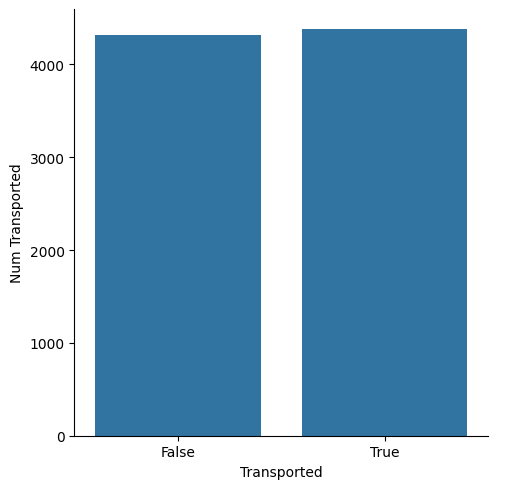

In [ ]:
ax = sns.catplot(x = "Transported", data = train_df, kind = "count")
ax.set_axis_labels("Transported", "Num Transported")

<Axes: title={'center': 'VIP'}>

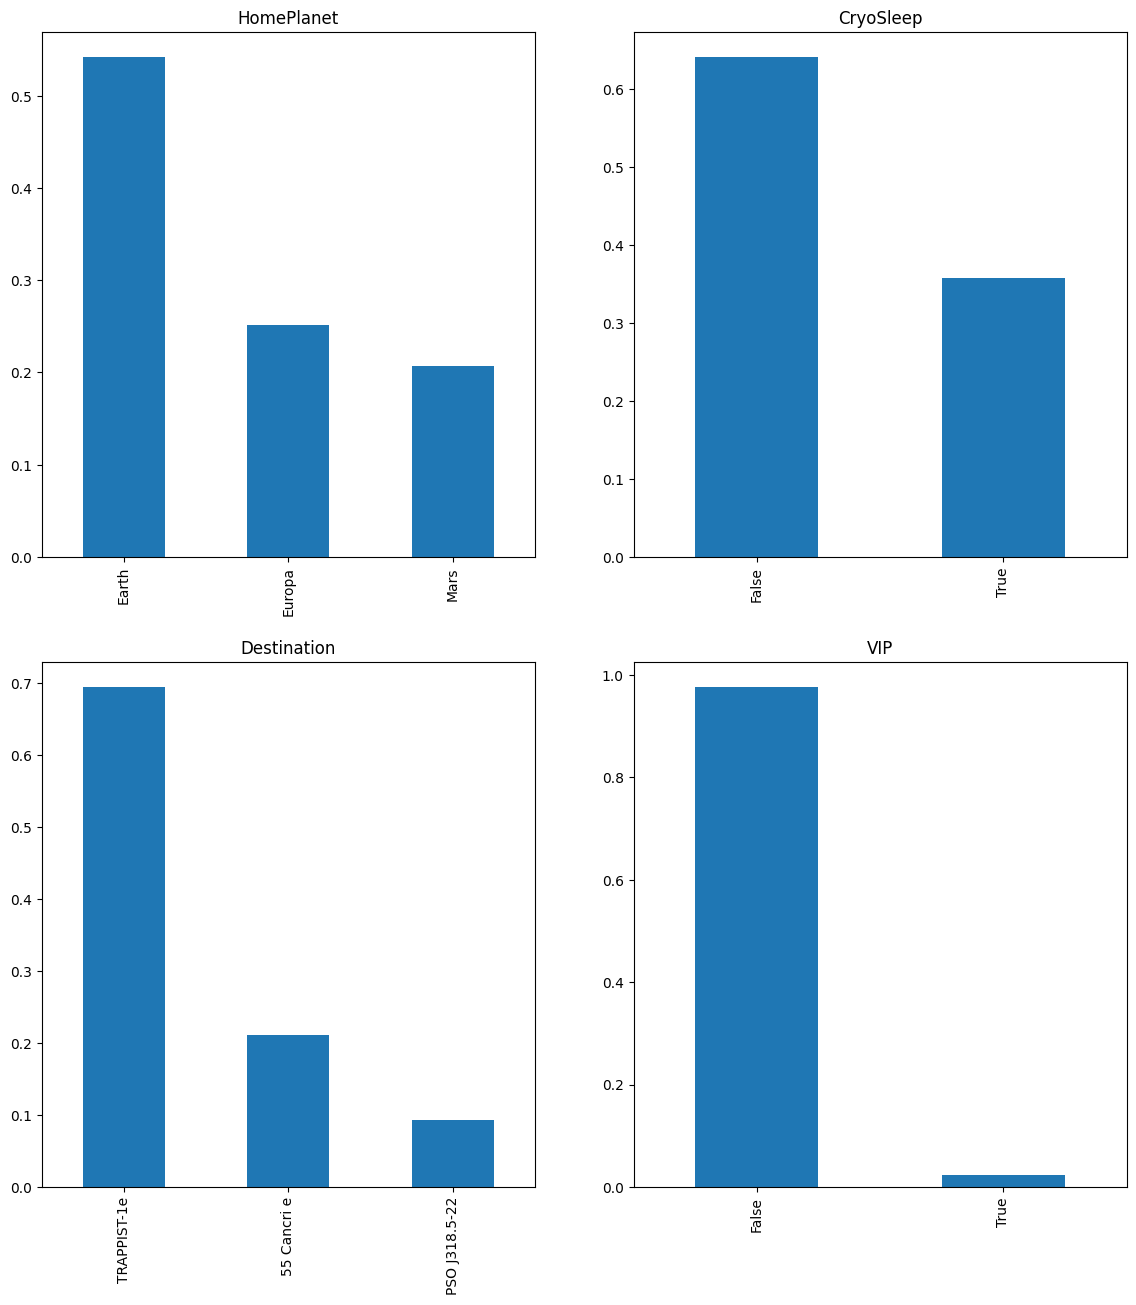

In [ ]:
plt.figure(figsize = (14, 15))
plt.subplot(221)
train_df['HomePlanet'].value_counts(normalize = True).plot.bar(title = 'HomePlanet')
plt.subplot(222)
train_df['CryoSleep'].value_counts(normalize = True).plot.bar(title = 'CryoSleep')
plt.subplot(223)
train_df['Destination'].value_counts(normalize = True).plot.bar(title = 'Destination')
plt.subplot(224)
train_df['VIP'].value_counts(normalize = True).plot.bar(title = 'VIP')

<Axes: title={'center': 'CabinSide'}>

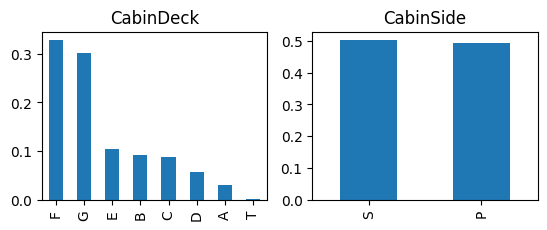

In [ ]:
train_df_copy[["CabinDeck", "CabinNo.", "CabinSide"]] = train_df_copy["Cabin"].str.split('/', expand = True)

# Visualize cabin feature
plt.figure()
plt.subplot(221)
train_df_copy['CabinDeck'].value_counts(normalize = True).plot.bar(title = 'CabinDeck')
plt.subplot(222)
train_df_copy['CabinSide'].value_counts(normalize = True).plot.bar(title = 'CabinSide')


<ipython-input-12-14a5068a7748>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Age']);
<ipython-input-12-14a5068a7748>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['RoomService']);
<ipython-input-12-14a5068a7748>:7: UserWarning: 

`distplot` is a deprecated function and 

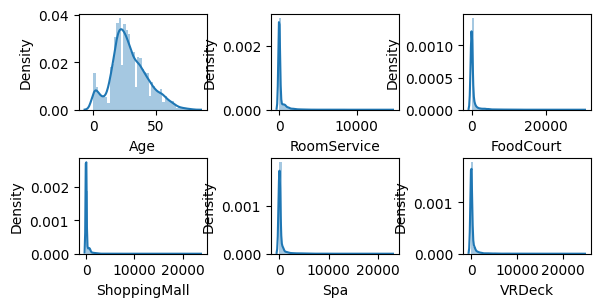

In [ ]:
plt.figure(1)
plt.subplot(331)
sns.distplot(train_df['Age']);
plt.subplot(332)
sns.distplot(train_df['RoomService']);
plt.subplot(333)
sns.distplot(train_df['FoodCourt']);
plt.subplot(334)
sns.distplot(train_df['ShoppingMall']);
plt.subplot(335)
sns.distplot(train_df['Spa']);
plt.subplot(336)
sns.distplot(train_df['VRDeck']);
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.5, hspace=0.5)
plt.show()

In [2]:
"# EDA: Pie chart:\n",
        "fig, ax = plt.subplots()\n",
        "cmap = plt.colormaps[\"tab20c\"]\n",
        "outer_colors = cmap([1,4])\n",
        "inner_colors = cmap([7,8,7,8])\n",
        "size = 0.45\n",
        "pctdist = 0.75\n",
        "\n",
        "# Counts of people with/without heart disease\n",
        "df_tot = train_df['Transported'].value_counts()\n",
        "\n",
        "# Outer pie chart (to show distribution of target variable)\n",
        "ax.pie(\n",
        "    np.array(df_tot),\n",
        "    autopct='%1.1f%%',\n",
        "    pctdistance = pctdist,\n",
        "    radius=1.0,\n",
        "    colors=outer_colors,\n",
        "    wedgeprops=dict(width=size, edgecolor='w'),\n",
        "    labels=['Not Transported','Transported']\n",
        ");\n",
        "\n",
        "# Counts of patients with heart disease, by sext\n",
        "df_trans = train_df.Destination[train_df['Transported']==True].value_counts()\n",
        "\n",
        "# Counts of patients without heart disease, by sex\n",
        "df_ntrans = train_df.Destination[train_df['Transported']==False].value_counts()\n",
        "\n",
        "# Concatenate arrays, for use in inner pie chart\n",
        "df_trans_by_dest = np.concatenate((np.array(df_trans),np.array(df_ntrans)))\n",
        "\n",
        "# Inner pie chart (to show sub-distribution of \"Sex\")\n",
        "ax.pie(\n",
        "    df_trans_by_dest,\n",
        "    autopct='%1.1f%%',\n",
        "    radius=1.0-size,\n",
        "    colors=inner_colors,\n",
        "    wedgeprops=dict(width=size, edgecolor='w'),\n",
        "    labels=['55 Cancri e','PSO J318.5-22','TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e']\n",
        ");\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 406
        },
        "id": "G6Mz71KxlJnZ",
        "outputId": "db8adc87-3cad-44ab-ab46-cb11d03674e0"
      },
      "execution_count": 101,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "text/plain": [
              "<Figure size 640x480 with 1 Axes>"
            ],
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAesAAAGFCAYAAADdDduLAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAADabElEQVR4nOyddXgUV9uH71lLsnF3IUBwp3jxUqWFOlXqblS+9q27vaVGvaWGtH3xFgrFirtDgBhxd1uf+f5YsrDEQyABzn1dXGxmzjnzzG6yvznnPCIpiqIgEAgEAoGg3aJqawMEAoFAIBA0jBBrgUAgEAjaOUKsBQKBQCBo5wixFggEAoGgnSPEWiAQCASCdo4Qa4FAIBAI2jlCrAUCgUAgaOcIsRYIBAKBoJ0jxFogEAgEgnaOEGuBQCAQCNo5QqwFAoFAIGjnCLEWCAQCgaCdI8RaIBAIBIJ2jhBrgUAgEAjaOUKsBQKBQCBo5wixFggEAoGgnSPEWiAQCASCdo4Qa4FAIBAI2jlCrAUCgUAgaOcIsRYIBAKBoJ0jxFogOIf4/PPP6dKlC59//nlbmyIQCM4imrY24Gxy++23s337dgAeeOABpk2bVme7tWvX8uCDDxIeHs6aNWta5doLFiwgKyuL8ePH061btxbZ3Bzeffddrr322mb3EzROSz9LgUAgaCkXlFifzK+//sodd9xBQEDAWbnewoUL2b59O+Hh4c36go+Li8NqtdY6fvDgQcxmMzExMfj5+dU67+/vf1r2CuqnpZ+lQCAQtJQLUqzVajXV1dV8/fXXvPTSS21tToO8/PLLdR4fO3YsWVlZPPDAA2IGLRAIBOc5F+Se9dVXXw3Ab7/9RnZ2dhtbIxAIBAJBw1yQYt2zZ08uueQSLBZLixx1zGYzP/30E9dffz39+/end+/eXHbZZbz//vsUFxc7td22bRtdunRx7Du/8MILdOnSxfHvTDgKjR07li5durBt2zaOHDnCE088wfDhw+nWrRs//fQTAEajkaVLl/L0009zxRVX0L9/f/r06cNll13GO++8Q35+fp1jL1iwgC5dunD77bejKApz585l0qRJ9OnTh0GDBvHwww+TmJhYZ9+ysjKmT5/OVVddRZ8+fejVqxcjR45kypQpfP7555SXl9d7H/Hx8TzyyCMMGTKE3r17c8011zB79mxkWa73fTh8+DBPP/00I0eOpGfPngwePJh7772X1atX19m+5rMaO3YsAP/73/+44YYb6N+/P126dGHVqlXN+ixlWWbJkiXcfffdDB48mJ49ezJy5Ej+7//+j+Tk5Hrtrqys5P3332fs2LH07NmT0aNH8/rrr1NSUlJvH4FAcH5zQS6DAzz55JOsXr2axYsXc9999xEbG9ukfuXl5dxzzz3s378fgA4dOuDm5kZiYiIzZ87kzz//5IcffqBLly4AeHp60r9/fxISEqisrKy1xxwaGtr6N3ecHTt28M0336BWq4mNjcXd3R1JkgD7nve0adNQq9X4+/sTExOD0WgkKyuLn3/+mWXLljFnzhyioqLqHf///u//WLx4MeHh4XTo0IGUlBRWr17N9u3bmT9/PtHR0Y62lZWV3HjjjaSmpqJSqYiKisLT05OCggL27dvH7t27GT9+PF5eXrWus2fPHr788ktUKhWxsbGUlpZy5MgR3njjDXbv3s1///tfx33VsGjRIl588UWsViuenp506dKF/Px8NmzYwIYNG7j11lt55ZVX6r231157jblz5xIcHExsbCwZGRmEhYU1+bM0GAw8/vjjrF+/HoCgoCBCQ0NJS0tj0aJFLF++nM8++4xRo0Y5XbekpITbb7+dxMREJEmiU6dOSJLEb7/9xvr16xkzZky9NgsEgvMY5QLitttuU+Li4pRff/1VURRFefbZZ5W4uDjl8ccfd2q3Zs0aJS4uThkzZkytMZ5++mklLi5OGTVqlHLw4EHH8fz8fOXWW29V4uLilAkTJigmk6nOa8+fP79V7mXMmDH1jldzrlu3bsoLL7ygVFVVOc4ZDAZFURQlMzNTWbp0qVJRUeHUt7KyUvnss8+UuLg45e6776419vz585W4uDilR48eytChQ5Xt27c7zpWUlCi33HKLEhcXp0ybNs2p348//qjExcUpEydOVLKyspzOlZeXK3/88YeSnZ1d53306NFDefTRR5Xy8nLHuZUrVyq9evVS4uLilN9//92pX0JCgtKjRw8lLi5Oeffdd50+i4ULFyrdu3dX4uLilHnz5jn127p1q+N96927t7JixQrHOZPJpNhsNkVRmvZZPv/880pcXJxy/fXXK4cPH3YcN5vNyqeffqrExcUpF110kVJUVOTUb9q0aUpcXJwyfvx4JTEx0XE8JSVFufTSSx339dlnn9V7bYFAcP5xQS6D1/DYY4+h1WpZsWIF8fHxjbbPyMhg6dKlALz11lv06NHDcS4wMJBPP/0UNzc3UlNTWbZs2Rmzu6l06tSJN998E71e7zjm6uoKQHh4OFdccQUeHh5Ofdzd3Xnsscfo378/GzdupKCgoM6xLRYLL730EhdddJHjmI+PDy+++CKAY0ZZQ0pKCgDXXXcdYWFhTuc8PT254YYb6l1l8PT05MMPP8TT09NxbPz48dx3330AfPvttyiK4jg3c+ZMLBYL/fr14/nnn0en0znOTZo0iTvuuAOAr776qs7r2Ww2Hn/8cSZMmOA4ptPpUKma9ueSlJTEwoUL8fPz4+uvv6Zr166Oc1qtlscff5xLLrmEsrIy/vjjD8e5U3+/OnXq5DjXoUMH3nvvPSwWS5NsEAgE5xcXtFhHRkZy3XXXoSgKH3/8caPtN27ciCzLdOrUiREjRtQ67+/v73Be27BhQ6vb21yuueYa1Gp1vecVRWHjxo28/fbbPPDAA9x6661MmTKFKVOmkJaWBtj3fevCy8uLK664otbx7t27o9PpKC8vd9pjrRHof//9l+rq6mbdx/XXX+94yDiZW2+9FbCL3LFjxxzHax4UakT5VO666646+53M5MmTm2XjyaxYsQJFURg3bly9IXTjx48HcIqh37hxI4qiEBcXx+DBg2v16du3L717926xXQKB4Nzlgt2zruHhhx9m0aJFrF+/np07dzJw4MB629Z8sZ884zmVuLg44MRMsi3p2LFjvecqKyt55JFH2Lp1a4NjlJaW1nm8ob1sf39/cnJyqK6uxtfXF7DPqH/88Uc2b97MxRdfzIgRIxgwYAADBw6kW7dutfacm3Iffn5++Pn5UVxczLFjx4iNjaWiooLCwkLgxGdxKkFBQfj4+FBaWkpKSgodOnRwOu/r61tn7HpTOXr0KACbN29mypQpdbapqKgAIDc313Gs5nemoc+tU6dODn8JgUBw4XDBi3VwcDC33HILM2fO5JNPPmHWrFn1tq2qqgJoMJFKzbmatm2Jm5tbvefef/99tm7dSmRkJE899RT9+vUjICDAsWT83HPPsXjx4joTsgBOS+unUrNcfPLSdGBgIH/88QefffYZa9asYfny5SxfvhywL8k/9thj9c5mG0rwEhAQQHFxseP9Pvl9b6hfYGAgpaWldX5ODd1bU6gR4qysLLKyshpsazQaHa9rVhwaslskuxEILkwueLEGuP/++/njjz/YsWNHg8vX7u7uAI6ZW13UnKtp2x6xWq389ddfgH3ftnPnzrXa1DejPh2io6P56KOPsFgsHDp0iJ07d7Jq1Sr27NnD888/j6urK5dffnmtfkVFRfWOeer7ffL7XlRU5JjZn0rNXvyZ+JxqxP7ZZ5/l3nvvbXa/hu63oXMCgeD85YLes67B19fXsY/5ySef1NuuZrm0vjhigISEBIAmh4K1BcXFxVRXV+Pj41OnUFutVg4ePHjGrq/Vaunbty/33nsvv/32m2Op+LfffquzfX0xycXFxY649prPxtPT07G6UfNZnEp+fr7jYeRMfE4172lDvyd1UWNLQzHYSUlJLTdMIBCcswixPs7UqVPx9fXl4MGD/PPPP3W2GTFiBCqViuTkZDZu3FjrfHFxMUuWLAHg4osvdjpX4yB18rJnW1GzPF5ZWYnBYKh1ftGiRWd1BtevXz+AehOxzJ8/H5PJVOv4nDlzAIiIiHDadx45ciQAv/zyS53j1SSGiYqKqrVf3RQa+ywvu+wywO5o1pwMeSNGjECSJBISEtixY0et8/v37xf71QLBBYoQ6+N4eHhw//33A7B48eI620RGRnLllVcC9pzdJ3tKFxYW8uSTT2IwGIiJianlKV3jkLVz506nvdy2oCZJiNVq5Y033nASwuXLl/PWW2/h4uLSqtecPn06v//+e60sXHl5ecyePRvAKRTuZMrLy3nuueeorKx0HFuzZg3fffcdAPfdd5+Tg9rdd9+NVqtlz549vP/++5jNZse5JUuWOET8oYceatG9NPZZdu3alWuvvRaDwcDUqVPrrJqWnJzs2L+vITIy0iH0L730ktMMOzU1leeffx6tVtsimwUCwbmN2LM+iVtvvZWffvqJvLy8etu88sorpKWlsX//fiZNmkTHjh1xcXEhMTERi8VCQEAAn332mVNsL8AVV1zB7NmzWbp0KXv37iU0NBSVSsXkyZPbpBDHM888w4MPPsiCBQtYuXIlUVFRFBYWkpeXx/Dhw/H393esErQGSUlJfPPNN7z66quEh4fj7+9PZWUlqamp2Gw2QkJCeOqpp+rs++ijj/Lll18yYsQIOnbsSElJicNx6/LLL+emm25yat+5c2feeustXnzxRWbOnMm8efOIjo4mPz/f8dnecsstLX7fm/JZvvbaa1RVVbFixQpuv/12AgICCAsLw2q1kp2d7ViGf/fdd53GfuWVVzh69CgpKSlceeWVjiX1pKQkwsLCuPnmm/n1119bZLdAIDh3ETPrk3BxceHhhx9usI2XlxezZ8/mhRdeoGfPnuTk5JCUlER4eDh33303S5YscaQaPZkBAwYwffp0+vXrR2lpKbt27WL79u2NegufKUaOHMnMmTMZPHgwNpuNlJQUvL29efrppx0pSluThx9+mAcffJC+fftisViIj48nJyeHzp078+CDDzrSltZFv379+O233xg+fDiZmZkUFBQQFxfHyy+/zPTp0+sM+5o0aRLz5s3jqquuwtXVlSNHjmAymRgxYgRffPEFr776aovvpSmfpYuLC5999hlfffUVl1xyCSqVisOHD5OSkoKPjw+TJ0/miy++cKzU1ODn58cff/zBXXfdRWhoKMeOHaOiooKbbrqJefPm4e3t3WK7BQLBuYuktPWarEBQDzVlQH/55Zc6k4QIBALBhYKYWQsEAoFA0M4RYi0QCAQCQTtHiLVAIBAIBO0cIdYCgUAgELRzhIOZQCAQCATtHDGzFggEAoGgnSOSoggE7RCbrKAAaokGy4c2B0VRkBVQUFAhoVK1zrgCgeDMI8RaIDiL1AgmgOoUITbbZMoMVoqqLZQYLJQaLJQYrJQZrJisMhZZxior9n82xfFaVhQk7GPVjCZJICGhVUt4uKjxdNHg6fjf/trLVYO3q/1nN62q1kOBTVZq2SgQCNoGsWctEJwhbLKCJIFKkpAVhaIqC0XVFoqr7UJcarRSUm2h1GCl1GjBYJHbzFaVBO46tZOQh3i6EOnjSqSPK54u9ud6uWbGL2blAsFZRYi1QNAKyIqCopwQseJqC8eKqkktMZJaYiCzzIjFdu7+qXm6qAn3diXC25VIbxeifN0IcNciSRKKomBTQCMEXCA4YwixFghagFVWHOJksNhILTZwrNhAaomB9BIjlWZbG1t45tGpJcK8XIjwdiXCx5UoH1dCvVzQqlViCV0gaGWEWAsETcAmK6hVErKskF5q5FixgbQSuzgXVlna2rx2g0qCSB9XeoZ40CvUkwhvV8c+vVg6FwhajhBrgaAeagTaYpM5lFfJ3qwKDuVVtune8rmGl4uGHiHu9AzxoFuQBzqNyvG+CgSCpiPEWiA4iRohMVhs7M+pYF92BYfzq87p/eb2gkYl0dHfjR4hHvQO9STAXYd8/OtHJZbLBYIGEWItuOCpEegKk5U9WeXsy64gsbDaEWIlODMEumvpcXy5vJO/3rHNIOK/BYLaCLEWXJDUCHRRlZndxwU6rcSI+GNoG1w0KvqEejK8gw8d/fViqVwgOAUh1oILBllRUEn2Je7NqaVsSy8ju9zU1mYJTiHQXcuQaB+Gxfjg6aIRwi0QIMRacAFQ82WfXmJgXUoJuzPLsYg17naPSoJuQR4Mj/GhZ6gHKIglcsEFixBrwXmJotgzbdlkhR0ZZaxPKSWzzNjWZglaiI+bhhExvlwc64u7Tu1YJREILhSEWAvOK2q+xMuNVtYkFbMptUSEWp1HaFQS/cI9GdPRjyhfN7FELrhgEGItOC+o+dLOKTexMqGIXZlliGir85toX1fGdPRjQISXSLoiOO8RYi04p6kR6cP5laxKKOJoQXVbmyQ4y4R6ujCxRyC9Qz3FTFtw3iLEWnBOUhOPm1RYzYIDeaSXiv3oC51oX1eu6RFEXKC7EG3BeYcQa8E5Rc2va0GVhQUH8jiYW9nGFgnaG3GBeib1CCLK100kWRGcNwixFpwzyIqCwSLz56F8NqeVigxjggbpFerBpB5BBHu6CO9xwTmPEGtBu8cmKyiKwqrEYlYlFmG0Cu9uQdOQgAERXlzdIwhfN439mBBtwTmIEGtBu6WmJvL29DL+jC+g1Ghta5ME5yhqCYZG+3Bl90A8dGoh2IJzDiHWgnZHzZJlQkEV8w/kkVUmUoIKWgetWmJsJz+u6BoIiHAvwbmDEGtBu0JRFPIrzcw/kEd8XlVbmyM4Twnx1HH7gDCifFzFLFtwTiDEWtAusB33FvszvoA1SUXCeUxwxpGAMZ38uLp7IJIkiVm2oF0jxFrQ5siKQl6FmZ92ZJElqmAJzjKB7lpuHxBGrL8eRVHETFvQLhFiLWgzZFlBkmBVYjFLDxdgFdNpQRshARfH+jKpZxBqMcsWtEOEWAvaBFlWKDNa+WlnFslFhrY2RyAAwF+v5db+ocQFuotZtqBdIcRacFap8fTenFrK/AN5mM7BmOnsnas5NO/zRtv1v+d1/Dv3qfNcdVEOqesWUpS4F3NFCWoXN7zCYgkfNIHgXsNa1V7ZZmXb509TmZsGQGj/MfS88Yk621YVZpO8YhbFyQewmY3o/UOJGHo5kUMur3f8qoIstn76JO6BEQx69L+o1OpWtb8tGB7jw7W9gtGoxCxb0D7QtLUBggsHm6xgtNqYtSuHA+dDmlBJhc7dq97TKk3df14FR3ayf/aHyBb7/rzGRY+lupKixL0UJe4lbMA4ul//aKvN6o6t+Z9DqBvCUJzHji//D0t1BUgSKo2Oyrx0jiz6BkNxHnFXTK2z3+EFXyLbbHS77pHzQqgBNqWWciivklv6hdI92EPMsgVtjhBrwRmn5ovuUF4lc3bnUGm2tbVJrYKrtz8XP/9ds/oYivM4MOe/yBYTPtHd6H79o7gHhmM1GUhbv4iU1b+TvWs17kHhxIy69rRtrMhN5di/83HzC8ZmNmGuLK23bfLKuViqK/Dr1IdeU55Gq/ck78AmDsydTtqGJUQMvgy9f4hTn6wdqyg5doio4VfhHdHptO1tT5QarHy5OYOh0T7c1DcESRHFQQRth6qtDRCc39hkBbNN4ddd2Xy7NfO8EeqWkrxyDjazEZ2nL32nvoh7YDgAGhc3Ol4yhfBBEwA4tmYelurTW31QZBvx82ag2Kx0m/wQKo22wfZFSfsA6DLxHnTuXkiSREjvEQR1HwSKTPHx8zWYK8tI/PtnXL0D6Djh1tOytT2zJa2Uj9enUmW2OUIMBYKzjRBrwRlDlhVyK0y8vTqFbellbW1Om2MzG8k7uAWAiMGXoXXzqNWmw+jrALCaqsmP33Za10vbsJjyzCRC+4/Bv3PfRttbqsoBcPNznj3rA0IBMB8/X8PRv2Ziqa6gyzX3o3FxOy1b2ztpJUbeW3OMzDIjsnDzEbQBQqwFZwRFUTiYV8lH61Iprra0tTntgpLUw8gWMwABXfrX2cbNLxj3oAgAihL3tvhaVQVZJK/8Da27N3FX3tWkPlq9JwCG4lyn49WFOQBO+/NFiXvJ3buOoB5D7DPvC4Byk5WP16exNU08eArOPmLPWtCq1OxPr0osZsmhfM7nOYi5qpytn0+juiAbRZZx8fLFO6or4ReNx69jr1rtT3by8giJqndcj+AoqvIzqcpLb5FdiqIQP38GstVM9+seadAJ7mT8O/chZ886jv71A72nPIPGzYP8g1soOLwdJBV+nXoDYLOYOLzwKzQuerpcc3+LbDxXscoKc/bkkFlm5PrewaAg6mULzgpCrAWthqwooMCcPTlsSStta3POOLLFREVWCho3D2SbEUNxHobiPHL3riNswDi6Xfuwk3e0qbwYAI2bB2qtS73junj5O7VvLhmbl1Kaehj/uH6E9hvV5H6x42+m4PBOihP38e+bd6DS6Bwe61HDJ6L3ty+Hp6z+A0NxHl2vuR9XL78W2Xiusz6lhJxyE/cNjsBFoxKOZ4IzjhBrQatgkxUsNplvt2WSUFDd1uacUVy8/IgddxNBPYfiHhiOSqNFkW2UZSSSvHIuxUn7yN61GrXOha4nzTxtZnvyl4aEGkCts5+3mpqfLMZQnEfSilmotC50m/Rgs/rq/UMZ9MgHJC3/leKUg9jMRtyDo4gYNIHIYVcCdu/ytPWL8I6MI2LwZQDk7F1P2vpFVOVnoHZxI7DrQDpddjsunr7Ntv9cIrGwmvfWHuPBIRGEeLmgEqFdgjOIEGvBaWOTFUoNFr7cnEFepbmtzTnj+Mf1wz+un9MxSaXGJ7or/e9+lX2z3qMgfjsZW5cTOfwq3APCzppt8Qu+xGY20vmKqbj5BTe7v3tgOH1uf77Oc4qicHjBVwB0u+5hJJWKjC3LOLL4W7R6T4J7DcdQnEf2rjWUpB5myGMfoXHVn9b9tHeKqy38d10qt/UPo39E07YbBIKWIBzMBKeFrCiklRj44N/UC0KoG0NSqYi74rhDlyJTeHiH45xaZ/eYtlkaLlZiM9ckS2meh3Xm9pUUJ+3DMzyW6BETm9W3SeNvW05Z+lGiR07CMyQGi6GShGU/o9Joueih9+h505Nc9NC7hPYbhaEoh9R1C1rdhvaI2aYwc0eW3UdDUYS3uOCMIMRacFrsyCjjs43pVF3g8dMnow8IRXvcqctQnOc47nJ8f9dqqGxQsE3lRU7tm4LFWEXish9BUtHlqnuwWcxYTQanfzUosuw4pshNS/dqKi8mafmvuPkFEzvuRsDuES5bTAR0HeiIFweIvngSAPmHTi/07Fzjn4Qivt6SiU1WkEU8tqCVEcvggmZTk997yaF8/kkoamtzzhk8QqIdrytz0/GO7Fxnu8rjXuDuwfV7jJ+KtboSq9HuK7DzmxcbbJu7dx25e9cBMOTx6XiGxTY6/pE/v8dqrKb3Lc869txrHkROzWqmP77sf/KDyoXCobxKZmxK5+FhUWhAOJ4JWg0xsxY0C1lRkBX4YXumEOp6qC7KcSQYcfUNchz3jemGSqsDoChhd519DSX5VOVnAjQpkcnZoODwDvIPbCak76hae/UANov5lJ8v7JrkyUUGPt2Qhtkmi4xnglZDzKwFTaZGqL/ZksHh/Kq2NqdNaKygg6IoJC772f6DpCKw20WOc2qdK8E9h5KzZ53D+Uzr6u7Uv2afV+3iRlD3wU22y80vmEveW9Rgmw3v3YextKDBqlunYjMbHQ5kXa662/mavnYHtvKMRKfjZRkJDpsuVNJLjXy8Po3HL47CTaMWM2zBaSNm1oImIYTajrEkn20zniVz2wqqi3KpqTCryDKl6UfZ8+Mb5B/aCkDE4AlOe7kAHS+5BbXOFXNFCXt/epuqwmzALorJq34nc9sKAGLH3oBWXzsd6c5vXmTl85PY8N59Z/I2HST9MwdjaQGdL78TnYe30zn/zn1QaXWUZSSQsWUZimzDWFpA0t+/ABB4gWQ2q4/schMfr0sTOcUFrYKYWQsaRQi1M+WZiZRn2meTKo0WtYsbNpMB2XoirWrYgHF0mVhbUN38gul1yzPsn/0hpanxbP7vw2hc9djMRoezV9iAcUSPnHx2bqYByrOSydj8F74dehA2cFyt81q9J50m3EbC0pkcWfwtCUt/Qrbal8Td/IKJGdX299DW5FWa+WhdKk+OjMbLRSNm2IIWI8Ra0CBCqJ3RefrQ5er7KEs/SkX2McxV5VgNlag0WtwDg/GO7kL4wPH4xHSrd4zArgMZ+uQnpK5bQFHiPswVJWjcPPAM60DEoEsJ7jXsLN5R3SiyjfgFXyKp1HS79uF6l/6jL74arbsnaRsWU12QhVbvSUDXgXS+7PY6C5VciBRVW/hkfRrTRkXjoROCLWgZkqKIoEBB3SiKgk0ItUDQKgS4a3l6VAx6rdjDFjQfsWctqBNFUVCA77dlCqEWCFqBwioLH69Pw2ARe9iC5iPEWlAnkiTx665sDuZWtrUpAsF5Q36lmU82pGG0irAuQfMQYi2okz/25rIjo7ytzRAIzjtyK8yOOGyR6UzQVIRYC2rx56F81h8raWszBILzluxyE99utSe/EW5DgqYgxFrgxOrEIlaIzGQCwRknsbCa3/flNphkRyCoQYi1ALCHaO3MKGPhwfy2NkUguGDYlFrKv8nFYnYtaBQh1gJsskJehZnZe3La2hSB4IJjwYE8EgqrhcOZoEGEWF/gyIqC2Sbz9ZYMLDbxZSEQnG1kxR4iWWKwCMEW1IsQ6wscCZi5PYuiakujbQUCwZnBYJH5cnMGFllGFkvigjoQYn2B81d8gUh6IhC0A/IrzXy/LautzRC0U4RYX6DIssL+nApRk1ogaEccya9i/v68tjZD0A4RYn0BYpMViqot/LIzG7HgJhC0L9allLDxWIlYDhc4IcT6AkNRFGyywtdbMzBa5bY2RyAQ1MH/9uWSUmQQDmcCB0KsLzAkSeLnXdnkVZjb2hSBQFAPNgW+25ZJmdEqBFsACLG+oFAUhRVHC9mXXdHWpggEgkaoMtv4YXsmIsGZAIRYXzDYZIWjBVX8FV/Q1qYIBIImklZiZGVCUZvvX48dO5YuXbqQmZnZpnZcyGja2gDBmUeWFSpMVn7cIRzKBO2X5JVzSVn9e4Ntuk56kMghl9U6vuG9+zCWNvwgOvbNP1BrdS2yTbZayN69lsLDO6nITsFcVQ6ShIunD14RnQnuNYzA7oNRqdUtGr8h/j5SSO9QT4I8dKhVYpp9oSLE+gJApZKYvTuHKrOtrU0RCBpF5+GN3j+sznMunr4N9vUIjkLj6l7nuZYWzChNO8KBOf/FWFYIgFbviXtgOACG0gLy9m8kb/9G9IHhDLzvTVy8/Fp0nfqwygo/78ziudEdWnXc5hAZGYlOp0Or1baZDRc6QqzPc2yywq7MMpH4RHDO4B/Xn543PtGivl2uvg+/jr1azZbipP3s+elNZKsFnw496HzZ7XhHdXEIvyLLlGUkkLpuIQXx2zBXlra6WANklpn4+2ghV3QNaJMqXT///PNZv6bAGSHW5zGyomC0ysw/ICppCQTNxVJdyYHfPkK2WgjqOZReU56ptcwtqVT4RHel7x0vkHdgMyqd6xmzZ8XRQvqGeRLi6SKWwy9AhFifx6gkiT/25Yrl73MUjQSh3q6EebkQ4qEjwEOHj6sGT1cNLmoVWvVxD9GTv7cVkAGLDUw2GaNVxmC2UW6ykVdhIrPMSEapkRKDtW1u6hwiY8tSzJVlaPWedL/ukUb3o4N7DXP62WKoJP/gVgqP7KQyLx1jWRGSJOHmF0Jg90FEj7wGbR1L9jV796H9x9D9ukdIW7+InN3/YijJY52rnkvGjOLpp6cRGhpapx2yLLN06VIWLVpEfHw8FRUV+Pn5ERsby4QJE7j++uvR6ex79wsWLOCFF15g0KBB/Pjjj/z8888sXryY9PR0NBoNO3fuBOwOZllZWaxevZqIiIhmvY9ZWVnMnDmTjRs3kpubi1qtpmPHjkyaNImbbroJjUbIUFMQ79J5ik1WOJJfxa7M8rY2RdAIEhAXqKdfuBcd/d3wc9OgVUtIksppyVNRFLCZwFIJpmqwGkCR7SNINSNJoFLjotLgodaBTguuWtDqkVRejnEURabaolBYZSGrzEhiYRWHcisxWNveBbEyJ5UDcz/CVFGKxsUNj9BoQvpcjEdwVKN9M7etIG3DYmSLCZ2nLz4x3QntNwqNi1uz7cjduwGA0H6j0Lp5NLt/4ZGdxM+fgaTW4OLhg0dwJFZjNVUFmVSuSSXvwCYGPfQeWr1nnf0V2caema9TnHwAfUAYev9Qqgqz+fPPJezcuYNFixbh4+Pj1KeqqorHHnuMTZs2ARAYGEjXrl0pLCxk27ZtbNmyhZEjR9YSXEVReOSRR/j333+JiIigY8eOFBWdfiritWvXMm3aNKqrq3F1dSUqKoqqqioOHDjA/v37WbNmDV999ZXj4UFQP0Ksz0NqspT9tlfUp26PeLqoGRjhRfdgD8K9XfDUqZBUarsYm8qhIhPM1SjWahSLASzVYDGA1Qin4c+vaNzA1RtcvJBcvXF38cbd04cYP1+Gd7A7btlsNgqrrRzKq2RtUnGbzMArco5RkXPM8XPB4e0cWzuPqGFXEXflVCRV/TPcvP0bnX7O3bue5JVz6HXzNPw7922yDeaqcqoK7GFKvh16Nu8GjuMREkPfO/6DX+c+qLUuTmMn/TObrG0rSFz+K92vfbjO/nkHNuPmG8SQJz/BMyQGsDu07Zn5Ojk5mfwwcyZPT5vm1Oell15i06ZNBAYG8v777zN8+HDHueLiYhYuXIher691rd27d+Pl5cXs2bMZOHAgAEajsUX3XUNycjJPPfUUZrOZZ599ljvuuMMhykeOHOGpp55i48aNfPHFFzz11FOnda0LASHW5yGSJLHoUJ5Y6mxH9Arx4OJYX2J8XXHTqpAkFYpsA0MRFOQhV+VDdSHYzmBmOasBKg1Qmesk+YpKAy5e4OKNSu9HkFckwZ38GdPRD6PFRnKxgU3HSjiQe2adFF28/Oh4yRT84/rh5heCxsWNqsIsMrcsJ3PbctI3/YmkVhN3xdRafX1je+LXqTfeEZ1x9QlEtlkoTT1M8sq5VGSnsPfnd7jooXfxCu/YJFtM5cWO125+wS26H8/QGDxDY2od17l70X3yQxQe2Unu3vV0m/RAnQ8gis1KjxufcAg1gJtPIJ0m3Ma+We+xbt06J7GOj49n2bJlqFQqvvnmG3r06OE0np+fH/fcc0+dttpsNl577TWHUAO4up7e/vvnn3+OwWDgkUce4d5773U617VrV6ZPn87kyZOZNWsWDz/8MC4uLvWMJAAh1ucdNlkho9TIhpSStjblgqdzgBsT4gLoFOCGVq1GsZmhMgelMB+lKh8MxceXsdsY2Wq3xVCMUnoMsneh6DzAKwJXrwh6BAfTM8QTWbaRW2FhV1Y5axKLsLSy6RGDL611zDMkhm6TH8TNL4jEv38hfeOfRA65vJaAnuo9rsaFwG4X4depNzu+foGKrBQS//6ZAfe+0SRbbCbDibFcWi5ass1GweHtFCftw1Ccj81shOMJTmxGAzazkerCHNyDau8De4TG4BPVpdZx76g4AI6lpqEoimOr5J9//gFg2LBhtYS6MTw8PLjkkkua1achzGYza9euBeCmm26qs023bt0IDw8nMzOTQ4cO0b9//1a7/vmIEOvzkFm7RfKTtsLfTcs1PYPoGeKOVq2yi3FZOnJxElTmcTrL2GcVcyUUHkEpPAIqDYpHCJJXBKFeEUzsHsRV3QLIKDWxOD6fo/nVZ9yc6IuvIX3TX5jKiyk4vIOo4Vc1qZ9a60KnCbex58c3KE4+iKW6Eq2+8f1n9Ul73DZTy5aDjeXF7PnxDSpzUhtsZ6muO/2vPqDuWHOdhw8AZqOB1BIjUT6uqFUSycnJAPTr16/ZtsbExKBuxYQuaWlpGI1GVCoVTz75ZL3tSkrsk4rc3NxWu/b5ihDr8whFUVh+tJBcUaTjrDOygy9jO/vhr9fYl7irClCKk6A0DWRLW5t3eshWKM9EKbfv4Squvkg+MUQGxPHosCiqzTbWpZSw4mghtjP0LCKp1HhHxpF/aCvVhdnN6usT3dX+QpExFOei1XdqtM/JsdKGkjw8w5qfkOTQ/z6lMicVz7BYOo6/Gc+ITuj0nqg09sQiO77+D6Wp8ci2urerTt7nPhlJdSJL9Nw9Obww1m5bZWUlYJ8lN5e69rFPh/Jyu2OrLMvs3r270fanuz9+ISDE+jzBJisUVplZmXD6HpyCpqFTS9zUJ4QBEZ5o1GoUSzXkHUEuSQHzeVwsxViCklsCefvBNxZ9YHeu6BbIpV38OJBTxf/25VJmav1wQUlt/7pS5Oatv9f0a05fnbsX7oERVBVkUpJykKAeQ5p1TVN5McWJ+1BpdfS/5zV07l612tQ3o24O2eUmtmeUMTDC2yHSNaLdlri720PS3Nzc2Lt3b9sac54gCnmcJ6gkmLU7B6sop3fGcdWouHdwOP+9qjODorxRl2cgJ69EiZ+Pkrfv/Bbqk1FsUJyIcnQxcsoqVJV59A334q3LOvH4iCj89a2bmrIyLx0AF2//FvVrbt/gPhcDkLNnHRZj85zrDCX2RETuQRH1CHVls1cI6qOmOE/nzp0B2LNnT6uMezpER0ej1WoxGAxkZGS0tTnnBUKszwPsKUXLOVZsaLyxoMWoJbjrojA+uLITfUI9kcrSUY4uQUnfAJUX+J5bRQ7KsdXIRxZDcSKd/V15bUJHpo2Mwsft9BfwCo7spOq46DYnBAsgdd0CANyDInFthlhHDbsCrbs3luoK4ufNQLY1vFqQd2AzVccFuGYJ21xRZg/JO4W0jUvs0QCtQInByr/JxYwfb3cQ27x5M4cPH26VsVuKm5sbo0ePBuDHH39sU1vOF4RYnwdIEiw7UtjWZpzXXNbFn/ev6syACG8km+m4SG+0x0ULTmAqR8najhI/DyV3Lx18dLx5aUfuvigcbQPfNpV56cQv+JKK7GNOxxVZJmfveg7OnQ5AQNeBeEd2dmqTun4R6Zv+slfCOglzVTnxC74k/8BmADpeMqVZt6LVe9Lr5mlIag35B7ew6/tXKE074iS+iqJQlp7Avlnvs3/2B8hm+96re3AkWr0npvIiklfOcQizIstkbFlG6r/zUGlaLxHIPwlFdIzrwlVXXYUsy9x///1s2bLFqU1xcTEzZ86kuLi4nlFalyeffBK9Xs/s2bP54IMPKCsrczpvMBhYuXIlL7300lmx51xH7Fmf49hkhZ2ZZeRXCqeyM0G/cE9u7BOMp4uWrTn7qDQbGB15Eap6nIIEx7GZIf8gSlEiUkgf+oXH0Sc0jpVJJXXWVFdsVrK2/0PW9n/Q6j1x9QlEUqmpLsrBarDvwfrEdKfnTU/W6msqKyR9018c/esH3HyD0Lp7IVvMVOVn2kVSUtH5sttqpQNtCv6d+zDg3tc58Nt0So8dYsdXzzvsQ1EwlhU69p7dgyIdntoqtYZOl93O4QVfcmzN/8jc9g9uvoEYSgqwVJURNmAchuJcSo4darZNdVFltrHiaCGvvfYaRUVFbNmyhalTpxIYGEhISAhFRUXk5uYiyzITJkzAz6/1i42cSqdOnZgxYwZPPvkkP/zwAz///DMdOnRAr9dTVlZGRkYGNpuN8PDwM27L+YAQ63McSbLXuxW0Lh46NY8MjyLC24WUskye2/AT23L3E+Dmw8iIAaijL0ZJXtHWZrZ/bCaUrO1QlIAq7CIu6xLC0ChvvtySQVaZydHM1TeIjhNupSz9KFX5GVQX5SBbLWjdPPDv0p/QviMJ6XNxnclDavaWyzISMZYW2EOlJBVufsH4xvYgcsjleIbFtvgWfDv0YMSzX5O9aw0Fh3dQkX2MqvwMez1rLz/8OvclpPdwArtd5GRfxKAJaN08SF2/kMqcNKoKsnAPjKDThFsIHzSBXd+27oxybXIxYzp14vvvv+fPP/9k0aJFHDlyhCNHjuDv78+QIUO49NJLCQoKatXrNsTw4cP5+++/+fXXX1m/fj1paWmYTCY8PT3p378/I0eObNX47vMZSalrQ0VwTmCTFballzFnj0gr2poMj/Hmul5BqFTw5b7f+TV+CbaTkpc82vcW7ux+NVLiUjCWNTCSoBbeUUjhg0GjY1t6ObN355wrkefnBMNifLilX90FPgTnNkKsz2FsssLrK5Mprj7H43jbCa4aFY8OjyLa15Ujxcd4efPnpJRl1mrnqXNn2eSv0FuNKAl/tYGl5zgqLVJoP6SALhjMFr7dlk1i4ZlPrHIhoJLg5fEd8XfXomqDuteCM4dwMDtHsckKm1NLhVC3EhdFePH25R2J8NHy+d453LH8hTqFGqDCXMUPBxeguHqD+9lbUjxvkC0oWduRE5fjKlfz+IhIbu4b0tZWnRfICiw8mC+E+jyk2TPr22+/ne3btzsdU6vVeHl50bVrV66++momTZqESlX7OeDw4cPMmjWLnTt3OtLL+fn5ERwcTL9+/bjooosYO3ZsvddOT09nzpw5bNq0iZycHEwmE/7+/vTp04eJEycyfvz45tyKg5qaruHh4axZs8bp3MaNG1m7di0HDx4kJyeHkpIS1Go14eHhDBs2jLvuuouwsLrTAu7fv5/du3dz4MABDhw4QFpaGgDvvvsu1157bYM2Wa1W/vjjD/766y8SExOprq7Gw8ODbt26MWnSJK6aeDWv/ZNMqbHpjk7ZO1dzaN7nDbaJGXUtnS+/o8ljQo1H7FEK4rdTmnqYqoJMrMZqNG7ueIZ1IKz/WEL6jnQq91iDuaqc/EPbKE7aR3lWMqayQpAkXH0C8e/cj+gRE1tcSKEpqICHh0fSJdC9wdn0qbiqdfw1+Ut8JAmOLD5j9p33SGqkiCFIfrHkVZj44N9jmNpBmc5znWdGxRB5PA2p4PygxWIdGhrqKH5uMplIS0tzZM4ZOXIkX375JVrtiaQIv/zyC++99x42mw2tVktoaCg+Pj6UlJSQmZmJoiio1Wri4+PrvO7XX3/NjBkzsFgsaDQaoqOjcXV1JSsri9LSUgAuuugiPvvss2Z7OjYk1g8//DCrV69Go9EQGBiIv78/paWl5OTkYLPZ0Ov1fPHFFwwbVtvT9JprruHIkSO1jjcm1kajkXvuucdR+D0oKIjAwEDy8vIoLLQ7k/UdNoqAq55wSj3YGDVirXHR4xESXWebkH6jiBxyWZPHBChK2sfu7191/OzmF4zGzQNjSb7DUzag60D63PZ/jlSLNez4+gVKU+0xoWoXN/R+IdisZgxFuSiyDbXOld63PkdAl9ZP8u/tqub/xnTA00XD1/v/YObBBU57041xfecJvDDoXpTUdVAuEj+cFgFdkMIGYrYqfLwhjcyTnM8EzaejvxtPjYxpazMErUiLvcGvu+46HnvsMcfPVquV77//no8//pj169fzyy+/OMqx7d+/n3feeQdFUZg6dSoPPfSQU9H0srIy1q5dy/z58+u81vTp0/nmm2+QJIn77ruPe++919HfZrOxdu1a3njjDXbs2MEtt9zCvHnzWpQfty6uvPJKbrnlFgYOHOhUMi4jI4P//Oc/bN++nWnTprF27Vrc3JwL3EdGRtKxY0d69epFr169eOONNzh69Gij1/zhhx/YuXMnLi4ufPLJJ06rDUuXLuW5555j7+Z1dA/rTfjAcc2+J8+wDgx84O1m96sXxS7QUcMnEtJnhCN8BSB791oOL/iSwiM7SV45h86X3+nUVZJUhPQdScSgS/GJ6erwpjWWFXJo3ucUJ+7jwJz/MuyZL3Hx9KG1iPVz45HhESjYeGrdB6zP3NnsMRYlrWZqj2sIDh+EJMT69Cg8imIoQRczmudGx/Db3lw2pwnnvZaSXGTgYG4l3YLcxez6PKHV9qw1Gg0PPvigI2vNkiVLHOfmz5+PoigMHjyYF154wUmoAby9vZk0aRK//vprrXG3bt3Kt99+C8DLL7/MM88849RfrVYzfvx4Zs+ejZ+fH8eOHePtt1tPiK688kpGjBhRq7ZrZGQkH3/8MWCvHHPq1gDAjBkzmD59OnfddRcDBw5Eo2nas1HN7P7mm2+utS1w+eVXMGjs5QAUHmm+wJwJvCM7M+zpL4gafpWTUAOE9R9D7LgbAcjasapWbubet/0fvW6ehm9sD6ewF1fvAHrf+hxad2+spmpy961vNXtHxPjw+MWRlJhKuWP5f1ok1ABWxcaMvXNR6/Tg17nxDoKGqcpHSfgLyVjMlH6h3D5AeDWfDiuOFgqhPo9odQezwYMHA5Camuo4lplp3wNsbo1VgC+++AJFURg0aBC33nprve0iIyN59tlnAVi8ePFZyUcbEBDgeHBozaoxJpN9CTAqKqrWOZuiUKr1BUBpJP3h2ULjqkelrv9BxD9uAGAvXHBqlqm68ibXoHV1d9TzrS5onTzKU/qGcGPfYA4UJnDLsudIKk1vvFMDrEjdRHJpBkpo31ax74LHUo2StAKKkxgc5cOL4zqgE26wLeJYsYH0UiOyqBdwXtDqfwZyHVVtaiqw7N+/v1ljFRQUOGast912W6Ptr7rqKnx8fLDZbPz999/NulZLSE5OprS0FJVKRffu3Vtt3G7dugG1E/LLisK/ycXkJ9v39b0iWzabM5YVcvCPT9n13cvs+ektEpb9RGl648vzLUW2nsiuptY2L8WizWp/cFE1s9+pSMC0kdEM7+DLgsTVPLDqDUpNp19wQ0Hh0z2zUGtcIajnaY8nABQZJXMrcsZWQjx1vH15Zzx1rVdr+UJiTWIRKjG7Pi9odbGuEdeYmBjHsVGjRgGwc+dOHn30UTZv3ozB0HjRiZProA4aNKjR9jqdzlF4/UxVnlEUhaKiIv755x8eeughAO6++24iIyNb7RoPPvggHh4e/PXXX3z44YdkZGQ4nPg+fv8dCo/sxD0ogqjhV7VofENxHjm711KcfIDCIztJW7+IHV/+H/vnfoTN3PqOPbl77UvYHqExaFybXjfXWF5MSYo9HaNvh5Y/DEnAi+M7EOuv5/0dP/DO9m+xyq2XLnRj1m72FRxFDmz+ypGgAYoTUZL+wVUNr06IxctFCHZz2ZNVToXJWmcxEcG5RaulG7Varfzwww+sW7cOsM9ya5g0aRJr1qxh1apVrFy5kpUrV6JWq+nYsSO9e/dm+PDhjBs3DhcX52LrNeFdXl5e+Pr6NsmOmqXjvLy81rgtB6tWreKRRx5xOhYbG8t///tfJk6c2KrX6tixI7///juffPIJP/74I99//73jnKTWEDP6OmJGX4vGxa2BUWqjcfMgZtRkArpdhN4/FK2bB4aSfHJ2/0vqugXk7dsAso3etz7XavdSnplE5jZ7Ws4Oo69rVt+ji79FsVlxD4oksNtFLbq+BLw0PpZgTxfe2PoVi5LWNNqnJXy6exYzL30TOWwgZLcPX4LzguoClJRVuHQczyuXxPLmqmOUNSNc8ULHpsC/ScVc2T0QMb8+t2mxWM+fP5/Nm+3VbE4N3RoxYgR33nnC61etVjNjxgz+/PNPfvvtN/bs2YPNZiMhIYGEhATmzZtHUFAQb731lmMWDlBVZa8hq9c3fTZW45Hd2gXYfXx86N+/P4qikJeXR25uLqmpqSxZsoSBAwc6wthai+zsbAoKCrDZbAQEBBAcHExSajqmqgpy967HKyyW4N7DmzVmUI/BBPUY7HTMPTCcTpfeikdoNAfm/Je8A5spSY3HN+b0l/VNFaXsm/U+imwjqMcQQo7ncG4Kx/6dT/6hrUhqDT1ufKLOnNCNYZ9R24X6ra3fnDGhBthbcIRNWXsYHNITVfZuoOkhYIJGqC5ASVmNS+x4Xh7fgddXplBhah/+GucCm1JLubxrACq1kOtzmRYvg+fk5LB79252797NkSNH0Gg0DBkyhLfeeovvvvsOnc55j1GSJK6++mrmzJnDjh07+Omnn5g2bRoDBw4EID8/n4cffphdu3Y5+tTsdVdXNz0VYc3yemuFbtUwcOBA5s6dy2+//cbatWv5559/GDt2LOvXr+emm26iouL09z9rWLZsGQ888ADp6en88MMPbNy4kW9+/Y2RL/9Kz5uewlxZyv65/yXv4JbGB2siIb1H4B0ZB0D+wa2nPZ7FWMWeH9/AWFqAZ3hHetzweJP7Zu9aQ9KKWSBJ9Lj+UbwjOjX7+hLwn3EdCPF04Z1t37EgaVWzx2gun+2ZjUathcihZ/xaFxxV+SjH1uCilnhlfCwewuusyVSabWzPKMcmHM3OaVo8s3700Ued4qybg4eHB0OHDmXo0KE88MADbNu2jQceeACDwcCXX37JDz/8AEBIiD0FYXl5OaWlpbVCvuoiPd3u3RscfOayXoHd+/yzzz7j6quvJikpiVmzZjn2sE8Hi8XCO++8gyzL/Oc//2HEiBHIisL65BIAQvuNwlCcS/LKuSStmEVwz9YTBu/orpRlJFBdeMLz2lRRwv5ZH9Rqq/PypU89y+VWk4E9M9+gIjsF9+Ao+t/9apP3qnP3byR+/gxQFLpOepDQfqNbcis8OzqGUC9X3tv+PfMS/2nRGM0lsTSN5akbGR81BFXWDpBF2dJWpTIXJfVfXDuM4eVLOvLaP8kYLGIFoylsPFbCsBiftjZDcBq0i8fTwYMHM2WKvTD8vn37HMdrnMUAtm3b1ug4ZrPZ4Vh2ct8zhVqtZuTIkQAcOtQ6dWnT0tIoKLDX+x0+3L7MLcsK29JLHW384+z3Vl2QhdXUuKNeU6kJvzo5Flq2mClNO1zrX3lGYp1j2Mwm9vz0FmXpR9EHhDHg3tcbDM86mfyDWzn428coskznK6Y2O5NaDU9cHEWUrxsf7JjJHwlnt4zlV3t/R0KCqOZtUQiaSEU2Suo69FoVL46NbR9fYOcA6aVGssuMyMLR7Jyl3dSzrnEMM5tPzEaCgoIYNGgQ27dvZ/bs2Vx66aUNjrF06VJKS0tRq9VcfvnlZ9TeGqxWq9P/p0vNPn0NNllhV2Y51fXMIGSrBZrpaFYflXn2VQlXb3/HMTe/YC55b1GT+tssZvb+8jalxw7h6hPIgHtfx8WzaY6BBUd2sn/uf1FkGx0vmULMyEnNNR+AW/uF0DnAnU93/8pvR898+N6pZFTmsjBpNZM6jUOl0YNVVJNqdcozUdI24B09kv8b24H31hwTZTabwPpjJdzURxRMOVc5Kw+mRUVFjbapCdM6OeQL7Lm5JUli27ZtzJ49u97+GRkZfPCBfbl24sSJrRpKVR9ms5l///0XoNXirCMjIx0FLzZt2oRaJbE5rdSpTVGCffVAq/dEq/dsletW5KRSlGD/DPw79212f9lmZf+s9ylO2o+Llz8D7nsTV5/AJvUtStrH/lkfoNisxIy+jthxNzX7+gDDYrwZHO3NoqTV/By/pPEOZ4hvD8xDVmSk6KY71AmaSVk6SvpGwr1duXNg3YV0BM7szCjHKvatz1nOysz6lVdewWQyceONNzJixAgn7+6SkhJ++ukn/vzzTwBuuOEGp75Dhw7lnnvu4fvvv+fNN98kJyenztzgb775JsXFxcTExPDSSy+1it0pKSnMmzePa6+9lk6dnJ2cUlNTefPNN0lPT0ev13PjjTe2yjX9/PwYNWoU//77L++88w5ady9Syk6UYczZs45ja+cBENpvdK1KVvvn/Jey9KME9xpG3JV3OY5bjdXEL/iCqOET8Y7q4tSvMGEP8fM+R5FlPEJjCOo5pFk2K7KNA79Np/DoLnSevgy47w30/k17gi9NO8K+X95FtpqJGnE1nS+7vVnXriHC24Ub+gSzryCBd7Z/33iHM0ihoYTZh5dyR/erkVy8wdSyHNeHUnL4d1cih1JySM0ppri8miqDCXc3F2LD/RnZrxM3TxiAj0ftlZW84nJW70hg+6E0Dh/LJa/4eEEVH3f6dA7nhvH9GNKzQ4vsysovZfyjM5rcfvLo3rzz8NVOxwpKK/lk7lrW706irNJAWJAP14zsxX2ThqNR1z2HKCmv5oqnvsJFq+Gv6Q/iQSqKqy8DInqQUFAlcok3gtEqszOjnEFR3iIN6TnIWVsG37BhAxs2bECtVhMZGYmXlxclJSXk5uZisdhrMl977bXccssttfo+++yz6PV6vvzyS7777jt+/PFHYmJicHFxcaq6NWDAAD7//HM8PVtntmkymfjhhx/44Ycf8PHxITw8HI1GQ2FhIVlZWYA9r/nHH3/scIY7me+++84pRromnOzNN9/k/fffdxxftGiRU+jX66+/zm233UZGRgZPPHQ/Ok9fXLx8MZYUOKpYeUd1oeOE2u+VuaIEY2lBrbSeiiKTt38Tefs3oXZxw80vGJVGi7GkAHNlKQDuwVH0vfPFZodJ5e7fRP4BexifSqMlfl79X+Rdrr4Pr/BYx8+H/vcZNrMRSaWiPCORHV+9UGc/z7AOdL3m/jrP6dQSj4+IpMhQwtPrPmjVhCct5af4RdzY5VL00RejJPzVojEWrN3HnBUnYrZdtBpcdBrKKg3sOZrJnqOZ/LJ0O1/83430i4twtMspLGPcI59z8vakm4sWRVHIKigjq6CMZZvjuXZMH9544ErUzajcBqBSSQR4uzfYxmSxUlFtT7DTs6PzzLes0sCtL/9ERl4pAHoXLWk5xXz2+zqOpuXzybS64/Hf/2UlpRUGPnvmejz09pwMSu5eJI9gbu4bQmqJgexy4dTXEBtTSxgqHM3OSc6KWL///vts3bqVDRs2sG/fPjIzM8nIyECn0xEeHk6fPn2YPHkyQ4fW79n8yCOPcOWVVzJ37lw2b95MdnY2ZrMZPz8/Lr30Uq666iomTJjQIvtsx3Nsn1zSE+z76K+++irbtm3jyJEjpKenYzAY8PDwoF+/flx88cXcfPPN+Pv71zUsRqPR8SBxMtXV1U7haLZTcnyHhISwaNEiZs2axc8LllKem0llTipqFz0+HXoQ0ns44YMmNJiP+1TUOlc6XzGVsrQjVOalYywpwGY2onHV4xvbi+BeQwkbOL7Z6UABFKvlxD2X5GMsya+3rdXovCcvH++ryDKlaYfr7ddQKdCnR0WjUcNTK99vlRSirUGFuYqZBxfwSN8p4B4EVfW/J/XRq1MYzwaOo3/XSGLDA/BytxeTqTKaWbntCB/+uori8moe+/B//P3pQ3jq7edlWUFRYEivGK4Z2ZthvToQ5OeJLCukZBfyyZy1rN6ZwIK1+wjy9eSJm0c3y67QAG82fPdUg23emrmc2ct34qrTcNUI5zSsPy/dRkZeKV2jg/ni/24kLMCbbQdTefiDP1ix9TDbD6UyqEeMU5+tB4+xeP0Bxg2M45JBXU86o6CkrUeKm8i0kdG8+HcSJptY6q2PtBIjBZVmAj1OL32v4OzT7HrW5yMzZ87k/fffp3fv3vzvf/9ra3MA+xduaomB6evT2tqUds3NfUMY0cGXVzd/wZ8p/7a1OU64ql1YOvlLvCXgyOJWH3/TvmTufXsuAB88dg0TL+4FQEW1kfTcEnrE1p2oR1EUHnj3NzbsTUbvqmPz99Nw0bXec7vJbGXUA59QVmVk4sU9+eCxSU7nb37xR/YlZvHV8zcxuv+J/Pbv/bySn5du4/5Jw3jqlrFO413z7LcUllby1/QHCfGvI7rAMwxV7DhSi6v57zrxN9MQ1/QIZGwnf7EUfo4hIh+Aw4ftM7pT96XbEkmilmOZwJluQe4MjfFmQeKqdifUAEabia/3/46k8wSv1nd47NP5xNJ3btGJFQVPvWu9Qg32BEXXjukDQLXRTHJWYavatXL7Ecqq7FXorh9XO4SypMK+qhQV7BwpEB3qB0BxubMH/VcLNpCWU8wTN42uW6jBHtKVf5BoXzfGdmpaBMKFyv6cSiHU5yAXvFhv2bKFFSvssbjjxo1rY2tOICuwN6t9LOm2R1TA1ItCya8q4r87f2prc+plYdIacqsKIbxluc0bYueRE+U9o0KaJ1Au2hMz6boq5Z0O89fsBeziO6h7dK3zPp52B9P0vBKn4+m5xQD4eZ1wQE3MKGDm4i306hjGrZc1/B4qOXuhupBJPYLw17ebqNR2R2qxgSqzSNd6rnHBivULL7zAuHHjuOuuuzCZTAwbNqzdiLWsKCQXVWO0iuxM9XHnRWG467S8tuVLjLbWrxTWWlhlKzP2zkGlcwe/01+5MVusZOWXMnv5Dp7/3L60HhXiy5gBzSuXuj3evlSs1aiJCa3b56IlZOSVsO1QKgDXjelbZ5thvexe6J/99i85hXYP7h3xafxvtT0kcVhvuwOioii89u1SFOD1B65oQqnH4/vXspWnLo4WhSvqQQH251SI9KPnGBfs42d8fDwFBQXExsZyxRVXcO+999YKg2pLDuW1biGS84loX1f6hnmwIHEVO/IOtrU5jbI8dRN397yWmNB+SMVJLRqjz63vYrbUng317xLBh09MRqdt+p9yZn4Jv6+0x9RfPqy7w7O6NZi/di+KAhq1ikmje9fZ5s6rBrNkwwEOp+Yx9uHP0btoqTbZHQ3HD+rC4J4xAPyxaje7j2Zy98QhdItpYjIPSzVK+gZ8YsdxU58QftuX2xq3dd5xIKeCodE+bW2GoBlcsGK9eHHrO/y0FipJ4nBeVeMNL1DuHxJBiamCT3b/2tamNAkFhc/2zOLTMS8gB/WA/Oanpg3w8cBstlJtNDuEbXCPaJ65bRxhAd5NHsdotvDk9AUYTBZ8PfU8fZIj1+lik2UW/bsfgFH9OhHoU3cxHR8PN+a+OZWP565lw95kyisNRAX7cvXIXtw/2Z6mtaC0kulz1hIe6M2jN9or8W3an8KX/1tP/LFctBo1Q3p2YNqtY4k5vtftoCIbpSiR4TEdWZNcTH6lCOc6lSP5VVhtcr0x7YL2xwUr1u2ZCqOV7PL2u7TbltzQOxhvVy1Prv2aSsu5k8pzQ9ZuDhQm0C2wJ6oWiPXqL04UzSkqq2LJ+gN8s2AjN/5nJg9eO4LHbxrd6BhWm8wzny7iUEoOWrWKDx+/hiC/1slJALBhb7Ij+cp1dTiWnUyQnyfvPnJ1veff/ekfyquMfPj4JNxctKzZmcDj//0fOq2GsQPjKK8ysnL7EXYeTmfe+/fUemBRcvYg+UTz0NAIXl+Zcvo3d55htikcKaime5B7E7YXBO0B8VjVzrDJCgdyxRJ4XQR56BjewZvlqZtYn7Wr8Q7tjE92/YpGo4PQAac1jr+3O3dNHMK3L05BQuKr+RtZu6vuwio12GSZZz9bxOodR9GoVXz4xGSG9+l4WnacyrzVewEI9vNkZL+Wj71+TxJ/b47nimHdGdmvEzZZ5q2Zy7HJCl+/cDMfPXkt3714Cw9cO5ySimo+nlNHnXKbCSVnD4EeLgyNbvrKw4XE/pwK2tHOn6ARxMy6naFWSRwW+9UObGYTJccOUp6ZjNGSy7i348nNse9DakcGoRtV/16mXG7BllCGLbUKOdeAUmFfPpY8NKjC9Wj7+aPucPp1z61Hy7DuKUbONqAYbEh6NaowPZoBfmg6nQg12lNwhM3ZexkU3ANVzh4KSstPO+Vm/66R7Dyczv9W7a7Xycwmyzz32SKWb4lHrZJ4/7FruHRIt9O+75MpLK1k3W77A8Ok0b2bnRWtBoPJwhvf/42XuysvTLUnOTqUkkNOYTk9YkOdvMvvnjiUbxduYu2uRGRZqT1DLEpE8Y/j+l5BbE0rE8U+TuFgTiVSP6HW5wpCrNsZsqJwpEDsV9dQlpHAnh/fBCC5Gf3kMjOGz444H9RKoIBSasFWWobtUBmavr7oroxAasFSoCIrmBZnYDtYeuKgqxqlyootodz+7yJ/XC4Ld5z+bM9sfrvyQ0q8e3DrYw+cdsrN4OPL2Om5JXW2r5lR/725RqgnccWwHs2+18ZYvP4AVpuMJNXvBd4UZvyxjqyCMl6//woCju9517xHkafEZXu5u+Lrqae4vJri8ipH+xMoKFnbcOl0GZN6BrHwYPOzyJ3PlJuspJUYiPJxbVfOtYK6EWLdjlAUhfQSI4Z6ymFeqGjcPOjTqwddu8exuGITVSvSUSobyf99fBql6uCBppcv6lgPVJ72/NhKoQnzmlxsCeVY95YgeWjRjWl+6UDL2lyHUGsGBaC7OAhJr0Exy1h3FWFek4N1RxEqPxe0gwIASChJZUXqJuIXbW+VlJsZ+fbru7vVTh9pk+171Cdm1JO4cnjrCzWciK0e3COmlqg2lcOpufyybDsDukZyQx173iazpdYxo7mR34OqApSyDEbHhvFXfAEWEa7kxL7sCiJ9XEWY2zmA2LNuR8gKHBT71U74dujOI18sZPYvP+MyPhSluweoG/9qkVzVuN7bCbfbYtH28UXlac/7LkkSqkBXXG6MRt3RPiu1bC9EaWZMu1JtxbLNnvlL3cULl0vDkI4n4pB0KrRDA9EOsZcINa/LQzGdCLv6cu9vbNm8BYAnpox2OEcN7hnjEKkNe1M4OROwyWzlte/+xt1Nx0v3XAbAlgPHOJBkLyhz0SnJR2pm1Mu3xKNRq/jg8TMn1LuOpHMs214G9/qxfVs0hiwrvPrNMiRJ4vX7r3Sa6UUE+QAQfywXq+3E55SYUUC10Yy7mw4/r/oLiyg5u1GpVNzSr/6sbhcqB3IqUYlZ9TmBEOt2hFolES/2q52QVGpu6htMoaGEBYmrmt7PVY06VF//eUlC0/f4DNAsIxc0z/vedqwSjheM0A6tu263dtjx40Yb1iMnqqBlVOaSmZ8NQFSYs4DUpNzMKijl2ue+5/eVu8jIK+Gr+SdSbiqKwneLNvHoB3+gKODt4cadVw0+YdvxPeq/N9uF+sPHm7/0PeOPdXS78S263fgWWcdn7/VR41jm7eHGJYO7Nti2PmYv38GB5GzuvWYoHSMCnM71iA0l2M+TvOIKPv3tX8xWG6WVBt6euRyA0f07N+zRbCqH4iQGRHjioWteRbnznZwKEyXVtVcsBO0PsQzejqg228goNba1Ge2KPqGe+Lu78ObWH7G0dulLzUnPqs2sZyOXnYjdVQW61tlGctOAuwaqrNhSKtD2ObE8XKGxf84ZciixnEgrW5Ny08fDjSNpebz23d+Oc2qVio/nrOGdn/5xHIsI8uHTp693imnefSSDZZvj7TYAb89cwdszV9R7Ly/cNaHF+9iV1SZWbLXn1r/64p7NSs5SQ25ROZ/+/i8xoX48eO2IWuc1ahX/mTqBJz+ez/eLN/PLsm1YrTKyouDt4cZTU8Y0eg0lbz+Sbyx3Dgzji80ZzbbxfOZQXiVDon3QiBCudo0Q63aCTVaIz6sUHquncH3vIHIqC/gz+d9WH9uWdnwVQy2h8j+NLF4N7YMeP6fkOz+EKdFukFHBJ9/8SNzT1xHqJTml3Bx7kT2T17aDqSxev59qowXJ7h9HaIAXXaODGXtRHFeN6Imrzrm068nL5xabTGFZww6Lpsb2fRtg2eZDGI4naamraEdTeOuH5VQZzHzx7BX1iv2EId34+vmb+Wr+Ro6k5qJ31TG4ZwxP3zqW8OPL5A1iqYbiJLoEdkanljCLMpoO0kuNDI9paysEjSHEup1gXwIXXuAn0yfUA1+9jlc2/45Vad3CA3KJGesu+z6rprs3kkvzlkdV3iccuuQCI+ro2iFgcqUFDLYTr09COyQA+WAZRw4fYey9b9dKuTmijz0/dmlFNdVGC3dPHMKzt49vkm2DesRw+I+XmnU/p/LojaMcmcMa4sbx/blxfP/TutaM525sUruR/Toxsl/L86srRYmoArpwdY8g5u3Pa/E45xvpJQbhDX4OIMS6HXFUhGw5cWW3QEqN5Sw/trFVx1UsMqb5aWBRQK9GO675jkfqDscd3WwK5o35uNUh1paNJ4UKmZwd2CQ3DbqpsUTv1lFwKJPystLWTbkpqI2xBKW6kCFRPkKsTyKn3IRNVkTZzHaOEOt2QpXZRpmxlfdkz2E8dGqCPLX8Gr+8VWfViqxgWpiOnGMAlYTLpCiHp3hzkPQatIMCsGwpQE6pxLgw3R665euCUmnBurMI644iUEn2pfA6vgdVnloKxupY9vlyvACOOuerP92Um4LaKIVHcY0aTv9wT3aLErSA3U8yu9xEpE/dvheC9oHwBm8HKIpCVplwLDuZST2D0KjULEpa3Wpj1gi17Wg5qMBlciSaji3Pja0dG4K6h10gbQdLMXyVQPU7BzB8dgTL5gJU4Xo0/exOZZJr3cvsRpuJr/f/geTiCZ4RjuOtknJTUJvSNBSbmcu71u3Bf6GSWmzAKmLQ2zVCrNsBNgWyykThjpPpE+bBrrxDZFS2TolDRVYwLUrHFl8GErhMikLT3ee0xpRUEq7XRuNycwzq7t5I/i5I3lpUUe7oLg3D9c6O9qV2QGrAgW1B0mryqosgYhDQ/JSbkoQj5aagERQbFCcR4qnFy1UsLNaQXmpsSvoCQRsixLodoJYgq1zMrGvoHeqJm1bDvMSVrTKeY0Z96CSh7uHTKmMDaDp74XpdNPqHu6B/vBtud3ZEOygASS1hy7ZXBlNH1B/zbZWtzNg7B5XOHfw6OVJuPn3r2Can3KwymCkuFz4PTUEpSkSSVFzTI6itTWk3ZJQKJ7P2jhDrdoAkSWSLmbWDy7r6U2GuYm369tMeyyHUJ8+oe/qcvpFNwJZjQCm0f66a3g2n4FyeuoljZZnEl7q1fspNgTOmcpTKPPqFnX4Rl/OFnHKTWAZv5wixbgcoikJOhRBrAJ0KQr10LElei1k+vcxKTkKtApfJZ0+oFYuM+W97KlB1N29UAQ0778iKzCc7f+W1199CUqlaPeWmwBml6Cg6jZpuQfWveFxI2BS7YAvaL0Ks2wHF1RYsIkkDAGM6+aNVqVmSvNZxTDFYUapP/HNkjrEoTscV8wmvcac96hqhbubSt3ldLlVv7qfqzf3IpeZa521Z1Zg35iMXGFGOC6hik7EmVWD8KQk5qxrJS4vL5eG1+tbFmsX/cODAAe65557WT7kpcKYsA8VqYnzngMbbXiAIJ7P2jfCwaGNkWREpRk+if4QXuVWFJJamO44ZvktEKas9y7ZsKcCypcDxs6a3Ly7XRAIgZ1TZ96gBkDAvz8a8PLve6+ouDWu2mCsVFixrc7GsPe4E56YGo83xMCEFuuJ6cwySe+N/ZnK5GfPaXNyCPHnkkUehNBFydp+4t1ZIuSk4CUWGiixifKPa2pJ2Q3qpgRGST1ubIagHMbNuYxTsMY4CO4EeGtZknP5etVPeVllBqbI2/K+ZVbcAVKFuaIcGogrX2wXZJINeg6qDB7orw3G7vzMqn9qlK+vC/Hc2mGWUSwPZVRiP7B/HqX+eNSk3+8ZFoJIk9K46xl3UhblvTW1ayk2BE0pFDjqNGn+9mLOA3SNcOJm1XyRFaWYFA0Gr8/22TPZmiwQNPULceWhoFDP2zGXmoQVtbU6b0cU3hrlXfohcnAwZm9vanPMXrR5V9+tYm1TE/AP5jbc/z1FJMP3qrqKgRztFzKzbASIhip2RHewpMx/tN4Udt8xl3sSPeazvrQS6NexJfb5xtCSVf1I3I3tHg6ppM3NBC7BUo5gq6RnS8sQ45xOyAnnC0bXd0qz1ny5durToIqtXryYiIoLnn3+ehQsXOp1TqVR4eHgQGxvL2LFjue2223B3b9yr9eOPP+brr78G4JVXXuHWW29ttu1arZaAgAD69OnDLbfcwuDBg53Ob9u2jTvuuKNWPzc3N0JDQxkyZAhTp04lOjra6fznn3/OjBkzGDRoEL/++mut/gUFBcyaNYv169eTlpZGtdGEVu+JzsMbr/BO+Mb2IKjHEDQubiSvnEvK6t8bfT9OJbT/GHre+ESDbSrzMihJOUB5ZhJlmUlU5WeCIhM77iY6XjKl2dc8XaJ9XFAqclAK4lF5htHBK4LYnpOY2uMaqizVHChM5M+UdXYho/nL1ucSX+yby7joIRA1DFL/bWtzzl8qsvD364RGJQnnKuzOrmFeLmI5vB3SLLHu3792dR2z2czBgwcB6NmzJzpd7ZmAi4tz9iZ/f3+HwFmtVrKysti7dy979+5lwYIFzJkzB39//3rtkGWZJUuWOH5esGBBo2JdQ1xcHB4e9vjKiooK0tLSWL58OcuXL+eJJ57g4YcfrrPfyfeen59PamoqKSkpLFy4kBkzZjBiRO06vHWxc+dOHnroIcrLy5EkiYDAINS+YdjMRqryM6nMSSV75yrcHgzGN6Y7rj6B+ER3qzVOdVE25soydB7e6P3Dap13D6x97FSSVvxKQXwr7A+3Aq5qCXcXDUpRJlRko1RkQ/ZOFJ0HeIbi7hnOkJCeDA3ry1vDHiW7qoBN2Xv57cjfpFXU7zh2rpJRkcuipNVc03EsKo0erNVtbdJ5iVKZiyqgCz1C3NmXXdnW5rQ5ZUYrNgU0QqvbHc0S67lz59Y6lpmZybhx4wD49NNPiYiIqNXmVEaOHMl7773ndGzVqlVMmzaN1NRUPvzww1rnT2br1q1kZ2fj7u6OwWDg4MGDJCUl0alT4+XzXnrpJacZdGlpKa+88gorVqzg008/ZcSIEfTu3btWv1PvPSkpiaeeeoqEhASee+45Vq1ahV7fcMxmVVUVTzzxBOXl5QwfPpwXX3yJAo0fs3bnACBbLRQnHyB71xpUKvtHE37ReMIvql0a8eAfn5Kzey3+cf0bnUHXh4uXP0E9huAV0QmviM6kbVxM0dHdjXc8AwyK8kGSJJSqU6ohmSuhKBGlKBEkFYo+EMkzjHCvcG7qchk3xl2KyWoivuQYfx/bwJ/JazHL50eSkG/3z2Ni7GjU0SNQkv9pa3POTypzURSFvmFeQqxBFBNqx7SbPevx48czdepUAP755x9stvorLS1YYHc+uvLKKxk6dKjTsebi4+PDe++9R0CAPd7yzz//bFK/Tp068c477wBQVFTE5s2NOwKtW7eOwsJC9Ho9M2bMILpDB0oMJ/44VBotAV360/uWZ/COimvB3TSPbpMeoM/tz9NhzPX4d+6DWlt//uozbkuwO4psA0Np/Y0UGaryUHL3oCT8hXxoHkrGZlwqc+nn35EXB9/Plimz+Xvy17w29GF6+Hc8a/afCQoMxcw9sgxZHwAuoqLWGcFmBmMJHXzd2tqSdkGZ0SpyhLdT2lXMQs2MtqqqipKSEoeAnkxlZSWrVq0C4JprriErK4tNmzaxZMkSnn76adTquqsbNYRer6dXr16sXbuW1NTUJvfr1asX7u7uVFVVcezYsUbbZ2RkANChQwf0ej2yolB1DqeKrMxNI23DEopTDmCuKEGl0eIZ2oHwwRMI7TuqWWOFebmAsRTnmKtGsBqgJAWlJAWQUNz8wCuMIM8IJsaO5uqOY7BYzSSUpbMybQsLElZReY4tJ/94aBE3xE3ALWoESuLStjbn/KQiG7+A2ltNFyLlRqvYr26ntCuxNhpPeEW7utadnvHvv//GYDAQHh7OgAED6N69O3q9noKCAjZu3MioUc0TiRpkufkOS4qi0JzIt5q98rS0NEpLS/Hx8aHK3Hq1ms8mmdv/4ciib1BkG2oXN/SB4Viqyik5doiSY4coTtxHjxseb/J43q4qKClosM13izYxfc6JzGaH/3jppLMKGIrAUISSdwDUOhSPUDSeYXT3CqdH/9t5ot+tdO3a9C9lVbQ7bnc4z84Vkw3zujxsh8tQKq1InhrU3bzRjQpB0tW9UKVYZQzfJqKUW3B7MK7JsdcA5eZKfjy0iIf63AT6AKgudG6gdQedB0iSfeXBZgZThb26lKBJKJW5qIJ6Eu7tcsFXvxPL4O2XdiXWa9fav4ijoqIcwnYqNd7kEydORJIk9Ho9EyZMYNGiRSxatKhFYl1dXe1wkouJiWlyvwMHDlBdbZ+pdejQodH2I0aMQKVSUVlZydSpU7n33nsp0ETTzj6GRilOPsDhhV+j1uroMvEhwgaMRVLZhao45SAH5n5E9q41eEd3I2LQJY2Op9eqUKvUKNVF9bY5ll3EF//b0HQjbWYoS0MpSwNAcfUBzzAC/P1AstuqKAo2RcYsWzBaTfaHL1kBg13o1GHOPgiKTcY4KwU522A/oFWhlFmwbi1EzqzG9Y6OSHWsIVo25qMUmdBdEtosoa5hzpFl3Nr1Srwih0PS3+ATg+QeBB4hSNray7eKbLPvxZZnQnkWWEQ1rgYx2jPddQ10F2JtEGLdXmlzlbBYLGRlZTF37lz++usvAB566KE626anp7Nr1y7AvgRewzXXXMOiRYtYvXo15eXleHl5Nfn6NQ5mRUV2objqqqua1C8pKYkXX3wRAD8/P4YNG9Zon+joaJ555hk+/PBDDh8+zNNPPw2Aq28QXhGd8IvtSXCv4eg82vf+ZOLyX0CR6XL1fYQPHOd0zi+2J90mP8S+X94hbf3CJol171BPu3OZobjO87Ks8OJXf2KyWOkbF8HehMzmG20sBWMpG756GFQacA9G8goDrwgknQeKolBpruKDL6fzx9ezAdD0dY7vth4oRc42IHlrcb25A6ogV2y5Bky/HUPOrMZ6sARtHz9n2wuNWDYXoApxQzOoZXmoDVYjPxxcwLQBd0L360BSAwqSVPdMXlKpUTxDkTzDkCIklNJUlJw9dmc9QW0sBhRFJsZP7FtXmKzIioJKLIW3O9pErBcuXFgr3hogKCiIxx9/nGuvvbbefmAPEYuNjXUcHzJkCMHBweTl5bFs2TJuvvnmeq/91ltv1QrdMpvtRRoeffRR+vTpU2e/KVNOxB0XFBSQlZWFLMu4urry3nvvNeoJXsM999xDv379+PHHH1m/fj1GoxFjST7GknzyD2wmYdlPxI67iQ6jr2vSeGcbY1kh5RmJqLQuhPYdWWebgC4DkNQaqguzMZYX4+rlV2e7Gjr661EU2THDOZVZy3ew52gmE0f0JCrEt2VifTKyFSqyUCqyIGsHis4TPMPw8Apn18otAAwY0J/37p7OxqzdzD36N1mVedhS7FnmtEMDUQXZt2nUIW5ohwVhXpGNLbnSSawVRcG0NAtkBd1V4UgtzAx1cXh/7ut9A7KioFbV/Mk2PJaTkHtHIXlFouTug4J4muUXcEGggKWaEM+2c7BsLyhAldmGp0ubz+MEp9Amn8jJcdbV1dWkpaVhMBjw9vZmwIABdfZRFIXFixcDzrNqsCdWmThxIt9//z0LFy5sUKwTEhIcr7VaLf7+/vTp04cpU6Y4PMvrYvfuEyFNrq6uREdHM3jwYKZOndqkJfCT6d+/P/3798disfDgt8spTE+kKGEvRQl7kC1mkpb/iiRJxIyq+6GlLanISXW83vXdK422N5UVNirWoV4uYKmmLhHJzC/h07lr8fF04/mplzBn+c7mmtw45gooOsruzatITk4B4PpLhxOp03NLtyuZ0vUKDFYjty+7g4PsR+PvPAOT/OxL20q18xKidW8xcnoVmsEBqENbVorxzu7X8Hi/W1FQUNUzk24MSVLZtT20H3gEoaSus+9vC05gqsDbNaitrWgXlButQqzbIW3yiZwaZ11eXs7bb7/NokWLuOeee1i8eHGtpeytW7eSlZWFRqPhyiuvrDXmpEmT+P7779m7dy/Hjh2rV0B/+eWXWpnKmsLRo0eb3acxVGoNbmGdiAzrROSQyzEU57Hn57epyksnZc3/iBo+EZVG2+xxC4/u4tiaebWOB3TtT4cxN5yWzVaDff9TtpgoTTvcaHubufE9QD+9BowldZ57+ZulVJssvHzv5We8XvO8NXsB8NS7cGk3PcrRJShaPXiG4eYZRlRQGAfZz9MdpjBu0mVszdnP7wl/c6jYvjUjnVQQQqmyYl6Vi+StRTc6pEX2PDfwbm7uerl97EZm0k1BkiQUz3CkqItR0tYjZtgnYarARS/EGqDEILKYtUfaxeOTl5cXb7/9NgkJCcTHx/PRRx/x+uuvO7WpWQK3Wq2N7g8vXLiQadOmnTF7WwuDxdlj180vmM6X38Hen97CZjJQlZ+BZ1hsPb3rx1xRWqeQuvm3TDRORq2zL/+6B0UybNrnpz0egF4jQWXtQiZ/rNrN1gOpDO3VgUmjaieqaU2qjGaWb7G/Z1cM74Gby/GHJEs1FCehFCcxNFrDMuCH775mUN+uTOo5lu5yBPd9sJ08YMTw4RzU5GO0mjCtyAajDd01kfV6iTfELV2vcAh1ayJJEop3JFLUCJT0jQjBtqOYK1Gp7I9EF/o7UmawIiuIeOt2RrsQawCNRsNzzz3H1KlTmTdvHnfffbdjqbyqqoqVK1cC9iQmGk3dZlssFsrKyli8eDFPPvkkKlW7yflSJ3WFben9TgiqbG2ZZ2bYwHGEneL41Vp4hNjr/xqK87BZTK2SSEWtUqFYnOOf84rL+e+s1bjqNLx+/xWnfY3GWLbpENVGu+/CDeP61dnm6ot78vvKXRxMzmHi9behd9U5+vTp3YsZj72HVqth2ZoVTDv0JAF9IzDENd3ZsYae/p14qn/tnPSthSRJ4BtjzxZXlNB4hwsBcyWSpCLAXUtBVe3a6RcSZUbrBf/A0h5pN2INMHToUPr168eePXv4+uuveffddwFYvnw51dXVeHh4sG7dunpjsIuLixk5ciS5ubls2bKF4cOHn03zG6W4uBhfX1/H8lKFqbZYO2bEkqpVZsKtjd4/FM+wWCqyU8jY8jcxIyed1ng6tYSkUqGcEl706rfLqKg28fStY4kMPvNVt2qWwLtGB9MjNrTONjqthpkv38rnv6/jn21HKCqrIsTfkwmDu/H4TaPQpP6DQRfI9Lffx9PTk4Wfz8XP35cV2/7lk08+JuPwMRQFVJF6dGNCaoWG1fDcRXefqdt0oCgKUmh/lLJ0sIqqbzWe8lE+rkKsRRazdkm7m3rWhG0tWbLEkfGrZgn8sssuq1eowR5CdfHFFzv1aU8sWbKEq6++mjlz5pBfUECF6cTMWbZayN65moSlPwIQ1H0QOvfmz8rOBnFXTEVSqUha/iup6xbW2pe2GCrJ2fMvCct+anQsf/3x5eaTBGPJ+gOs251Et5hgpl41pDVNr5PEjAL2J2YBcP24vg229dS78p+7LuXfr5/gwNz/sParJ3hh6gTc3VzAUMIXX35NZlYOT908koCqeOI3/8N/HnqGrIOpjB81jjEjR0FqNeZfjmHLrp1NbXhYP3oGdEatan4mvuYgSRKo1EhBPc7odc4Zjot1mFf93y8XCiarLPar2yHtamYNMGrUKHr06MGhQ4f45ptveOCBB9i50+4BPHny5Eb7T548mTVr1rBq1SoqKyvrTa7SFkiSREJCAq+//jqvv/46foHBWF28sJkNGEsLsZntguUZ3pFuk+uONW9Ncvdt4Mjibx0/W032ZB+p6xeSsWWZ43jfO/6DT8yJzF9+nXrT/frHOLzgKxL//pnklXPQB4aj0mixVJVjKMkHRcG3Q+NC4ON2XKxt9tlMYWkl7/78D2qVxBsPXIlGfeafJ+et3gOAi1bDxIt7tXichPR8fvprK/26RHDz+L5QnsE7H/6E0Wjk3SduZNI1VyN5hvO/vzfw8iuv0G23B+8+MJ31mTv5/ehycqsLebjPTdhk2xkXa7B7iSv+XSB3P8gX9mwSmwlFthLoIeqH25qRlVFw9mh3Yg3w4IMP8thjj7Fo0SJsNhuKohAREVFvWNfJjB49Gh8fH0pLS/n777+54YbT835uTW655Ra6devGpk2b2LZ9O0nJx6gsSkFSqdC6e+Eb25PgnkMJ6TcaVQtynDcX2WLGUl3bsUu2mJEt5hM/22rvnYf1H4NPdDcyNv9FUeI+DEW5yFYLWncv/Dr1JrDrRQT1bHxW7O16/FfweKWs6XPWUFph4OYJA+gQHkCV0ezU3mI9sXVQc06rUaPTtOz9Mltt/LnBnr1uwuCueLm3bGYlywqvfLMUCXjtviuQJImisir2HM3Ez0vP1UM7Q+ERlMIjTI6TmO7lwZ49e/GqtnJnj2u4o/vVGCwG9LqWhXi1FEmlRnEPgoqss3rddonVjKfLmf+7a++Ist7tE0lpTnJrQathkxX+OlzAyoT6U2xeCEyI8+fqHkHI8fPBUs0dr/3Cjvj0Zo1x+xWD+M/UCS26/vIt8Tz1sb1i28+v3sagHjEtGmf28p28NXM5D0wezpNTxgCwNyGTKS/9RO9OYfz+jvM+9I0vzORAcja/vX0XfbrHgWcYkn8cuPnUm5nsTKAoMhQeRck+A/Hr5xhS18lkVKv54N/UtjalTekZ4sGDQyPb2gzBKbTLmbXgwsHL9fhMpo1qUNc4lkWF+HJR9+gWjZFfXMEnc9cSFeLLQ9ddXOu8sY7KakbzScvOliooTgT3QHDzaZENLUWSVCieYU1q23AhleZTWW1i7j+7WLMzgbScYioNJvy89ESH+nFRtyjuuHJwrZUOi9XGtws3sWT9AXKKyvH2cGN0/048OWUM/t71x+Hf+fqv7IxP57e376JXp3ruV5FRSeIrURbzt3aJ+M1sQ4QLB7jWLF8f37P+5bWGQ5Zm/LGOL+bZC3qcrlhkF5axZb+9tOl1Y/q22KnmrZkrqDSY+PTp63DRnfiTigjyASAtp5iySgPeHvbMZyUV1aTnlji1AcDF66zOqmuQXL1RGokwbnYhlUbYdjCVZz5dSGGZPQpAq1Hj5qIlr7iCvOIKth9KY9ygLni5O0dETPtkAau22xMU6V20FJZWMm/NXrbHpzHvvXvw1Nfexliwdi/bD6Vx++UX1S/UAIqNFmaEPa9oQQFCwVlAiHUbIr4XjifpUBRaKxXFwn/38Z8v/wQaX9ZesGYvsqKgUauYNLplSVfW7Exg5fYjXD2yF8N6OyewCfDxoHfncPYnZvH2zBW8/oA9897bM/+xFyXpEoV/UJi9sIhKbS932UZIHS+pt9yrLMu8+NZjdpt792Dv/kP2E7GNF2mpi917D/Dg+x9iNJm4ZMxI7r/rVnp064IkSRiMRpKSj7F63SY8u4yH8BNhdFt37GbV9qN4uLvz1SfvMrBfHzKzcnjoqRdISjnGz5sKefSBu5yuVVxSyodzPickOJAnnn8D3BvwCdB54K9V8/iIqBbd1/mCXtvugoQECLFuMxQQ4REcj/eVpNOTapUGVNrjgnfSl7E+ELyj7cdVapA0oFKBpEFGYsGGbwAYOWwQQX0ut1ezklSgUh3Pp338HyrHcZCOH5eoqjbw5uPf4+Pjw7PvfI7N154DXUHC/tFKPPd6N+6eehd/bjzI31uPIEkSFosFFxcXXnzrI1Rdz2xmtqZSptEjU/eU6vfZv7Fn/0EuveIyIqIiHGJdWkd5zsYwGow899q7GE0mbphyI9Oef8Z+/ZoGWjci+/oytW9/+zVO6rtmx14Arr5+Mp0GDaEU8IiJ5f4nHuG5J55h3fZd3Pbow07Xe/OT9ygtK+P91z/E4uPvNN6peEsqdCh01NUOqbuQkDRaQFQga28IsRbUQgW4alToNCpcNCp0agmtRoVOrUKnktCqVeg0Elq1hFalQquW0NS8Vtlfa1QqNI7XEmrp+P8qCZUKNJKESiU5vMGl7tdTM79WkFCOix3HX9fkxlbWFQP25Vip9221Hnikwwrwu/11aD9UMXXngd+8cSM5eQUA3HDLncjeUVhlGzbFhlW2YpVtWGQrVpsNi2zEIlsx26xYZStm2YLZZmHW5z+Rm5vLlGlT2VJ2GEuJ1d6npq9sxaK2MvHlW9n6+1ryErNQgKBuEXS/dhC/lPyDde0yR58XB99PlFfdCVnONFcsfAijrXYed7nEjOGbBHBTs6FrOpadJwrajJ93b7OvY9lVhDkzC8lDw9KYeJY1YwzTHnu1tXkFa1k8b/8JGwvsIY+HMo462WRLqcC49BjqLl68UfQrzPu1wfHnXPEBHavNFE67qDm3dN6h6zkK/1f+bGszBKcgxLoNCfLQ0ivEwy6Garsoamr+V9lf14ifVnVCANWqE8KnVmH/Xzr+TyWhkkB1/JgKBZVd/uzHAUk6vgQvSSf+l6TjJ1StMuNXFBlsVhSrFWwWFJvl+M9mMJlRLGYUqxm1fxh4B7E5/whGm8lJ7CzHxdGq2LDYrFhkC6qLA3hg+H+wyjbe2f6dXRBP7uNrZewXt2FVrHxVsoTPli2o3eb4v4DXB2GRrTyT/RXM+ar5N9kT3Hv2Zgm7WbJ1d8NtJ3vhgj3JTRWwgyTISHJqklWZT6RnyFlfcSk3V9Yp1ACmpZlgkdFdHonkfvpfF9b99r16dTdvJE3zllslN7t/g1LibKtcYg/hcyqkYpUxLcsCnQrdZeFNGl8tqUQ1MkBSN794kODMI8S6jVDZLAyK8mFQlE+T2jvEz2YF66niZ7H/bzGhWC0oVhOKxXT8Z7Ojvc1qxmo93tZqtgup1XzSz8fP2SwoVstJ545f7+Q2x19zys81/ZFrp1KtC49bX8fzmqd4cdNnlB/PInWhsivvEINCeqKWzl6sr6zIJJak1XnOsrsI+Vglqg4eaPucfspXxSoj59gT76hC3ZDLzFg25GNLrkCptIKbGnWYG5oB/mg6187ep471wLK5AMvuYtRx3qij3JFLzZjX5trPdziRAMmyPg+lxIzusjBUXk0THxe1Dqx111QHGL2vZasec7vlE6qz8W66NytKnPfMVSjo1QpRLlaGexmZHFCNXt34ptD3OR7MyvcE4InwMiYHNLx0X5ftWknBVyPTXW/mmoBq+nkcz2mgtsvCtm3buOOO2g6fbm5uhIaGMmTIEKZOneqo4VDD559/zowZMxg0aBC//lp7NaOgoIBZs2axfv160tLSMJvN+Pj44O/vT8+ePbnooou45JJLcHd3d4zVXCZPnuxU2bEukpKS2LZtGwcPHuTAgQMkJycjyzKPPvoojz32WLOveaYRYt1GSIBh03yqln3ZquJ3rqEY7ALtohaZo9ZkbOPRfrec1WvaZJl+Qd2YOeFN1mXuYH3mLo6VZyGXWzCvygGNhMuVTZuZNoZSagabXYiUEjOG5Qlglu3lnXQqqLJiS6yw/+vnh+7KcKdVBnUHT9SdPbElVmD8ORm0KrDYZ8KSrw7t4AAA5Hwjli2FqMLc0Az0b7J9Xi4eyIaUes/31JtrHbMocNRg/93t4mZGW8eiiE5yFl9fjY1wnf3v2QbkmtXEV+uIr9axvETPZx2L8NXWP8OXFVhZcmJPeXmxW6NiXUMHVwvuKrs9lbJElknDv2Vu/Fvmxt0hFdwRXAl1JGTq37+/43V+fj6pqamkpKSwcOFCZsyYwYgRI5p0/Z07d/LQQw9RXl6OJEkEBwcTGBiIwWAgOTmZI0eOMG/ePCIiIhg4cCChoaFO164hLS2NoqIi/P39az0sAMTExDRqy/Tp01m9enWT7G4PCLFuKySQK4uxJO5oa0vaFLnCnhTGS+dOgaG4ja1pW1LLs0kvzzmrS+FatQa5NI3ePlH0Cojjif63k11ZwP0P3EeiScZ1XBgq39OvrAagGE88cFo25oOrGpfrolB38UZSS8hlZswrc7AdLsO6pxhVgAvaIYFOY7jcEI1lQz7Wg6UoZRYkdw3qzp5ox4QguWlQFMW+dI+C7soIJElCLjZhXp2LLbUSrDKqEDe0I4PRdPR0GttTq8dcll+v/TM6105glGNWM+WwvQ72azGlhOoaf6ge5GnihSjnGfzGMhfeSPMlw6Th6xzPWudPZneljjyLBr1KxihLHDXoSDVqiHFtPFfB4+HlJ2bQQLlV4qNMb9aVuTEz15NBnib6qmrLwty5c51+TkpK4qmnniIhIYHnnnuOVatWodc3nH2vqqqKJ554gvLycoYPH87LL79Mhw4dHOfNZjNbt25l4cKFaLX21ZDrr7+e66+/vtZYzz//PAsXLmTkyJGNzqDrIzg4mAkTJtCzZ0969erFjz/+yPr161s01tlAiHWbISHphMelLS8VgAA3X5LLMtrWmHbAP2mbuavHpLOyFK4oMhiKIc3+BSWpdMiBXdmxMZ7EnYfp1q0bv3w0i635+1mfuZNNWXsoOK0LOr92uSoCTVdvxyGVtw6X66IwfpeInGfEvDEfzaAApJOCnyW1Ct3oEHSj665IZ91djJxZjXZoIOoQN+RSM4Yfk6DahrqjB7iqsSWUY5p7DG6MQXO8hKle44papcZWnH06d9hiRnibuCGwitn5Hmwoc+U5pazeylfLi+2iONbHSK5Zzc5KF5YXu/FgWO3UwY3hpVF4PrKM/VU6SqxqVpa40VfT+LZBp06deOedd7j++uspKipi8+bNjB8/vsE+69ato7CwEL1ez4wZM2qJu06nY+TIkYwcObLZ99ESXn31Vaeff/vtt7Ny3ZYiAuraCpUKyUWItSVlHwABZzlzV3vlfwn/YJYt9cY8tyaSpELJPskxTjZTeHQz77z3vr2QyiPX4mGtYGz4AN4a/jirb/iBazqObfn1dCe+biQ/nZNQn7BJOjGbNtgce9xNQa6wYF6dY18SHxUMYN/PrrahHRmM6y2xuF4bjeuNMaCAeXkWyvFE2N4u9lm2rSCzhXd3+nQ7vsxeLasos9b91Vxtk9hYbl/pmOBbzQQ/+/uzssStZoeh2bipFbrq7UmJMk1qJE3TtqR69eqFu7s9N8CxY8cabV9TRbFDhw6NzsLPBRISEnjhhRcYO3YsvXr1YuDAgdx+++38+eeZ8aQXYt1GSCo1ksu5/wt7uiiVRVhlK/5CrAEoMBTz+Z45Z/w6iiKjlKZBVZ7T8ZpCKjeM708HLwtV8csw7JpFxd75VGXF46c+8Tv7vwkf8lj3mxng3w1NE1YCpJMcvVT+9S+tS4EnzimltfeJ68O8IhtMMrrLw5G0KhRZwZZQDoB2SICjnTrWE1WwK0qZBTnXLnbeLnbnNFt+46JzpjDJJ6bSrqq6lXdtqStGWUWIzkovdwsXexlxU8kUWdXsrGj5dsXJz4Yqn2C7I2ujfZRmPVTWVEBMS0ujtLS0uSa2K/744w8mT57MggULKC0tJTY2Fjc3N7Zv384zzzzDCy+80OrXFMvgbYjk5tl4owsA2WLG39Wnrc1oN/yRsILRkRfRP6g7mjNQKtMeWWBBydxW61xmfikAv/2zi9/+2dXgOFdcfCkAd9xxB58+9yMbs3azLnMnm7L31unZL7lpkDy1KBXNKMfZxK17a2I5tsNlqHv6OPailWqr3YHNXYN0SjUtyc8F8owoJWYI0xPkZk9oY8k43HTbWpkt5fZUqWE6a70e4cuPe5OP9zEgSfZZ8UhvIytK9CwvcWOwV90heA1hsEkcNdgfpCJcbKh9Q5oUwnbgwAGqq+2ObSfvPdfHiBEjUKlUVFZWMnXqVO69916GDRuGn59fs21uS7Zu3cqrr76Kq6srr7/+Otdeey0qlX3eu337dqZNm8aCBQvo379/q1Z9FDPrNkTl2n5qbbclkrGKQP3phwadL8iKzAsbPqHYWIa1laMAFEUGRUY5tgbqia1u9pgV2bgayxgbMZC3RzzBmht+YOaEN7mj+9XEeDnn4lbH2n/n5aL6ry0XnDgn+TS+JKuYZcx/Z9kd1ibUkfvbUofwWJ2PhXsEI8sycn5qo9drTayKfen5iyxPVpXat8VuD647hDHLpOZAlf39mOB7YnvgkuOvN5W5UmFrnmNiuVXivQxvSqz2h5lxPgZUvsH2jH8NkJSUxIsvvgiAn58fw4YNa/Ra0dHRPPPMM0iSxOHDh3n66acZOnQoY8eO5fHHH2f27NkUF7d/J9OPPvoIWZZ56aWXuP766x1CDTBo0CBef/11AL7//vtWva6YWbchKp/gtjahfVBWQKxXRFtb0a4oMZVz67L/Y/roZ+nh3wlVKxT4sMo2VEhIkhp0HlBdWKtNiwuppKxEBciuvhDYjd6+UfQOjOPJ/reTXZnPmoztrM/cyc6+Bqz7SlCKzViPlNXat1YUBesWuxub5KlFFdq4X4d5XS5KmQXdVRFOiVskvcYeEmaWkQuNqALsM1fFpjiWvyVfu/hFeAZjtZqc14PPECtK9LXirQECNDamhlRwuV/d+/QrjodrdXEzE+V64iGuv4eZAK2NQouataVuXO1ffxjXZ1letUK3LPZ0gdwZXEF3dwtqvwikU8R6ypQpjtcFBQVkZWUhyzKurq689957Td6Dvueee+jXr5/D89poNJKVlUVWVhYrVqzggw8+4JFHHuH+++9v0nhnm9zcXPbv34+bmxsTJ06ss82oUaPQarWkpqaSl5dHcHDrfM8LsW5DVD5B9ifY8zSGuqlYc1OIGXApEhJKKxX0OB8oMpZy7z+v8sKge5nUaZwjj3pzURT7u1pQXcxja9/l49HPERE1AkW2QnnrOlQtXP4v//nyaQB+fu0uBo25nFCfaG6Ou4zbul1F9WgDd6Xcy94NOzEvzQIF1F28kFTHQ7dW5SDn29OHascEN3q/thwD1m2FqKLc0fR1Xp2RVBLqTp7Y4sswLc/G9boo0KmwrM1DqbAieWlRhdgFMMYrHJWh+d7ULeHkOGuDLJFlVmOUVXhoZHq7171Hryiwothu68mzagCVBJf4GJhb4MHy4obF+pjxhN+AVlLw0ch005u5xr+aAZ72a6v9a69O7N59whHR1dWV6OhoBg8ezNSpU5u0BH4y/fv3p3///lgsFg4fPszBgwfZtGkTGzZswGg08tFHHyFJEvfdd1+zxj0bHDlyxPH6zjvvbLS9EOvzBEmlRu0Xhq3wwg5ZsqQdwG3QVYR7BJFZmdd4hwsIi2zlja1fc7AwiUf7TsHbxRMFpUkzbbtIK5Sbq/j+wDzmJ67CZDNzw59PseSaGQTGjEJJWQOVOWfGeMUCeftR8vbbZ90+Mbj5d+a76TN4+OHH2LFjB6Z5aai1ahSNCtlwYi9bOzIIbZ+G9zIVWcG8NBNU9sQtdQm7bkwIhpRK5GOVVH8Ub1c2mwIS6C4Nc4SFdfKJxJaR2Kq3Xx+nxllX2CRmZHmxokTPsyl+fN+lEM9T9qz3HI+tVqMw1sdYa8wJfnaxjq/WkWFSE+lS9wTg445FTnHWdaHyDqx17OjRo025tWah1Wrp3bs3vXv35pZbbiEzM5MHH3yQxMREvvrqK+688050uuYnS1q3bh1ff/11reOjRo3iwQcfPC2by8vtDosGg8HpAaY+DIamRzM0hhDrNkYdGHnBi7V5/1q44QVifSKFWNfDgqRVLD22nqtiR3Fd50vo6mefzdgUGVmWUR3P726TZdQqNSpJosxcyU+HFvHH0RVOub/NspVJfz7B0klf4NNhDErKSqg6rQjqplGailKaigfw04s3Mn/bMJas3EBiYjLV1dX4BQUS3CUc7UUBHPMowqo0vOJk3VGInGNAOzLIscR9Kio/F9zu6oh5zfGkKDYFVbjenhSlk90RzU3jSqDej8rkxr98zwSeaoVnI8tIMWpJNGj5LseTaRHlTm2WH18CtyExOb7hmdryYj33hbZslUBy80LStk4SnOYSERHBM888wwMPPEBVVRXJycl069at2eMUFRXVKaR1ZTprLjXL/Z06dWLp0qWnPV5zEGLdxqgDo+Hw5rY2o02xHN2KVbbSyTuS9Zk729qcdovJZmZ+4krmJ64k2iuMOJ9oAvW+BOn9CXTzw0WtJbMyj7TybPYVHOVYWVa92wpGq4nJS57gz2tmsC/Hjf/9+Cf7jh6jqKwKCYlAXw/6xoVzw/j+DOp+4kvu0RtH8eiNo+q1cfLoPkwe3YeSimrW7kxg3upFxB/LJbuwDKtNxs9LT8/YUK4Z3ZsbBnXlhn5XgEoHgV2RfKKxaT3QqDWUVpfz2vS3WL9iLVVFFUhuatSdvdCNCXHsS2sHB6Id7DwLNPySjJxehevdnVCH2b9YVQGu9tjqeuh2/MHHtGdlkz6HM4FGggdDy3k6xZ+lRXpuDKwi4vjsuNomsb7M/jDipZZRS3V/plZFosKm4p8SN+4JqUDVgiR4Kt+29aOJjIx0vDabmx62dzLXXnst1157bWuZ5ERcXBxgjxk3Go24utb9kHgmEGLdhihWC+rAyMYbXgAoVeV09j39J98LhbTybNLKTy/bVpmpktH3XEXljhPL4K46+1dCZn4pmfml/LXxEHdeOZjn77ykWWOPvP8TrLYTHtcuWg1atYq84gryiitYvTOBi/t15NNp1+PmQq3l8pfe/ZmVa+2ObG56PYbKansK0gwjmrs6ILnW9la27C1GTqtCM8jfIdRNoVdAHDbZhvnA2mbdY2szwNNMD72ZQ9U6ZuV58PzxpfJ1ZfbYaneVzP+65+FSzw5IqVXF9fFBFFjU7K7UMdCz+WKn9j1zJVqLi4vx9fVt0A+hZkasUqmchLu9EBUVRffu3YmPj2f27Nncc889Z+3aInSrjVEHtL9fyLZAyTzCwOAebW3GBYV1X4lDqC+ZcAnLly1hzx9vs2fW8yz75CHGDbTPIn5euo2V2480NFTtsW0yvTuF8cq9l/PP54+wd/bz7Pr1/1g141GuG9sXgA17knn129pLiVs3rmXl2g14uLnw67uPsHv1fFYu/4tOnTthLqzm+rKLeKr/HQwI7u5IxqJUWTGvykHy0tabirQ+egfGoVSVtQtHz5qwrZUlbuSY7Pe2/Lhj2SgfY71CDeCjkRnsaTrep2UJl1S+zXvvmsOSJUu4+uqrmTNnDoWFzpEIZrOZBQsW8P777wMwfvz4dht//dxzz6FWq5k+fTrff/99rX3p8vJyFi9e7LiX1kLMrNsStQZ1UExbW9EuMO5dhX+3YYR7BJFVWX8xBUHrUVNbWvLTkTVGIiKmA5IciZK4nA5h8PG067jyqa/IyCtl+eZ4LhnUtclj//TKbQzuGVPreHiQD289eBUalYrfV+3mzw0HeWrKGEIDToRwbd5vzyJ24/h+DOzoCxmbiACeunYQj7yfxP5tu/i/J5/l9u4TqbIY2Ji1m/+++h7pBhu6iRG1EqA0Rr/Abshph5rV50wxxMtEnJuFBIOWWfke3BpUyf7jsdWX+TZeWetSXwObyl3ZWO5ClU3CvQnlNk9G7WvPXiapW18aJEkiISGB119/nddff53Q0FACAgKorq4mJyfHkWClR48ejljlM8nSpUt54403HD9XVVUB9vjoWbNmOY5/+eWXDBgwwPHz0KFDeeedd3jllVf48MMP+fTTT4mNjUWn01FcXExWVhaKojBo0KBWtVfMrNsQSZJQB8e0tRntAsO6OSiKwoCg7m1tygWDUmlPKakKciOtOpc7l7+MrNIhdZoAGje0GjVdo+0zrWpjM7KOQZ1CfTI1s2uAgynO3ugl5fYv7chg51Cs6GB70Y3ivExUB+cip21EbypDn2ElfWsC4y8Zz8+Pfcpt3a4iyrNpy7lh7kH4uHpijt/YpPZng9uC7LPrFSVu/JrngYJE6PH0oo0x9P/bu+/wqIq2gcO/c7Zmd9MbIQmd0KuAFLGiqIBiQUGxIfbyiti7YnsVG/r6oQgoNrAigtIUFBEboDTpEEJ6b9vPOd8fm7akkEBglzD3dXlJ9pR9liz77Mw8MxPmJEyn4lRlVhU1fTxVjmjc6mVH4qqrruLDDz/k1ltvpX///rjdbv7991/S0tIICwvjrLPO4oUXXuCzzz47Lq1ql8tFUVFR1X8ej+/v1+l0+j3u9dZeenXs2LEsWbKEa6+9ljZt2nDgwAG2bduGy+Vi6NChPProo7z88svNGq+kHY8dA4R6aV43WVfHHpfFGIJdzIeZfH/wD55a93agQzkpOD/dh7K7FCnKSMhtXZBkiX6x3Zh17hNI7nLc279j1N2vk5ZdxJ3jTueOcc23G9LOAzlcfN+7ALx+72WMHFxd9fvKxz/y3je/MmnMYO6/pnonp1V/7eT2lz6jb0oSnz57PQAut5eLpr5DfomdJfPfI75jTzS9GZ0kk16WzY8H/uDn9L/4O2c7Sh1J6IJ2p/Hcaf8hZ8oAlPSdzfb6TlQR/5mDefDYY9KyFo6OaFkHmKQ3IofVntd4Usrax6BWvQIdxUlDf0o0AFqBG9dXB1ALXGzM/Ze7Vv2Xvem53DvzR9Kyi2gTH8l1o05t1uf+Y2tq1Z9T2sT5HRva21ed/dnKjazffgCA9NwiXp+/2u84wNtf/MyB7EKmTDiTeNcO2PYl0pbPUbM30VpvZkKXC5h17tOsvuJ9nj/tP4xsN4xQo7Xq+iGt++JxlolEXUEX1Vok6iAlfitBQBfbBrWBTe9PFs6/vqfVZfeTbGtFWllWoMNp8fQpYWjnJeD+IQvl32Ic/xaDXmIlm1npnUdYWBgTxo3l7gtTsFmavjhFfUrKnby7cC0Ap3RLpn3raL/jQ3q156xTOrNq/S4mPjEPi8mA3eXrokyOj+DaC31jgTsP5DD329/o3ak1E84bUH0D1Q1Z/6Bl/VNRXd4eS3QnRiQN5Px2p6FoKptyd7Aq7Q+GJ56Cuntjs722E52+jSjyDFYiWQcBXWwbPLvF/OKyxW9iueRezm4ziA+2LQp0OCcFw6mxSFEmXN8ehHKvb2eJCuVOO3a3SnlUfyLc25plLFNVNR588xtyC8swGfQ8Pun8Os97ferlvPPVL3y7ZjNZeSXEhFs5vX8n7plwFuG2EDRN48l3v0MDnr55FLIskZpVwKsf/8hvW/bj9njp2q4Vd44bzrA+oBXt8yXukGik2K70jmhL79guyEgU//TpUb+ulkCOTkK21t5jXAgOYsw6wDTFS+mnT1O+6I1AhxIUYt7exi7JxcTvHwp0KC2e5lFxLUpD2VaMnBCC8exWVWtlq1kO3D9moWY6iIyM5P3//ZcUfRoc5drtz85ZysdLfV9Mn711tF+hWVPMX76ep9/7nhsvGsJ9E88hPbeIcQ/NobDUzml9OhBmNbNq/S7cHi9v3jeOsyqmodUkJZwC0SlkXRVzzIqqTiSmgaOJuv/Y76UuHBkxZh1omoY+qfFTYlo69++L6B7dkThLcM6xbEncKzNRthUjRZswX98RXYdQJIseyaJH1yEU83UdkaKMFBYW8swr7yC1OY1GbzBdh5fmraxK1A9dd+4RJ+qcwlJe/eRHkuMjuPMKX9Hb65+uorDUzp3jTmfWo1fxyj2X8tb941BUjWlzlqKodSTjiDZ403eKRF3B0KEfmrdpVf/C8SOSdYBJegPGboffC/ZkUbbodVRN5ayk5p2jKPjTXAreDfkAGAZEI+lrfxRIBhnDwBgA1q9fT75iQ0oefETP9/JHPzB38W8APHDNiKMqWHth7nJK7S6euPECzEYDiqry41+7kCT87ju0dwe6tYsnM6+EbXsPqYEwRyIZbTjWfHbEcbQ0hk79D7uPtRA4IlkHAX18eyRr5OFPPAmohVkoRTmc125YoENp0dQCF1Q0KCv3dK6LFFW9qcO8dV9CZEek1gOb9Fwvf7iSOYvWAXDfxHO4YcyRJXyA1Rt2sfS3fxl9Wg9O69sRgIISO3anm6gwKzaL/yYUbVv5emjScgr9HpfC26CpKuXf196d6WRl7NgfSRYpIViJ30yQMKY07QOwJXP/voh+cV1JDj12Sx8K1d3ZWnH9XZ9aefWxebsX8/3+NUixXZFa9W3Us7w0byVzvvW1qO+beA43XjTkyMIF7E4302YvJdxq5qHrzqt13Omu/Tqc7toLWgAQ2R5vxi5wH35VsJOBHNUa2SYaDMFMJOsgoCkeDCmi27dS6ecv4FW9XNa5aZtHCI0nx5h8Wz0B3o0FaGrtwjFN1fBuKPD9YNYhRZt4bO2brE77Eym+F8T1bPA5Xpq30q/r+2gSNcCbn/1ERm4x911zDtHh1XOlo8IsWMxGyh1u9qZXrznt8Sps2+fr/k6Oq5GIQhORTKGUffXSUcXTkhg69A10CMJhiGQdDGQdxi5H3jXY0mil+Wip27ik0zkYZDG78FiQDDL6fr4uYjXLgWv+ftRsB5qmoWkaarYD16f7UA/6Wp6GU2OQKvZcvPenl5g+dwbdzhxPtyue5Y+t+2vdv+YY9YPXnntUXd8A2/Zl8eF3fzCgWxsuO6uv3zGdLHNG/04ATJuzlKIyB26vwuvzV5NTWEqr6FC6d6jupZHieqDaS3D+8vlRxdSSiOKy4Cc+CYOAJMkYOw8ASRaVqRVKPn6C6McWck6bwSzdHzzrNrckxnMS0ArcKHtKUfaU4thTCrqK7nGluqWt6xGB4TT/VcY+2PZN9Q+hiX7HMvKKq8aoZUli9je/Mvub+vdsv2HMYCY10OpWVJUn3lmCLMs8ffOFdW6xeM/4M/n1n738tnk/w258Fb1exu1RkCWJR284H13lWGxIFJItnvLF/6v3+U5Gho6iuCzYiWQdJCSTBX1yN7wHgmP3n0Bzb/oRT0keV6SMFMn6GJEMMqYJ7VD+Lca7uQg1y4FW7hvjlcIMyK0t6PtGou8c1vCNYrtDhAeK9gP4damrmkZecXmDl9udDe+7/NH3f7J1byZ3XD6cDokxdZ7TplUUnzx7Pa9+soo/tu7H7VHo0zmRO8adzvCKQjQAKba7b22DT55q+DWdZAyiuCzoiUVRgoSmqZTMmoJ95dxAhxI0bOMeIXTcQ1z93YP8W7A30OEIdZCRWXjxGyTa4tD2/wQlBwMdUv0MFqRul+DetIqC5y4JdDRBQ45sRfw7Ym30YCe+SgULVcHQWVSE11T2xYt43A5u7nV5oEMR6qGicvm3U8i1FyK1OwNswVvBL8X4Fh8qeV+sjleTKC47MYhu8CAh6QwYu4u5xX40Ffcvn3HG2dfROaItu4pSD39NA5RMO8rOUtRMO2qBG83uBZcCJh1ytAldp1DfAiEhDf+zUMs8eP/MR9ldilrkBq+KZNUjx5iQ29owDI5F0h3ZSl/ebUV4NxWiZjrQ7AroQAo1oGtrQz8gGl3FcqCH0lwK7p+yUf4tRivzIoXq0XULx3hGKyRj3d/JNa+K491daCUeQm5NQY44ss063KqXsd/+hyVj/0dE+7PR9q6A8twjutcxI+shOgVv+k686TsCHU1QMXToh6Z4kHSGQIciNEB0gweZrBvaopUXHv7Ek4XZSuycVFanb+CBNa8c1a1c36fj/Su/+gG9BLIE7hpFfRYd5ivboUuy1r4B4N1ahGvJQXCp1ffQSdU/A5b7eyCZm1aso3lVXF+kouwqrX7QKPsKvSqLvSQwjkjAMNh/S1VNUXG+vwc1w+F7wCCDxxePnGTBfG3HOr88uFdn4VmTg/Hc2vc8EmFGK99e/BY2vQltz3JwFBz1PZtNTFek1gPIf+I8PDt+D3Q0QSX62R8wdD4FSRIdrcFMtKyDjDFlIK6NywMdRvBwluP+9WvOGX4F7cOT2Fd85GOicmsLxhFG5GQLcoy5KqFqbgXvvyW4V2aAXcH5WSqW27vUSrjebUW4vj4AGuj7R2EYFIMca/bdw6WgZjvxbi/2fQFoIs8vOVWJWj8gGsOwOOQwg28aVZYD97IM1DQ77hWZyG2t6BIs1XFtLkLNcCCFGzCPb48cZ0bJcuCa75t65d1SiKGP/1rrap4Tz6+5yK1C0A+qu2irqUrc5Vz67RQWXTwDc8dz0XYvA2dRs9z76EhIsd1RMnfXmaj/szuKf8r9Vz6T0QjVqXQM8XJupIORkY46f627HHq+zrOyqcxIrsf3fonQK8QYVHpY3fS1uhka7qo3snSXjm/yLfxVaiLbrcOtSUTqVbpb3JwT6WB4A9c25PuCEP6bFkG8wcuC7v69HH+WGvm12MwOh4Fcr4Hiyyah0+lITExk6NCh3HDDDbRu3brO+27atIkNGzawefNmNm/eTGqqr7frhRde4NJLL20wJq/Xy2effcbixYvZtWsXdrsdm81Gt27dGDt2LBdffHGdlf4N+eqrr3j44YcbPOemm27ivvvua9J9NU1j48aN/Pjjj6xfv569e/dSVlZGaGgo3bt3Z+zYsYwZM6bOeAsLC1m5ciW//vorW7duJTMzE1mWSUhI4LTTTuP6668nKSmpSfGASNZBpXJxFJGs/RW/cxfGIWO5o8947vt5+hHfx9Cn7hWaJKMOQ59IJJse1yf7oNyLsqsEfa/q89VSD64l6aBRZ0tUMunQtbGia1N3i/xwvJt9vSlyWyumC6qnQkmShC7Bgnl8e+xv/AtuFWVbsV+yVvb6krxhSCxynO/Lg65VCIahcbiXZaDsKfNL1pqm+V6LqmEcnVg1f7o55DuLuHzxVL4a8xrGjuei7VoK7tLDX3gsRXcGg4Xi96Y2eFqcQSHOoADg1iDdpWdDmYkNZSZWF5l5rn1h5ToyAHyZa+F/GWGoSBgkjViDQrhepdgrs81uYKvdyBe5Gj/2qXtv9o+yrbyfHYpXk9ChkWTyYpI1stx6VheHsLo4hD5WF0+3KyRC33wdoAvzrKwtMaNDI8ZmJqVdZ4qKiti3bx+7d+/miy++4H//+x9Dh9bes+Dxxx9n+/btTX5Op9PJjTfeyF9/+TZyiYuLIzk5mezsbNatW8e6detYuXIlM2bMQD6CqnSbzUZKSu2d1QASExPrfLwhv/32G9dff33Vz8nJySQmJpKens7atWtZu3YtS5Ys4c0338Ro9B8+uuOOO1i/fj0AVquVjh074nQ6SUtL48MPP+TLL7/kjTfe4PTTT29STCJZBxNZh6nvCMoWPBvoSIKLx4nz+3c4+6K7GRDfg7+yj830Nl1SdQJUS/wXiPD+kQdOBbmVGf2pzdMSrUkr9U2ZkhPqHpOWzDrkKJNvepXHfy6+ZvclGCnSv3UoRRkrjvsvuen9uwD1QDn6U2P8kn5zySzP5arvHmT+qJfQdzrPl7A9DU/fOmZ0RqSEfnhTt+DesrrBUy+IsnNDq7Kqn70azM+x8l5WGL+Xmvki18r4ON/r+Ndu4K2MMDQkxsWUcU18GWE1EmqpV2JdiZnvCur+fc7KDOXjHBsSGhNiy5gQV329osGvJSbeSA/nn3ITd+2O4Z3OeVh0zZOwz45wMDamnN5WN/H3f4R5wIVIOj1paWk88sgj/PHHH9x7772sWrWKkBD/+JOTk+nYsSO9evWiV69ePPPMM+zYcfgagNmzZ/PXX39hMpl4/fXXOfvss6uOLVmyhAceeIAVK1bw9ddfc9lllzX5NXXv3p0PP/ywydfVR9M0kpKSuO666xg1ahTR0dFVxxYuXMjjjz/O6tWreeONN7j//vv9rtXpdIwePZrx48fTv39/dDpfj0tWVhaPPPIIa9euZcqUKSxbtoyYmMZ/lohBiiAiSTLGjv2Ro5v+TbClK/3oMTzlRTw08EZ0x2hsTTlQnVDkQza3qGz56ntFNrmrrjEqN9NQMx11Htecim/zDWondCmkoju/0L/LVCvwzV+WLNXfybVyL+6VWUjhBoxnHrvK7X0l6Vy39HFU2YjU8TzQ1520jjWpVV+Q9BS+em2Tr9VLMDG+nMGhTgBWFFa/hu8LQtCQ6GdzcUdiqV+iBgjVa5wX5eD1TrXH7TeWGfkkx9cDc3diCbe09r9eJ8HwcBdvdswnQq+Q5tIzI/0wc92b4JxIJwND3ZiMRsx9RyDpfO+P5ORkXnvtNcDXlfvHH3/Uuvatt97i1Vdf5YYbbmDAgAHo9Y1r7/34448AjB8/3i9RA4waNYqxY8cC8NNPPx3py2pWvXv3ZunSpVx77bV+iRpg7Nix3HHHHQB88cUXqIdsvzpjxgxeeeUVBg4cWJWoAVq1asUbb7xBVFQUZWVlLF68uEkxiWQdZDRVxTzookCHEZTK3ruX9uFJXNp5RLPdU/OqqEVuPH/m4VqYBvhapLqU6g9HtdDt1/JVsx04vzqA/bVtlD+/Gfvr/+L8MhUl7chbj4ZTfB8Iamo5ru/Tq1r2mqahZNpxzt8HbhU5yeLXPQ+g6xAKgGddLmqOL7Go2Q4863IrjtuqznUtywCngvH8xHqrxJvL9sK93LzyGTSDGanjuaAzHf6i5mSOhOgUXBuWoWTtOeLb9LP5vvQcdFUnpsyKP3cOafoSne9n2dCQ6Gt1cUlM/RuJJJgUbknwDSEsLwwh09W8K4wZewxHMvn3rMTExBAREQH4uq6bi8vl+yLZpk2bOo+3bdsWAI8nOJY8tdlsGAz1V8dXdmEXFRVRUOD/hSwysv4NUUJDQ+nbty8A+/bta1JMohs8CIUMvQT79/8X6DCCjnPtF3jHPcKdfa9i2f5fKXGXHf6iepQ/v9lvSc1KcrIF0yVt/PZ3rmzRAihpdjw/Z/uu1Uugl9BKPSjbilG2FWM4Ix7j6fFNjkc/MBqtxIPnt1y8f+X7qtZrVINLNj2GobEYTo+vNcas7xWBd30+aqYDxzs7fddVVLjLiRb0vSIA8O4pRdlahK5bOPqU5mupNWRj7r/8Z/V/eePMh5A6jkDbvRzU4/OBLCUNAq+bwhk3HtV96up8tuh8f7/b7U2b7pTvkauK2RpK1JVGRDj4v4wwShSZVcVmroprvuEE8ykXoHk9SPrq17Bnzx6KioqQZZnu3bs323N169aNXbt2sXHjRiZOnFjreOUYb+/evY/o/hkZGTz00ENkZmZiNpvp0KEDI0eOrEqMza3mFxmz2dykayu/uBw6xHA4omUdZCRZxpAyCDmi6R/4J4OiV6/Bojdzd7+rj+o+kk2PZNX7pjlVkNtZMZ7XGjn8kPnGDqXqj57VWUihesxXt8fyUE+sD/T0zVFu6+vW9PyUjfff4qbHI0kYzmmFcUySL9mCL+FWfKHQvBqaS62akuV3rV7GPLED+kHRSKEG37zvMAP6U2MwX90eSSejeVTc36WDScY40lfpq2TacX68l/L/bqH8xS04Pt6LktH8W0auzfibh9a8DuYIpA7n+OY8H2vRKUjWOErmPQLOI/9SB/B3me/9kGSqHvsfHOb7wN1UbuLx/ZH8VWrE2Yhl/beUV7+3+toOX+ltkKGH1dey31p+ZPPg62MeNAZJ75txkJ+fz/Lly7ntttsAmDRpEsnJyc32XLfeeis2m43Fixfz8ssvk5aWhsvlIjU1lWeeeYbVq1fTsWNHrrnmmiO6/8GDB/n666/57bffWL16NXPmzOHKK6/k3nvvxeGoe2jpaCxZsgSArl27YrPZDnN2tezs7KrhhQEDBjTpOUXLOhhpvn9I9uXvBTqSoOM9sBXXms+49IwJrEhdx+9Zm47oPpa7u1X9WSv34t1UiPuXHJyzd2MYHuc/nltzKQINTJe39SvMkmPNmMe3w/G/HWhlXjw/Z6PvFt6keDS7F+cXqaip5cgdbBhPj0eONfu66Q/acf+QiXd9PsreUszXdkQO82/RSWYdppGJMLLuegfPz9loRW6MFyQihxpQMuw4P9gDiubr8pdA2VGC88AezNd1RNe6eQvPVqb9xtPrZvLkkFuR2p2Jtu/HY7dpjcGClHAKngNbsS+bdcS38WqwIMfKb6W+ltOIyOoP/fMiHawtNvNLiZk1xb7/ZDTamr10s3gYGOpiaJgT0yHNoVyP7wGbTiW8kRXeiUZvxbXN1w2ub9uTVRu2cscdZ/o93qFDB6ZPn86YMWOa7bkAOnbsyIIFC3j99deZO3cu771X/dlmMBi4+eabufnmm5uU+ADCwsKYPHkyZ511Fm3btiU8PJz09HQWLlzIe++9x5IlS1AUhTfeeKPZXsuWLVuYP38+ADfffHOTrp02bRoej4dOnTpx1llnNela0bIOShrmIWLt4voUv30rnuJcnhl6B1bD0RcuSVY9hiGxmK9qDxJ41uTg3VlSfYKp+kNSbm+rs4JaMurQD6gYd85xopU1ravX9U2aL1G3tWK+qj26ZKuvAtxmQN81nJDrO4FFh1boxv1jZpPurWY78PyW6xvvPsU3hcu9LAO8GsYxSZivaId5XDuMoxLBq/mOHQOL9q5i+vr3wRbvW5qU5i/UA5CSTgU08p8d26Trvi+wcOeuaO7cFc3NO6O5eEs8s7J8wwUDbS4uj6nugtZJMK1dIY+2KaSX1Y2MhorEPqeB7wosPJ0aydX/xvFbif84vV31feSGyI2v7DZXnFuuNN/fl/mUCwgPDaV///7069eP1q1bI8sy+/fvZ9GiRWRmNu091hgZGRnk5uaiKAoxMTH06NGDiIgIPB4PS5Ys4Zdfmr5hz4gRI7j//vsZMGAAsbGxGI1G2rdvz5QpU3j55ZcBWLp0adWUsaOVl5fHXXfdhdfr5dxzz2XUqFGNvvbdd99lxYoVGAwGXnzxRb/is8YQyToISbIOY7dhyKHRhz/5ZKRpFD1/KVHmcB4YMKnZbqtLtCAn+7qzvRuqVzqTQqs7oOSY+ouk5JjqsSu1uPHJWs11ouyumCs9OLbOanPJqkff21e4omwvprELD1bNqUbCNCoJSZLQyr2+faotuqp7Auj7RIFFh3rQXrX7VnP7dPv3/N8/n0FoIlKb02j2hB3RDiksibLPXkQrym7SpTkeHVvsRrbYjex2GNBJ0N/m4v6kIv7boaDmiAkAkgTnRjp5s1M+3/bM5pUO+dzUqoTeVl/3dp5Xx6P7ItlcXt0LYpF9vQkOtfGv21lxrrWZpm4BmAaNZsCgQXz66afMnz+fVatWsXz5cs4++2x+/vlnrrzySkpLm29+/Hfffcctt9zCgQMHmD17NmvXruWrr77i999/5+WXXyY3N5cpU6awfHnzrTFx4YUX0qdPHwBWrFhx1PcrLS3lpptuIiMjgx49evDiiy82+tqvv/6aV199FUmSeO655+jVq1eTn190gwcrScI0aDSOHz4IdCRBybvvHxzfz2TMqDv4OX09Pxz4rVnuK4X6PljVwuptG+VYsy+nNOWzsgk5SM2rHrs8dMpYTXJUxRcFjwblXrAdvrjJ+1c+arrdtyJaxYIpasUULznC6PfFQJIl5Agjqt2BWuRGZz02Hw/vbfkSi8HMdd0vRlK9aAfXNc+NTWFISUPwZu6h7OuXm3z5dfGlfvOsm8Kq0zgl1M0poW6uji9nY5mRh/dF4lRl5mWF8nJHX8VwrMGXrMsUmRKvVGvKV13S3fqKa5XDnNk4cngcxg79aj2enJzMjBkzuOiii9i9ezcfffRR1Rj20fB4PDz//POoqsojjzzCaaed5nf8oosuIi0tjRkzZvDqq69y3nnnHfVzVurXrx///PNP1UprALm5udx99921zo2NjWXGjBl13qe8vJzJkyezbds2OnfuzOzZsxvdZf/dd9/x6KOPomkaTz31FBdffPERvRbRsg5Wqiq6wg+j9IOH8WTv56kht5Nka56CPK2oYm5yjWlNkl6uKiCrmVgPpeZWV4jWKlJrSI3ErhbXv7ezVlajtWs8fBeaWurBvSoLKcqI4fS42vfz1k4Umuf4bBUwY+PHfLlrBUR1RGrdtEKbOskGpPZng6qS/8TIo7/fUepnc3NxtK9Yb1uNivGe1urf78ayw09l86jVhWU9rPW/N5rCdMr59fbM6HS6qmlJW7c2z+JDqamp5Ob6phEOG1b3ZkXDhw8HfNOZysqOriCwpsrpV15v9b8dl8vFhg0bav23ZcuWOu/hcDi45ZZb+Pvvv2nXrh1z585tcHpWTStWrOD+++9HURQefPBBJkyYcMSvRSTrICXpdJh6nI5kbdyb4mRV8OT5mJB5/cwHMTcwj1dTtcN2HSv7SlHTfR+wurb+35r1Fct1qvvKUDJrV0xrbgXvel/XuZxo8VWaN5JcYyctv41G/O6vVi9JGmdu1Bxp99J0cKmYLkj0m4pWubuWVuBCc1R/iGl2b9XCKke6A1dTPP/HLL7f/wtSbDff4iVHTEJqezoYrBRMvwq1OKe5QjwqrY2+lrBHq/42Fm1Q6VPRTb4w//BFfD8UhVCiyMhonBnePPOezadeDGr9rfTKxFYzwR2N8vKmTTdzu5vnSwnArl27AN+CJJWSkpLYsWNHrf8qF26pyeVycdttt/Hnn3+SmJjI+++/T2xs4za9+emnn5gyZQper5e7776bSZOObshOJOtgJuswD7gg0FEENbUgg9K3bqVtWGueGnJ7vedpJR6cs3bhWZ+PWujyS9xqsRv32hycCyq6ykJ06Af7LwOo7xWB3NqXVF1fpKLsK626h5rrxLlgv6/lK4HxrNorg7l/yqJ82ibKp23ybatZgxxhRNfZt7CJsqsU58IDqAW+GDVFQ0krxzlvD1pF17y+ETtkeXcUo2wvQd8romrRlEqSzYCcaAGvhmtpBppHRfOouJb6is7kpKZ92Tgaj62dwU9pfyLF94K4nkd0DymhL4QmUPbVS7iP07r6hZ7Df3RuqWhRJ5v8k9618WVIaGwsM/F1Xv0JO9OlY2am73d3bqSD1qaj7waXo5Mw9TmnatWyQ7ndblavXg3QbPOsk5OTq4Zb1q5dW+c5a9asASAiIqLRrdbD2b59e9V962vRN8Tj8XDXXXexbt064uPj+eCDD0hISGjUtevWreOuu+7C4/Fwyy23VK14djTEmHUwUxXMQy7B8dMngY4kqDnXfYmhU3/OG3MXW/N38+G/39Z5nprt9M01Bl85r0n2jf/WmLssRRgxXd4W+ZDxYEmSMF3ZDueHe9HyXDg/2geGii02K7fHlCWMF7RG175p008ATBcl4/xkH2qmA2VzEY7NRb77KxrUmOFkGBJb74YklTS3gntpBoToMJ5X9+5JxvMScM7bi7KlCPu2IkAC1bfQS33XHCtTfnqJd0Y8ycCEfqiqB/KasN90RDukuJ44N62i7LPnj12Qh3jlYDhuDUZHORgY6iKkRvFXsVfi81wbKyuWJx0V5d8Tc0qom/Gx5Xyaa2NGehg5bl2ttcHXVawNXuTVkWT0cldiCc0hp88lfPDyS1x62eV06tTJ79j+/fuZNm0aBw4cwGKxcMUVVzTLc0ZFRXHGGWewevVqnn/+eaKiovyS56JFi5g5cyZAnTtvTZkyhX/++YeRI0fy4IMPVj1eVlbGY489xrXXXku/fv38rluzZg2PPPIIiqLQtWvXJo+DK4rC1KlT+emnn4iNjeWDDz5o9LzzjRs3cvvtt+Nyubj++uu59957m/Tc9RH7WQc5zesh+6aOaOVFgQ4l6EU99R2GbkO588fn+C3Tf/61pqgoO0pQUstR0+1oZR7fBhiSr9JajjOj6xKOvmcE0qFlvzXv41Xx/pmPd1sRar4LvBpSqB5dOxuGU6t3vTqU+6csPD/7umdD7upaZzezpmp4/ylE+bcINcuJ5lBA9hW9yUkWDP2jG7Wrl2tZBt4/8jBelFRra8yalHQ77lVZvspwfHtfG89qhS6x+Tf3aIwPz3+BHjGdUNN+hYJGLA8aEonU6QLUwixybu/uPx++CSq3yGxKgdlj+yL5pcT3u5bRaG1UCK3YcSvHo8Nb0fV9QaSd+5KLqWM7ceZl2/ggy4aCb9etZJMXY8WuWyWK7z3Yy+rmmbaFRBqaNie9zi0ydQYK7l3MpROvB3yt2MTERPR6PXl5eaSn+77IhoeH89prr9XZGp01a5bfHOmysjK8Xi8Wi8Vv96mFCxf6tUKzsrKYOHEiaWm+JX1jY2OJi4sjPT2doqIiAPr27cucOXOwWv3f49dccw1//PEHl1xyiV8FdklJCQMHDgR8u1slJydjNBrJyMggLy8PgM6dO/Puu+/Wu+VnfRYvXszUqb5d2hITE4mPr78m5vHHH/frhRg5ciT79+9Hp9NVVaPXpXv37jz++OONjkm0rIOdrMNy1kTKF78V6EiCXsHTo4l5ewuvnvEAk1c8ybb86g98SSej7x6BvnvEUT2HpJd9rdshjRu3qmQ8oxXGMxreOEOSJQz9ojD0qz/BNoZpZGtMIw//4aRLtBAyscNRPVdzumbpw3w++hU6JA1BUxUo2l//yToTUruzwesm98HTjzhRH6mH2xSxoczIn6UmtpUbyXTryHDrMMoaCUaFbhY350c66B9a//jrtfFlnB3h4Js8C3+Vmcip2M86Qq9yus3BiAgnp0cc2Ti1WvHXUbO0wTxoNO269+bJJ5/k999/Z/v27Rw4cACHw4HNZqNfv34MHz6c8ePH19q8opLT6axKrjXZ7Xbs9uoeBEXx77Jv1aoVCxcu5KOPPuKHH35g7969bN++HZvNxsCBA7ngggu44oorGlyP+1AhISE88MAD/P333+zcuZOMjIyqPbJPPfVURo4cyeWXX47J1PQ16WuOm6enp1d9kanLoVPcKtc3VxSFDRs21HtdYzdBqSRa1kFO0zTUggxy7ujZYFGI4CNZwol5ewsOvZ7rlj7C/pJjs8CHcGzIyCy8+A0SbXFo+3+CkoN1nCX5NgaxxJD/1Cg823897nEGuwU5Vv4vM4xuFjf/19lXtBj11PcYu5xa73i1ENxEgVmQkyQJXXQi5oGNXynnZKbZi8l/8HRC0PHuiKeIt4iFZU4kKiqXfzuFXHuhr8LbdmhvhITU7nSwxlE8e6pI1PXY7fQl5LYVxW36xC6Yug8TifoEJpL1CUBTvFjH1J7EL9RNzd5H0bSLiDBaeWfEk0SYQg9/kRA03KqXsd/+hyJ3mW/utKViyEGSfYk6LJnS+dNwrJgT2ECD1IZSIz8V+YrbhlVM97KcdyOacmxWpROOD9ENfgLJe/hMPHvqHwMR/Bl7n0X4w1+QVpbNLSufJs9RFOiQhCYIM1pZfPFbWPUmtL0rkeJ6QlgSZV+8SNnnLwQ6vKDz4oFw/ik3kuXWoSFxis3F9A4FyGYLcbP2IJsPX5woBC/Rsj5BaIoH64VHv/TfycS9aRXF/x1Psi2e90c+R4K1aUVhQmCVuMu55NspOFUvUqfzRaI+jF0OA/keHW1MXq6PL+X59gVIEpiHXY5kCkyFv9B8RMv6BKIpXnJu745amBXoUE4ohu6nEfHY1xR5HNyy4in2ldRf2SkEF4vezJtnPUKf2C7YF82g9JMnAh3SCSfmpbXo23RHkptvi03h+BMt6xOM5bybAh3CCcez7RcKHz2XCJ2JuSOfpWtU+0CHJDRCpCmMd899it6xKZR++KhI1EfA0PEUDO16iUTdAohkfQKRdHqs598EhroX3hDq5933NwX3DcGiwZzzpnF28qmBDkloQEpkOz4d9TIpEW0omXEj9iX/C3RIJyTLyMloStP2VheCk0jWJxjJEk7I8OZZBvBko2TtJf/O3uiKcph+xn3c2vsKpObeT1k4amcnn8oH5z9HpGSg8KEzcP76VaBDOiFJoVGEDLscSdf4hUaE4CWS9YlG07CJaVxHTC3JI+/2Hjg3LuOmXpfz6hn3Y9GLnopgICFxS+9xTD/jPuS8DPJu6443te5tC4XDs108BWQxr7qlEAVmJ6j8aRfh3rw60GGc0KyX3If1ykc5UJrF1J9eEqudBVCEKZQnB9/GGckDcW5cQeELlwU6pBOaHNWauDf/QTI0falNITiJlvUJSFO8WC/6T6DDOOGVfz2domfHkmSOZP6o6VyRMjLQIZ2UBif05osxrzEssR+lX/xXJOpmEHr5QyCKyloU0bI+geU/eQHuf+veH1ZoAmskMdOWY0jqwrqMv3ly3f/EAirHgVE2cFe/q7i622g8pfkUPXcp3r0bAx3WCU+X0InY1/4UFeAtjEjWJyhN8eJN20beg8OP+45DLZXtyscIGTsFh+Lm6XX/x49pvwc6pBYrJbIdzw+7m3bhibh++4ai168X7+NmEjHlA8yDRovCshZGJOsTXNGbN+FYsyDQYbQYcnx7oh7/BkNcO34++Bcv/TmXjPKcQIfVYtgMFm7rcyVXdjkfxWWn5LXrcW9cHuiwWgx9+z7E/ndNoMMQjgGRrE9gmqqiFmWTc1cf8BzZvrdC3WzjHibkkqmoksScLV/xwbZFuJT69yYWDu/C9sO575TrCTVa8WxYRuGr14BXzAFuTpGPfo2p5+miVd0CiWR9gtNUldIF0yj/+pVAh9LiSKHRRD30GfpOp5BjL+DFP2fz88G/Ah3WCSclsh0PDpxEv7hueAoyKX79BrG15TFg7DaM6Ke/D3QYwjEiknULoLns5NzZC7U4N9ChtEimgaMIveVNDGExbM7bxdt/z+f3rE2BDivodQhP4rY+4zmnzal4XHbs86eJlciOoejnfsTQoa/Ys7qFEsm6BdAUL/Yf51Ey655AhxJUrtwWS7ZHz6fdckgwKkd9P8uoO7Bc/hAGazibcnfy9j/z+SNrczNE2rK0DWvNLb3HcV7bYaheN64fP6Bk7oOgHv3vQKib6ZQLiHpQ1K60ZCJZH6U333yTt956q8FznnrqKSZMmFDr8bPPPpv09IZ3gNq0aRMm0+EXNtBUlbz7BuM9uL3qMbcKywtDWFdiZpfDQJFXRpY0ovQqXSwezgh3clq4E30LXXGzuZN1JevF9xJy6VQMIaH8k7uD2Vu+Ym36RjRO7n9KvWI6M77LBYxsNwxVVfCsW0jRzDvB7Qh0aC2bJBPzyu/oEzoh6cR0rZZK9Jc0k+joaNq2bVvnsdjYhvdRTklJwWaz1XlMkhqZSTWV0Gufp/D5SwHYUm7gmdRIcjy+f7xhOpU2Ji8A2R4dq4pCWFUUQrLJy+sd84k2qI17nhNIoknBKINeat4kWv7Nq5R/8yq2yx6k+0X/YcZZD5NelsMn/y5h8b6fKHWXN+vzBTOjbOC8dkO5uusoukS1x+tx4lq3kOL37kUrKwh0eCeFkNPGYUjqEugwhGNMtKyPUmXL+pJLLuHFF19s0rWVLet58+Zx6qnNswtU/rSL+e3XtTy4LwqPJtHH6uKmhFJ6WDxU5n1Vg212A/NzbPxSYmZWSi6dQ7zN8vwno5AzJ2K99D508e3wqgrL9q9l4e4f+Dt3R4ttbXeKaMMF7YZzecq5vuruomwc3/0f5d+8JuZLH0eSyUrsG+uRI1ohyWJBypZMtKxbEE3xol32GNPmT8CjSZwe7uCJtkW1urllCXpaPTzbvpDVRWZCZPHhejQcqz/CsfojdK06EDbxWc7vew5jOp5JvqOIZam/sjJ1Hf+0gMTdNqw157UdyoXth9M2rDVe1Yu69x/yP3xMrKQXIKFXP40cES8S9UlAJOsWRNLpWbDqDwq9OsJ0KvcnFx92PPrMCP/52aWKxJoiM+tKzexz6Mnz+j4EEo0Kw8KdXBFbjk1XO+nMzbLxQXYoIyPt3J9czIIcK8sKLWS6dVh1KgNDXdzUqpQ4Y93d7aoGPxaZWVYYwi6HgXJFJlzv67o/I9zJBVF2jBWfR98XhPDftAj6WF280rGAL3KtrCgMId2tQwcs6ZUNHN2YdZZbx4IcK3+Vmchx69BJGm3NXkZGOhgdba/z71XJ2kvh9KtAkjCfOZGwUbdzRedzuarrhRRUJO616RvZmLsdhzf458XrZT09oztxakIvzmkzmE4RbVBUBS03jbIfXqH061fBWRroME9axu6nYT3/5kCHIRwnIlk3k+3btzN16lRyc3OxWq106dKFUaNG0blz58NeO3/+fObMmYPT6SQmJoYBAwYwZsyYesexG7J48WIAzovXCK0jqR7OuhIzLx2MQF9RiNbW5KVckTng0rMnO5RVRSH8r1MeYfq6761oEg/sjWJDmYlkk5ckk5c0l54VhRb+KTPxXkpurWvtisQT+yP5q8xXSBelV+ho9lDg1fF3mZENZSYGhbnqTLiP7Yvkt1IzCUYvbU1eCr1HX2Dza4mJZ1IjcKoyJkkj0eTFrkpstxv4125kbbGZ59sXYKivMaNpOFd9iHPVh6DTE3L2tdjOuobLO57DhK4XoqgK/xbs5ffMzfyZvYVNuTtwBsGCK7Ik0ymiDYNa9WRwQh/6x3XDrDfhVbxoOamUrniBsm/fEgk6CEgmCxF3zERTvGKq1klCjFkfpYaqwSVJ4tprr+XBBx9EV0eVZkPV4JGRkbzyyisMGzas0bEUFhYyePBgAF79z/X0X/1Co6+ttMehJ9ut45RQF6YayajYK/FeVijf5lsZE1XO1OQSv+sqW9Z6SaOVQeGZdoV0qBgHz3bLPLA3ilSXgYlxZUxO8P+wfzo1glVFIUTrFR5uU8SA0OrEVeSVWFpg4fwoBxF6X6u8smUtoxGqU5nWrpDeNt9KWC6VqriPpGWd6tRzy65o3KrEzQmlXBZTXpWUdzv0PJMayQGXnolxpUxOKGv032slQ9dhWEZch7HHcIiIR6/To6gKB0qz+LdgL7sKU9lVlMquwgPkOo5dgZbVEELH8GQ6RbShU0QbesZ0onNkW0w6I4qqoNqLUfdvxrH6Exy/fCamXQWZsOtexHLBLWKzjpOI+Ep2lOLi4rj77rsZPnw4SUlJ2Gw29u3bxyeffML8+fP54IMP0Ov1PPDAA7WuHTRoEIMHD6ZXr160bt0aj8fD+vXrmTFjBtu2beO2227j008/pUePHo2KJTs7u+rPHc++hBAO4Fj9cZNeT8cQLx3rKDYL12tMTSrhtxIzK4pCuCepBF0dXcFeTeLhNkVViRog3qgyOaGUx/dHsa7E5Jesd9n1rCoKQUbjhfYFpFj8nztCrzE+ru7qahWJKUklVYka8PuCcSTez7LhVGWuiy+t9bydQrw83raQm3fG8HWelWviy5r8fJ7tayneXjG+q9Nj6j8S84BRJLXvTVJsT0a2HYqu4gPY4XWS5ygiqzyPbHs+OfYCcu0FFLlLcXnduBUPTsWNS3HjVtzIkoxZb8KsM2HWGzHrTYToTcSERNLKEkO8NZpEaxyxliishhAANE3D63YgFWTg+W0RRRtX4Fj3tVi+NogZupyK5cJbkSQxTn0yEcn6KF155ZW1HuvSpQtPP/00SUlJTJ8+nQ8++ICrrrqKpKQkv/MOrR4PCQnhrLPOYsiQIVx11VVs3bqVl19+mffff79RsZSXVyeXkJAQwiZNx731F5Tc1Ca9Jq8GvxabWV9mJNOtw6lKqJovM9sVCacqc9Clo625dmuro9lDD2vt9Z67W3yPZbj9WwI/F5sBOCXUVStRH45VVhke3nxJxaPCryW+eEZH2+s8p3OIl1ZGhUy3nl0OAz3reK2Npnhx/bkE159L/B7WdxqAud9IDB370ioygYTQKLT4JDCa0emNyE38kPZ43WgeF7K9BLUgD2XXJsqy9+HZswHnhmVgLz7y1yAcXwYzEXfOAlUFnUjWJxORrI+hSZMmMW/ePHJycvjxxx+59tprG3Wd2Wzmnnvu4aabbuL333+nuLiY8PDww15ntVqr/uxwOJAMJiLunkX+E+eD1rh51HkemQf3RrHH2fBGACWKDNRO1kmmuhNuZEUXtkP1/4BJdfnegj0sTU96SSZvna37I3XQrcelSchoPL0/st7ziiuK7nI9OqD5N6Lw7v6Lst31rEEuSUhmG3JUArqIVkhmCxjMSAYzqCqasxTVUYpWXoxaXohakCm6sFuQ0PGPoYtNFt3fJyGRrI8hnU5Hnz59WLFiBampTWvd9u/fHwBVVUlLS2tUso6Pj6/688GDB+natSuGlFOxjrmL8kVvNOp5XzwQwR6ngc4hHm6ILyXF4iFcp1aN2969O4pN5Sa8Wt1Z0lzPNDC5nqRarvhubNU1fVGW+p7rSJUpviBVJLbYjYc936kGYOk3TUNzlKKkl6Kk7zz+zy8EjKHzQKyj7hTTtE5SIlkfYwaDr4Xq9Tati7fyOgBFaVzLKDIykg4dOrB3715+//13RowYgSRJhE54Etc/P+BN3dLg9fkemb/KTJgkjZc75BNRR8V3ibd5Pygqk3Rl0g6kyvnmZlllaa/sw5wtCMeRwUTEne9W9JAF/t+KcPyJ3/oxtmvXLgBatWrVpOt27qxuNTXl2lGjRgGwaNEiSkurC7ki/jMHDA2vMZ5VMZ7c1uytM1GXeiXSXM37/a692fclZqs98PvvJpm8GCQNpyqT6RLdjELwCL38IXTx7cU0rZOYSNbH0OrVq6uSdVOmYAHMmjULgE6dOvl1bx/OxIkTiYqKoqioiEcffRSv1zcPU9+6M6FXPlbr/J+KzBysSEymipZlgVeuc8XIz/OsKDRv129lgdj6UhO7HIH9IDLLMDjMBcCCXOthzhaE48PQsT/Wi6eI7u+TnPjtH4Vdu3bxxBNPsH37dr/HVVVl8eLFTJ06FYCzzjqL3r17+50ze/ZsPvzwQwoLC/0eLyws5IknnmDZsmUA3H333U2KKSIigldeeQWDwcCyZcu4/vrr2bBhA0gy1jF3Yew2DE2DbeUGntgfwZOpkTgqxl7bmb2E6VTyPDrmZNlQKhK2qsHXeRY+yrZhbOZNMTqFeDknwoGKxMN7o1hf6j9WXOSVWJBjpaiZu9/rc2OrUsyyysJ8KzMzQin1+n85caqwptjEy2mHryEQhKMlhYQScffsRheICi2X6FM5Cl6vlwULFrBgwQIiIiJo3bo1Op2OAwcOUFzsmw4zYMAAXnrppVrXZmVlMW/ePJ577jkSExOJiorC6XSyd+9evF4vsixz7733MnLkyCbHNXToUN5//32mTp3Kn3/+yYQJE3zxJSSgemUy9rWipCIJtTN5iKqo1NZLcHNCCdMPRvBhTijfFliINyhke3QUeXVcEGknw63jn/LDb9nZFFOTiin0ymwoMzF1bzTReoVYg0KhVybXo0NF4vQIJxHN+qx1a2f28my7Qp5KjWR+ro3Pc60km72EyBpliky6yxdPvEFsfCIcY5JExN2z0cW1Fd3fgkjWRyMxMZF77rmHv//+mz179pCamorb7SY8PJzTTz+d0aNHM3r06DpXL6scW960aRMZGRls374dnU5HUlISgwYN4qqrrqJbt25HHNuAAQNYsWIFX3/9NatWrWLbtm3s3rMHWZaJjYxigCeDsyIcDA1z+U1/Gh3tIFSnMT/Xyh6HgTRVoo3Jy6RWZYyJsnPPnqgjjqk+Fp3Gyx0KWFEYwvLCEHY7DOxxGojQq/SzuTkjwkmM/vhNPxoQ6mZel1y+yrPwe6mZdJcOlyph06n0sroZFOri9AixaIhwbNmueBRT/5GN3yZXaNHEcqMnqeJZU7CvmB3oMARBqIP51IuJnPphoMMQgohI1icpTVUoeOFy3P/8EOhQBEGoQd+mBzHPrwK9URSVCVXEO+EkFjn1I/RJXQMdhiAIFaTQKKIe+hx0epGoBT/i3XCSkmQdksFE1KNfI4fHBjocQRB0eiKnfoQc2UoUlAm1iGR9EpN0euSIeCIf/AwM5kCHIwgntbBrnsPYbahI1EKdRLI+yUk6PYYOfYm44/8CHYognLRCzrwa64W3iW0vhXqJd4aAJOsIGXoZtnGPBDoUQTjpGDoPJPzmGYhaX6EhIlkLVULHPUTI8Nr7cwuCcGzIka2IfGC+b+tTMZ9aaIBI1kIVTdMIv+1tDF0GBzoUQWjxJJOVyAcWINsixDi1cFgiWQtVJEkCWSbqoc/QxbcPdDiC0HIZzEQ+/DmGdr2RdIHfcU4IfiJZC34kWYdkthH1yFdI1ohAhyMILY/eSOT9n2DsOgSpjqWIBaEuYgUzoU6a4sWzfzMF0y5CsxcHOpwTxsfZVmZlhVX9vLpPZr3nbioz8HWelc12I8VeGatOpaPZy4VRds6JbJ61x/M9Mgsr1jjPdPvWOI/UK7Qxe+lrdXNlXDn6Q4ZK7YrEnCwbPxeHUOCVidYrnBHh5Ib4MkJ0dX9cuFW4cWcsuR6Z97vk0cp4/NZyP6HIOiKmzMM8cJRY9ERoEpGshXqJhN00B5w6Ju+Mxa1VZ7/6kvU7GaF8mmur+tmmU3GqEt6Ka4eHO3mybWGtRNoUPxaaeeVgOOWqLykYJQ2DpFX9DPBtzyxCayRgjwp374nmX7tvq1KzrOKsOL+nxc3rnfLrjGlulo0PskO5o3UJ42LLjzzolkySibjzXczDLheJWmgyUdUg1EvS6TG060XUE99S8MwYkbAboGrwUloEbk2ih8XNVrux3nMX5VuqEvXZEQ5uTSghzqjiVuHHohBeTw9jTbGZdzJCuSOx9IjiWV1k5tkDEahIjIkq57JYO+3Mvm097YrEboeeNcXmWh8AKwpD+NduJN7g5YX2hXQI8bLLoefhvVFssRtZURjCBVEOv2tSnTo+ybGREuLh0hiRqOskSYTf9Drm0y4Xc6mFIyLeNUKDJJ0eQ9ueRD3xLZIlPNDhBK2v8ixssRsZEeFgQKir3vO8mq8VCpAS4uGxNkXEGX37iRtlOD/KwW0JpRX3tJLhavqYZr5H5pWD4ahI3N66hKnJJVWJGnxbkva2ebgjsbRWt/ZfZb69ysfHldMhxHdN5xAvE+LKfMdL/fcy1zR45WA4igZTk4r8tlsVKkgS4be8Scg514lELRwx8c4RDksk7IZlunS8lxVKmE7lzsSSBs/daTdQ6PUl4Ctiy5DrSG6jo+3YdCoKEisKQ5ocz5d5VkoVmc4hHsY1saVb7PV9JLQ+ZMw5yeT7ucjr/5GxpCCETeUmLospp4vFi3AISSb89pmEnDVRzKMWjopI1kKjVCbs6Ke/Rw6LCXQ4QeXlg+E4VZk7WpcQoVcbPDfbU91SbmuuO7npJEg2+Y79eUhLtjGWF/gS/LmRDpqaH8Iq4s9w+7fo0yta+DVfX6FH5p3MMOINXia1KmtynC2erCPirlmEnH6laFELR028g4RGk3R69EldiX52JXJ0YqDDCQqL80PYUGbiFJuLkYeM5R6O2kBpp1JxbJ+zaWUlmS4deRUt95QQD3sdeqalRnDp1jjO3dSKy7fF8fT+CDaX1z23d4DN14U/P8da9dx7HfqqMfaaXfxvZYRRqsj8J6mk3irxk5ZOT8Q9czEPvUwkaqFZiAIzoUkknR5dbBtinvuB/KdHo2TuDnRIAZPrkfm/jDBMksbUpMYV39Wc0rTPaaiz69ijQrrL90+zXJVxKFKjk2FajTHuLeUGPsgOxaNJmCQNo6SR59GxqjiE1cVmbmhVxrXx/i3icyMdLMq3sMNh5IYdsYTIKo6KavBuFjcjInxfSP4oMfJDUQhnhDsYGlb/GP1JyWAi8j9zMQ24UFR9C81GJGuhySSdHjk8jphnV5L/zGi8qVsCHVJAvJLmmxZ1S0IJrU2Nm1fcOcRDpF6h0Kvj0xwrIyIdtaZCfZVn9ZteZVcbn6xLlerr5mSFEmdUuC+pmP42N7IE+516Xj8Yxt/lJuZkhdLO5OX0iOo53UYZXulYwNysUH4qNlPokYk1KJwR7mBSqzIMMrhUeC09HKuscnfFGP0Ou573MsPYYjegAT0tHiYnlNLV4mlU3C2FHB5H5IMLMHToKxK10KzEu0k4IpJOj2QJI/qZ5RhSBgU6nONueWEIv5Wa6WT2NGlesV6C6ypas6kuAw/vi2SnXY9H9VVxz8+xMisrFL1UnZybMuysHfLnZ9oWMiDUXVXI1s7s5fn2hUTpfV8uPsi21bqHTadxV2IJX3TP4Yc+WXzePYc7E0uxVHxheD8rlEy3npsTSok2qGy3G7h7dwzry4wMCHUzKNTFhjIj/9kdzXb7ybOUpr5db2L+uwZD+z5IsliZTGheIlkLR0zS6ZFMIUQ/uYSQM64KdDjHTYFH5q30MGQ07ksubvLCJWNj7FwZ60vYf5aauXlXLOduTuCybfHMzAyjlUFhfGx193SoruGitZoscnW67m9zk1JHN7tFpzE2xg7AHqeBAk/jPwb2OvR8lmulp8XNRdG+e7yVHoZLk3gguZhp7Qp5pl0R9yYV49Ik3koPO8wdWwbzoDHEPLsSOTxWbMohHBMiWQtHRZJ1oDcSccdMwiZNh5NgU4J3M0MpUWTGRNtpY/JiVyS//7w1VjCrfMxzSL69rXUpb3bK4/xIO+3MHuIMCt0sbm5sVcqslLyq+crxBi+GJvwrjTFUd8fXV20O0M5UfaxmhXpDVA2mHwxHkuDepGIkyVcRvsVuJEKvcF5kdYHdBVEOwnUKW+zGWtO9WhrbpfcTed/HoDeKRC0cM+KdJRy1yvmjlvMmY+jQl8LpV6MWZQc4qmMns2Ja0zf5Vr7JtzZ47oVbWgFwWUw5dx0yB7uX1UMva92FaTsquo97Wps25tvW7EVGQz1M53nN7vLGdgx8k29hm93IxLiyqgVTKqd4JRgVvznjOsn3WLFDR4ZLd9gpbSckg5mIO/6PkKGXAYgxauGYEu8uodlIsoyhY39iXv71pBzHbi4FHpn1FSuJ1WytNoZJhj42NwCpDUz7Sq2oNpfQGrXpRp5H5r3MUBKNXq6Jr70EqkutnfJdWstdBESObEX0tOWYB48NdCjCSUK0rIVmJen0yLZIop9eSsmc+7GvmB3okJrdG50KGjxeuakFNLzrVl0UDV49GI5Hk+hm8RVrNdUFkQ42lpnYUGZkp11fa9zarkgszLMA0M3iaVSrd0Z6GOWqzNNJhZhqfMVPqEj0B116Sr0SoXpfm73YK1VNP0toYTtwGTr0I/Khz5FDo0QhmXDciJa10OwknR5kHeE3vUb4bW+DoemrcLVkGS4d72WGstOux1WRJ1UNNpcbuH9vFL+UmLHpVB5KLq5zBbK5WTbO/CeBM/9JqOqSr2lEpINuFjcaEk+kRrK+1Fi1AEuqU8+j+yMp8OqQ0Zjc6vAbhawtNvFzcQjnRdoZEOr2OxZlUOlmcePWJN5ID8epglOFGenhVZuaRBpaThe4ecilRE9b7kvUYnxaOI7Eu004JirHsUPOmIChXW8KXhqPmn8wwFEFh3JV4qMcGx/l+KZNhepUHDW2x4w3eJnWrrDBArGGyBI8266QqXui2O8yMHVvNGZZRQdV87f1ksY9icX0PyT5Hsqu+JJwmE7l9tZ1r3t+Z+sS7tkTzcqiEFYVmZEk8GoSRkk77FrpJwxJwnb5w4SOewhNU8WqZMJxJ5K1cExJsg59m27EvryWwleuwb3150CHFHCtjArXxZfyd5mRdJeeYkXGImu0MXk4PcLJRdHlmI8yF0QbVN5NyePrPCurisykufS4NYlWRi/9bW4uj6neVashs7NCyfHoeDC5iAh93Quz9LB6eKNjPrOzQtlaURjX2+rmpoRSurWARVF0sW0Iv2Mmpu6nAYhELQSEpGmaWNRXOOY0VQEkSj96jPLFbwU6HEFolJBzriP8+v+C3oB0EkxLFIKXSNbCcefauobimXeiZO8LdCiCUCc5MoHw29/G3OccNE0T21sKASeStXDcaYoHVJXS+c9QvuRtUFtWtbBwYgsZPp6wya8gGUNEEZkQNESyFgJG0zS8+zdR9PZtJ+1mIELwkMNjCb/lTcwDLhRFZELQEclaCChN8RU5lX/zGqVfvgQesd2icPyZB48l/JYZSGabaE0LQUkkayEoaKqKkrOfordvw7N9XaDDEU4Ski2K8MmvEjL0UjRVFUuGCkFLJGshaGiKF0mnp3z5e5R+/CSa4/ALdgjCkTKdcgERt72NZA0XrWkh6IlkLQQdTfGiluRR/M7duDYsDXQ4QgujT+5O6MRpmPudi6YqYslQ4YQgkrUQlCo/RB2/fknJvEdRCzICHZJwgpOjEwm98jFCzpgAqiLmTQsnFJGshaCmKV7QVOzL3qNs4SuoxbmBDkk4wUiWcGyX3Iv1wttB1okub+GEJJK1cELQFC8oXsq/e5uyRTPQyhre+UoQMJiwjrwJ2+UPIZmtortbOKGJZC2cUDRFQfM4Kf92BuWL/4fmaCEbRQjNR5IIOe0KQq96CjkqAZDECmTCCU8ka+GEpKkKmrOcsoWvYv/+HTRXeaBDEoKAsffZhF37HIY2PcRULKFFEclaOKFpqopmL6bsy5coXz4bPM5AhyQEgKFjf0KvfhpTzzOqpgAKQksikrVwwvO9hTXU4jzKvngR+w8fgHLib80oHIbOgHnwxVgvvB1j5wEiSQstmkjWQouhaSogoRZlYV86C/vqj1ALswIdltDM5Ih4LOdOwjLyJnRhMWiKgqQTxWNCyyaStdDiaJoGmgqAa8My7Cvm4Pp7ZdVjwonJkDII6wW3YR58MSCJBC2cVESyFlq0yq5RpTAT+4q52Fd9iJqfHuiwhMYymAkZdhnWC2/H0K4XmuIRi5kIJyWRrIWThqYoIEm4/l6BfcVsXBtXiL20g5QuJhnLeTdiOXcSsjVCLAsqnPREshZOOlWt7aIc7Cvn4vhxHkpeWqDDOulJ1kjM/UdiHnIJpv4jQVNFwZggVBDJWjipaYoXZBnXplU4136B6++VqEXZgQ7rpCFHJ2IeMArz4IsxdhuKJOtEVbcg1EEka0GgMmnrkCQJz/7NONd/j2vDMjy714vCtGamT+yCedAYzIMvxtC+D5qqApro5haEBohkLQiH0DStYlcmPWp5Ea4Ny3BuWI7rnx/EmuRHQpIwdBqIedBozIPHoo9vh6b66gckSawwJgiNIZK1IBxGZQWypqp49m7A9df3ODcux7vvn0CHFrTkyASMnQdg7HM25lMvrpgPLSq5BeFIiWQtCE2gaSqovsInpTjX11W+dyOe/Zvwpm5Fc5YFOsTjTrKEY+jYD0OnUzB2GoAh5VR04TEAaF4Pkl4kaEE4WiJZC8JR0Lwe31h3xYYR3twDePZsxLt/E579m/Hs34RakBHgKJuR3oihbS8MnU7xJeeug9HHtwcqxv0lSYw9C8IxIJK1IDQzTVEAraqiWbUX49m3Cc/ev/Hu34wndTPe9B2geAMbaAMkWxS66MSK/1qjb9MDY8qp6Nt0qxoSQFNEt7YgHCciWQvCcaBpGigeJL3R97PiQS0tQC3KQSnMQi3OqfgvF7U4F6Xi/2pxDmppfvMldklCDo1Gjk5EF9W6KiHL0YnoYpLRxSaji4hHMphqxK6CoojubEEIIJGsBSHAfNXnXtA0kOQ65xir9hJf8i7KRrUX+86t2G0MVUWj4mdJQtKbkIwhSEazL+kazEhGE5LRjBwa45d0NVX1PXc9zysIQnAQyVoQTlB+/3Rr/Lly/FwQhJZDJGtBEARBCHLiK7ggCIIgBDmRrAVBEAQhyIlkLQiC0EJdc801dOnShd9//z3QoQhHSZR/CkIL0qVLlyO67ocffiApKamZoxEA3nzzTQCuu+46wsLCAhyNcKISyVoQWpD+/fvXesztdrNlyxYAevbsidForHWOyWSq9ZjQPN566y0ALrnkEpGshSMmkrUgtCCffvpprccOHjzIOeecA8Abb7whWtCCcAISY9aCIAiCEOREy1oQTmI1W907duxgxYoVzJs3jx07dlBcXMzChQvp1q0bubm5LF++nNWrV7Nv3z5ycnLQ6/V06NCBCy+8kIkTJ9bZvf7QQw/x9ddfc+eddzJp0iTefvttli5dSnZ2NlFRUZxzzjncc889hIeH17p27969vPvuu/zxxx/k5ORgMBiIjIykU6dOnHnmmVx11VX1vo6lS5fy/vvvs3PnTsDX/X/LLbcwbNiwev8uVq5cyaeffsqWLVsoLy8nOjqagQMHMnnyZLp27Vrr/DfffJO33nqLSy65hCeffJKZM2eybNkyMjIyaN++PSNGjKjqAgeq4qs0b948Tj311Kqfy8vL+eijj1i+fDn79+/H4/HQunVrRowYweTJk4mIiKgz7v379zNjxgx+/fVX7HY7ycnJjB07lkmTJtX7WoUTj0jWgiAAMGvWLKZPn05UVBRt2rQhKyur6tjnn3/OG2+8gclkIjY2lpSUFIqKiti2bRubN29mxYoVfPDBB3UmbIDS0lLGjx/P7t276dixI8nJyaSmpvLJJ5/w999/s2DBAr9rt2zZwjXXXIPdbsdsNtOuXTsMBgNZWVn89NNPbNiwwS9Z1zR37lxefPFFIiMjad++PQcPHuT333/n999/56mnnmLChAm1rnniiSdYsGABAHFxcSQlJZGamsq3337L0qVLefHFFxk9enSdz+d0Orn66qvZunUr7du3p1OnThgMBhISEujfvz8bNmwAatcLhIaGVv05NTWVyZMnc+DAAfR6Pa1bt8ZoNJKamsqsWbP47rvvmDdvXq0hjE2bNnH99ddTXl6OyWSiU6dOFBcXM336dP7+++864xVOUJogCC1aWlqalpKSoqWkpGhpaWn1HuvRo4f20UcfaYqiaJqmaYqiaC6XS9M0Tfvzzz+1tWvXam632+/6zMxM7fbbb9dSUlK0mTNn1nruBx98sOre48aN83v+7du3a8OGDdNSUlK0BQsW+F136623aikpKdr999+vlZaW1op57ty5Db6OmTNnal6vV9M0TfN4PNprr71WdWznzp1+13722WdVxxYtWlT1uMvl0qZNm6alpKRovXr10nbv3u133YwZM7SUlBStW7du2ogRI7QdO3ZUHXM4HFV/ru/vvpLT6dQuuOCCqtebl5dXdSw/P7/q72L8+PG1rjvnnHO0lJQU7eabb9aKioqqjq1evVrr06eP1qNHDy0lJUX77bff6nxu4cQhxqwFQQDgiiuu4Oqrr0auWFtcluWqluCAAQMYOnQoBoP/zlutWrVi+vTpGAwGFi5cWO+9JUnitdde82sZdunShcmTJwOwevVqv/P37dsHwKRJk7DZbH7HkpKSuP766+t9rmHDhnHLLbeg0/n21dbr9dxzzz0MGjQIj8fDnDlzqs7VNI2ZM2dWPdeYMWOqjhmNRh577DF69uyJy+Xivffeq/P5FEXh1VdfJSUlpeoxs9lcb3yH+vLLL9mzZw+DBg3ixRdfJDo6uupYVFQUr7zyCq1atWLDhg1VrXSA7777jrS0NGw2G9OnT/cbSjjjjDO4/fbb8Xg8jY5DCG4iWQuCAPimFjXE6XSycOFCHnvsMW688UauuuoqJkyYwKRJk5AkiX379uF0Ouu8dvjw4SQmJtZ6vE+fPgCkpaX5Pd66dWsAvv/+e/8NSxph4sSJdT5+9dVXA7BmzZqqx/bu3cvBgwcB3zzoutxwww21rqupc+fO9OrVq0kx1rRs2TIAxo0bV/VFqSaLxcLQoUMB+OOPP6oe//nnnwEYO3asX5d6pQkTJtT6ciWcuMSYtSAIAHTs2LHeY7t27eKWW24hPT29wXsUFxfX2aps27ZtnefHxMQAvuKqmiZNmsSvv/7KzJkz+eabbxg+fDj9+vXj1FNPrTPp19SpU6cGH8/NzaWsrAybzVbVgo+KivJr0dZU2WKueV1NHTp0aDCew9mxYwcAs2fPrnPqHUBGRgaAXx3B3r17gfp/b6GhocTFxR32dyacGESyFgQB8LXg6qIoCnfffTfp6ekMGTKEm2++mS5duhAWFlbVcjvzzDPJzMyst9u1vntLklTn46eddhpz587l7bffZv369Xz22Wd89tlnAPTr14+HHnqIvn371nltfUm35uPl5eXYbLaqLwmVXxrqUvNY5XU11ffaGqu0tBSA7du3H/bcmj0XdrsdqP/1gi92kaxbBpGsBUFo0ObNm9m7dy8JCQnMnDmzVstZ0zSKi4ub/XmHDBnCkCFDKCsrY+PGjfz555989913bNy4kRtuuIFFixaRnJxc67r8/HwSEhLqfLyS1Wr1+39eXl69cdQ8Vnl+c7JYLJSUlPD555/Tu3fvJl0H/q/rUA29LuHEIsasBUFoUOWYbq9evers4t65c2dVK+9YsNlsDB8+nHvvvZfvvvuObt26YbfbWbRoUZ3n7969u87H9+zZA0BsbGxV67h9+/YAFBQU1JvYdu3aVeu65tS5c2e/52msyu73ytd1qLKyMnJyco4uOCFoiGQtCEKDKhN0bm5uncdnz5593GIxGo306NEDoN5E9PHHH9f5+EcffQT4it0qdejQoapCfd68eXVeN3fuXABOP/30I4q58u/P5XLVefz888+viq8p1duVr+Obb76hrKys1vFPP/1UVIO3ICJZC4LQoL59+2IwGNi4cWPVwiHg2yDk9ddfZ9GiRc1edXzPPfewcuXKWgnun3/+4YcffgB8i4zU5ZdffmHWrFmoqgr4xtzfeust/vjjDwwGQ1V1N/jGzG+99VYA5syZw5IlS/xe3/PPP8/mzZsxmUzceOONR/Ra2rRpA/hXctd0xRVX0LFjR7Zt28Ztt91Gamqq33FFUfjrr7949NFHyc7Ornr8wgsvJDExkdLSUu677z5KSkqqjv3888+8/fbbohq8BRFj1oIgNCgmJoYbb7yRmTNn8sQTT/DWW28RFxdHamoqpaWl3HXXXXz11VfNWsj0yy+/8P3332MwGGjTpg02m428vLyq5xg8eHC9U82mTp3Kiy++yJw5c0hMTCQtLY2ioiIAHn74Yb/50OCbMrV582YWLFjAvffey0svvURsbCz79++ntLQUvV7Pc88912C1fENGjRrFzp07eeqpp/jkk0+qlg195JFH6NatG2azmXfffZdbb72VNWvWcN5555GcnEx0dDR2u50DBw5UFZbddtttVfc1m828+uqr3HDDDaxatYrhw4dXrWCWlpbGiBEjKCkpqfdLgnBiEclaEITDmjJlCgkJCXz88cdV86m7du3KxIkTOf/88/nqq6+a9fn++9//smbNGjZu3EhOTg6pqalYrVYGDBjA6NGjGTduHHp93R9fN9xwAwkJCVVrg2uaxqBBg7j55pv9usBreuaZZxg+fDiffvopW7duZfv27URFRXHmmWfWuzZ4Y02ePBlVVVm8eDGpqalV65XXbAknJSXx5Zdf8sUXX7B06VJ27txJRkYGISEhdOjQgcGDBzNixIha09b69u3Ll19+yYwZM1i3bh27du0iOTmZqVOncuONNza4eIxwYpG0pq44IAiCEGQO3chDEFoaMWYtCIIgCEFOJGtBEARBCHIiWQuCIAhCkBPJWhAEQRCCnCgwEwRBEIQgJ1rWgiAIghDkRLIWBEEQhCAnkrUgCIIgBDmRrAVBEAQhyIlkLQiCIAhBTiRrQRAEQQhyIlkLgiAIQpATyVoQBEEQgpxI1oIgCIIQ5ESyFgRBEIQgJ5K1IAiCIAQ5kawFQRAEIciJZC0IgiAIQU4ka0EQBEEIciJZC4IgCEKQE8laEARBEIKcSNaCIAiCEOREshYEQRCEICeStSAIgiAEuf8HRUUEFN0QdPUAAAAASUVORK5CYII=\n"
          },
          "metadata": {}
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "# EDA: Pie chart:\n",
        "fig, ax = plt.subplots()\n",
        "cmap = plt.colormaps[\"tab20c\"]\n",
        "outer_colors = cmap([1,4])\n",
        "inner_colors = cmap([7,8,7,8])\n",
        "size = 0.45\n",
        "pctdist = 0.75\n",
        "\n",
        "# Counts of people with/without heart disease\n",
        "df_tot = train_df['Transported'].value_counts()\n",
        "\n",
        "# Outer pie chart (to show distribution of target variable)\n",
        "ax.pie(\n",
        "    np.array(df_tot),\n",
        "    autopct='%1.1f%%',\n",
        "    pctdistance = pctdist,\n",
        "    radius=1.0,\n",
        "    colors=outer_colors,\n",
        "    wedgeprops=dict(width=size, edgecolor='w'),\n",
        "    labels=['Not Transported','Transported']\n",
        ");\n",
        "\n",
        "# Counts of patients with heart disease, by sext\n",
        "df_trans = train_df.VIP[train_df['Transported']==True].value_counts()\n",
        "\n",
        "# Counts of patients without heart disease, by sex\n",
        "df_ntrans = train_df.VIP[train_df['Transported']==False].value_counts()\n",
        "\n",
        "# Concatenate arrays, for use in inner pie chart\n",
        "df_trans_by_VIP = np.concatenate((np.array(df_trans),np.array(df_ntrans)))\n",
        "\n",
        "# Inner pie chart (to show sub-distribution of \"Sex\")\n",
        "ax.pie(\n",
        "    df_trans_by_VIP,\n",
        "    autopct='%1.1f%%',\n",
        "    radius=1.0-size,\n",
        "    colors=inner_colors,\n",
        "    wedgeprops=dict(width=size, edgecolor='w'),\n",
        "    labels=['False','True','False', 'True']\n",
        ");\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 406
        },
        "outputId": "d993c02d-4af2-4e4c-a826-9f270e97b39a",
        "id": "lTl7Lro7lNBt"
      },
      "execution_count": 102,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "text/plain": [
              "<Figure size 640x480 with 1 Axes>"
            ],
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYYAAAGFCAYAAAD5FFRLAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAACQmUlEQVR4nOydd3RU1dqHn3Omp/dOCxA6SJFuQUARG3a99t71XrufvdyrXnu/2LvYEUVBBJVeRXoPAdJ7nT5nf39MMiSkkECSSSb7WSsryZz2Ttu/s/fbFCGEQCKRSCSSalR/GyCRSCSSjoUUBolEIpHUQQqDRCKRSOoghUEikUgkdZDCIJFIJJI6SGGQSCQSSR2kMEgkEomkDlIYJBKJRFIHKQwSiUQiqYMUBolEIpHUQQqDRCKRSOoghUEikUgkdZDCIJFIJJI6SGGQSCQSSR2kMEgkEomkDlIYJBKJRFIHKQwSiUQiqYMUBolEIpHUQQqDRCKRSOoghUEikUgkdZDCIOlyvPbaa/Tr14/XXnvN36ZIJB0SfUsPuOyyy1i9ejUAN9xwA3feeWeD+/3+++/ceOONJCcns2jRoqOzsprvvvuOrKwspkyZwoABA47I5pbw9NNPc84557T4OMnhOdL3UiKRtD0tFobafPLJJ1x++eXExMS0lj1N8v3337N69WqSk5NbNJikpaXhdrvrPb5582acTic9e/YkKiqq3vbo6OijslfSOEf6XkokkrbniIVBp9NhtVr53//+x0MPPdSaNrU6Dz/8cIOPn3TSSWRlZXHDDTfImYFEIpFUc8Q+hjPPPBOAWbNmkZ2d3WoGSSQSicS/HLEwDB48mKlTp+JyuY7Iied0Ovnwww8577zzGDFiBEOHDmXatGk8++yzFBcX19l31apV9OvXz+cneOCBB+jXr5/vpy2ciCeddBL9+vVj1apVbN++nTvuuIMJEyYwYMAAPvzwQwDsdjtz587lrrvuYvr06YwYMYJhw4Yxbdo0/vOf/5Cfn9/gub/77jv69evHZZddhhCCL774ghkzZjBs2DBGjx7NzTffzK5duxo8tqysjBdffJHTTz+dYcOGMWTIEI4//nguvvhiXnvtNcrLyxt9Hlu3buWWW25h7NixDB06lLPOOovPPvsMTdMafR22bdvGXXfdxfHHH8/gwYMZM2YM1157LQsXLmxw/5r36qSTTgLg66+/5vzzz2fEiBH069eP3377rUXvpaZpzJkzh6uvvpoxY8YwePBgjj/+eO677z727NnTqN2VlZU8++yznHTSSQwePJgTTzyRxx9/nJKSkkaPkUgkXo7Kx/DPf/6ThQsX8sMPP3DdddeRmprarOPKy8u55ppr2LhxIwC9evXCYrGwa9cu3n//fX788Ufee+89+vXrB0BoaCgjRoxg586dVFZW1vMJJCYmHs3TaJI1a9Ywc+ZMdDodqampBAcHoygK4PVR3Hnnneh0OqKjo+nZsyd2u52srCw++ugjfv75Zz7//HO6d+/e6Pnvu+8+fvjhB5KTk+nVqxfp6eksXLiQ1atX8+2339KjRw/fvpWVlVxwwQVkZGSgqirdu3cnNDSUgoICNmzYwF9//cWUKVMICwurd53169fz5ptvoqoqqamplJaWsn37dp544gn++usvnn/+ed/zqmH27Nk8+OCDuN1uQkND6devH/n5+SxZsoQlS5ZwySWX8MgjjzT63B577DG++OIL4uPjSU1N5cCBAyQlJTX7vbTZbNx+++0sXrwYgLi4OBITE9m3bx+zZ89m3rx5vPrqq5xwwgl1rltSUsJll13Grl27UBSFPn36oCgKs2bNYvHixUyaNKlRmyUSCSBayKWXXirS0tLEJ598IoQQ4p577hFpaWni9ttvr7PfokWLRFpampg0aVK9c9x1110iLS1NnHDCCWLz5s2+x/Pz88Ull1wi0tLSxMknnywcDkeD1/72229banaDTJo0qdHz1WwbMGCAeOCBB0RVVZVvm81mE0IIkZmZKebOnSsqKirqHFtZWSleffVVkZaWJq6++up65/72229FWlqaGDRokBg3bpxYvXq1b1tJSYn4xz/+IdLS0sSdd95Z57gPPvhApKWliTPOOENkZWXV2VZeXi6++uorkZ2d3eDzGDRokLj11ltFeXm5b9uCBQvEkCFDRFpamvjyyy/rHLdz504xaNAgkZaWJp5++uk678X3338vBg4cKNLS0sQ333xT57iVK1f6XrehQ4eK+fPn+7Y5HA7h8XiEEM17L++//36RlpYmzjvvPLFt2zbf406nU7zyyisiLS1NHHvssaKoqKjOcXfeeadIS0sTU6ZMEbt27fI9np6eLk455RTf83r11VcbvbZE0pU56jyG2267DYPBwPz589m6deth9z9w4ABz584F4KmnnmLQoEG+bbGxsbzyyitYLBYyMjL4+eefj9a8o6ZPnz48+eSTBAUF+R4zm80AJCcnM336dEJCQuocExwczG233caIESNYunQpBQUFDZ7b5XLx0EMPceyxx/oei4iI4MEHHwTw3SnXkJ6eDsC5555LUlJSnW2hoaGcf/75jc6eQkNDee655wgNDfU9NmXKFK677joA3n77bYQQvm3vv/8+LpeL4cOHc//992M0Gn3bZsyYweWXXw7AW2+91eD1PB4Pt99+OyeffLLvMaPRiKo27yO3e/duvv/+e6Kiovjf//5H//79fdsMBgO33347U6dOpaysjK+++sq37dDPV58+fXzbevXqxTPPPIPL5WqWDRJJV+WohaFbt26ce+65CCF46aWXDrv/0qVL0TSNPn36MHHixHrbo6OjfY7tJUuWHK15R81ZZ52FTqdrdLsQgqVLl/Lvf/+bG264gUsuuYSLL76Yiy++mH379gHedfqGCAsLY/r06fUeHzhwIEajkfLy8jpr4jVi8Mcff2C1Wlv0PM477zyfoNXmkksuAbwD6t69e32P14hSjQAcylVXXdXgcbU5++yzW2RjbebPn48QgsmTJzcaNjxlyhSAOjkqS5cuRQhBWloaY8aMqXfMMcccw9ChQ4/YLomkK3BUPoYabr75ZmbPns3ixYtZu3Yto0aNanTfmkGk9p3coaSlpQEH75D9Se/evRvdVllZyS233MLKlSubPEdpaWmDjzfle4iOjiYnJwer1UpkZCTgnSl88MEHLF++nOOOO46JEycycuRIRo0axYABA+r5CJrzPKKiooiKiqK4uJi9e/eSmppKRUUFhYWFwMH34lDi4uKIiIigtLSU9PR0evXqVWd7ZGRkg7khzWXHjh0ALF++nIsvvrjBfSoqKgDIzc31PVbzmWnqfevTp4/PvyWRSOrTKsIQHx/PP/7xD95//31efvllPv3000b3raqqAmgyKa5mW82+/sRisTS67dlnn2XlypV069aNf/3rXwwfPpyYmBjfssu9997LDz/80GByHVBneepQapZcai/vxMbG8tVXX/Hqq6+yaNEi5s2bx7x58wDvstZtt93W6F16U8l6MTExFBcX+17v2q97U8fFxsZSWlra4PvU1HNrDjWDflZWFllZWU3ua7fbfX/XzKSaslsmLkokTdMqwgBw/fXX89VXX7FmzZoml4CCg4MBfHekDVGzrWbfjojb7eann34CvOvsffv2rbdPYzOFo6FHjx688MILuFwutmzZwtq1a/ntt99Yv349999/P2azmVNPPbXecUVFRY2e89DXu/brXlRU5JuxHEqN76Qt3qcaYbnnnnu49tprW3xcU8+3qW0SiaQVi+hFRkb61p1ffvnlRverWXJoLE4fYOfOnQDNDn/1B8XFxVitViIiIhoUBbfbzebNm9vs+gaDgWOOOYZrr72WWbNm+ZZbZs2a1eD+jcX8FxcX+/JGat6b0NBQ36yt5r04lPz8fJ/wtcX7VPOaNvU5aYgaW5rKcdi9e/eRGyaRdAFatbrqlVdeSWRkJJs3b+bXX39tcJ+JEyeiqip79uxh6dKl9bYXFxczZ84cAI477rg622qcp7WXDvxFzRJTZWUlNput3vbZs2e3653p8OHDARpNqvv2229xOBz1Hv/8888BSElJqeMnOP744wH4+OOPGzxfTZJf9+7d6/kXmsPh3stp06YBXid0SzLrJ06ciKIo7Ny5kzVr1tTbvnHjRulfkEgOQ6sKQ0hICNdffz0AP/zwQ4P7dOvWjdNOOw3w1jCqHbFTWFjIP//5T2w2Gz179qwXsVPjrF27dm2dtXd/UJPw5Xa7eeKJJ+oMuvPmzeOpp57CZDK16jVffPFFvvzyy3rZu3l5eXz22WcAdcJ/a1NeXs69995LZWWl77FFixbxzjvvAHDdddfVcV5fffXVGAwG1q9fz7PPPovT6fRtmzNnjk8wbrrppiN6Lod7L/v3788555yDzWbjyiuvbLA67p49e3z+lhq6devmE5WHHnqozswhIyOD+++/H4PBcEQ2SyRdhVbzMdRwySWX8OGHH5KXl9foPo888gj79u1j48aNzJgxg969e2Mymdi1axcul4uYmBheffXVOrHzANOnT+ezzz5j7ty5/P333yQmJqKqKmeffbZfiuDdfffd3HjjjXz33XcsWLCA7t27U1hYSF5eHhMmTCA6Oto3+2kNdu/ezcyZM3n00UdJTk4mOjqayspKMjIy8Hg8JCQk8K9//avBY2+99VbefPNNJk6cSO/evSkpKfE5dU899VQuvPDCOvv37duXp556igcffJD333+fb775hh49epCfn+97b//xj38c8evenPfyscceo6qqivnz53PZZZcRExNDUlISbreb7Oxs31LW008/XefcjzzyCDt27CA9PZ3TTjvNtyy1e/dukpKSuOiii/jkk0+OyG6JpCvQ6o16TCYTN998c5P7hIWF8dlnn/HAAw8wePBgcnJy2L17N8nJyVx99dXMmTPHVw6jNiNHjuTFF19k+PDhlJaWsm7dOlavXn3YqJW24vjjj+f9999nzJgxeDwe0tPTCQ8P56677vKV0WhNbr75Zm688UaOOeYYXC4XW7duJScnh759+3LjjTf6Sms0xPDhw5k1axYTJkwgMzOTgoIC0tLSePjhh3nxxRcbDHWdMWMG33zzDaeffjpms5nt27fjcDiYOHEib7zxBo8++ugRP5fmvJcmk4lXX32Vt956i6lTp6KqKtu2bSM9PZ2IiAjOPvts3njjDd8MtIaoqCi++uorrrrqKhITE9m7dy8VFRVceOGFfPPNN4SHhx+x3RJJV0AR/l6TkbQpNaXFP/744wYTviQSieRQZGtPiUQikdRBCoNEIpFI6iCFQSKRSCR1kMIgkUgkkjpI57NEIpFI6iBnDBKJRCKpQ6snuEkkHQEhBB4hUFDQqY2XIz+S82oCBKAqoDZR6lwi6axIYZB0OryDPihQb9C3uzyU2d0UVbkosbkosbkptbkos7txejTcmsDtEd7fmsDl8QqIJgQKoCgKNWdUFFBQMOoVQk16Qk266t8H/w436wkz6wkx6bAY6ic0ujWBTqHJXhkSSUdD+hgkHRqPJlCrB1a3JiiqclJU5aLY5qK0etAvqf67xObC6fHfx1mnQMghopEYZqJbhJluEWafcHg0gSJnG5IOjBQGSYdB0wSCg7OA/Eon6UVWMkps7Cuxk11mx4/j/lETYdGTEm4mJdxMtwgT3SMsRAZ5C/ppQiBE/RmQROIPpDBI/ELNcpC+eiCscLhJL7Kxr8RGRomN/SV27G7Nz1a2PRaDSlL1rCIl3Ez3SDPxISZ0qoJHE1IoJH5BCoOk3agZ6FwejX0ldvYWW8kosbOv2EapveH2p10RvarQK8rC4IQQhiaGEhtiRKv+msrlJ0l7IIVB0qbUiIHd5WFDTgUbsivYll+FqzOvCbUz0UEGBieEMDghhLTYYDmbkLQ5UhgkrU7NoFXhcLM+q4IN2eXsKrSiyU/aUWPUKfSLC2ZwfAhDEkMJM+vRqp3ZMvJJ0lpIYZAcNTWx/TpVoajKyV/VYrCvxI78cLUtyeEmn0j0iDT7HpciITkapDBIjhhNCFRFIbvMzl9ZFWzMqSC7vH5faUn7EGzUMTIljIk9I0gKN8vlJskRI4VB0iJqBptyu5vF6SWsOVBGkdXlb7Mkh5ASbmJcjwjGdA/HbNChaQJVioSkmUhhkDSLGkHYkV/Fn+nFbM6tlD6DToBeVRiWFMqEnhGkxQbLWYSkWUhhkDRKzUfD7tZYnlHK0r0lFFTJ2UFnJT7EyPGpkYzrEYFBp1TXe5IiIamPFAZJPWruKguqnPy2s4jVB8pkeGkAYdarjO4ezqTeUcSGGOUsQlIPKQwSHzUDxJ4iK7/tLGJzbqWMKgpw+sUGMaVvNAPiQ6RASHxIYZD4irqtzypn4a5i9pfa/W2SpJ1JjbYwY1AcqdFB0lEtkcLQlam5Q/w7q5wftuRL/4GEAXHBzBgcR3K42ReOLOl6SGHogtR84feV2PhmYx57i23+NknSgVCAY5JCOXNQnK9OkxSIroUUhi5EzVtdYnPz/aY81mdX+NkiSUdGVWB093DOGBBLmNnb00tmVHcNpDB0ETQhcLg1ft5WyJK9JbhlEoKkmehVhQk9I5g+IBaLQZWzhy6AFIYAx1MtAH/sKWbejkJsrsDvcSBpG4w6hUm9o5jaLwajTpECEcBIYQhQahzL6zLLmLOlQJatkLQaQQaV6QNiOSE10lc8URJYSGEIMIQQKIrC3mIr327MI6NEhp5K2obUaAuXj0wiKsggZw8BhhSGAMKjCdya4KsNuazaX+ZvcyRdAIOqcNrAWE7qEyV7VgcQUhgCiN2FVXy0NpsSm2yTKWlfekSauXxkErEhRjl7CACkMHRyPJpAAD9szuePPcWyhIXEb+hVhWn9Yji5X7ScPXRypDB0YoQQZJc7+GBNFrkVTn+bI5EA3l4Ql49MIjHMJPMeOilSGDohmiZAgV93FPHL9gI6W+HT7LUL2fLNa4fdb8Q1jxPdd1iD26xFOWT8+T1Fu/7GWVGCzmQhLCmV5NEnEz9kfKvaq3ncrHrtLipz9wGQOGISgy+4o8F9qwqz2TP/U4r3bMLjtBMUnUjKuFPpNvbURs9fVZDFylf+SXBsCqNvfR5Vp2tV+/2BToGpaTGc2j/G+7+cPXQq9P42QNIyNCEosbn4cG125y9loagYg8Ma3azqG/54Fmxfy8bPnkNzeduI6k1BuKyVFO36m6Jdf5M0cjIDz7u11e5W9y762icKTWErzmPNm/fhslaAoqDqjVTm7Wf77JnYivNIm35lg8dt++5NNI+HAefeEhCiAOARMG9HIRtzKrhsZCIp4WY5e+hESGHoJNTUq1m2t5TvN+fh7GzThAYwh0dz3P3vtOgYW3Eemz5/Hs3lIKLHAAaedyvBscm4HTb2LZ5N+sIvyV63kOC4ZHqecM5R21iRm8HeP77FEhWPx+nAWVna6L57FnyBy1pBVJ9hDLn4LgxBoeRtWsamL15k35I5pIyZRlB0Qp1jstb8RsneLXSfcDrhKX2O2t6ORna5g+f+yOCUfjGcNiDWF04t6dio/jZAcng8mqDK6eGNZfv5ckNuQIjCkbJnwed4nHaMoZEcc+WDBMcmA6A3Weg99WKSR58MwN5F3+CyVh7VtYTmYes3ryM8bgacfROq3tDk/kW7NwDQ74xrMAaHoSgKCUMnEjdwNAiN4urtNTgry9j1y0eYw2PoffIlR2VrR0YT8Mv2QmauOIDTI3zZ+JKOixSGDo4Qgp0FVTz1Wzrb8qv8bY5f8Tjt5G1eAUDKmGkYLCH19ul14rkAuB1W8reuOqrr7VvyA+WZu0kcMYnovsccdn9XVTkAlqi6s4KgmEQAnNXba9jx0/u4rBX0O+t69CbLUdnaGdiUW8l//9hLic0lxaGDI4Whg7M4vYS3Vhygyunxtyl+pyRjG5rLG30V029Eg/tYouIJjksBoGjX30d8raqCLPYsmIUhOJy0065q1jGGoFAAbMW5dR63FuYA1PGnFO36m9y//yRu0FjvjKKLkFfh5Nnf97KzoAoZ99JxkT6GDohW/YX5ZmMei9NL/GxN2+GsKmfla3diLchGaBqmsEjCu/cn+dgpRPUeUm//2g7gkITujZ43JL47VfmZVOXtPyK7hBBs/fZ1NLeTgefe0qSDvDbRfYeRs/5Pdvz0HkMvvhu9JYT8zSso2LYaFJWoPkMB8LgcbPv+LfSmIPqddf0R2diZsbk03lx+gDMHxTI1LUb6HTogUhg6GDVlLd5bncnWvMBeOtJcDiqy0tFbQtA8dmzFediK88j9+0+SRk5mwDk314nScZQXA6C3hKAzmBo9ryksus7+LeXA8rmUZmwjOm04icNPaPZxqVMuomDbWop3beCPJy9H1Rt9kVPdJ5xBULR3SSl94VfYivPof9b1mMOijsjGzo4AfthSQGaZg8tGJKIoMqS1IyGFoQPh0QQVDjdvLj9AdrnD3+a0GaawKFInX0jc4HEExyaj6g0IzUPZgV3sWfAFxbs3kL1uITqjif617qg9Tm94blOiAKAzere7HS0P57UV57F7/qeoBhMDZtzYomODohMZfct/2T3vE4rTN+Nx2gmO707K6JPpNv40wBvltG/xbMK7pZEyZhoAOX8vZt/i2VTlH0BnshDbfxR9pl2GKTSyxfZ3NtZllpNX4eTGcSmEmvRSHDoIUhg6CJoQZJbZ+d+KA1Q4AtufEJ02nOi04XUeU1QdET36M+LqR9nw6TMUbF3NgZXz6DbhdIJjktrNtq3fvYnHaafv9CuxRMW3+Pjg2GSGXXZ/g9uEEGz77i0ABpx7M4qqcmDFz2z/4W0MQaHED5mArTiP7HWLKMnYxtjbXkBvDjqq59MZyCyz88yivVw3NoVeURZZa6kDIJ3PHYS/syp4efG+gBeFw6GoKmnTq529QqNw2xrfNp3RG7njcTU9m/I4axLfWhbpk7l6AcW7NxCanEqPiWe06NhmnX/VPMr276DH8TMITeiJy1bJzp8/QtUbOPamZxh84T859qanSRx+AraiHDL+/K7VbeioVDo9vLJkH0v3en1q0jHtX6Qw+JGaD/8v2wv5YE0WLhnCB3jDOw3VDl9bcZ7vcVP1erzbVtmkODjKi+rs3xxc9ip2/fwBKCr9Tr8Gj8uJ22Gr81OD0DTfY0JrXkc8R3kxu+d9giUqntTJFwDeyCTN5SCm/yhfPgZAj+NmAJC/5ejCbTsbmoCvNuTxxfocBFIc/IlcSvITWnVV1E/XZbHmQPlh95dASEIP39+VufsJ79a3wf0qq6ORguMbj1w6FLe1ErfdCsDamQ82uW/u33+S+/efAIy9/UVCk1IPe/7tP76L225l6D/u8flIakTv0GzooOqls9qi2JVYllGKzeXhylHJgIxY8gdyxuAHPJrA4dF4dek+KQoNYC3K8SWLmSPjfI9H9hyAajACULTzrwaPtZXkU5WfCdCspLT2oGDbGvI3LSfhmBPq+VYAPC7nIf8HbuBBc/krq4J3VmWiiYPh25L2Q84Y2hmPJnB6NF5evI+sAI48aozDxawLIdj180fefxSV2AHH+rbpjGbiB48jZ/2fPse0wRxc5/iadXmdyULcwDHNtssSFc/UZ2Y3uc+SZ67DXlrQZHXVQ/E47T7ncr/Tr657zUivc7v8wK46j5cd2OmzqSuzKbeSt5Yf4IZxKaCAKiOW2g05Y2hHurooANhL8ln1+j1krpqPtSjXt44sNI3S/TtY/8ET5G9ZCUDKmJPrrL0D9J76D3RGM86KEv7+8N9UFWYD3gF4z29fkrlqPgCpJ52PIah+yYy1Mx9kwf0zWPLMdW35NH3s/vVz7KUF9D31Cowh4XW2RfcdhmowUnZgJwdW/IzQPNhLC9j9y8cAxHahjOjG2F5QxevL9uPSZI2l9kTOGNoJKQoHKc/cRXmm9y5Z1RvQmSx4HDY0t8u3T9LIyfQ7o/7gbYmKZ8g/7mbjZ89RmrGV5c/fjN4chMdp9zmCk0ZOpsfxZ7fPk2mC8qw9HFj+E5G9BpE0anK97YagUPqcfCk7577P9h/eZufcD9Hc3mUlS1Q8PU/w/3PoCOwpsvHq0n3cNrE7oMpch3ZACkM74BOFJVIUjKER9DvzOsr276Aiey/OqnLctkpUvYHg2HjCe/QjedQUInoOaPQcsf1HMe6fL5Px53cU7dqAs6IEvSWE0KRepIw+pdUb9RwJQvOw9bs3UVQdA865udHlsx7HnYkhOJR9S37AWpCFISiUmP6j6DvtsgaLBHZV9pXYeW3pfm6f2ANFQeY6tDGyg1sbo1U7ml9eso+ssq4tChLJ0dIrysJtE7ujVxTpc2hDpI+hDdE0gUsTvLZ0vxQFiaQV2Fts441l+/EIIaOV2hApDG2EEAIN+N+KA+wvtfvbHIkkYNhTZOOt5QfQNCkObYUUhjZACG/y2rurMtlVaPW3OZIOypJnrmPB/TO6bCLb0bCz0Mr/VmQihMyQbguk87mN+HhtNptzj661pMS/rJ35ICV7tzS5T0hiT8bd8XL7GCSpw/aCKj5fn8NlI9uvyGJXQQpDG/DlhlzWZsqM5kDBHB6DOSK2wW01bTsl/mHV/jISQk1M6RslS2e0IlIYWhEhBPN3FLF0b6m/TZG0IkmjJtN76sX+NkPSCHO25JMUZmJAXLCMVGolpI+hlfBogm15VczdVuBvUySSLoUAPliTRUGVU2ZHtxJyxtAKeDRBqc3FB2uzkB/Lrkdl7j7yNq+geNcGbCX5OKvK0JsshCanHlHCncflYP+yueRtWoq1IBvN48YQFIo5PJqo3kPoNv40zOEx9Y4r2L6WrFW/UnZgJy5bJQZLCBE9B9Dz+LMJ757WWk+3Q2J3e/tI3zepF2a9KmcOR4kUhqNEVMdTz1yZic3VvNr8ksBix0/vUbx7I3pTEMawSELDInGUl1C8awPFuzbQ4/gZpE2/slnnEpqHv957jNKMbYC3NIYhKAxnVRkVORmUZ+4mvHu/OsIgNI2t375B9rqFABiCwwmJ746tOI/8zSso2LqKAWffTPKxU1r9uXckiqwu3lmVyW0Tuh+2WKOkaaQwHCWKovDpuuyA7tEsaZqUMdNIm35lvb4M5Vl72PTFC+xbPJu4QWOJ6NH/sOcq2LqG0oxtmMKjGXHVI3V6UHhcDvK3rMISVbd/Q/qir8het5CgmCQGnnMLkamDAO9NS+aq+eyY8zbbZv+P8O79CInv1grPuOOyq9DKlxtyuXi4DAo4GqQwHAVCCBbtLmZdloxACmTSF35J+sIvG9w28d6ZjS4VhSX3pv9ZN/DXe4+S89cfzRKGqsIsAOIHj68jCgA6g4nEY46v85izqpyMP79H1RsYdvkDhMQdHPgVRaHb2GlYC7PZv3QO+5fNYeA5txzWhs7OsoxSEkNNnNA7Us4ajhApDEeIRxPsLbbyw5Z8f5siaWOaCletaRzkqCgh9+8llGfuwllVhubyVorVPN7fFdnpzbtWhHeJqHj3BpxV5RirW5w2RuGOdWguB1F9htURhdrEDRzD/qVzKElvOicjkPhucx6JYSb6xATJaqxHgBSGI0DTBJVON++uykIGQQQ+hwtXzd2wlK3fvo7H2XjpE6e1olnXihs4Fkt0IpV5+1nyzLVE9R5KZK+BRPQcSHi3viiqrs7+lbn7vL/z9rPmrQcaPKenupS3vaywWTYEApqAd1dncu+JvYgKMkhxaCFSGFpITQ2kmSsyqXR6/G2OxM/YivPY/NXLCI+bbuOmkzhiEkExiehNFhRVh7Uol2XP3YjwuJt1Pp3RxLE3/oc9v80ib+MyCrevpXD7WgCMIRH0OH4GPSaeiaJ6I83dtioAnBUlOCtKmjy3dkgL0UDH5tJ4a8UB7j2xJ6qiymWlFiCFoYUoisKs9dmyMJ4EgNyNSxEeN3FDxtP/rOvrbXc1c6ZQG1NoJAPPvokBZ91AZW4GJXu3Urh9LUW7/mbXzx+CEL4mPjqjGYCUsacyYMYNR/VcApH8Siefrc/hmtEp/jalUyET3FqAJgRL95awcl+Zv02RdBBqCuBF9hzY4Pay/TuO+NyKqhKalEr3Cacz4prH6Hvq5QBkrprn2yckoTvgXUqSNMz6rAr+yiyXyW8tQApDM/FogsxSO99slJUwJQfRGUyA1/l8KB6XkwMrfm61a4VXRzU5yg9eK6b/sah6I6UZWyk7sKvVrhVofLkhF5vbI8t0NxMpDC3g43XZuOVdh6QWkb28OQOZK3+pMzA7K0vZ+Nl/sZe2zOG7b8kPZCyejb2sqM7jLmsl+/6cDXjDYGswhUbQ88RzQAj+/ugp8resrFeG2laST8bi2WStWdAiWwKJKqeHz//KkS1Bm4n0MTQDIQS/bC8kt6JrOe8khyd24LFE9BxIacZWVr95L0HRieiMZt/STv+zrmfbd282+3z20gL2L/uJXT9/iCk8GlNYFJrTgbUoB83tQm8Opt+Z19Y5JnXyhbiqyjmw4mc2fPIMeksIQdEJCCFwlBf7nNKpky9svSfeCdmYU8maA2WMTA6TJTMOgxSGw+DRBAVVThbs7DqhfpLmo6g6Rlz9iC+KyFaSj8ESQmz/UfQ66XwMlpAWnS9lzDQMQaEU79mMrSiHypwMUBQskfFE9T2GnsefVS+nQlEU+p91PfFDJ5C5aj6lGdt8YaymsCjih04gduAYYvuPaq2n3Wn5akMu/eOCCTbq5OyhCRQh2x81iRCCF/7MIKNERiF1RiLNerpFmokPMRIVbCDKYiDUpCfYqMOoUzCoCqoC1IwR1d8GDXB5wOnRsLo8lNncFNtcFFQ6ya1wkl1mp8whw5U7I4PiQ7hpfGCXBjla5IyhCTQh+HNPiRSFToBBVRiUEMLA+BB6RJqJDjJg0im+eP8ahOYGtwPcVnDavH9rtXMMFFBUUHWYFB3o9ESZLKSEBKPoQw+eRwgQGna3oNjmJqPYxubcSrbmVeKRt1odmi15lazYV8qYbuFySakR5IyhETQhKLe7eWLBHpzym97hiA02MK5HBAPiQ4gP0WPQ6XwJTMJZBbZisJUg7CXgrKgWAzuIo6iAq+jAGAyGIDAGoxiCwRgCQTFgCkNRFITQcLg1CqpcbMuvYnlGKYVVrlZ61pLWwqxXeXhqKqFGvRSHBpDC0ARvLt/P1rwqf5shqWZIYgjH9Yykd7QZo94rBMJZCRXZCFsx2ErBXgqaHwZiVQ+WaAiKQQmOgeA4FL03+czucrOr0Maf6SVsz5efp45C/7hgbp3Q3d9mdEikMDSARxP8lVXOR2uz/W1Kl2d8j3COT40iKcyAquoQmgcqcxDlWVCR450NdFQMQRAcjxLeDcJSUFQdbo+HzDInyzK8iZLyy+dfLjomgfE9I6Qj+hCkMByCJgR2l8YTC/bIWkh+okekmRmD4kiNMqPT6bxLQ6UZiIpsqMo/uuUgf6HoIDQRJbw7hHdH0RnweDykF9v5bnMeB0plPw9/YNKrPDQ5lXCzXFKqjRSGBvhobRZrDsgeC+2JCkwbEMNxPSMIMem9g3/ZfkTxbqjM9bd5rYwCIQkoEd0hMhUUHeV2Nwt3F/H77hI5i2hnhiSGcMNYGaVUGykMtfBogp2FVbyx7IC/TekyBBtVLj4mkaGJwd6lInspomgnlOwFTxdIKFQNEJWKEjMAxRSK2+Phr6wKvtmUj1XOWNuNu07oSfcIsyzPXY0Uhlq4PBpP/pZOsVVGkbQ1oSYdl49Mon9sECgKlOxBFO4EW9HhDw5UQpO8AhGW5O3jnF/FR2uzscpe4m1OarSFO4/v6W8zOgxSGKrRhGD+jiLmbivwtykBjVmvcumIRIYlhlQLQjoibyM4K/1tWsfBFIYS0w+i+iJQWJtZzufrc3BLfWhTbhibwsD4EDlrQAqDD7tb4+F5u7DJu7M2QafAhcMSGNsjDEVRqwVhU8eOKvI3hiCUhOEQ2QuPpvH7nhLmbCmQPog2IiHUyP9NTpURSkhhALyzhZ+3FTJvh6yH1BaM7xnBeUPiMOhUb3RR3kZwSOd+s7FEoiSOQglNwOFy8+3mfJZnyJ4gbcElwxMZ3T28y88apDAANpeHh+ftxi7n6q1KTLCBW8Z3IybY6M1CPrAc7E23n5Q0QWgSStJIFHMEeeUOXl22jzK7dFC3JhEWPY9N7Y1e17U7EnR5YdCE4KetBfy6sws7PduAswbFMqVPFKAhctZD4Q6QiyCtgAJRvVGSRiEUHT9uLWDBrmJ/GxVQnDUolsl9o7v0klKXFgYhBDaXxkPzdsl6SK1EfKiRW8d3IzLIiCjPQmSuBJfV32YFHoYglG7jUEKTyC2389rS/bLaaythMag8eUofTHrVV3+rq9HlhWH25nwW7pZ3XK3BKf2iOb1/DGhOROYqKJN9iNuc6L7e2QMKP2wtZKGcPbQKk/tGMWNQnBSGroYQgiqnh4fn78YlZwtHhVFVuOO4HvSIsiDKDnh9CV0hOa2jYAxB6T4RgmLYX2Ln5SX7cMkWtEeFXlV4/OTehJr1XXJJqUt7WH7ZXihF4ShJCjPx9PQ+dI80o2X/hcj4Q4pCe+OsROyej8j5i+6RJv49rTcxwQZ/W9WpcWuCOVsLuqQoQBcVBiEEFQ4PyzJK/W1Kp2ZM93Dun9QTo+JBpP8GBVv8bVIXRkDBVsTu+Vh0Gg9P7sWQhJa1FZXUZfX+MnIrHGhdcFGlSwoDwM/bC3DL6fYRc/ExCVw6IhHFXozY+VMAFrrrpFgLETvnoroquH5sMtMHxPjbok6LAH7dUdQlZw1dThg0ISizu1khZwtHhAL86/geTOgVCUU7ELvny6ijjoarCrHrFyjP4tR+Mdw0rhtdb2hrHf7KKqfS4T78jgFGlxMGVVH4eXuh7Mt7BBhUeGRqKqlRFrTMVYisNZ2zN0JXQHMjMv6Egi0MSgjh4SmpGLrct/3ocWuCP/aUdLnlpC73UbE6PazeL8sJtJRgo8qT0/oQE2xA7FsCRTv9bZLksAhEznq0/cuIDTHw2Ml9MOrk3KGlLN1bQhfTha4VrurRBIt2F/HDFllBtSWEGFUemdobi15B7P0dKnPa9HrvzF7Gi5//7vt/21cPNbrv2m37+WzeWtbvOEBxuZXQIBP9esRz7qRhnDZxcKvb9tjbP/Plb38BkBQbzsI3bmtwvyqbg1e//JMFq7ZTWFpJTGQI08YO5NYLjifIbGzwGKfLzYx73iGvqJw5L95AcmxE6xkemoTS80QqnRqPL0iX5V9ayCUjEhndrevUUOpSMwZVgaV7S/1tRqcixKjy6NTeWPR4I4/aWBT2ZhfxxtdLmrXvC58t4rJHP2beiq3kFVdgMRmoqLKzYtNe7n51Nrc9/zVuT+sNgKs2Z/DVwr8Ou5/T7eHqJz/j459Xk1NUjkGvI6ewnA9+Wsm1//4cl7vhDOWZ3y9jb3YRt114YuuKAkBFNmLv74QYVR47ORWzvkt99Y+aP3YXdxlRgC4kDB5NsD2/iiLZhKfZWAxeUTDrQOz5zdtvuQ3RNMGDb/2Iw+XmmLSUJvf9csE63v1hOQDTxw/k97duZ9UHd7P243t5+uYzCDIZ+G31Dp7/dGGr2GZzuHhk5lz0qsrg3olN7vvj4k1s3J1NYkwYPzx/Pes+uY/v/nstcZGhrN+RyU9LN9c7Jj2rkHdmL2dgrwQum35sq9hcj8ocxN5FBBtUHpE+hxaRVe5gd6EVrYtEMnaZj4ZOVVicLit7NhedAg9NTsWsVxDpC8Da9stvn85bw/odmZwxcTAThvZqdD+3R+P1rxYDMLBXAs/dfjYJ0WEAGA16Zpw4jHsumwLAZ/PWcCDv6N/3l7/4nf15JVx91jj6pMQ2ue/yjekAXHPmeNK6xwEwoGcC1541DoBlG9Lr7C+E4JG356JpGk/ccBo6tQ2/lpW5iIw/CDXreGRqb6TLofksSS9B7SKzhi4hDEIISm0uNufKLmHNQQEeOKkXYWa9N7LF2vZ9KjLzS3jli9+JCLVw/5VTm9x3S3oOhWVVAFx1xtgGv6znTxlOWLAZt0djzpJNR2Xb3zsz+fSXNfRMjOKmc4477P4lFTYAuidE1nm8R2IUAMXldcN7v1n0N+u2HeDSU0czKLXp2UirUJGN2LeECIuB+yY1LsCSumzIqegyfbi7hjAAS/aWyKLPzeTm8d1ICDMjslZDRVa7XPPhmXOxOlzcd/lUosKCm9w3u+BgVFnvlIYTuHSqSs/qgXj5IXfoLcHpcvPQWz8hEDx+w2mYjPrDHhMRagFgf27dmUrN/1FhQb7HisqqeOHThSTGhHH7hSccsZ0tpmw/4sByksLNXHVsUvtdtxPj1gQr9pXi6QLLSV1CGBRglQxRbRZnDoylf1wwIn9ru4WkfvXbX6zclMG4Ib2YccLQFh3b1JpvzRd414EjXwZ785sl7Mkq5NxJxzB6YI9mHTO+ehnsvTnLfdfeuT+f9+Ysr7Md4OkPf6Wsys7D15zaaLRSm1GSjsjfwojkMCb1jmrfa3dSlmWUdgkn9OFvfzo5mibYXWSl1Nb1shdbyrCkEKamRUH5AUTOuna5Zl5xOc9/uhCzUc/j109v1jHJceG+v3ftz29w+cXp9rAvx1uCusLqwGp3tnjg3bo3l/fmrCAmPNjns2gOZx43hC8X/MXmPTmceddMgsxGrHZvYcGhfZM5/bghACz9ew9zl23hlLEDmDSyb4tsay1EznoUSxTnDI5nf6mNPUU2v9jRWcivdLKn0EqvKEtA+xsCfsagqgor9pX624wOT1yIkWuOTfa24Ny3tN2u++jbP1NhdXDL+cfTLT7y8AcAA3slEhPuXW5694cVDYakfvbLGiptDt//tf9uDm6PxkNv/Yjbo/F/V51CWLC52ccaDXref/gSLjv1WOKjQnG63CREh3L59NG8/9A/MOp12J0uHn/3F0KDTPzfVScDXt/Jtf/+nJGX/5eRlz3LNU99xuY92S2yu+UIxL7F4LZy64RuhJl0bXy9zs+SvYHvhA54YXC6NTZkV/jbjA6NCtx5fHcUjwOxdxGI9nGwzVm8iT//2s2AnvFcefrYZh+n16ncdJ7XCbwnq5CbnpnFlvQcnG4PBaWVvDdnBS99vghDrb69LS2E9s7sZWzLyOPEEX05dfzAFh0LEBpk5v+uOoU//ncHm774P35/6w4euPJkgi0mAN74egmZ+aX86x8nERcZyuY92Vz6yEes3LSX8UN7MWFYb1ZtzuCyRz9ue3HwOBF7f0evCO6b1EvWVToMf2dX4AzwBMGAXkryaIJ1WeWybedhuGFcCiEmA9qeP8Btb5drFpZW8vRHv6JTFZ644bQWN1//xymjyMov5f0fV7J0QzpLD3Ew90iMYtq4Acz8bhkAYSGWZp97d2YBb327lCCzkUeundYiu5rDzv35fPjTSob3S+GiqSMA+M+Hv2J3unn65jOYceIwAL5euJ5HZs7lPx/+yudPXtnqdtTBXorYv5Twnidy47huvLXiQNterxPj1gRb8yoZkhgasP6GgJ4x6FSFVfuk07kpxvcMZ2B8iNfZ3I6ls1/8fBGlFTbOnzKCXskxVNmddX5qZwfXPOY8JGP4nsum8NkTV3D2iUPp0y2WxOgwhvZJ4o6LTuS7Z6/15QMkxYZj1Dd/ieTJ9+bhcnu48ZwJhIVY6tnmqV66EkI0aG9TaJrgkZlzUYDHrpuOoigUlVWxfkcmUWFBnHn8Qef7OZOGERkaxPodmRSXVzXb/iOm7AAibxMD44MZnhTa9tfrxGzMqQxYUYAAnzGU2VzsKZIloRsj2KBy4dB4sJchcte367Uz80sBmPXrOmb92rSje9Tl/wXgsumj+b8rT66zbUT/bozo363B4zbv8ZbvGH6YLOrGbHvx89/r1Gw6lJzCcp9t918xlStOG3PYc3/x6zo27MrihrMn+JLfahLwUuIi6qxd61SVlLgISiqsHMgrPWwYb2sgcjeghKVw+chENudW4ArsFZMjZkteJZoQAdurIWBnDB5NsCm3UuYuNMGtE7ujKnidjwFWPruwtJIVm/YCcFYLQ2DbivziCl7+4ne6J0Ry07n1E+XszvqRc3Zne5dwEYgDy9DrFG4c172dr915qHJ62FtsC9hy3AE7Y9CpClvz2mH63Uk5sXck3SIsaFmrwdH+y20fP3Z5k9tf/+pP3vjGW0yvqeqqDeHRNB575xdcbg9D+yQxcVhqi45vrGJqDQ+8MYfZf25ssrpqQzz1/nwqbQ5euevcOolyKXERAOzLKaas0kZ4tT+kpMLqS4qr2addsJVA/mbS4oZwTFIof8vgjQbZkF1Br6jm+646EwE7Y9A0wc4CKQwNYdErnD04FlGeDYU7/G3OEXEgr4SXv/idLek5OKrvtDVN8Nf2A1z71OcsXLODsGAz/7n5TJQGpvuvf/UnAy54igEXPEVW9dJRW7Jo7U4WrN7OmccPYfzQukIVExHC0L7JOFxu/v3+fGwOFzaHi3+/P99XUDA6vO2XkWoj8jaBo5wrRibKYnuNsCmnImCXkgJyxiCEYG+JTdacb4Rrx3ZDVRRE1ip/m3LEVNoczPx+GTO/90YdhQebsdqduKodw4kxYbx29/mNlsxoT6rsTp56b563DtTlDdeBuv+KqVz5+Cf8uHQzv6zYigK4PBomg54HDlM7qk0QGuLAcvR9pnHjuG68tkxGKR1KQZWL/EoncSHtnLHeDgTkvYAQsEUWzGuQvjFBpMUEQf5WcHbe1yg5NoKbzzuOUQO6ExcZitXhIjjIxIh+Kdx3+RTmvnRT+xSkawavzPqDnKJy7r1sCpG16iTVZnhaCh8/djnjhvTCqNdh0OsYO6QnHz9+GUP7JLezxdVYC6FgK2mxwfSODswlk6Pl7+zygKydFLAd3J5ZlE5mWcuyXbsC/zm1D6F6D2Lb96DJMiGSw6DoUAacTZFD5bEFR16MMFDpFWXhrhN6+tuMVicgZwyVDjdZUhTqcXxqBGFmAyLnLykKkuYhPIjcv4kJMXGMzG2oR0axjaoALMUdcMLg0QRb8mSY6qEowFkDYxG2EiiWd36SFlC8B+Go5MJh8f62pMMhgI05FQG3nBRwwiDDVBvmzEGxmAx6b48FKZuSFiEQuesJNRs4rleEv43pcGzKqQi4LOiAEwYhvL2dJQdRgEm9IxFl+9u8b7MkQCnNQNhKOGtQ021NuyLb86sarPDbmQkoYRBCkFnmCMg1v6PhtIGx6HU6RF79JvQSSXMROX9hNug5bYAUh9o4PYL0YhuBFMcTUMKgCdicK7M0a6MAJ/WOQFTlg63I3+ZIOjMV2YiqAib3ifC3JR2OfSU2AsnNEFDCIP0L9ZncNwqjXo/I3+JvUyQBgMjbiFGvZ0LPCH+b0qHYX2IPKD9DQAmD062xr0S2JqzN5D5RCEcFlGf62xRJIFCRjXBWcnJatL8t6VDsL22fPibtRUAJQ3a5I6Cmc0dLWmwQISY9okDOFiSthyjcQVSQgaSwwCsFcaQUWV3YXIHj2wwYYfBogsyywFLto+XswXHgccm8BUnrUrwHEJw9ROY11GZ/qT1gHNABIwyq4p0xSLxY9Cop4SYo2tFuPZwlXQSPA0r30S/Ggi5wltWPmkByQAeMMCiKQrYsg+HjlP7RKIqKKN7jb1MkAYgo2oGq6pgqfQ0+DgSQAzpghAEgu1wuJdVwbEq4t/yFU4bvStqAqgKEvYzjekX625IOQyA5oANGGMrtbqyyQS0AUUF6wsw6ROlef5siCWBE0S7CzHqCjQEzjBwVgeSADoh3VAhBlnQ8+5jWLxZFUaF0n79NkQQy5QdQFIVJveVyUg2B4oAOCGHwCGTvhVoMig9GWIs7dSMeSSfAWYlwlDM8WZbjrmFfcWA4oANCGPSqIv0L1QQbdYSZ9XIZSdI+lB0gNtgQGANJK7C/NDAc0AHzfsqIJC+TekeiKIpcRpK0C6I8E1VVGd093N+mdAgOBIgDOiCEQROCvEqnv83oEAxJDEXYy8Ala0ZJ2oGqAoTHyThZOwnwOqAd7s4fBBMQwlBY5cQdCAt7rUB8iAEqc/1thqTLIKAsk+7hJn8b0mEot3f+trmdXhg8mgiY6dvRkhRq9PZdqCrwtymSLoQoz8Sg15EcJsUBoMTm8rcJR02nFwaQpTBqGF/TdlF2aZO0J1bvjcgxMjoJgFKbu9P3gO70wqBTFUptnX/q1hr0jQlGuGzSvyBpX1xWhNtB7+ggf1vSISizuzp9V/VOLwyAbOVZTUyQXvoXJP7BWkRCqCzDDVBmd9PZI1b1/jagNZDCAEZVwajXeVt4SlqGIRhMoYDirUTrsskaUy3FVkRIiCzDDV7ns6p0bmUICGGodMilpEEJISiKgrBKx/Nh0RkhshdKRE+wRKGo9b8GwuMCayGiPNPbf0Dr/A7FtkTYilBVrwM6q4v7/MoCICopIIRBzhggtWZ9117uX0M6MnozSuIIiOgJincVVWnkzk7RGRAhCSghCZA4HIr3IPI2gltGwDWItRiAYUmhUhikMPgfTQhssqoqyeEmhNsum/I0RlQflKRRoOq8BQabgU80FD0iui9KRC9E5goo29+GhnZSXFUIj5M+MdIBLfMYOgB2l9bpIwBag5hgAzhk0bx6KCpKt/Go3caBqm+2KNQ7jaKCzoDa8wSUlLFA515DbhNsxd7PYRfH6RGdPvu5088Y5DKSl1CjDsrL6j1eZXPwwY8r+XXVdrLyS1FVlZ5JUUwfP4hLTj0Wo153xNdctHYnX/+2ns17simrtBEeGsTQPklcOHUExw/v0+hxBaWVvPzF7yz+azdllTaS4iI46/ghXDdjAnpdwwN3SbmV6f96C5NBz08v3khIUHOSqRSUHsdDWIr3v6N0CPqOj+qDouoR+5ce1fkCDqeVoNAYf1vRIahwuDHpO2+UVqcXhkrn4adtC+6fcUTnnnjvTCxRnSPSQq9Sr8x2VkEpVzz2CVkFXsGwmAw43W4278lh854cfly6mQ8evoTwEEuLruXRNB54fQ4/Lt0MgKJAWJCZkvIqFq3dyaK1O7l02rE8ePUp9Y4tq7RxycMfciCvFIAgk4F9OcW8+uWf7NiXz8t3ntvgNZ/9eAGlFTZevfu8ZooCKEkjISzlqAWh3nkVBRHRE8VlReT81arn7tS4bRg6e5xmK1FidRETLIXBLwghqLAffsYQ0WNAvcc0j4vyzN0AhKX0QdXVnwKrhs7xxgYbVRRVh1ZLGNwejZuf/YqsgjJiI0N45pYzGT80FU0TzFu5lUdmzmXb3lzufe0HZj5wUYuu98qsP3yicNn00dx07kQiQ4Ow2p18ueAvXvx8EZ/OW0P3hEgumz66zrEfzV3FgbxS+veI5437LiApJpxVmzO4+b9fMX/lNlZvyWD0oJ51jlm5eS8/LN7E5FFpTB3dv3lGhiahxNZ/31sLRVEQsQOh/ADIEiQACJcNVQoDAKV2b/ZzZy3B3amFQRNQ2YylpGNverreY7biPJb+9wYAhv7jnk4zM2iI5DCz949asfez/9zAzv3enIZX7jqP4Wne5RRVVZg+fhBCE9z96mwWr9/Nik17GTekV7OuVVJu5aO5qwCYfGw//u/Kk33bgsxGrjpjLMXlVt79YTmvf72Ys08cVucOf/lGb5+IOy4+kaQYb6nmMYN7cv7k4Xw0dxXLNqTXEQaH081j7/xCsMXIQ9dMa94LoupRuk9ACNHqs4W6CJRuExA7fmzQ6W9zuFizdR9b0nPYujeXLek55BR6o8ZuOe84br3ghFa36LG3f+bL37yzmKTYcBa+cVuD+1XZHLz65Z8sWLWdwtJKYiJDmDZ2ILdecDxB5oZviJwuNzPueYe8onLmvHgDybERdXdw21AUlXCzPiAic46GMrsbgaCz+qI6tfNZAFXNWEoKdOJDqwde58FSGLP/3AjAmEE9fKJQm+kTBpESFwHAD9X7NocVm/firO5re82ZYxvc55qzxgFQXmXntzU76mwrqbAC0D2+bhP5HolRABSXW+s8/tZ3S9iXU8wdF55IQnRY84yM6gM6UxuLQrVD2hgCUb0b3L5pdxY3PD2LV7/8k99W7/CJQluxanMGXy08/NKW0+3h6ic/4+OfV5NTVI5BryOnsJwPflrJtf/+HJe74Zutmd8vY292EbddeGJ9UQBwed+7JFlMD7tLo7OKAnTyGYNC82YMLaX2bGLqM7PJ37yS/ct+pCJ3H25bJWNvf5HQpFTWznyQkr1bGHndk0T1HlLvPMV7NrHunYeJ7DWIUTf8u952ze0ia80CcjcsoTLvAB6nHXN4NNFpI+g16VzM4c1z5IWbq99GjzcJy+ZwsX57JgDHNeIEVhSFicf0Ztav61i2sfnd3rILDjq4e6fENrhPRIiF6PBgisqqWL4hnRknDD24LTSI/bkl7M8rITX54PPbn+uNg48KOxjuuOtAAe//sIIhvZO4ZNqxzbRQQYkd2Ozn0xooMf0QRTsb3BYebGZAagIDeyUysFcCz3y0gMLS1o8eszlcPDJzLnpVpV/PeDbvyWl03x8Xb2Lj7mwSY8L43/0XkdY9jm0Zudz49Jes35HJT0s3c/aJw+ock55VyDuzlzOwVwKXTW/kvXDZAEgINbItv/F6XV3B56cJ0YlloZMLg05V2jwqKePP79j1y8cYgsMJik7EXlbYKud1Vpay/sOnvH4ORcUcHo05PAZrYTaZK38hb+NSRlz9KGEpjUf31BBiqo4sqs7OTc8qRKtuSN63W8ODd+1thaWVlFbaiDgCJ/Thtu08ULdEx/ghvdi4K4tXZ/1Bv+5xJMaEs2brPr5euN67fWgq4PUfPfb2XATw+A3Tm792HZKAYgxu0fM4GhRFAXMEIigGrHU/GyMHdGflB3fXeezFzxe1iR0vf/E7+/NKuOGcCeQVVTQpDMs3pgNwzZnjSeseB8CAnglce9Y4/vPhryzbkF5HGIQQPPL2XDRN44kbTkOnNrLQ4PYKw+GcroHu8wN837/OSqcWBgBHGye37f71c/qfdT0pY6ahqCpC0xDa0YvRxs9foDxzN9FpIxgw4wbfnZDHaWfHT++RtXoBGz9/jvF3vo6qbzo2PMSoQwgN4gaDx0X+9oNLFvEJyd7lDrcTtLpd7uKjDpZJzi+uaJYw1F5C2HWggNEDe9Tbp6C0ktIKW/V5694dX3H6GOYs2cS2jDxOuvk1gkwGrA6voE0Z3Y8xg3sC8NVvf/HXjkyuPmMsA3omHNauGpTgOITQjjhf4UgQQoOQhHrC0OgA2sr8vTOTT39ZQ8/EKG465zgee+fnJvcvqX5vuic0bznvm0V/s27bAa44bQyDUhMbP7HmRgiNUFPTw0qg+/wAPFpnXkgKAGFoa1JGn0y3cdN9/yuqinKUX/jCHesoSd9EcGwKwy67D53h4JqszmhmwIybqMjeS3nmbvI2LyfxmKadlJEWA4qioiQOB8AalOfbFjTgFNQeBwdvTWhoQiCEhrF8GfA1AJUJE2HgUBQECM37o3l8v4Vwg+ZhbNgQjG/+iNPpYuZPGxh9wnTvTMVT/aM5mfnR777rVdrqlkeICLHwxZNX8tIXv7Pk7z2UV9roHh/JmccP4fqzJwBeYXnx899Jjg33OWiXbUznza8Xs3VvLga9jrGDe3HnJSfRs3ow8xESjz++koolyi+Jlk6Xm4fe+gmB4PEbTsNkPPxXOiLUewOwP7ekzuM1/9dezisqq+KFTxeSGBPG7Rc2w1kuNNpJDzs0mhCdWhk6vzC08YufOPKkVj9n3qblACQMP6GOKNSgqCox/Y+lPHM3JembDysMHiEospVyyS/3YdIZsW04GD75+Io3icqIwaQzYtIbvb+rf7L37/PttzJ/CyXZGma9EYvOjFlvwqI3YvTtb8GoMxARmsRll13Oe++9x/K1G7n3xc+56aab6N69OwUFBXz++ed8/vNyDAYDLpcLVadHDPkHAoEQAhBEC8FTx12NKkBBoIgaMfIK0TP3Pkh5lZ3n/v0YlrSRLPpzKbc/PQujwcBJE0dTXlHJgtUbWbsjk29evZ+k6FDwOL0/5og2dzofiqKo3qUkP/DmN0vYk1XIeScd0+DsrSHGD+3FL8u38t6c5Ywe1IO+3WLZuT+f9+Ys922v4ekPf6Wsys7Tt57VaLRSHYRA18qvf2fz+YH3O9mJdaHzC4Paxi9/SFz9iJ6jpTLXOyDnrv+Toh0NR5E4KksBsJcVNeucLs1NfnUhM7f74FLSX1lbUN0NLxG5dxx0JL+743vUkl+adS01UcE0OArH5mJ+/PFHfvzxxzrbw3vFEtE9hn1/bkO16Hlx3ceY9EbMtUTJqDNgrhYqs86ERe/92bjqb37+dSFTpk1l5OSTsaPy1Mvv4PFovP3hu4we7c2LeOmll/jf//7HS1+v5IUXXmiW3W2K3gKpU5ux37tAGUT2bt7+TbB1+07em7OSmOgo7nn4KQitXhoMXQtsbNSmM1NO4MvFu9m8dQdn3jWToCALVqt3eWno4IGcfvk/wWBg6YrVzF22hVMmn8Ck829unlGKjl5RFm6f2L1FzyUvR09NHvmVxyYTn5jU4LbkfYtY8OmrhEdE0qtnDwrz87h4eCKpfbvzwCwzJcC5Q+IZMqL+9TcF5bMOSA4317OvtKSYx++5nd3bt6KqKjFx8QQFJ5J9YD+ZK3+hbNsKnnjhdfr0b15gQ7hZ3+43KK1JpxeGtpZlndHc6ud02bwRG1UFmYfdV3M2r1KlqLWQoYQefFu1ChdqfH1hMKkG9FaVmrP3TelNSHiIb6CuGciNOoPvt0lnxKAaMOkMGMbo2bNuB3//vprs9EzcThfR8TGMPnE8p5w9nXeffZN9bKN3r96cmzYVnaKiV3XoFB06RUVVVPTVv73/K9jtdm55/g3CwsJ45P8eIlhvYtPGTeRkZzNo0CCOPfZgNMw111zDzJkz+f3339E0DbV6/aLtcxcaRlFVrOYwHJ6my3Nr1bbZdXpKDS1z9tfG7XZz/5PP4fZ4uOO+u9Ci4iit3uZUdb5rNXgNg4WX3n6Ld96cye+//U5xcRFx8XFMmnoS1918A9agYIrtdh595iVCQkO49YH7KDVY2L51G/979U02bdiEEIIhw4Zy4+03MWDQwcEyQlEI0gl6G631r9sEZoPN93cPg43kWsfX3vbZu2/x8L13cuE5M1BVFU3TcHs8GA1WLKrX95dksDd4/SKDtzKuRfXU237VY/eye/tWJo4bwyP33kVKsleYrDYbz770Kl/P/pEXHrmHn77+HKPh8PWgFL0ZIQzt6utqTTq9MPhVk5sYgPQq6IXX2WvQqXSLMGPUKRh1KhuCg7AVwXn/fIxh40/EqKrodQoGnYpBp2BQFfSqgk71/q+r/l+vKugU7/86VUGneCOzooIM6BQTyy78GBXvADv2/XFomsZtyedyzT+u8b5OigIovoHzsZ2P8QV7iY2N5esLXm758087BXFR9TJQbd+EEDy+KwOA8SOG08sYVO2r0Lz+CN9+dX9eee09srKyeOKem4ijAJGfx/7N3uWNbrEhiKzVXkev0AgRGpFhIRSXVVC4/gdiIkJAaCipU0A58vpPR0OwIQhVsVNir6DQVkK+tZhieylF9jKKbKUU2UsptntnaZ9tm8usb1Yf8bWcS/Jw7chD1zeUZyq+5JlvvvRtc2QcACCvqpAp31zb+El6A70TMJNAFfATW/nplzu851+YgyurAOOpyVz05/14sq3YP9oDHoEuLQwUWL1qFasvX435it7okrx+iT8u+BDjluWUPN1waZPGKHTqAG+EVOEDJ2AwehrcdlpYKZPn30Ph/Hvqvya7owATJc9fQn6Is972kkojEI1zxyryrzuYe7Kq3MSqvVF0N7l5uHI2xsdmUzuW7iYBGy3R7MjO4ZuLj2FK5OFLrwdNuYqw615uxjPvmHR6YUgON+F0h2DQqRj1Cgad4hto9ToFg6p6B1qdgl5VvQOsTqE4T+ebnl43NoWk5GT0ioKqKuTnmFn6X++2/5zaFxUNFVAV77qhqngF6eafo/gzHS5OM3H69D7egVdRQfEOvh9+uIpVQM8oC/dNOrhum3HMIObs30O8q4ALhjUe5SGEBm4XwuMGT/VvtwvhdoLbiXA7EW4XuoRUFHMw5vJMEBpGoTFiSH/WbtjK0kXzueb0Y30DKkJDCIHQ3Cz94zcAxg/rjZa+EISoXudvwe8GXK5b9+aye483JPKswRbEzrmHfR+3ZeTy8Vc/MLJ/N84bFYXI/du7odw7yDkqiuGQXAG7o3q+U5kL+hDv385KMIcf9nqtjXBWIsqzMBmCSNRbSAxLRER0w6OooOjQqzoUReEky3yysHLtkHO55sLrKHWUU+ATkTKK7KXVIuIVk2J7KUW2Mpy1GgVpBXZcS/LBqGI8NbnVn4uWZ8O1sgA1JQj9SK9z3zk/G9wC45kpGIZ5H3OtL8L5UxbO+dlYrvKGVesVnS+fpi2YFmU7/E4t5M8y76rA1EgbpgZu8FUFxoc52GEz8nelqVnCgE7v/X500uWkTi0MmtvJ1LTmO4RqD7RZlQczphPdRSRZqR5ondjysnzbjJvmewdijxutekB2Vw/OyZo3imPtt+9zQsU636At3C7cTjtffOa9I3Tt30Lxf871nX98QTlzgK/ee5PTt39AiOLybfOew+UNLxXNC8WNvO9LTMdMQWSu9D121rherN2wlVXrN7Nh2XyG9a07gMxbvpUDOQXV+/aGiuxmv45NYXO4ePxdr6/ilLED6iSxNYamCR6d+TOKovD49afVWQqqyc7eujcXt0fzVV/ddaAAq91JsMVIVFitvIWqfIQptP3DVcuzIMv7fteWypq5i0BFmEK9PTMAYS3EbC0kUW8mMSwJEdG9nojUxuqyUeIop8BawkO33scuj2D8BSeRMqgfJbZyihxllNjKKHaUYdcOWiBq8nx0Koru8IOUEALH3CxAwXSatwChqHKjZVohSId+6MEQV/2wKJyLctEyrYgqN0qwHqPOgMvVdo16ephav9LBHpt3GFxQYmFVecNZ2yVu7+epwNXMz5Wqp6Gbps5CpxYGRaen8sdXsa+YXT14HxxUDzfQFtSanhY9Og1jralrSa1tJc9d3Oj1R1YY+ZxoZq/eypiCZQyvnr5WeRReywojs9QCKGgVxTj+3u07boyA4SFRrK808a/lpdzVrYy+loMfeCFgl03PryXBTIm00z+o6TswYbeCWnf5ZMYJw/jk5zXs3J/PHS98w9O3nMm4Ib3QNMGvq7bxyEzvXfxxw3vXq5P0+ld/8sY3SwD47fVbSa4enGvYsCuLlZv2Mnl0P7onRGHU63C6PazanMFLX/zOtr25JEaH8XAzaxt9Nm8Nm/Zkc9O5E+mdUldIBqUmEh8VSl5xBa/M+oPbLjwBq93Jv9+fB8CJI/rWSX4T1kKUqMMnBbYmiqKilWcdZi8NHGWgVb/P5VmQ8XvjImIOBVO4txe1MQSzPogkg4Wk8GSqCrzBBcu/WAhfLGz0iqLMhfXZLQAcd/kpdDtpAMX2UgptpdWzkzLcWt2B1r22CC3LimFCHGqc905aK/EO9GqEsY5gKaqCGmFEs9rQSp2YQ83oVR0OW9v1y7boWn+wrfR4B/v9jsMPh3ateTMARaernlF3Tjq1MKBpaMU5uHav9cvlR4Y6mRBmZ1m5mTv3RJFg9BCqE2TY9RgUwY2J5byeXX9ZQ1HgsR4lPJwRycYqE9ftjCXO4CHa4MGpKeQ4dVg174d1Qvjh776Eo8obMolCzV2KXqfy5r0XcMXj3rLbVz/5GRaTAU0TOFzewWBArwSeu21Gi593QUklL8/6g5dn/eEtuR1sodJqx6MdzLZ+674LiQ4/fAZyblE5r3z5Bz0To7jxnIn1tut1Kv935cn886VvefeH5Xz88yrcbm8uRniIhX9dPKnuAWUHIHl0u/oZhOaBqrzD79hsNLCXeX9qX6fmD1fj5SYaY3zSMVw97up6j1e6rJTYyymwFrM7M52nXniQ8IQopl1xPqVaFUW2UrIK95EDCHf9gU64Dj4WXO3o1opzW2xfa3C4IbuxQd2iep/DYz1KODGilVq36gxSGPyGECjGI4/saA0e7VHCZ/khLCixUODSYdc0jg+3c3VCBXmuxgencL3gpd7FLCy18FuJmZ02AzutBoyqIN7oYViwjePC7QwJru9EOxRPcXX5A73ZV5YAIDkugh+ev573f1zJgupGPXq9Sp9uiZw24cgb9QxKTeDqM8exdtt+svNLKau0EREaRFr3OKaNG8A5k45ptOHOoTz13jyqbE7euGc6RkPDH8eTxw7gf/dfxFvfLmV7Ri5BZiNjBvfkrktOqjebweOA0r2IyNR2WU4SQoPi3QdnAu1AYxVTa3jgjTnM/nNjveqq2obPvP4XcxgYvTORIEMQwXozKZHdef+J13FY7bzx2uscN/E433GFowuZ8NYEjGWCT078N3aDiwJbCZl52bxY+jgeYEy/EYRFeoscegr2HWpSu2CuHuCLG1nuyWxkRtDL4mK33cBeu54TW8kWRde5h9bObT0CxXRkwpBo9PDHsIbryTS17VCMKlyVUMlVCfULoyWZmj6PToGTI22cHHl0DjXXvs3VxgTXEQaAYIuJ2y44gdtaUOL51gtOaLIkdGJMOPdcOvmIbD2U1++9oFn7HT+8T5Nd4WojCrajRDZc8bQtEPmbG91WVmlDq73mX/23zemmpFbpCaNRT3CtBLLDLecdGRrYS7w/te3H241vwW8LOfP4IUwIzUDbeABMYWAOJ8oYytBB/di4ZQcfvPA6Tzz2MP0sSTz8yjd4XG6GDx/O2zOe9F5BaLhz0lvB1paTYnJDBWy1Gpl8iIPYLeCnoobHihPD7SwoCWJucRDnx1YR0hrLVQYT0sfgT0yy+bhr9zrvH4ZgoHWK/HVq7CVQsBURO7BNcxqEEFCw1VduuiHOue/dOhVpa3h/zgren7PC9/+ME4by9C1ntomdh6PK7uSp9+YREWrh/surE+KEp46I3H/xOK58fDc//jyfX+YvQAFcHg2TQc/9F4xE2/kzRKaixvbHvW+TX57HuDAH3xSGMLfYwsRwez2fX5az4eFufJiD4SEO1leauHtPVBM+P0uzfH4Auog4OnNNjE4uDAqqFAa0okyEpnlnDBIARO4GlPBuCGNImywpCaGBtRiRu6HVz93evDLrD3KKyvnPzWcQGdbw92l4WgofP3Y5r8z6gw07vYmZIwd2518XT2Jo7wSwFUFIPELzIGxt23eiMTqKzw9AjUz0hqx2UhQhOq+HRHjc2Jd/R+lrTSTxdBESPs2D8n2IrDX+NqXjYApD6TMNdK2bgSqE5o2A2/lTk7OFroaSNArCe5J7acsro+Y4dVy8zRsJ+MWAfBJrRQnW3na4JV6nRh2fX4hOY2SI0+fz+9eeaIYFO3ilT3G9Yz2COj6/Crday+fn5LhwO8eEONE3YyIQ89xyDD0Gt+AV6Fh0amEAcGxZQvHjp/nbDL8T985uVByIjD/8bUrHwhyJ0ntqq4mDNxfGjtizABz+uTPuqCg9T0TDXCeruKsS9246ujD/FFZsDTpnIY9a6OJ6+tuEDoFWVujtuyCpi73Em3ldVcjR3AP5jrUWIXb+LEWhISxReIpaJ1GyU6OoqCFRh9+vA9P5hSEqodOmnbcmnsIDUhgaw1WF2DMfkbMO4XF7S4I0UyR8+3qcaAeWI3bPqxf5JQFUA4oxGNeedf62xO+o4bFH3bPF33Ru6wFFZ0CNaH6Hr0DFuWMVis7gDTGUNEzBNsTWbxDZa8F5MElMaB5ETQ0poXmXi2qwlSCy1yK2fQ/Fe/xgdCfB4r1Ddqxf4GdD/I8a2fnHo87rNq+FLrYbWknz8g4CFdvSbwi7+BEIipHLHE2huaBwO6JwO8IQDMGxKEExoDd5s6WFBo5yNEc5WIvA2XblHQIKSyRCaDj+lsKgC4Ab1QARhu64dh55CeNAQCvIQLgcKEExiBL/JBh1OlxVUFqFKM3wtyWdHsUShXBYvTXJujhqVILf+oK0Fp1+KUl43OhiuvnbjA6BpygTgmP9bYakK2KJxlNwwN9WdAh0EQngab8SKW1BpxcGhIYuVgoDgGvXOjBH+K1RjaSLoqhgDsO1t/Mn+7UGamTL8zg6Gp1fGHQGGbJajX3tXG+svqVzh8pJOhlBsSiKiuOvef62pEOgi0wEXee+Oev0wqAoCvr4XoffsQtgXzPXG1ET1HkTaySdDyUsGaF5sK+a429TOgS6mJRO2+u5hs5tfTW66NZvb9gpcTsRlaUoYfL1kLQjYSl48vd1+nX11iIQwlUDQhgUoxklVC6fgLdECCHxoBr8bYqkK2AIRjGHY197+L7eXQElKBxdhPQxdBh0Md39bUKHoGrOK95pbFiKv02RdAXCkhBCUPXTm/62pENg6DXM3ya0CgEjDPo4KQwArt1r0exVKOEyUkvS9ihhKYiqMrTiw/W87hoYUochPJ7D79jBCQhhEB43+pT+/jajw+Dcvtw7Y5Bhq5K2RFEhJBHHtmX+tqTDYEgdTmfu3FZDQAgDioohbYy/regwVP30Boqqg9BEf5siCWRCk1BUHdb57/jbkg6Doe+xnb7fMwSIMCiqirHfaH+b0WFwblyEcNrlcpKkTVGi+6I5bTg3LvK3KR0CxRKGPq6Hv81oFQJCGADUoHB0ic1rFt8VcO5aA+E9QO38dy+SDoghCEKTcaz9xd+WdBgMvYb624RWI2CEAcCYJmcNNVR89bRXFCJk8p+kDYjsDQjKP37Q35Z0GAypxyC0zu94hgASBuF2YZDC4MO1bSlaWQFK7AB/myIJQJTovnhy0mU0Ui0MvY6Bzt0p2UfACIOiN2AcMMHfZnQoKn96DcUcDsGdP+FG0oEITUQxBlP5/Qv+tqRDYUgLDMczBJAwAOiT+6JYQv1tRofBOucVb4+GGBnKK2k9lKi+CIcV25+f+duUDoNiDkEXII5nCDBhUBQVQ5+R/jajQ2Fb+QOEd/M6CyWSo8UQBOHdsK3+yd+WdCgMvYZ2+sJ5tQmcZ4I30c3Y91h/m9GhKP/ofhACJTrN36ZIAgAlfggIQfmH9/nblA6FIXV4wDieIcCEAUXF0G+sv63oUIjyQlzp6yGmH+iM/jZH0pkxhkBUHxyb/kRUFPnbmg6FIfUYb7/wACGghEEmujVM2czbQdWjxA3ytymSTowS550tlL5+nb9N6VgoCsZhk1F0gVPROKCEAWSiW0O4923CtWstxAyQvgbJkWEMgajeONb+gigr8Lc1HQpD6gh0YYHVHCvghAFkoltDlLx0JQBKfOBkZ0raDyV+KGgeSt68yd+mdDhMo05FBFiTosAIuq2F8LgwDTsJ25+f+9uUDoVWlIl9zVzMo8+Agq3gKPe3SXV4Z/YyXvz8d9//2756qNF9l21M55vf1rNhdxZFZVUoKMRGhnBMWjLnTxnB6IFHFjZYUmHl97U7Wbkpg617c8kuLMPt0YgKC2JwaiJnnTiUqaMbD/11uT28/f0y5izeRE5ROeEhFk4c0Yd/XjyJ6PDgRo+74vFPWLt1P7P+fRVD+iQdke1tijEUIlOxLf0arGX+tqbDYR59OqiBVclYESJAUvVqodmryLu6B7id/jalY2EKJuGDfVCVh8j4w9/W+NibXcTZ97yDw3XwrqshYRBC8Pg7v/Dlb3/5HjMbvfc2dufBY684bQz3XzG1xXYMufg/uD0HHYgmgx6dqmB1uHyPHTe8N6/ceR4WU/315Nue/5rfVu8AIMhk8B3XPSGSb565htAgc71jvvv9bx586ycuO/VY/u+qU1psc3ug9JoEQfHkXtUNHFZ/m9OhUKNTiH9rq7/NaHUCbsYAoJqDMQ2ZhGP9fH+b0rFwVFE17x1CTr8FERQLVv+vFWua4MG3fsThcnNMWgp/78xsdN/v/9jgE4VTxg7gnxdPomeit6Xr3uwiXvh0IQvX7uSjuasYOaBbk3f3DeH2aAztk8SME4cxcVgq3eIjAcjKL+Wt75by7aK/WbJ+D4++PZf/3jajzrErN+/lt9U7CLGYeOv+Cxk1oDuZ+SXc9OxX7D5QwEc/reLWC06oc0xxeRXPfbqQhOhQ7rjoxBbZ2m6Ed0cJS6Hyh5elKDSAeeQ0hKahqIG1Kh9Yz6Ya4XZhHneWv83okFR88n9otgqUbuO8jVb8zKfz1rB+RyZnTBzMhKFNF/z7YfEmwHsH/vwdZ/tEAaBXUjQv3Xku3eIjAJi3vOV3cR8+cilf/udqLj55pE8UAJLjInjqxtO5cMoIAH5cspmcwrpLKss37gXgginDGTXA200wJS6Sf108CYBl1dtr88xHCyitsPHQ1dMItphabG+boxpQUsbgKSuk4rNH/G1Nh8R07OkEQmOeQ/H/yNAGKHoD5tFnQoDULWlVhKDsf7eDKQwl3r/9aTPzS3jli9+JCLVw/5WHX/opKKkEoH+PePS6+h9dg15H/x4JAFjtrnrbD8eYwT2b3H7uScf4/t6cnlNnW0m59266tqAA9EjwildxeVWdx5dvTOfHJZuZMrofk4/t12Jb2wMlcQTojJQ8e4G/TemQKOYQTIOO8zbFCjACUhgA1KAwjIOO97cZHRL7im9xbl0KcYPAEu03Ox6eORerw8V9l08lKqxx52wNKdWzge378ur4AmpwuT1s35cLwODerd+9zmQ8eKOhaXXvEiNCvWHAB/JK6jy+P7cYoM7zczjdPP7OLwRbjDx0dcf0KxAcixKThn3FbFy71/rbmg6JaegkFH3g5C7UJmCFQXhcWMbK5aTGKP7PuQinDaX7BL8sKX3121+s3JTBuCG9mHFC80JoL57qrYO1P7eEu1/5nn3Vgy54fQz/euk7DuSV0j0+kitOa/1Wr6u37PP9ndY9rs628dXLYF/9tp512/cDkFVQysuz/qizHeDNbxazP6+Ef108ifiosFa386hRVJSU8WjWckpfvcbf1nRYTCNPRbhbPjPtDATsWouiM2AeO4Oyd++EAKph0mq47JS+eg2Rd3+OEj8Mkbu+3S6dV1zO858uxGzU8/j105t93KRRadx/xVRe+GwR81duY/7KbXWiksKCzVx08kjuuOhEQoJad82+vMrO27O9Te9HDuhGr6S6M61xQ3oxaWRffl+3i0sf+bhOVFK3+Agun+7Nrdm5P58PflzJ0D5JXHzyqFa1sbVQ4oeAKZSSp8+X353GUFTMx54mZwydETUkEuOA8f42o8PiWDMXx/pf231J6dG3f6bC6uCW84+vtyZ/OK44bQyv3n2eLy/A7nT7QlVdbg9Wu5NKq71V7dU0wX2v/UBBSSUmg56Hr57W4H4v33UeN593HN3iI3C5PcSEB3POpGF89uSVhIdYEELw6Ns/I4DHrz8NVVXYl1vMHS98w5irnmf4pc9w8UMfsmzDnla1v0WEJkHcEBzrf8X596/+s6ODY+g7CjWkZZ/dzkTAzhigOjpp7AycW5b425QOS8lzFxP//j6Unscjds4FT9vmfsxZvIk//9rNgJ7xXHl6ywoe2hwu/u/NH5m3YiuDeyfy7G1nMbCn19m8NSOXl7/4nTmLN7Fk/R4+eOQS+vVonQZF//lwPn/8tQuAh6+Z1uh5jXodt11wArcdEpZaw5cL/uLvnZlcc+Y4+veMJ6uglIsf/JCSCisTh6USFmzm93W7uOHpWbx29/lMGtXOFXENwSg9jkNUlVLy3wvb99qdDPPIUxEeV0DVR6pNQM8YFL0B87izQVH8bUrHxeOm+D/ngt6C0uN4oO1eq8LSSp7+6Fd0qsITN5zWYGRRUzz3yW/MW7GVXknRfPr4FUwYmkpkWBCRYUFMGJrKJ49fTs/EKEoqrDz53rxWsfm/H//GZ/O8ztf7r5haJzKpJeSXVPDi54voFh/BrRd4gyJe/uJ3Siqs3Hr+8bzz4D944Z/n8Po95+PRBE++Pw+P1o7VOhUVpeeJgErhQ1OhPa/dCTGPneHtqR6gBLQwAOjCYjCktb4jMpBw7VhJxdfPQEgCSuLwNrvOi58vorTCxvlTRtArOYYqu7POj8t9cD275jFn9WNVNgdfL/T6Qf5xyqg6EUI1mI0GLpnm7cexbvsBisqq6u3TEp77dCEf/LQSgHsvm3JUDu2nP/iVCquDR645FbPRgEfTWLR2F4pCnfOOH5rKgJ7x5BSWszU996jsbwlK0iiwRFL61i14sne223U7I8YB49En9kYJ4BvOwJW8arzLSWfh2rHS36Z0aKq+fRZj72MwjzoNYS+FkvRWv0ZmfikAs35dx6xf1zW576jL/wvAZdNH839XnkxGTrEvRLUpv0SPWklvmfmlTdYoaornPvmN93/0fmbuvnQyV51x5H0+/vhrF/NWbuP0iYOYeExvAIrLrVjtTqLDg+s5ynskRLEtI48D+SXtUzspshdKTD+sv3+KffEXbX+9Tk7Qydch3K6AdTxDF5gxKHoDlvHndogs345OyX8vxp29GyVlrF/zGxqi9t1ZdmHjhdyKSit9fwdbjqwx0X8/risK15w57ojOA2C1O3nyvXmEB5u5/4qT6223O+uHO9au+9TmWKJQUsbhOrCNsrdubr/rdlLU8FjMY88KaFGALjBjANBFJmAaOQ3H2p/9bUqHp+C+44ifuQOl1ySvM9pta7Vzf/zY5U1uf/2rP3njG2+gwKFF9FKTozEb9didbr5ZuJ7zJw+v56PwaBpfVS83hQeb64WUNof/fvxbneWjo5kpALz21Z9kF5Tx5I2n1Zm9RIUFEWQ2UmVzkp5VSGqyt56/y+1h617vElK3uDaOejGFoaROQdirKHxwctteK0CwTLqsS/gsu8RttPC4CT79Nn+b0TlwVFH4f5NB0aOkTu4w7UDNRgPnneT1f2zdm8vNz37Jzv35aJpA0wQ79uVxw9OzWL/DW4TvstNGozuksNn3f2xgwAVPMeCCp1i9JaPeNWr7FO67fOpRi8LWvbl88vNqRg3ozrmTjqmzTaeqnDDC21DqyffnUVppw+n28PKsP8gvqSAhOpSBqQlHdf0mMQSj9D4ZhPdmAHvl4Y/p6igqwadc1yVWH7rEjEHR6TENnIC+xxDc+zb525wOjyd7B8X/vYio+79CSZ2M2LMANP83Irnr0pPYl1vMkr/3+H6MBm+dGqfroOP6tAmDuPGciS06d3ZhGe/PWQGAqii898Ny3vtheaP7X3XGWK5uYonJo2k8MnMuqqry+PXTG3RU/vOiE1m+IZ2VmzKYcM2L6PUqTpcHVVF48Kpp9YSt1dCbvaKgGih69FS0vPoF/iT1MQ0/GV10sr/NaBcCX/qqER4Xwafd4m8zOg3OvxdQOvM27xp0r5NA8X+hMLPRwMwHLuLlO89l8qg0EqJDqekmkhgdxslj+vPW/Rfy/B1nt3hQFbVqH2lCUFhW1eSP1d50vsenv6xhS3oO188Y71smOpTuCVF8/tSVTD62H8EWIwoKw/om878HLmLK6DYqrKczovSeCgYLxU+fh2vnqra5TgASdMp1AdeprTECslFPYwi3i/ybBqCV5fvblE6DZerVhF/7IlQVIPYu6hAzB8kRouq9omCOpOSlK3Gs+sHfFnUadLE9iH19A0oXWEaCLjRjAEBRCTpZFgVrCbYF71P23t3eapu9Jgd0Uk9AozOipE4BSxRlb9wkRaGFBE25sksl/XWpGQOAVlFM3o39wOXwtymdCsvkKwm//mWwFnlnDm1cOkPSiugtKL2ngDGU0jdvlrkKLUVvJP7tXQFdG+lQutaMAVBDo7x5DZIWYVv4IaWvXef1OfQ9DUwdsFy0pD6mMJS+p4IhhJLnL5GicASYx5zZpUQBuqAwCM1D8Bm3+9uMTol96dcUPTXDuyzRdzqEtH4zHEkrEpLgfZ9QKXz4ZJnHc4QET7sB4ela5ce7nDAoqg5D94EYB7YsnFHixbX5Twr+dSzCVunNc4hu5wqgkuYR2RsldTJaZQn5tw3DLbuwHRH67oMw9huDovN/VF570uWEAWoS3m71txmdFk/eXvKu74s7YyNqyhiU5NG0ZVVWSQtQVJSkY1G7j8eVvsEbhVfSfsX4Ao3QCx5EeAKzS1tTdElhUHR6TCOnoYvvdfidJQ3jdlJ433FYF30M0WneiBe9xd9WdW1M4V7/T0wa1kWfUPTACRCgrSfbA0PvkZhHnx6wPReaoksKAwCaRvB0WTTsaCn7362UvX07BMWg9D8Twnv426SuSVRflLTTwBBE6avXUvY/mcx5tIRe+kSXSWg7lC4Xrlob4XZRcMcIPAX7Dr+zpEnU+FRinpyPLiIeUZKByFolQ1rbA50Rpds4lPDuuHN2U/jYaYiSHH9b1ekxDjmR6Ifn+NsMv9F1ZwwAikLopU/424qAQMtLJ/8G7xIG4d1R+p3l7R8saTuC41H6nQGhyVTMfomCO0ZIUWglwi59ssvOFqCLzxhqKHxwCq5dq/1tRsCgTx1O1P99iy4sBlG4A5GzHjS51t1qGIJQEkeiRPbEU15I8ZNnyeKQrYh5zJlE3vWpv83wK11eGITHjWvvBor+b5K/TQk4wm54jaCTLgOPC5H7NxTtArr0x+3oUFSIHYgSPwRQsP72AeXv3QVd+yvcuqg6Yl9ehy6uB4ratUJUa9PlhaGGkpeuwL7ie3+bEXDoUgYQde8X3ggwZwUiex2UZ/rbrM5HaDJKymgwBOM+sI2S5y/Bk7vH31YFHJZJlxJx05v+NsPvSGHAmw2tFeeQf/sx4JYO07bActIVhF3+b9SgMERlHiJ7LdiK/W1Wx8cSiZIwHCUsGU95IWVv3YpjncxgbhMMJuJe34QaHofSVr0wOglSGKoRQqPi04ep+vE1f5sS0ISc9wAhM/6JYrQgSvYi8reAvcTfZnU8guNR4oeghCYiXHYqv32Oyu+e87dVAU3wabcQevm/u0xp7aaQwlALzVZJ/q2DERXyTrZN0ekJu/p5giZdiqI3emcQBVvlEhNAWDevIARFI1wOqn59n4pPH4QuHCHTHiiWUOLe3IISFN5gt72uhhSGWgiPG+uv71L+wb3+NqVroDcSetm/CZ58BYrRjHBUIgq3QvGertUQSNFBZE+UuMEopjA0azlVv75H5ZdPQRcsx+APQs5/gJBz7+3SDufaSGE4BOFxU3DnaDw5u/1tStdBUQg65XqCz7zD21NXc0PxbkTJXrAV+du6NkLxVj+N7AURPVBUPe7CA1R8+R/sf37mb+O6FGp0CnEvr0UxBfnblA6DFIZDEB4XjvULKPnvRf42pUui7zmUsMv/g3HAeBSdHuG0QuleRNl+sBb627yjxxLlFYPIVBS9GeF24tiylMrPH8O1929/W9cliXxoNqZBx3XJmkiNIYWhEYoePRXntmX+NqProtMTNO0Ggk++Dl28N6ZcuKxQmoEorRGJTvDRVfUQHIcSkgDh3VBMYQjNjfvADqwLP8T667ugda1a/x0Jy4mXEHHzW/42o8MhhaEBhMeNJzedgnsnyBagHQGjhaBTriPouAvRd+uPojMgNDdUFUJVPsKa7/27I2RXKzpvf+yQBAhN9M4QFBXhceHO2oV10cdY578tnckdADUykdiX16GYg6XD+RCkMDSC0DSq5r5OxScP+duUgOfCrbHkufR8MSCfRONh7p4VFdPYGViOuwBj32NRQ6O8swkhwFEGlXkIWzE4K8FRAS4rbTOzUMAYAuZwb/tMcziYI715B4rqzY0pL8S1ay3W3z7Asf7XNrBBcjREPvANpqEnoej0/jalwyFfkUZQVJXg02/FsW4ezq1L/W2OX7ljdxQbqkxN7tPb7OK9fu3gAxAajhXf4Vjxnfd/gwnTMVMxjzwVQ99R6ON6oESn+e4AhdDAZfOKhLMC4awEt93r4Pa4vLMMoVX/CEB4l390xuofA6hGlJq/9RawRIAxxBfvLoSGcFjRCrNw7p6Hbdl3ODcsaPvXQnLEWI67CPPwk/1tRodFCkNTCEHE7e9S8K/RCFu5v63xO3EGD3GGhu/oU0x+WhpxOXCs+QnHmp8OPmYwYUwbg3HgRAy9hqJGJ6MLi0YJSkCJsICqa/bSgagRC48b4XYibJV4MvfgyduL68BWXDvX4Ny6RC4NdSLUiHjCrnkeITSZzNYIUhiaQFF1qOHxhF39HGVv3OBvc/zOqVFWrkqo9LcZh8flwLllMc4tixverigolnB0sd3QRSWBwYSiN1TPDnQIaylaRTFaeRFaRaFMeAwwwq97GcUUJEWhCaQwHAZFpyPohItxrJ2LfVXXbdwRUAiBsJbi3lcqy1V3Mczjz8V87Gn+NqPDI4WhGQhNI/zG13HuWIVWmudvczos6TY9i8vMrK0wkevSUepWCVIFaRYXZ0RbOSHC3qLzOTT4tjCYP0otHHDocAmFMJ1GrMHDiBAnZ8dUEWfU6h23otzET0VBbLUaqPCohOo0hgQ7uSi2ioHBHSBySeIX1LAYwq97CaFpXb5I3uGQwtAMFFUFcwjhN71JydPn+tucDsvr2WH8VWkiWNWIMmhEm10UuXWsrTSxttLEhdZKbkqqaNa5PALuTo9mU5URgCSjmzCdRqlHZY/dwA6bkYHBTuKMB8OJNQHPHQjnlxJvBmuE3kMvs5scp47FZRaWlpm5O6WM6dG21n/ykg5P2LUvophDpCg0AykMzUTR6TEPn0rQlKuw/vaBv83pkJwZbeWmpHL6Wuo6Ynda9Ty5P5IvC0I4LtzO4GbctS8vN7GpykiswcOzvYpJrXVOhwZLy8wkHRLa+nFeCL+UBJFidHNPtzKGhXhLqAsBc4qCeCUrjJeywhkY7KKnWTqLuxLmMWdhGTvD32Z0GqQwtAAhBGFXPotj8+Iu2STlo7xQPsoLbXDbFwPyObGRpaK0IDd3JJdxd3o0v5ZYmiUM++3ej+YJ4bY6ogBgUmFyZN1rlbkVZhUEY1AE/+5VQo9aA7+iwFkxVjIdOr4uDOGbgmDu7lZ2WBskgYEanUL4Da/KJaQWIIWhBSiKgtDpibj9XYoemtLlShk0Fa5qVLxJZEUulUWlFrZbDZS4VZyaNyzUVZ1jtsvWvHo08dWzgXWVJsrclYTrm05SW1Vuxq6pjAxx1BGF2kwMd/B1YQh/VxqbZYMkADBaiLrvSxRLqBSFFiCFoYUoOj2G3sMJOfsuKr/9r7/NaVcOF666qMTMfzPDsWuNfwHL3c37ck4Mt5NsdLPXbuCCrfGMCHUwNNjJ0GAn/YNc6A5JQ9hTPcPIsOu5dVd0g+d0VmtLgUuWVu4qRNz0BvruA2U57RYiheEIUBSVkPP/D9ee9Tj+lhmuADkOHU8fiMAlFGZEVzEtykayyU2QKtApkO3Q8Y/tcbibWZ3CrMKrfYr4MC+EP0otrCg3s6LcDECk3sNFsVWcH1uFWi0QlR6v4BS5dRS5mx4EHELWxekKBJ95B5YJ5/nbjE6JFIYjRhBx58cUPTgZ94Gt/jbG7ywqNeMSCieE2/hnSv0s8XJPy6fx0QaNu1LK+VdyOXvsejZVGllRbmZNpYm3csIQwEVxVQBYVG/Y6ozoqgavL+lamIZNIfSSx/1tRqdFLrodIYqqQzGYiHrwO9TwOH+b43dynd679GHBzga3b6068lr3qgJ9LW7OibXyXO9ibkj0Dvxzig42VulV7VfYa5f3Ol0dXWIfIu78uLr2leRIkMJwFCg6PWp4HJH3fw0Gs7/N8Ssmtdr53MAyjkOD7wqDW+1ag4K84lNYy1cwLsyBURFsrDKy3SobrnRVFEsoUfd/jWI0S7/CUSCF4ShRdHoMvYYScdvb3rjILkpNzsDswqA6A3OJS+XRjEjyW+jw/aogmC/zgylw1f2IVrgVviwIASDNcjDsNcqg8Y+4SgQKD+yNZEmZqd4NY65Tx6z8YOYWWVpki6SToChE3PE+urgespT2USJfvVZAUXWYx5xFyAUPUfnlk/42xy+MD3MwNNjBxioTN+2KJsXkwawK9tr1KMAdyWU8nxnR7PPlOXV8WxjMWzlhxBo8xBg82DWFTIcel1AI0Wncnlw3F+GK+ErK3CrfFwXzcEYUoTqNJKMbgXd2UVw9m7kivnnZ15LORcgFD2EafrJsutMKSGFoJRRFIfTce/Dk7Ma2+At/m9Pu6BR4tldJdRSRmRynjlCdxvgwO5fGVRJ6mDyEQzkzuopwvcb6SiNZDj27bQZUINHo4dhQBxfGVtark6QocEdKOZMibMwpCmZTlYF0u3f2EmPwMCncxsRwO2PDZFe+QMM8dgah597jbzMCBtnBrRURQoDmofiJ03FuW+5vcySSLoG+x2Bi/r0I9EaZxNZKyFexFfFOYRUi7/0SXXyqv82RSAIeNTKBqPu/Bp1eikIrIl/JVkbR6VDMwUQ9+D1KcKS/zZFIAhY1NJroR39GjYiTzuZWRgpDG6Do9OhiuxF5z2fermASiaRVUYIjiHp0Lrr4nijyO9bqSB9DGyI0Dce6Xyh58XJv43lJs/gsL5h3csN8//8xLKfRfTdWGvi+MJhNViNlbpVgnUZvs5vpUdZ6FViPlCKXyuzCIFZVeJ3qDk0hUu+hu9nNMcFOLoyrQn9IIIzVo/B+bgiLyywUu1Wi9R5OiLBzVXwlFl3DXzmnBtfsjKXApfJhv0ISjF2rSGNzUcwhRD36E4aeQ+VMoY2QwtDGSHFoGfvtOq7dGYuzVj2jxoRhZnYoX1TnNACE6DTsmoK7+tjjwu082qOk3qDdEhaVmHkhM5yq6sKARkVgUITvf4AfB+cSWmuwd2lw+55otlm9VVzNquYrLDg4yMnLfYoatOmD3BA+ygvllqRyzo+tOnKjAxmjheiHZmPoe6wUhTZEvrJtjKKqmEaeSuRdn1DywmVSHJpAE/DfAxE4hcKgICdbrI2Xx55TFOQThZMibNyYWE6cUcOpwaJSCy9nhbGkzMzM7FBuST6yvIU/Ss08tT8CDYUzoqo4N9bqa/Bj9SjstulZUmau9yVaUGJhm9VIvMHN071KSLW42WXT80B6FJutRhaUWDg1qm4XuX12HZ/nh5BmcXFOjBSFBjGYiLznCwxpo2VWcxsjfQztgKKqmEZMI/KuT6TPoQm+Kwxis9XIlAgbo0IbzzVwC+/dNXiznx/qXurLaTCqMC3Kxk2JFdXnDCbb0fJBpMil8kJmOBoKNyeVc1e38jpd34J0gqEhLm5Jrqi3NLS20gR4C/zVNBnqa3FzcZy3ZPnaClOd/YWAFzLD8Qi4K6W0XklxCWAwE3XfV5iGnCBFoR2QwtBOSHFomhyHjndzQwnTadya3HR11J1WAyXVWcwXxFb6Sm/X5vRoKyE6DQ8KC0paXgLj28JgKjwqfS0uzm/hHXxZdc+JQ1uPppi8/5ce0pNibrGFjVUmzo2pol+QbDl6KIopiKj/+xbj4OOlKLQTUhjaEZ843PclGGW9nto8V93g55akciL0WpP75tWqu9RYtzadAt1M3m1rDrlDbw6/Fnvfn6mRthaXwAqrtj/bWXcQy6qeudR+fiUulZk5YcQb3FzdRBOkropiDiHqwe8xDhgvRaEdkcLQziiqimnoJKIf/gHFEnb4A7oAPxVZ+KvSxMgQB6ccsvZ+OLQmQic81dtaWoo7x6GjsHpGkmZxkW7T8+S+CM7ZEsfUjQmctzWOxzMi2NRIKfFRId5lsFn5wb5rp9v0Pp9I7WWy17PDqPCo3JFS3mi0UldFsYQS9fAPGPpKn0J7I53PfkBRdRj6jCL6iXkUP3EGWkWRv03yGwUulbeywzApgrtSyg5/ANQJ49xrNzS4/OLSIMvh/XhXaSo2j9LsgfdALZ/E5ioDH+WF4hIKJkVgVASFLh2/l1n4o8zMVQmVXB5f905/aqSNOUVB7LAZuWpHLBZVw1YdlTQgyMmUCK/4rS43srDUwgnhNsbL+k11UIIjiXro++qQVCkK7Y2cMfgJRadHn9Kf6H8vRI1O9rc5fuOFA95Q0CsTKkgyNS9uv6/FRaTeu+8X+cENtgv9rjC4TkipVWv+elBFrW5z7+eGEm3w8HxqEb8MyWXukDw+7FfAMcEOBArv54ayuLRuLw6jCi/0LubcmCpiDB6cmkKswcN5MZW8kFqMQfX2qHgpK5xgVeP2ap/KDquee/ZEceqmeKZtiufuPVFdsreELqkvMc8ulnkKfkQKgx/xZkh3J+bfC9El9vG3Oe3OryUWVlaY6WN2tShuX694S2wD7HMYeGBvJDutelyaN5poVn4w7+SGolcOKkZL3ATikL+f6FHCqFCnz8nd0+zmP71KiKoWp4/yQuqdI0QnuC25nG8G5rNwWC5fD8zn1uQKgqpnLR/mhpLj1HN9YgXRBo3tVgO3745hXaWRUaFORoc6+KvSyB27o7uUOBiHTSbm6T/RRSdLUfAjUhj8TE0XuJj//I5x6En+NqfdKHapvJ4Vhorg7m5lLU5CmxFj5cJYrzisqTBz/a5Ypm5K5Nyt8fwvJ4wEg4eLYg8u8YTqmnZo1yZIPSgNI0KcpDWwVBWkE8yIsQKwx26g2NX8r1K6Tc9XBcEMDnJyZrT3HK9nheEQCvd2K+PJniU80bOUO1PKcAiF17O6hi8q6NSbiHrgWxSTRYqCn5HC0AFQdHoUSwhR//cdwWf9y9/mtAtv54RS7lE5I9pKd5Mbq0ep8+Oulflc85jrkLH9pqQKXutTyLRIKz3NLuIMHgYEObkmoYJ30gp9+QDxBjeGFnzSYwwHl7Qai3oC6Gk6uC2vmR3qNAHPZ4ajKHBnShmK4o1M2mw1EqH3cHLkQef7qVE2wnUeNluN9UJcAwqdgfDrXyX8qmdRVFU6mjsAUpY7CDVfhrBLHsfQZxRlb9yAsAdu+GJOdSjnD0XB/FDUdD/o6ZsTADg3porbDslxGBLsYkhww07rHdVLMIODW5Zt3sPsRkWgHWYBqvaSU3MnPD8UBbHVauTSuEpf8ltNWGui0VMnJ0OneB8rs+nIdugOG8bbGVFCo4i6+3MM/cb62xRJLQL4NqTzYh51KjHPLO6SfofWotilsq46A7n2XXhzMKkHe1jvayLUdV911JOCaFbBu0KXyrs5oSQb3VzWQHtRRwMOcocI3DRofUp/Yp9ZUl3iQg5FHQk5Y+iAKDo9uviexDy7hNJXrsax7hd/m9TqvNKnuMntNQXloOnqqg3hEfBiZjguoTAgyOvIbSmnRtpYX2nir0ojO636en4Gq0dhdmEQAAOCXM26m381K4wqTeXxlBJMtcbBxGpRyXToqXArvjaoZW7FF3KbGGCVVk3DTyHiXx+iGEzSn9ABkTLdQVF0ehSjhaj7viTkggdpcfptgJPt0PFuTig7rXoc1WOyJmBTlYF70qNYWm4mRKdxf7eyBl+6D3JDOHFDIiduSPQta9VmSqSNAUFOBAqP7ItkXYXRl0y3z67nwYxIit06VATXJhy+SN+yMhOLyyycHGllVKizzrYog8aAICdOofBKVjh2DewavJoV7isoGGkInGWk4DNuI/L+L1GM0sncUZHvSgemZnodcu69GHqPoPTVaxBVpf41qoNQpSl8mh/Cp/neUNFQnYatVsnteIObJ3uWNOk8bgpVgad6lnDXnigyHAbuSo/GrGrowJcfoVcE/0wuY8QhA/2hWD3eAT9Mp3FzUsN1oG5NKuefe6L5rdTC76VmFAXcQsGoiMPWjuo06I2EX/cyQZMu9f4v73U6LHLG0AlQFAXT0EnEPLsUfbeB/janQ5Bg9HBFfAXDgh3E6D3YNYUgVTA4yMnNSeV81L+gwTDTlhBt0Hg7rZCbEsvpb3GiA5xCIcHobQT0dt9CTo8+vP/ivdxQ8l06bkoqJ0LfcPb1oGAXr/QuYmSIA4Mq0CuCESEOXulTxICgzl+qXd9jCDH/XYrlhIv9bYqkGchGPZ0I4XGDx03pmzdhX/6tv82RSA6PTk/IjDsJOe9+ALl01EmQwtDJEEJDUVRsy76h/P17unSdJUnHRp/Sn4jb30XfYzCKIhcnOhNSGDopwuNG2Cspf/9ebEtm+dscieQgikrw6bcSevGjoChyltAJkcLQiRGahqKq2DcspHzm7XgKD/jbJEkXR5fQm4jb3sbQZxSKjKTrtEhhCACExwUeN+WfPYp13tsgAie0UdJJUBSCpt1A2KVPgqqiyC6FnRopDAGCEAJFUXDuXkfZGzfiztrhb5MkXQRdbHfCb5mJaeAE3+dQ0rmRwhBgCI83RLPy2/9S+f0L4On8oY6Sjotl8hWEX/ks6A1ylhBASGEIUISm4cnZTembN+Hatcbf5kgCDOOA8YRe/h+MvUfIWUIAIoUhgBEeN6gq1p//R8U3z8isaclRo0/pT+ilT2IecQrC45YRRwGKFIYugNA8CIeNqjkvU/XzWwjb4Wv7SCS1USMTCb3wQSwnXgrCI5eNAhwpDF0IoXkQtgoqv3ueqvnvgLNl5aglXQ/FEkbIjH8SfPptoOrkDKGLIIWhiyGEACEQlSVUfPss1t8+AFfLy1JLAhy9kaCp1xB6wQMollDZVa2LIYWhi+J92wVaaT6VXz+N9fdPZQSTBBQF8/hzCbvkCdToJECRjuUuiBSGLo4QGqCgFWVR8eVT2JZ8CVpgNYWRNA/j0JMIu/QJDD2H+rLqJV0TKQwS4GB5DXduOhWznsS+4juQH42ARzEFYzn+QoKn34w+OU1GGkkAKQySQxCaB0XV4c7eTdX8t7EtniXDXAMQXXwqQdOuI+ikK1DMwSCEnCFIfEhhkDSIEBoIwOPCtuJ7rAvex7Vjpb/NkhwNioJp2BSCpt+E+ZgpcnYgaRQpDJLDItwuFL0Bd/ZurAvew/rnF4jKYn+bJWkmiiUMy6RLCZ5+E/q4HlIQJIdFCoOk2fhmEZoH+8rvsS74AOe2Zf42S9II+pT+BE27nqATLwG9CRRkwxxJs5DCIDkihMeFojPgztuL9dd3sf3xuewm1wFQIxMwjzoN84TzvNVO5exAcgRIYZAcFb5ZhNCwr56DfeUcHBsXSYd1O6JL7IN59OmYx86oLmqngSZQdDIpTXJkSGGQtBo1swiheXDtWoN97S841v+Ke/8Wf5sWWCgKhtThPjHQJ/ZBaB5vG025VCRpBaQwSNoEoWneEEidDk9pHo61P2Nf/yvOTX8i7JX+Nq/zodNjHDgR8+gzMI85E11EvFwmkrQZUhgk7UJNZJPwuHFuW45j3S/Y/5qPJ2e3v03rsOjie2HoMwrT8KmYjz0N1RLqex0lkrZECoOk3RHVJTcUVYen4AD29fNxpf+NO2MTrgPbwGX3s4XtjxoWg6H3SAx9RmJIOxZj31GoQeHAwSU6iaS9kMIg8TvC7QSdAUVRvJ3n8tJx7f4LV8ZGXPs2487YiFZe6G8zWw3FFIwhdZhXBPqMwpg2Gl10MuAVARSdzEKW+BUpDJIOibd3teKLrPGUF+JKX49770ZcGZtwZWzEk5sOQvOvoY2hKKhhMahRyeiik9DFdMPQYzCGfmPRJ/VFUVXvzEkI6SeQdDikMEg6DULTQPP41tiF24lWXoRWmoenJBetNA+tvABPWSFaWT5aWUH1Tz5aRXHriYiiokbEoase9NXoZHQ1PzHd0cWkoEbE1ln+OdR2iaQjI4VBEhAIIcDjBoS309ghjWWEpiGspWhlRXhKc72RUdVNixDeCCqB939FUcFgQjFaUIxmFIMJDN7fiikINSy6zvmF5vGWKldUefcvCQikMEi6NAc//sKbqAeydISkyyOFQSKRSCR1kLdFEolEIqmDFAaJRCKR1EEKg0QikTTBZZddRr9+/Vi1apW/TWk3ZAiFRHII/fr1O6LjFi5cSEpKSitbIwF47bXXALjiiisICwvzszWBjxQGieQQRowYUe8xp9PJ5s2bARg8eDBGo7HePiaTqc1t66q8/vrrAJx99tlSGNoBKQwSySF88cUX9R7LzMxk8uTJALzyyityZiAJaKSPQSKRSCR1kDMGieQoqT2b2LFjBwsWLODjjz9mx44dlJWVMXv2bAYMGEBBQQG//vorf/zxB3v37iU/Px+9Xk9qairTp0/n0ksvbXCJ6v77/7+9+4+pqvwDOP7GLxcIr5UgTH4WPzzKiMRmKBLFJmtWtukfOBHb5McAXTXSWr+cuVqNGmkRY3eSUAxlYJhSIZYtE7PEAgt1CIhcr6IiNuACQYTn+wdxdk/3XrK+5Palz+sf4HnOc57nuWznc87zPOe5L/Dxxx/z5JNPkpaWRmFhIbW1tVy9ehUvLy+WLl1KTk4Od9xxh13Z9vZ2duzYQX19PV1dXRgMBmbOnEl4eDgJCQmsWbPGaT9qa2v54IMPaGlpAcaG0LKysoiLi3P6WRw6dIjy8nJOnTrFwMAA3t7e3H///WRkZDBv3jy749977z0KCgpYuXIlr7zyCiaTiYMHD9LZ2UlISAiJiYnaMBKgtW9caWkpixYt0v4eGBigrKyMzz//nI6ODkZGRvD39ycxMZGMjAzuvPNOh+3u6OggPz+fY8eOMTg4SFBQECtWrCAtLc1pX6cyCQxCTKKioiLy8vLw8vIiODiYK1euaHl79uzh3Xffxd3dHR8fHxRFoaenhzNnztDU1MQXX3zBhx9+6DA4AFitVlavXk1bWxthYWEEBQVhNpvZvXs3J0+epKKiQlf21KlTPPHEEwwODuLh4cHdd9+NwWDgypUrfP311zQ0NOgCg62SkhJyc3OZOXMmISEhXLx4kePHj3P8+HG2bt1KcnKyXZktW7ZQUVEBgK+vL4GBgZjNZj755BNqa2vJzc1l+fLlDusbGhoiJSWF06dPExISQnh4OAaDAT8/P+677z4aGhoA+/mdGTNmaL+bzWYyMjK4cOECrq6u+Pv74+bmhtlspqioiJqaGkpLS+2GAX/66SfWrVvHwMAA7u7uhIeH09vbS15eHidPnnTY3ilPFUL8KYvFoiqKoiqKolosFqd5kZGRallZmTo6OqqqqqqOjo6qw8PDqqqq6okTJ9RvvvlG/fXXX3XlL1++rG7YsEFVFEU1mUx2dT///PPauZOSknT1Nzc3q3FxcaqiKGpFRYWuXHZ2tqooivrcc8+pVqvVrs0lJSUT9sNkMqm//fabqqqqOjIyom7fvl3La2lp0ZWtrKzU8qqrq7X04eFh9bXXXlMVRVGjoqLUtrY2Xbn8/HxVURQ1IiJCTUxMVM+ePavl/fLLL9rvzj77cUNDQ+ojjzyi9be7u1vLu379uvZZrF692q7c0qVLVUVR1MzMTLWnp0fLO3z4sDp//nw1MjJSVRRF/e677xzWPRXJHIMQk2jVqlWkpKQw7ffvU5g2bZp2h7tw4UKWLFmCwaDfYXX27Nnk5eVhMBjYt2+f03O7uLiwfft23R3v3LlzycjIAODw4cO648+fPw9AWloaRqNRlxcYGMi6deuc1hUXF0dWVhb/+X3bc1dXV3JycoiJiWFkZITi4mLtWFVVMZlMWl2PP/64lufm5sbmzZu55557GB4e5v3333dY3+joKNu2bUNRFC3Nw8PDafv+qKqqinPnzhETE0Nubi7e3t5anpeXF2+//TazZ8+moaFBe/oAqKmpwWKxYDQaycvL0w3HPfTQQ2zYsIGRkZGbbsdUIYFBiEm0cuXKCfOHhobYt28fmzdvJj09nTVr1pCcnExaWhouLi6cP3+eoSHH32AXHx9PQECAXfr8+fMBsFgsunR/f38ADhw4YLNZ4M1Zu3atw/SUlBQA6urqtLT29nYuXrwIjL1n4EhqaqpdOVtz5swhKirqL7XR1sGDBwFISkrSgrItT09PlixZAkB9fb2WfuTIEQBWrFihG5Yal5ycbBfI/w1kjkGISRQWFuY0r7W1laysLC5dujThOXp7ex3eLd91110Oj581axYwNvFqKy0tjWPHjmEymdi/fz/x8fEsWLCARYsWOQwwtsLDwydMv3btGv39/RiNRu3JxMvLS3enbmv8ScC2nK3Q0NAJ2/Nnzp49C8DOnTsdLjcG6OzsBNDN+7S3twPO/28zZszA19f3T/9nU40EBiEmkaenp8P00dFRnn76aS5dukRsbCyZmZnMnTuX22+/XbsjTUhI4PLly06HLpyd28XFxWH6Aw88QElJCYWFhfzwww9UVlZSWVkJwIIFC3jhhReIjo52WNbZBd42fWBgAKPRqAWk8QDliG3eeDlbzvp2s6xWKwDNzc1/eqztE9ng4CDgvL8w1nYJDEKISdfU1ER7ezt+fn6YTCa7JwJVVent7Z30emNjY4mNjaW/v5/GxkZOnDhBTU0NjY2NpKamUl1dTVBQkF2569ev4+fn5zB93PTp03U/u7udfy+3bd748ZPJ09OTvr4+9uzZw7333vuXyoG+X380Ub+mKpljEOIWGB+Dj4qKcjhM1NLSot29/hOMRiPx8fFs3LiRmpoaIiIiGBwcpLq62uHxbW1tDtPPnTsHgI+Pj3bXHxISAsDPP//s9CLa2tpqV24yzZkzR1fPzRofwhrv1x/19/fT1dX1vzXu/5AEBiFugfFgcO3aNYf5O3fuvGVtcXNzIzIyEsDpRW/Xrl0O08vKyoCxifBxoaGh2kqp0tJSh+VKSkoAePDBB/9Wm8c/v+HhYYf5y5Yt09r3V1YRjfdj//799Pf32+WXl5fLqiQhxD8jOjoag8FAY2Oj9hIYjG3O984771BdXT3pq19ycnI4dOiQ3cX0xx9/5MsvvwTGXhhz5OjRoxQVFXHjxg1gbI6koKCA+vp6DAaDtsoIxuY4srOzASguLuazzz7T9e+NN96gqakJd3d30tPT/1ZfgoODAf2KIlurVq0iLCyMM2fOsH79esxmsy5/dHSU77//npdffpmrV69q6Y8++igBAQFYrVaeffZZ+vr6tLwjR45QWFgoq5KEEP+MWbNmkZ6ejslkYsuWLRQUFODr64vZbMZqtfLUU0+xd+/eSZ3kPHr0KAcOHMBgMBAcHIzRaKS7u1urY/HixU6X127atInc3FyKi4sJCAjAYrHQ09MDwIsvvqh73wDGlok2NTVRUVHBxo0beeutt/Dx8aGjowOr1Yqrqyuvv/76hKu2JvLYY4/R0tLC1q1b2b17t7a1xUsvvURERAQeHh7s2LGD7Oxs6urqePjhhwkKCsLb25vBwUEuXLigTTqvX79eO6+Hhwfbtm0jNTWVr776ivj4eO3NZ4vFQmJiIn19fU4D0lQlgUGIW+SZZ57Bz8+PXbt2ae8rzJs3j7Vr17Js2TL27t07qfW9+eab1NXV0djYSFdXF2azmenTp7Nw4UKWL19OUlISrq6OLwGpqan4+flpeyWpqkpMTAyZmZm6YSRbr776KvHx8ZSXl3P69Gmam5vx8vIiISHB6V5JNysjI4MbN27w6aefYjabtf2bbO/wAwMDqaqq4qOPPqK2tpaWlhY6Ozu57bbbCA0NZfHixSQmJtot1Y2Ojqaqqor8/Hy+/fZbWltbCQoKYtOmTaSnp0/4IuBU5aL+1TdfhBBT0h830RP/XjLHIIQQQkcCgxBCCB0JDEIIIXQkMAghhNCRyWchhBA68sQghBBCRwKDEEIIHQkMQgghdCQwCCGE0JHAIIQQQkcCgxBCCB0JDEIIIXQkMAghhNCRwCCEEEJHAoMQQggdCQxCCCF0JDAIIYTQkcAghBBCRwKDEEIIHQkMQgghdCQwCCGE0JHAIIQQQkcCgxBCCB0JDEIIIXT+C+uZmo4d5zZ5AAAAAElFTkSuQmCC\n"
          },
          "metadata": {}
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "# EDA: Pie chart:\n",
        "fig, ax = plt.subplots()\n",
        "cmap = plt.colormaps[\"tab20c\"]\n",
        "outer_colors = cmap([1,4])\n",
        "inner_colors = cmap([7,8,7,8])\n",
        "size = 0.45\n",
        "pctdist = 0.75\n",
        "\n",
        "# Counts of people with/without heart disease\n",
        "df_tot = train_df['Transported'].value_counts()\n",
        "\n",
        "# Outer pie chart (to show distribution of target variable)\n",
        "ax.pie(\n",
        "    np.array(df_tot),\n",
        "    autopct='%1.1f%%',\n",
        "    pctdistance = pctdist,\n",
        "    radius=1.0,\n",
        "    colors=outer_colors,\n",
        "    wedgeprops=dict(width=size, edgecolor='w'),\n",
        "    labels=['Not Transported','Transported']\n",
        ");\n",
        "\n",
        "# Counts of patients with heart disease, by sext\n",
        "df_trans = train_df_copy.CabinDeck[train_df['Transported']==True].value_counts()\n",
        "\n",
        "# Counts of patients without heart disease, by sex\n",
        "df_ntrans = train_df_copy.CabinDeck[train_df['Transported']==False].value_counts()\n",
        "\n",
        "# Concatenate arrays, for use in inner pie chart\n",
        "df_trans_by_CabinDeck = np.concatenate((np.array(df_trans),np.array(df_ntrans)))\n",
        "\n",
        "# Inner pie chart (to show sub-distribution of \"Sex\")\n",
        "ax.pie(\n",
        "    df_trans_by_CabinDeck,\n",
        "    autopct='%1.1f%%',\n",
        "    radius=1.0-size,\n",
        "    colors=inner_colors,\n",
        "    wedgeprops=dict(width=size, edgecolor='w'),\n",
        "    labels=['B','C','G','A','F','D','E','T','B','C','G','A','F','D','E','T'],\n",
        "    textprops = {'fontsize':6}\n",
        ");\n",
        "\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 406
        },
        "id": "1eXtHMzLGFuF",
        "outputId": "9fa37bf8-9f52-434c-c061-f87cd6f81c23"
      },
      "execution_count": 103,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "text/plain": [
              "<Figure size 640x480 with 1 Axes>"
            ],
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYYAAAGFCAYAAAD5FFRLAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAACeX0lEQVR4nOyddXQV19qHn5mjcfeQQBIS3F0rQCml7q637r21W/f2a29v3S91o0pbuNBCi3txCBKFuPvx2d8fJwkEEoic5CQn86yVRZjZM/Meyfxm79ckIYRARUVFRUWlHtndBqioqKiodC9UYVBRUVFRaYIqDCoqKioqTVCFQUVFRUWlCaowqKioqKg0QRUGFRUVFZUmqMKgoqKiotIEVRhUVFRUVJqgCoOKioqKShNUYVBRUVFRaYIqDCoqKioqTVCFQUVFRUWlCaowqKioqKg0QRUGFRUVFZUmqMKgoqKiotIEVRhUVFRUVJqgCoOKioqKShNUYVBRUVFRaYIqDCoqKioqTVCFQUVFRUWlCaowqPQ63nzzTVJSUnjzzTfdbYqKSrdE29YDrrzySjZu3AjATTfdxL333tvsuL/++oubb76ZmJgY/vzzz45ZWc+PP/5Ibm4uM2bMYODAge2yuS288MILnHfeeW0+TuXEtPezVFFR6XzaLAxH8vnnn3PVVVcRGhrqKnuOy08//cTGjRuJiYlp080kOTkZu91+zPZdu3ZhtVrp27cvwcHBx+wPCQnpkL0qLdPez1JFRaXzabcwaDQa6urqeO+993j00UddaZPLeeyxx5rdfsopp5Cbm8tNN92kzgxUVFRU6mm3j+Gss84C4JtvviEvL89lBqmoqKiouJd2C8OQIUOYOXMmNputXU48q9XKJ598wgUXXMCoUaMYNmwYs2fP5qWXXqKsrKzJ2A0bNpCSktLoJ3j44YdJSUlp/OkMJ+Ipp5xCSkoKGzZsYO/evdx1111MnjyZgQMH8sknnwBgNptZuHAh9913H3PmzGHUqFEMHz6c2bNn8/zzz1NUVNTsuX/88UdSUlK48sorEULw9ddfc8455zB8+HDGjRvHrbfeyoEDB5o9trKykldffZW5c+cyfPhwhg4dyrRp07j00kt58803qaqqavF17Nmzh9tuu40JEyYwbNgwzj77bL788ksURWnxfUhNTeW+++5j2rRpDBkyhPHjx3PDDTewbNmyZsc3fFannHIKAN999x0XXngho0aNIiUlhaVLl7bps1QUhV9++YXrrruO8ePHM2TIEKZNm8aDDz5Ienp6i3bX1NTw0ksvccoppzBkyBBOOukknnrqKcrLy1s8RkVFxUmHfAx33303y5YtY8GCBfzjH/8gISGhVcdVVVVx/fXXs2PHDgD69euHl5cXBw4cYN68efz666/897//JSUlBQA/Pz9GjRrF/v37qampOcYnEBUV1ZGXcVw2bdrE+++/j0ajISEhAR8fHyRJApw+invvvReNRkNISAh9+/bFbDaTm5vLp59+yqJFi/jqq6+Ii4tr8fwPPvggCxYsICYmhn79+pGRkcGyZcvYuHEjP/zwA/Hx8Y1ja2pquOiii8jKykKWZeLi4vDz86O4uJjt27ezZcsWZsyYgb+//zHX2bp1K++88w6yLJOQkEBFRQV79+7l6aefZsuWLbzyyiuNr6uBn3/+mUceeQS73Y6fnx8pKSkUFRWxatUqVq1axeWXX87jjz/e4mt78skn+frrr4mIiCAhIYFDhw4RHR3d6s/SZDJx5513snLlSgDCw8OJiooiOzubn3/+mcWLF/PGG28wffr0JtctLy/nyiuv5MCBA0iSRFJSEpIk8c0337By5UpOPvnkFm1WUVEBRBu54oorRHJysvj888+FEELcf//9Ijk5Wdx5551Nxv35558iOTlZnHzyycec47777hPJycli+vTpYteuXY3bi4qKxOWXXy6Sk5PFrFmzhMViafbaP/zwQ1vNbpaTTz65xfM17Bs4cKB4+OGHRW1tbeM+k8kkhBAiJydHLFy4UFRXVzc5tqamRrzxxhsiOTlZXHfddcec+4cffhDJycli8ODBYuLEiWLjxo2N+8rLy8Vll10mkpOTxb333tvkuI8//lgkJyeLM888U+Tm5jbZV1VVJebPny/y8vKafR2DBw8Wt99+u6iqqmrc98cff4ihQ4eK5ORk8e233zY5bv/+/WLw4MEiOTlZvPDCC00+i59++kkMGjRIJCcni++//77JcevXr29834YNGyaWLFnSuM9isQiHwyGEaN1n+dBDD4nk5GRxwQUXiNTU1MbtVqtVvP766yI5OVmMHTtWlJaWNjnu3nvvFcnJyWLGjBniwIEDjdszMjLEaaed1vi63njjjRavraLSm+lwHsMdd9yBTqdjyZIl7Nmz54TjDx06xMKFCwF49tlnGTx4cOO+sLAwXn/9dby8vMjKymLRokUdNa/DJCUl8cwzz+Dt7d24zWg0AhATE8OcOXPw9fVtcoyPjw933HEHo0aNYvXq1RQXFzd7bpvNxqOPPsrYsWMbtwUGBvLII48AND4pN5CRkQHA+eefT3R0dJN9fn5+XHjhhS3Onvz8/Hj55Zfx8/Nr3DZjxgz+8Y9/APDBBx8ghGjcN2/ePGw2GyNHjuShhx5Cr9c37jvnnHO46qqrAHj33XebvZ7D4eDOO+9k1qxZjdv0ej2y3LqvXFpaGj/99BPBwcG89957DBgwoHGfTqfjzjvvZObMmVRWVjJ//vzGfUd/v5KSkhr39evXjxdffBGbzdYqG1RUeisdFoY+ffpw/vnnI4TgP//5zwnHr169GkVRSEpKYsqUKcfsDwkJaXRsr1q1qqPmdZizzz4bjUbT4n4hBKtXr+a5557jpptu4vLLL+fSSy/l0ksvJTs7G3Cu0zeHv78/c+bMOWb7oEGD0Ov1VFVVNVkTbxCD5cuXU1dX16bXccEFFzQK2pFcfvnlgPOGmpmZ2bi9QZQaBOBorr322maPO5Jzzz23TTYeyZIlSxBCcOqpp7YYNjxjxgyAJjkqq1evRghBcnIy48ePP+aYESNGMGzYsHbbpaLSG+iQj6GBW2+9lZ9//pmVK1eyefNmxowZ0+LYhpvIkU9yR5OcnAwcfkJ2J4mJiS3uq6mp4bbbbmP9+vXHPUdFRUWz24/newgJCSE/P5+6ujqCgoIA50zh448/Zu3atUydOpUpU6YwevRoxowZw8CBA4/xEbTmdQQHBxMcHExZWRmZmZkkJCRQXV1NSUkJcPizOJrw8HACAwOpqKggIyODfv36NdkfFBTUbG5Ia9m3bx8Aa9eu5dJLL212THV1NQAFBQWN2xq+M8f73JKSkhr9WyoqKsfiEmGIiIjgsssuY968ebz22mt88cUXLY6tra0FOG5SXMO+hrHuxMvLq8V9L730EuvXr6dPnz7cc889jBw5ktDQ0MZllwceeIAFCxY0m1wHNFmeOpqGJZcjl3fCwsKYP38+b7zxBn/++SeLFy9m8eLFgHNZ64477mjxKf14yXqhoaGUlZU1vt9Hvu/HOy4sLIyKiopmP6fjvbbW0HDTz83NJTc397hjzWZz4+8NM6nj2a0mLqqoHB+XCAPAjTfeyPz589m0adNxl4B8fHwAGp9Im6NhX8PY7ojdbue3334DnOvs/fv3P2ZMSzOFjhAfH8+///1vbDYbu3fvZvPmzSxdupStW7fy0EMPYTQaOf300485rrS0tMVzHv1+H/m+l5aWNs5YjqbBd9IZn1ODsNx///3ccMMNbT7ueK/3ePtUVFRcWEQvKCiocd35tddea3Fcw5JDS3H6APv37wdodfirOygrK6Ouro7AwMBmRcFut7Nr165Ou75Op2PEiBHccMMNfPPNN43LLd98802z41uK+S8rK2vMG2n4bPz8/BpnbQ2fxdEUFRU1Cl9nfE4N7+nxvifN0WDL8XIc0tLS2m+YikovwKXVVa+55hqCgoLYtWsXv//+e7NjpkyZgizLpKens3r16mP2l5WV8csvvwAwderUJvsanKdHLh24i4YlppqaGkwm0zH7f/755y59Mh05ciRAi0l1P/zwAxaL5ZjtX331FQCxsbFN/ATTpk0D4LPPPmv2fA1JfnFxccf4F1rDiT7L2bNnA04ndFsy66dMmYIkSezfv59NmzYds3/Hjh2qf0FF5QS4VBh8fX258cYbAViwYEGzY/r06cMZZ5wBOGsYHRmxU1JSwt13343JZKJv377HROw0OGs3b97cZO3dHTQkfNntdp5++ukmN93Fixfz7LPPYjAYXHrNV199lW+//faY7N3CwkK+/PJLgCbhv0dSVVXFAw88QE1NTeO2P//8kw8//BCAf/zjH02c19dddx06nY6tW7fy0ksvYbVaG/f98ssvjYJxyy23tOu1nOizHDBgAOeddx4mk4lrrrmm2eq46enpjf6WBvr06dMoKo8++miTmUNWVhYPPfQQOp2uXTarqPQWXOZjaODyyy/nk08+obCwsMUxjz/+ONnZ2ezYsYNzzjmHxMREDAYDBw4cwGazERoayhtvvNEkdh5gzpw5fPnllyxcuJBt27YRFRWFLMuce+65bimC989//pObb76ZH3/8kT/++IO4uDhKSkooLCxk8uTJhISENM5+XEFaWhrvv/8+TzzxBDExMYSEhFBTU0NWVhYOh4PIyEjuueeeZo+9/fbbeeedd5gyZQqJiYmUl5c3OnVPP/10Lr744ibj+/fvz7PPPssjjzzCvHnz+P7774mPj6eoqKjxs73sssva/b635rN88sknqa2tZcmSJVx55ZWEhoYSHR2N3W4nLy+vcSnrhRdeaHLuxx9/nH379pGRkcEZZ5zRuCyVlpZGdHQ0l1xyCZ9//nm77FZR6Q24vFGPwWDg1ltvPe4Yf39/vvzySx5++GGGDBlCfn4+aWlpxMTEcN111/HLL780lsM4ktGjR/Pqq68ycuRIKioq+Pvvv9m4ceMJo1Y6i2nTpjFv3jzGjx+Pw+EgIyODgIAA7rvvvsYyGq7k1ltv5eabb2bEiBHYbDb27NlDfn4+/fv35+abb24srdEcI0eO5JtvvmHy5Mnk5ORQXFxMcnIyjz32GK+++mqzoa7nnHMO33//PXPnzsVoNLJ3714sFgtTpkzh7bff5oknnmj3a2nNZ2kwGHjjjTd49913mTlzJrIsk5qaSkZGBoGBgZx77rm8/fbbjTPQBoKDg5k/fz7XXnstUVFRZGZmUl1dzcUXX8z3339PQEBAu+1WUekNSMLdazIqnUpDafHPPvus2YQvFRUVlaNRW3uqqKioqDRBFQYVFRUVlSaowqCioqKi0gRVGFRUVFRUmqA6n1VUVFRUmqDOGFRUVFRUmuDyBDcVle6AEAKHEEhIaOSWy5G357yKAAHIEsjHKXWuotJTUYVBpcfhvOmDBMfc9M02B5VmO6W1NspNNspNdipMNirNdqwOBbsisDuE819FYHM4BUQRAgmQJImGM0oSSEjotRJ+Bi1+Bk39v4d/DzBq8Tdq8TVo8NIdm9BoVwQaieP2ylBR6W6oPgaVbo1DEcj1N1a7IiittVJaa6PMZKOi/qZfXv97ucmG1eG+r7NGAt+jRCPK30CfQCN9Ao2NwuFQBJI621DpxqjCoNJtUBSB4PAsoKjGSkZpHVnlJrLLzeRVmnHjfb/DBHppiQ0wEhtgpE+ggbhAL4K8nQX9FCEQ4tgZkIqKO1CFQcUtNCwHaetvhNUWOxmlJrLLTWSVmzhYbsZsV9xsZefjpZOJrp9VxAYYiQsyEuFrQCNLOBShCoWKW1CFQaXLaLjR2RwK2eVmMsvqyCo3k11mosLcfPvT3ohWlugX7MWQSF+GRfkR5qtHqf8zVZefVLoCVRhUOpUGMTDbHGzPr2Z7XjWpRbXYevKaUBcT4q1jSKQvQyJ9SQ7zUWcTKp2OKgwqLqfhplVtsbM1t5rteVUcKKlDUb9pHUavkUgJ92FIhC9Do/zwN2pR6p3ZauSTiqtQhUGlwzTE9mtkidJaK1vqxSC73Iz65epcYgIMjSIRH2Rs3K6KhEpHUIVBpd0oQiBLEnmVZrbkVrMjv5q8qmP7Sqt0DT56DaNj/ZnSN5DoAKO63KTSblRhUGkTDTebKrOdlRnlbDpUSWmdzd1mqRxFbICBifGBjI8LwKjToCgCWRUJlVaiCoNKq2gQhH1FtazIKGNXQY3qM+gBaGWJ4dF+TO4bSHKYjzqLUGkVqjCotEjDV8NsV1ibVcHqzHKKa9XZQU8lwlfPtIQgJsYHotNI9fWeVJFQORZVGFSOoeGpsrjWytL9pWw8VKmGl3oQRq3MuLgATk4MJsxXr84iVI5BFQaVRhpuEOmldSzdX8qugho1qsjDSQnzZkb/EAZG+KoCodKIKgwqjUXdtuZWsexAGQcrzO42SaWLSQjx4pzB4SSEeKuOahVVGHozDU+I23KrWLC7SPUfqDAw3IdzhoQTE2BsDEdW6X2owtALafiDzy438f2OQjLLTO42SaUbIQEjov04a3B4Y50mVSB6F6ow9CIaPupyk52fdhayNa/azRapdGdkCcbFBXDmwDD8jc6eXmpGde9AFYZegiIEFrvCotQSVmWWY1eTEFRaiVaWmNw3kDkDw/DSyersoRegCoOH46gXgOXpZSzeV4LJ5vk9DlQ6B71G4uTEYGamhKLXSKpAeDCqMHgoDY7lv3Mq+WV3sVq2QsVleOtk5gwMY3pCUGPxRBXPQhUGD0MIgSRJZJbV8cOOQrLK1dBTlc4hIcSLq0ZHE+ytU2cPHoYqDB6EQxHYFcH87QVsOFjpbnNUegE6WeKMQWGckhSs9qz2IFRh8CDSSmr5dHMe5Sa1TaZK1xIfZOSq0dGE+erV2YMHoApDD8ehCASwYFcRy9PL1BIWKm5DK0vMTgllVkqIOnvo4ajC0IMRQpBXZeHjTbkUVFvdbY6KCuDsBXHV6Gii/A1q3kMPRRWGHoiiCJDg932l/G9vMT2t8Gne5mXs/v7NE44bdf1ThPQf3uy+utJ8slb8ROmBbViry9EYvPCPTiBm3Cwihk5yqb2Kw86GN++jpiAbgKhRJzPkoruaHVtbkkf6ki8oS9+Jw2rGOySK2Imn02fC6S2ev7Y4l/Wv341PWCzjbn8FWaNxqf3uQCPBzORQTh8Q6vy/OnvoUWjdbYBK21CEoNxk45PNeT2/lIUko/fxb3G3rG3+61m8dzM7vnwZxeZsI6o1eGOrq6H0wDZKD2wjevSpDLrgdpc9rWb++V2jKBwPU1khm955EFtdNUgSslZPTeFB9v78PqayQpLnXNPscak/voPicDDw/Ns8QhQAHAIW7ythR341V46OIjbAqM4eehCqMPQQGurVrMms4KddhVh72jShGYwBIUx96MM2HWMqK2TnV6+g2CwExg9k0AW34xMWg91iInvlz2Qs+5a8v5fhEx5D3+nnddjG6oIsMpf/gFdwBA6rBWtNRYtj0//4GltdNcFJwxl66X3ovP0o3LmGnV+/SvaqX4gdPxvvkMgmx+RuWkp55m7iJs8lIDapw/Z2N/KqLLy8PIvTUkI5Y2BYYzi1SvdGdrcBKifGoQhqrQ7eXnOQb7cXeIQotJf0P77CYTWj9wtixDWP4BMWA4DW4EXizEuJGTcLgMw/v8dWV9OhawnFwZ7v30I47Aw89xZkre6440vTtgOQcub16H38kSSJyGFTCB80DoRCWf3+Bqw1lRz436cYA0JJnHV5h2ztzigC/re3hPfXHcLqEI3Z+CrdF1UYujlCCPYX1/Ls0gxSi2rdbY5bcVjNFO5aB0Ds+NnovHyPGdPvpPMBsFvqKNqzoUPXy161gKqcNKJGnUxI/xEnHG+rrQLAK7jprMA7NAoAa/3+Bvb9Ng9bXTUpZ9+I1uDVIVt7AjsLavi/5ZmUm2yqOHRzVGHo5qzMKOfddYeotTrcbYrbKc9KRbE5o69CU0Y1O8YrOAKf8FgASg9sa/e1aotzSf/jG3Q+ASSfcW2rjtF5+wFgKitosr2uJB+giT+l9MA2CratIHzwBOeMopdQWG3lpb8y2V9cixr30n1RfQzdEKX+D+b7HYWszCh3szWdh7W2ivVv3ktdcR5CUTD4BxEQN4CYsTMIThx6zPgjHcC+kXEtntc3Io7aohxqCw+2yy4hBHt+eAvFbmXQ+bcd10F+JCH9h5O/dQX7fvsvwy79J1ovX4p2raM4dSNIMsFJwwBw2Cyk/vQuWoM3KWff2C4bezImm8I7aw9x1uAwZiaHqn6HbogqDN2MhrIW/92Yw55Cz146UmwWqnMz0Hr5ojjMmMoKMZUVUrBtBdGjT2Xgebc2idKxVJUBoPXyRaMztHheg39Ik/Ft5dDahVRkpRKSPJKokdNbfVzCjEsoTt1M2YHtLH/mKmStvjFyKm7ymXiHOJeUMpbNx1RWyICzb8ToH9wuG3s6Aliwu5icSgtXjopCktSQ1u6EKgzdCIciqLbYeWftIfKqLO42p9Mw+AeTcOrFhA+ZiE9YDLJWh1AcVB46QPofX1OWtp28v5eh0RsYcMQTtcPqDM89nigAaPTO/XZL28N5TWWFpC35AllnYOA5N7fpWO+QKMbd9n+kLf6csoxdOKxmfCLiiB03iz6TzgCcUU7ZK38moE8yseNnA5C/bSXZK3+mtugQGoMXYQPGkDT7Sgx+QW22v6fxd04VhdVWbp4Yi59Bq4pDN0EVhm6CIgQ5lWbeW3eIaotn+xNCkkcSkjyyyTZJ1hAYP4BR1z3B9i9epHjPRg6tX0yfyXPxCY3uMtv2/PgODquZ/nOuwSs4os3H+4TFMPzKh5rdJ4Qg9cd3ARh4/q1IssyhdYvYu+ADdN5+RAydjKmskLy//6Q8K5UJd/wbrdG7Q6+nJ5BTaebFPzP5x4RY+gV7qbWWugGq87mbsC23mtdWZnu8KJwISZZJnlPv7BUKJambGvdp9M7IHYft+LMph7Uh8a1tkT45G/+gLG07fjEJxE85s03Htur8GxZTeXAf8dPOwS+yLzZTDfsXfYqs1TH2lhcZcvHdjL3lBaJGTsdUmk/Wih9dbkN3pcbq4PVV2azOdPrUVMe0e1GFwY00fPn/t7eEjzflYlND+ABneKeu3uFrKits3G6oX4+3m2qOKw6WqtIm41uDzVzLgUUfgySTMvd6HDYrdoupyU8DQlEatwmldR3xLFVlpC3+HK/gCBJOvQhwRiYpNguhA8Y05mMAxE89B4Ci3R0Lt+1pKALmby/k6635CFRxcCfqUpKbUOqron7xdy6bDlWdcLwK+EbGN/5eU3CQgD79mx1XUx+N5BPRcuTS0djrarCb6wDY/P4jxx1bsG0FBdtWADDhzlfxi0444fn3/voRdnMdwy67v9FH0iB6R2dDe9cvnR0pir2JNVkVmGwOrhkTA6gRS+5AnTG4AYcisDgU3lidrYpCM9SV5jcmixmDwhu3B/UdiKzTA1C6f0uzx5rKi6gtygFoVVJaV1CcuominWuJHDH9GN8KgMNmPer/nht40Fq25Fbz4YYcFHE4fFul61BnDF2MQxFYHQqvrcwm14Mjj1riRDHrQggOLPrU+R9JJmzg2MZ9Gr2RiCETyd+6otExrTP6NDm+YV1eY/AifND4VtvlFRzBzBd/Pu6YVS/+A3NF8XGrqx6Nw2pudC6nzL2u6TWDnM7tqkMHmmyvPLS/0abezM6CGt5de4ibJsaCBLIasdRlqDOGLqS3iwKAubyIDW/dT86GJdSVFjSuIwtFoeLgPrZ+/DRFu9cDEDt+VpO1d4DEmZeh0RuxVpez7ZPnqC3JA5w34PSl35KzYQkACadciM772JIZm99/hD8eOodVL/6jM19mI2m/f4W5opj+p1+N3jegyb6Q/sORdXoqD+3n0LpFCMWBuaKYtP99BkBYL8qIbom9xbW8teYgNkWtsdSVqDOGLkIVhcNU5RygKsf5lCxrdWgMXjgsJhS7rXFM9OhTSTnz2Ju3V3AEQy/7Jzu+fJmKrD2sfeVWtEZvHFZzoyM4evSpxE87t2tezHGoyk3n0NrfCOo3mOgxpx6zX+ftR9KsK9i/cB57F3zA/oWfoNidy0pewRH0ne7+19AdSC818cbqbO6YEgfIaq5DF6AKQxfQKAqrVFHQ+wWSctY/qDy4j+q8TKy1VdhNNchaHT5hEQTEpxAzZgaBfQe2eI6wAWOYePdrZK34kdID27FWl6P18sUvuh+x405zeaOe9iAUB3t+fAdJ1jDwvFtbXD6Ln3oWOh8/slctoK44F523H6EDxtB/9pXNFgnsrWSXm3lz9UHunBKPJKHmOnQyage3TkapdzS/tiqb3MreLQoqKh2lX7AXd0yJQytJqs+hE1F9DJ2IoghsiuDN1QdVUVBRcQGZZSbeXnMQhxBqtFInogpDJyGEQAHeW3eIgxVmd5ujouIxpJeaeHftIRRFFYfOQhWGTkAIZ/LaRxtyOFBS525zVFQ8jv0ldby3Lgch1AzpzkAVhk7is8157CroWGtJFRWVltlbXMtXW/PVzOhOQBWGTuDb7QVszlEzmlVUOpsNByv5Y3+pOmtwMaowuBAhBIv3lrA6s8Ldpqio9Bp+2V3EnsJaFDUBzmWowuAiHIogtbCWhanF7jZFRaVXIYCPN+VSXGtVs6NdhCoMLsChCCpMNj7enIv6tVRR6XrMdmcfaYtdUWcOLkAVhg4i6uOp31+fg8nWutr8Kioqrqe0zsaHG5yVdVWfQ8dQhaGDSJLEF3/ne3SPZhWVnsKBkjq+3V6gRip1ELVWUgcQQvBnWhl/56oRSL2Ziuy9pC3+HAFIkkz/OVcTEJvkbrN6LWuyKojyMzA9MUgViHaiCkM7cSiCzLI6FuwucrcpKm7EVldN6k/vMeq6xzH4B2Mz12IqLXC3Wb2eH3cVEuVvICnUW63G2g7UpaR2oCiCGqudjzbkovq5ejfFezcTPnh8Y39pndEH/5hEN1ulogj4aGMOZXU2NVKpHajC0EYaaiC9vy6HGqvD3eaouBlLVXmjKKh0L0w2hXfXHcLmUFRndBtRhaGNSJLEN9vy1cJ4KgAY/IMwV5a62wyVFiiqsfKlWjajzajC0AYUIVidWc767Ep3m6LSTQgbMIbiPRuxVJUBYDfXUZWb7marVI5ka241W3Kq1CWlNqA26mklDkWQW2nm1ZXZ2NUvmMoRHB2VlDznavzVqKRuhY9ew2MzE/DWadTub61AFYZW4lAEL/yZQUG11d2mqKiotINhUb7cOKGPu83oEahLSa1ACMH/9paooqCi0oPZkV/DpkOVasmMVqAKwwlwKILCGit/7C9xtykqKiodZP72AmptDrXz2wlQl5JOgBCCf6/IIqtcjULqiQQYNEQFGIj0MxDqoyfEW4e/UYuPXoNeI6GRQUJAw7qzkJAkCUWAzaFgdShY7Ap1VoVyk43iWisF1VZyKsyU1tnc++JU2sXgCF9umaQuKR0PNfP5OChCsCK9XBWFE1CRlUra719CfUvTuElnEDF0UpfaIAODInwZGuVLv2Avgrw16DUaNHLTSbFNsVNpqabMVEmRqYwycyVWhw29RodW1qKXdeg0WgwaHXpZh17j/Anw8SUxNAitrDl8Locdi11QYXaQV2lmf3EdW/OqsNjVZ63uzO7CGtZlVzC+TwCymhXdLOqMoQUUIagy23n6j3SsDvUtaglrbRV/f/h4Y0kIxWGnKieNwPgBnXrduEAjo2P9SQjxJsxXi1ErN960C2pL2F68j9SyDHJriigzVVBqrqTMXEmNrf09uCUkQrwCifIJJconjL7+0fQNiKF/YDx9/CLRa3QoQsFsd1BcY2dHfjWrMsqpU6vudjuMWpnHZibgp9eq4tAMqjAch3fWHmRPYa27zejW5G35C1NpAYkzL+3U60jAiBg/pvYLok+gHi+dDoBiUzm7ig+wuzSN3aXppJZlUGXt+l7bsiTT1z+asRFDGBc5lHFRQ/HReeFQFOpsDrLKzKw/WMmOvGq1Z0c3YUC4D7dPjnO3Gd0SVRiawaEItuRW8enmPHeb0u3JXP4jOi8fYsefRlnaDjKWfYvG6M3Iqx/p8LklYGJ8ANMTg4n006GRNVRba1mRs5mVOZvZUpRKmbl7JhvKkkxyUDxjI4YwIWoYI8MHYdTqsTnsFFTbWZFexoaDlapIuJlLRkQyqW+gmttwFKowHIUiBGabwtN/pKu1kFpB3pa/qCvJJ2nWZY3b1r95HxPu+He7zzkgzJu5g8KJC9QjyxqEw4qk0fPu9m+Zt+tHHKLnLc1oZS2DQxI5uc84zk48hQCDLxa7nX3FJn7ZXaSGQrsJg1bm0VMTCDCqS0pHojqfj0KWJL7bUaCKQisJTRnN3yseJXbCbIz+wSiO9r1vEjArJYSTE4PwNegQdguUpaFUZEFdCQy+iDERg/lw5/cutb+rsCt2thfvY3vxPt7a+hVTYkZxbtKpTIoZyeDIflSb7SxPL+fPA2X0PNnruVjsCvN3FHCTmvjWBHXGcAQORbC/pJa31xxytyk9ioqsVNKWfAGSM9QzesypRI08qVXHGrUSFw6LZHSsH1qNBmGuQBTthoosOGJmIMVNxuYXy4RvLu+U1+AuQr2COKPfNM7vP4NYv0isDjuphXV8tbWAWvXhpMu4b3pf4gKNau+GelRhOAKbQ+GZpRmUqfHpnU6Ql5YrRkeTHOKFJMuIqjxE8W6oaaHJjX8f5H4ncduy51iXv60rTe0yRoQN4LykGZyeMBVFUdiRX8uXW/LVqLguICHEi3un9XW3Gd0GVRjqUYRgyb5SFqYWu9sUj8ZbJ3Pt2BgGhHs7N5RlIIr3gOUETmRJgzTkItYX7OK2P5/rfEPdSB+/SG4ZdjGn9Z2MTXGw6VA187cVoOpD53LThFgGRfiqswZUYWjEbFd4bPEBTGrMeacgARcPj2RS3wBnpnFJKqI4FeytTx6U4qdi8Y1k0jdXdp6h3YikwDhuG34J0/uMxWK3syqzggW7itVIpk4i0k/Pv05NUCOUUIUBcM4WFqWWsHifWg+pM5jaL5Bzh4Sh12oR5ZmI/C3QnkSzgHjkvtO44ffH2VKU6npDuymDQ5K4Y8RljIsaislmY2FqKcvTy91tlkdy+cgoxsUF9PpZgyoMgMnm4LHFaZjt6mzBlUT56bllYh+CffSIuhJEzkYwdaDbmaxFGnwRq/K2cffyF11naA9hVPgg7hp1OUNDk8mvMvP2moNUmFUHtSsJ9NLy5MxEtJreXV+01wuDIgS/7Snm9/1qe0ZXcsmISCb3DQCHHZH/N5SlueS8Uvx0zD5hTP72KpecrydyduIp/HPMNehlHX/sL2fRXnWm60rOHhzGqf1DevWSUq+WRVGfzLY8vczdpngMwd5anjktkSn9gqAsHbH3J5eJAoCoPIiXzovBIb23Q9qC9D8595e7WJ23hTkDw3h+diLBXmpKkqv4fX8pVrtCb35m7tXCALBkX4kaDugipicG8eTMBAINoGT+hchZDw4XZ/RW5SCEwjWDz3HteXsYJaZylmavA8DPoOHJWYnMSg5xs1Wegcmm8L9e7m/stcIghKDW6mBlpurE6yh6WeLeafFcMDQCyVSK2PcrVOV0zsUUG1TnMyFyaOecv4cQ6hXEv8b/A8VSjUj9Cam2kLMGh3P/SX3R9XLHqStYkV5Oldneaxv69FphAPjf3hJs6myhQ/QJNPDCnCT6BXtB4Q5E2u/tizhqA6IiC2+dF8lB8Z16ne7M4xNuxqDRQ8ZSsJsQGUtRcjcTV/95hPvq3G1ij8auCH7ZU9xr/Qy9UhiEEFRbHKzJqnC3KT2a6QlBPDC9L3psiPQ/EIU7oCui7KtyAMG1vXQ56ayEk5gSMwq5aA8cWWK8JBVxYBEGbDxyaj+GRPq4z0gPYOPBSgqqLb1y1tArhQFg0d5i7GpT8HZzyYhILhgWATX5zqWj2sKuu7jDCjWFTIoa0XXX7CZEeIfwwNjrUcxVULj92AGmcsSBRciWam6aEMtpKarfob0I4Pd9pb1y1tDrhEERgkqznXXqbKFdSMBdU+KcUUclexGZf4HD0uV2iIpsfPU+xPtFd/m13cmTE29Dr9FC+h8tD7LVIdIWQ00hcweGcf24GHrfrc01bMmtosZid7cZXU6vEwZZkli0t0StO9MOdDI8c1oS/cN8UHI3I/I20yVLR81R5ayAe93Qc91zfTdwfv8ZjI8aily4E+wn8OMoNkTGMihLZ2SMPw+e3BfVJ9127IpgeXp5r1tO6nXCUGd1sPFg9+z61Z3x0ck8PTuJQG8ddsUOJjdHc9nNUFvE1OhR7rWji4j2Cee+0dcgzBVQtKuVRwlEzjqU/K3EBnrxxMxE9L3uL77jrM4sp5fpQu8SBociWJNVrvoW2oifQcPjsxIwaOGhVf8hr6YYpd9JYAxyq12iIosAgx9RPmFutaOzkZB4evLtaCUZcbwlpJYo2oWSvZpgby1Pz07CW9er/uw7TI3VwcZDlTh60X2jV31DZAlWZ1a424weha9e5tEZ/ZAkBzctfYrfs9dy89KnqbDWoCTNAq23+4yrdC4nXT/kPPfZ0AVcnDKbUeEDkQu2t6kabRMqMhHpf+CjlXh8ZgIGjbqu1BaWp5X1qsJ6vUYYHIpgb1Etpb2sCc/Gdx4kfem37TpWr5F4ZEYCGlnhxqVPsr14HwAFdSXctPRpzA47IuUMkPWuNLn12E1QV8JJsWPcc/0uoI9fJHePuhJhKoOSDlaUrS1CZP2Fj17DYzMS0Pae+1yHya2ykFZSh9JLZg29Rhg0ssTKjN6V5WyuKMYYEEJ5RmvXpA+jkeDRGQl46WTuXv4Se0rTm+zPrMzh9j+fwyFpIGUu7voqiYosgowBhHm5d1mrM5AlmWcn34EMiPSlrjlpTQHi4GoCvfX8a0aC6pBuA6syypF7yRvWK4RBCEGFycaugpoTD/YgCneuI3LEdHzCY6gtan2JCgl46JR+BHnpeHTNG2ws2NnsuB0l+/nnylcQOq96cXADlQeRJInrPHA56fIBZzAkpD9y/t+uDQmuyEbJ3US4r4E7Jse57rwezvb8aup6SR/u3iEMwKrM8l7X+ar0wDZCU0YROXwqhTvXtPq42yfHEeVv5P82zeP37LXHHbs6dwtPrn0b2RiAlHhaR01uO7Y6RF0pp/QZ1/XX7kT6BcRy+4jLwFQGpQdcf4GSvYiiXfQP8+HSkZGuP78HYlcE67IreoUTulcIgwRs6GUhqubKEmoKs9n22fNk/vkdJXv/btVxFw6LICXchw93fs+3+xe36piFmSt59e9PkXzDIX5aR8xuF6Iii1CvQIIM/l1+7c5AI8k8O+kOJITrlpCaQeRvRZSlMyk+kJMTgzvtOp7EmqyKXuGE9nhhUBTBgZI6Kky9K3uxcOdaUuZez6jrnmDU9U/iF5NAbXHucY8ZFePH1IRAfkpbxrvb2+aw/iL1Nz7dvQA5MB6ix3bE9LZTeRBJkttUiluYHZj+e4DaF3ehFB2O9FEqrNQ+v7PJtgZqX9qF6bN0TJ+loxSaALD8cgjTvDQcec6EM/uBKuy7OubLunrQ2QwI7oecuwkUF5ctPwpxaB1U53Pe0DAGR6i1lU5EUY2V9F7ghPZ4YZBliXXZFe42o8sp2rWOoIQhjf8PThhK4Y7VLY4P9dZxxehIdpem8cLGj9p1zde3fsFv6cshNBnCB7frHO3CWoMwlTMjbkLrj9HJGC/ph3ZgQJPNtnXFyH2aD8GVQwx4XZWI11WJyBFeiDo7yBKGC+Ox7yhHKAJHaiWawYHtfin9A+O4efjFUFcC5eknPqDDCET2CjCVc+OEGILUhj8nZFWm5zuhPV4YrHaF7XnV7jajyxl78wvofQ4vrUQMm0zCqRc3O1YG7p0eR53dxD9X/NuZ2dxOnl7/HmvztiEihkNQQrvP01ZERRaRPiH461v31CtpJCSfpjdBpdz5dC77Nx9+q5RbMX2ajmVRDsKuOEO3FAFWBUknY99WhnZ4EFI7i65pZS3PTr4ThAOR0XlLSMeg2BFZy5GFg39O76vWVToB2/KqsXp4f3iPFgaHIvg7t0rt0HYCbp3cB1+DlvtXvkKxqWNtTu3CwQMr/82esnSU2AnQVUXu6peTrhx0VrtPYVtbhG5iy1nU3rel4HV1IpKvDvumUiSDBjnciHVFIdrhQSj5JlDAsjAHR2bbI+CuH3IuiYFxyDkboAPi3C5sdYhD6wnw0nHN2JiuvXYPw64I9hTWeLQT2qOFQSNLbMjuXU7ntnJSYhApYT68v+M7/i7c45Jzmh1W7vjzBQ5VF6DETwevLij9bKlCmCs5LX5yuw5XypzhoHJgy8l6krdzhqEdGNDoY9BNCMN4Xhz21Ep040Ox7yzHcEYs9p1t8zMMCO7HDUPOR6othIqsdr2GDlOZjSjLYFSMLylhqr/heOzIr/FoJ7RHC0OlyUZ6aed2E+vJBBo1nDU4lO3F+/jvrh9deu4qaw23LHuacksVSuIM0Pu69PzNUpFFjG8Y3lpjmw9VCs0oxWbMX2XgyKw+vFxUj7AqiPonRMfBWqRgw+Fja2xgcSCHGhFmZ5x7w7+tQSdreW7yXQjF4Sxj7kZE7kawm7lxfDRq1YyW2V1Y49EVVz3W0+RQBDsLanpd7kJbuHVyHDbFxr9Wv44iXL9mWlRXxk1Ln+LT2c/j3X8OUurPLUbZbNydxbs/rEYRgitOH8vMcQMA2Lo/h/989afzfOU1TB+ZxMPXzOKRd34lLbeEx647jSGJ0SzfcoBaWyZn3jicywfO5cOd35/QPvPXmSgFJpRSC9rRwXhdkwSAZcEhdBPDkLQy1jVFaAcFIiwOrL8eAr0GyajBcHafxvPY1hWjr1+C0iT4YvrvAbTDWx/+edOwi4j3j4KslV2/hHQ0ig2RvQp94ixuntiHt9ceavWhprJCNrx9P77hfXDYLMRPPZvI4VM70Vj3UWt1kFlmol+wl0c28vFYYdDIEnsKa91tRrdlct9Aov2NPL3+XQrqSjrtOllVedy27Fk+nPUU2pQzkVJ/ApqKkNlq4+NfN/D+vy5Fr9U02TcyOZbPnrwKgIff/oVTx6VQXl2HRiPz5n0X8MHPaxjYL5Lf16fy3C1nIizVzOk3tVXCYLy0X7Pbj7zp6yeHN/7u9Y/k5sfPPOxH0Y0JRTcm9ITXbmBISBLXDD4bqgsae0y4ndoiKN7NgPDBjIrxY0tu64M3gvoNZvgVD+KwWdn03kMeKwwA2/Oqnb3OPRCPXUpSFMH+YlUYmkMvw3lDw9hVcoAFaZ2/dLGrNI17l/8faA2QcuYx+7ftz8Go13LrS99y+8vfUVxxrOPWanewMy2PMQPi0Gs12B0O6iw2vAx6fvhzG+eeNNwZDVSRRZxvBAZ3FfZrAwaNnuem3IXisIGbl5CORhRsB3MFV42KwtiONSXFZkGjM5x4YA9mZ361R84WwEOFQQhBZrkJs4eHlLWXf0zog1Yj88z69xBdtNi2Ln87j699C9noj5Q0u8m+0opasgvLeefBi7nw1JG8PX/lscfvyGTC0L7IsoSPl4HkuAjemr+Cc08axp6MAhyKwpMfLGLdymVIsoZLBpzeJa+rI9w6/BJifMORD67m6FmU2xEKInsVGhluaUM9pfLM3Wx+/xHWvXYXkSO6Pgu+KymutVFU07kJiO7CQ4UBdveygnmtJSXMm+Qwb75KXciBioNdeu3/Za3mlc0fI/mEQd+TGrf7+RgZlRKLXqth4tC+pOUUH3PskvV7OG3CwMb/XzN3PK/cdS6/b9jLVWeM49eVu3jyxjn8unQtwlrL3ITpXfGS2s3IsAFcMXAuVOVBdZ67zWkeSyUU7SIh2It+wa1z6Af1G8yYm55jyoMfULB1JebKzlum7A5sy6vyyLBVjxQGWZbYU6gKQ3NcMzaacksV7++Y75brf7V3EfN2/Ygc0AdinIXvhiZGk55bghCC1KxCYsMDmxxjszvYmZ7P6AFNn1yLK2qorjWTEBNKZa2zhEVlrRkqsujnH41Wbuqv6C4YNQaemXwHisMKWSvcbc5xEcV7wG7h6jFty0eRNVpkrRZbnWf/He700LBVjxSGGoud3EoXlin2EE5LCcHPoOPFjR9R195OYC7grW1f83PaMgjpD+FDCfL3ZsbYAVz55Ge88sUybr1gKs9/8jtmq7Op0rqdmUwY3PeYMgQf/7Kea890lsGYNKwfFz08j8nDExCVB5FlDRf2d0O111Zw58jLifAORcpaSbdbQjoaxY4o2EKoj4ExsScuUtiwlLTx7QfwiYjDL6pv59voRrLKTNR6YCluSQjPCsZ1KILNOZV8/ne+u03pVkjA/81NYlfpPm5a+pS7zUEjybwy7Z9MiRmNlLsBytJcen5p0PkcqCnikoX3u/S8HWVsxBDen/kESkU2ZB/rS+meSEjJczFpfHlgYSeUAO/hXD4qinF9Ajxq5uBxMwY1TLV5zhwUhpdOx1vbvnK3KQA4hMJDq19jZ8l+RMw48HNxGYaKbJIC+iB3o6+4j86LpyffjsNm7kGiACAQ+Zvx1ms5NUktz300O/OrPUoUwAOFQQhnb2eVw8gSTE8MYG3uNnaWdJ8nPovDyp1/vUB2VT5K/DSXls5oWE46J+kUl52zo9wz6ipCjYFI2d3br9As1fmI2mLmDOyC8iY9jL1Ftdgd3XxJsI14lDAIIciptHjkml9HOHtwOAatjglRQ3hpyj34apsvK+0Oamx13LzsaUrNFSiJM11XOqO2GGE3c17/Ga45XweZGDWc8/rPQKrMdiaQ9UBEwTYMWi1nDmq50GBvxOoQZJSZ8KRVeY8SBkXAroLeV2L7eEjAtH6BiNoipIqDzIifyPKL5vHv6fcT0BX1i1pBiamcm5Y+TZ3dgtJ/DmhckRgloCKblKB4F5yrY/jqvHlq0u04bCY42PoWq92OmgJEbREnJwa525JuR3a5CU+KWvUoYfB0/4KprJDlz1zF5vcfYfP7j1CWtuOEx5w+IBSdVoPI34Y4tAaxdwFSRSYnxY5l2QUf8fpJDxFsDDjheTqbg9X53LLsGeyASDkTV3w1ReVBNLKWM/q5N9Hq/jHXEmTwQ+pm2c3tQeRvQ6/VqOJwFAfLzR7lZ/AoYbDaFbLLTe42o1NpSCAac9NzBCcNO+H4kxKDEHWlUFvo3GCtRhxah9j7M1J5BlNiRvLHee/z9imPEObVsT92R1YNps8zMH2Wjn1v03Ln1qX5mD5Jw/zzQYRDIBSB+ZtMTB+noVQ4s0d3/L6Ra+f9E6HRw4BjS2e0mZpChN3CRcnuC1udFjuGMxNPQqrIBFOp2+xwGbWFCHMlp6hO6CYcrHBf+Hdn4FHCkFdl8ajpXEcZFuWLt16LKNp17E5rDSJnPSL1JyhLY0LUMBaf9x7vz3icKJ+2ryELm4JtfTHGy/ridVUi2gGHZyGOAhNKtQ2va5KQQww4UitQCk3IsT7oZ0ThSK1EWBwoxRb2eRfw6Jo3kPR+SP3ndOTlAwIqDzIwuPlieZ1NgN6XJybcjMNWB4fWucWGzkCUHSDQS0d0C53ueiOldTZMNs/xbXqMMDgUQU6lZ6l2czQkEG1+/xFsdcf3p8wZEIawmaHyOFU7bXWI3I2IPT9CyT7GhA/it3Pe4qNZT9PHN6LVdik5daCVsXyThXl+lrNHwRH7NAl+AGiS/HAcqkPSymBXwKaAXsa2vgTdeGdV0t+z1/J/m+YheYdAv45FFYnKbLQaHTPiJnboPO3hwXHX46f3Rcr4s8uv3amUZwKCsweHn3Bob+JghdljHNAeIwyy5JwxeDpHLiXpvP1aHGfQysQE6KE8DVpTKM9uQuRtRqT+CMWpjAxN5uez3+CT056jbyvac4paG6LcguGSvmhHBmNbUXh4n9mBZHB+1SSDBmFyIIcZQRHYd1Wg6eMDdgUl34RlYQ5KoYlv9y/mw53fI/vHQOyEE9vfEjWFCIety4vqndJnPLP7TkEuSwNz27q5dXvsZqjKZUCYNx60rN5hPMkB7THCIEkSeWoZjEbmDAhFkmREWXrbDrSbEflbEHt+gKI9DA1J4Iez/sPnp79IUsBxqmwaNch9fJA0Mpp+vijFh2dvklFGWJxx3sLiQPJy1jDSnxKF4aw+2LaWoZsYhiO9Gv3sGGybnWvx727/lh8O/AHBSRAxvG2vowGhQOVBhoYktu/4dhBk8OfxCTejWGshd2OXXbcrEWVpaDQapvVTndANHPIgB7THCANAXpXnLyW1lnF9/J1OZ0tV+07gsCAKtjoFonAXgwLj+Hbuy3w95/8YEJRwzHBNtDdKiQUhBEqhGTnocMipHOuDkulc9nKk16DpcziPQik0Iflpkby1zbbFfGHjRyw/tBERMcRZW6kdiMqD6DR6psaMbtfxbeVf42/EW+cFGcu65HpuoSoXYTdzkuqEbsSTHNAeIwxVZjt1Ns/KPjwar+AIhl/x4AnHRfjq8DVoEa6oP+SwIgq3I/b8gCjcQXJALF/OeZH5Z/yboUfcqCVvLdoUf8yfZWBdmo9uajiWJXkIm4Im0gvJV4vpkzSUYjOagYcd07ZNpejGOX0LcqgR8ydpaIcENu5XhMK/Vr/O9qK9iOix4H+4u1qrqc5DOOxcPvCMdr8NreW0vpM5NW48csleZ9nqVlJdZ+aih+cx+sqX2H/QmQB32p1vc9WTn3HVk5+xZkfGMcfsP1jEDc99xdVPfc7Xv/8NwH+++pOL/zWPv/4+0DjmowVrXfDKjkZAWRoh3lq8dB5zG+kQnuSA9ojWnkIIcnuB47m1zE6pjyqqdGG/BcUGhTsRxXshNIXEsMF8Mvs5sipzeXbDB2wtTkU3NhTd2MNtLQ2nHfZN6Gc076cwzI09POaUSCDymDFWxcbdy19i3mnP0Dd+CnL6H9CWdqRCgapDjAhtvjWnqwj1CuSRcTeiWKohf0ubjjXqdbz38MW8/PnhWYaft7GxrWlz/Oerv3jtnvPx9T48O8vMK+OLp6/mwbcWcPLo/ny+aCOPXje7xXN0BFGWjhw+hFnJISzYfWwPjd7IwQozyaHezm6CPRiPkHqHgBzVv9DIgHBvZ9mFziitrdigaBci9QdE/hb6+obx0ayn+PmsNxgXOdT116unxlbHLUufobiuHCVhBuhPXAL6SERlNnqtgfGdaOPjE27BqNVDxtI2H6vTagj292myrc5s5conPuOfr/9ERU3T/JxDheXYHQ7uf+NnbnjuKzJynUIpSc7+FXqthjU7Mhg9MA6DvpOe/yxViNriVpXj7i1kl3mGA9ojhEErS6p/oR5/g8a5jFSR1bkXUuxQvMe5xJS3mT5eQbx76mP8evZbTIke2SmXLDVXcNPSp6ixm1H6zwZt67qKAVCVh1AcXDnorE6xbW7CdKbEjEIuTgWra5rTfPnM1Xz+1FVMGZHIW/ObFt4rqaxl38Ei/u/Os3ngyhm8+NkfAJw6NoVH3vmVq84Yz8LVuxgQH8GTHy5i0drdLrHpaETlQQK9tGh79gOyyzhY4RkOaI8QBkCNSKrnpMRg5zTWlctIx0M4oGSvcwaRu5Foox+vn/wwi855h5Nix7r8cjk1hdyy9GlsCETyXJBb+TQsHFCVw6iwAS63Kdw7mAfHXo9iqYKCbS47b5Cf00l/2oSB7M0ubLLP39vI4H5R+HkbSY4Lp7yqDoCzpg3lP/eez/7sQuZOGcLXv2/mkWtPY/W2NkantZaaAiRJZlyc+8uqdAcOeYgD2iOEQRGCQg9tyt1WhkT6IkwVnbOMdDyEAqX7Eak/IXI2EKH35tWTHmDxue8xM36SSy+1rzyLu/56EaHRQfLc1ptYmY1RZ2SEi8XhyYm3YdDoIL3tS0gtYbU7sNrsAPydepD4iKbRP/FRwZRX12GzOygorWriZzBbbWzZl8OkYQlU1Ti/B1W1nfTgZCpHOOyM6aMKAzgd0BZ7zw+C8Qjnc0mtFbsnLOy5gAhfHZRlus8AoUDZAURZGiI4gbCIYbw09R4eGHMN/9nyOYsyV7nkMpsLd/Pw6td5aeq9SP3PQBxYeOKDqnIRioOrB53FthV7XWLHeUkzmBA1DCV/G9g6VsDxxhe+Zm9WIZl5pZw6NoXF6/bgZdSh12p57hanAH748xpOnzSI2PAgrjtrItc89TkORfCva2c1nueL/23iitOds7Uzpw3lisc/ZeLQzioLIqC2kPjAY4MGeitVZjthvj27XEiPb+3pUATb8qr4eFOeu01xO/GBRu4/uR9K5nKoOk4ZjA5QUlHDHa98j1Yjo5El/u/OcwgPcmZgb92fw3++cpZ/KCqvYfrIJB6+5jQe+e+fpOdV8tgTTxLbP46HPnmOdVlb0A7peHLU+f1n8sj4G1Gq8iDzxHkDUt+TMHmHMOXbqzt87SifMH448z/o7WbY90uHz9djCRuEFDWSxxenU262u9sat3PnlDiSw3xOPLAb4xFLSb2hFEZrOCmp/kbrHwvendNMJcjfmy+fdjpFz54+jB/+3Na4b2RyLJ89eRWfPXkVI5NjOXVcCuXVtWjsdbxx2wx++vwd/BwOgrM1rHzyRy7q3/Gqpz8c+IP3tn+L7B8NfU68ZCUqs/HWeTMo5NgkvbYgIfH0pNvQShpI/6ND5+rx1BQiSTKj1OgkACpMdhw9fAWjxwuDRpaoMKlPKQB9g7xxKA7kkCTk/rNRhlyCNPA8iJ8OgQm44uPWyDJyfdRFrclKUp9jBchqd7AzLY8xA+LQazXYHQ7qLFa8MPP9e89wzqQEAoTCQ+NvYMWFH3P5gI4lnn2w83vm71uCFJQAkSeIiKrMQQiFawad06FrXpR8GqMjBiMXbge7Z5d6PyGmMoTDzsCI7tH4yd1Umm2tqU7WrfEIH4OntfI0lRWy4e378Y2IRygO/GOTSJp1ORr98Tub+Rgkfs1YwRtbv2BYWArDQ1MYFTGQQcGJ6ALjcPSZCIoV2VKFqMqHiox2hVamZhXw5AeLqKo189Gjlx2zf92OTCYM7YssS/h4GUiOi+Ct+Su49YKpfLZwI3GRQTzxz1uYPWM6E2dfxH1jruHmYRcxb/dPfLz75zbbA/B/m+cRZPTn1LjxYKuD0n3ND1RsUJ3PhKgT97JoiT6+kdw9+kqEqRyK97T7PJ6D088QG6BWWwWoNNt7fHFBVRi6KUH9BjP8igcRQpD+x1ekL/2a5DnXtDher5EwarXsKjlAhaWalTmbWZmzGQCtrGVgcD+Gh6UwImwAo8IHERg1HKKGY3NY0dpMiNoiqMiCmoIT2jawbyTfPn8d/1u7hw9/WsuTNzbtm7Bk/R7OPelw0btr5o4H4L0fV3PVGeP474J1PHfrmTzyzq9MSPBB+MXgHTmcO0Zezg1DzuPT1F/5YMd3bXq/FKHw6Jo3CDQ8wqjo0Uh2U4shu6IyGx+/aBID+pBdlUeg0Z8QYwDBxgAsDhvFdWXk1hahiGOjS2RJ5pnJd6BBQrQjkc1TETUF+PhFIUt4RIJXR6gy25F7eOazRwhDjcVzl5IkSSLhlItY99pdxxWGgeE+yJJEatmxNXXsip2dJQfYWXKAL1J/AyDGN5wRYQMYFpbCmIhBxAcnIYf0x67Yke1WMJdBVY6z9r5y+P211mfVAvh5GzAadE2uZbM72Jmez7M3N+3AVlxRQ3WtmYSYUCprnSGUDf9SnYuozkX4RmGMHM7Nwy7imkFn8WXqQt7e/k2r3yubYuee5S8xb9YzJMRNRs4wOzPAj6auFEmSeH/mEwTofdHImmOGWB029pSmsyD9L/7IXktdffjvpQPmMDS0PyJ3U9eHBHdnaouRJJn+Id7sK6lztzVupdIDHPAeIQyeOGM4ElmrQ3Ec/8vWP8wHRQgyK3Nadc7cmiJya4pYmLkScDasHxran+FhAxgZPoChof0x+seixIxDcdjQWKsR1QXs3bic//vvz2hkGYNOy7O3zOX5T37n3stOxqjXsW5nJhMG9230QzTw8S/rue4sZ1+FScP6cdHD8zj35KNKadfkI9LyEb6RGCKGcf3Q87li4Fy+3b+EN7Z8icKJ48Pr7GZuWfYMn53+AhH9TkE+8L/Dxex03kiRwyEoESEEgQY/ZKl5v4teo2NoaDLDw1J4cOz1LMpcyaLMVdw54nIwlbW8VNVbsTqr5/YP81GFwQOEoceHqypCcNfPe3u8s+dITGWF7F/0SWMlVcVuY93rdzP5vrdbPObuqfH4eZk4/aebXWKDRpJJCoxjRNgAhocPYHT4QMK8nUlWNocNrd2MqC12LtdU5dCqZkBtxSccKWIYkl8UVruVH9OW8eqWT7ErJ34QiPYJ5/PTn8dP54W89xcIiEOKHgWSjNSCGBwPu+JAK2uwO2zIe34ERU2oPBpp6GWkFpl4Z13nhEr3FPQaiVfPcn2GfVfS42cMZpviUaLQHJl/fU/4oPHHHRPqo2NP+X6XXdMhFPaVZ7GvPItv9y8GnKUfhoemMDx8AKPCB9I/qC+a4AQcigPJYQVzBVTnQXmGa5ZZaosQGUsR3qHoIoZzyYDTOb//DBak/8Urmz/GqrT8ZJZXW8TNS5/h49OexTDgbDQaHUKIdle91MoahBBoNTpE9ChEzvr2virPxVZHiE/PTuxyBVaHwGJXMGh7btBnjxcGT11GKs/czeYPHkUoCgFxySTOvPS44406OFR9Ysdxe3Dk1mFdkke2RuKg31Z+PzsOSSNh1BgYEprE8LAU8pbuY/ea7fz8009U+fbn1ltvRUbhrWf/ia+1gNc//oELThlBTHhg2w2oK0FkLkN4haCNGMoFybM4J/FkFmau4sWN/8XSwtN7ZmUOqWXpjAwfCNDhUsiNxwcnISkORN6mDp3P47BW46NXI5MAqi12DNqeK5I9XhhqrD1/Pe9ovIIjOOmxz9p0jE7WkNNJwiD56zBemYCkk7Euy8exrxLtoEDMDgubC3ez6eAOLOtyEeUWLvj1HoKyZPqfNIx+ATGs21fMkCHDEeF7iZ1+rbOrXOUhqMiGVvgMmmAqRWQtR3gFoYkYxtlJpzC33zQWZ6/lhY0fNjqIG7hvzDWMDB/Yoh+hvUiSBGEDEHYTFO1y6bl7NNYajN4R7raiW1BeZyO0B8+eerQwCCGoNnvmjKEtBHlp0cgyebWd0yxF9jsi8kgjOYv+H4FtYwm6sSFYF+eRUZmDvbSK9TXbQBH4hwTi86Pg/OsvZldVPgOC+6ELjHfmVDhszpyKhuWn1tYaMpUjslYgjIHI4UOZ028qs/tOYtnBDTy7/gNq7HWc0mc8F6d0ToOaBuSokSimcqjO7dTr9BSEtdYjSk67ggqzM/u5p74fPVoYFAE1HrqU1BbC6wt2lZoqOvU6SoUVR0YNuqmHnwqF2YFSZEZ/xDZNPz+sS/JAgppwM1X6Ot766n3eKLLgPS2KwX0HOHMqwp05FQFRIyBqBDa7Fa3dhKgthPJsqD3BDMhcgTi4Cgq3I0cMY2b8JGbETWBF7t+MDB+IIhSXzxaORAgFKXYcYu8CZ/HA3o61BkmS8TdoqLL07r/LSrMdgQBUYehyBFDrgUtJbSXE2ykMU2JGEeIVSF5NMXk1RVR3sNrnkQiLA8uCQxjOikXSHP6y2zaUNGnnCSBpJAxzYgCw/HoI/alRWFcWop8WjmlDITt8ZXaU7Ofz1F8BZybx8PAUhoelMDp8EH1DkiEkuT6nwgKmcmfkU0XTnIpGLFWIg6uhYDtSxFBO7jMOoTjaFX3UFiRJRuh8IDgJSl3n+O+xWJ3ftz6BXuwudE2zop6K2abQU0UBergwSHjujKGxLEZ4HwAC4gfQf/aVzY6N8HMKww1Dz2+yXQgFIRTsigOLw0ad3UKd3US1tY4KSzXl5ipKzeUU15VTUFtCXm0ROTWFmOxNixIKRWD58SD6aeHIoU27pinlFpTcWmyAUmbBuqqwcfZg31+FJsFZeRWbglAEwnbsk/WhmgIO1RTwW4azS5mf3oehof0ZUZ9TMSS0P4aAWJTY+pwKSzWipsC5/NSQowBgrUYcWgdB/ZCaSVrrLKSIoQhVGBrLq8QEGHq9MChC9GBZ6OHCoJElj41KgsNlMU6EUScjhEDs+wU0eueP1gAaA5JGj05rQKcx4Ks1gN4bvIJAo0fS6Jo9nxAKilCwK3YsDjtff/MNr2X8G0tGLXFJ8Uw+52R2bd3JqCuns3vGTrbNW4EI1IEA/dQIhNmBeX4WotSC8ZZkJKMWR54Jx9eZGM7sc8LXU22tZW3eNtbmbQNAK2noHxTP8LD6WUXEIEIjhkDEEGdJD7sZUVtS79Du/JnCkUiSBDpvhDHQGa7bm6l3/od4N/+96k0oPTs9rGcLA4ClmSfQ3oavXuNcYrFUHbPveF9PgXSEiOhBY2gUFFmrR68xoNcYuPas07hgxin832vvcN3115EyYFDjOTawgeXnx/Dggw86BUVR+N+SxdTebMKq2FAkQVT/WP43cyFTL51FiamcoroyCutKyK0uIq+26Lj5CAB24SC1LIPUsgy+2fc/ACK9QxkWluys/RQxiKSgvsjBCSj1Nshy14mDEAJ8IztdGF75Yhnb9ucQHRbAc7ecia6+NIlDUXj8vYVkF5QxKCGKf10zi+o6M7e//B0S8Nb9F+HrbeD1b5a3P2S4VQiEUDDqjv/eO2wWts57GoCq3HT8YxIBGH7lQ+i8/TrJtq7FofTkhSQPEAZPpjxzN5vffwSA8METiJtyZrPjjFqNs6dxmxHgsDh/jt3TiBb47xfLWLV8OxU5qbzxz4vQGb1Bo8dxMItvvvqS+d98xYCkvnzx1rNoaor4+KMvAYl77riV9T8tI9IQxDivAcT2jz32WkJBURzYFAdmhxWT3UKNrY4qay2VlmrKzJWUmCsori0jv7aYvNpi8mqL+D17Lb9nrwXAS2tkSEgS7898ot7p15UIJJ8IRIlrusI1x96sQorKqvni6at578fV/L4+lTOmDAFg+d8HCAv25blbz+Sx935j6/4cisuqufBUZwnytTsyGJwYBdCJolCPECcsIKfRGRhz03MArH/zvsbfPQlFiB6tDD1fGHrwm98SDpuFHV//G8ThJ6qi3euJGnVSs09UOo3UqVExDTelqSOT8PHS8/v6Pc6bkt1MaXE+l88eze0XTee029/ih68/wWjQEeGvQwYy/l6Cv9XOzj35fJi7i5suOJnIiPBjZimyRo9Ba8CgMRCgMYBXAPiGO5e8WvAXCEVBEQ5sih2zw0Zt/VJGRxPZ2ookyQif0BMP7ABb9+cwabizudDUEYn8+Nf2RmHYui+H6aOSGvdt3XuIpD5hVNdZcCgKAaEBfPzreu68+KROtdGJQNtDQzRdiUP1MbgXuUe//c2j0RkYdul97F/0CabyohM+UUkAnbim2XBT2rAri1ED+vB36qHGm1JqZgHTRyWh12qYMiKRVVvTOffk4cydPBiHorBkfSrRoQFEh/hz2wVT+GzRGu697BQ4apJy3CUvST5imUsPWiPofJD0Psg6Hww6IwaNkQCjGxvSa72Qhl3e/D5xzC/HofkxVWur8YuO5qJnPufA/gOMGz8Oacglzn2GvWRJiTxw57v4+wdQU1PDkv+9wpNPP8OqVasJDQ1l9mkzWZhh4IcffuTRRx5m5IgRrbCphX3Hez2STL9gL+6cEteK1wqZH+tbPbYnEWDUdvkDiivp8cLggbrQSHnmbhSblc3vP4JPRB8GnnO8AnntFQYZZK3zR2s8yufg/KmSswiL6wdZJnzix1KZWo3U/wyQZcrYht/gM5AGDeRQzRLCI2KZdOnDPP/CC+Tl5TP25LOQJIkVK1bwysJMZDkCeXjT6CpnHUdxxMs46rU0+QOT6jd1rw/eaU8LNrnAVH//AKw2Ox988CEPP/wwPj4+jcED/v4BmC1W5sw5gxEjRpCTk4Pe6M306ScxceIk5s+fT1h4JBs3bmTM2LH8tWIVo8aM67hRLeCtcZCob12FVYOktHpsT0LSGhFC16WBEK6kxwtD97o9HEYrg14rY9DI6DUyeq2MXiM5f9dI6Oq3aWXQyzLa+m06jYROltDKkdw0cylP3HY1L33wKVpZQitLaCQJjVz/Izkjs4K9dUgaGan+htvkRtvA0TOKxhvriW+0/pHbeWvet5SVlbHnQDbBwcE88eJrPP300xSXVXDfg/8iICCAoKAgBgwYiE6n5dF/PcSjjz3OoYNZ3H/vnfz6ywL276sjpX+isyqrUJx+EcVR/3tzP859QlEABZTD+4Ro/jip38lIsnu+1sJucUbm2GrBZgJbnbNshq3+x+7c1p5lvxG+BXzy20bO62+hMGsvcyYPQdn5tXNfSA1LV29m895sfvnhW06fMgxltz+Gov1s3Lqf+AAFQ/F2dmxazX/uv4xvl2xESf3piLMfIWoN3wPpqO0NG4/8nkjHHif1OwXrzr8of+GC476efKuGm/eHYBUSl548lsE+Nm6Mqm7z+9Jd8Z5xLf7/eM3dZrSbHi8MMQEGrHbf+huthE4jNd5otRoJnSw7b7QaCa0sO2+wmsM3WW39TVaWQStJyPXb5fqbrixJyCjIgCw51w1l6Yg/GUlCkpzN4Z2/yPXbOi5ZQih4aSWGBMngsCEcdrDbEHYr2K0IuxVht6GJ6o8wekFNYf3Ntvkb7OGb6rH7hVCaOc65b0RoHdui/Xjp5X/w/vylxIYHcsbUYSi7v+PiSbHsSZe58+LpPP7+b4wMKEbs/BoZmJnihcliRexfyIi+Adx+4TQ+WrAWkba4w+9Ni9jNoHdP7+ENxXsJMQYSoPfFzy8QvaxHljXHfBeEw+YUCWudUyjsJkT9v01E5IhorYF9IwkN8OaKxz+mus7MxKHxPPHeAp668QxOGpnIkrW7CQ/yZUDfCLJyi9i9P5NxA6J4cd5CJgzpS1SwEW+jjpuf/YTBCVEU5OcRGeLfOW/ECXqHNDDc10qBVcPrSWWdY4c70WidD2PdbGbbWnq0MCh2KzOTW+/0E0Jx3lgd9mZutLb6G239TddmQdgsYLM4tznsKPX77A3HOGwIu63xJn34HA3bjtjnsB9x/iNu7g77ETf5hn3O4xAKtswQCq+KOu7rCnpwPoYRp3Zaq8mBkUZCfbVc8cDrRIX6c+2ckTzx9nf1N6UElm3YwxWPf8LAvpGMTHZGHTkUhT82pPLcLWciSRJCEdz17+959LrOrV9ETQEiKKFLp/A2hx2dRsuyg+vZWLDrmCq3Mb4R9A+MI94/mljfCCJ8QgjzCiLA4IefbwRGTYOANLVZKPbGmQe2Oh54YDTCbuLh599C5xfOU3dcCjYTWmy8fOc5jcd9tWQze7MKGZwQxaLXbgHgkXd/5f2HL+Gd71Zx03mT+WzRRqevx9XIGuffTSv5ILnU9TZ0B2QtndKjpIvo0cIgabTU/PoG5nU/N3ujbu5G64kIS51zptKJ3H/ljCb/f+rGMwDQamReuO2sY8ZrZJnnbz28/blbmw+1dTWi4iBycFKXXKsBnUaLXXHw8LgbkSWJElM56/K2OyvPFuwit6aQ3JrCE54nwjuEpMA+9POPJdYvgkifUEK9gggy+OPnE45Ro0Mja5F8I5DjJiEnJwMgFAc1FcX4GjRgq2VL9gounnsyBPUFm4m/1m5m8kjnWJPVht2hUGfuhEZD9U2QFFPrsp631+i5K83Z/GlqgJkLwjzH1yBpNJ0aENLZ9GhhQFFQyvKxpW12tyWdRmueqJS6SiRZg5Dam8/gQdTkIxR7l/sZ5N3fgaxBCe5PSEAsp8dPZG7CdCRJIr+mmHX529lUuIvNBbspbSERrrCulMK6UtbUZ3wfSUNPDKXUgmQXLN26khGzxlGbXc6N99/G9j828v3H31BTXcPFl1zMwMlzufq22wGIiIjg5Zdf5vXXXqNGG8Zdby/lsftuQYqJQzTxf9TPTprJa2ndm+B0hitlea0aPtzXytN9K9p3re6ORqcKg9sQAknv5W4r3I6jtP4PUefVWK+m1yIUqMxBBMZ1yXJSQ5a1FD8NUbQLinYiinYiA0LviwjuT6R/DGf2m8Z5/Z2zruyqvPoZxS42F+6hqhWf2dE9MaxRXmyJyIUIuG/FywjhwBJuQ2jgu9gtfP3ShXjF6YjwCcXLH95a8RmZVblc//gdBBkC8Nd7Y9Ma0MnaY/JEnEuulsYlrOad6Kb6EhhH3Py0BgAcJb27tSc4VzN6Mj3begSSQRUG+6FU5y9aVRgARPFupMD4LrmWLMssP7SRSVHD0SfNQtSVIYp3QcVB52dRsBVRsBUNoBgDIDiZOL8oovvP4JIBp6MIQXrFQdblO5eethalUmszHXudNvTEAEAnUVdjJtN0iCxrIWs+Wov+pEhWLXn0mHN7aY0kBfQhMbAPffyiiPYNJcw7hBBjAP4Gf7x9wtDJztDLIx3pQtRnzttMzkiseo2w5+xr1Xt35FJSX6Ode2KPLenSY9EZUH0M7sTg7W4L3I4ta4fzF53x+AN7C6YyKN2HCEnu9FnD5sLd3LviZQCuH3weVw6ai3/8NERULaJ4N5SlH44uMldC3iYEOIXCKwRCkkjyjaJfyulcNegsHEJhb2kG6/N3sKlwJ9uL92NxHPYHtKcnhjbciBykx76rHKXIgm5KGLL/4e5iJruZnaUH2Fl64LivVS/rSAjoQ0JgDPF+0cT4hRPuHUKwMYAAvS/+Om+0igNb7okrzUbpHSwYUtSKd7hnogkMp/sG058YSYieuxAm7DZMy7+g8oO73G2Ke5EkIr+pQORuVPsCNCBrnUl4Bt9OEQdnBVqBRtbw+pbP+WzPr401mmb3ncLtIy4lyicMFBuU7EWU7GusPtoiPpEQnAg+4Sg6I1pZi02xs6vkAOvzd7Aucyub3/4D/RnRTcqfW1cUounniybOB9NHB/C6oX+T0zbpiTElHNuGEvSnHj/SrT1cOfBM7hx5GUWXBLv83D2NoIe+wzByVrdLxGwtPXvGIElIBh93W+F+hACHDUnn3YMnry5GsSOy/kLqPwch41JxEEIBhxXpwBJE3CTuGnUlE6NH8OiaNygxVbA4azWLs1YzPCyFB8deT0r4EKSwwVCejihObbYKLuDsWFfftU4GFP8+aIL6MTwwnoGBCWx5aynvPvEfDImBbMjfwabCXewry3RJTwxXEOEdgqMNoaqejCYkpseKAvRwYZA0WuRg1z/59ESEqRrJ4Bkli12GpQpxYBFSv1MQeh+XiIPTMWtGpP8B1ipE2mJE2GBGRQ7ju7mv8siaNxr7SGwv3sdlix4gxjeCf427gfGRQ5GC+0NVDqJoN9SdoEd31SHnD/C/lbvYvvVvTDWVIGu55NLLKN2o54PHPmHz9N1sLNjJpoJd7HhlWaMoCEXg2FuJ/sxY501KgOW7bPSnx3T4fWiOGN9wZLPrugb2ZOSgSHeb0CF69FISgL34EMW3DXa3GW4n9OV1aCNinc16VJoi65Dip4JfdLuf4hr/TEyliMzlzsicIzEEIBJnotF58UXqb7y59UtsR/WZ8NV6c//Ya5nddzI6jQ5RW+KMZKrKoe2OStm57BQYjzAGIWn1yJJMlaWGjQU72Viwi02Fu8iual3oqCv47Zy3CSvOp+TBqS2OaSiFkeBlxyFggLeN6yKrMfbMkkLNI8lEfl2G1IU9QVxNjxcG4bBRcFloj44ZdgWB932BcdxcxM6vPTaRr2NIED4EKWIIQpKRaF3ZEiEECgLZ+R/Enh+OH+cfPx0CYkmrOMgDK1/lYHX+MUNkZG4adiGXDjgdX70PwlLtnEGUZzTJQ9mRlsvzH/+OVisTEeTHi7ef3dicx2y1cc+rP1JjsqDVyLx89wUExQ/j9qffo6K6jlf+/Qp9Yvvw4af/xRaqoTi4jo0Fu8ivPcEspZ0YNHrWXPI55r++oPK921scl2/V8G6eH0/3rUAImFfgi1VI3BLtOXWS5MAIIj44viO/u9NzJa0eSaNDDuzZ0zZXYDuwyblUoleXk5pHOHMMDq1DlmTKj1jntyt2HIqjvp2pA5vD3jhDSC3L4K2tX3HtksecPq3IYce/TPYKOLiGBP8YvjnjZeYmTD9miILCuzu+Zdr8a3hy7TsU261IseORBp0P4UOdVW2ByBB/PnniCr546mpiwgP5c/PhwIKVW9PpHxfG509dxTknDeOHpZvZ+/cKRsToeeD84fz+2StUpa0l70AaN552KY9PuIWF577DonPf5bEJN3N63ymEegW54H110tc/GlmSsexa2epjJAmuiqhhbZVnRdP19GUk6OE+hgY0YX1Qyo99MutNmDb8iv8Vz4AxECyV7jan2yKFD6bCUs3pP95MrF8kiQGx9AuIpV9ADFpJi8VhpcRUTlZVHmvytlBiqmg8dlXuFqbGjIbSA8dv41mRhVxTgD7xNJ6edDuTokbw3MYPms1P+CXjL37J+IuxEUO4f8y1JEYOg4ihUHaAcH1qY16KTtu0GF98ZBCbdmcDUFVjJsjfG6Neh8Vmp85iw0sn8eknH3PV1CHIu+cjdD6IkGQi/KKZ228q5yadCsCh6gLW5W1jU+Fu/i7cTYWlfU/uKUF9EUJg+bttBRJ1Mtg8bLKv8YAHVQ8Rhjhs+ze62wy3ohRmIBw2JK8gRGW2u83pnmgMKIYAftyzAJtiJ7Myh8zKnFYf/tDq11h54cdoosciMv44/mC7GfYtQIkey8z4iQwPS+GBVa+yuzSt2eGbCndx0cL7iPeL5pEJNzI6bABSSApUHiRn1yrWbM/g5vOmNI6PjwomLbeYufe+BwK+feE6fIx6HA6Fhat3ce2ZE/l11U52Z+Tz8S/ruWz2GJJttYeT7QwBENKfWL8ozk06hYtSnMUN0ysOOZPtCnaxpSiVGlvr6helBPfDZq1DmNqWpGZVQNdzg3eaRQ6ORAjRo6OSevxSknDY0YT2cbcZ3QJHWT74hLvbjO5L9GgkSeaHA+2rQmu2W/ho909IfpHg38rvXN4mpIylhBv9+eS0Z7l60FnOEu0tkF2dx41/PMkp39/Akqw1VEr+PPTu/3jhxZfQBR3udPbz8h2MTunDb6/ezB0XT+fd71cBcM9lp/D8rWfx3bKtXDt3Aqu3pfPIdafx5eJNTS9kqYS8zYh9v6LZ9S3K/kUopftJ8ArgkuTTeO3kh1h+0cd8efqL3D7iMsZHDsOo0dMSQ0P7I5W1fdb+ZZEvU/xPkN/Rw9AERra69Hh3pefPGISCJkwVBgDbgc1oJpztrLSqOqCPQfHvw/q8rR1ywH6w4zsuST6NgJixiOrc1r3PtUVIu79HSpp1TM5DS1Raa3h41WtYv83mwisuJjplCLLOC2GuRBTtRrCFIH9n1n+Qnxc1dYcd4vuyC4kI9iPI35uqWuf2hn9bxFQKOaUI6nMofCIgOJEBvhH0H3Qm1w05F7viYFfJATYU7GBTwW52luzHptgxavQMCE7Auvq7E78XOEth3J0WjAIMrI9K8iTkoIgTD+rm9PyoJCGwbF9G+fPnudsUt2OccC5B936KkrYEaj233EC7CEpEjpvEHX8+z5q8rR061eToEbxx8r8QBdugaFfbDg4bjBI5jFqbqUnOQ3PYdpRj/T0POdzpnJ16xikEFmr4v+dfoqqsmHvuvBVLbRWK4uCZm+fSLzoEgMfe+41Hr5uNQa/lta//Yt3OTG46bwqnjElu5ysG/GIhqB/4hKFojWhlDVaHjW3Fe8mpLuS8/jMoe+UKLBvVcOmg+7/GMOb0HtvWEzxAGADs+ekU3zXS3Wa4H1lL5FcliMIdULTT3dZ0L1LOpthh5Yyfb0NxwWzqy9NfYkBQHCL152NzGk5EK3IejseU6JHcO/pq4v2jneGtpfudGdWt9Ad0HBkC4yCwL3iHIDQGFKFQckVEj19CcQWhL61C12+4u83oED1X0o5AE9I5mZw9DsWOUlOO5Nvzp7IuRe8LBl++2bfYJaIA9aWukZCiRrX9YEsl0p7vUSoOctmAOXx++gvE+Tkz+EWNDdPHaZg+Tcf0eTpKta3xMEduHaZ5afzxwvfMufZcLlpwL1sL93Hzo69z2dPfkafrD8Ygvlqyma37W+9UbzsKVGRB1nLY8wOyuQKpNE8VhXo8IVzVI4RB0huR/NTCXQC2feudDmhJc+LBvYXoMShCYUH6Xy47ZUFdCYuyViMFJ4B369vLNqG5nAdvLcZrEvG6OhHtsCDs2w73Q27oyeB1dSJygJ59G3dx7RcPsFWXySlXz2Xxul3UxZxEepWRkaPGuuiVngCNHryCsWzrnLayPQ3JOwBNYM9/MPMIYQDQhMadeFAvoPa3t5yNV/yj3W1Kt0HxjeSP7HVUtFS8rp08vf5dLHYzUsy49p+kIgt578/o7RaennQ7L0y9G199fSl5i4Icdjj5S/bTIenq/2TrezJIWpk6s4m3N33B27u/4b5X/sVl116PnDgDKXkuBPajU8s/+0YiSRK1/3u/867Rg+jpS0gNeIwwaMNVYQCwpq5BWOqQAjq/UU11nZmLHp7H6CtfYv9Bp7P7y8WbuejheVz08Dx+X5/a7HG5xRUMu+yFxmP+89WfXPyvefz1t7OMwP6DRXy0YK1rjAwbjFaj47v9v7vmfEdgVxz85+8vkLxDICihAyeqz3ko3svM+Ik8l3QzfHoI26YS5MhjG1E19GTQJPs7hUMR2HdVIGK9WJO9hfM/uo1zb72Ev9MykeOnIA06D0IH1jeody1SQDyKqQZH7l6Xn7snoksYjnD0/Pa6HiEMwmFHGzvA3WZ0Gyz71oN/rDNstRMx6nW89/DFzJowsHHb179v5qtnr+HTJ6/k/Z/WNHvcfxesY1RKbOP/M/PK+OLpq/l1ldNh/vmijVx5egeewo8kNIWMihy2FXfOjWv+gSUU1BQjRY9u7HncbupzHiYPH82mJWuYecVcbGuahtYKiwPLgkMYzopF0jhnAvpTojCc1Qfb1jJ0E8NwpFeTNd7O1c/fxn0rXibHXIUUPRpp0AVIUSOdnf5cgaSBgFise1a55nwegC5hJD25c1sDHiEMSDK65PHutqLbUPvb20gaHfh2rhNMp9UQ7N+0H0af8CAsVhu1Jgv+PsfWwMkpKkeSJKJCAxq3SRLY7A70Wg1rdmQwemAcBr0Lnm69QpB03nyz738dP9dxeHDVf0CjR4oY0uFzWSvzkXZ/j2wq46Jhc5iROJFQr0DAWUbb8uNB9NPCmzTqAVAKTUh+WiRvLcLsfGIVZgd/HdrI2Qvu4MrFD7GnPBvCBiENOg+pz0QwBBx9+bbhH4Mka6n99c3jDsu3ajh7Vzh3pQVzV1owW6pbTpTr6ej6j+3x/Z7BQ4RBkmX0KS56wvQArNv+QNjMXdb3+Eimj0rijHve49wHPuKauROO2f/Rz+u47sym208dm8Ij7/zKVWeMZ+HqXQyIj+DJDxexaO3uDtkiRY/G4rCyKLP1hd3aw87SA2wu3ANhgzpcxHBvVgFXPPExV115OZ9+8CYP3f5PJu6OYXzoEOy7KnDk1mFdVYTps3Tsuysaj7NtKkU3zukEl0ONmD9JQzsksHH/ntIMrlz8MHN+upVVuVsRgX2RB5yF1O+UdmfLS0H9EFYT1j2rTzh2uK+V15PKeD2pjFF+1hOO74lIXv5ow7v+b64z6PnSVo/sHYAmKglHfvO1aHob1n0b0Q+aBLmbDvcc7mRq6ix888ffLH7jVmx2B9c89QXTRiY21ow5WOCMsIkJD2xy3FnThnLWtKH8vHw7c6cM4evfN/PodbN54oOFzJnU3l4bMg7vEH45sIy6E7XUdAEPrPw3Sy/4EDl6NCJrebvPMywphi+euvrwhvKNPP7wA2h03nwR/xtvjmg+58Ew9/DSnP6USKD52WJhXSl3L38Ro9bAfaOu5syE6eiTTkPUlTpLf1cepFVLIRo9+Mdi3vhbG1+h56Lrd4LKuz0Ij5gxNKBPVmcNDVTPf965BhzYr8uuKckSBr0Og06Ll0GPze5o0iZjb3YRaTnF/OO5r1i7I5OnPlyExeq8yZmtNrbsy2HSsASqapw38hOWcTgeUSPQylq+P+B6p3NzVFpr+GbvYqSAPuDrwq6C1iqkPT80m/PQEcx2C89t/IAJ31zO21u/plqjR+47DWnguRCScmJHdX20U/UXj7fqettr9I1LSVX2nltc7njoEkYglJ7veAYPyXwGEHYbdX99TtWHd7vblG5D+IfpyHotYn/nPdXd+MLX7M0qJDo0gItnjqK0spY/Nu5DKILzTh7OJbNG89Py7fSNDmFk8uGn2off/oVrz5xAcpxzGeOjBWuZNjKJ5Lhw/ty8n/d/XM3Eof24+9KT22WXGHQhuysOcs2SR1zyOlvLyos+wUdx1HfSc/GfVmBflNgJ2IXC8xs/5LeMFS49/ey+U7hjxKVE+oSBYoPivYjSfc6oqaOQkufiqKlpVffEI5vzeDKBd3yEcdJ5HuFj8BhhALDl7KPk3i5K7OkB+Jx7P/6XPoayf5GzSFpvwS8aOeFU/rX6dRZnnXj925XMjJ/Ei1PuRuRthpJOiITSGiFxFrIxgMWZq1vs89ARhoel8ODY60kJind2RixLRxTvAWt9sTufMOSk2VTOe4C6xe+d8Hy9RRjC3tyONqLrZuidiUctJWlj+iN5qR3MGqj9+d8IuxUptAPF03ogUuRIKi01LDu4vsuv/Uf2WjIqc5AiR4DG4PoL2M2w75fGnIf5Z/ybwSFJLr3E9uJ9XLboAc5acCfrC3YighORBpyN1Pck8A5DCh2EsJqoW6ImtTUgGX3ReIjjGTxMGCRJRpc02t1mdB+EgnnLEud6sNaz2ie2iMaAwxjAjweWtqkwnSv554pXQNY4xeEINu7O4tqnv+Dqpz7nj417T7jvkXd+5eJHPmZXeh4Ay7ccYOHq+mqubezz0B5yawq57c/nOGn+dfyWsQK7byRy/9lIgXGY1v3U6j7rUXqHx88WdP2G9ehqqkfjOa8EZ6Kbvr+6lHQklR/dB0hIYYPcbUrXED0KWZL54cAJOqx1ItnVefx5aBOEOIvagdO5/vGvG3j/X5fy6RNXMnPc4YTM5vaVV9eh0ci8ed8F/LxiBw5F4ff1qcyZfMSafn2fB9lUxl2jruTdGY815jy4khp7HU+se5uJX1/B7pI0HIqDyk+71nfT3dEljPQYxzN4mDAgyehSjo2d782IigJs+zdA6IDOWdroZij+fViXt408N/ejeHT1G9gVW2MdpW37czDqtdz60rfc/vJ3FFfUNI5tbp9eq8HucDj7Nxv0/PDnNs49aXgz7SIVRNpilLy/GRU+kO/mvsqk6BGd8pqCjP4kB/XFvns11PQin1Ur0CWM8KjmWB4lDGqiW/NUfHC3s+Cap88aAhPQag3M39+2hvSdgUWx8v6O75F8wyEgjtKKWrILy3nnwYu58NSRvD3/cNJdc/t8vAwkx0Xw1vwVnHvSMPZkFOBQFJ78YBHrd2Uee8HiPcj7FuIra3jrlEe4d/TV6FxcG+nygWcgSxIV79zs0vP2eCQJ/fBTndUGPASPEgY4nOimchhHTiq2tC0QNsCZmOShSBFDKKwrZc1xuqJ1JfN2/0SpqRwpZix+vt6MSolFr9UwcWhf0nIO10Dy8zE2u++aueN55a5z+X3DXq46Yxy/rtzFkzfO4deVLXSN66ScB4Aggz+XpJyOffcqlNJcl5zTU9AljELj387S690UjxMGUBPdmqP8zRtAkpHC25tJ3M3R+aAY/JjvwmY8ruBfq98ArRdDx59Mem4JQghSswqJPSL7e2hidIv7iitqqK41kxATSmWtM5+g4d8Waa7PQwe5edhFaCUN5W/d2OFzeRqGMacjPKxJkccJg3DYMAw/xd1mdDuUggws25a5pJ5PtyR6LEIIfk77092WNGFT4S52lR4gOHkyMyYM5conP+OVL5Zx6wVTef6T3zFbbQT5ezNj7IAm+xr4+Jf1XFtfW2rSsH5c9PA8Jg9vRYnvxj4PZp6edDvPT74LH137qqomBMRyfvJMbOsXIMoL2nUOT8Y4bi7IntUYy6MS3BpQzLUUXhcPds8s1tVuvPyJ/G8m1BZ0qJ5Pd0QZcgnLDm3k4dWvuduUYwgxBrLkvPeQKg8hDrqhRHX0WERIf4rqynhg1avsLm1bPbG3TnmEcWEDKL42HqyuTabr6cghsUS8u8fdZrgcj5sxAMhGHwxD21dKwaMxVVGz8B1nPR8/D+rwFjYIrUbH/H3udzo3R6m5ggXpy5GC+ra7kmmH6EDOw7TYMUyKHoF50fsnFIXbDoTwaYGvKyzuMRhHz0Yo3Wfp0lV4pDAIuw3jxLPdbUa3pObLx1BqK5FixnZ6I58uI3QAmZW5bO2kZjyu4LkNH2CyNbQBdUMRuXbkPBg1eh4eewO26lKqv3zsuGOLrDJhOgfbaj03uKE5DGPn4gmNeY7GQ+4MTZG0OozjzgIPKGbVGVR+eLfTzxA68IRjuz3GINB5820nN+PpKAoKL//9MZJXEAQnus2KtuQ8XDfkPMK8g6j69xUnPPOKSi9mBJmIM9jJNnvWentLSEZfDIOnOnusexgeKQwAsrc/+sHT3G1Gt8S89gdsaZuRIoeDwd/d5nQIKXoMVoeVhZ3cjMcV/Jz2JznVhUhRozreBrQjtCLnITGgD9cMPgfr1qVY9zTfovVINlXrGedn4dRAEysqXdQ6tJtjGHYyktZzcheOxGOFQThseE1Ql5NaovSZc8BhQ4qbgluWNlyCjMMnlN8yVpywwqgwOzD99wC1L+5CKToc7qlUWKl9fmeTbY37isyYv8zA9Fk6ts3OTF/rn/mY/nsA+/4q55hCE9a1rc+yfmDlq6DRIUW4uanLcXIedLKWl6beg7CaKH/1xLOFIqtMplnHI1lBfF7ox7oqz8+wBzCMPh1ht7nbjE7BY4VB0ugwTjjH48LIXIa5mop3bgOvYAjveK9it1DfjOe7/a1oxqOTMV7SD+3Apn2ObeuKkft4N3uI9c98DBfE43VVIroxIQAopRaM1yRh31nuPP6IlpqtYW95BuvzdziTDbvDbK2ZnIfbRlxK34AYql+7Dqwn7n63otLIbdFVvJxQzsuJZSR72Tjo6ctJkoxx7BnqjKEnIvsGoR84yd1mdDlHNl+/aX8Iy8qbr6xqXvMd1h1/OZeUvEK62MqOI4IS2FVygAMV2SccK2kkJJ+myyVKuTOcWfY/1mGqlFtAEVh+Ooj5ywyUkoYbpAQOgaSVcWRUI/fxQdK27c/owZX/QVEUpOhuUvDxqJyHqwadhWXTIixbWhfltbLSi5G+h7vtjfS1stzDl5N0/ccg+wa524xOw6OFQdhtzllDL6Sh+fobSaV8W9xyCGHZSxciTNVIfaf1rHIZvpFodF580wGns21tEbqJYc3uE7V2lEIzhnPi0M+MxvpHPgDaFH8svxxCOy4U+64K5AgjlkU52HdXtPq6NfY6Pkv9Dck/Gvxi2m2/S7GbIf13hGJHMddS0YolpAbeTColQHs4MuekQDNXRdQc54iej3H06QiHZy4jgYcLg6TVYZx4LhxTkbL3YFEkDPJxwunsNkqfPx+0XkhxU+kp/gYpahTV1lqWZrevGY9S5nzClQObF0PJoEGO8kIyapDDjYhaZ8kD7bAgjBfEoxSZ0A4JxP53KfrTYnCkV7fp+m9u+5IqS3U3ChuWkOKngYDSR2eAB8bmuxLnMrXnRj12h29kp6LxD0WXPN7dZnQ5Dc3Xr9sXxozA4ztm7fs3UP39S+AX5VxW6u7IehzGQH48sBSr0r6nNqXQjFJsxvxVBo7MaiyLchD2wzdDKcSAqHMgHAKlygrGw2vmwqagHKpDk+CHMDlr8Atz22vxP7nuXdD7QmhKu16DK5EihoJPOFXz7sd+cLe7zenW6AdOQhuV2EwJdM/B44XBuZzU+6KTGpaSvhlUxB/lXhRZj/9R137/IpZtfzhvEAFxXWRlO2lnMx7z15k4Mqqx/JaDsDrwuiYJ42UJaPr5YZgTi6SVsa4pQim3IskSuolhmD9Px/L9QfQnRzaex7apBN1Yp09GOzQQ8ydpyKFt75C3PGcTByqykSKGu7fDXmBfpMjhmDf8Qt0f/3WfHT0E71n/8NhopAY8slbS0TjKCyi6eYBHNdI4Hkc3X783PZjboqtI9DpxBciwN3egCYtFHPgfmCs619B2ogy+iE1Fqdz253PuNqXDxPhG8MtZr0N5JiJnXdcb4BuJlHAq9tz9lNyrViU+EXJAGOHv7UPy8ORZj58xAGiCIjGMnu1uM7qUhqWkWw6E0Ndob5UoAJQ8OBVhMSMlzACdTydb2Q4C+6LVGvh2/xJ3W+IScmsK+f3gOmc2tFdw117cKwip78mImgpKHpx64vEqeJ18Za/wWfaKGYNw2LHu20DZk6e725QegSY6hbBX1oDDgkhb7IxY6SZIKWdRrDiY89Mt3arvQkfQy1pWXvQJOkuV8/3ukov6IvU/HQQU3TkKpTSna67bk5Fkwt/ZjRwc7dH+BeglMwZJo8UwaDLa+KHuNqVH4MjbR+mz54LO2zlzcGf5hiPR+aDo/fhu/xKPEQUAq2LnrW3fIPmEQWDfzr+g1oiUMBMkDSVPzFFFoZUYRs5CExLj8aIAvUQYwFkiw+eM29xtRo/BtmeVs7evMQCp3ykgdYNM1ugxQPdrxuMKvtj7G0W1pUjRYzo3DFLWOj9PnRdlL1yIPW1z513Lw/A+7R8e16mtJXqNMEgaHV5TLkQOcEM9/B6KeeW3VH54L/iEIvU72e1x24pfFMsObqC0mzrFO8rDq193Ps13VvtVWev8HL2CqHjzH1h3eJ7AdhaasHgMI071eKdzA71GGACQZLxnXe9uK3oUpqXzqJr3APhGICXOdF92dOhAZzMeD3E6N8fW4lS2Fe+FsMGud/xr9EiJs8A7nMr378K85nvXnt/D8Z5xTa9K+utVwiBpNPjMvgl0vaP6o6uoW/IBle/eDsYgpKTT3BNzHzaA7Ko8thR5XhvFI7lv+SsIhHNJyVVovZCSZoMxkIo3b8D056euO3dvQKvHe+Z1vWa2AL1MGABkv2C8Jp3vbjN6HKblX1D+7ysPR7N0ZShrfTOejtRF6ilUWKv4/sBSpMA48Ino+AkN/o2fV/nLl6kzhXZgHH+WRxfMa45eJwxCceBz5p3uNqNHYtn0m7OPg8aAlDwHvJsvQOdyokdjU+wszOj+zXhcwYub/kudtQ4ptoNtQH3CkfrPAWRKHpuF5W/PF9bOwGf2TQhH20ue9GR6nTBIsgZd3CD0g6a425QeiW33Skrun4ywWpGSZkFwUidfUUbxDmNhxkpqbHWdfK3uw/ObPkIyBkJI//adILAfUuJMlJoKim4fpkYftRNt3GD0KeORNN0gKq8L6XXCAM6EN5+5t7vbjB6LPWcvhTf2x34wFbnPRGeD+86qEBo5HK1Gy3ce7HRujkWZq8iuzEOKHNk2h7+kQYoZjxw/BXv2bopuGYBSUXjcQ3bW6rg7LZi76n9WVLixblM3w++iRzy6vHZL9EphkDRaDKNno4no525Tei5WEyX3T6Tuz88gJNkZsdQJTmkRnMjukjT2lWe5/NzdnftX/hs0WmeRvdZgDERKPgNCkqhd+jElD0yGExR7q7RLvJYTwGPxFbyeVMa/E8sI1fWuZZOW0CWOxjhuLpKmmyR4diG9UhgAUBR85tzqbit6PJXv3U7FO7eCMRgp5WwI6OO6k/t0vBlPTyat8iCrcrc6y3IbAo4/OCTZ6U/QelHx2rVUfXBXq66xocrIlAAzITpnKKZWgsE+ve8JuTn8rni61yS0HU2vFQZJo8V75nVowuLdbUqPx7ziS4ruHYdSW4nc9ySkPpNcUkZDih5JtbWWP7LdUHW0m/DQ6v/gUOzOhj7NodEj9Z2OHDseR0EGhbcOwbzup1afv8QuN4rClmpn4cV/ZfauCJzm0A89CcPgqb0qRPVIeq0wACBJ+F3xtLut8AiU/DSKbkyibsXXENQPKeVM8OlAlnl9M56f0pa1uxmPJ2C2W5i3+2ckvyjwj2260yfc+T77xVD906sU3z0aUVHQpvOHahVKbM7bwCg/Zw+Phv/3ZvyveKbXzhaglwuDpNHiNfFcdP3VOvQuQQgq376JksdmIawWpMRZSLETQNOOhMLokWhlLT/sb1szHk/kvR3zqTBXHW4DqjUi9ZmEnHQaiqmOkgemUvP1k+0693h/M6sqjY1iYPf4Wssnxjj+LHT9hvfa2QL0krLbx0M47Ngyt1P6r5PdbYpnIckE3PwWXtMvBeFA5G+F0gNA675uyuCL2Fy8j1uXPdO5dvYQJkeP4I2T/wVVOeAbCZJM3V9fOH0JHaw0u7NWx0f5fkiALMHsYBOzgo7fDtZjkTWEvfY3mvB4JLl3hageSe+VxHokjRZ90miME89t09qsygkQCpXv3krNz/8h+KH5aGPHI0KSEbkboLb4+MfWN+OZv6+LehP0ABQhsDisGPxjceSnUfbK5Thy9rrk3EN9bLyeVOaSc/V0vKZfijYywd1muJ1eP2MAZza0UpZP0Z0jwG51tzkeiffMG/C78mlkoy+iKgdRsB1Mzd+MpJQzKRWC03+8GYcH9V1oD/0D47hn9NVMiBqGrbqUmk/+hXnV1+42yzPRGQh/aydyQDiS3KtX2Xu3j6EBSdYgh0Tjc/pN7jbFY6n74yMKr46h5tc3wSsUOfmM+hLQR7Wz1Hqj6P2Yv39JrxaFYaHJvDT1Hr4+4xVGhyRR9c0zlFzfTxWFTsRn1g3IgaoogDpjaIJiqqHo9iGIanVa3alotPhf+ZyzYqXO4JxBFO6CumKIn4bwj+X0n26mxFThbku7FK2sZUbcBK4YOJdBIYnYbRYsK7+h6r/3njBRTaVjSF5+hL+zG8k7oFd0aDsRqjAcgXDYqfv9I6o+fsDdpvQOZC3+176E9ylXOQXCVI5D78tfOZt5cNWr7rauywg0+HF+/5lcknI6IV6B2GsrMC39lJpvn1GXNrsI3wsfxvf8B3q1w/lIVGE4CuGwU3zvOBz5ae42pfcgy/icdQ8+p9+ECAjD6rCxMHMlP6ctI7Usw93WdRr9A+O5JOV0zkiYhkbSoBSkU/3Ns1jWq0EQXYkcEkv4a5uRDN7uNqXboArDUQiHDcvWPyj/v0vcbUqvRJc4Cr/LnkQzcBJarZ60ioMszFjJ2rytHKg46G7zOoRGkhkelsL02LGcGjeeaN9w7HYr9l0rqfr4AfVhxE0EPfpzfZZz76uJ1BKqMLRA6ROnY01d424zei8aLT5n3onXrBuQg6PRyDJlpgpW5m5hTd5WNuTv6BFluL21RiZGj2B67Bimx47BT++D3WFD5KdjXvMDNb+8BjaLu83stXiddDmBt77rbjO6HaowNINw2HEUZFD8wGT1j7Y74O2Pz8zr8Zp4LvQZgE5nxCEUdpeksSr3b9bmbWNfeRZKN4hi8tV50z8wjgHBCUyJGcnYyCFoZS02qwmRuYO6Pz/DtOLLXtU/uLsiB0UR9trfSEYf1eF8FKowtIBQFGoXvkX154+62xSVo9ANnIL3rOvRD56K5B+CRtZgc9g5WJ3PgYpsMipzyKzMJaMyh0PVBdgV19e8kZCI8Q0nOSie5KC+JAf1ZWBwAhE+IQAoQsFRU45j/yZq//ce1h1/utwGlY4R9PD3GIad0qtLX7SEKgzHQQiFsqfmYt2z2t2mqLSE0RevSeejHzINXdxgCIlB8vJBKzv/2B2Kg7zaYvaXZ1NYW0Kd3ez8sZnq/zVjatxmxq7YMWoN+Oi88NYa8dIZCdD7EmwMJNjoT7AxkEifEPoFxOBV33/CrtjBVINSkIntwGbMW5Zg3fkn9OIibN0dr6mXEHjHB+42o9uiCsNxEIoDpaKQ4nvGIUxV7jZHpbVIEtp+IzGOOBVd0mhnafWAUITBG7Q6ZFmLLMvIrew6pwgFh8OGsFqQzTWImnLshVnYs3ZiTV2LNXW1KgI9CDkwwrmE5OWL1FmdB3s4qjCcAOFwYFo9n8q31axoj0KjQw6KRBMc7VxjNvo4wxW1ekRdJaK2CqWmHKW6BKU0193WqriQoPu/xjDqNHUJ6TiowtBKyv99BeYNv7jbDBUVlQ5gnHQ+QXd/7G4zuj2qMLQCoSgIUxXF94w9YWN1FRWV7onsH0rY61uQvPzVekgnQH13WoEky0hGXwJuecfdpqioqLQT/xteRTL6qqLQCtRFtlYiabQYR87Ee8a11C1Vp6K9kV21Oj7M9wOcDW1uiqpmgLda3K4nYBx/Nl4TznG3GT0GdSmpDQghwGah+J8TcRSku9sclS6kyi5xT3oI/5dQRohOocYhkWfRkOytRiN1d+SQWMJeXuOsnKrOFlqF+i61AUmSQKMl8M6PQK3C2KtYX2VkSoCZEJ0zY9lXI1RR6AnovQh+8FskLz9VFNqA+k61EUmjRZc4Et9z73O3KSpdSIldbhQFlZ5D4C1vo40bpIamthFVGNqBJMn4XvgvDCNmutsUlS4iVKtQYlP/XHoSPmfdhdfkC9QeC+1A/aa3G0HgvZ+h7TPI3YaodAET/M2sqTRSWi8OtQ6J/XXqU2h3xTB8Bn6XP+VuM3osqvO5AwiHHaWyiJIHp6FUFrnbHJVO5uiopJujqkhR/QzdDk1UEqEvrkQyeKmzhXaiCkMHEQ47tqydlD5+GtjM7jZHRaVXI3n5EfriSjTh8apfoQOoS0kdRNJo0fUb5qzUqNZ0V1FxH5JE4F3zVFFwAaowuABJ1mAcfza+F6m9G1RU3IXvRY9iGDlLFQUXoAqDi5AkCb/z78dr2qXuNkVFpddhnHAOfuffr3ZicxGqj8GFCCFAcVD29FysqWvdbY6KSq9AGz+E0Of+BK1eTWJzEeq76EKcTysSQQ98iyYiwd3mqKh4PHJQJMEPfQcarSoKLkR9J12MpNEgGX0IfuQnJJ8gd5ujouKxyH4hhDyxCDkwXPUruBhVGDoBSaNFE9aHoPu/BI3O3eaoqHgckk8gwU8sRBPRF0n9G3M5qo+hExGKguXv/1H+6lXgUMszt5YvC334sMC/8f/Lh+e3OHZHjY6fSnzYWaen0i7jo1FINNqZE1zHqUGuySsptcn8XOLNhmoj+VYNFkUiSOsgzmhnhI+Vi8Nr0R7l86xzSMwr8GVlpRdldpkQrYPpgWaujajBS9P8n5xVgev3h1Fsk/kkpYRIvcMl9nsaktGX4Cd+Q9d3mDpT6CRUYehkVHFoGwfNGm7YH4ZVHL7TtiQM7+f58XWxb+P/fTUKZkXCXn/s1AAzT8SXH3PTbgt/lhv5d04AtYpzcq2XBDpJNP4f4NchBfgdcbO3KXBnegipdXoAjLKCuX78EG8rryWVNmvTxwW+fFrox23RVVwYVtt+oz0ZvRchj/6Mrv9YVRQ6EfWd7WQkWcYw+nSC7vuc8n9fqYrDcVAE/N+hQKxCYrC39f/bu9PwqMo87+PfU3sqlYQsBLKxhoIICNKICo3STbQRcQbHxhbBUZZha3VQtF1HbW1t9MEFZJg0KCiDIigIdMsqI4IrKChBmzUQwxoSSFJJJZVa7udFJUWKVEKiMev/c11cJOfUqbqrkpzfudfD9xUn1lDW5VsDofDbdqVMSygi3uSj3Af/VxDGqyci2VFo4W8nI/hjkuMnlWdbgYW//NgOHxo3x5Rwa3snXSz+JTCcXo3DpQZ2FFqq/RFtOR/GP50mOhg9/LXrebqFeThUauDRrBj2OU1sOR/GjTGlQcdkl+l5J9eGPczNv8VJKIRkNBP90HKM9kGy1MUvTPoYGoGm02EeMILoWf8rfQ61WJ1nZZ/TRHq7UgZGuGp8nEf5r64B7GFunuhUQLzJvyS2SQcjYkqZnuCoeM5wTrrqfxLJd+t46XgUPjRmJBYxK6UoEAoAVr3icpubPyY5qjUNfV1sBuD2+BK6hfmP6RHmYWx8sX+/wxz0eKXgpeNReBXMSi5AL0PxqzNaiHl4Jea+10koNAIJhkYi4VC7Uy49r5+OIFLv456kolofe9Bp5LzHf3K4rX0xuhAn0lGxTmx6H140tpwPq3d5VuWF4/Dq6BHmZkw9r+ALPf4/q8SL+giSzf7vCzzBf3Yfngtjb4mZW+NKZFG+EDSzlZjHVmHqc62EQiORYGhEgXB4eAWY6n+yas3+3/Eoynw6/phYRDtD7TfEOeO+cHLobAl9ItVrkGL279t10RV6XWw+5//5XB9dWu8lsCIryn+yPPgkdqKi5lL1/Z136/jbqUg6GD1M7Fhc73K2dprFRszjH2BKGyyh0IgkGBqZptNhvvw3xP7XWrSwyEsf0Ab8Iz+M3cVmfmVz8buL2t4vxVfL0Alvxb6jZfXrSjvl0pNXUSOxh7nJKjXwbHY7/u37eK7f25Hf/xDPn4+1I7MkdM1voM3fDPZubnjgtbNKDYE+karNZPNPRuLw6vjP5KIaRyu1VVpYBDH/tRZjD+lTaGzS+dwENJ0eY+pAYp/ZyLlnbsbnyG/qIjWZs24d/3MyErOmmJVcWKdjqg7jPFpmDNn84vbBCZf/17vEp6PUq9X5xJtTpU9iX4mRt85E4FYaZk1h0hR5bj0fF4axrdDChI7F/HuH4Cv966NLWZdv5UCpiQkH2hOm81FaMSopzVpOejt/+O0sMrG1IIzrokoZHFlzn0pbpIVHE/PEBxVDUiUUGpvUGJqIpjdgSO5F7HNb0cUmNXVxmsxLOf6hoHd3dJBortu4/R5hbqIN/scuzw3HE+J8vzovPGhIqdNX9/Ygh/fCcYtPRxBr9DKnWz4b+p7mw75neLPnWfqHu1BoLD4dwfYCS9DxJh281P0ct8aVEGf0Uu7TaG/08vu4Yl7qdg6jDlw+eOVEFOE6H/dV9KkccBp46EgMN2Z2YERmBx48EsN+Z9vrj9In9iDuhe0yT6EJSTA0If8M6U7EPbcVfUJqUxen0W0+H8aXDgupFne9xu0bNLir4io922Xk0aPRHHQacPv8o4nezQ1n0ekIDNqFxKhPN4G66OtnOp9nYER5oJO7i8XD813PE1MRTm+dsVV7DptecW9SEe9flsvWfqd577Jc7klyYK2otbx5OoJT5QamJDiINfrY7zRy3+E4vik2MTCinEERLnYXm/jPw7FtKhxM/YYT99dP0McmSSg0IQmGJqbpDeii4ol7/mNMl/+2qYvTaM65dcw/EYkOxYMphfWehDY6zskf2vvDYZfDwpRD7bk+M4Fbf+hAxqlIOhq93N7+QhNPhL72Du2qrLoL0TDAVo49RFOVVa8YHecE4EiZkXPuuv8pZZUaWHk2nD7Wcv4l1v8c809E4lIaf0op5Nku53mmSwEPJBfiUhrzT7SNvijrjdOJeXSV/5acEgpNSoKhGdD0BrQwGzGPrSb8X+9v6uI0ioWnIijy6rg51kknswenVwv656ky87lym/uic/v0RAevpeYxItpJF4ubeKOXNGs5kzo6WGTPC8wH6GD0YKzHb3qc8UKTVk2jngC6mC/sqzpSqjY+BXOOR6Fp8EByIZrmH5m0z2mincHLDdEXOt9vjCklSu9ln9NUbYhrq6I3EjVlHlETXkDT6aSjuRmQWG4mKv8YIsf9GWPqQAr/eyqqrPUOXzxVMZRzbX44a/PDa33syH0dAbg1roR7L5rj0DfcTd/w0J3WByqaYPqE12+2eWeLBx0K3yUaoKo2OdW1wrM238oPThPj44sDk98qh7UmmLxBczL0mn9bYameky79JYfxtkRaRAwxD76DsefVTV0UUUUrvgxpuSwDb/Tf0LwN9js0lHNuHd9UzECuehVeF2Yd9LOVA5Bdy1DX7IpRTxqqTgve5bl1vH4qgiSThzs7VF+mwxWig9ylWu80aENyL9rP3lGxxIWcipoTqTE0Q5regL5DF+Je2EHB3Im4vtnQ1EVqcHNTz9W6v3JBOah9ddVQvApePh6FW2mkWf0dufV1Y3Qpe4rN7C42cdBpqNbP4PRqrMmzApBmddfpan7eiUhKfDr+nHwec5XzYEJFqBx3GXB4NCIM/rpIoUcLDLlNaGUrrZqv+B3t7n8TzWiW/oRmSGK6mdL0BjRTGDEPr8B22+PUe/ptK3fSpef1UxEcdBpwVZyTfQoyS4w8lBXDp0UWbHofj6QUhvzolpy2Mey7BIZ9lxBo1qoqPbqUNGs5Co0ns6P5xmEKTKbLLjPw+LFoznn06FBM7njpRfo+KzSzvTCMG6KdDIwoD9oXY/SRZi2nXGnMPRFFmQ/KfDDvRFRgQcFoY+tpRgq/+V6iH1mBZpJO5uZKfirNWGX12nbrnzB2H0DBvEmokoKmLVQzUeLTWJZrY1muf6hohN5HaZUltzsYPTzb5Xytnce10Wnwly7nmXUkhmMuI7OyYrHofOghMD/CoClmJhUy4KIT/cWcXv8JP1LvY0Zi6HWg7kksYuaRWD4qCOPjAguaBh6lYdLUJdeOajEMJqL+41Wsvxnv/16udZotqTG0AJqmYb78N8S98CmGlMuaujjNQkeTl7s6OOgX7iLO4KXMp2HVKfpYy5mRWMRbvc6GHGZaH7FGHwvteUxPKKJXWDl6oFxpdDT5bwS0sEceo2Iv3X/xxukIct16picW0c4QevZ173A3c7vn8yubC6NOYdAUA2wu5qbmk2Zt+Uu1Gzr3Je7FTwm7bmxTF0XUgdyopwVRXg94PRQsmE7Z56uaujhCXJregG30A9h+/wiANB21EBIMLYxSPjRNR+ln71O0+KE2vc6SaN4Myb1od9/rGDr3QdOkcaIlkWBooZTXgyorpmjxnyjd8W5TF0eICzQd4aPuIWLsU6BpUktogSQYWjDl86HpdJR9t5Wiv92HNy+nqYsk2jh9x+60u3chxtSBaDKSrsWSYGgFlNcNXg9Fbz+Fc+NCUK1naKNoITQN64ipRI5/FnQ6NLlLYYsmwdBKKKXQNI3yw99Q+N/T8Jw40NRFEm2Evn0nov74N8yXDQn8HoqWTYKhlVFe/xDN4lUvUvzBS+Bt+UMdRfMVNvwuou5+AQxGqSW0IhIMrZTy+fCeOkzBgum4D+1q6uKIVsaUNpiIf38eU/cBUktohSQYWjHl9YBOh3N9Bo73Z8usafGzGZJ7ETH+WSwDfofyemTEUSslwdAGKJ8X5SqlZN2rlKz/H1Tppdf2EaIqXXQCEX94nLBh40F5pdmolZNgaEOUz4sqdVC8eg4lmxZBef2WoxZtjxYWiW30TMJH3Qs6vdQQ2ggJhjZGKQVKoYrP41j1As6PloC7/stSi1bOYMJ6/SQibnsULSxC7qrWxkgwtFH+H7vCV5BL8Xt/xfnxMhnBJEDTsAy+lchxz6CLTQQ06VhugyQY2jilfICGL/8EjhV/oXTHCvC1rpvCiLoxXf5bIsc/g7HL5YFZ9aJtkmAQwIXlNTyns3C8+yxlX6wG+dVo9TRzOGHX/oHwkTMwJNllpJEAJBjERZTPi6bT4zl5mJJNCynd/q4Mc22F9B26YR3xH1h/exeaJRyUkhqCCJBgECEp5QMFeN2UfvEBzi2LcR/4sqmLJX4OTcPcLx3ryOlY+qdL7UDUSIJBXJLyuNEMRjwnD+Pc8gbOT5ajis81dbFEHWlhkYT9ZjzhI6djiO8sgSAuSYJB1FmgFuHzUvblBzi3LKH8n581dbFEDQzJvbCOmIJ12DgwmEFDbpgj6kSCQfwkyutG0xvxnDmKc/PrlG57R+4m1wzoojtiGXgTliG/9692KrUD8RNIMIifJVCLUD7Kdq6j7Mt1uPb+n3RYNyJ9QiqWQaOwXD26YlE7H/gUml4mpYmfRoJBNJjKWoTyeXEf2kXZ1xtw7dmM58fvm7porYumYex2RSAMDAmpKJ/XfxtNaSoSDUCCQfwilM/nHwKp1+MtOIPr6/WU7dlMeeYnqLLipi5ey6M3YLrs11gG3Yzlqn9B366DNBOJX4wEg2gUlSOblNdD+T8/x/XNBsp2b8J76nBTF63Z0nfoijF1IOYrrsdy5U3owiICn6MQvyQJBtHoVMWSG5pOj/dsDmV7NuHO+hbPsUzcOf8Ed1kTl7Dx6SLjMHb/FcbUX2G0X4mpx0B01ijgQhOdEI1FgkE0OeUpB70RTdP8d547k4X78G7cx/bizt6H59hefEV5TV3MBqOZwzF26+cPgdSBmOyD0McmAf4QQNPLLGTRpCQYRLPkv3e1FhhZ4y3Kw521B8/RvbiPZeI+thfv6SxQvqYtaE00DV1kHLqYJPSxiejjUjB27oOx59UYEnug6XT+mpNS0k8gmh0JBtFiKJ8PfN5AG7vylOMrysdXcAbv+dP4Cs7gKzqLtzAPX2EuvsKzFf9y8TnONVyIaDp07eLRV5z0dbFJ6Cv/xXVCH5eMrl37oOafi8suRHMmwSBaBaUUeD2A8t9p7KIbyyifD+UswFeYj7fgtH9kVMVNi1D+EVQK//eapgOjGc0UhmayoBnNYPT/r5mt6CJjg55f+bz+pco1nVz9i1ZBgkG0aRd+/ZV/oh7I0hGizZNgEEIIEUQui4QQQgSRYBBCCBFEgkEIIWpx55130rNnT7766qumLkqjkSEUQlykZ8+eP+m4rVu3kpyc3MClEQCvvfYaAHfddReRkZFNXJrWT4JBiIsMGDCg2rby8nL27dsHQJ8+fTCZTNUeYzabf/GytVXz588H4JZbbpFgaAQSDEJcZPny5dW2HT9+nOHDhwMwd+5cqRmIVk36GIQQQgSRGoMQP1PV2sSBAwfYsmULS5cu5cCBAxQWFrJmzRrS0tI4e/YsmzdvZtu2bRw9epTc3FwMBgPdunVj5MiRjB8/PmQT1SOPPMIHH3zAPffcw8SJE1mwYAEbN27kzJkzxMTEMHz4cGbOnElUVFS1Y7Oysli4cCE7d+4kNzcXo9FIdHQ0qampDBs2jDvuuKPG97Fx40befPNNDh48CPib0KZOncqQIUNq/Cw++ugjli9fzr59+ygpKSE2NpYrr7ySyZMn06tXr2qPf+2115g/fz633HILTz31FBkZGWzatImTJ0/StWtX0tPTA81IQKB8lZYuXcpVV10V+L6kpIRly5axefNmjh07htvtJjExkfT0dCZPnky7du1ClvvYsWPMmzePzz//HKfTSUpKCqNHj2bixIk1vtfWTIJBiAa0aNEi5syZQ0xMDJ06deL06dOBfe+99x5z587FbDbTvn177HY7BQUF/PDDD2RmZrJlyxbeeuutkOEA4HA4uP322zl8+DDdu3cnJSWF7Oxs3nnnHb799ltWrFgRdOy+ffu48847cTqdWCwWunTpgtFo5PTp03zyySfs3r07KBiqWrJkCbNnzyY6OpquXbty/PhxvvrqK7766iuefvppxo4dW+2YJ598khUrVgAQHx9PcnIy2dnZ/P3vf2fjxo3Mnj2bUaNGhXy9srIyxo0bx/fff0/Xrl1JTU3FaDSSkJDAgAED2L17N1C9fyciIiLwdXZ2NpMnT+bHH3/EYDCQmJiIyWQiOzubRYsWsX79epYuXVqtGXDv3r3cfffdlJSUYDabSU1NpbCwkDlz5vDtt9+GLG+rp4QQl5STk6Psdruy2+0qJyenxn29e/dWy5YtU16vVymllNfrVS6XSyml1K5du9Rnn32mysvLg44/deqUmjFjhrLb7SojI6Paaz/88MOB5x4zZkzQ6+/fv18NGTJE2e12tWLFiqDjpk2bpux2u3rooYeUw+GoVuYlS5bU+j4yMjKUx+NRSinldrvVK6+8Eth38ODBoGNXrlwZ2Ldu3brAdpfLpZ599lllt9tV37591eHDh4OOmzdvnrLb7SotLU2lp6erAwcOBPaVlpYGvq7ps69UVlambrzxxsD7zcvLC+zLz88PfBa33357teOGDx+u7Ha7mjJliiooKAjs27Ztm+rXr5/q3bu3stvt6ssvvwz52q2R9DEI0YBuu+02xo0bh67ifgo6nS5whTtw4EAGDx6M0Ri8wmrHjh2ZM2cORqORNWvW1PjcmqbxyiuvBF3x9uzZk8mTJwOwbdu2oMcfPXoUgIkTJ2Kz2YL2JScnc/fdd9f4WkOGDGHq1KnoK5Y9NxgMzJw5k0GDBuF2u1m8eHHgsUopMjIyAq918803B/aZTCaeeOIJ+vTpg8vl4vXXXw/5el6vl5dffhm73R7YZrFYaizfxVatWsWRI0cYNGgQs2fPJjY2NrAvJiaGl156iY4dO7J79+5A7QNg/fr15OTkYLPZmDNnTlBz3HXXXceMGTNwu911LkdrIcEgRAO65ZZbat1fVlbGmjVreOKJJ5g0aRJ33HEHY8eOZeLEiWiaxtGjRykrC30Hu6FDh5KUlFRte79+/QDIyckJ2p6YmAjAhg0bqiwWWDfjx48PuX3cuHEA7NixI7AtKyuL48ePA/55BqFMmDCh2nFV9ejRg759+9arjFVt2rQJgDFjxgRCuSqr1crgwYMB2LlzZ2D79u3bARg9enRQs1SlsWPHVgvytkD6GIRoQN27d69x36FDh5g6dSonTpyo9TkKCwtDXi137tw55OPj4uIAf8drVRMnTuTzzz8nIyODtWvXMnToUK644gquuuqqkAFTVWpqaq3bz549S3FxMTabLVAziYmJCbpSr6qyJlD1uKq6detWa3ku5cCBAwC88cYbIYcbA5w8eRIgqN8nKysLqPnnFhERQXx8/CV/Zq2NBIMQDchqtYbc7vV6ue+++zhx4gTXXHMNU6ZMoWfPnkRGRgauSIcNG8apU6dqbLqo6bk1TQu5/de//jVLlixhwYIFfPPNN6xcuZKVK1cCcMUVV/DII4/Qv3//kMfWdIKvur2kpASbzRYIpMqACqXqvsrjqqrpvdWVw+EAYP/+/Zd8bNUamdPpBGp+v+AvuwSDEKLBZWZmkpWVRUJCAhkZGdVqBEopCgsLG/x1r7nmGq655hqKi4vZs2cPu3btYv369ezZs4cJEyawbt06UlJSqh2Xn59PQkJCyO2VwsPDg/7Py6v5vtxV91U+viFZrVaKiop47733uPzyy+t1HAS/r4vV9r5aK+ljEKIRVLbB9+3bN2Qz0cGDBwNXr78Em83G0KFDeeCBB1i/fj1paWk4nU7WrVsX8vGHDx8Ouf3IkSMAtG/fPnDV37VrVwDOnTtX40n00KFD1Y5rSD169Ah6nbqqbMKqfF8XKy4uJjc39+cVrgWSYBCiEVSGwdmzZ0Puf+ONNxqtLCaTid69ewPUeNJ7++23Q25ftmwZ4O8Ir9StW7fASKmlS5eGPG7JkiUAXHvttT+pzJWfn8vlCrl/xIgRgfLVZxRR5ftYu3YtxcXF1fYvX75cRiUJIX4Z/fv3x2g0smfPnsAkMPAvzvfqq6+ybt26Bh/9MnPmTD766KNqJ9PvvvuOrVu3Av4JY6F8+umnLFq0CJ/PB/j7SObPn8/OnTsxGo2BUUbg7+OYNm0aAIsXL+bDDz8Men/PP/88mZmZmM1mJk2a9JPeS6dOnYDgEUVV3XbbbXTv3p0ffviB6dOnk52dHbTf6/Xy9ddf8/jjj3PmzJnA9pEjR5KUlITD4eDBBx+kqKgosG/79u0sWLBARiUJIX4ZcXFxTJo0iYyMDJ588knmz59PfHw82dnZOBwO7r33XlavXt2gnZyffvopGzZswGg00qlTJ2w2G3l5eYHXuPrqq2scXjtr1ixmz57N4sWLSUpKIicnh4KCAgAeffTRoPkG4B8mmpmZyYoVK3jggQd48cUXad++PceOHcPhcGAwGHjuuedqHbVVm5tuuomDBw/y9NNP88477wSWtnjsscdIS0vDYrGwcOFCpk2bxo4dO7jhhhtISUkhNjYWp9PJjz/+GOh0nj59euB5LRYLL7/8MhMmTODjjz9m6NChgZnPOTk5pKenU1RUVGMgtVYSDEI0kvvvv5+EhATefvvtwHyFXr16MX78eEaMGMHq1asb9PVeeOEFduzYwZ49e8jNzSU7O5vw8HAGDhzIqFGjGDNmDAZD6FPAhAkTSEhICKyVpJRi0KBBTJkyJagZqapnnnmGoUOHsnz5cr7//nv2799PTEwMw4YNq3GtpLqaPHkyPp+Pf/zjH2RnZwfWb6p6hZ+cnMyqVat4//332bhxIwcPHuTkyZOEhYXRrVs3rr76atLT06sN1e3fvz+rVq1i3rx5fPHFFxw6dIiUlBRmzZrFpEmTap0I2Fppqr4zX4QQrdLFi+iJtkv6GIQQQgSRYBBCCBFEgkEIIUQQCQYhhBBBpPNZCCFEEKkxCCGECCLBIIQQIogEgxBCiCASDEIIIYJIMAghhAgiwSCEECKIBIMQQoggEgxCCCGCSDAIIYQIIsEghBAiiASDEEKIIBIMQgghgkgwCCGECCLBIIQQIogEgxBCiCASDEIIIYJIMAghhAgiwSCEECKIBIMQQogg/x8Oe7mumYidrQAAAABJRU5ErkJggg==\n"
          },
          "metadata": {}
        }
      ]
    },
    {
      "cell_type": "code",
      "source": [
        "plt.figure()\n",
        "sns.set_theme(style = 'whitegrid')\n",
        "sns.set(font_scale=1.5)\n",
        "tmp = sns.violinplot(data = train_df, x = 'Transported', y = 'Age')\n",
        "sns.despine(left = True)\n",
        "plt.show()\n",
        "\n",
        "sns.set_theme(style = 'whitegrid')\n",
        "sns.set(font_scale=1.5)\n",
        "tmp = sns.violinplot(data = train_df, x = 'Transported', y = 'RoomService')\n",
        "sns.despine(left = True)\n",
        "plt.show()\n",
        "\n",
        "sns.set_theme(style = 'whitegrid')\n",
        "sns.set(font_scale=1.5)\n",
        "tmp = sns.violinplot(data = train_df, x = 'Transported', y = 'FoodCourt')\n",
        "sns.despine(left = True)\n",
        "plt.show()\n",
        "\n",
        "sns.set_theme(style = 'whitegrid')\n",
        "sns.set(font_scale=1.5)\n",
        "tmp = sns.violinplot(data = train_df, x = 'Transported', y = 'ShoppingMall')\n",
        "sns.despine(left = True)\n",
        "plt.show()\n",
        "\n",
        "sns.set_theme(style = 'whitegrid')\n",
        "sns.set(font_scale=1.5)\n",
        "tmp = sns.violinplot(data = train_df, x = 'Transported', y = 'Spa')\n",
        "sns.despine(left = True)\n",
        "plt.show()\n",
        "\n",
        "sns.set_theme(style = 'whitegrid')\n",
        "sns.set(font_scale=1.5)\n",
        "tmp = sns.violinplot(data = train_df, x = 'Transported', y = 'VRDeck')\n",
        "sns.despine(left = True)\n",
        "\n",
        "plt.show()"
      ],
      "metadata": {
        "id": "Epv5mbPjvd7x",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 1000
        },
        "outputId": "9c4f6d26-1365-464a-ef5e-4315487ea3c4"
      },
      "execution_count": 104,
      "outputs": [
        {
          "output_type": "display_data",
          "data": {
            "text/plain": [
              "<Figure size 640x480 with 1 Axes>"
            ],
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAksAAAHHCAYAAACvJxw8AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAACE90lEQVR4nO3dd3yV9fn/8dd9n5k9SAhhzzBFFEGGogiuuqs/0VonrV+ttdVatdZRi3u0rtaiOBAXe8resvfegQxIQghkJydn3r8/DglEkhCSk9xnXM/Ho4/iOfe57+tA7pP3+dyf+/oomqZpCCGEEEKIGql6FyCEEEII4c8kLAkhhBBC1EHCkhBCCCFEHSQsCSGEEELUQcKSEEIIIUQdJCwJIYQQQtRBwpIQQgghRB0kLAkhhBBC1EHCkhBCCCFEHYx6FxAs8vJK9C5BCCGEEBcoMTHqvNvIyJIQQgghRB0kLAkhhBBC1EHCkhBCCCFEHSQsCSGEEELUQcKSEEIIIUQdJCwJIYQQQtRBwpIQQgghRB0kLAkhhBBC1EHCkhBCCCFEHSQsCSGEEELUQcKSEEIIIUQdJCwJIYQQQtRBwpIQQgghRB0kLAkhhBBC1EHCkhBCCCFEHSQsCXGBtm3bzEsvPcvJk3l6lyKEEKIZSFgS4gJ9880XZGdnsWHDWr1LEUL4mKZplJaW6l2G8DMSloS4QCUlJQB4PJrOlQghfG3hwnn86U+PkpZ2RO9ShB+RsCSEEEKcNm3aRAB2796hcyXCn0hYEqLBZGRJiGDj8Xj0LkH4IQlLQgghhBB1kLAkhBBC/IKmycixOEPCkhBCCPELiqLoXYLwI0a9C7gQBQUFfP311yxfvpxjx47hdDqJj4/nkksu4f777+eyyy6r8XVlZWV8/vnnLFy4kOzsbMLDw7n44ot55JFHuPzyy5v5XQghhBAikATMyFJ6ejq33HILn332GampqbRo0YKuXbtSWlrKggUL+O1vf8v48ePPeV1+fj533nknY8eOJSsriy5dumCxWFixYgUPPvgg33//ffO/GREU3G633iUIIYRoBgETlv7xj3+Ql5dHx44dmTNnDkuWLGHmzJmsW7eORx55BE3TeO+990hPT6/2uhdffJG0tDR69+7NkiVLmDFjBitWrGDMmDFomsYbb7zBvn379HlTIqA5HA69SxBCNBm5DCfOCIiwVFpayoYNGwB49tln6dq1a9VzFouF5557jg4dOuByuVi9enXVc3v37mXZsmWoqsoHH3xAUlIS4L0WPWrUKG677Tbcbjeffvpp874hERQcDrveJQghhGgGARGWHA5H1Z0J7du3P+d5RVFo164dAC6Xq+rxhQsXAjBo0CA6dOhwzutGjRoFwMqVKykvL/d53SK42e0SloQIXnI3nDgjIMJSfHw8rVq1AmDbtm3nPF9eXs7+/fsBuOiii6oe3759O0CtE7/79u2L2WzGbrfLpThxwez2Cr1LEEII0QwCIiwBPPPMMyiKwrvvvsuUKVPIy8vDZrOxc+dOHn/8cU6ePMmtt95K//79q15TOX+pptEoAJPJRHJyMgBpaWlN/h5EcKmokJElIYKXzFkSZwRM64Bbb72VqKgo/ve///HSSy9Vey4xMZFXX32Ve+65p9rjRUVFAMTExNS638rniouLG1Wfqiqoqpxcwc7tdlddEnY67RiNAfN9QwhxAQwGRc5vUSVgwhJARkYGp06dQlVVkpOTiYyMJDMzk7y8PGbMmEH//v1JSUmp2r5yTonJZKp1n2azGYCKisZdUomPj5AmZiGgrKys6s9Op4O4uAgdqxFC+JqiKGiahtVqkvNbVAmYsPTPf/6TH374gYsuuogvvviCTp06Ad6Q8/HHH/Pll19y7733Mnv2bNq0aQN475Sz2Ww4nc5a91t5+7fVam1Uffn5ZTKyFALy8/Or/lxWVk5BQVkdWwshAk3lyHFpqU3O7xBRn1AcEGFp//79/Pjjj5hMJj766KOqMATekPPcc8+xd+9e1q1bx2effcaYMWMAiI6OxmazVV2Oq0nlc9HR0Y2q0ePR8Hjk7olgV1Z25q7JiooKXC5ZoVyIYGS3O+T8FlUC4oLsli1b0DSNDh06VAtKZxs6dCgAu3fvrnqsY8eOgPfyXU2cTifZ2dnVthWiLmdfrm3spVshhP+SprPibAERls6eJ3I+Z/+A9+vXD/CGrZrs3LkTp9OJxWKhZ8+ejapRhIaz2wU4HHY8HvnmKUQwcjolLIkzAiIsVc5PysjIICsrq8Zt1qxZU21bgOuvvx6ADRs21Di6NGnSJACGDRtGRIRM5BPnd/ZokqZp8u1TiCAlHfrF2QIiLA0dOpQWLVrgdDr585//XK0nUkVFBe+++y7r1q0D4Lbbbqt6rnfv3gwfPhy3283TTz/NiRMnAO8vuUmTJjFr1ixUVeXxxx9v3jckAtYvG1FKF28hgpOc2+JsATHBOzw8nPfff58nnniCXbt28atf/YrWrVsTERFBZmYmNpsNgPvuu4+RI0dWe+2bb77Jvffey549exgxYgRdu3aloKCAnJwcFEXh73//O71799bjbYkAVPUBqhhAc58OT7X38RJCBI7KO+FA5iyJ6gIiLAEMGTKE2bNnM378eNauXUt2dja5ubnExsYyZMgQ7r77bq6++upzXhcfH8+0adMYN24cCxYsIDU1lfDwcIYNG8bo0aMZNGhQ878ZEbAqR5YUoxXNWSaTvIUIIi6XqyowybktzhYwYQmgXbt2vPzyyxf8usjISJ5++mmefvrpJqhKhJLKJU4UYxias0zmNQgRRM6+9CaX4cTZAmLOkhD+onJkSTV6m5jKt08hgsfZX35koWxxNglLQlyAqstwBglLQgSbyvmvIOe2qE7CkhAXoPIDVDGFAfLtU4hgIk1nRW0kLAlxASoqvN88VWNYtf8WQgS+s89np9OB2+3WsRrhTyQsCXEBqkaWZM6SEEHnl+ezjByLShKWhLgAFRU2UAwoBjNQfY6DECKw/XKkWL4MiUoSloS4ADabDcVgAtUEyGU4IYJJ5fmsnL7MLl+GRCUJS0JcAJvNBqoJ5XRYkg9TIYLHmcvslWGpXM9yhB+RsCTEBbDZylFUo3d0CQlLQgST8nJvOFJN4YCMHIszJCwJUU8ej4eKigoU1QyKEVDkm6cQQeTMZThvWJIvQ6KShCUh6qkyGCkGE4qioBhMVd9EhRCBr/IcrxxZkvNbVJKwJEQ9VX5wKqr3TjhUE+XlZTpWJITwpapz3BQByJwlcYaEJSHqqeqD8/R8JcVglrAkRBApLy8HRa3qoyYjS6KShCUh6qnqW+fpHkuKaqKiogKPx6NnWUIIH/HewGGqOsfly5CoJGFJiHqq/OCsbBugGMxomiaN64QIEmVlZWAwV11ql5ElUUnCkhD1dGZkyRuWKhtTyrdPIYJDWVkpisFcdY6XlZXqXJHwFxKWhKinX07wPjNUL98+hQh0DocDp9OJoppRVCMoBu9IkxBIWBKi3qpGkConeFd18ZawJESgKy0tAc6ak2iwVD0mhIQlIeqp9pEl+fYpRKCrCkun74RTDGZKSiQsCS8JS0LU09lNKeHMyJJchhMi8FUGo6qRJaMFm60cl8ulZ1nCT0hYEqKeZM6SEMGrpKQY8F5+O/v/5VKcAAlLQtSbd2RJAdXofcAgc5aECBbFxUUAqMYw4MzluMrHRWiTsCREPZWVlVWtCwdnRphKS+X2YiECXVGRNxRVzVk6HZoqHxehTcKSEPVUVlYKlevCIRO8hQgmRUWFwJmwpBq8/19YWKBXScKPSFgSop5KS0uqAhKcCUsysiRE4CsoyAfOGlkyeUeWCgsL9SpJ+BEJS0LUg9PpwOFwVE36BEAxgKJSViYTQIUIdIWFBShGK4piAM5chisszNezLOEnJCwJUQ/FxafvlDGeCUuKoqAYrVXPCSECk6ZpnDp1qiogAajGcODMiJMIbRKWhKiHyvkM6ukh+kqKwVr1nBAiMNls5Tgc9qqABN5+aopq4tSpUzpWJvyFhCUh6qHy9mHFEFbtccVoxeFwYLPZ9ChLCOEDJ0/mAaCYIqo9rpgiqp4ToU3CkhD1kJ9/evKnqXpYkqF6IQJfZSBSzdXDkmqKwGYrlztehYQlIeqj6sP0l988T3+4yrdPIQJXXSNLZz8vQpeEJSHq4eTJE8C5H6aqfJgKEfByc3MBUE2R1R5Xzd7/PnEit9lrEv5FwpIQ9ZCbm4uiGqu3DuBMWDpx4rgeZQkhfKDy/K0MR5Uq/zs3V87vUCdhSYjz8Hg85ORkoZijq5Y6qaRaogHIyjqmR2lCCB84nnscxRiOUrnu42mqOQqQsCQkLAlxXidO5OJyuTBYYs55TlFNKKYICUtCBCi73U7+qZPnjCrB6cvuikpOTrYOlQl/ImFJiPM4diwTANUSW+PzqiWGwsICSkulk7cQgeb48Ww0TUOt6cuQoqKao8jKOoamaTpUJ/yFhCUhzuPIkcMAqGFxNT5vsMZX204IETgqR4VrCkuVj1dU2KQ9SIiTsCTEeRw5kgooVaHolwxhLc7aTggRSM6Epegan1fNMi9RSFgSok4ul4u0tCOo1thzJn9WqgxLhw8fas7ShBA+kJmZDoDBUtvIcVy17URokrAkRB0yMtJwOh0YwhJq3UYxmFEtMaSmHsLlcjVjdUKIxtA0jYyMdFRzFIrBVOM26umwlJGR3oyVCX8jYUmIOuzbtwcAQ3hSndsZwltit1eQnn6kOcoSQvhAQUE+paUltd68AaAYw1AMFjIy0pqvMOF3JCwJUYf9+/cCYIxIrHM7Q0RSte2FEP6vcp5h5aX0miiKgmqNJy/vBCUlxc1VmvAzEpaEqIXT6eDQoQOolrhzOnf/kjG8JQB79+5ujtKEED6QmuqdZ6jWEZYADOHey/CHD8tNHKFKwpIQtTh48ABOpxNjZKvzbqsYzKjWeA4dOojdXtEM1QkhGuvw4UOgKFWTuGsjN3EICUtC1GLPnl0AGCLOH5YAjBGtcLtdHDiwvynLEkL4gMPhID09zTtyXMudrpUM1haAwqFDB5qnOOF3JCwJUYs9e3aCYqjzTrizGU6PQO3evbMpyxJC+MDhw4dwu10YI1pWe9xVlkv50Z9xleVWPaYYTKjWOA4fTsXhcDR3qcIPSFgSogbFxUUcPZqJITwRRTXU6zWGsAQU1ci+fTJvSQh/V3kzhiG8elhynNyNuzQbx8nq57EhvCVut0suxYUoCUtC1KCyZYCxnpfg4PQ6UmGJZGUdo6iosIkqE0L4gjcsKRjCqt/pqnlc1f6/UuUIVOVngwgtEpaEqEHlXW2VLQHqqzJcyV1xQviv8vJyDh8+hCGsRa3NKH/JEJ4Iilo1l1GEFglLQtRg//69KAZLnc3qaiL9loTwf/v27cHj8dT75g0ARTVhCEsgPf0IpaUlTVid8EcSloT4hYKCAvLyTnjnICnKBb1WtcSgGMwcPCh3zQjhr/bs8d6EYYxMvqDXGSKS0TRNRo5DkIQlIX7h0CHvrf+G8Lq7dtdEURTUsARyc3MoKirydWlCiEbSNI0dO7Z5R47P01/plyrD1Y4d25qiNOHHJCwJ8QuVvVQaEpaAqgmjqakyuiSEv8nMzKCgIB9DZDKKcmG/AlVLDIopnJ07t+F2u5uoQuGPJCwJ8QtHjhwGRUW1xtb4fE19WM5W2e33yJHDTVWiEKKBduzYCoAxss0Fv1ZRFIyRbSgrK5MWAiFGwpIQZ3G5XGRmZni7+io191eqrQ9LJUNYHKCQliZhSQh/s23bZlDUC2oLcjZjZGsAtm7d7MuyhJ+TsCTEWY4ezcTtdmEIi691m9r6sFRSVBOqJZr09CN4PJ4mqVMIceFOnswjIyMdQ0SrercM+CVDREsU1cTWrZvQNM3HFQp/JWFJiLOkpx8BwGCtPSzVh2qNp6Kigtzc474oSwjhA1u3bgLAFNW2wftQFAOGyNacPJnH0aMZvipN+Lm6Vw/0UytXrmTKlCls376dwsJCYmJiaNeuHZdffjlPPvkkRmP1t+V0Ovnmm2+YPXs2mZmZmEwmevTowf333891112n07sQ/igjIw3ggu+S+SWDNQ5XURoZGWkkJ7f2RWlCiEbasmUToGBowHylsxmj2uEqzmDLlk20b9/RJ7UJ/xZQI0sul4tnn32WRx99lMWLF2M0GunRowdhYWHs3r2bsWPHYrfbq73Gbrfz4IMP8t5775Gamkr79u2JjY1l48aNPPnkk7z//vs6vRvhjzIy0kAxoFqiG7WfypGpjIx0H1QlhGisgoICUlMPYghPRDVaGrUvY2QrFNXIpk0b5FJciAiokaVXX32V2bNnc9FFFzFmzBh69epV9ZzNZmPt2rWYzeZqr3nvvffYsmULbdu2Zdy4cXTu3BmApUuX8tRTTzFu3DguvfRSrrnmmmZ9L8L/OJ0Ojh07imqNu+Bbin/JeyedTPIWwl9s2bIRTdMwRrdv9L4U1YghIpnjx4+SlXWMtm3b+aBC4c8CZmRp/fr1TJkyhTZt2jB+/PhqQQkgLCyMESNGYDKdmbR38uRJJk6cCMAbb7xRFZQARowYwe9+9zsA/vOf/zTDOxD+LiMjHbfbXXXrf2MoqhHVEkt6+hHpxyKEH9i8eQOgYGzEfKWzGaPbnbVfEewCJix9/fXXADzyyCNERkbW6zXLli3D6XTSsWNHBg0adM7z99xzDwB79uwhMzPTd8WKgHTkSCqAT8JS5X4cDgdZWUd9sj8hRMMUFhZw6NCB05fgrD7ZpzGyNSgGNm1a75P9Cf8WEJfh7HY7a9asAWDw4MGkpqYyadIkDh8+jNlspmfPntx11120aVN90t727dsB6N+/f437TUpKom3bthw7dozt27fTvn3jh2dF4EpNPQj4Niw5C1M5dOigTAIVQkdnLsH57nKZohoxRrYmJ8d7Ka5NG9+MWAn/FBAjS/v378fpdAKwZcsWbr/9diZMmMCaNWtYvnw5n376KTfccAM//fRTtdelp6cD1BmCKp9LS0trmuJFQPB4POzbtwfFFIFqivDJPg0RLQHvCudCCP1s3Lge7yU4384tqgxfMroU/AJiZCkvL6/qz5UTu1966SV69OhBTk4OH3zwAfPnz+dvf/sbnTt3rprPVLmQaUxMTK37rnyuuLi4UTWqqoKqXtgK9cJ/pKWlU1ZWhim28/k3rifVFIFqjmTfvj2oKqhqQHw3ESKoFBaefRecby7BVTJGtkZRjWzevIG77rrbp/sW/iUgwlJZWVnVn61WK+PGjasKOR06dODf//436enp7Nu3j7Fjx/Lxxx8DVLUROHvS9y9V3j1XUVHRqBrj4yNQFAlLgWrJkv0AGBq4BEJtDOGtsBWmcvJkNt27d/fpvoUQ57d27QrvJTgfjyrBmbvisrOPUlJySqZyBLGACEsWy5meGHfcccc5I0WqqvLQQw/x/PPPs3r1ajweD6qqVr2u8hJeTRwOB+ANYY2Rn18mI0sBbPXqNaAoGCOSfLpfY2QyzsJUli//mZYtZU6DEM1t5cpVAD67C+6XjNHtcJUcZenSFdx++51NcgzRtOLizj/1IiDC0tnhqEuXLjVuU9kWoKysjMLCQuLj44mO9jYWrLwcV5PK5yq3bSiPR8PjkeZkgejkyTyOHDmMISIZxdC4ZnW/ZIhohaKa2LBhHb/+9SgZfRSiGRUXF7N//14MYYmoprAmOYYxIhkUAxs3buDmm+9okmMI/QXEJIqz+yPVdknt7NGnysVLO3bsCEBGRu3r91S2DKjcVoSeysmZJh/eKVNJUQ0Yotpw8mQe6elyE4EQzWnHjq2nL8E13aiuYjBhjGjFsWOZnDiR22THEfoKiLCUlJRU1Rbg6NGae9ZUPm6xWIiNjQWgX79+AGzdurXG1+Tm5nLs2LFq24rQomkaa9euBkVtsg9U0+mOwWvXrmqS/QsharZt22YAjFGNWwvufCr3v337liY9jtBPQIQlgBtvvBGAOXPm4HK5znl+6tSpAAwYMKBqId3Kjt7p6emsX3/urZ2V3b179epFhw4dmqp04ccOHz5EVtZRjFFtUQzm87+gAQwRrVCMYaxd+/M5axcKIZqG3V7B7j27UC2xqOb6NTJuKENka0Bh69bNTXocoZ+ACUujR48mKiqKY8eOMWbMmKpfOpqmMWHCBJYvX46iKDz66KNVr0lISGDUqFEAvPjiixw5cqTquWXLlvHFF18A8MQTTzTjOxH+ZMWKpQCYYrs22TEURcUU2xmbzSb9WIRoJnv37sbldDb5qBKAarRiCEvg0KEDlJaWNvnxRPMLiAneAPHx8Xz88cc8/vjjTJo0iXnz5tGxY0eOHz9OXl4eiqLw7LPPcvnll1d73bPPPsuePXvYtm0bN998M926daO8vLxqrtIjjzzCyJEj9XhLQmelpSVs3LQe1RyNITyxSY9liu2C4+Reli9fzNChw2SitxBNbOfO7cDpZUmagSGyNW5bHnv27OTyy4c0yzFF8wmYkSWAIUOGMGvWLH79618TERHB/v37cblcXHPNNUyYMIHRo0ef8xqr1cqECRN45pln6NKlC+np6RQUFDBw4EA+/vhjnn/+eR3eifAHy5cvxeV0Yorr2uThRTWFY4xqQ1raEQ4fPtSkxxIi1Gmaxs6d21EMFlRrfLMc0xiZDJwJaSK4BMzIUqWOHTvy1ltvXdBrzGYzjz76aLVLdCK0OZ1Oli5diGIwY4rt1CzHNMV3x1VyjEWL5tG1a0qzHFOIUJSVdZSCgnyMMR2bbRRXtcSgmMLZtWtHVa8/ETzkX1OEpI0b11FcXIQptjOKWnuHd18yhCWgWuPZsmUTeXknmuWYQoSiPXt2AWD0cUf+uiiKgjGiFaWlJRw9mtlsxxXNQ8KSCDmaprFo0XxQFExx3ZrtuIqiYI7vjqZpLF26sNmOK0So2bt3N+D75YvOp/J4e/fuatbjiqYnYUmEnP3793L0aAbGqPaopvO3ufclY3Q7FFM4K39eTnl5ebMeW4hQ4HK5OHBgH6olxucL556PIbwlcCasieAhYUmEnEWL5gFgjm/+hW0VRcUcl4K9ooJVq5Y3+/GFCHbp6UdwOBwYwn27zmN9qEYrqiWWQ4cO1NgPUAQuCUsipOTmHmfHjm0YwhIxhDXPXTK/5J0nZWTJkoVVS/MIIXzj4MH9AE3eDqQ2hvBEHA4HmZnpuhxfNA0JSyKkrFy5DABTfPPNVfolxWDGGN2RU6dOsnv3Tt3qECIYHTx4ANA3LJ1dhwgOEpZEyHA6naxevRLFaG2Wrr51McV1Ac50EBdCNJ7H4+HQoQOo5qhmn69UyRDmDUuHDklYCiYSlkTI2Lp1E6WlJZhiOqEoBl1rMVjjUK0t2LFjKwUF+brWIkSwyM09js1WjhrWQrcaVFMYiimcI0dS0TRNtzqEb0lYEiFj3bo1gHfOkD8wxXZG0zQ2bFindylCBIUjR1IBMFj1C0uVxy8qKpQvQkFEwpIICaWlJezevRPVGo9qjtK7HABM0e1AUdmwYa3epQgRFNLSDgNg0HFk6ezjV4Y3EfgkLImQsHnzRjweN6boDnqXUkUxmDFEtCIjI43c3By9yxEi4KWnp4GiolpjdK1DtcadqUcEBQlLIiRs2bIR8DaF9Cem6PaAN8wJIRrO7XZz9GiGd402P5iTCJCRIWEpWEhYEkHPZrOxf/8+7yU4U7je5VRjjGwNKOzYsVXvUoQIaDk5WTidTgxWffqnnU0xmFHNUaSnp8kk7yAhYUkEvb17d+F2u04HE/+iGMwYwhM5fDiVkpJivcsRImBVXvKqvASmN9UaR1lZKadOndS7FOEDEpZE0NuxYxuAX4Yl8NalaRq7du3QuxQhAlblJS9/GFmCM3XIpbjgIGFJBDVN09i1eyeK0eo33zh/yRCZDCDdvIVohKrJ3RZ9J3dXkknewUXCkghqWVnHKCoswBDRCkVR9C6nRqo5GsUYzu49O2WtOCEawOVykZl5enK3qu/k7kqGqrB0ROdKhC9IWBJBbc8e72iNMaKVzpXUTlEUjBGtKC0p4ejRDL3LESLgHD2aidPpwBCWoHcpVbyTvKM5fDhVvgQFAQlLIqhVXtoy+HFYAjBEeuuTS3FCXLjU1IOA/s0of8kQnkBFhY3s7GN6lyIaScKSCFp2e8XplgFxui2qWV/ekS9FJnkL0QCHD1eGJf8ZWYIz9Rw6dFDnSkRjSVgSQevAgX3elgERyXqXcl6KwYwa1oLU1IOUl5frXY4QAcPj8bB37x4UUziKKULvcqoxhLcEYO/e3TpXIhpLwpIIWjt2bAfO3G3m74wRrU5/8O/SuxQhAkZGRjqlpSUY/fAmDtUciWqOZO/e3bjdbr3LEY0gYUkEJU3T2L59C4rB4nfzGGpjjGoDwLZtW3SuRIjAcWZeon9+KTJEJGOzlVct8isCk4QlEZQyMzMoKMjHEJmMogTGj7lqiUUxhbNz5zb5FipEPW3dugkUFWNEkt6l1Mh4emR769ZNOlciGiMwfosIcYG2bdsMgDGyjc6V1J+iKBgj21BWVlZ1d48QonY5OdlkZKR5+6gZzHqXUyNDRBKKwcz69WulhUAAk7AkgtLmzRtBMWCM9O+WAb9kjGoLwObNG3SuRAj/t2HDWgBMMR31LaQOimLAGNWOwsICDh7cr3c5ooEkLImgk52dRXb2MYyRySiqSe9yLoghPBHFYGHz5o3yLVSIOng8HtauXYWiGv123cdKxpgOAKxZ87POlYiGkrAkgk7lqIwxqp3OlVw4RVExRrWlqKhQLsUJUYedO7dx8mQexugOKKpR73LqZAhLRDVHsWHDWoqLi/UuRzSAhCURVDRNY8OGtSiqwe+/bdbGGO0NeRs2rNO5EiH81+LFCwAwxafoXMn5KYqCKS4Fl8vFypXL9C5HNICEJRFUMjMzyMnJxhDZBsUQWJfgKhnCW6IYw9i0aT0ul0vvcoTwO8eOHWXfvj0YIpIwWGL0LqdeTLEdUQwmli1fLOd1AJKwJILK+vVrADBFd9C5koZTFBVjdHtKS0vYs0caVArxSz/9NAMAc3x3nSupP0U1YYrtQlFhAatXr9S7HHGBJCyJoOF2u1m/Ya23EWWAdO2uTWXYW7dulc6VCOFfsrKOsWnTBlRrC79tRFkbU3wPFNXInDkzcTqdepcjLoCEJRE0du/eSVFhgXfCZ4A0oqyNao1DtcSwZctmSktL9S5HCL8xe/Z0NE3DktjH75Y3OR/VaMUU15WCglOsXr1C73LEBQjs3yhCnGXVqhUAmGI76VmGTyiKgim2M263q+rSohChLj39CJs2rUcNa4EhIrB6qFWqHF2aPXsGdnuF3uWIepKwJIJCUVER27dvQbXGYbDG6V2OTxijO4Ki8vPPy9E0Te9yhNCVpmlMmvQ9AJaWFwfcqFIl1WjFFN+DoqJCFiyYq3c5op4kLImgsHLlUjweD6bYLnqX4jOq0YIxqi3HjmVy6NABvcsRQlfbtm3mwIF9GKPaYgxvqXc5jWJu0QPFGMb8+XMoKCjQuxxRDxKWRMBzuVwsX74ExWD262UPGsIc5+0hs2TJQp0rEUI/TqeTyZN/BEXB0vJivctpNEU1Ykm8CIfDwfTpk/QuR9SDhCUR8DZv3khRUSHGmM5+38n3QqlhLVCtcWzduon8/FN6lyOELhYtms+JE8cxxaWgmqP0LscnjDGdUK1xrFnzs3TrDwASlkRA0zSN+fPnAArmuK56l+NziqJgjk/B4/GwaNE8vcsRotnl559izpzpKEYrloQ+epfjM4qiYG3VH4Dvvhsva0H6OQlLIqDt3Lmdo0czMEa3RzVH6l1OkzBGd0AxRbB8+VJZV0qEnEmTvsfhcHgndQdoV/7aGMISMMZ0IjMzXZZB8XMSlkTA0jSNOXOmA2BO6KVzNU1HUVTMLXridDpYvFhGl0To2LNnF5s2rfeGiuiOepfTJCpD4LRpkyguLtK7HFELCUsiYO3evZMjRw5jjGoXMOtDNZQpphOKMYwlSxbK6JIICU6nk2+//RpQsLS6LGBbBZyParRiTuhLeXkZU6b8qHc5ohYSlkRA8ng8pz9YFMwJvfUup8kpqgFzQi/sdjtz5szQuxwhmtyCBT95J3XHp2CwxupdTpMyxXVBtcazZs3PHDy4X+9yRA0kLImAtG7dao4dy8QU0zHoP0grmWK7oJqjWLFiCSdO5OpdjhBNJi/vBHN+moliDAuqSd21URQVa6vLAPj2269wuVw6VyR+ScKSCDgOh4MZM6aAYsCceJHe5TQbRVExJ/bF7XYzbZr0ZhHBSdM0vv/+G1xOJ5akS4NuUndtDGHxmOK6kpV1jKVLpa+av5GwJALO/PlzyM8/hTm+O6opXO9ympUxqi1qWAKbNq3nwIF9epcjhM9t376FnTu3YYhohTGqrd7lNCtLYl8Uo4WZM6dSUJCvdzniLBKWREDJyzvB3HmzUU3hQX0HXG0URcGadCkA3333NW63W+eKhPAdu93O9z9MAEXF2qp/0E7qro1iMGNJ7IfdbmfixO/0LkecpdFh6fjx47z11lvcdNNNXHLJJfTqVf0XWFFREWPHjuWzzz6T67Ci0SZO/A6X04m5Zb+g69ZdX4aweEyxXcjKOsayZYv1LkcIn5k3bzb5p05iju8RNJ26L5QxpiOG06PH+/bt0bsccVqjwtKaNWu45ZZbmDBhAocPH8Zms52zOnpMTAxLlizhww8/ZOXKlY0qVoS2HTu2sW3bZgzhLTFGtdO7HF1ZEvuiGMzMmDFFFuIUQeHEiVzmz58TsqPGlRRFwdKqP6B4527JIINfaHBYysnJ4U9/+hMlJSUMHz6cjz/+mJiYmnvd3HnnnWiaJmFJNJjdXsG3330NioolBIfnf0kxWjC3vJiKChsTJ36rdzlCNNrEid/hcrkwt7wkZEeNKxmscZjiupCdLaPH/qLBYemrr76irKyMG2+8kU8//ZTrrrsOk6nmuxauuOIKAHbt2tXQw4kQN2vWdO/wfIueQd+Asr5MMZ0xhCWyadN6du7cpnc5QjTYnj272L59y+lR49Ca1F0bS+JFKAYLs2ZNpaREGtHqrcFhafXq1SiKwp///OfzbtuuXTvMZjPHjh1r6OFECMvISGfRonmo5kjMLUJ3eP6XFEXBknwZKCoTvv2aiooKvUsS4oJ5PB4mTfoeULytAkJ81LiSYrBgTuiNzWZj9uzpepcT8hp1Gc5qtdKxY8d6bR8eHo7NZmvo4USIcrlcfPXVZ3g8HiytBqCoBr1L8isGSwzmFj3JP3VSei+JgLR69Upvg9nYTiHTYLa+THFdUc3RLF++hJycLL3LCWkNDkuKouDxeOq1rcvlorS0lIiIiIYeToSoBQt+4ujRDEyxnTFGJOldjl8yt+iFaolm2bJFHDp0QO9yhKg3u72C6dMno6jGkGowW1+KomJp2e+s5Z2EXhocltq0aYPD4SA7O/u8227atAmXy1XvUSghALKyjjFr1nTvkgct++ldjt9SVAPW5MvRNPjqq89wOBx6lyREvSxaNJ/i4iJM8T1QjWF6l+OXDJHJGMJbsn37Vlk3TkcNDkuDBw8GYOLEiXVu53Q6+fDDD1EUhSuvvLKhhxMhxuVy8cUX/8PtdmFtNQDFYNa7JL9mCGuBKb47ubnHmTq17nNSCH9QUlLMvPlzUIxWzC26612O31IUBUvLiwGYOnXiOe15RPNocFh66KGHMJlMfPXVV0yZMqXGbfbs2cPDDz/Mjh07iIiI4De/+U2DCxWhZc6cGWRkpHkvv0W11rucgGBJvAjVEsOSJQvYu3e33uUIUae5c2djr6jA3KI3ihoa6781lCGsBcaotqSmHmTHjq16lxOSGnUZ7vXXX8fj8fDKK68wZMgQioqKALjnnnu48sorueuuu9i8eTNGo5F33nmH+Ph4nxUOsHLlSrp370737t255pprat2urKyMDz74gBtuuIG+ffsyaNAg/u///o8NGzb4tB7hG4cPH2Lu3FmopggsLS/Ru5yAoagGrK0HgaLy5ZdjKS8v07skIWpUUFDAsmWLUE0RmOI6611OQLAk9gUUZsyYUu/5wsJ3GtXB+9Zbb2XcuHG0b9+e/Px8nE4nmqaxfft28vLy0DSNDh06MG7cOEaMGOGrmgFvAHr11VfPu11+fj533nknY8eOJSsriy5dumCxWFixYgUPPvgg33//vU/rEo1TXl7OZ5/913v3W+tBIbPiuK8YrHGYE3pTUJDP+PHjZMhe+KW5c2d6G1Am9EZR5A7X+lAt0RhjOnD0aCZbt27Wu5yQ0+g2qUOHDmXBggVs2rSJrVu3cuLECdxuN4mJiVx66aVcfvnlGAy+Pxk++OADsrOzGTFiBEuXLq11uxdffJG0tDR69+7N//73P5KSktA0jcmTJ/PKK6/wxhtvcOmll9KzZ0+f1ygujKZpjB//OSdPnsCc0BtjeKLeJQUkc4ueuMty2bx5I8uXL+Gaa67VuyQhqpw6dZKVK5ejmqMwxnTUu5yAYknojasog5kzp3LppZehqo1e3lXUk096yiuKwsCBAxk4cKAvdnde27dv5/vvv2fEiBGMHDmy1rC0d+9eli1bhqqqfPDBByQlJVXVO2rUKLZs2cKsWbP49NNP+eSTT5qldlG75cuXsHnzRgzhLTEn9Na7nIClKCrW1oMpT1/Ijz9+S5cu3ejQoaPeZQkBwNy5s7w3biT1RlHkl/2FUM1RmGI7kZ19hM2bNzBw4GC9SwoZAfeT6nQ6efnll7Farbzyyit1brtw4UIABg0aRIcOHc55ftSoUYB37lN5ebnvixX1lpZ2hB9//BbFaMXaerB8iDaSagrDmjwIt9vFp59+KPOXhF84deokq1atQDVHY4xur3c5AcncohcoCrNmT5e5S80o4H4jffbZZxw8eJA///nPtGrVqs5tt2/fDsBll11W4/N9+/bFbDZjt9vZt2+fr0sV9VRUVMR//vNv3G431taDUE3Sb8UXjJGtMCf0Ji/vBJ999h/5YBW6844quU/PVQq4Xz9+QTVHYorpRE52Fps3b9S7nJDR4MtwDzzwwAVtb7FYiI6OpmvXrlx55ZX06dPngo95+PBhPvvsM3r37s39999/3u3T09MBaN++5m8wJpOJ5ORkMjIySEtLo3///hdck2gcl8s78lFQkI+lZT+MEXUHYHFhzAl9cFcUsGvXDmbMmMydd96jd0kiROXnnzprVKmd3uUENHOLXjiL0pg9ezqXXTZQ5i41gwaHpY0bzyTayoUPf3nnTU2PK4rCxx9/zODBg3n77bdp2bJlvY6naRovvfQSLpeLf/7zn/WaNF7ZyiAmpvZV6iufKy5u3KrOqqqgqrIA5IX6/vvvOHToAMboDpjipTGdrymKQljrQZSnL2bu3Nl07NiJyy+XeQ6i+c2fP8c7epzUS0aVGqlydCk7+wjbt29m4MBBepcU9Boclv74xz/idDqZOHEiRUVFtG7dmgEDBlRNos7NzWXTpk1kZ2cTExPDPffcQ3l5Obt372bbtm2sW7eO0aNHM3XqVCwWy3mP98MPP7B161buv/9+LrqofmsI2e12wDuCVBuz2dsZurErtsfHR8hq2Rdo/vz5LF26CNUaizV5gPz9NRHFYCas7ZWUZyxm3Lj/0a1bJ7p06aJ3WSKEnDx5kpUrl3nvgJO5Sj5hbtELZ2Eac+bM4Nprh8voUhNrcFh67LHHePjhh7Hb7bz99tvcfvvtNW43c+ZMXn31VXbt2sUXX3yBqqps3LiRJ554gtTUVCZPnnzeS2q5ubn8+9//JikpiaeeeqreNVosFmw2G06ns9ZtKtfRslqt9d5vTfLzy2Rk6QLs27eHsWPHohithLW9EkX1yY2ZohaqJRpr68HYjv7MmDGv8c9/vkFMTKzeZYkQ8f33P+JyubC2llElX1HNkRhjOpKRkcaSJSsYMOByvUsKWHFxEefdpsG/ocaPH8/mzZsZM2ZMrUEJ4Pbbb8fpdPLKK68wYcIEHnroIQYOHMgzzzzDq6++yqJFi84bll577TVKS0t56623iIyMrHeN0dHR2Gy2qstxNal8Ljo6ut77rYnHo+HxSAPA+jhxIpePP/4Ajwbhba5ANZ3/B1U0njGyNZaW/cg/sZ0PP/wXzz33Up2jrkL4QkFBPsuXL/P+co8+965k0XCWhF64itKZMWMaF1/cX0aXmlCD/2bnzJmDwWDgtttuO++2t912GwaDgZkzZ1Y9dtNNN6EoCocOHTrv6/fu3QvAP//5T4YOHVrtf2+88QYAOTk5VY9t3epdO6djx44AZGRk1Lhfp9NJdnZ2tW1F07Lb7Xzyyb8pKyvF2uoyDOEJepdUb5rLjj1vFx67d36bx2lDc9l1rurCmOK7Y4zpyOHDh/j++/F6lyNCwLx5s3G7Xd414GRUyacqG3seO5bJtm3S1bspNfgnNzMzk4iIiKo5P3Uxm81ERERUCy1RUVFER0dTWlpa72OePHnynP9Vvt7j8VQ9VnnZrV+/fgBs2bKlxv3t3LkTp9OJxWKRDt7NQNM0Jkz4kqyso5jiUjDFBs6aUJrbSXnGUhwn94Dm9j7orqA8Yymau/bLvP5GURSsrQagWuP5+eflrFq1QueKRDArKMg/PVcpEmOMjCo1BUtCL0BhtvRdalINDktGo5Hi4mJOnDhx3m1PnDhBcXExRmP1q342m42oqKjzvn7ZsmUcOHCgxv+99dZbgHdh38rHLr/ce+32+uuvB2DDhg01ji5NmjQJgGHDhhERIZeCmtry5UtYt241hrAELEkX613OBbGf3IPHce4dkx5HMfaTe3SoqOEU1UBY26EoBgvffvsVGRlpepckgtS8eXO8a8C1kLlKTcU7uuRdM27btpoHBkTjNfint1evXgC8//775932X//6F5qmVb0GvKNEDoeDhISmuwzTu3dvhg8fjtvt5umnn64KdpqmMWnSJGbNmoWqqjz++ONNVoPwSks7zI8/TvB26G4zNOAWz3SX1/6loK7n/JVqisDaehAul4tP/vOBdPgWPldYWMDKlUtRTZGyBlwTsyT0pnJ0SRbPbhoNDkv3338/mqYxZ84cfve737F582ZcLlfV8y6Xi02bNvH73/+e2bNnoyhKtYncq1atArxdtJvSm2++SceOHdmzZw8jRozgjjvuYPjw4bzyyisoisLf//53eveWdciaksPhYNy4T0936B4ckB26NWfty+HU9Zw/M0YmY07oQ/6pk/z447d6lyOCzPz5P3lHlRICY1QpkOckVrZkOHo0g+3bt+pdTlBq8N1wI0eO5OGHH+brr79mzZo1rFmzBqPRSGxsLIqiUFBQUBWeNE3joYceYuTIkVWv37VrFz169Kj2WFOIj49n2rRpjBs3jgULFpCamkp4eDjDhg1j9OjRDBokzbya2owZUzh+PMc7uTgiSe9yxFnMCb1wlWazZs3P9O8/kH79LtW7JBEEioqKWL5iCaopIiBGlSrnJFa71H56TmJ4x2tRDP5/16gloTeu4gxmz55Ov36XSt86H1O0Ro7ZzZ07l48//rjWO846dOjAk08+yc0339yYw/i9vLwSvUvwSwcP7uedd15DMUUR3um6gO2nVHpwJpq75salisFKZMrtzVuQD7ntRZSnLSI6KpLXX3/vgtpzCFGTqVMnMm/ebCytLsMc11Xvcs6rInc7zvz9NT5niu+BNalf8xbUQLastbiKM/nLX/5Gnz5Ne9UmmCQmnn/udKN/c910003cdNNN7Nu3jz179pCfnw94R3R69+4td5mFMI/Hw7fffo2mQVjrywM2KAU7gyUGS+JFFJ/YzsyZU/jtbx/WuyQRwMrLy1i6bBGKMQxTTCe9y6mXYJmTaG7RC1dxJnPnzpKw5GM+++3Vs2fPWoORx+NhxYoVTJ06lU8//dRXhxR+bvXqld42AbFdMIS10LscUQdTfArOwiOsWLGUESOuIzm5jd4liQC1dOli7BUVWFpegqIGxo0cwTIn0WCNxRDZmgMH9nHo0AG6dZP1Nn2lSWfdpaen8/777zNs2DCeeOIJli9f3pSHE37EZrMxffpkFNWIObF+a/kJ/SiKiqVlPzweD5Mn/6B3OSJAORwOFi+Zj2IwY4oLnD5qwcTbd8k7wV74js+vi9hsNubPn8/UqVPZtm0bQNWtjLJ4Z+hYtGgexcVFmBMvQjU2bt090TwMkckYwpPYsWMbBw7so3t3uYQuLsy6daspLSnBnNAbRfX/SdHByBCWgCEsgR07tpKTk01ycmu9SwoKPhtZ2r59Oy+99BJXXHEFL774Itu2bUPTNDp16sQf/vAHZs+ezdy5c311OOHHysvLWLRoHorRijlehoEDhaIoWFp6m4XOmjVN52pEoPF4PCxcOBcUA6a4bnqXE9JMLXqgaRqLF8/Xu5Sg0aiRpfz8fGbOnMm0adM4cuQIcGYUSVEUpk6dSp8+fRpfpQgoixcvwGazYWnZTyZ1BxhDWDyGyNbs379XRpfEBdm5c7u3RUhMZxlN1pkxsjWqOYrVa37mjjv+H1FRjVsoXjRgZEnTNFasWMGTTz7JsGHDeO+99zh8+DAWi4Vf/epXfPHFF1XbymW30FNeXs6iRfNRjFZMAXDLsDiXJcH7BWfWrOk6VyICyZIlCwAwtZDRZL0pioopLgWX08nKlcv0Lico1Ptrf2ZmJtOmTWPGjBnk5eWhaRqKotC/f39uu+02brzxRunPIli0aB42W7mMKgWwM6NLe9i3bw89e0qHe1G3Y8eOsnfvbgwRSRgsMXqXIwBTbEccJ3eydOlibrjh5nPWZhUXpt5/e9dddx2KoqBpGm3btuX222/ntttuo127dk1ZnwggxcXFLFw419tfRUaVApol8SLKS7OZPn0yf//7q9INWNSpclTJHCejSv5CUU0YYzpTlH+ATZvWM3jwFXqXFNAu+DLc/fffz7x58/jjH/8oQUlUM3/+HOx2u3eFcRlVCmgGaxzGqHYcPnyInTu3612O8GNFRUWsXbsK1RyFITJZ73LEWcxx3QCFhYvmyQK7jVTvsGQ2m9E0je+++44rr7ySf/7zn2zfvr0JSxOBJDc3h6VLF6KaIqS/SpAwJ/YBFCZN+r7aItlCnG358sW4XC5M8d1lBNLPqOZIjNHtyMxI58CBfXqXE9DqHZZWr17NSy+9RPfu3SkqKuLHH3/k3nvv5frrr2fs2LFkZ2c3ZZ3Cj2maxoQJX3lXGG95CYoSGF17Rd0MlhhMcV05fjxbGtyJGtntdpYuXYRisGAKgAVzQ5E5vgcACxZI657GqHdYio6O5re//S0zZ85k+vTp3HvvvURFRZGRkcFHH33EyJEjeeCBB5g2TfqzhJr169ewb98eDJGtMUbJMhnBxJLYF8UYxpyfZnDiRK7e5Qg/s2LFEsrKSjHFdZNL737KEBaPITyRnTu3kZ5+RO9yAlaDmlL26tWLf/zjH6xevZp3332XAQMGoGkaGzdu5KWXXqrabs2aNTJ8H+SKioqYOPE7FNWItVV/GYYPMorBhCXpUlxOJ+PHf4HH49G7JOEnbLZyfvppForBjDk+Re9yRB3MCd4lp6ZPn6JzJYGrUR28zWYzt956KxMmTGDRokU89thjJCUlAd5LM08++SRDhgzhhRdeYOXKlRKcgozH42HcuP9SUlKMObEvqilC75JEEzBGtcUY1Zb9+/cwb95svcsRfmLRovneUaX4nigGs97liDoYI1piiGjF7t07ZO5SA/lsuZN27drx1FNPsXz5cj7//HOuu+46DAYDxcXFzJw5k8cee4yhQ4f66nDCD8yfP4e9e3djjGwjyxsEMUVRsCYPQDWFM2PGFA4e3K93SUJnBQX5LFg49/SSRnLuBwJLYl8AJk3+XkaIG8BnYamSoigMGzaMjz/+mJ9//pnnn3+eLl26oGkaxcXFvj6c0MnBg/uZMWMKqikca+uBcvktyCkGC9bWQ9A0GDv2E0pK5FwOVd4bOr7EXlHhndMmc5UCgiEsHmNMR9LTjsiacQ3g87B0tvj4eB5++GF++uknJk6cyF133dWUhxPN5OTJPP773w/xaBrW1kNQDBa9SxLNwBCegLllXwoLC/jvfz+Uy+ohav36NezYsQ1DRCuMMZ30LkdcAGvSJShGK9OmTyY3N0fvcgJKk4als/Xr14/XXnutuQ4nmojNZuOjj96npKQYS1J/DOEJepckmpE5vgfG6PYcPLifCRO+kkZ3IaagoIDvf/jGe0NH8gAZUQ4wisGCJak/LqeTr776HLfbrXdJAaPZwpIIfN4J3Z+SlXUUU1wKZlnSJOR45y8NRLXGs3r1ChYtmqd3SaKZOBwOPvnPvygvK8Pcsp/c0BGgTNHtMEa359ChA0ya9J3e5QQMCUui3iZN+p7t27dgiEjGktRP73KEThTVSFjbK1FN4Uya/ANbtmzSuyTRxDRN4+uvPyc97QimmM6YYrvoXZJoBGvyAFRLLEuWLGTFiqV6lxMQJCyJelm4cC6LF89HtcQQ1mYwiiI/OqFMNYVhbXslimLks8/+Q2rqQb1LEk1o7txZbNiwFkNYIpZk6acW6BTVRFi7K1GMFr777mtpJ1AP8htPnNfGjeuYNOl7VFM4Ye2ukp4qAvAutmttMxSX28WHH71HTo4seRSMVqxYyvTpk1FNEVjbDpXljIKEaorA2uYKPBp89PH7pKUd1rskvyZhSdRp//69jBv3PxSDCWvbYaimcL1LEn7EGNkKa6uBlJeV8e9/v01hYYHeJQkfWrFiKRMmfIlitGJtdxWq0ap3ScKHjOGJWFsPpsJWwfvvv0lamiyHUhsJS6JWmZnpfPzxv3B7PFjbXIHBGqt3ScIPmWI7YU68iFOnTvLvf79DeXmZ3iUJH1i5cllVUAprPxyDJVrvkkQTMEW3w9pmMLbTgUnWj6uZhCVRoxMncvnXv9+hosKGtfVgjBFJepck/Ji5RS9Mcd04diyTjz/+Fw6HQ++SRCMsW7aYb7754qygFKN3SaIJmaLbnw5MNt57702Zg1gDCUviHEVFhfzrX29RUlyEpdVlmKLb6V2S8HOKomBJurSqB9Nnn/1HergEIE3TmDFjCt9997UEpRBTFZgqvIFpx45tepfkVyQsiWpKS0t5//23yMs7gTmhj/RSEvWmKArW1pdjiGjFtm2b+eqrz2QNqgDi8XiYMOFL5syZgWqOIrzDSAlKIcYU3Z6wtsNwuT188sm/WLPmZ71L8hsSlkQVm62cf3/w9pmmkwm99S5JBBhFMRDWdihqWALr1q3m++/HS5fvAOB0Ovj0049YuXIZqjWesA4jUM2RepcldGCMTCas/XA0xcSXX45l/vw5cg4jYUmcZrfb+eij96uazlmSLpFeKqJBFNVEeLthqJY4li9fwtSpE+XD1o+VlXlHk7du3YQhIonw9sPlrrcQZwhrQXiHEaimcKZM+ZGJE78L+VFiCUvCu4zBJ//i4MH9GKPbY0m+TIKSaBTFYCas/VWo5mjmz5/DzJlTJTD5ofz8U7z99hgOHTqAMbo9Ye2GoRhMepcl/IBqiSasw7WolhgWL57P55//B6fTqXdZupGwFOLs9go+/PA99u7djTGyDdbWg6Q7t/AJ9fQEYdUcxZw5M5g+fZIEJj+SlXWMN974B1lZxzDFd8faerA0nBTVqKYwwjuMwBCeyMaN6/ngg3ex2cr1LksX8lsxhFVUeIPS/v17MEa1O92dV34khO+opjDC2l+Dao5m7tzZTJnyowQmP5CRkc7bb4+hoCAfS8t+WOWyu6iFYjAT1u5qjFFt2b9/D++99yalpaV6l9Xs5DdjiCovL+ODD97hwIF9GE/fMipBSTQF1RRGWIfhqJZoFiz4iR9/nBDy8x/0lJZ2hHfffZ2ysjKsyZdjbtFD75KEn1NUA9Y2QzDFdiY9/QjvvfcGpaUlepfVrOS3YwgqKCjgrbcq5yl0kEtvosmpxtMjTJYYlixZyBdffIrL5dK7rJBz+HAq773/BjabDWvryzHFdtK7JBEgFEXF0moApriuHD2awTvvvE5xcbHeZTUb+Q0ZYo4fz+HNN/9R1R5AgpJoLqrR6p3/EJbA+vVr+fjj96moqNC7rJCRlnaE999/k4qKCqxtBmOK6ah3SSLAeJvP9scUl0JW1tHTI5ShcUlOfkuGkLS0w7z55qucOnUSc2JfaQ8gmp33LrmrMUa2Yffunbz7Xmh9O9XLqVMn+eij97Db7VhbD8EU3V7vkkSA8gamSzDFdyc7+xj//e+HITFKbNS7ANE8tm7dxOef/xeHw4k1eSCm2M56lxRw3nvvvRoff+5vLzdzJYFNUY1Y2w7FnrOZ9LQjvP76Kzz99LMkJ7fRu7SgZLOV8+GH71FcXOQdFZDli0QjKYqCpWU/NGc5+/fvZcKEL3n44UeD+su3jCwFOU3TWLDgJ/7z3w9xujyEtb1SgpLQnaKoWJIHYE7ow8mTJ3j99X+wd+9uvcsKOh6Ph7FjPznTlT++m94liSBRubyRam3B6tUrmTdvtt4lNSkZWQpiLpeL7777mp9/Xo5qCsfadhgGa6zeZQWsZ599tsbHFYN0O24IRVGwJPZBNUdhy9nIv//9Ng88MJphw4brXVrQWLhwLrt27cAQ2RpLUj+9yxFBRlGNhLW7Elv6YqZPn0yPHr3p0iU41xOVkaUgVVZWygcfvOMNStZ4wjpcK0FJ+CVTTAfC2w9HU02MHz+OyZO/l9YCPnD8eA4zZk5FMVoJkxs5RBNRjVYsrQehaRpfffVZ0Hb5lpGlIJSbm8OHH75Hbu5xjFFtvXe8qfJPLfyXITyB8A7XYjv6MwsWzOX48eM8+ugTWK0yatcQHo+Hr7/+HJfTibXt5SgGs94l+T2Zk9hwxvBETHEp5OQc5KefZnLHHf9P75J8Tr5qBJl9+/bw2muvkJt7HHOLXljbDJWgJAKCao4kvONIDBGt2L59C2++5b1zU1y4NWt+9vZRi2qHKaqt3uWIEGBpeRGqKYK5c2dx/HiO3uX4nPwWDSI//7ycCRO+xKPhbTgXIw3nRGDxLq0wDHvuNo4dPcRrr73Mn//8Vzp16qJ3aQHD4/F4J9sqKpakS/UuJ2DInMTGUVQT5pb9qMhaw8KFc3nwwd/pXZJPychSENA0jdmzpzN+/Dg0xURY++ESlETAUhQVa6v+WJL6U1xczDvvvM7u3Tv0LitgbN++hdzc45hiOqKawvQuR4QQY1QbVHMUa9b8TFFRod7l+JSEpQDn8Xj47rvxzJw5FdXkvYxhDE/UuywhGs0c342wtlfgdLn48MP3WLdutd4lBYQFC34CwBwva76J5qUoKqb4HrhcLpYsWah3OT4lYSmAOZ1Oxo79mOXLF6NaYgnrOALVHKV3WUL4jDGqDWHthqMpRsaN+5QFC+bqXZJfO3kyj9TUQxgiklEt0XqXI0KQKaYjisHM+vVr0TRN73J8RsJSgHK73Ywd+zGbN2/EEN6S8A4jUI0y5C6CjyE8gbAOI1BN4Uye/L0Epjrs2LENAKNM6hY6UVQDhohWnDqVR3Z2lt7l+IyEpQCkaRrfffc127ZtwRDRirB2V6EYTHqXJUSTMVhiqgWm9evX6F2SX9q583RYikzWuRIRyoyRrYEzP4/BQMJSAJo9ezorVy7zNptsOxRFNehdkhBNTjVFYG13FYrBzJdfjmXPnl16l+RXPB4P+/fvQ7XEoprC9S5HhDBDhDes79u3R+dKfEfCUoBZt241s2ZNQzVHEtZuGIoqI0oidBgsMYS1HYbHA//5z7/JycnWuyS/cerUSZxOB6p06hc6U40WFFN4UJ2fEpYCiM1mY9Kk70+vx3M1qlH6f4jQYwhPwNL6cux2O5Mnf693OX4jN/c4gNzkIfyCaooiP/8UTqdD71J8QsJSAFmw4CeKi4swteiJao7UuxwhdGOMaochPIkdO7YF1VB/Y0hYEv5ENUehaRonTpzQuxSfkLAUIAoK8lmwYC6qKRxzfHe9yxFCV4qiYEnqB8CkSbLwLkBFhQ1A1oETfqHy57Dy5zLQSVgKEJs3b8TpdGBq0UvWehMCMFjjMEa3JzMznaysY3qXo7tg6mkjgkew/FxKWAoQxcVFABgssfoWIoQfUS0xwJnzI5Sd+Z2k6FmGEEFJwlKAKCkpBkAxWnSuRAj/oRi850NJSYnOlejPZPLeGat5nDpXIgRomgsAozE4roQExLvQNI1t27axbNkytmzZwpEjRygtLSUqKopevXpx++23c8stt6AoNX+jKisr4/PPP2fhwoVkZ2cTHh7OxRdfzCOPPMLll1/ezO+mYcrLy7x/UCTfClFJUbw9xqrOjxDWqpW3t43HXgIyx1vozGP3fsFPSgqOBqkB8Zt3/fr13HvvvYwbN46tW7cSFRVF9+7d0TSNNWvW8Oyzz/LYY4/hcJx7i2J+fj533nknY8eOJSsriy5dumCxWFixYgUPPvgg338fGLced+/eCwBnQarOlQjhHzRNw1FwCEVRSEmRRWNbt24DgMchlySF/jyOYuLjWxAWFhzLcAVEWNI0jbZt2/Liiy+ydu1alixZwvTp09mwYQPvvPMOZrOZFStW8NFHH53z2hdffJG0tDR69+7NkiVLmDFjBitWrGDMmDFomsYbb7zBvn37dHhXF2bYsOHExcXjLDiEx1WhdzlC6M5dmoOnIp8BAy6nbdt2epeju4SEREwmM56KAr1LESHO46pAc5bTunXwrFEYEGGpb9++LFiwgAceeIAWLVpUe+7222/niSeeAGDq1KnVbiHeu3cvy5YtQ1VVPvjgA5KSkgDvbcejRo3itttuw+128+mnnzbfm2kgk8nELbfcgeZx4cjbGTR3GAjREJrbiT1vJ4qicOutd+pdjl9QVZW+fS/GYy/CXVGodzkihLmKMwHo27efvoX4UECEpcjIyKrJizUZNmwYAIWFheTn51c9vnDhQgAGDRpEhw4dznndqFGjAFi5ciXl5eW+LLlJXHHFVbRu3RZn4REqstejedx6lxQylDrW2qrrOeF7Hmc55RlL8dgLufLKq6suPwkYOtT7WegsStO5EhHKnIVpGAwGLr98sN6l+ExAhKXzqag4c1nKaj2zBMj27dsBuOyyy2p8Xd++fTGbzdjt9oC4FGc0Gnn++Zfo1q07ruIMbJkr0Fx2vcsKCYbwlg16TviWu6KA8vTFeOyFjBhxPQ88MFrvkvxKnz4XExUVjas4A83j0rscEYLctnw89gL69buUqKhovcvxmYC4G+585s6dC0CPHj2IjDyzDEh6ejoA7du3r/F1JpOJ5ORkMjIySEtLo3///g2uQVUVVLXp+5vExcXyt7+9xBdfjGXdujWUZyzB2vYKDKf7zYimYUnojbs0G4+juNrjqiUGS2JvnaoKLc6SY9iz14Pm5re/fZDrrrtR75L8jtFo5pprRjJr1nQcJ/dgaXmx3iWJEKJpHipytwBw7bXXYzQGxXgMEARhaffu3UycOBGARx99tNpzRUXeu0JiYmoPEpXPFRcX17pNfcTHR9TauqApvPDC8/z444/8+OOPlKctwBTbFXNCb1lct4koBhPhHUfgyD+I49R+0NxgsBLe4RoUtfZLxKLx3BWF2E/swF2Wg8Vi4bnnXmDgwIF6l+W3fvvbe9mwYS3Hj+/HGN0egzVO75JEiHAWpOKxneLqq69m6NDAaMtTXwEdlk6ePMmTTz6Jy+Xi2muv5aabbqr2vN3uvURV13wns7ly/ZrG3WGWn1/WLCNLZ7vxxttITm7HDz98y/Hjh3AVpWNq0RNzfIosidIEFIMFS+JFuEqz8VQUoJrCqpoiCt/zOMtx5O3CWZQOaFx00cX85jf306ZNWwoKpK9SXR566He8/fbrVORsJLzjtSjSn000MY+zDEfeTiIiIrnrrt8E1DkaFxdx3m0C9jdqSUkJv//978nOzqZ37968/fbb52xjsViw2Ww4nbV3tK3szXT2XKeG8Hg0PJ7mv0OtT59+jBnTh1WrljNz5jRK8nbiKkzFnHARxpgO8iEpAo7mduI4tQ9nwQE0j5t27dpz99330bv3RQC4XLJo7vmkpPTiyiuvZtWqFVRkb8DaelCzjnyL0KK57NiO/ozmcfGb3zxAeHhk0J2nARmWysrK+N3vfsfevXvp1q0bX375ZbW5SpWio6Ox2WxVl+NqUvlcdHTgTkQzGo0MH34tgwZdwfz5c1i4cB4VORtQT+3DFNcNU0xHFINcKhL+zeMsw1mQirPwCJrbTmxsHHfeOYrBg69AVSX0X6jf/OYBcnKySU09iF01YWnVXwKT8DnN7aT86Eo89iKuu+5GBg0aqndJTSLgwpLNZuP//u//2L59Ox07duTrr78mLq7ma/IdO3YkNzeXjIyMGp93Op1kZ2dXbRvowsLC+PWv72b48JHMmjWNtWtXYc/dgiNvJ8aYTpjjuqJaAjcUiuCjaRru8hM4Cw7hKskCNCIjo7juutu49tobsVjkMmdDWSxWnnrqOd5993UyM1NRDEbMiRdLYBI+o3lc2I79jKcin2HDhjNq1G+D9ucroMKS3W7n8ccfZ9OmTbRp04bx48eTmJhY6/b9+vVjw4YNbNmypcbnd+7cidPpxGKx0LNnz6Yqu9nFxcXz0EO/59e/HsWqVctZtmwJBQUHcRYcxBDRCnNcNwyRrYP2h1r4P83jwlmU7u1Ib/eO7nbq1JkRI65nwIDLMZnMOlcYHMLDw/nLX/7GO++MISdnP5rHjSXpErk8LxrN46qg4tga3LY8Bg4czAMPjA7q3ykBE5acTidPPvkk69atIykpiW+++Ybk5LoX6Lv++uv57LPP2LBhAxkZGec0ppw0aRLgbWoZEXH+CV6BJjo6mptuuo0bbriZ7du3sGTJQg4c2Iet7DiqKRJjXBdM0R1RTcGxdo/wf+6KApxFabgK09A8TgwGA4MHX8E111xHly5d9S4vKEVHR/PXv/6dDz54l2PHDuGpKMTadqjcOSsazG07RUXWajxOG5dfPoTRox8L+kvlihYA62a43W6efvppFi5cSGJiIt9++y2dOnWq12sfe+wxli9fTu/evRk7diwtW7ZE0zQmT57MK6+8gqqqTJ06ld69G9crJy+vpFGvby7Hjh1l2bJFrF276vTkdgVDRBKmmE4Yo9rIXXT1UJa20Hs3nDWOiE7X612O3/O4KnAVZeAsSsNjLwQgJjaOa4aPZNiwa+ps7SF8x26vYPz4L9iwYS2KMYywtkMxhCXoXZZfKD04E81d8x3RisFKZMrtzVuQH3MUHMaeuwUFjbvv/g3XXfergB9RSkyMOu82ARGWfvrpJ5555hkA2rRpU7XGW01efvllevXqVfXf+fn53HvvvaSnp2M2m+natSsFBQXk5OSgKAovvvgi999/f6NrDJSwVKm8vJxNm9azZs3PpKYeBEBRTRij22GM6YQhLCHgT4CmImHp/DSPG1dpNs6iNNylOYCGwWCkX79LGTr0Svr0uRijUYJ5c9M0jcWL5zN58g94NLC07IcprlvIn+tlaYvwVOTX+JxqjSei03XNXJH/0dxO7LnbcBYdITIyiscf/xM9ewZHQ976hKWA+LSqvL0fICsri6ysrFq3LSmpHlri4+OZNm0a48aNY8GCBaSmphIeHs6wYcMYPXo0gwYNarK6/Vl4eDhXXXUNV111Dbm5x1m7dhVr167i1KkjOAuPoJojMUZ3xBTTEdV87p2GQvySpml4KvK9l9mKM9Hc3vO2U6cuDB06jIEDB9d416poPoqicN11v6Jduw78738fU5q7FVdxJtbkgSF984chvGWtYUmWMwJXaTb245vxOMvp0KETf/zj07RoEVqjkgExshQIAm1kqSYej4eDB/ezZs3PbNq0AYfD29TTEJaIMaYDpuj2KAaZeCsjS9V5HKU4i9JxFWfgcXjPg9jYOIYMuZIhQ66UhW79VHFxMT/88A0bN64DxYA5oTfmFj1CcvK35nZ61xysYTmj8I4jQ7ZLv+ayU3FiG66idAwGI7feegc33nhL0I0KB81luEAQDGHpbBUVFWzZspH169ewd+9uNE0DRcUY2RpjdAeMka1RVIPeZepCwhJ4XHZcxZk4i9Px2E4BYDZb6N9/AIMHX0GvXn2CfsJnsNi2bQsTJnxFUVEBqiUOa/IADGHxepfV7DS3/ZzljCK73BiSXfo1TcNVchR77hY0l53Onbvy8MOP0qZNW71LaxISlppRsIWlsxUUFLBx41rWrVtDZmY6AIrBjDGqLcbojhjCE0NqzkOohiXN4zo9Dykdd1kOaBqqqtK790UMHnwFl1zSH4tF7rAKROXl5Uye/D0//7wcAFNsZ8yJfUPyjrlQPb8ruSsKsOduw11+ArPZzJ13jmLEiOuD+suPhKVmFMxh6WxZWcdYv34N69atJj/fO6KgmMIxRXfEFNsJ1Xz+H7pAF0ofppqm4badxFWYhqvkKJrHu3RQp06dGTToCgYOHCx3swWR/fv38sMPEzh2LBNFNWFK6IU5LiWkRpFD6fw+m8dVgSNvJ87CIwBceukARo26j8TE4J+zJWGpGYVKWKrk8XhITT3IunWr2bhxHTabDQBDWALGmE6YotsF7fymUPgw9TjLcBam4SpOx+MoBaBFi0SGDLmCQYOGkpzcWucKRVPxeDysWrWCadMmUVpagmqKxNyyn7e1SAiMIIfC+X02zePGkX8Q56m9aB4n7dq155577g+aO93qQ8JSMwq1sHQ2p9PBtm1bWL36Z/bs2Xl6fpMBY1RbTDGdMES0DKpJo8H6Yap5XLhKjuIsTMNdfgLwzkMaOHAQQ4cOo1u37kE9FC+qKy8vZ+7cWSxaNB+324UhLBFLy4sxhAf3XVDBen7/kqZpuIozcOTtwuMsIyoqmjvvHMUVV1wVcue5hKVmFMph6WwFBQWsX7+a1atXkpPjXXdPMYZjiumIKbZzULQhCKYPU03T8NhO4Sg8jLvkKJrHBUCPHr0YOnQY/fsPxGoNvXkr4owTJ3KZMuUHtmzZBIAxsg3mln0xWILz8mswnd810TQNd2kO9rydeOyFGI1Grr32Rm6++TbCwsL1Lk8XEpaakYSl6jRNIy3tMGvW/Mz69Wux2coBMEQkY47riiEyOWBHm4Lhw1TzOHEWZeAsSK3qqp2Q2JIrhg5jyJArSUiofc1FEZoOHz7E1KkTOXBgHwDGmI5YEi9CNQXXUlHBcH7Xxl1+EvuJHbhteSiKwhVXXMVtt91JfHwLvUvTlYSlZiRhqXZOp4MtWzaxfPkSDh06AIBiisAU2xlTbJeAu+MmkD9M3RWFOAtTcRVlVK3N1r//AK6+eiTdu/cMiTkpouE0TWPPnp1MmTKRo0czQFExxXXF3KJXwJ3HtQnk87s27opCHHm7cJV6Gzr37z+AO+64W3qgnSZhqRlJWKqfY8cyWb58KWvXrcJeUeHt3RTVFlNs14BpQRBoH6aax42r5BjOglTctjwA4uNbcPXVI7jyyuFyN5u4YB6Ph02b1jN9+mTy8k6gqEZMcSneppYBfmNHoJ3fdfE4SrDn7cJVnAl4L6/feec9smj1L0hYakYSli6MzWZjw4a1LF++mKNHvSeyaonD3KIHxuh2fn2JLlA+TDW3A0fhYZz5B9FcNhRF4aKLLubqq0fSt2+/kJvEKXzP5XKxevVKZs+eTmFhAYrBjCm+B+b4lIBdlDtQzu+6eJxlOE7uwVmYBmh07NiZX//6bnr3viggvpA2NwlLzUjCUsNomsbhw4dYunQRmzatx+PxoJoiMMX3wBTbyS8/cP39w9TjtOEsOICz4DCax0lYWBhXXTWC4cNHhkTPFNH8HA4Hy5cvZu7c2ZSWlqAYrZhb9MIU2yXgejT5+/ldF4+rAsepvTgLUkHz0Lp1W3796//HJZdcJiGpDhKWmpGEpcY7eTKPhQvn8fPPy3E6HSgGC6a4bpjiuqEa/WfJAX/9MHXbi3Ce2o+zOAM0DzGxcVx/3Y1cddU1IXuXi2heNpuNxYvns2DBXCoqbKimCMwJfTDGdPDr0eKz+ev5XRfN7cSRvx9n/gE0j4vExJbcfvtdXH75EBlBrgcJS81IwpLvlJQUs2zZYpYsWUhZWSmKasQY2wVzi55+MYnU3z5M3RWFOE7uxlVyDIDk5NbccMPNDB58RdAteCkCQ2lpKfPnz2HxkgW4nE5USwyWxL4YIlv7/QiHv53fddE8bpyFqThO7kVz24mJieW22+7kiiuuknP/AkhYakYSlnzPbrezevVKFiz4iVOnTnonkcZ3xxzfA8Wg3yrg/vJh6nGUnp68mQFA167d+NWvbqVv30vk26TwC/n5p5g9ezqrVq1A0zQMYQlYWvbz68aW/nJ+10XTPKcbSu7G4ywjLCyMX/3qNkaOvB6LxX9G4QOFhKVmJGGp6bhcLlatWsHs2dMpKipEMVgwt+iJKa6rLnOa9P4w9ThtOE7twVl4GDSNDh06ceedo2TypvBbOTlZTJ8+uVpjS0tSP79cS1Lv8/t8XGW52HO3eRtKmkyMHHE9v/rVrURGBn7DX71IWGpGEpaant1uZ9myRcydO5vy8jIUYxjmhD7eieDNOB9Crw9Tze3AcWofzoKDaB43rVol8+tf303//gMlJImAcORIKlOm/OhtbKmomONTMLforetI8S/5a1jyOEqxn9iOq+SYNJT0MQlLzUjCUvMpLy9jwYK5LFo0D4fDgWqNx9rqMgxh8c1y/Ob+MNU0DVfJUey5W9FcFcTFteD22+9kyJArMRgC604jITRNY+vWzUya9B0nT+ahGK1YEvtijOnkF6Hf38KS5nbiOLUXR/4B0Dx0796Te+99gPbtO+hdWtCQsNSMJCw1v6KiIqZO/ZE1a34GFExxXbEkXtTkTfGa88PU4yih4vhm3GW5mExmbr31Dq677kZMpsBu/CeE0+lg0aIFzJkzA4fDjmqNw5rUX/f5TP4SljRNw1WUjj1vB5qrghYtEhg16rf07z/AL0JlMJGw1IwkLOnnwIF9TJjwJTk52SjGMCxJl2CMatdkHyjN8WGqedw4Tu3DcWofaG4uvvgS7rvvIVmzTQSdwsICpk2bdPpLD5jiu3u/9OjUY80fwpLHWUZFzibcZccxmy3cfPNtXH/9r+RLUhORsNSMJCzpy+VysXDhPGbPno7T6cAY2QZr64EoBt/fGdLUH6buikIqstfisRcTFxfPffc9KE3lRNBLTT3IV199zvHj2ajmSCzJAzGGN38TVT3DkqZpOAuP4DixHc3j5OKLL+H++x+ReUlNTMJSM5Kw5B/y8k7wzTdfsHfvblRTBNY2QzCE+faDpqk+TL3D7mnYc7egedxce+2N3HHH/8Nq1b+3lBDNwel0MHPmNBYs+AlN0zDFpWBp2bdZR5n0Ckve0aSNuMtyCQ+P4L77HmTQoKHyJakZSFhqRhKW/IfH42Hu3NnMnDkFDQVLy4sxxaX47EOnKT5MNY+LiuObcRWlEx4Rwe9GP06/fpf6ZN9CBJojR1L58svPyMnJQjVHEdb2SlRLdLMcW4+w5CrJoiJ7PZrHSb9+/XnggUeIjY1rlmMLCUvNSsKS/zlwYB9jx35CUVGh97Jcm8E++Ybq6w9Tj6ME29FVeBzFdOnSjccee5IWLfy3aZ8QzcHpdDJjxmQWLJiLYjBjbT0EY2SrJj9uc4YlTdNwnNqPI28HZrOZBx/8nYwm6aA+YUna/Iqg1b17T/75z7fo1asPrtIsbEd/RvO49C6rGo+jhPKMZXgcxdxww008//zLEpSEAEwmE3fffR+PPvoEBsWD7ehKHPkHCZbv95rHTUX2ehx5O4iPb8Hf//4qgwdfIUHJT0lYEkEtOjqGp556jgEDBuEuP4Ht6Eo0j1PvsgDw2Ispz1iG5rLxm988yN133yfrOQnxC4MGDeWFF/5BTEwM9tyt2I9vCfjApLkdlGcsw1WcQdeuKbzyyuu0b99R77JEHSQsiaBnNBp59NEnGDhwMO7yPGyZP6O59Q1Mbnsx5ZneoHTffQ8xcqT+ze+E8FedOnXhlVfeoEOHTt6FY/N26V1Sg2maG9ux1XgqTjF06DCeffZFoqNj9C5LnIeEJRESDAYDv//9Hxg0aAhuWx4VORt0+3aquZ1UHF2J5qrg/vsfZsSI63SpQ4hAEhcXxzPP/I2kpFY4Tu3FWXhE75IumKZp3v5J5ScYMGAQDz/8KCaT/yz1ImonYUmEDIPBwO9+9wd69OiFq+QYrqJ0XeqoyN2Cx1nGrbf+muHDr9WlBiECUWRkFE8//TyRkVFUHN+EqzRH75IuiOPkblxF6XTt2o3f/e4xVFV+BQcK+ZcSIUVVVX73u8cJCwvDnrsVj6O0WY/vLD6Kqyidzp27cMstdzTrsYUIBi1bJvGnPz2D0WCkIme938xBPB+37RSOk3to2TKJJ598RrpxBxgJSyLkxMe34P77H0HzOKnI2dhsx9VcduzHN2E2m/n97/8gi+AK0UBdu6Zwyy13oLnsOPIP6V1OvdhPz7MaPfoxoqKap2eU8B0JSyIkDRo0lH79LsVdfgJ3+clmOaajMBXN7eCOO/4fSUnJzXJMIYLVyJHXEx4RgTN/v+43bJyPqzwPd9lx+vTpS7du3fUuRzSAhCURsm644WYAHPkHmvxYmubGWZBKWFgYV101osmPJ0SwCwsL41c33oLmduAoTNW7nDo5Tu4F4Lbb7tK5EtFQEpZEyOrWrTsdOnTCVXIMj7OsSY/lKj6K5rJx1VXXyFpvQvjIsGHXAOAuz9O5ktppmobHlkfbtu3p0qWr3uWIBpKwJEKWoiin+xtpOIsym/RYztN33l1zjbQJEMJXIiMjiY6OQbMX611KrTSXDc3jok2btnqXIhpBwpIIaRdd1A8Ad/mJJjuGpnnw2E7Spk1bEhISm+w4QoSi1q3b4HGWoXncepdSI8/pIJec3FrnSkRjSFgSIS06Opo2bdriseWhaZ4mOYbHlo/mcdGjR+8m2b8QoSwyMgrQ0DwOvUupkea2AxAVdf7FWoX/krAkQl6PHr3QPC48FQVNsn/X6fkUPXr0bJL9CxHKTpzIRVGNKAb/nAuomiMByM3N1bkS0RgSlkTIa9euAwAeR9PMe6jcb+VxhBC+4fF4yMnJRjFHoSiK3uXUSDV7eyrl5GTpXIloDAlLIuQlJrYEwONomjviNGcpqqoSH9+iSfYvRKjKycnG6XRUBRJ/pBhMKMYwMjLS8Xia5lK/aHoSlkTIqwpLzqZZ+sTjLCM+vgVGo7FJ9i9EqFq5chkAxij/vtPMGNWG4uIiduzYqncpooEkLImQFxcXD3hv8fU1TdPQXLaqYwghfKOiooLVq1eiGMMxRrXRu5w6meK6AbBkyUKdKxENJWFJhDyDwYDFYm2aJRM0N2gaERERvt+3ECFszZqVVFTYMMV1QVH8+1eZwRKDITyJffv2cOxY0/Z0E03Dv3/ChGgmYWFhTbJ6ueZ2nN5/uM/3LUSoKi0tYebMaSiqCVNsF73LqRdzix4A/PDDBDRN07kacaEkLAkBhIeHQ1OEpdP7tFrDfL5vIULVlCk/UlZWijnxIlSjf7YM+CVjZDLGyDbs37+X9evX6F2OuEASloQA7+TrpmhKeXqfJpNM7hbCFw4dOsCqVStQLXGY4gJrrTVLq0tRVCMTJ35HWVnT3FAimoaEJSHwzltqmrCknd6/hCUhGstut/PV158DYE2+zO/nKv2SaorAnNCHkpJiJk78Tu9yxAUIrJ80IZqIwWBsmuVOTu/TYDD4ft9ChJipU38k93gOpvgeGMICs2+ZKT4F1dqCNWt+ZsuWjXqXI+pJwpIQgKqqgO8nXWqn9+ndvxCioXbv3snSpYtQLTFYEi/Su5wGUxSVsDaDUFQj48d/QVFRod4liXqQT3AhKjXJDSpy14sQjWWzlfPVV5+BomJtPQhFDeyRWtUchbnlxZSVlfLNN1/K3XEBQMKSENDk60r567pVQgSC6dOnUFhYgDmhNwZrnN7l+IQptiuGiCS2b9/C1q2b9S5HnIeEJSE4cxnO59/wNLkMJ0RjpKUdZtmyRaiW6KpeRcFAURSsrS4DxcD334/HZvP9CgLCd+QTXAjAZDJ5/+DrSd6au/r+hRD15vF4qi5TWVpdhqIE9uW3X1LNUZgTelFYWMDMmVP1LkfUQcKSEIDRWBmW3D7db+UddlX7F0LU2759e8jMTMcY0xFjeEu9y2kS5vgeqKZIVqxYSnl5ud7liFpIWBICMJu9YUbz+DYs4XGd3r/Zt/sVIgSsXr0SAPPphWiDkaIaMMZ2wel0sGnTer3LEbWQsCQEEB0dA4Dm8u28Ac1VcXr/0T7drxDBrqyslC1bNqJaYlCt8XqX06RMMR0BhVWrVuhah6idhCUhgNhY74exr8OS5/T+4uKC+8NeCF/bs2c3LpcLY3THoL+bVDWFYYhI4siRVIqLi/QuR9RAwpIQQFyc93Zkj8u3cwY0p3d/lWFMCFE/brf3ErZqtOhcSfNQTi8I7Hb7eCqA8ImQWrBq/fr1fP311+zYsYPy8nJat27NDTfcwKOPPupddV6ErOTk1gB4Kgp9ul+PvZCwsHCioqJ8ul8hgl3lEkEh07BRlkbyayEzsvTtt9/y0EMPsWLFCiwWC126dCErK4v//e9/3HXXXRQWFupdotBRmzbtsFisuG0nfbZPj8uOx1FCt24p0mdJiAukVnbp1lz6FtJcTt9cogZ4d/JgFRKf4Lt37+bNN98EYMyYMaxYsYIZM2awZMkSevfuzeHDh3n55Zd1rlLoyWAw0LlzFzz2IjS3wyf79JwOXl26pPhkf0KEkvbtO6AoCs7C9KAfXfI4bbjLjpOQkChXOfxUSISlTz/9FI/Hw2233caoUaOqJgsmJSXx73//G1VVWbRoEfv379e5UqGn7t17AuAqO+6T/blKcwBISenuk/0JEUpatkxi0KCheOwFuEqz9C6nSTlO7UPT3Nxyyx0yCu2ngv5fpaysjFWrVgFw9913n/N8x44dGTRoEAALFixo1tqEfxkwwPtz4CxKb/S+NI8bV0kmcXHxdOsmYUmIhrjlljtQFAVH3u6qBq/BxuMsx1V4mISElgwefIXe5YhaBH1Y2rdvHw6HA7PZTN++fWvcpn///gDs2LGjOUsTfiY5uTWdO3fFXZqD53R/pIZylWajuR0MGXKFfFMUooFatUpmyJAr8dgLqcjZGHSX4zSXHdvRlWiam9tu+zVGY0jdcxVQgv5fJi0tDYDWrVvXuj5X+/btq23bEKqqoKrB3QskFAwbdhVHjqTiLDyCJaFXg/fjLDwMwJVXXoXRKGFJiIZ68MFHyM09TmrqQeyKiqXVgKDou6S5HZQfXYHHXsR1193IsGFXBcX7ClZBH5aKirwNvmJiYmrdpvK5ym0bIj4+Qn7Qg8CNN17H5CkTsRUcxByfgqKee4pUPlbTcwBuWz7usuP07duX3r1lcrcQjRPB66+P4eWXX+bQoUOgGLAkXdpkn7fnO799QXM7Kc9ciaeigBtvvJHHH39cfn/4uaAPS3a7Hah71ffKdbsqt22I/PwyGVkKEtddewMzZ07DWXgEc/y5Ycec0AdH/gHM8TXPRXKc2gvATTfdRkFBWZPWKkSo+Mtfnuftt18nI+MQmqsCa/JAFIPvF6g+3/ndWB5HCbZja/DYC7nqquGMGnU/hYWygK6e4uIizrtN0Icli8Xb/dXpdNa6jcPhqLZtQ3g8Gh5PcF1PD1XXXHMd8+f/hOPUPkyxXVB+0ffEGJGEMSKpxte6KwpxlRyja9cUunbtgcsVnJNShWhuFks4f/nL3/j00484cGAf5fZCrG2GYrDG+vQ4dZ3fjeUsPoo9ZyOax8nIkddzzz334/GAxyOfE/4u6CdT1OcSW30u1YnQERkZxYgR16O5bDgLUy/otY68XQDceusdMqwuhI9FRUXz17/+nZtuutU7QpOxGGdhw+eaNhdNc1NxfCsVWWswmww8/vif+M1vHpSbPwJI0P9LdezYEYDs7OxaR5cyMzOrbSvEjTfeTFhYOI6Te9HctY9Kns1dfhJXaRbdu/ekd++a77wUQjSOwWDgzjvv4c9/fpYwq5WKnA3YsjfU+zxtbh5HCeXpS3EWHKRNm3b84x9vVLUpEYEj6MNSz549MZlMOBwOdu7cWeM2W7ZsAaBfv37NWJnwZxERkdx0061objuO/PM3K9U0DfsJb+uJu+66V0aVhGhiF198Ca+++iadOnXBVZRGedoCXGUn9C6riqZpOPIPUZ62EE9FPldccRUvvTSGVq2S9S5NNEDQh6XIyEiuuMLb6Gvy5MnnPJ+ens769esBuOGGG5q1NuHfRoy4npiYOJz5B/C46p787y47jtuWx6WXDqBLl67NVKEQoS0hIZEXXvgHt99+F7ht2DKXUZG7De30Omt68TjLsR1diT13CxHhYTzxxFM88sj/NWperNBX0IclgD/84Q8oisKsWbOYNGlSVWOzEydO8Je//AWPx8PIkSPp0aOHzpUKf2KxWLj55tvQPC6cdYwuaZqGPW8XiqJ4P7SFEM3GaDRy662/5sUXx9CqVWuc+QcoT1+I25avSz3OogzK0xbgLjtOv36X8tpr79C//0BdahG+o2jB1hK1FuPHj+ftt99G0zSSk5OJi4sjNTUVh8NBp06d+OGHH4iPj2/w/vPySnxYrfAXTqeTv/3taQqLignvcjOq0XrONq7SbGxHf2bAgEE8/vifdKhSCAHeO5unTZvE4sXzQVGxJPbFFN+9WS6La24nFblbcBWlY7FY+M1vHuSKK6TRZCBITIw67zYhE5YA1q1bx1dffcXOnTspLy+ndevW3HDDDTz66KNERJy/z0JdJCwFr+XLF/Ptt19jbtETS8uLz3m+LG0xmj2fMWPeoU2btjpUKIQ42969uxk37lOKigoxRLTC2npQjV90fMVty6ciey0eRymdO3fl0UefoGXLpmk/IHxPwlIzkrAUvJxOJ3/965OUltuJ6Hprtb5LbtspytMXc+mlA/jjH5/WsUohxNmKi4v56qvP2LlzG4rRijX5coyRvp1crWkazvz92PN2ouBtRHvrrbLGW6CpT1gKiTlLQjSGyWTiqquuQXPbcZVkVnvOUeDtw3TNNdfqUZoQohbR0dH8+c9/9fYz0lzeCdd5u322GK/mcWE7tgr7iR3ERMfy17/+nV//+m4JSkFKwpIQ9XDVVdegKEpVOAK84ak4k1atkunZs7eO1QkhaqIoCiNHXs/LL79GQkIijpO7qcjZiKY1rmO2x2mjPGMp7tJs+vTpy5gxb8lnQJCTsCREPbRokcBFF/XDYzuFx1EKgKskCzQ3w4YNl0mcQvix9u078NJLY+jc2duTyXZ0JZrb0aB9ue1F2DIW46ko4KqrruHPf36WqKhoH1cs/I2EJSHq6ZJL+gPgKs05/f/Zpx+/TLeahBD1Ex0dw7PPvkT//gNwl+VSnrEUj8t2Qftwledhy1iCx1nO//t/9/LAA6MxGAznf6EIeBKWhKinvn37Ad6QpGlu3GW5JCW1Iimplb6FCSHqxWKx8Pjjf+a6627EYy/CdnQVmsdVr9d67MVUHFuFiofHHvsTN954i4wohxAJS0LUU1xcPO3adcBdnou7PA/N4+Tiiy/RuywhxAVQVZVRo37LFVdcjacin4rsDeed9K257NiOrUJzO3j44UcZOFDWdgs1EpaEuABdu3YDzYOrKAOALl266VyREOJCKYrCAw88Qo8evXCVHMWRt6vWbTXNjS1rNR5HCbfccgdDhlzZjJUKfyFhSYgL0K5dBwCcRenV/lsIEViMRiNPPPEUSa2ScZzai6sst8btHCf34i7PY+DAwbKcUQiTsCTEBTgTjjTMZot06RUigEVERPLY/z2JoijYc7ed01LA4yzHmb+f2Ng4Hn749zJHKYRJWBLiAnTo0JG+ffuRnNyGa6+9AVWVU0iIQNahQ0eGDh2Gx16I6/SIcSV73k40j5u77roHi6XplksR/k+WO/ERWe5ECCECU0FBAS+88DQOpwtFNVU9rrntdOjQiZdffk2+GAWx+ix3In3ZhRBChLS4uDh+85sHWbp0UbU744xGI/ff/7AEJSEjS74iI0tCCCFE4JGFdIUQQgghGknCkhBCCCFEHSQsCSGEEELUQcKSEEIIIUQdJCwJIYQQQtRBwpIQQgghRB0kLAkhhBBC1EHCkhBCCCFEHSQsCSGEEELUQcKSEEIIIUQdJCwJIYQQQtRBwpIQQgghRB0kLAkhhBBC1EHRNE3Tu4hg4HZ79C5BCCGEEBfIYDj/uJGEJSGEEEKIOshlOCGEEEKIOkhYEkIIIYSog4QlIYQQQog6SFgSQgghhKiDhCUhhBBCiDpIWBJCCCGEqIOEJSGEEEKIOkhYEkIIIYSog4QlIYQQQog6SFgSQgghhKiDhCUhhBBCiDpIWBJCCCGEqIOEJSGEEEKIOkhYEuICXHPNNXTv3p1jx47pXYoQQohmYtS7ACF86f7772fjxo11btOjRw9mzZrVTBUJIXype/fuDXrd0qVLadu2rY+rEaFCwpIISsnJySQnJ9f4XMeOHZu3GCGEz1x66aXnPOZwONi9ezcAffr0wWw2n7ONxWJp8tpE8JKwJILSnXfeyZNPPql3GUIIH/vxxx/PeezYsWOMGDECgI8++khGkITPyZwlIYQQQog6yMiSCEkHDx5k0aJFrFmzhqysLPLz84mIiKB3796MGjWK66+//oL2V1FRwYQJE1iwYAFpaWk4nU5iY2NJSkpi0KBB3H///bRq1eqc161YsYJJkyaxc+dOioqKiImJoX///owePZqLL77YV29XiJB19qjTgQMHWLx4MRMmTODAgQMUFRUxc+ZMevbsWTXfccKECVx++eXn7GfDhg088MADDBw4kG+//fac5x0OB1OmTGHu3LmkpqZSXl5OUlISw4YN4//+7/9qPP9F4JCwJELSm2++ybp164iMjCQxMZHExETy8vJYs2YNa9as4ZFHHuH555+v177cbjePPPIIW7ZsAaBdu3bExsaSn5/PgQMH2L17N5dcckm1D0uPx8OLL77I9OnTAYiPj6dbt24cO3aMhQsXsmTJEsaMGcNdd93l+zcvRIgaN24c77//PvHx8bRv357jx4/7ZL+nTp3i0UcfZffu3aiqSnJyMq1atSI9PZ0ffviBefPm8eWXX9KnTx+fHE80PwlLIiTdc889PP/88/Ts2bPa43v27OEvf/kLX331Fddee22Nk0l/admyZWzZsoVWrVoxbtw4UlJSqp6rqKhgyZIl58yh+PTTT5k+fTodO3bk9ddfZ8CAAQBomsbEiRN57bXXePXVV+nXrx9du3b1wTsWQnz00Ue88sor3HvvvaiqisfjweVyNXq/Tz/9NLt37+bKK6/kH//4B+3atQOgvLyct956i8mTJ/PnP/+Z+fPn1zj5XPg/mbMkgtJ//vMfunfvXuP/jh07xg033HBOUALo3bs3//jHPwDq3V4gLS0NgOuvv75aUAKwWq3cfPPN9OjRo+qxgoICvvjiC8xmM59++mlVUAJQFIV7772X+++/H6fTyTfffHPB710IUbO7776b++67D1X1/upTVbXR4WXlypVs2LCBzp0785///KcqKAGEh4fzz3/+kz59+lSNGovAJCNLIijV1Tqg8hbivLw85s6dy65duzh16hR2ux3wzj0A2LdvX72PBbBu3ToKCgqIi4urc/uVK1dis9kYMmQIXbp0qXGbkSNHMn78+PP2jBJC1N8dd9zh831WBqBbb70Vq9V6zvOqqjJ8+HB2797Nxo0bueWWW3xeg2h6EpZEUDpf64B58+bx4osvUl5eXus2hYWF9TrWyJEj6dChAwcPHuTqq69m8ODB9O/fn8suu4y+fftiMBiqbX/gwAEADh06xL333lvjPiuDm6/mVAghqPXLSWNUns+zZ8/m559/rnGbU6dOAXI+BzIJSyLkHD16lOeeew6n08l9993H7bffTseOHYmIiMBgMHD06FFGjhxZ77kMYWFhfP/993zyyScsWLCA5cuXs3z5cgASEhIYPXo0Dz30UNXQf0lJCeAd2crLy6tz3xUVFY14p0KIs4WHh/t8n5Xn85EjR867rZzPgUvCkgg58+fPx+l0cv311/PKK6+c83xBQcEF7zMxMZExY8bw6quvcuDAATZv3syKFStYvXo177zzDh6Ph9/97nfAmQ/s3/zmN1Xzo4QQ/kHTtBoft9lsNT5eeT5/+OGH3HjjjU1Wl9CXTPAWIadyEdyzJ1afbceOHQ3et6qqVT1bvvzyS/76178CMHHixKptunXrBngvwwkh/ENl6Km8ZPZL6enpNT4u53NokLAkQk7lJMyaLoHZ7Xa+++47nx3rkksuAeDEiRNVjw0fPhyLxcLmzZvZuXOnz44lhGi4Dh06ALBt27ZznnO5XEyePLnG191www0ATJ06teqSnAg+EpZEyKkcUfrhhx+qhZVTp07xpz/9iZycnAva39dff81XX31Fbm5utceLior48ssvAW9LgkoJCQk8+uijaJrGY489xpIlS84Z+s/KyuLLL79kypQpF1SLEKJhhg8fDsC0adNYv3591eOlpaW8/PLLZGZm1vi6a665hssvv5zc3Fwefvjhc+6i1TSNPXv28Oabb8qXowAmc5ZEyLnmmmu47LLL2Lx5M3fffTcdOnQgPDy8ahj9lVde4eWXX673/rKzs5kwYQLvvPMOrVq1omXLllRUVJCeno7D4SA6OpqXXnqp2mueeOIJCgoK+O6773jiiSeIiYmhXbt2aJrGiRMnqka9/vjHP/rujQshajV48GBGjBjB0qVLeeihh2jTpg0xMTGkpqZiNpt59tlnefPNN895naIofPTRR/zxj39k8+bN3H777SQnJ9OyZUvsdjtHjx6lrKwMoGrZFRF4JCyJkGMwGBg3blzV3WtZWVnExMQwfPhwHnvsMWJiYi5of/fccw+xsbFs2LCBzMxM9u/fj6qqtG3blqFDhzJ69Ohzej4pisLLL7/MjTfeyI8//sjWrVs5ePAgAC1btuTGG29k5MiRXH311b5620KI8/jwww8ZO3Ysc+bMIScnB5vNxrXXXstTTz1FdnZ2ra+Li4tjwoQJ/PTTT8yZM4c9e/awZ88ezGYzbdq04bLLLuPaa6+lf//+zfhuhC8pWm1T/4UQQgghhMxZEkIIIYSoi4QlIYQQQog6SFgSQgghhKiDhCUhhBBCiDpIWBJCCCGEqIOEJSGEEEKIOkhYEkIIIYSog4QlIYQQQog6SFgSQgghhKiDhCUhhBAX7G9/+xvdu3fnb3/7m96lCNHkZG04IUJU9+7dG/zat956i1//+tc+rEbU1/jx4ykpKWHkyJH07NlT73KECAkSloQIUQkJCTU+Xl5eTnl5eZ3bWK3WJqtL1G3ChAlkZWXRpk0bCUtCNBMJS0KEqDVr1tT4+CeffMJ//vOfOrcRQohQInOWhBBCCCHqICNLQogLUjnXacKECXTt2pXPP/+cFStWcPz4cSoqKjhw4AAANpuNpUuX8vPPP3PgwAFyc3MpLS0lNjaWvn37MmrUKK666qoajzF9+nReeOEF2rRpw7Jly9i9ezfjxo1jy5YtFBYWkpSUxMiRI/nDH/5ATExMjfvYsWMHEyZMYNu2beTl5WEwGIiLi6NNmzYMHjyYO++8k1atWtV6zDVr1vD111+ze/duysvLadeuHTfddBOjR4/GYrHU+veTmZnJl19+ybp16zh+/DhGo5EOHTowYsQIHnroISIjI895zYYNG3jggQcAOHDgAHv37uXLL79k06ZNnDp1iksvvZSBAwdWjfgBvPDCC7zwwgvV9lP5d3+2FStWMG3aNLZv305BQQFhYWGkpKRw0003cdddd2E2m2t9L7Nnz+aHH37gwIEDqKpK586dueuuu7j77rtrfY0QwUjCkhCiQTIzM/nLX/7CyZMnsVgsGI3VP07mz59f9ctcURQiIyMxGo3k5eWxdOlSli5dyiOPPMLzzz9f53HmzJnDCy+8gNPpJCoqCrfbzbFjxxg/fjxr1qxh0qRJREREVHvNjBkzeOGFF9A0DQCz2YzBYCA7O5vs7Gw2bdpEcnJyrZPUv//+e1577TU0TSM6Ohq3201qaiofffQRixcvZvz48TWGtHnz5vH888/jcDgAiIiIwOl0snfvXvbu3cvUqVP58ssv6dKlS63vd+HChTzzzDM4nU4iIyMxGAwAhIeHk5CQQH5+Ph6Ph8jIyDrnjlVUVPDcc8+xcOHCqsciIyMpKSlh8+bNbN68mVmzZvH555+f8140TePvf/8706dPB7z/ftHR0ezevZudO3eyYcOGOkOWEEFHE0KIs3z88cdaSkqKlpKSUuPzlc/169dPu/7667W1a9dqbrdb0zRNO3LkSNV2ixcv1t5++21t8+bNWnl5edXjubm52ieffKL17t1bS0lJ0ZYsWXLOMaZNm6alpKRoF198sdanTx/txRdf1LKzszVN07Ty8nLtu+++q3r9hx9+WO215eXl2iWXXKKlpKRof/3rX7WMjIyq58rKyrRdu3Zp77zzjrZixYpaj9m7d2/tT3/6U9UxbTab9sMPP2h9+vTRUlJStCeeeOKcmnfv3l1V0z333KPt379f0zRNc7vd2tKlS7WhQ4dqKSkp2siRI7XS0tJqr12/fn21v9ff//73WmpqatXzaWlpVX8ePny4lpKSok2bNq2Gf50z/vrXv2opKSnaiBEjtNmzZ2slJSWapmlaRUWFtmTJEm3EiBFaSkqK9oc//OGc137zzTdV9YwZM0Y7deqUpmmaVlxcrH3yySda9+7dtcsuu0xLSUnRnn/++TrrECIYSFgSQlRT37B06aWXajk5OQ0+zhdffKGlpKRoDz744DnPVQaXun4Zv/XWW1pKSop27bXXVnt8x44dVaHD6XTWu56zj/nb3/62KgCebfLkyVXb7Nixo9pzo0ePrqrn7HBYac+ePVqvXr20lJQU7Ysvvqj23Nlh6a677tJcLletddYnLG3atElLSUnRBg8eXBX4fiknJ0fr16+flpKSou3du7fq8YqKCm3gwIFaSkqK9uyzz9b42vfff/+8/z5CBBOZ4C2EaJDbbrut2pyfC3X11VcDsH37dtxud63bPf744zU+PmLECAAyMjKw2WxVj0dFRQHgdDopLCxsUG2PP/44qnrux+PZ85zmzZtX9XhxcTGrV68GYPTo0YSFhZ3z2l69enHttdcCMHfu3FqPPXr06KpLbw01depUAG655RaSk5Nr3KZVq1ZcfvnlAKxatarq8dWrV1f9vT3xxBM1vvbRRx+tc96WEMFG5iwJIRrk0ksvPe82J0+e5IcffmDNmjWkp6dTUlJyTjCy2WwUFRURHx9/zutjY2Pp0KFDjftu2bJl1Z+Li4urAkr79u3p3LkzR44c4e677+aee+7hyiuvJCUlpV4hxGg0ctlll9X4nKqqDBw4kNmzZ7N79+6qx/fs2VM1P2rIkCG17nvo0KHMnz+fAwcO4HQ6MZlM52xTn7/X89m6dSvgDU0//fRTrduVlJQAkJ2dXfVY5ftKTk6u9e8+KiqK3r17Vx1HiGAnYUkI0SAtWrSo8/lt27bx6KOPUlxcXPVYeHg4YWFhKIqC2+2moKAAoNrI0Nl+OXH7bGcHH6fTWe3xDz74gCeeeIJjx47xr3/9i3/961+EhYVxySWXcO2113LHHXfUOPoDEBcXV+fk5aSkJABOnTpV9Vh+fv45z9f1WpfLRVFRUY1NP8/391ofJ06cAKC0tJTS0tLzbl9RUVH158r3Vdf7ABo1qihEoJGwJIRokJouU1VyuVw888wzFBcX07NnT55++mn69+9f7bb5zMzMqstSlaMyvtKjRw/mz5/PihUrWL16Ndu2bePQoUOsXbuWtWvX8vnnn/PZZ581asmXptLYS3BA1ejdq6++yr333tvo/QkR6iQsCSF8bvv27WRlZWEwGPjss89qHKXIy8tr0hrMZjPXXXcd1113HQAFBQUsXLiQDz74gJycHP72t78xY8aMc15XUFCAw+GodXQpNzcXqD4CdPYlxOPHj9O+ffs6X2s0GmvtD+ULiYmJZGVlVbu8Vl+V76uy1tqc73khgolM8BZC+FxOTg7gDRG1Xc5Zt25dc5ZEXFwc99xzD3/9618B2Lt3b9VlwLO5XC62bNlS4z40TWPTpk0A9OnTp+rx3r17V4201fW+1q5dC3gbe9Y0X6k+FEWpqqU2l1xyCeBtSHmhKt9XTk4OmZmZNW5TWlrKnj17LnjfQgQqCUtCCJ+rvCPt5MmTnDx58pznjx8/zrffftskx65sCFmbs+/iqu1S4v/+9z88Hs85j8+YMaMqCP7qV7+qejw6OporrrgCgC+//LLGOVj79+9n0aJFANx8883neRe1q7yUWTk5uyajRo0C4ODBg/zwww917q+8vLza39nQoUOrRr0+/fTTGl8zbty4avOchAh2EpaEED7Xv39/wsPD0TSNp556irS0NMA7l2bVqlXcf//9TXbsuXPncs899zBx4kSOHj1a9Xjlsf/1r38B3tGXmi6FhYWFsXXrVp555hmOHz8OgN1uZ9KkSbz66quAt21B3759q73uqaeewmQykZGRwejRo6uWHvF4PKxcuZLf//73uFwu2rdvXxVmGqJbt24ALFiwgKKiohq3GThwYFV38jFjxvDmm29W+7twOBxs376dd999l+HDh1eboG61WvnDH/4AeMPhG2+8UTUCV1payn//+18+++wzoqOjG/wehAg0MmdJCOFzUVFRPPfcc7z66qts2rSJG264gfDwcNxuN3a7nbi4ON56661aeyg1hqZpbNu2jW3btgHeuUvh4eEUFxdXjRa1bNmSN954o8bXx8fHM3r0aF577TXmzZtHTEwM5eXlVXfc9ejRo8bX9u7dm3fffZfnnnuOLVu2cOuttxIZGYnT6cRutwPe2/HHjh1b511+5zNq1Ch++ukntm3bxuDBg4mPj6+aX7Vs2bKq7f75z39iMBiYMmUK33zzDd988w3h4eGYTCZKSkqqjZxVXtqr9MADD7B3715mzZrFhAkT+O6774iKiqK0tBS3281NN92E2Wyucc6XEMFIwpIQoknce++9tG7dmi+++ILdu3fjdrtJSkriqquu4ve//3212/196ZprruGdd95hw4YN7N27l7y8PIqKioiIiKBTp04MHz6c3/72t3WOjNx333107NiRr7/+ml27dqEoCp07d+bmm29m9OjRta7J9qtf/YrevXufs5Buz549GTlyZK0L6V6IAQMG8NlnnzF+/Hj27t3LqVOnarxkaDabef3117nzzjuZPHkymzdv5sSJE5SXl9OiRQs6derEgAEDuP7668+ZV6aqKu+++y5Dhgzhxx9/5ODBg7hcLnr16sVdd93FqFGjzlnEV4hgpmi+vmdXCCEC0PTp03nhhRdo06ZNtREaIYSQOUtCCCGEEHWQsCSEEEIIUQcJS0IIIYQQdZCwJIQQQghRB5ngLYQQQghRBxlZEkIIIYSog4QlIYQQQog6SFgSQgghhKiDhCUhhBBCiDpIWBJCCCGEqIOEJSGEEEKIOkhYEkIIIYSog4QlIYQQQog6SFgSQgghhKjD/wcxiqGyH+G7xQAAAABJRU5ErkJggg==\n"
          },
          "metadata": {}
        },
        {
          "output_type": "display_data",
          "data": {
            "text/plain": [
              "<Figure size 640x480 with 1 Axes>"
            ],
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAncAAAHHCAYAAADd6H6KAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAABldklEQVR4nO3deVxUVeMG8GdWdlkEVEA0U9zNPc16yy1NzczcWuw19yXLLdveUivbzJ+5ZJq79Zq55pZoar4puaGAAu6CrCqy4wCz3d8f44wzzgwCMwpcnu/n46fLvefcc4bCHs4591yJIAgCiIiIiEgUpBXdASIiIiJyHoY7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEXlFd4AqRkZGfkV3gYiIiMooIMDrgWWqTLjLyMhAREQEYmNjce7cOZw/fx7FxcXo2LEjfv75Z7v1unXrhtTU1BLvffbsWbi4uNi8lpycjKVLlyIiIgJZWVmoWbMmunTpggkTJqBu3bp27ykIArZs2YLNmzfjypUrAICGDRti8ODBGDRoECQSid265W2TiIiIqMqEuz179uCrr74qd/2wsDB4enravGYvaEVFRWHkyJFQqVTw9vZGWFgYkpOTsXXrVoSHh2Pt2rVo1aqVVT29Xo+pU6ciPDwcgCHUAUBMTAxiYmJw7NgxzJ8/32a75W2TiIiICKhC4c7T0xNPPfUUWrZsiZYtWyI+Ph5Lly4tdf3//Oc/ePLJJ0tdXqVSYfLkyVCpVHjllVcwa9YsuLi4oLi4GLNnz8a2bdswefJk7Nu3D66urhZ1169fj/DwcPj4+GDZsmVo06YNAENwGz9+PPbs2YM2bdpg+PDhTmuTiIiICKhCD1QMGjQIa9aswbRp09CzZ0/UrFnzoba3adMmZGRkoF69epgzZ45p2tbFxQVz5sxBaGgobty4gc2bN1vU02g0WLZsGQBg5syZpmAHAG3atMF7770HAPjxxx+h1Wqd0iYRERGRUZUJd4+acUr15ZdfhkKhsLimVCoxcOBAAMDevXstrp08eRLZ2dlwd3fHiy++aHXf/v37w93dHZmZmTh16pRT2iQiIiIyqjLTso7auHEjVq9ejaKiIvj7+6N9+/Z48cUXba7D0+l0iI2NBQB06NDB5v3at28PADh37hx0Oh1kMhkAIDo6GgDQqlUrKJVKq3pKpRItW7bEiRMnEB0djc6dOzvcJhEREZFRtRm5++OPP3D48GEcP34cu3fvxuzZs9GjRw9ERERYlU1NTYVGowEAu0+nhoaGAgDUajXS0tJM5xMTEy2ul1Q3ISHBKW0SERERGYl+5K5jx47o1KkTWrZsiaCgIGg0Gpw+fRqLFi1CfHw8JkyYgF9//RXNmzc31cnJyTEd+/j42Lyvt7e36Tg3N9cUyHJzc62u26ubl5fnlDbLQyqVQCq1vx0LERERVU2iD3dff/21xddubm7o2rUrOnfujNdeew1xcXGYN28e1q5dayqjVqtNx/evfTMyn3ItKioyHRcXF5dYz7yueT1H2iwPPz+PEvfaIyIioqpJ9OHOHldXV0yZMgVjxozBiRMnkJubaxoZMw9RGo3G5gbH5mHMfFsSY1njFKstxrrm9Rxpszyysu5w5I6IiKiK8fX1eGCZahvuAKBt27YADJsOJycnm8Kd+fRnTk4OatWqZVXXOP16f/kaNWpYXbdX11jW0TbLQ68XoNcLDt2DiIiIKp9q80CFLebTnzqdznQcHBxsupaUlGSzrvG8UqlEUFCQ6Xz9+vUBANevX7fbrrGusayjbRIREREZVetwd+nSJdNx7dq1TcdyuRwtWrQAAERGRtqsazzfsmVLiy1JWrduDcCwXYn5NKqRWq3GuXPnAMBig2NH2iQiIiIyqtbhbsWKFQAM7369fxq0V69eAIDt27dbrZ9Tq9XYtm0bAKB3794W15588kn4+PhApVJh165dVm3u3LkTKpUKfn5+VvvZlbdNIiIiIiNRh7tVq1bh559/RnZ2tsX57OxsfPrpp9i3bx8A4J133rGqO3ToUAQEBOD69euYNWuW6SnY4uJizJo1C0lJSQgMDMTgwYMt6ikUCowbNw4A8O233yIqKsp0LSoqCvPmzQMAjB8/HnK55ZLH8rZJREREZCQRBKFKrKpPT0/HgAEDTF+r1WqoVCrI5XKLt0yMHj0aY8aMAQDMnTsX69evh0QiQXBwMPz8/FBUVIRr165Bq9VCKpVi2rRppvL3O336NEaPHg2VSgVvb2+EhIQgJSUFubm5cHd3x5o1a0zTsOb0ej3effdd7N+/H4BhZBAArly5AsAw8rZgwQJIpdbZurxtllVGRr7D96Cq4eefVwOQYPjwtyq6K0RE5KCAAK8Hlqky4S4lJQXdu3d/YLm3334bkydPBmB4FdiePXtw9uxZpKWlIScnBzKZDLVq1ULHjh3x2muvoWnTpiXeLykpCUuXLkVERASys7Ph6+uLp59+GhMnTixxE2FBELBp0yZs3rwZV69eBQA8/vjjGDJkCAYPHlziHnPlbbMsGO6qj5EjXwMArF69oYJ7QkREjhJVuCPnYrirPhjuiIjEozThTtRr7oiIiIiqG4Y7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISEYY7IiIiIhGRV3QHSisjIwMRERGIjY3FuXPncP78eRQXF6Njx474+eefbdYpKCjAX3/9haNHj+LcuXNITU2FXq9HrVq10LFjR4wYMQJhYWE2627btg0ffvhhiX0aM2YMZsyYYfOaIAjYsmULNm/ejCtXrgAAGjZsiMGDB2PQoEGQSCR275ucnIylS5ciIiICWVlZqFmzJrp06YIJEyagbt26JfaJiIiIqrcqE+727NmDr776qkx15syZg507dwIAXF1dUa9ePQiCgMTERGzduhU7d+7EnDlz8Morr9i9h6enp90AGBwcbPO8Xq/H1KlTER4eDsAQ6gAgJiYGMTExOHbsGObPn28z4EVFRWHkyJFQqVTw9vZGWFgYkpOTsXXrVoSHh2Pt2rVo1apVmb4PREREVH1UmXDn6emJp556Ci1btkTLli0RHx+PpUuXPrDec889h9deew2dO3eGUqkEAOTk5ODzzz/H7t278cknn6BFixZo3LixzfrNmjWzOzJoz/r16xEeHg4fHx8sW7YMbdq0AWAIbuPHj8eePXvQpk0bDB8+3KKeSqXC5MmToVKp8Morr2DWrFlwcXFBcXExZs+ejW3btmHy5MnYt28fXF1dy9QnIiIiqh6qzJq7QYMGYc2aNZg2bRp69uyJmjVrPrDORx99hOXLl+PZZ581BTsA8PHxwddff41GjRpBp9Nhy5YtTuunRqPBsmXLAAAzZ840BTsAaNOmDd577z0AwI8//gitVmtRd9OmTcjIyEC9evUwZ84cuLi4AABcXFwwZ84chIaG4saNG9i8ebPT+ktERETiUmXCXXn4+vravaZQKNCpUycAQEJCgtPaPHnyJLKzs+Hu7o4XX3zR6nr//v3h7u6OzMxMnDp1yuKacRr35ZdfhkKhsLimVCoxcOBAAMDevXud1l8iIiISlyozLfswFBcXAwDc3NzslklLS8MHH3yA9PR0uLq6okGDBujVqxdat25ts3x0dDQAoFWrVhajhUZKpRItW7bEiRMnEB0djc6dOwMAdDodYmNjAQAdOnSwee/27dsDAM6dOwedTgeZTFaqz0lERETVR7UNd4WFhTh48CAAoF27dnbLpaSkICUlxfT14cOHsXr1avTt2xdz5861CoaJiYkAgNDQULv3DA0NxYkTJyxGDFNTU6HRaADA7hOxxnuq1WqkpaXxyVkiIiKyUm3D3YIFC5CZmQk/Pz8MGjTI6nqNGjUwevRodO3aFfXq1YO3tzdSU1Px+++/Y+XKldizZw90Oh0WLlxoUS83NxcA4O3tbbdt47W8vDzTuZycHNOxj49PifWM7TgS7qRSCaRS+9uxkPjI5aJehUFERHdVy3C3e/durFu3DgDw+eefw9PT06pMjx490KNHD4tzjz32GKZOnYrGjRubtjqJjIw0TZcC96Z6718zZ844XVtUVGQ6p1arTcf26ppP85rXLQ8/P48S99oj8fH19ajoLhAR0SNQ7cJdREQEPvjgAwDA1KlTrQJcafTp0wdr165FTEwM/vzzT4twZ3zC1TjFaosxyJlvZ2Ie3DQajek+turdX7c8srLucOSumsnOvlPRXSAiIgeV5hf1ahXuTp06hUmTJkGj0WDs2LEYP358ue/Vpk0bxMTE4Pr16xbna9SoAeDe9KwtxmvGsoDllGtOTg5q1aplt9795ctDrxeg1wsO3YOqFq1WX9FdICKiR6DaLMKJiorC2LFjUVhYiOHDh2P69OkO3c84dXr/XnX169cHAKvQZy4pKcmiLGB424Xxnsbr9uoplUoEBQWVq99EREQkbtUi3MXGxmLMmDFQqVQYNGgQPv74Y4fvefnyZQBA7dq1Lc4bt0g5d+6cxTSqkVqtxrlz5wDAYoNjuVyOFi1aAAAiIyNttmk837JlS26DQkRERDaJPtxdvHgRo0aNQn5+Pl588UV8/vnnDj9IcOHCBRw5cgQA0KVLF4trTz75JHx8fKBSqbBr1y6rujt37oRKpYKfn5/Vfna9evUCAGzfvt1qzZ5arca2bdsAAL1793ao/0RERCReog53iYmJGDlyJHJyctC7d2988803kEof/JELCgowZcoUnDlzBoJguS7tyJEjGDNmDHQ6HZo0aYLnn3/e4rpCocC4ceMAAN9++y2ioqJM16KiojBv3jwAwPjx4yGXWy55HDp0KAICAnD9+nXMmjXL9ORtcXExZs2ahaSkJAQGBmLw4MFl/2YQERFRtSAR7k8vlVR6ejoGDBhg+lqtVkOlUkEul1tsZTJ69GiMGTMGADBq1CgcPXoUgOGNEfeHKaOAgAAsWrTI9HVeXp5pVM3DwwN169aFUqlEWloabt++DQBo1KgRfvrpJ5tr3/R6Pd59913s378fANCwYUMAwJUrVwAYRt4WLFhgM2iePn0ao0ePhkqlgre3N0JCQpCSkoLc3Fy4u7tjzZo1dt+OURYZGfkO34OqhpEjXwMArF69oYJ7QkREjgoI8HpgmSrztKxOp7PY6NdIq9VanLe3d9zZs2ft3js4ONjiazc3N8ycORPR0dG4dOkS0tLSoFKp4OnpiSeffBK9evXCoEGDbG5XAgBSqRSLFi3Cpk2bsHnzZly9ehWAYa3ckCFDMHjwYLtTw+3atcOOHTuwdOlSRERE4NKlS/D19cXAgQMxceJEvpWCiIiISlRlRu7IuThyV31w5I6ISDxKM3In6jV3RERERNUNwx0RERGRiDDcEREREYkIwx0RERGRiDDcEREREYkIwx0RERGRiDDcEREREYkIwx0RERGRiDDcEREREYkIwx0RERGRiDDcEREREYkIwx0RERGRiDDcEREREYkIwx0RERGRiDDcEREREYkIwx0RERGRiDDcEREREYkIwx0RERGRiDDcEREREYkIwx0RERGRiDDcEREREYkIwx0RERGRiDDcEREREYkIwx0RERGRiDDcEREREYkIwx0RERGRiDDcEREREYkIwx0RERGRiDDcEREREYkIwx0RERGRiDDcEREREYkIwx0RERGRiDDcEREREYmI3Nk3zMrKQmpqKoqKitChQwdn356IiIiISuC0cHfw4EEsWbIEFy5cAABIJBLEx8ebrufm5mLatGkAgO+//x5eXl7OapqIiIiI7nLKtOxPP/2Et99+G+fPn4cgCKY/5ry9veHq6op//vkH4eHhzmiWiIiIiO7jcLiLjo7GggULIJPJ8OGHH+L48ePw9/e3WbZ///4QBAH//POPo80SERERkQ0OT8uuX78eADBu3Dj8+9//LrGscQ2e+XQtERERETmPw+HuzJkzAIDXX3/9gWX9/Pzg5uaGW7dulbmdjIwMREREIDY2FufOncP58+dRXFyMjh074ueffy6xrkajwbp167Bz504kJSVBoVCgSZMmGD58OJ5//vkS68bHx+Onn37CqVOnkJeXh8DAQHTt2hUTJ06En59fpWqTiIiIyOFwl5mZCQ8Pj1KHDqVSiTt37pS5nT179uCrr74qc73i4mK89dZbOH36NGQyGRo2bIjCwkKcPHkSJ0+exJgxYzBjxgybdffv349p06ZBo9GgZs2aaNSoERISEvDzzz8jPDwcv/76K+rWrVsp2iQiIiICnLDmzt3dHUVFRdDpdA8se+fOHeTn58PHx6fM7Xh6euKpp57CuHHjsGTJEkycOLFU9ebNm4fTp08jJCQEu3fvxs6dO/Hnn39i6dKlUCqVWLFiBQ4dOmRV7+bNm5g5cyY0Gg0mTpyIv//+G9u2bcPff/+NZ555BhkZGZgyZYrVgyMV1SYRERER4IRw99hjj0Gn0+HixYsPLHvgwAHo9Xo0adKkzO0MGjQIa9aswbRp09CzZ0/UrFnzgXVu376NjRs3AgDmzp2LBg0amK51794do0ePBgAsWbLEqu7KlStRWFiIDh064N1334Vcbhjk9PLywvz58+Hl5YXY2Fj89ddfFd4mERERkZHD4a5bt24QBAHLly8vsdyNGzcwf/58SCQS9OrVy9FmS+XQoUPQaDSoX78+OnXqZHV92LBhAIC4uDgkJSVZXNu3bx8AYMiQIVb1vL290bt3bwDA3r17K7xNIiIiIiOHw93rr7+OWrVqYf/+/Zg5cyYuXbpkuqbRaJCYmIg1a9Zg4MCBuHXrFurXr48BAwY42mypREdHAwDatWtn83qtWrUQEhJiURYA0tPTcfPmTQCw+5aN9u3bAwBiYmIqvE0iIiIiI4cfqPDw8MCyZcswatQo7Ny5E7t27TJda9WqlelYEAQEBgbihx9+gEKhcLTZUklMTAQAhIaG2i0TGhqKlJQUJCQkWNVTKBSoXbu2zXrGhxqSk5Oh0WhMn6ki2iQiIiIycsrrx5o2bYodO3ZgwYIF2LNnD4qLiy2uKxQK9OvXD9OmTUNAQIAzmiyV3NxcAIYpTXuM1/Ly8kzncnJyTNckEonNesaHQvR6PQoKCuDr61thbZaHVCqBVGq7HRInudwpL6QhIqJKzmnvlg0ICMCXX36J2bNnIzY2Frdu3YJer4e/vz9atmwJNzc3ZzVVasaQWdIIl1KpBAAUFRWVq555+Ypqszz8/DzshkgSJ19fj4ruAhERPQJOC3dGSqUSbdu2dfZty8XFxQWAYe2fPWq1GgDg6uparnrm5SuqzfLIyrrDkbtqJju77PtLEhFR5VKaX9SdHu4qkxo1agC4N1Vqi/GasSxwb9o0NzcXgiDYHOEyTqNKpVJ4enpWaJvlodcL0Ou5X151otXqK7oLRET0CDi8COfy5ct4++23sWDBggeW/e677/D222/j6tWrjjZbKvXr1wcAXL9+3W4Z43YkxrLmxxqNBunp6TbrJScnAwBCQkIsplIrok0iIiIiI4fD3Y4dO3Dw4EHT9h4l8ff3x8GDB7Fz505Hmy2V1q1bA7j3/tv73bx5EykpKRZlASAoKAiBgYEAgMjISJt1jefN61VUm0RERERGDoe7f/75BwDw3HPPPbBsnz59IAgCIiIiHG22VLp37w6FQoHExEQcP37c6rrxTRLNmjVDvXr1LK4ZN1retGmTVb3c3FyEh4cDgGlj4Ypsk4iIiMjI4XCXnp4Od3f3Um1xEhgYCHd3d9y4ccPRZkvF398fQ4cOBQB8/PHHuHbtmunaoUOHsHLlSgDApEmTrOqOGjUKrq6uOHXqFBYuXGh6d25+fj6mT5+O/Px8NGvWDN26davwNomIiIiMJIKDb6Fv2bIl3N3dceLEiVKV79ixIwoLC3Hu3LkytZOenm7xZgu1Wg2VSgW5XG7xcMHo0aMxZswY09dFRUUYMWIEoqKiIJPJ0KhRI6hUKtO6t5EjR+L999+32WZ4eDimT58OrVaLmjVronbt2khISIBKpYK/vz82bNhgNfpWUW2WVUZGvsP3oKph5MjXAACrV2+o4J4QEZGjAgK8HljG4adlfX19kZGRgezs7AduqpudnY38/HzUrFmzzO3odDrT06LmtFqtxXnzveMAw3Yj69evx9q1a7Fr1y4kJiZCoVCgY8eOeOONN0p8z23v3r1Rt25dLF++HJGRkbh06RICAwMxcOBATJw40e7nqIg2iYiIiAAnjNxNmjQJhw4dwnvvvYeRI0eWWHbVqlWYN28enn32WSxfvtyRZslBHLmrPjhyR0QkHqUZuXN4zV3fvn0hCAIWLlyII0eO2C33999/Y9GiRZBIJHjxxRcdbZaIiIiIbHB4WvaFF17Ahg0bEBkZiXHjxuHZZ59F165dERQUBABIS0vDoUOH8Pfff0Ov16NDhw7o16+fwx0nIiIiImsOhzuJRILFixdj4sSJiIqKwuHDh3H48GGrcoIgoF27dli0aJGjTRIRERGRHU55/Zivry9++eUXbNu2Ddu2bcO5c+eg1WoNDcjlaNWqFQYNGoSXXnoJMpnMGU0SERERkQ1Oe7esTCbD4MGDMXjwYNOTrRKJBN7e3gx0RERERI+I08KdOZlMxi07iIiIiCqAw0/LEhEREVHlUaaRu7S0NEMludz0knvjubIyPk1LRERERM5TpnDXvXt3AECDBg2wZ88ei3NlIZFIEB8fX+Z6RERERFSyMoU748sszF9qUZ4XXDj4UgwiIiIisqNM4e7gwYOGSnK51TkiIiIiqnhlCnfBwcGlOkdEREREFYNPyxIRERGJiMPh7j//+Q8iIyOd0RciIiIicpDDmxhv2bIFW7duRXBwMF566SX0798f9erVc0bfiIiIiKiMHB65a9euHQAgJSUFS5cuRe/evTFs2DBs3LgRubm5DneQiIiIiEpPIjhhX5LU1FTs2LEDO3fuRGJiouHGEgkUCgWee+459O/fH88995zFU7ZUsTIy8iu6C/SIjBz5GgBg9eoNFdwTIiJyVECA1wPLOCXcmTt79ix27NiBP/74A9nZ2YZGJBJ4e3ujb9++eOmll9CqVStnNknlwHBXfTDcERGJR4WEOyOtVosjR47g999/x+HDh1FcXAyJRAIAqF+/Pvbu3fswmqVSYrirPhjuiIjEozTh7qHNk8rlcnTt2hVdu3ZFQUEB9u7di//+97+4cOGCaeqWiIiIiJzroe9zp1arERERgUOHDuHKlSsPuzkiIiKiau2hjdydPn0aO3bsQHh4OPLz803vk/X390ffvn0fVrNERERE1ZpTw93169dNT82mpqYCAARBgIuLC7p3746XXnoJTz/9NGQymTObJSIiIqK7HA53ubm52LNnD3bu3ImYmBgAhkAnkUjQvn179O/fHy+88AI8PT0d7iwRERERlczhcPf0009Dq9Wapl3r1auHl156CS+99BKCg4Md7iARERERlZ7D4U6j0cDb2xt9+vTBgAED8MQTTzijX0RERERUDg6HuyVLlvDtE0RERESVhMNboRw8eBCffvopkpOTndEfIiIiInKAw+Fux44d2LVrF0JCQpzRHyIiIiJygMNzqX5+flCr1aZXixERERFRxXF45K5Vq1bIz8/HzZs3ndEfIiIiInKAw+HuzTffBAAsWrTI4c4QERERkWMcDnedOnXChx9+iN9//x3vvvsu4uLinNEvIiIiIioHh9fcde/e3XAjuRz79+/H/v374erqCh8fH0iltrOjRCLBgQMHHG2aiIiIiO7jcLgzvkPWXGFhIQoLC+3W4cMXRERERA+Hw+Huq6++ckY/iIiIiMgJHA53L7/8sjP6QURERERO4PADFURERERUeYj+hbApKSmmhz4eZODAgRbTzN26dbO5ptDc2bNn4eLiYvNacnIyli5dioiICGRlZaFmzZro0qULJkyYgLp169q9pyAI2LJlCzZv3owrV64AABo2bIjBgwdj0KBBXLNIREREdjkt3N24cQNr1qzB0aNHkZaWhuLiYsTHx5uu5+bm4tdff4VEIsGoUaMglz+aXOni4oK2bdvavV5cXGzavqVNmzY2y4SFhcHT09PmNXtBKyoqCiNHjoRKpYK3tzfCwsKQnJyMrVu3Ijw8HGvXrkWrVq2s6un1ekydOhXh4eEADKEOAGJiYhATE4Njx45h/vz5DHhERERkk1MSVkREBKZMmYKCggIIggDAOvR4e3vjwIEDiIuLQ8OGDUs9muaogIAA/Prrr3avb9++HR988AFcXV3Rp08fm2X+85//4Mknnyx1myqVCpMnT4ZKpcIrr7yCWbNmwcXFBcXFxZg9eza2bduGyZMnY9++fXB1dbWou379eoSHh8PHxwfLli0zBc6oqCiMHz8ee/bsQZs2bTB8+PBS94eIiIiqD4fX3KWnp+Odd95Bfn4+unbtikWLFsHb29tm2VdeeQWCIOB///ufo806zbZt2wAAPXv2tDs6V1abNm1CRkYG6tWrhzlz5pimbV1cXDBnzhyEhobixo0b2Lx5s0U9jUaDZcuWAQBmzpxpMZLYpk0bvPfeewCAH3/8EVqt1il9JSIiInFxONytXr0ad+7cwQsvvIClS5fi+eefh0KhsFn26aefBgCcO3fO0WadIiUlBadOnQJgWG/nLMYp1Zdfftnqe6FUKk1t7d271+LayZMnkZ2dDXd3d7z44otW9+3fvz/c3d2RmZlp6jcRERGROYenZY8ePQqJRIJ33333gWXr1q0LpVKJlJQUR5t1it9//x2CICAoKAidOnWyW27jxo1YvXo1ioqK4O/vj/bt2+PFF1+0OdKn0+kQGxsLAOjQoYPN+7Vv3x6AIeTqdDrIZDIAQHR0NACgVatWUCqVVvWUSiVatmyJEydOIDo6Gp07dy7T5yUiIiLxczjcpaenw9XVFfXr1y9VeXd3dxQUFDjarMMEQcD27dsBAC+99JLdV6UBwB9//GHx9e7du7Fw4ULMnz8fXbp0sbiWmpoKjUYDAHafiA0NDQUAqNVqpKWlmcolJiZaXLdX98SJE0hISCjh0xEREVF15XC4k0gk0Ov1pSqr1WpRUFAADw8PR5t12MmTJ00jiPamZDt27IhOnTqhZcuWCAoKgkajwenTp7Fo0SLEx8djwoQJ+PXXX9G8eXNTnZycHNOxj4+Pzfuar0nMzc01hbvc3Fyr6/bq5uXlPfhDlkAqlUAq5RO31Ylczm0tiYiqA4fDXXBwMK5evYq0tDQEBQWVWPbUqVPQarWlHuV7mIyjdu3bt7c7Uvb1119bfO3m5oauXbuic+fOeO211xAXF4d58+Zh7dq1pjJqtdp0bG/tofmUa1FRkem4uLi4xHrmdc3rlYefnwe3U6lmfH0r/pcqIiJ6+BwOd507d8bVq1exceNGTJs2zW45jUaD77//HhKJBM8884yjzTrkzp072LdvH4DyvT7N1dUVU6ZMwZgxY3DixAnk5uaaRtTMg5tGo7G5wbF5ADTfCsVY1jita4ux7v1bqJRVVtYdjtxVM9nZdyq6C0RE5KDS/KLucLgbMWIEfvvtN6xevRp169bF4MGDrcrExcXhq6++QkxMDDw9PfHaa6852qxD9u3bB5VKBTc3N/Tu3btc9zBujKzX65GcnGwKd+ZTqjk5OahVq5ZVXeP06/3la9SoYXXdXl1j2fLS6wXo9YJD96CqRast3fIJIiKq2hxehBMcHIwvvvgCer0en376KZ566ilTABk2bBieeeYZDBo0CJGRkZDL5fjmm2/g5+fncMcdYZyS7dWrV7n3tjOfOtXpdKbj4OBg07WkpCSbdY3nlUqlxVS2cbr6+vXrdts11q0MU9tERERU+ThlhXX//v2xYsUKhIaGIisrCxqNBoIgIDo6GhkZGRAEAfXq1cOKFSse2Zsp7ElOTjbtEVeeKVmjS5cumY5r165tOpbL5WjRogUAIDIy0mZd4/mWLVuatkEBgNatWwMwbJFiPnVrpFarTXsE2ntVGhEREVVvTnvBa5cuXRAeHo5Tp07hzJkzuHXrFnQ6HQICAtC2bVs8+eSTFkGmohj3tgsODi7TK8Xut2LFCgCGd7/eP/Xaq1cvREVFYfv27Rg9erTFKJ9arTa9FeP+KeEnn3wSPj4+yMnJwa5du/DKK69YXN+5cydUKhX8/Pzs7qFHRERE1ZvTwh1g2BalY8eO6NixozNv6zSCIOD3338HYBi1K+lp0VWrVkGpVKJfv37w9fU1nc/OzsaCBQtMD2S88847VnWHDh2KVatW4fr165g1a5bVu2WTkpIQGBhotT5RoVBg3Lhx+Oabb/Dtt9+iQYMGFu+WnTdvHgBg/PjxkMud+q+OiIiIRKJaJQTj3nYSiQQDBgwoseyNGzewfv16zJ07F8HBwfDz80NRURGuXbsGrVYLqVSKadOmoVevXlZ13d3dsXDhQowePRpbt27FgQMHEBISgpSUFOTm5sLd3R2LFy+Gm5ubVd0RI0YgKioK+/fvx7Bhw9CwYUMAwJUrVwAYRvuGDx/u+DeDiIiIROmhhbvMzEzs2bMHCQkJUCqVaNasGXr16uXwFh6OMD5I0aFDB7tvjzDq27cvAODs2bNIS0vDhQsXIJPJEBISgo4dO+K1115D06ZN7dZv164dduzYgaVLlyIiIgKXLl2Cr68vBg4ciIkTJ9ptXyqVYtGiRdi0aRM2b96Mq1evAjCszxsyZAgGDx7M/emIiIjILokgCGXaDyMrKwsbNmyARCLBmDFjbL4D9fDhw5g2bRoKCwstzgcHB+Onn35CgwYNHOs1OSwjI7+iu0CPyMiRhq2HVq/eUME9ISIiRwUEeD2wTJmflj127BiWLFmCY8eO2Qx2ycnJmDp1KgoLCyEIgsWflJQUTJgwocRNeomIiIio/Moc7iIjIyGRSPDCCy/YvL58+XLTiN2kSZPw999/IzIyEh9//DFkMhmSkpKwa9cux3pNRERERDaVOdzFx8cDMGx9cj+dTod9+/aZHliYPHkyAgMD4enpieHDh+P111+HIAg4ePCg4z0nIiIiIitlDncZGRmQy+U235Bw4cIF5Ocb1nINHTrU6vqrr74KALh48WJZmyUiIiKiUihzuMvMzISHh+2X1hrfnuDq6opWrVpZXa9Xrx5kMhkyMzPL2iwRERERlUKZw51UKkV+fj70euuXkMfGxgIAGjVqBKnU+tZSqRSenp58oIKIiIjoISlzuAsICIBer8fly5etrp05cwYSicTmqJ3RnTt34O7uXtZmiYiIiKgUyhzuWrZsCQD45ZdfLM6fO3cO165dAwC772xNSEiAVqtFUFBQWZslIiIiolIo8xsqBg4ciD179mDLli2Qy+Xo1q0bbty4gR9++AEA4O3tjWeffdZm3RMnTgAAGjdu7ECXiYiIiMieMoe7Ll26oFevXti3bx82btyIjRs3AgAEQYBEIsHkyZNtbm4MAHv27IFEIkH79u0d6zURERER2VTmaVkAmDdvHt544w0oFArT2yfc3NwwZcoUvP766zbrxMXF4dSpU5BIJHZH9oiIiIjIMWV+t6y5O3fumNbZhYWFwcXFxW7Z7Oxs3L59GzKZjO+WrQT4btnqg++WJSISj9K8W7bM07LmPDw8TA9YPIivry98fX0daY6IiIiIHqBc07JEREREVDkx3BERERGJiEPTskaCIGDr1q34448/cPHiReTm5kKn09ktL5FIEB8f74ymiYiIiMiMw+Huzp07GDt2LM6cOQMHns0gIiIiIidwONwtWbIEp0+fhkwmQ79+/fD000/D398fMpnMGf0jIiIiojJwONyFh4dDIpHgo48+srvHHRERERE9Gg4/UJGZmQmZTIbBgwc7oz9ERERE5ACHw11AQADc3NzsvnKMiIiIiB4dh8Pd008/jYKCAly9etUZ/SEiIiIiBzgc7saNGwdvb2/MnTsXGo3GGX0iIiIionJy+IGKoKAg/PTTT5gyZQoGDhyIkSNHokWLFvDw8HhgPSIiIiJyLqdsYtygQQN069YNv/zyCz766KMHlucmxkREREQPh8PhLisrC2+++aZpzV1pNjLmZsdERERED4fD4e6HH37AlStX4ObmhrfeeoubGBMRERFVIIfD3V9//QWJRIK5c+eiT58+zugTEREREZWTUzYxVigU6NWrlzP6Q0REREQOcDjcBQYGQi6XcxqWiIiIqBJwONx169YNhYWFOHfunDP6Q0REREQOcDjcTZgwAYGBgZg1axby8vKc0SciIiIiKieHH6i4fPkypk6dii+//BJ9+vTBkCFD0KpVqwduYtyhQwdHmyYiIiKi+zgc7oYPHw6JRGL6+scff3xgHW5iTERERPRwOOUNFWXdlJibGBMRERE9HA6HuwsXLjijH0RERETkBA4/UEFERERElQfDHREREZGIOGXNnbmCggLEx8cjMzMTAFCzZk00a9YMnp6ezm6q1BYvXowlS5aUWGb27Nl49dVXrc5rNBqsW7cOO3fuRFJSEhQKBZo0aYLhw4fj+eefL/Ge8fHx+Omnn3Dq1Cnk5eUhMDAQXbt2xcSJE+Hn52e3niNtEhERUfXmtHB38eJFLFiwAEeOHIFer7e4JpVK8eyzz+Ldd99F48aNndVkmdWsWRP16tWzeS0gIMDqXHFxMd566y2cPn0aMpkMDRs2RGFhIU6ePImTJ09izJgxmDFjhs377d+/H9OmTYNGo0HNmjXRqFEjJCQk4Oeff0Z4eDh+/fVX1K1b16ltEhERETkl3O3fvx/vvfce1Gq1zSdhdTod/vrrL0REROC7775Dz549ndFsmf3rX//C119/Xery8+bNw+nTpxESEoIVK1agQYMGAICDBw9iypQpWLFiBdq2bYtu3bpZ1Lt58yZmzpwJjUaDiRMnYtKkSZDL5cjPz8fUqVNx5MgRTJkyBVu2bLHYRsaRNomIiIgAJ6y5S05OxowZM1BcXIygoCDMmjUL+/fvx9mzZ3H27Fns378fs2bNQnBwMIqLizFjxgwkJyc7o+8P1e3bt7Fx40YAwNy5c00hCwC6d++O0aNHA4DN6d6VK1eisLAQHTp0wLvvvgu53JChvby8MH/+fHh5eSE2NhZ//fWX09okIiIiApwQ7latWgW1Wo3WrVtj586dePXVVxEaGgqlUgmlUonQ0FC8+uqr2LlzJ1q3bg21Wo01a9Y4o+8P1aFDh6DRaFC/fn106tTJ6vqwYcMAAHFxcUhKSrK4tm/fPgDAkCFDrOp5e3ujd+/eAIC9e/c6rU0iIiIiwAnh7tixY5BIJJgzZ06Jrxxzd3fHnDlzIAgCIiIiHG22XC5cuIDp06fjzTffxIQJE/D999/j8uXLNstGR0cDANq1a2fzeq1atRASEmJRFgDS09Nx8+ZNAPZfsda+fXsAQExMjFPaJCIiIjJyeM3djRs34OHhUaoHJRo3bgxPT0/cuHHD0WbL5fz58zh//rzp60OHDmHZsmV488038f7770Mmk5muJSYmAgBCQ0Pt3i80NBQpKSlISEiwqqdQKFC7dm2b9YwPUiQnJ0Oj0UChUDjUJhEREZGRw+FOLpdDq9WWqqwgCNBoNKY1aI9KYGAg3nnnHTzzzDMICQmBp6cnEhISsGHDBmzcuBHr1q2DXC7HzJkzTXVyc3MBGKZR7TFey8vLM53LyckxXbv/YQkjHx8fAIBer0dBQQF8fX0darM8pFIJpFLb/SNxksu5rSURUXXgcMqqV68ezp8/jyNHjuCZZ54pseyRI0dQXFyMxx9/3NFmy2To0KFW5xo3bow5c+YgJCQE3333HdatW4fXXnvNNO1ZXFwMAKZRNVuUSiUAoKioyHSuLPXMyzvSZnn4+XnYDZ8kTr6+9pdNEBGReDgc7rp164b4+Hh88sknWLVqld3gduXKFXz66aeQSCTo3r27o806zciRI7F+/XrcunULhw4dwptvvgkAcHFxAWDYUNgetVoNAHB1dTWdK0s98/KOtFkeWVl3OHJXzWRn36noLhARkYNK84u6w+FuxIgR2Lx5M27cuIEBAwagd+/e6Ny5M2rVqgXAsCbv2LFj2LdvHzQaDWrXro1///vfjjbrNDKZDE888QT+/PNPXL9+3XS+Ro0aAO5NldpivGYsC9ybNs3NzYUgCDZHx4xTt1Kp1OLNHeVtszz0egF6vfWehCReWq3+wYWIiKjKczjceXp6YuXKlRg/fjxSU1Oxe/du7N6926qcIAgICQnBjz/+WKGvIrPFOA1qvnawfv36OHPmjEXgu59xO5L69etb1AMMo2/p6ekICgqyqmfc5y8kJMRiCra8bRIREREZOWWFdaNGjbBz505MmzYNTZs2hVQqhSAIEAQBUqkUTZs2xYwZM7Bjxw40atTIGU06lXE7FPOnW1u3bg0AOHPmjM06N2/eREpKikVZAAgKCkJgYCAAIDIy0mZd43nzeo60SURERGTktMfnPDw8MHbsWGzbtg3R0dE4evQojh49iujoaGzbtg2jR48ucR+8inL48GFTuOvSpYvpfPfu3aFQKJCYmIjjx49b1TO+SaJZs2ZW76vt1asXAGDTpk1W9XJzcxEeHg4Aps2MndEmEREREeDEcGdOoVDA398f/v7+JT75+ShcvnwZn376KS5cuGBxXq/XY/fu3Zg+fToAoGvXrmjVqpXpur+/v+kp248//hjXrl0zXTt06BBWrlwJAJg0aZJVm6NGjYKrqytOnTqFhQsXQqfTAQDy8/Mxffp05Ofno1mzZlbvh3WkTSIiIiIAkAiC4PRV9TqdzmLPNvPNgR+18+fPY8CAAQAM+8sFBQVBJpMhKSnJ1Mf27dvjxx9/tHpIoaioCCNGjEBUVBRkMhkaNWoElUplWvc2cuRIvP/++zbbDQ8Px/Tp06HValGzZk3Url0bCQkJUKlU8Pf3x4YNG2yOvjnSZllkZOQ7fA+qGkaOfA0AsHr1hgruCREROSogwOuBZZwW7goLC7Fx40bs3r0bFy9eNI1WyWQyNGnSBP369cPQoUPh5ubmjOZKLS8vD//9738RHR2Nq1evIisrC2q1Gt7e3mjWrBn69euHfv362Q2garUaa9euxa5du5CUlASFQoGmTZvijTfeME2/2hMXF4fly5cjMjISeXl5CAwMRNeuXTFx4kTUrFnTbj1H2iwthrvqg+GOiEg8Hlm4u3btGiZMmICkpCTYu51EIkFoaCiWLVuGxx57zNEmyUEMd9UHwx0RkXiUJtw5vBVKQUEBRo0ahfT0dMjlcvTs2RNPPfWU6clT4z53+/fvx/Xr1zFq1Cjs2rWrUj5cQURERFTVORzu1q1bh/T0dAQGBmL58uVo2rSpVZnBgwfjwoULGDt2LNLT07F+/XpMmDDB0aaJiIiI6D4OPy178OBBSCQSfPbZZzaDnVGTJk3w+eefQxAE/Pnnn442S0REREQ2OBzurl+/DqVSieeee+6BZf/1r3/BxcWlxDcwEBEREVH5ORzutFptqfeyk0gkUCgUFq/5IiIiIiLncTjc1a5dG3fu3MGVK1ceWPbSpUsoKCiweM0XERERETmPw+GuU6dOEAQBs2fPRnFxsd1yxcXFmDNnDiQSCTp37uxos0RERERkg8PhbvTo0VAqlTh9+jT69++PzZs3IyUlBRqNBhqNBsnJydi8eTP69++P06dPQ6FQYNSoUc7oOxERERHdx+GtUOrWrYuvv/4aM2fOxPXr1/Hpp5/aLCcIAuRyOb7++mvUrVvX0WaJiIiIyAaHR+4AoE+fPvjtt9/w9NNPAzAEOfM/EokE//rXv7Bp0yb06dPHGU0SERFVe1qtlg8pkhWHR+6MmjdvjpUrVyI/Px9xcXHIysoCAPj5+aF58+bw8jK8LkOj0eC3337DG2+84aymiYiIqqVvvvkcAPDxx3MquCdUmTgt3Bl5eXmhU6dOVud1Oh22bNmCZcuW4ebNmwx3REREDrp69XJFd4EqIYfCXWFhIa5fvw6dToeQkBB4e3tblREEAdu3b8fSpUuRmppqmqYlIiIiIucrV7jLz8/HF198gb1790Kj0QAwbFDcrVs3fPrppwgMDAQAnDhxAl988QWuXLliCnXdu3fH+PHjnfcJiIiIiMikzOFOq9XirbfeQlxcHARBMJ0XBAEHDx5EYmIitm3bhl9++QXfffcd9Ho9ZDIZXnjhBYwbNw6NGjVy6gcgIiIionvKHO62b9+O2NhYAIYNjJ955hkIgoCjR4/i+PHjuHr1KmbNmoXt27dDIpFgwIABmDRpErc/ISIiInoEyhzuwsPDIZFIMHjwYHz22Wem86NHj8Ynn3yCzZs34/fff4e3tzcWL16Mjh07OrXDRERERGRfmfe5u3TpEgBg4sSJVtfMz02fPp3BjqiCmS+dICKi6qHM4S4nJweurq6oXbu21bU6derAzc0NANCtWzfHe0dEDjEPd3q9vgJ7QkREj0qZw51Go4GHh4fd68Zr/v7+5e8VETmFeaDjKB4RUfXglNePEVHlJAj3wh1H7oiIqgeGOyIRMw90DHdERNVDuTYxzszMRNOmTUssU9J1iUSC+Pj48jRNRGWg11vuRUlEROJXrnDH/0kQVRUMd0RE1U2Zw93bb7/9MPpBRA+BZZ5juCMiqg4Y7oiqCQ7cERFVD3yggqiakEgqugdERPQoMNwRERERiQjDHREREZGIMNwRiZr507IV2A0iInpkGO6IRMxy+xOmOyKi6oDhjkjEzLMd97kjIqoeGO6IRI3TskRE1Q3DHZGIcVqWiKj6YbgjEjHzcGf+nlkiIhIvhjsiEdPr9aZjQdCXUJKIiMSC4Y5IxMzDnfkxERGJF8MdkYgx3BERVT/yiu7AwyYIAqKionDo0CGcPn0a165dQ0FBAby8vNCsWTMMGDAAL774IiQ2XrzZuHHjEu/t7++PiIgIu9fj4+Px008/4dSpU8jLy0NgYCC6du2KiRMnws/Pz249jUaDdevWYefOnUhKSoJCoUCTJk0wfPhwPP/886X/8FTtMdwREVU/og93x48fx4gRI0xf161bF8HBwUhNTUVERAQiIiKwZ88eLF68GEql0uY9WrRoYfOaj4+P3Xb379+PadOmQaPRoGbNmmjUqBESEhLw888/Izw8HL/++ivq1q1rVa+4uBhvvfUWTp8+DZlMhoYNG6KwsBAnT57EyZMnMWbMGMyYMaPM3weqnszX2THcERFVD6IPd4IgICQkBP/+97/Rt29f1KxZ03Tt999/xyeffILDhw9j4cKFeO+992zeY+HChQgJCSl1mzdv3sTMmTOh0WgwceJETJo0CXK5HPn5+Zg6dSqOHDmCKVOmYMuWLVYjhvPmzcPp06cREhKCFStWoEGDBgCAgwcPYsqUKVixYgXatm2Lbt26leO7QdWNVqszHet0uhJKEhGRWIh+zV2rVq0QHh6ON9980yLYAcCAAQMwadIkAMCWLVucNrKxcuVKFBYWokOHDnj33XchlxsytJeXF+bPnw8vLy/Exsbir7/+sqh3+/ZtbNy4EQAwd+5cU7ADgO7du2P06NEAgCVLljilnyR+ltOyDHdERNWB6MOdp6cnFAqF3ev/+te/AAA5OTnIyspySpv79u0DAAwZMsTqmre3N3r37g0A2Lt3r8W1Q4cOQaPRoH79+ujUqZNV3WHDhgEA4uLikJSU5JS+kriZhzudjtOyRETVgeinZR+kqKjIdOzq6mqzzNKlS3Hr1i3odDrUqlULnTp1Qp8+fWyuw0tPT8fNmzcBAB06dLB5v/bt22Pz5s2IiYmxOB8dHQ0AaNeunc16tWrVQkhICFJSUhAdHY3Q0NAHfj6q3iz3tuMmxkRE1UG1D3d79uwBADRp0gSenp42y2zdutXi6+3bt2PRokVYvHgxmjdvbnEtMTERAKBQKFC7dm2b9zM+SJGcnAyNRmMaWTTWLSm0hYaGIiUlBQkJCSV/MCLwaVkiouqoWoe72NhY0xq3sWPHWl3v3r07XnrpJTRp0gS1a9fGnTt3cOzYMSxYsADJyckYOXIkfv/9d9SpU8dUJycnB4Bh+tXW9irAvads9Xo9CgoK4OvrCwDIzc011bXHeC0vL69sH/Y+UqkEUqnt/pF4yGT3/h1LpYBcLvqVGETVEn+2yVy1DXe3b9/G5MmTodVq0bNnT/Tt29eqzNKlSy2+dnFxQd++fdG5c2e88sorSEtLw5IlSzB37lxTmeLiYgAocZ2f+XSusXxZ65pPJ5eHn5+H3fBJ4uHl5WZx7OvrUYG9IaKHhT/bZK5ahrv8/HyMGTMGaWlpaN68Ob7++usy1ffz88PYsWMxe/ZsHDhwAF988YUpKLm4uAAwbERsj1qtNh0by5e1rr31gaWVlXWHI3fVQH5+ocVxdvadCuwNET0s/NmuPkoT5KtduLtz5w5Gjx6N+Ph4NGrUCKtWrbK71q4kbdq0AWCYhs3JyTFNrRqnTXNzcyEIgs3RMePUrVQqtWi7Ro0aprr2GK8Zy5aXXi9Ar+cCe7HTavVmx4LF10QkHvzZJnPVapK+sLAQ48aNQ3R0NOrXr481a9aYQllZmU+dmm8OW79+fQCG0bf09HSbdZOTkwEAISEhFvcx1r1+/brddo1boBjLEpXE/CEKyydniYhIrKpNuCsuLsaECRNw6tQpBAcHY+3atQgICCj3/S5fvgzAMJVq/hqyoKAgBAYGAgAiIyNt1jWeb926tcV549dnzpyxWe/mzZtISUmxWZfIFst97riJMZGYCAJnX8i2ahHuNBoNJk+ejGPHjqFWrVpYt26dxROuZaXVarFmzRoAQKdOnUxvoDDq1asXAGDTpk1WdXNzcxEeHg4Aps2Mjbp37w6FQoHExEQcP37cqq7xyd5mzZqhXr165e4/VR/mgY5boRCJi/nPt1arrcCeUGUj+nCn0+kwffp0/O9//0NAQADWrVtn2meuJN999x22b9+OgoICi/Pp6el45513EB0dDblcbnp9mblRo0bB1dUVp06dwsKFC00/gPn5+Zg+fTry8/PRrFkzq/fD+vv7Y+jQoQCAjz/+GNeuXTNdO3ToEFauXAkANtskskWrvfdwTkkP6hBR1aPRqM2O+fNN94j+gYq9e/eaXgemVCrx0Ucf2S37ySefoFmzZgCAa9euYcWKFfj4449Rt25deHt7Iz8/HwkJCRAEAS4uLvjiiy/wxBNPWN2nTp06+OabbzB9+nQsXboUv/32G2rXro2EhASoVCr4+/vj+++/t/mwxXvvvYe4uDhERUWhX79+aNSoEVQqlWmt3ciRI9GjRw9nfGuoGjDfaketLi6hJBFVNVKpzHQsk8lKKEnVjejDnfm2I6mpqUhNTbVbNj8/33T86quvwt/fH7Gxsbh16xZSU1OhUCjQqFEjdO7cGW+88UaJb5Lo3bs36tati+XLlyMyMhKXLl1CYGAgBg4ciIkTJ6JmzZo267m6umL9+vVYu3Ytdu3ahcTERCgUCnTs2BFvvPGGacqXqDRs7aNIROJgvmdqSfujUvUjEbgis1rKyMh/cCGq8g4e3I///nctAOCNN95Ct249K7ZDRORUI0e+BgBYvXpDBfeEHpWAAK8HlhH9mjui6sx8Kra42LG3mhARUdXAcEckYuavqeO0LBFR9cBwRyRi5qN1jr6PmIgqF8tNyrnCiu5huCMSMcsHKhjuiMTEPNAx3JE5hjsiETN/Wtz8mIiqPlvbaREBDHdEomb+QAXDHZG4SKVSm8dE/K+BSMQsR+74QAURUXXAcEckYuavJOK7J4mIqgfRv6GCqDrTarWAxPA7HN89SURUPTDcEYmYRqOGRCK7e8xwR0RUHTDcEYlYUVExIDX8mHMrFCJxuX8rFD49S0YMd0QiVliogkSquHtcWMG9ISJnMg9zDHZkjg9UEIlYUVEhIFUAUjnDHRFRNcFwRyRSarUaarUaEpkSEpkSanUxNBrudUckFnxDBdnDcEckUjk52QAAqdwVErkbACA7O7siu0RETmS+jyUfmCJzDHdEIpWdnQUAkCjcIb0b7oyBj4iqPvONyfnAFJnjAxVEImUMcsZRO+Be4COiqo/TsmQPwx2RSGVlZQIApAp34O7f+wx3ROLBcEf2MNwRiZQx3Enk7qZzmZmZFdUdInIyrrkjexjuiETKGO70mjvQZF++e+52RXaJiJyoqOjeOjtudUTmGO6IRCoj4xYkUgU0WRegU2UAkCAjI6Oiu0VETmK+tZFWy5E7uodPyxKJkF6vx82bNyFRekHQaw0nJVLcunWDa3OIREImk5mOpVL+75zu4X8NRCKUm5sDjUYNqdLz3kmJFGq1Gjk5ORXWLyJyHq1Wa3asq8CeUGXDcEckQmlpqQAAqdLLdE4ikd29llIhfSIi58rPzzc7zqvAnlBlw3BHJELXrl0FAMhc/e6dlBqW2CYkXK2ILhGRk5lvXGy+oTERwx2RCCUkXAEASN1qms5JpIaRO2PwI6KqjWvuyB7+10AkMoIg4OrVK5AoPCCVu967IJFCovDAtWtX+FAFkQiY723Hfe7IHMMdkchkZ2chPz/Pckr2LpmrH/LycvmmCiIRuHnzhs1jIoY7IpFJTLwGAJC6WYc76d3Ad/16wiPtExE5340baTaPiRjuiEQmMdEQ3GSuvlbXZG6+FmWIqOrKy8uzeUzEN1QQiUx6uuE3eKmLj9U147n09NRH2CMiehhUqjuQyJSmYyIjhjsikcnJyQIkhkH54oxz0BcbfqPXa+6+e1IiRXZ2dkV1j4icRKVSGbY4EvhuWbLEcEckMtnZ2YDMFYXXD0GvNpuq0RWh8PohQObKByqIRMDw1LsEkIBPwJMFrrkjEhHD68WyIYFgGezu0qvzIIGAnJxsi5eOE1HVI5fLAUEABL3FnndEDHdEInLlyiXo9XrDX/j2CAL0ej2uXLn86DpGRE4nlysAQQcIesMx0V0Md0Qicv58HABAEOy/RNx4zViWiKomFxcXQNBB0GsNx0R3MdwRicTt2xmIjDxheBOFxP6PtkQiBSQSnDp1HLdvZzzCHhKRM+l0hl/UJBKJ6ZgIYLgjqvIEQcDhwwfxySczcfPmDSh8GgCQlFBDAoXP47h58wY++eR9HD58kIuxiaoYrVaL9PQ0SBSekCg8kZ6eBq1WW9HdokqCT8tWUsePH8eaNWsQExMDlUqFoKAg9O7dG2PHjoW7u3tFd48qidu3M7B27QrEx8dCIlPCNagT5DXqQZuXUmI9l1rtIHPzR/HNM1i/fhUiI0/grbfGomZN/0fUcyJyxOXLF6FWF0PhVw8AoM66hMuXL6Jp0+YV3DOqDDhyVwn9/PPPGDFiBA4fPgwXFxc8/vjjSE1NxY8//ohBgwYhJyenortIFSw7Owvh4XvwySfvIz4+FnLPYLg/9gIU3vUhkZQ0amcgkUig8K4P98degMwzCPHxsfjPf2Zi37493CaFqAqIiTkDAJB7BkPuGXz3XFRFdokqEYnA+ZhKJTY2FoMHD4YgCJgzZw6GDBkCiUSCmzdvYsKECYiLi8Pzzz+PxYsXO9RORka+k3pMj4IgCEhJSUZUVCSiok6b3g0rkSnhUqst5DXqWYS6gku/Q9AV2byXROYKz7ABFvfW5iWi+GYUBJ1he5T69Rugdeu2aNOmPUJC6pYqMBLRo6HX6/H++1OQlZ0Lj7CXAQi4c+l3+Pn64JtvFkAq5biNmAUEeD2wDKdlK5mlS5dCr9djwIABGDp0qOl8rVq18H//93944YUXsH//fly4cAFNmjSpwJ7Sw6bVanH58sW7ge4MMjPvPvwgkULmUQdyryDIvepCKnd1qB3DKN5jkHnUgTY/Gdr8VCReT0Ri4jX8/vsW1KwZgDZtDEGvUaPGhr21iKhCFBcXY8+eHcjMvA2FTwPTw1PyGnWRmWn4me3b9yU+PVvN8W/pSuTOnTs4cuQIAGDIkCFW1+vXr49OnTrhn3/+QXh4OMOdCBUWFuLcuRhER0ciJiYahYUqAIYROnmNepB7BUPuUQcSmfP3tJLKXaH0bQSlbyMIOg20d9KhzU9FVk46DhzYhwMH9sHNzR1PPNEarVu3R8uWT8DNzc3p/SCqztRqNfLycs3+5Fn8Mz4+FgUF+ZDIXKD0b2mqp/RvCW1+Knbv/h2HDx9Es2YtUKOGN2rUqHHfPw1/lEplBX5KetgY7iqR8+fPQ61WQ6lUolWrVjbLtGvXDv/88w9iYmIece/oYUtJSca8eXORn294s4RE4QGFbxjkXsGQuQeUuL2Js0lkCihqhEJRIxSCoIdOlQFtfiqKClJx/Pg/OH78H3jV8MbM9z5GcHDII+sX0aMgCAK0Wi20Wg00GsM/tVotNBqN6fy9rzXQanV3y9q6XvJ9NBoN1Opi5OXnIy83F8XFtpdTGBlCXQsofRtBIr83OidVuMGjQR+osy/jTvZlnDx5rMT7uLi4ooa3N2p4eUGpdIFCoYBcroBcLr97LIdcroBCIbd5/t7XxnP2rlvfh8s8Hj6Gu0okIcGwjiooKAgKhe2RmdDQUIuyJA5paammYKes2RTyGvUgdfGuFH8JSiRSyD1qQe5RC4LQBvriXGjzriM/8zy+/fYLvP/+JwgKCq7oblIlI9x9E4pOp4NOp4VOp4NWq737tb1zhvP3n7v3tdbsnPFr7X1fm9/n/nPGexnOGQOXMWxptBpoNYbrj5REConMFRK5G2QevpDIXSGVu0Iic4FE7nr3miskchfDOTu/6EnkLnAJaAGlfzMIumII2mII2iIIuqK7/yyGXms41uiKcDsrHxkZGYCgf6QfVyaTQ66QQ3FfSFQo5JDJZIbrcuOxzOyc4Z/Gr2Uy2d1zxq/lZl+bl7G8l+FrW+dkFufvPyeVSivF38mlwXBXieTm5gIAvL297ZYxXjOWLS+pVAKptGr8Ryp26elp+HbeF8jPz4NL7Q5Q+j7ulPvOmzfP5vmZH3xS7ntKJBLIXH0gc/WBROGJ/Bun8O28L/DxR7NQp05Que9LVYtOp8OxYxH4889w5OfnW4QmrTFIVdY914ybfFv8kd095wYoZZBZnJMCUuOxzKy+8Vh2t8y9Y9M5i+tm95Pcf7+y/108Z1Ivm+dn/bAPEokUErkbIC/dsgnh7vtpIegg3P0nBL3hWG881t0tc+9YEHSAXn/fdeM9zI71Zve7e04j6KDR6CGotYBQbLr3vXKPNnCWhkQigdQY/O4LoV5eXnj++d7o1KlLpXjPL8NdJVJcXAwAdkftAJjWSRjLlpefn0eV+Q1EzLKzs/H1158jLzcXCr/GdzcgdpxEYX8vxJKulYXCpwH06jzkZV3E119/joULF8LX19cp96bKS6/XY/z48UhPT3fynSV3A5Dc8E+p3BCCpHJAKjeEJKkcEqkMkNz9p1QOicWxsYyxrrGs/F64IisSicQQNCErcfvzR80YDAW9FhC0EPQ60+vWoNfeDZeG84KgNR2bylqU0ZrVNZbXASj9hiGCIECn1UKn1UJ937XbtzOwfPlS7Ny5HcuWLavwJ5YZ7ioR49NNGo3Gbhm1Wm1Rtryysu5w5K4SSExMRX6+YVsaTdZF6PJTIfMMgtwr6O46u/L9BihzD8R7771n85rCr/wP4gh6nWH9XUEadAVp0GsKAAD5+flITEwFwEXa1UFoaH2kp6dDLpfDy6uGzSnPsu+yJRj+JwwtoCvL/3LLQmJz5M56VO6+kbv7R+FKKCe5O0oHGI9LXxeQlPqX7lk/7HPoO2H49yPcN1qmsxw5Mx+R0989j7uBy2qkrYS6JZazvJflyF3l26lNIpHYnDrOy8uFTqdDaGh95OYWPtQ++Pp6PLAMw10lUpop19JM3ZaGXi9Ar698PzjVTUhIPfzf//2Ac+diEBMThXPnolGYfQma7EuQSBWQedSC3DMIMs+gMm154uLf3BC+1HkW56Uu3nAJKNsO9nptEXQFaYZAd+eG4TdfAG5u7mjZpjOeeKINWrZ8Ap6eXtBqK99UCjnfuHGTMW7c5BLL3FtvZ3vN3P1hsKRzJZcteS2e9Xo87d0HILQWDz+Y/lTEmrtqRiaTQ3H3IQzDHxeLBzPuX1tnvY6udGvrbK/dK2lNn/W5++9bmhG5yvD3IMNdJVK/fn0AQFpaGjQajc3p2aSkJIuyVPV5enqhc+en0bnz09Bqtbh69TJiYs4gOjoKN26kQJtveJWY1LWmYW87z+AHPmwhkSngXr871FmXoM1PAwDIvYKg9AuDRFryNiqCIBgemihIhTY/DfqiTNO12rWD0Lp1GzzxRFs8/ngj7nlHdkmlUkil0hKXmVRWgiCYwqNV+DM7Z3goQ2MKnhqN8Z8a04Mhtv9Y1zHe71Eyf7jA8DCDMVyZBy3LP4ayCqs6hnOyEuorTCGJS4IePv7NXIk0bdoUCoUCarUaZ8+eRbt27azKnD59GgDQunXrR9w7ehTkcjkaN26Kxo2bYsiQ13Hz5g2cPRuFmJgoXLx4HuqMTKgzzkGqrAF5jVDIa4RC5lLD5r0kMhe4BLSES0BLm9fvpyvOhTYvCdq8ZNOIn0wmQ7NmLfDEE23QqlUb1KpV22mflaiykkgkplACOLZJOFFF4OvHKpnx48fjr7/+woABA/DNN99YXEtMTMQLL7wAvV6PHTt2OLSJMV8/VvUUFqoQF3cOkZEnEB19xrT+UuriA3mNulDUCIVU+eDX0pjTq/OhyUuCNi8J+mLDlL9SqUTr1m3Rvv2TaN68JdzcnPMABhEROa40rx9juKtkzp49a3o7hfm7ZW/duoXx48cjLi4OPXr0wA8//OBQOwx3VVtxcRFiYqJw8uRxnD0bBe3dbSekrr5Q3B3RkypsL7rVqwugyU82BLqibACGEcNWrdqgY8fOeOKJ1nBx4WgFEVFlxHBXRa1duxZff/01BEFAnTp14OvriytXrkCtVuOxxx7Dhg0b4Ofn51AbDHfiUVioQnT0GZw8eQyxsWdN63YkMttPVAs6wzY6MpkMLVq0QseOndG6dVuO0BERVQEMd1XYsWPHsHr1apw9exYqlQpBQUHo3bs3xo4dCw+PBz8G/SAMd+J0504BzpyJRGTkCWRnZ9ss4+vri/btn0Tbtu3h4eH5iHtIRESOYLgjuxjuiIiIqp7ShDtu101EREQkIgx3RERERCLCcEdEREQkIgx3RERERCLCcEdEREQkIgx3RERERCLCcEdEREQkIgx3RERERCLCcEdEREQkIgx3RERERCLCcEdEREQkIgx3RERERCLCcEdEREQkIhJBEISK7gQ9ejqdvqK7QERERGUkkz14XI7hjoiIiEhEOC1LREREJCIMd0REREQiwnBHREREJCIMd0REREQiwnBHREREJCIMd0REREQiwnBHREREJCIMd0REREQiwnBHREREJCIMd0REREQiwnBHREREJCIMd0REREQiwnBHREREJCIMd0Qi1a1bNzRu3BgpKSkV3RUiInqE5BXdAaLqavjw4Th58mSJZZo0aYIdO3Y8oh4RkbM1bty4XPUOHjyIkJAQJ/eGqguGO6IKVqdOHdSpU8fmtfr16z/azhCRU7Vt29bqnFqtRmxsLACgRYsWUCqVVmVcXFweet9IvBjuiCrYK6+8gsmTJ1d0N4joIfj111+tzqWkpKB79+4AgIULF3KEjpyOa+6IiIiIRIQjd0SV3KVLl7B//35EREQgNTUVWVlZ8PDwQPPmzTF06FD06tWrTPcrKirC+vXrER4ejoSEBGg0Gvj4+KBWrVro1KkThg8fjtq1a1vVO3z4MH777TecPXsWubm58Pb2Rrt27TBq1Cg88cQTzvq4RNWa+ajexYsX8eeff2L9+vW4ePEicnNz8fvvv6Np06amNbvr16/Hk08+aXWfEydO4M0330THjh3x888/W11Xq9XYvHkz9uzZgytXrkClUqFWrVr417/+hXHjxtn8O4CqDoY7okruyy+/xLFjx+Dp6YmAgAAEBAQgIyMDERERiIiIwMiRI/H++++X6l46nQ4jR47E6dOnAQB169aFj48PsrKycPHiRcTGxqJNmzYWf7Hr9Xp8/PHH2LZtGwDAz88PjRo1QkpKCvbt24cDBw7gs88+w6BBg5z/4YmqsRUrVuC7776Dn58fQkNDcePGDafcNzMzE2PHjkVsbCykUinq1KmD2rVrIzExERs2bMAff/yBVatWoUWLFk5pjx49hjuiSm7YsGF4//330bRpU4vzcXFxmDZtGlavXo2ePXvaXLh9v0OHDuH06dOoXbs2VqxYgbCwMNO1oqIiHDhwwGr9z9KlS7Ft2zbUr18fX3zxBTp06AAAEAQBGzduxOeff47Zs2ejdevWaNiwoRM+MREBhvV4n376KV599VVIpVLo9XpotVqH7zt16lTExsbimWeewaxZs1C3bl0AgEqlwldffYVNmzbh3Xffxd69e20+7EGVH9fcEVWwJUuWoHHjxjb/pKSkoHfv3lbBDgCaN2+OWbNmAUCpt0tJSEgAAPTq1csi2AGAq6sr+vXrhyZNmpjOZWdnY+XKlVAqlVi6dKkp2AGARCLBq6++iuHDh0Oj0WDdunVl/uxEZN+QIUPw+uuvQyo1/K9aKpU6HLb+97//4cSJE2jQoAGWLFliCnYA4O7ujjlz5qBFixamkXmqmjhyR1TBStoKxbgdQkZGBvbs2YNz584hMzMTxcXFAAzrZgDg/PnzpW4LAI4dO4bs7Gz4+vqWWP5///sfCgsL8dRTT+Hxxx+3WaZHjx5Yu3btA/fsI6Kyefnll51+T2Ng69+/P1xdXa2uS6VSdO3aFbGxsTh58iRefPFFp/eBHj6GO6IK9qCtUP744w98/PHHUKlUdsvk5OSUqq0ePXqgXr16uHTpEp577jl07twZ7dq1Q/v27dGqVSvIZDKL8hcvXgQAXL58Ga+++qrNexqDprPWAxGRgb1fqBxh/JneuXMn/v77b5tlMjMzAfBnuipjuCOqxJKTkzFz5kxoNBq8/vrrGDBgAOrXrw8PDw/IZDIkJyejR48epV6H4+bmhv/+979YvHgxwsPD8ddff+Gvv/4CAPj7+2PUqFEYMWKEaRooPz8fgGHkMCMjo8R7FxUVOfBJieh+7u7uTr+n8Wf62rVrDyzLn+mqi+GOqBLbu3cvNBoNevXqhU8//dTqenZ2dpnvGRAQgM8++wyzZ8/GxYsXERkZicOHD+Po0aP45ptvoNfrMXr0aAD3/ufy2muvmdb3EVHlIQiCzfOFhYU2zxt/pr///nu88MILD61fVLH4QAVRJZaSkgIAFg8ymIuJiSn3vaVSqWm/rFWrVmHGjBkAgI0bN5rKNGrUCIBhWpaIKg9jSDNOod4vMTHR5nn+TFcPDHdElZhxwbOtKdHi4mL88ssvTmurTZs2AIBbt26ZznXt2hUuLi6IjIzE2bNnndYWETmmXr16AICoqCira1qtFps2bbJZr3fv3gCALVu2mKZoSXwY7ogqMeOI3YYNGyzCVWZmJt555x2kp6eX6X5r1qzB6tWrcfPmTYvzubm5WLVqFQDDFitG/v7+GDt2LARBwPjx43HgwAGraaDU1FSsWrUKmzdvLlNfiKj8unbtCgDYunUrjh8/bjpfUFCATz75BElJSTbrdevWDU8++SRu3ryJt956y+pJe0EQEBcXhy+//JK/0FVhXHNHVIl169YN7du3R2RkJIYMGYJ69erB3d3dNKXy6aef4pNPPin1/dLS0rB+/Xp88803qF27NgIDA1FUVITExESo1WrUqFED//nPfyzqTJo0CdnZ2fjll18wadIkeHt7o27duhAEAbdu3TKNKr799tvO++BEVKLOnTuje/fuOHjwIEaMGIHg4GB4e3vjypUrUCqVeO+99/Dll19a1ZNIJFi4cCHefvttREZGYsCAAahTpw4CAwNRXFyM5ORk3LlzBwBMr0GjqofhjqgSk8lkWLFihenp1tTUVHh7e6Nr164YP348vL29y3S/YcOGwcfHBydOnEBSUhIuXLgAqVSKkJAQdOnSBaNGjbLac08ikeCTTz7BCy+8gF9//RVnzpzBpUuXAACBgYF44YUX0KNHDzz33HPO+thEVArff/89li1bhl27diE9PR2FhYXo2bMnpkyZgrS0NLv1fH19sX79euzevRu7du1CXFwc4uLioFQqERwcjPbt26Nnz55o167dI/w05EwSwd6jNkRERERU5XDNHREREZGIMNwRERERiQjDHREREZGIMNwRERERiQjDHREREZGIMNwRERERiQjDHREREZGIMNwRERERiQjDHREREZGIMNwREZHoffDBB2jcuDE++OCDiu4K0UPHd8sSUZXQuHHjctf96quvMHDgQCf2hkpr7dq1yM/PR48ePdC0adOK7g5RtcBwR0RVgr+/v83zKpUKKpWqxDKurq4PrV9UsvXr1yM1NRXBwcEMd0SPCMMdEVUJERERNs8vXrwYS5YsKbEMEVF1wjV3RERERCLCkTsiEjXjWr3169ejYcOG+Omnn3D48GHcuHEDRUVFuHjxIgCgsLAQBw8exN9//42LFy/i5s2bKCgogI+PD1q1aoWhQ4fi2WeftdnGtm3b8OGHHyI4OBiHDh1CbGwsVqxYgdOnTyMnJwe1atVCjx49MHHiRHh7e9u8R0xMDNavX4+oqChkZGRAJpPB19cXwcHB6Ny5M1555RXUrl3bbpsRERFYs2YNYmNjoVKpULduXfTt2xejRo2Ci4uL3e9PUlISVq1ahWPHjuHGjRuQy+WoV68eunfvjhEjRsDT09OqzokTJ/Dmm28CAC5evIj4+HisWrUKp06dQmZmJtq2bYuOHTuaRlQB4MMPP8SHH35ocR/j997c4cOHsXXrVkRHRyM7Oxtubm4ICwtD3759MWjQICiVSrufZefOndiwYQMuXrwIqVSKBg0aYNCgQRgyZIjdOkRixHBHRNVCUlISpk2bhtu3b8PFxQVyueVff3v37jWFD4lEAk9PT8jlcmRkZODgwYM4ePAgRo4ciffff7/Ednbt2oUPP/wQGo0GXl5e0Ol0SElJwdq1axEREYHffvsNHh4eFnW2b9+ODz/8EIIgAACUSiVkMhnS0tKQlpaGU6dOoU6dOnYfCvnvf/+Lzz//HIIgoEaNGtDpdLhy5QoWLlyIP//8E2vXrrUZKv/44w+8//77UKvVAAAPDw9oNBrEx8cjPj4eW7ZswapVq/D444/b/bz79u3D9OnTodFo4OnpCZlMBgBwd3eHv78/srKyoNfr4enpWeLax6KiIsycORP79u0znfP09ER+fj4iIyMRGRmJHTt24KeffrL6LIIg4KOPPsK2bdsAGP791ahRA7GxsTh79ixOnDhRYigkEh2BiKgKW7RokRAWFiaEhYXZvG681rp1a6FXr17CP//8I+h0OkEQBOHatWumcn/++afw9ddfC5GRkYJKpTKdv3nzprB48WKhefPmQlhYmHDgwAGrNrZu3SqEhYUJTzzxhNCiRQvh448/FtLS0gRBEASVSiX88ssvpvrff/+9RV2VSiW0adNGCAsLE2bMmCFcv37ddO3OnTvCuXPnhG+++UY4fPiw3TabN28uvPPOO6Y2CwsLhQ0bNggtWrQQwsLChEmTJln1OTY21tSnYcOGCRcuXBAEQRB0Op1w8OBBoUuXLkJYWJjQo0cPoaCgwKLu8ePHLb6vY8aMEa5cuWK6npCQYDru2rWrEBYWJmzdutXGv517ZsyYIYSFhQndu3cXdu7cKeTn5wuCIAhFRUXCgQMHhO7duwthYWHCxIkTrequW7fO1J/PPvtMyMzMFARBEPLy8oTFixcLjRs3Ftq3by+EhYUJ77//fon9IBIDhjsiqtJKG+7atm0rpKenl7udlStXCmFhYcK///1vq2vGoFVSePjqq6+EsLAwoWfPnhbnY2JiTCFJo9GUuj/mbb7xxhumwGpu06ZNpjIxMTEW10aNGmXqj3mYNYqLixOaNWsmhIWFCStXrrS4Zh7uBg0aJGi1Wrv9LE24O3XqlBAWFiZ07tzZFFDvl56eLrRu3VoICwsT4uPjTeeLioqEjh07CmFhYcJ7771ns+533333wH8/RGLCByqIqFp46aWXLNasldVzzz0HAIiOjoZOp7NbbsKECTbPd+/eHQBw/fp1FBYWms57eXkBADQaDXJycsrVtwkTJkAqtf7r3Hyd3h9//GE6n5eXh6NHjwIARo0aBTc3N6u6zZo1Q8+ePQEAe/bssdv2qFGjTFOx5bVlyxYAwIsvvog6derYLFO7dm08+eSTAIAjR46Yzh89etT0fZs0aZLNumPHji1x3SGR2HDNHRFVC23btn1gmdu3b2PDhg2IiIhAYmIi8vPzrYJcYWEhcnNz4efnZ1Xfx8cH9erVs3nvwMBA03FeXp4pUIWGhqJBgwa4du0ahgwZgmHDhuGZZ55BWFhYqUKTXC5H+/btbV6TSqXo2LEjdu7cidjYWNP5uLg40/q+p556yu69u3Tpgr179+LixYvQaDRQKBRWZUrzfX2QM2fOADCEvN27d9stl5+fDwBIS0sznTN+rjp16tj93nt5eaF58+amdojEjuGOiKqFmjVrlng9KioKY8eORV5enumcu7s73NzcIJFIoNPpkJ2dDQAWI2/m7n9Qwpx5UNNoNBbnFyxYgEmTJiElJQXz58/H/Pnz4ebmhjZt2qBnz554+eWXbY6uAYCvr2+JDwvUqlULAJCZmWk6l5WVZXW9pLparRa5ubk2N4l+0Pe1NG7dugUAKCgoQEFBwQPLFxUVmY6Nn6ukzwHAoVFboqqG4Y6IqgVb05ZGWq0W06dPR15eHpo2bYqpU6eiXbt2FtuAJCUlmaYpjaNeztKkSRPs3bsXhw8fxtGjRxEVFYXLly/jn3/+wT///IOffvoJy5cvd+gVbA+Lo1OyAEyjo7Nnz8arr77q8P2IqjuGOyKq9qKjo5GamgqZTIbly5fbHAXKyMh4qH1QKpV4/vnn8fzzzwMAsrOzsW/fPixYsADp6en44IMPsH37dqt62dnZUKvVdkfvbt68CcByhM18SvnGjRsIDQ0tsa5cLre7P58zBAQEIDU11WK6tbSMn8vYV3sedJ1ITPhABRFVe+np6QAMocfe9N6xY8ceZZfg6+uLYcOGYcaMGQCA+Ph407SwOa1Wi9OnT9u8hyAIOHXqFACgRYsWpvPNmzc3jWSW9Ln++ecfAIaNoG2ttysNiURi6os9bdq0AWDYwLisjJ8rPT0dSUlJNssUFBQgLi6uzPcmqqoY7oio2jM+sXr79m3cvn3b6vqNGzfw888/P5S2jRsI22P+lKe9qeUff/wRer3e6vz27dtNwbVPnz6m8zVq1MDTTz8NAFi1apXNNYQXLlzA/v37AQD9+vV7wKewzzi1bXwYwpahQ4cCAC5duoQNGzaUeD+VSmXxPevSpYtpVHHp0qU266xYscJinR6R2DHcEVG1165dO7i7u0MQBEyZMgUJCQkADGvBjhw5guHDhz+0tvfs2YNhw4Zh48aNSE5ONp03tj1//nwAhtEtW1Ojbm5uOHPmDKZPn44bN24AAIqLi/Hbb79h9uzZAAzbsLRq1cqi3pQpU6BQKHD9+nWMGjXK9CowvV6P//3vfxgzZgy0Wi1CQ0NN4as8GjVqBAAIDw9Hbm6uzTIdO3Y0vX3js88+w5dffmnxvVCr1YiOjsa3336Lrl27WjwQ4urqiokTJwIwhNm5c+eaRjgLCgrwww8/YPny5ahRo0a5PwNRVcM1d0RU7Xl5eWHmzJmYPXs2Tp06hd69e8Pd3R06nQ7FxcXw9fXFV199ZXcPO0cIgoCoqChERUUBMKy9c3d3R15enmk0LjAwEHPnzrVZ38/PD6NGjcLnn3+OP/74A97e3lCpVKYncps0aWKzbvPmzfHtt99i5syZOH36NPr37w9PT09oNBoUFxcDMGwvsmzZshKfAn6QoUOHYvfu3YiKikLnzp3h5+dnWh946NAhU7k5c+ZAJpNh8+bNWLduHdatWwd3d3coFArk5+dbjEwap3qN3nzzTcTHx2PHjh1Yv349fvnlF3h5eaGgoAA6nQ59+/aFUqm0uWaRSIwY7oiIALz66qsICgrCypUrERsbC51Oh1q1auHZZ5/FmDFjLLYvcaZu3brhm2++wYkTJxAfH4+MjAzk5ubCw8MDjz32GLp27Yo33nijxJGn119/HfXr18eaNWtw7tw5SCQSNGjQAP369cOoUaPsvtO1T58+aN68OVatWoVjx47hxo0bkMvlaNq0KXr06IERI0ZYPDFcHh06dMDy5cuxdu1axMfHIzMz0+YUslKpxBdffIFXXnkFmzZtQmRkJG7dugWVSoWaNWviscceQ4cOHdCrVy+rdZFSqRTffvstnnrqKfz666+4dOkStFotmjVrhkGDBmHo0KGm9wYTVQcSwdnP9BMR0UO3bds2fPjhhwgODrYYASMi4po7IiIiIhFhuCMiIiISEYY7IiIiIhFhuCMiIiISET5QQURERCQiHLkjIiIiEhGGOyIiIiIRYbgjIiIiEhGGOyIiIiIRYbgjIiIiEhGGOyIiIiIRYbgjIiIiEhGGOyIiIiIRYbgjIiIiEpH/Bxm/afdig7tFAAAAAElFTkSuQmCC\n"
          },
          "metadata": {}
        },
        {
          "output_type": "display_data",
          "data": {
            "text/plain": [
              "<Figure size 640x480 with 1 Axes>"
            ],
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAncAAAHHCAYAAADd6H6KAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAABljUlEQVR4nO3dd3gU1cIG8He2pfdKjwghFBGkCBaUHjvXQlMUCaCAehEUr5cPFb0otqsookgLoCgIKigSEBD00okUQ0cSEpIQ0tsmW+f7I+xkl90NSXZhk8n7e548TGbOmTNBE96cNoIoiiKIiIiISBYUnn4AIiIiInIfhjsiIiIiGWG4IyIiIpIRhjsiIiIiGWG4IyIiIpIRhjsiIiIiGWG4IyIiIpIRhjsiIiIiGWG4IyIiIpIRlacfgDwjN7fU049AREREdRQREXDVMuy5IyIiIpIRhjsiIiIiGWG4IyIiIpIRhjsiIiIiGWG4IyIiIpIRhjsiIiIiGWG4IyIiIpIRhjsiIiIiGWG4IyIiIpIRhjsiIiIiGWG4IyIiIpIRhjsiIiIiGWG4IyIiIpIRhjsiIiIiGVF5+gFqa9OmTdi9ezeOHTuGS5cuoaioCGq1GjExMbjrrrvw1FNPISQkxGHd8vJyfPnll9i8eTOysrLg6+uLm2++GePGjcOtt95aY7t79+7FsmXLcOTIEWi1WjRv3hzx8fGYOHEifH19ndbzRJtEREREgiiKoqcfojYeeughnDx5EhqNBhEREQgJCUFBQQGysrIAAGFhYVi6dCni4uJs6hUUFGD06NFITU2FRqNBu3btUFBQgIsXL0IQBMyaNQuPP/64wzZXrlyJOXPmQBRFREdHIzQ0FGfPnoVer8eNN96IVatWITg42K6eJ9qsq9zcUpfvQUREnrVy5VIAwJgx4zz8JHS9REQEXLVMowl3a9aswQ033IBu3bpBrVZL50+dOoWXXnoJp0+fRrt27bBx40abepMmTcL27dvRuXNnfP7554iKioIoilizZg1ee+01KJVKrFu3Dh07drSpl5KSgsceewyiKGL27NkYPnw4BEFATk4OJk2ahGPHjmHIkCH49NNP7Z7VE23WFcMdEVHjN27caADA0qWrPPwkdL3UJtw1mjl3w4cPR69evWyCHQB06NABc+bMAQCcPXsWf//9t3Tt+PHj2L59OxQKBT766CNERUUBAARBwIgRI/DQQw/BZDJhwYIFdu0tWLAAZrMZDz30EEaMGAFBEAAAUVFR+O9//wuFQoEtW7bg5MmTNvU80SYRERGRRaMJdzVp27atdFxRUSEdb968GQDQp08ftGnTxq7eiBEjAAA7d+6EVquVzpeXl+OPP/4AUBUqrxQTE4M+ffoAAJKSkmyueaJNIiIiIgtZhLvk5GQAgK+vL2644Qbp/OHDhwEAPXv2dFiva9eu0Gg00Ol0OHHihHT+xIkT0Ov10Gg06Nq1q8O6PXr0AAAcOXLE5rwn2iQiIiKyaDSrZa9kNpuRm5uLXbt24YMPPgAAvPTSS/Dz85PKpKWlAQBat27t8B5qtRrNmjXD+fPnkZqaKoWn1NRUAEDz5s3thoEtLPe0lPVkm/WhUAhQKASX70NERJ6nUsmir4bcpNGFu8TERLzzzjs257p27Yq5c+eiX79+NueLi4sBAEFBQU7vZ7lWUlJSr3qWsp5ssz5CQ/2kOX1ERNS4hYT4Xb0QNRmNLtxFRUXhlltugclkQlZWFvLy8nDixAmsX78e3bp1Q2BgoFRWp9MBgNOeMADQaDQAgMrKynrVs5T1ZJv1UVBQzp47IiKZKCws9/Qj0HVSmyDf6MLdPffcg3vuuUf6/OTJk3jrrbfw888/4++//8a6deugVCoBAF5eXqioqIDBYHB6P71eDwDw9vaWznl5eQFArepZylrXvd5t1ofZLMJsbhS74BAR0VUYjWZPPwI1II1+kD4uLg4LFy5ESEgITpw4YbPPnaUXr6ZhTMs16x6/2gx/OhtG9USbRERERBaNPtwBgL+/P3r37g0AOHbsmHQ+JiYGAHD+/HmH9QwGg/SGC0tZ6+OsrCynPWnp6el29TzVJhEREZGFLMIdABiNRgCAyWSSznXr1g1A9VYpVzp69CgMBgO8vLxs3hbRsWNHqNVq6PV6HD161GFdyz0tbXiyTSIiIiILWYS7oqIi7N+/HwBsAtPQoUMBAPv27XPYk7Z69WoAQL9+/Wy2UPH398cdd9wBoOq1Z1dKS0vD3r17AQDx8fE21zzRJhEREZFFowh3+/fvx4IFC3DhwgW7a8eOHUNCQgJKS0sRFRVlE3w6d+6M/v37w2Qy4cUXX8SlS5cAAKIoYvXq1Vi/fj0UCgUmTZpkd9/JkydDEASsX78eq1evhuUVvJcuXcK0adNgNpsxaNAgxMXF2dTzRJtEREREFoJoSRAN2NatWzFlyhQAQEREBCIjI6FUKpGdnY3c3FwAVVukLFy40KbnDgAKCgowatQopKWlQaPRoF27digsLER2djYEQcDMmTMxZswYh+0mJiZi7ty5EEURzZo1Q0hICM6ePQu9Xo8bbrgBq1atQmhoqF09T7RZV7m5pS7fg4iIPGvcuNEAgKVLV3n4Seh6iYgIuGqZRhHu8vPz8dNPP2Hfvn04e/Ys8vPzodfrERgYiHbt2mHAgAF49NFH4e/v77B+WVkZFi1ahKSkJGRlZcHX1xddu3ZFQkKC9L5WZ/bs2YOlS5fi6NGj0Gq1aN68OeLj4zFx4kSbYdWG0GZdMNwRETV+DHdNj2zCHbkfwx0RUePHcNf01CbcNYo5d0RERERUOwx3RERERDLCcEdEREQkIwx3RERERDLCcEdEREQkIwx3RERERDLCcEdEREQkIwx3RERERDLCcEdEREQkIwx3RERERDLCcEdEREQkIwx3RERERDLCcEdEREQkIwx3RERERDLCcEdEREQkIwx3RERERDLCcEdEREQkIwx3RERERDLCcEdEREQkIwx3RERERDLCcEdEREQkIwx3RERERDLCcEdEREQkIwx3RERERDLCcEdEREQkIwx3RERERDLCcEdEREQkIwx3RERERDLCcEdEREQkIwx3RERERDLCcEdEREQkIwx3RERERDLCcEdEREQkIwx3RERERDLCcEdEREQkIypPP0BtiKKIQ4cOYfv27UhOTsa5c+dQVlaGgIAAdOrUCcOGDcMDDzwAQRDs6nbo0KHGe4eHh2PXrl1Orx8/fhxffvklDhw4gJKSEkRGRqJ///6YPHkyQkNDndYzGAxYvnw5NmzYgPT0dKjVasTFxWHMmDEYMmRIjc9U3zaJiIiIBFEURU8/xNXs2bMHY8eOlT5v1aoVAgMDkZmZiaKiIgDA3XffjU8//RQajcamriXcdenSxe4aAAQHB+Pzzz932O6WLVswbdo0GAwGhIWFITo6GqmpqdBqtYiIiMA333yDVq1a2dXT6XR4+umnkZycDKVSiXbt2qGiogLp6ekAgAkTJuCll15ya5t1lZtb6vI9iIjIs8aNGw0AWLp0lYefhK6XiIiAq5ZpND13LVu2xFNPPYX77rsPYWFh0rUff/wRs2bNwo4dOzBv3jy8/PLLDu8xb948tGzZstZt5uTkYMaMGTAYDJg8eTKmTJkClUqF0tJSvPjii/jjjz8wdepUrF271q7H8P3330dycjJatmyJRYsWoW3btgCAbdu2YerUqVi0aBFuueUWDBgwwG1tEhEREQGNZM5d165dkZSUhCeffNIm2AHAsGHDMGXKFADA2rVrYTab3dLm4sWLUVFRgV69euGf//wnVKqqHBwQEIAPP/wQAQEBSElJwW+//WZTLy8vD99++y0AYM6cOVKwA4CBAwdi/PjxAID58+e7rU0iIiIii0YR7vz9/aFWq51e79evHwCgqKgIBQUFbmlz8+bNAIDhw4fbXQsKCkJ8fDwAYNOmTTbXtm/fDoPBgJiYGPTp08eu7siRIwEAx44dk4ZpXW2TiIiIyKJRhLurqayslI69vb0dllmwYAHGjx+Pp59+Gv/617/w448/Qq/XOyybnZ2NnJwcAECvXr0clunZsycA4MiRIzbnDx8+DADo0aOHw3pRUVHS8LClrKttEhEREVk0ijl3V7Nx40YAQFxcHPz9/R2WWbdunc3nP/zwAz755BN8+umn6Ny5s821tLQ0AIBarUZ0dLTD+1kWNWRkZMBgMEg9i5a6rVu3dvq8rVu3xoULF5CamuqWNomIiIgsGn24S0lJkea4TZw40e76wIED8dBDDyEuLg7R0dEoLy/Hnj178NFHHyEjIwPjxo3Djz/+iGbNmkl1LCtwg4KCnC5cCA4OBgCYzWaUlZUhJCQEAFBcXCzVdcZyraSkxC1t1odCIUCh4KIMIiI5UKlkMRBHbtKow11eXh6ef/55GI1GDB48GPfdd59dmQULFth87uXlhfvuuw99+/bFI488gqysLMyfPx9z5syRyuh0OgCosWfMelsVS/m61rUeTnalzfoIDfXjilsiIpkICfHz9CNQA9Jow11paSkmTJiArKwsdO7cGXPnzq1T/dDQUEycOBFvvPEGtm7div/85z9S2PHy8gJQtRGxM9bz9Szl61rXen6gK23WR0FBOXvuiIhkorCw3NOPQNdJbYJ8owx35eXlGD9+PI4fP4727dtjyZIlTufa1aR79+4AqoZEi4qKpGFOy7BpcXExRFF02MNlGUZVKBQ2bQcGBkp1nbFcs5R1tc36MJtFmM0Nfv9qIiKqBaPRPduAkTw0ukH6iooKPPPMMzh8+DBiYmKwbNmyes89sx4CNZlM0nFMTAyAql607Oxsh3UzMjIAAC1btrS5j6Xu+fPnnbZr2QLFUtbVNomIiIgsGlW40+l0mDRpEg4cOIAWLVogMTERERER9b7fmTNnAFQNcVoWKwBA8+bNERkZCQA4ePCgw7qW8926dbM5b/n8zz//dFgvJycHFy5csKvrSptEREREFo0m3BkMBjz//PPYs2cPoqKisHz5cpsVrnVlNBqxbNkyAECfPn2kt0FYDB06FACwZs0au7rFxcVISkoCAGljYYuBAwdCrVYjLS0Ne/futatrWdnbqVMntGnTxi1tEhEREVk0inBnMpkwffp07Ny5ExEREVi+fLm051tNPvjgA/zwww8oKyuzOZ+dnY0XXngBhw8fhkqlkl5fZi0hIQHe3t44cOAA5s2bJw3blpaWYvr06SgtLUWnTp3s3g8bHh6OESNGAABmzpyJc+fOSde2b9+OxYsXA4Bb2yQiIiKyEERRbPCz6n/++WdMnz4dANCiRQtERUU5LTtr1ix06tQJADB58mRs27YNSqUSrVq1QlBQEEpLS5GamgpRFOHl5YX//Oc/ePDBBx3eKykpCdOnT4fRaERYWBiio6ORmpoKrVaL8PBwrFq1yq73Daja4mTs2LE4dOgQlEol2rdvD61WK821GzduHF555RW3tllXubmlLt+DiIg8a9y40QCApUtXefhJ6HqJiAi4aplGsVrWeguQzMxMZGZmOi1bWlodWkaNGoXw8HCkpKTg0qVLyMzMhFqtRvv27dG3b1888cQTNb5JIj4+Hq1atcLChQtx8OBBnD59GpGRkXj44YcxefJkhIWFOazn7e2NFStWIDExET/99BPS0tKgVqvRu3dvPPHEE9LwqzvbJCIiIgIaSc8duR977oiIGj/23DU9tem5axRz7oiIiIiodhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGRE5ekHqA1RFHHo0CFs374dycnJOHfuHMrKyhAQEIBOnTph2LBheOCBByAIgsP65eXl+PLLL7F582ZkZWXB19cXN998M8aNG4dbb721xrb37t2LZcuW4ciRI9BqtWjevDni4+MxceJE+Pr6Oq3niTaJiIiIBFEURU8/xNXs2bMHY8eOlT5v1aoVAgMDkZmZiaKiIgDA3XffjU8//RQajcambkFBAUaPHo3U1FRoNBq0a9cOBQUFuHjxIgRBwKxZs/D44487bHflypWYM2cORFFEdHQ0QkNDcfbsWej1etx4441YtWoVgoOD7ep5os26ys0tdfkeRETkWePGjQYALF26ysNPQtdLRETAVcs0imFZURTRsmVLzJw5E7t378bWrVvx/fffY9++fXj33Xeh0WiwY8cOzJs3z67uzJkzkZqais6dO2Pr1q344YcfsGPHDrz55psQRRFz5szBiRMn7OqlpKTg7bffBgC8+eab2LFjB3744Qds3boVnTt3xt9//41Zs2Y5fF5PtElEREQEuCHcxcXF4c4776x1+QEDBqBTp051aqNr165ISkrCk08+ibCwMJtrw4YNw5QpUwAAa9euhdlslq4dP34c27dvh0KhwEcffYSoqCgAgCAIGDFiBB566CGYTCYsWLDArs0FCxbAbDbjoYcewogRI6Qh36ioKPz3v/+FQqHAli1bcPLkSZt6nmiTiIiIyMItPXd1Hdmta3l/f3+o1Wqn1/v16wcAKCoqQkFBgXR+8+bNAIA+ffqgTZs2dvVGjBgBANi5cye0Wq10vry8HH/88QcAYPjw4Xb1YmJi0KdPHwBAUlKSzTVPtElERERkcd2HZQ0GAxQK9zZbWVkpHXt7e0vHhw8fBgD07NnTYb2uXbtCo9FAp9PZDJOeOHECer0eGo0GXbt2dVi3R48eAIAjR47YnPdEm0REREQW1zXclZSUoKCgAIGBgW6978aNGwFUDRH7+/tL59PS0gAArVu3dlhPrVajWbNmAIDU1FTpvOW4efPmTnsMLfe0ruepNomIiIgs6rwVysmTJ+3mfOl0Ovz4449O64iiiJKSEmzevBlms7nOc+5qkpKSgm+//RYAMHHiRJtrxcXFAICgoCCn9S3XSkpK6lXPUtaTbdaHQiFAoXC8dQwRETUuKlWjWB9J10mdw93WrVvx2Wef2ZwrKyvDq6++etW6oihCEASbbU1ckZeXh+effx5GoxGDBw/GfffdZ3Ndp9MBQI3z9Sxbp1gP7dalnqWsJ9usj9BQP6f7AhIRUeMSEuLn6UegBqTO4S4gIEAaVgSArKwsKBQKaVWoIwqFAv7+/mjfvj1GjBjhdD5aXZSWlmLChAnIyspC586dMXfuXLsyXl5eqKiogMFgcHofvV4PwHaunpeXFwDUqp6lrCfbrI+CgnL23BERyURhYbmnH4Guk9oE+TqHu6eeegpPPfWU9HlcXBxCQkKwffv2ut6q3srLyzF+/HgcP34c7du3x5IlS2zm2lkEBgaioqKixmFMyzXreYC1Gf50NozqiTbrw2wWYTY3+P2riYioFoxG89ULUZPh8uvHnnvuOfj5Xb/u4IqKCjzzzDM4fPgwYmJisGzZMoSEhDgsGxMTg5ycHJw/f97hdYPBgKysLKmsdT2gqlfSYDA4HCpNT0+3q+epNomIiIgsXJ6BuW/fPvz2229S8LiWdDodJk2ahAMHDqBFixZITExERESE0/LdunUDACQnJzu8fvToURgMBnh5eaFjx47S+Y4dO0KtVkOv1+Po0aMO61ruaWnDk20SERERWbgc7g4dOoSjR4863frDXQwGA55//nns2bMHUVFRWL58uc3cP0eGDh0KoCqAOupJW716NYCqTZCtex/9/f1xxx13AADWrFljVy8tLQ179+4FAMTHx3u8TSIiIiILl8NdWFhYjSs83cFkMmH69OnYuXMnIiIisHz5crRq1eqq9Tp37oz+/fvDZDLhxRdfxKVLlwBUrdpdvXo11q9fD4VCgUmTJtnVnTx5MgRBwPr167F69WrprRqXLl3CtGnTYDabMWjQIMTFxXm8TSIiIiILQazru8CuMH36dPzyyy/YtGnTNZsL9vPPP2P69OkAgBYtWtS4MnfWrFk2++gVFBRg1KhRSEtLg0ajQbt27VBYWIjs7GwIgoCZM2dizJgxDu+VmJiIuXPnQhRFNGvWDCEhITh79iz0ej1uuOEGrFq1CqGhoXb1PNFmXeXmlrp8DyIi8qxx40YDAJYuXeXhJ6HrJSIi4KplXF5QkZCQgM2bN2Pu3Ln4/PPPr8neaZYtQAAgMzMTmZmZTsuWltqGltDQUKxbtw6LFi1CUlISzp49C19fX/Tr1w8JCQnS+1odGTt2LDp06IClS5fi6NGjyM/PR/PmzREfH4+JEyc6XUjiiTaJiIiIADf03AHAli1b8K9//QuxsbFISEhA9+7dERYWxk1yGzD23BERNX7suWt6rkvPnfWKzyNHjuCFF164ah1BEHD8+HFXmyYiIiKiK7gc7tzQ8UdEREREbuJyuFuxYoU7noOIiIiI3MDlcNe7d293PAcRERERuYHL+9wRERERUcPBcEdEREQkIy4Pyx44cKBe9Xr16uVq00RERER0BZfD3ZgxY+q8nx23QiEiIiK6NlwOd0Ddt0Ph9ilERERE14bL4e7kyZM1Xi8rK8ORI0fwxRdf4MyZM5g/fz569uzparNERERE5MA1X1Dh7++P22+/HStWrED37t0xadIkZGRkXOtmiYiIiJqk67ZaVhAEvPzyyygtLcWCBQuuV7NERERETcp13Qqlbdu28Pf3x+7du69ns0RERERNhlsWVNSWwWBAZWUldDrd9WyWiIiIqMm4rj13W7duhdFoRFhY2PVsloiIiKjJuOY9d3q9HhcvXsTmzZuxcOFCCIKAfv36XetmiYiIiJokl8Ndx44da11WFEVERUVhypQprjZLRERERA64PCwrimKtPry8vPDggw9izZo1iIqKcsezExEREdEVXO65W7FiRY3XlUolgoKCEBMTA5Xquq7fICIA27ZtAQAMHDjEw09CRETXg8tpq3fv3u54DiK6Rr7+OhEAwx0RUVNxXVfLEhEREdG1dU3GSTMzM5Gfnw8ACAsLQ4sWLa5FM0RERER0BbeFu0uXLuHLL7/Exo0bUVRUZHMtODgY999/PyZMmIDIyEh3NUlEREREV3DLsGxycjIefPBBfP311ygsLLRbKVtYWIivvvoKDz30EP788093NElEREREDrjcc5efn4/JkyejuLgY/v7+GDlyJG6//XZpu5OcnBzs3r0bq1evRmFhISZNmoRffvmFb6kgIiIiugZcDndLly5FcXEx2rZti2XLltntYde2bVv07dsXTzzxBJ5++mmkpqZi2bJleOmll1xtmoiIiIiu4PKw7M6dOyEIAt56660aNyeOiorCW2+9BVEUsWPHDlebJSIiIiIHXA53mZmZ8PHxQY8ePa5atkePHvDx8UFmZqarzRIRERGRA9znjoiIiEhGXA53LVq0QEVFBQ4fPnzVsocOHUJFRQX3vSMiIiK6RlwOd3feeSdEUcSsWbNQUFDgtFx+fj5ee+01CIKAfv36udosERERETng8mrZhIQErFu3DmfPnsU999yDUaNGoW/fvtLiiosXL2LPnj1YvXo1ioqKEBgYiHHjxrn84ERERERkz+VwFx4ejvnz5+O5555DcXExFi5ciIULF9qVE0URgYGB+OyzzxAeHu5qs0RERETkgFsWVPTu3RsbNmzAiBEjEBgYaPeGisDAQIwaNQo//fQTevXq5Y4miYiIiMgBt71bNjo6GrNnz8bs2bORkZEhzb8LDQ1Fq1at3NUMEREREdXAbeHOWqtWrRjoiIiIiDygXuHOaDSisrISAODv71+rOmVlZQAAHx8fKJXKOreZm5uLXbt2ISUlBX/99RdOnDgBnU6H3r17Y+XKlU7rDRgw4KqbJh89ehReXl4Or2VkZGDBggXYtWsXCgoKEBYWhttvvx2TJk2qMcCKooi1a9fiu+++w9mzZwEA7dq1w2OPPYZHH30UgiA4rVvfNomIiIjqFe6mTZuGX3/9FQMHDsT8+fNrVeff//43fv31V9x///14//3369zmxo0b8c4779S5nkVsbKzTIOosaB06dAjjxo2DVqtFUFAQYmNjkZGRgXXr1iEpKQmJiYno2rWrXT2z2YwXX3wRSUlJAKpCHQAcOXIER44cwZ49e/Dhhx86bLe+bRIREREB9Qh3Z86cwZYtWxAQEIC333671vXeeust7NmzBxs3bsSUKVMQExNTp3b9/f1x22234aabbsJNN92E48ePY8GCBbWu/3//93+49dZba11eq9Xi+eefh1arxSOPPILXX38dXl5e0Ol0eOONN/D999/j+eefx+bNm+Ht7W1Td8WKFUhKSkJwcDC++OILdO/eHUBVcHv22WexceNGdO/eHWPGjHFbm0RERERAPVbL/vTTTwCA0aNHIzAwsNb1goKC8MQTT8BsNmPDhg11bRaPPvooli1bhmnTpmHw4MEICwur8z3qYs2aNcjNzUWbNm0we/ZsadjWy8sLs2fPRuvWrXHx4kV89913NvUMBgO++OILAMCMGTOkYAcA3bt3x8svvwwA+Pzzz2E0Gt3SJhEREZFFncPdwYMHIQgChgwZUufGLHX2799f57rXm2VI9R//+AfUarXNNY1Gg4cffhgAsGnTJptr+/fvR2FhIXx9ffHAAw/Y3ffBBx+Er68v8vPzceDAAbe0SURERGRR52HZtLQ0KBQKdOrUqc6NdejQAQqFAufOnatzXVd9++23WLp0KSorKxEeHo6ePXvigQcecDgPz2QyISUlBQCc7svXs2dPAMBff/0Fk8kkLRKxvGO3a9eu0Gg0dvU0Gg1uuukm7Nu3D4cPH0bfvn1dbpOIiIjIos7hrqSkBAEBATWu9nRGoVAgICAApaWlda7rql9++cXm859//hnz5s3Dhx9+iNtvv93mWmZmJgwGAwA4XZ3aunVrAIBer0dWVpZULi0tzea6s7r79u1DamqqW9qsD4VCgEJR9/+G1HipVG7Zs5yIGiB+f5O1Ooc7Hx8flJeX17tBrVZ7XRcD9O7dG3369MFNN92E5s2bw2AwIDk5GZ988gmOHz+OSZMm4ZtvvkHnzp2lOkVFRdJxcHCww/sGBQVJx8XFxVLQKi4utrvurG5JSYlb2qyP0FC/egV0arxCQvw8/QhEdI3w+5us1TnchYaGIj09Henp6TX2TjmSnp4Og8GA5s2b17XZeps7d67N5z4+Pujfvz/69u2L0aNH49ixY3j//feRmJgoldHr9dLxlXPfLKyHXC17/gGATqersZ51Xet6rrRZHwUF5ey5a2IKC+v/SxkRNWz8/m46ahPk6xzuunXrhvT0dGzZsgXjx4+vU93NmzcDAG6++ea6Nut23t7emDp1KiZMmIB9+/ahuLhY6hmzDlEGg8HhBsfWYcy6J9JS1jLE6oilrnU9V9qsD7NZhNksunQPalyMRrOnH4GIrhF+f5O1Og/S33333RBFEUuWLMGlS5dqXS8nJwdLly6FIAi4++6769rsNXHLLbcAqNp0OCMjQzpvPfxpPVxqzTL8emV5y/Yw1ted1bXeSsaVNomIiIgs6hzuhg4dijZt2qCoqAgJCQlIT0+/ap3z589j/PjxKCwsROvWrXHPPffU62HdzXr402QyScctWrSQrjn7+iznNRqNzTCzZXPm8+fPO23XUtd6I2dX2iQiIiKyqHO4UygUePfdd6FWq3H27Fk8+OCDeO2117Bz507k5uZCr9dDr9cjNzcXO3fuxKxZszBs2DCcOXMGGo0Gc+fObTAT+U+fPi0dR0dHS8cqlQpdunQBULWvnyOW8zfddJPNliTdunUDULVdifUwqoVer8dff/0FADYbHLvSJhEREZFFvdZOd+vWDR9//DH8/PxQWVmJ7777Ds8++yz69euHm2++GTfffDP69euHZ599FmvXrkVFRQV8fX3x3//+1ybQeNqiRYsAVL37NSoqyuba0KFDAQA//PCD3fw5vV6P77//HgAQHx9vc+3WW29FcHAwtFqt9DYPaxs2bIBWq0VoaKjdfnb1bZOIiIjIot4b4wwYMADr1q1DfHw8BEGAKIoOPwRBQHx8PL7//nsMGjTInc9+VUuWLMHKlStRWFhoc76wsBCvvfaatMDjhRdesKs7YsQIRERE4Pz583j99delVbA6nQ6vv/460tPTERkZiccee8ymnlqtxjPPPAMAeO+993Do0CHp2qFDh/D+++8DAJ599lmoVLbrWerbJhEREZGFIIqiy0sm8/PzsW/fPpw5c0ZaDBAcHIz27dvj1ltvdct7YLOzszFs2DDpc71eD61WC5VKZfOWifHjx2PChAkAgDlz5mDFihUQBAEtWrRAaGgoKisrce7cORiNRigUCkybNk0qf6Xk5GSMHz8eWq0WQUFBaNmyJS5cuIDi4mL4+vpi2bJl0jCsNbPZjH/+85/YsmULgKqeQQA4e/YsgKqet48++ggKhX22rm+bdZWbe/03kibPGDduNABg6dJVHn4SInI3fn83PRERAVctU+etUBwJCwvDvffe645bOWUymRyuIjUajTbnrfd/u++++wAAR48eRVZWFk6ePAmlUomWLVuid+/eGD16NDp27Oi0zR49emD9+vVYsGABdu3ahdOnTyMkJAQPP/wwJk+e7HQTYYVCgU8++QRr1qzBd999h7///htA1Vy54cOH47HHHnM677C+bRIREREBbuq5o8aHPXdNB3+zJ5Ivfn83PbXpuePL6IiIiIhkpE7Dsk8++aRbGhUEAcuXL3fLvYiIiIioWp3C3f79+2u8bplHduVIr/X8MssKWiIiIiJyvzqFu+eee87heYPBgG+++QYlJSWIiopC7969pU2Bc3JysH//fly8eBFBQUEYOXKkzZshiIiIiMh9XA53RqMRTz/9NCorK/Hmm286XAkqiiLWrl2Lt956C3/++ScSExNdemgiIiIicszlBRWJiYk4ePAgXn31VQwfPtzhkKsgCHjsscfw6quv4uDBgwx3RERERNeIy+Hup59+glKpxCOPPHLVso888giUSiU2bNjgarNERERE5IDL4S49PR1+fn7QaDRXLavRaODn54f09HRXmyUiIiIiB1wOdyqVCiUlJcjJyblq2ZycHBQXF9u9U5WIiIiI3MPlcNelSxcAwLvvvnvVspYyljpERERE5F4uh7uxY8dCFEVs2rQJTz31FPbu3QuDwSBdNxqN2Lt3L8aOHYtNmzZBEASMHTvW1WaJiIiIyAGXx0fvuusuTJkyBZ999hn279+P/fv3Q6lUIiQkBABQWFgIk8kkbWw8adIk3HXXXa42S0REREQOuGXy2/PPP49OnTrhv//9L/7++28YjUbk5ubalLnxxhvx4osvYtCgQe5okoiIiIgccNvKhoEDB2LgwIE4deoUUlJSkJ+fDwAICwtDly5d0KFDB3c1RUREREROuH3ZaocOHRjkiIiIiDzE5QUVRERERNRwuLXnLi8vD5s3b3Y4LDt06FCEh4e7szkiIiIiuoJbwp3JZMK8efOwbNkyGI1GAJBWxwqCgB9//BFz587FuHHj8MILL0CpVLqjWSIiIiK6glvC3YwZM/DLL79AFEVoNBp06dIF0dHRAICLFy8iJSUFer0eX375JbKysvD++++7o1kiIiIiuoLL4W7r1q3YuHEjAODpp5/GpEmTEBgYaFOmtLQUn3/+OZYuXYqff/4Z8fHxGDhwoKtNExEREdEVXF5QsXbtWgiCgGeffRavvPKKXbADgICAAMyYMQPPPvssRFHEd99952qzREREROSAy+Hur7/+gkKhQEJCwlXLJiQkQKFQ4K+//nK1WSIiIiJywOVwV1xcDH9/fwQEBFy1bEBAAAICAlBcXOxqs0RERETkgMvhLigoCGVlZSgrK7tq2dLSUpSWliIoKMjVZomIiIjIAZfD3U033QSz2YzExMSrlk1MTITZbEaXLl1cbZaIiIiIHHA53D388MMQRRELFizAxx9/jPLycrsyZWVl+Oijj7BgwQIIgoBHH33U1WaJiIiIyAGXt0IZMmQI7rnnHmzatAkLFy5EYmIibrrpJkRGRgIAcnJykJKSAp1OB1EUce+992Lw4MEuPzgRERER2XPLJsbvvfceoqOjsXLlSlRWVuLAgQMQBAFA9ZsqVCoVxowZg2nTprmjSSIiIiJywC3hTq1W45VXXsHYsWOxZcsWh++WHTJkCKKiotzRHBERERE54ZZwZxEVFYUxY8a485ZEREREVAcuL6ggIiIioobDrT13AHDmzBm7YdmbbroJ7dq1c3dTRERERHQFt4W7P/74A++//z7OnDnj8HpsbCxefvll3HHHHe5qkoiIiIiu4JZh2a+++grPPPMMzpw5A1EUoVAoEBYWhrCwMCiVSoiiiFOnTmHChAn4+uuv3dEkERERETngcs/dyZMn8fbbb8NsNuPmm2/GlClT0KdPH2g0GgCAXq/H3r17sWDBAhw+fBhvv/02evTogbi4OJcfnoiIiIhsudxzt2zZMpjNZvTv3x+rVq1Cv379pGAHABqNBv369cPXX3+N/v37w2QyYfny5a42S0REREQOuNxzZ9mweObMmVAqlU7LKZVK/Pvf/8Zvv/2Gffv21bmd3Nxc7Nq1CykpKfjrr79w4sQJ6HQ69O7dGytXrqyxrsFgwPLly7Fhwwakp6dDrVYjLi4OY8aMwZAhQ2qse/z4cXz55Zc4cOAASkpKEBkZif79+2Py5MkIDQ1tUG0SERERuRzu8vLyEBAQgJYtW161bKtWrRAYGIi8vLw6t7Nx40a88847da6n0+nw9NNPIzk5GUqlEu3atUNFRQX279+P/fv3Y8KECXjppZcc1t2yZQumTZsGg8GAsLAwtG/fHqmpqVi5ciWSkpLwzTffoFWrVg2iTSIiIiLADcOy3t7eqKiogNFovGpZo9GIiooKeHt717kdf39/3HbbbXjmmWcwf/58TJ48uVb13n//fSQnJ6Nly5b4+eefsWHDBvz6669YsGABNBoNFi1ahO3bt9vVy8nJwYwZM2AwGDB58mT8/vvv+P777/H777/jzjvvRG5uLqZOnSq9Xs3TbRIREREBbgh3bdu2hdFoxObNm69aNikpCQaDAW3btq1zO48++iiWLVuGadOmYfDgwQgLC7tqnby8PHz77bcAgDlz5ti0O3DgQIwfPx4AMH/+fLu6ixcvRkVFBXr16oV//vOfUKmqOjkDAgLw4YcfIiAgACkpKfjtt9883iYRERGRhcvhLj4+HqIoYvbs2dizZ4/Tcrt378bs2bMhCALuueceV5utle3bt8NgMCAmJgZ9+vSxuz5y5EgAwLFjx5Cenm5zzRJWhw8fblcvKCgI8fHxAIBNmzZ5vE0iIiIiC5fn3I0ePRrr1q3DmTNnMG7cOHTr1g233XYboqKiAAAXL17Enj17cPjwYYiiiPbt22PUqFEuP3htHD58GADQo0cPh9ejoqLQsmVLXLhwAYcPH0br1q0BANnZ2cjJyQEA9OrVy2Hdnj174rvvvsORI0c83iYRETU91lN0RFGEIAgefBpqSFwOdxqNBosXL8bzzz+Po0eP4tChQ1LAsbD8D3jzzTfjk08+sdkq5VpKS0sDAClAOdK6dWtcuHABqampdvXUajWio6Md1rMsasjIyIDBYIBarfZYm/WhUAhQKPiDoClRqfgqaSI5MZlM0rFSKUCh4Pc4VXHL68eioqLw7bffIikpCZs2bbJ7t2yXLl1w7733YujQodf1f77i4mIAVUOazliulZSUSOeKioqka85+EwoODgYAmM1mlJWVISQkxGNt1kdoqB9/y2tiQkL8PP0IRORGBoNBOg4M9HbpF36SF7e9W1ahUODee+/Fvffe665bukyn0wFAjf/DW3oRKysr61XPuryn2qyPgoJy9tw1MYWF5Z5+BCJyI71eLx0XFJRdt1Ex8qza/KJe53AXFxeHiIgI/PHHH3bX/v77bxgMhgbzajEvLy8Atr/dXMnyzWG9PUtd6lmX91Sb9WE2izCbuaVKU2I0mj39CETkRgZD9bCs0WiGQsHvcapSr547Z/usPfXUUygoKMDx48ddeih3CQwMBFA9VOqI5ZqlLFA9bFpcXOx0kqplGFWhUMDf39+jbRIRUVNku6CCyMLtE+Aa0v9gMTExAIDz5887LWPZjsRS1vrYYDAgOzvbYb2MjAwAQMuWLW2GUj3RJhEREZGFrJfWdOvWDQDw559/Oryek5ODCxcu2JQFgObNmyMyMhIAcPDgQYd1Leet63mqTSIianps+1IaTscKeZ6sw93AgQOhVquRlpaGvXv32l23vEmiU6dOaNOmjc21oUOHAgDWrFljV6+4uBhJSUkAIG0s7Mk2iYiIiCxkHe7Cw8MxYsQIAMDMmTNx7tw56dr27duxePFiAMCUKVPs6iYkJMDb2xsHDhzAvHnzpP2ESktLMX36dJSWlqJTp04YMGCAx9skIqKmx3YTYw8+CDU4gljHSXJxcXEIDw/H//73P7trd9xxB/Lz83HixAm3PaBFdnY2hg0bJn2u1+uh1WqhUqlsFheMHz8eEyZMkD6vrKzE2LFjcejQISiVSrRv3x5arVaa9zZu3Di88sorDttMSkrC9OnTYTQaERYWhujoaKSmpkKr1SI8PByrVq2y633zVJt1lZtb6vI9qHEYN240AGDp0lUefhIicqeKCi2mTKl6X/lnny2Bj4+Ph5+IroeIiICrlnHbPnfXmslkklaLWjMajTbnrfeOA6q2G1mxYgUSExPx008/IS0tDWq1Gr1798YTTzwhDYU6Eh8fj1atWmHhwoU4ePAgTp8+jcjISDz88MOYPHkywsLCHNbzRJtERNS0cM4dOVOvnjtX32wgCEKD2S6lqWLPXdPBnjsiedJqy/Hcc1UjVfPnL4KvL99C0xRcs567hrTdCRERERFVq3O4e+65567FcxARERGRGzDcEcmY7Wo6x28+ISIieZH1VihETZ1lO50rj4mISL4Y7ohkzDrQmc18qTgRUVPAcEckY9aBjj13RERNA8MdkYzZrmznKnciOblyTi2RBcMdURPBn/1E8sLXj5EzDHdERESNkPW0C86pJWsMd0RERI2QdaATRYY7qsZwRyRj1vvaKRT8dieSE/bckTP8aU8kYwpFdbjj/sVE8sJwR84w3BHJmCBUf4uz545IXhjuyBn+tCeSMdveOnbdEcmJbbjjPpZUjeGOSNash2UZ7ojkxPb1guy5o2oMd0QyxkBHJF/suSNnGO6ImggGPSJ5MZmMVscMd1SN4Y5IxqwDHcMdkbxYv6HCbOYrKqgawx2RjDHQEckX3x1NzjDcEckYXyZOJF/suSNnGO6IiIgaJfbMk2MMd0QyZvubPbdKIJITpbL6n3CVSunBJ6GGhuGOSMasXybOF4sTyYtCoXR4TMRwRyRjnHJHJF/WrxTk4imyxnBH1EQw6BHJC7c6ImcY7ohkzPoHvvVv+UQkLwx3ZI0/7YlkzDrQMdwRyYttz50HH4QaHP60JyIiaoS4zx05w3BHJGO2LxbnalkiObH+nuZqeLLGcEckY0ajQTo2GAw1lCSixoa/vJEzDHdEMqbX662OdR58EiJyN7PZJB2bTAx3VI3hjkjGrHvr2HNHJC8mU3W4sw56RAx3RDJmMhkdHhNR42c9FGsd9IgY7ohkTBAUDo+JqPGzDnQMd2SNP+2JZIz73BHJl+2wLOfcUTWVpx/gevj0008xf/78Gsu88cYbGDVqlN15g8GA5cuXY8OGDUhPT4darUZcXBzGjBmDIUOG1HjP48eP48svv8SBAwdQUlKCyMhI9O/fH5MnT0ZoaKjTeq60SWRNqVRaHTeJb3eiJsNoNDo8JmpSP+3DwsLQpk0bh9ciIiLszul0Ojz99NNITk6GUqlEu3btUFFRgf3792P//v2YMGECXnrpJYf327JlC6ZNmwaDwYCwsDC0b98eqampWLlyJZKSkvDNN9+gVatWbm2T6EoKhdLqmD13RHJiOyzLcEfVmlS469evH+bOnVvr8u+//z6Sk5PRsmVLLFq0CG3btgUAbNu2DVOnTsWiRYtwyy23YMCAATb1cnJyMGPGDBgMBkyePBlTpkyBSqVCaWkpXnzxRfzxxx+YOnUq1q5da/c+wPq2SeSI9f9efPckkbxwH0tyhr/KO5GXl4dvv/0WADBnzhwpZAHAwIEDMX78eABwONy7ePFiVFRUoFevXvjnP/8JlaoqQwcEBODDDz9EQEAAUlJS8Ntvv7mtTSLH+O5JIrmy3cdSX0NJamoY7pzYvn07DAYDYmJi0KdPH7vrI0eOBAAcO3YM6enpNtc2b94MABg+fLhdvaCgIMTHxwMANm3a5LY2iRyrft+kyFdPEsmK9cbkDHdkrUmFu5MnT2L69Ol48sknMWnSJHz88cc4c+aMw7KHDx8GAPTo0cPh9aioKLRs2dKmLABkZ2cjJycHANCrVy+HdXv27AkAOHLkiFvaJHKG754kki+dzjrc8Q00VK1Jzbk7ceIETpw4IX2+fft2fPHFF3jyySfxyiuv2KwsTEtLAwC0bt3a6f1at26NCxcuIDU11a6eWq1GdHS0w3qWhRQZGRkwGAxQq9UutUnkDN89SSRfWq3W6rjcg09CDU2TCHeRkZF44YUXcOedd6Jly5bw9/dHamoqVq1ahW+//RbLly+HSqXCjBkzpDrFxcUAqoZRnbFcKykpkc4VFRVJ15xNYA8ODgZQ9Y9tWVkZQkJCXGqzPhQKAQoFJ2HJnfUCWUEQoVI1qc56IlmrrKwOdxUVFfz+JkmTCHcjRoywO9ehQwfMnj0bLVu2xAcffIDly5dj9OjR0rCnpbvb0qvmiEajAQBUVlZK5+pSz7q8K23WR2ioH1dPNgFabZF07OenQUiIn+cehojcymCo/vfDaNTx+5skTSLc1WTcuHFYsWIFLl26hO3bt+PJJ58EAHh5eQGoeXm5ZQKrt7e3dK4u9azLu9JmfRQUlLPnrgnIzy+xOfbxcd4rTESNS2FhkXRcUFCEwkIOzTYFtQnxTT7cKZVK3Hzzzfj1119x/vx56XxgYCCA6qFSRyzXLGWB6mHT4uJiiKLosHfMMnSrUCjg7+/vcpv1YTaLMJu5fFLuKioqbY6NRs67I5KL0tIyCAo1ABFlZWX8/iYJB+hRPQxq/fqWmJgYALAJfFeybEdiKWt9bDAYkJ2d7bBeRkYGAKBly5Y2Q7D1bZPIGeteYG6VQCQv5eVlgFIDKDUoKyv19ONQA8JwB0jboVivbu3WrRsA4M8//3RYJycnBxcuXLApCwDNmzdHZGQkAODgwYMO61rOW9dzpU0iZwwGvdUxd7AnkhOtVgtBoYag0KCiQnv1CtRkNPlwt2PHDinc3X777dL5gQMHQq1WIy0tDXv37rWrZ3mTRKdOnezeVzt06FAAwJo1a+zqFRcXIykpCQCkzYzd0SaRI0aj9bsnTTWUJKLGxmg0AIISEBQwGPhuWaom+3B35swZvPbaazh58qTNebPZjJ9//hnTp08HAPTv3x9du3aVroeHh0urbGfOnIlz585J17Zv347FixcDAKZMmWLXZkJCAry9vXHgwAHMmzdP+ke1tLQU06dPR2lpKTp16mT3flhX2iRyxHrjYu5zRyQvRqMRgkIBQVDaTCsikv2CCqPRiNWrV2P16tUIDg5G8+bNoVQqkZ6eLi1O6NmzJ9577z27ui+//DKOHTuGQ4cO4f7770f79u2h1WqleW/jxo3DoEGD7Oo1a9YM7777LqZPn44FCxZg9erViI6ORmpqKrRaLcLDw/Hxxx87XGxR3zaJHDGZrMMde+6I5MJsNsNsNkMpKACh6vvbbDZDoZB9nw3VguzDXYsWLTB16lQcPnwYf//9N86fPw+9Xo+goCD069cP999/P+6//36bt1NYeHt7Y8WKFUhMTMRPP/2EtLQ0qNVq9O7dG0888YQ0/OpIfHw8WrVqhYULF+LgwYM4ffo0IiMj8fDDD2Py5MkICwtzWM+VNomuZDJV/zbP3+yJ5I17l5KFIIp8nXhTlJvLlVVNwe+//4bExEUAgLFjJ6Bfv/4efiIicgdRFJGQ8DiUvlEARJi0l7B06SpPPxZdBxERAVctw/5bIhkrLy+TjvnuSSL5qO6lY/8M2WO4I5Ix63cQl5Q43xybiBoXR4NuHIgjC4Y7IhkrKiqUjgsLC2soSUSNibT6XVAAl3vxGO7IguGOSMYKCwscHhNR41a9+l2A5Z9y7mVJFrJfLUvUlBUWFkBQ+UrHRCQP0jZHVitkTSaTzSstqeliuCOSsdLSUghKb1S9WJwrpInkwrK1kSAoYVlUYb31ETVtHJYlkilRFFFZWQFBqYag1KCiooJzcohkQhqCFRRVH+CwLFVjzx1REyEIAjc5JZIJqZdOEFA1744blVM1hjsimRIEoerNK5ffL8vXEhHJh2W1rAAFLMOyfH80WfCnPZGMqdUaiKIJotkEjUbj6cchIjep3goF3AqF7DDcEcmYl5cXYDZCFI3QaLw8/ThE5CbVQa56WJbhjiwY7ohkTKlUQhTNgGiGSsVZGERyUT0EWx3uOCxLFvxpTyRjSuXlbRJEzrkjkpPqYVnB/hw1eQx3RDJW9cNeAAQO2RDJiU24Ey3nuBUKVWG4I5Ixg8FweZNTQK/Xe/hpiMhdbF4/drnzTnprBTV5HKchkjGtthxQqgGlGhUVWk8/DhG5ifUbKoTLmxhznzuyYLgjkqnKykoYjUYISi8ISi8YDAbodJWefiwicgMpyNm8oYLhjqow3BHJVFFRIQBAofKBQuVtc46IGjfbcFc19cJgMHjwiaghYbgjkqnCwgIAgKDygaDyuXyO4Y5IDixzaAWFEoLCEu44r5aqcEEFkUxZeukswQ6oDnxE1LjpdLqqA0Flf46aPIY7IpkqKMgHACjUvrDslVBQwHBHJAeW+bOCguGO7DHcEclUfn4eAEBQ+8ES7vLzcz34RETkLpbV74JCLZ3Tass99TjUwDDcEcnUxYvZAAQo1H6XzwiXzxFRY2fphRfU1tMuOKeWqjDcEcmQKIq4kJkBQeMvTbZWqP2QmZkBURQhWL2yiIgan+oFU9XTLgoL8z34RNSQcLUskQzl5eWirLQUSu8Q6ZzCOwSlpaXScC0RNV4FBXmAoICg1EBQegGCAvn5DHdUheGOSIZOnz4JAFD6hEvnlL4RAIBTp0545JmIyD2MRiMuXMiAwisIgiBAEAQovIJw4UIG31JBABjuiGQpOfkAAEDlFy2dsxz/+ecBjzwTEblHZmYGDAYDlD5h0jmldxgMBj0yMy948MmooWC4I5KZkpIS/PXXESi8QqDwCpTOK7wCofAKxtGjR1BSUuLBJyQiV5w7dxZAVaCzsAS9c+fOeOSZqGFhuCOSmaSkn2AyGaEOudHumjqkHUwmI5KSfvbAkxGRq0RRxK5dvwOonmphfbxr1x8QRdEjz0YNB8MdkYxkZ2dh27ZfoVD7Qh18g911ddANENS+2LZtC7dFIWqETp48jnPn/oYqoBUUGn/pvELjD1VAS5w7d5bzaonhjkgu9Ho9Pv/8ExgMemgiu0O4/DJxa4JCCa/I7jAY9Fjw+Ty+i5Kokdm4cT0AQBPW0e6aJqyTTRlquhjuiGRAq9Xik08+wIUL6VCHtIc6sJXTsurAVlCHtMeFjHR88smH0Gq11/FJiag+CgsL8NlnH+H48RQo/aKh9Am1K6P0CYXSLxrHjv2Fzz77mJsaN2GCyMH5Jik3t9TTj0BukpeXi48/fh9ZWReg8m8B7xa3SRsXOyOaTajM3A1jWSaaN2+JqVNfRnh4RI11iOj6M5vN2LFjG75b+w10lZVQ+kbCu/mtVm+euaK8oRyVWXth0ubC29sHjz02EnfdNRAKBfty5CIiIuCqZRjumiiGu8bPbDbj999/w5o1q1BZWQF1aBy8Im+u9dsnRNEM3aUjMBScgre3D4YPH4277hrAt1cQNRAXLqQjMXExzp07C0GpgVdkN6iCbrjq96goijAWp0J36TBEkx433tgeTz01Hi1bOu/Rp8aD4Y6cYrhr3DIzL+Crr5bh1KkTVT/0o26BOiimXvcyFKdCl3MIokmPuLhOePzxsWjRoqV7H5iIaqTXV+1Rl5FxHhkZ6cjIOI+zZ0/DbDZDFdgGXlHdoVB51+meZmMldDmHYCw5D4VCgXbtYtGqVRu0atUarVu3QYsWLaFWa67RV0TXCsMdOcVw1/gYjUYcPpyM7dt/xcmTxwEAqoCW8IruAYXK5yq1a2Y2VECXkwxjadUGqHFxnTFgwGB063YLVCq+gprIXURRRHFxkRTgLH9evJgNs9lsVVKAwisYXpFdofJv5lKbxrJs6C4dhVlXBMt7aAFAoVAgOrqZFPgsfwYFBbMHvwFjuGvE9u7di2XLluHIkSPQarVo3rw54uPjMXHiRPj6+rp8f4a7hs9g0OPSpUvIzc1Bauo5/P7HDhQXVU2QVvpFQRPSAaqA5m5rTxRFmMqyoS88BVN5DgAgKDgE/e68Gzfc0BYREVGIjIzkb/pEtWQ0GnHxYhYyMtKRnn7+cpg7j9JS25+/gkINhXcwFF7BUHgHQ3l5A3JB4d5frESzEWZdCUy6Qpgri2DWFcFcWQTRbLApFxAQgNatY2wCX3R0c/6i10Aw3DVSK1euxJw5cyCKIqKjoxEaGoqzZ89Cr9fjxhtvxKpVqxAcHOxSGwx3DUNZWRlyc3Nw6VKOFOSqjnNQVGS70k1QaqAKugGa4Btt3jxxLZh1JdAX/Q1jcSpEk+12KcHBIYiMjEJkZJQU+CzH/v7+Tu5IJE8Ggx6FhYUoLCyQPrKyMpGefh5ZWZkwmWzf9apQ+0tBTukdAoV3MASVr8d6ykRRhGjUwlxZBFNloRT4zIYym3JKpQrNm7dA69Zt0Lx5C4SEhFp9hPCXvuuI4a4RSklJwWOPPQZRFDF79mwMHz4cgiAgJycHkyZNwrFjxzBkyBB8+umnLrXDcOd+ZrMZlZWVqKysgFartfmzoqICFRXay2HukhTgKiocbUMiQFD7QqHxr/qHQOMPQRMAlV90nX6TF4066AtPw1B8HqKpsmolbdQtEFRetb+H2Qhj+UWI+lKY9WUwG8pg1pdBNGhhPbxj4ePjaxX8IuHv7w8fH1/4+PhIf3p7+8DX1xfe3j7w9vbmKj5qsCoqKmxC25UfBQUFKCtz/LNUUKggeAVB6RUMhXfI5T+DICjU1/mrqB/RZIBZVyz18pl0RRB1xRDNRofl/f0DEBoaekXos/3w8XFt+ghVYbhrhCZPnoxt27Zh2LBhePfdd22upaWl4Z577oHZbMb69esRFxdX73YY7qqJogi9XgettgKVldrLf1YHMus/bQNb1TnL55WVlbVuU1CoIKj9oFD7Q7AKcQqNPwS1HwTBtcAjmgzQpv0Ks972HbIKTSB8YwZDULr2D4womiEayqsC3+XQJ1r+NJQ7/QfAEW9vbynwWUKgdQC0Doa2AdEH3t6+8PX1gUbjxTlCVGuiKKKsrNSux606tOWjsLAQlZUVTu8hKNQQ1L4QVD5QqHwuH/tCofaBQhMAQe0vu/8nRVGEaCiDWV8Ks6EColEL0aCF2VgB0VgB0aC1G+K15u3tg5CQEISGhjkMf6GhofDzk9/fm7vVJtxxAL0BKS8vxx9//AEAGD58uN31mJgY9OnTB7t370ZSUpJL4U4ORFGETqe7HLosIcw6mFUfOwtrlmu2E5lrSVBWhSSFGoLCB0rfwKrfypXqqh/8CrXV9apjQaGpCm8q72v6A0yXd8wu2AGAWV8CXd4xeEd1c+n+gqCAoAmAQmP/Q6ZqmKfycsjTQzQZqn7gmw3SsWg2AJeP9WYDdFojisvyIZoMgGiq8/MoFAqrIOg4DFr/aX9cVc7LiyFRDkpKipGXl3tFeKsKbAWFBSgsyIfR6PwXEEHlDUHpA6V/CBQqXwhqH7s/G0sPnDsJguD0+95CNBsgGipgNmrt/tQbKnAxtwDZ2VlO66vVagSHhCL08nBvSEiYzfBveHgEAgODrsWXJysMdw3IiRMnoNfrodFo0LVrV4dlevTogd27d+PIkSPX+encx2QyOQhdFdKQpnUvWU0hrbKysn4vyBYECAoNoFBVhS5vXygVNQWyy5/bHKscvt6roTBpL9XrmjsIggBB7QOo6zcEI4omiCZjVRi8HAitjx0GRbMBlSYDKkoqgKJSiGY9UI//NwRBgLe3dy1Doe8V571tyiuVDff/D7nKzLyAH3/8DsnJB5yUECCofCCog6Dyudzrdrn3TVD7VvXAqXyuugk4OSco1BC81DXOCxbNJojG6uAnGitgNmghGitgMmqRV1CK3EuX4GjqBwD06NEbw4Y9yi2basBw14CkpqYCAJo3bw612vFvha1bt7Yp21D98ssG/P33WZuAVhXIKqDX1/N9ppaeMkEFQekNhU/A5bClsgpeKimk2fSgKVTS5xCUsu+dqZoTV/drDYEgKCGolABqPzfwSqIoAqLJqofQaNdjWBUKjVYBsupYZzagslSHwpLyevckAoBGo7kc9nxtguGNN7bDvfc+WO+vjezl5FzE+vXrsG/fboiiCIVPGFS+EVULFaQA5wtB5eXylAdynaBQVk1H0ThfgCWKZohGXdVij8vBTzRqYdTmIjl5P/788wBuvfU2PPTQI4iKir6OT984MNw1IMXFxQCAoCDnXc6Wa5ay9aVQCFAorl3A+W3HVuTn5Tm8Jii9oPQJB5Qaq94xVXVvmUINKFVWwezy5w24p6whev/99x2en/GvWdf5Sa4/QRCqfglQqAAX9wAURRNgqg6HVQHRaNNrKFoFSJj0MFXkQa/XQa/Xo6TE9ns1PSMNDz44zKVnoip5eXlYv/57/PHHDpjNZii8Q+Ad0RVKv2jZ/wI3e8pQh+df/2zzdX6Sa0MQFNIIgNInTDqvEUWYyi9Cl3sUe/fuwv79e3DnnXfjoYceRnh4uAefuGFhuGtAdDodADjttQOqegOsy9ZXaKjfNf3ht+Czz3Dq1Cnp4+TJkygrq1paL5p0MGlzoPAKAVReEE3Ky+Hu8j/GgqrqNzvLOUEFKByXaQq9cPUhqJ3vhVjTtaasurfPBIjGqkUhZsufJohi9ecOy4gmiEYdzLpCmwUl/v7+iIuLQ4cOHaQPd+xV2dT98MMPWLFihTR3ThXYBprQ9hBUvqgazuPPBXkSofAKgnd0D+gLzsBYch47d27Hrl2/48knn8Q//vEPTz9gg8Bw14B4eVUNQxkMzlcbWYY0LWXrq6Cg/Jr23AFATEwsYmJiMXToAxBFERcvZuPs2TP4++8zOHv2DDIy0us3Z86GUBXyFKqqoGcVCKuOlVZh0P5zx2UswVHVaIOj0jcSL7/8ssNr6tDGuxCnKoBdDldSqLIKYE7O2ZURbUMZLIHNyRyf2hIEAa1atUa7du3Rrl0sbryxHaKjm9n8f6TTidDpyl38m6DDh4/aLIowlpyHseT85c8E23l0al9paFah9rk8ROvdqIdo5dJDZ61qKLby8lBsRfWQrEFrMz/P0fep0WjEkSN/4e67h1z/B7/OQkL8rlqG4a4Bqc2Qa22GbmvDbBZhNl/fXXAiIqIRERGNvn3vBFD1zajX66DTWX9UOjinszpX6eCc7TW9XltjQK4TKTAqL/cgqmwXXUjz+jSOF2J4aJ6fV3hnmMqy7LdC8QqCV0Tn6/YcgKP5b44WRuhtF0+YrOfEXe4VswQxN1Cr1dBovODl5X35w0v6qDpv+fB2cM66nH3dK3fxN5lEuBoayd7kyVNRWlp6eduSfGnfucLCfBQUWLYzKYCxwvH0kOoAaFkB61u9Ilaao9e4A2BDYhvcrFfSXj24AYBSqURoSChCQ1tf3k8vzGpfvTCEhoYhICAARmM9dj6QIYa7BiQmJgYAkJWVBYPB4HB4Nj093aZsY6ZSqaBSqeDre/XfQurKbDY7CICVTkKhDnp9JXQ6vV35K8tWVpZDX1mPIXFBYbfq1n7bFI3z65aFJLUMiIJSDd+YgdAXnIaxtGrbAVVAc2hCY+u0hYPUU2ayX4xQHcT09osVrMOb2QCIdf+Bq9F4wdvbG15e/k4DlSV0OQ9fjstz4+TGT6FQICgoCEFBQbjhhrYOy5jNZpSVlUpBr6Ag/3IALLA6VwBjRb6TVhwFQEtPoF/VtkZKbp8jiiJEk65q70tDefXed7UObiqEhYYiJKS1tAdeaGh1eAsNDYO/fwC/b+uA4a4B6dixI9RqNfR6PY4ePYoePXrYlUlOTgYAdOvW7To/XeOiUCikFYruZjabbTYwrjq+8nPbPfWqzlcf6yqK6jEkLVzuHVQBqPsPOUPxeRiKz1+9IADAXNVrZjKgrr1OgiDAy8sbvgG+8PEJgY+PZYNiX7s96Kw3Lr7yc/4gJ1cpFAoEBgYhMDAIMTGOA6AoiigtLZGCnnUQLCwsqN4Xz0kAtGxIbtmUXKGxHF/epNzFDcMbCtFkqHpDjaH88gbm5dWbltewcblKpUJIaBhCQ9rYbF5sHd4CAgKbfEB2N4a7BsTf3x933HEHfvvtN6xZs8Yu3KWlpWHv3r0AgPj4eE88IqHqHww/P3/4+dX/PaqWV5VZB8Oq4Fdhde7Kz6vfhlGvTZfrwLIpsH34qj62/bz6PF8pRo2JIAhSAGzT5gaHZaoCYKlV718+8vNzkZubi7y8S8jNzYW2LAuOJg0ISk3122jUflBoLodAS89fA9lTTzSbqoOboQxmffWxaCi3e8e0ha+vHyKiWyI8PBIREREIC4u4HNzCLge3AAY3D2C4a2AmT56MHTt2YP369bjlllukd8teunQJ06ZNg9lsxqBBg5r82ykaO4VCAV9fX66aJGoEqgJgIAIDA9GmTYzDMlqtVgp6Vwa/vLxL0JcWOr63yseqp89PegVhVfjzdducv6pXBmqtet6qeuEsn1cNm9rTaDQIj6oKbpYAFx5u+Yjkz7AGiu+WbYASExMxd+5ciKKIZs2aISQkBGfPnoVer8cNN9yAVatWITQ01KU2+G5ZIqLrwzL0awl6eXm5yM2t+jMvLxf5+XkwmRz2+1XNxXXHM5j0cDTFQqlUIiwsHBERkVahrTrIcci04anNu2UZ7hqoPXv2YOnSpTh69Ci0Wi2aN2+O+Ph4TJw4EX5+ri9AYLgjImoYzGYziooKpcBnHfy0Wve8UcbX11cKbpYgFxERieDgEE6jaGQY7sgphjsiIqLGpzbhjnGdiIiISEYY7oiIiIhkhOGOiIiISEYY7oiIiIhkhOGOiIiISEYY7oiIiIhkhOGOiIiISEYY7oiIiIhkhOGOiIiISEYY7oiIiIhkhOGOiIiISEYY7oiIiIhkhOGOiIiISEYEURRFTz8EXX8mk9nTj0BERER1pFRevV+O4Y6IiIhIRjgsS0RERCQjDHdEREREMsJwR0RERCQjDHdEREREMsJwR0RERCQjDHdEREREMsJwR0RERCQjDHdEREREMsJwR0RERCQjDHdEREREMsJwR0RERCQjDHdEREREMsJwR0RERCQjDHdEMjVgwAB06NABFy5c8PSjEBHRdaTy9AMQNVVjxozB/v37aywTFxeH9evXX6cnIiJ369ChQ73qbdu2DS1btnTz01BTwXBH5GHNmjVDs2bNHF6LiYm5vg9DRG51yy232J3T6/VISUkBAHTp0gUajcaujJeX1zV/NpIvhjsiD3vkkUfw/PPPe/oxiOga+Oabb+zOXbhwAQMHDgQAzJs3jz105Hacc0dEREQkI+y5I2rgTp8+jS1btmDXrl3IzMxEQUEB/Pz80LlzZ4wYMQJDhw6t0/0qKyuxYsUKJCUlITU1FQaDAcHBwYiKikKfPn0wZswYREdH29XbsWMHVq9ejaNHj6K4uBhBQUHo0aMHEhIScPPNN7vryyVq0qx79U6dOoVff/0VK1aswKlTp1BcXIwff/wRHTt2lObsrlixArfeeqvdffbt24cnn3wSvXv3xsqVK+2u6/V6fPfdd9i4cSPOnj0LrVaLqKgo9OvXD88884zDnwHUeDDcETVwb7/9Nvbs2QN/f39EREQgIiICubm52LVrF3bt2oVx48bhlVdeqdW9TCYTxo0bh+TkZABAq1atEBwcjIKCApw6dQopKSno3r27zQ92s9mMmTNn4vvvvwcAhIaGon379rhw4QI2b96MrVu34s0338Sjjz7q/i+eqAlbtGgRPvjgA4SGhqJ169a4ePGiW+6bn5+PiRMnIiUlBQqFAs2aNUN0dDTS0tKwatUq/PLLL1iyZAm6dOnilvbo+mO4I2rgRo4ciVdeeQUdO3a0OX/s2DFMmzYNS5cuxeDBgx1O3L7S9u3bkZycjOjoaCxatAixsbHStcrKSmzdutVu/s+CBQvw/fffIyYmBv/5z3/Qq1cvAIAoivj222/x1ltv4Y033kC3bt3Qrl07N3zFRARUzcd77bXXMGrUKCgUCpjNZhiNRpfv++KLLyIlJQV33nknXn/9dbRq1QoAoNVq8c4772DNmjX45z//iU2bNjlc7EENH+fcEXnY/Pnz0aFDB4cfFy5cQHx8vF2wA4DOnTvj9ddfB4Bab5eSmpoKABg6dKhNsAMAb29v3H///YiLi5POFRYWYvHixdBoNFiwYIEU7ABAEASMGjUKY8aMgcFgwPLly+v8tRORc8OHD8fjjz8OhaLqn2qFQuFy2Nq5cyf27duHtm3bYv78+VKwAwBfX1/Mnj0bXbp0kXrmqXFizx2Rh9W0FYplO4Tc3Fxs3LgRf/31F/Lz86HT6QBUzZsBgBMnTtS6LQDYs2cPCgsLERISUmP5nTt3oqKiArfddhtuvPFGh2UGDRqExMTEq+7ZR0R1849//MPt97QEtgcffBDe3t521xUKBfr374+UlBTs378fDzzwgNufga49hjsiD7vaVii//PILZs6cCa1W67RMUVFRrdoaNGgQ2rRpg9OnT+Puu+9G37590aNHD/Ts2RNdu3aFUqm0KX/q1CkAwJkzZzBq1CiH97QETXfNByKiKs5+oXKF5Xt6w4YN+P333x2Wyc/PB8Dv6caM4Y6oAcvIyMCMGTNgMBjw+OOPY9iwYYiJiYGfnx+USiUyMjIwaNCgWs/D8fHxwddff41PP/0USUlJ+O233/Dbb78BAMLDw5GQkICxY8dKw0ClpaUAqnoOc3Nza7x3ZWWlC18pEV3J19fX7fe0fE+fO3fuqmX5Pd14MdwRNWCbNm2CwWDA0KFD8dprr9ldLywsrPM9IyIi8Oabb+KNN97AqVOncPDgQezYsQP/+9//8O6778JsNmP8+PEAqv9xGT16tDS/j4gaDlEUHZ6vqKhweN7yPf3xxx/jnnvuuWbPRZ7FBRVEDdiFCxcAwGYhg7UjR47U+94KhULaL2vJkiV46aWXAADffvutVKZ9+/YAqoZliajhsIQ0yxDqldLS0hye5/d008BwR9SAWSY8OxoS1el0+Oqrr9zWVvfu3QEAly5dks71798fXl5eOHjwII4ePeq2tojINW3atAEAHDp0yO6a0WjEmjVrHNaLj48HAKxdu1YaoiX5YbgjasAsPXarVq2yCVf5+fl44YUXkJ2dXaf7LVu2DEuXLkVOTo7N+eLiYixZsgRA1RYrFuHh4Zg4cSJEUcSzzz6LrVu32g0DZWZmYsmSJfjuu+/q9CxEVH/9+/cHAKxbtw579+6VzpeVlWHWrFlIT093WG/AgAG49dZbkZOTg6efftpupb0oijh27Bjefvtt/kLXiHHOHVEDNmDAAPTs2RMHDx7E8OHD0aZNG/j6+kpDKq+99hpmzZpV6/tlZWVhxYoVePfddxEdHY3IyEhUVlYiLS0Ner0egYGB+L//+z+bOlOmTEFhYSG++uorTJkyBUFBQWjVqhVEUcSlS5ekXsXnnnvOfV84EdWob9++GDhwILZt24axY8eiRYsWCAoKwtmzZ6HRaPDyyy/j7bfftqsnCALmzZuH5557DgcPHsSwYcPQrFkzREZGQqfTISMjA+Xl5QAgvQaNGh+GO6IGTKlUYtGiRdLq1szMTAQFBaF///549tlnERQUVKf7jRw5EsHBwdi3bx/S09Nx8uRJKBQKtGzZErfffjsSEhLs9twTBAGzZs3CPffcg2+++QZ//vknTp8+DQCIjIzEPffcg0GDBuHuu+9215dNRLXw8ccf44svvsBPP/2E7OxsVFRUYPDgwZg6dSqysrKc1gsJCcGKFSvw888/46effsKxY8dw7NgxaDQatGjRAj179sTgwYPRo0eP6/jVkDsJorOlNkRERETU6HDOHREREZGMMNwRERERyQjDHREREZGMMNwRERERyQjDHREREZGMMNwRERERyQjDHREREZGMMNwRERERyQjDHREREZGMMNwREZHs/etf/0KHDh3wr3/9y9OPQnTN8d2yRNQodOjQod5133nnHTz88MNufBqqrcTERJSWlmLQoEHo2LGjpx+HqElguCOiRiE8PNzhea1WC61WW2MZb2/va/ZcVLMVK1YgMzMTLVq0YLgjuk4Y7oioUdi1a5fD859++inmz59fYxkioqaEc+6IiIiIZIQ9d0Qka5a5eitWrEC7du3w5ZdfYseOHbh48SIqKytx6tQpAEBFRQW2bduG33//HadOnUJOTg7KysoQHByMrl27YsSIEbjrrrsctvH999/j1VdfRYsWLbB9+3akpKRg0aJFSE5ORlFREaKiojBo0CBMnjwZQUFBDu9x5MgRrFixAocOHUJubi6USiVCQkLQokUL9O3bF4888giio6Odtrlr1y4sW7YMKSkp0Gq1aNWqFe677z4kJCTAy8vL6d9Peno6lixZgj179uDixYtQqVRo06YNBg4ciLFjx8Lf39+uzr59+/Dkk08CAE6dOoXjx49jyZIlOHDgAPLz83HLLbegd+/eUo8qALz66qt49dVXbe5j+bu3tmPHDqxbtw6HDx9GYWEhfHx8EBsbi/vuuw+PPvooNBqN069lw4YNWLVqFU6dOgWFQoG2bdvi0UcfxfDhw53WIZIjhjsiahLS09Mxbdo05OXlwcvLCyqV7Y+/TZs2SeFDEAT4+/tDpVIhNzcX27Ztw7Zt2zBu3Di88sorNbbz008/4dVXX4XBYEBAQABMJhMuXLiAxMRE7Nq1C6tXr4afn59NnR9++AGvvvoqRFEEAGg0GiiVSmRlZSErKwsHDhxAs2bNnC4K+frrr/HWW29BFEUEBgbCZDLh7NmzmDdvHn799VckJiY6DJW//PILXnnlFej1egCAn58fDAYDjh8/juPHj2Pt2rVYsmQJbrzxRqdf7+bNmzF9+nQYDAb4+/tDqVQCAHx9fREeHo6CggKYzWb4+/vXOPexsrISM2bMwObNm6Vz/v7+KC0txcGDB3Hw4EGsX78eX375pd3XIooi/v3vf+P7778HUPXfLzAwECkpKTh69Cj27dtXYygkkh2RiKgR++STT8TY2FgxNjbW4XXLtW7duolDhw4Vd+/eLZpMJlEURfHcuXNSuV9//VWcO3euePDgQVGr1Urnc3JyxE8//VTs3LmzGBsbK27dutWujXXr1omxsbHizTffLHbp0kWcOXOmmJWVJYqiKGq1WvGrr76S6n/88cc2dbVardi9e3cxNjZWfOmll8Tz589L18rLy8W//vpLfPfdd8UdO3Y4bbNz587iCy+8ILVZUVEhrlq1SuzSpYsYGxsrTpkyxe6ZU1JSpGcaOXKkePLkSVEURdFkMonbtm0Tb7/9djE2NlYcNGiQWFZWZlN37969Nn+vEyZMEM+ePStdT01NlY779+8vxsbGiuvWrXPwX6faSy+9JMbGxooDBw4UN2zYIJaWloqiKIqVlZXi1q1bxYEDB4qxsbHi5MmT7eouX75cep4333xTzM/PF0VRFEtKSsRPP/1U7NChg9izZ08xNjZWfOWVV2p8DiI5YLgjokattuHulltuEbOzs+vdzuLFi8XY2FjxqaeesrtmCVo1hYd33nlHjI2NFQcPHmxz/siRI1JIMhgMtX4e6zafeOIJKbBaW7NmjVTmyJEjNtcSEhKk57EOsxbHjh0TO3XqJMbGxoqLFy+2uWYd7h599FHRaDQ6fc7ahLsDBw6IsbGxYt++faWAeqXs7GyxW7duYmxsrHj8+HHpfGVlpdi7d28xNjZWfPnllx3W/eCDD67634dITriggoiahIceeshmzlpd3X333QCAw4cPw2QyOS03adIkh+cHDhwIADh//jwqKiqk8wEBAQAAg8GAoqKiej3bpEmToFDY/zi3nqf3yy+/SOdLSkrwv//9DwCQkJAAHx8fu7qdOnXC4MGDAQAbN2502nZCQoI0FFtfa9euBQA88MADaNasmcMy0dHRuPXWWwEAf/zxh3T+f//7n/T3NmXKFId1J06cWOO8QyK54Zw7ImoSbrnllquWycvLw6pVq7Br1y6kpaWhtLTULshVVFSguLgYoaGhdvWDg4PRpk0bh/eOjIyUjktKSqRA1bp1a7Rt2xbnzp3D8OHDMXLkSNx5552IjY2tVWhSqVTo2bOnw2sKhQK9e/fGhg0bkJKSIp0/duyYNL/vtttuc3rv22+/HZs2bcKpU6dgMBigVqvtytTm7/Vq/vzzTwBVIe/nn392Wq60tBQAkJWVJZ2zfF3NmjVz+ncfEBCAzp07S+0QyR3DHRE1CWFhYTVeP3ToECZOnIiSkhLpnK+vL3x8fCAIAkwmEwoLCwHApufN2pULJaxZBzWDwWBz/qOPPsKUKVNw4cIFfPjhh/jwww/h4+OD7t27Y/DgwfjHP/7hsHcNAEJCQmpcLBAVFQUAyM/Pl84VFBTYXa+prtFoRHFxscNNoq/291obly5dAgCUlZWhrKzsquUrKyulY8vXVdPXAcClXluixobhjoiaBEfDlhZGoxHTp09HSUkJOnbsiBdffBE9evSw2QYkPT1dGqa09Hq5S1xcHDZt2oQdO3bgf//7Hw4dOoQzZ85g9+7d2L17N7788kssXLjQpVewXSuuDskCkHpH33jjDYwaNcrl+xE1dQx3RNTkHT58GJmZmVAqlVi4cKHDXqDc3Nxr+gwajQZDhgzBkCFDAACFhYXYvHkzPvroI2RnZ+Nf//oXfvjhB7t6hYWF0Ov1TnvvcnJyANj2sFkPKV+8eBGtW7eusa5KpXK6P587REREIDMz02a4tbYsX5flWZ252nUiOeGCCiJq8rKzswFUhR5nw3t79uy5no+EkJAQjBw5Ei+99BIA4Pjx49KwsDWj0Yjk5GSH9xBFEQcOHAAAdOnSRTrfuXNnqSezpq9r9+7dAKo2gnY03642BEGQnsWZ7t27A6jawLiuLF9XdnY20tPTHZYpKyvDsWPH6nxvosaK4Y6ImjzLitW8vDzk5eXZXb948SJWrlx5Tdq2bCDsjPUqT2dDy59//jnMZrPd+R9++EEKrvfee690PjAwEHfccQcAYMmSJQ7nEJ48eRJbtmwBANx///1X+SqcswxtWxZDODJixAgAwOnTp7Fq1aoa76fVam3+zm6//XapV3HBggUO6yxatMhmnh6R3DHcEVGT16NHD/j6+kIURUydOhWpqakAquaC/fHHHxgzZsw1a3vjxo0YOXIkvv32W2RkZEjnLW1/+OGHAKp6txwNjfr4+ODPP//E9OnTcfHiRQCATqfD6tWr8cYbbwCo2oala9euNvWmTp0KtVqN8+fPIyEhQXoVmNlsxs6dOzFhwgQYjUa0bt1aCl/10b59ewBAUlISiouLHZbp3bu39PaNN998E2+//bbN34Ver8fhw4fx3nvvoX///jYLQry9vTF58mQAVWF2zpw5Ug9nWVkZPvvsMyxcuBCBgYH1/hqIGhvOuSOiJi8gIAAzZszAG2+8gQMHDiA+Ph6+vr4wmUzQ6XQICQnBO++843QPO1eIoohDhw7h0KFDAKrm3vn6+qKkpETqjYuMjMScOXMc1g8NDUVCQgLeeust/PLLLwgKCoJWq5VW5MbFxTms27lzZ7z33nuYMWMGkpOT8eCDD8Lf3x8GgwE6nQ5A1fYiX3zxRY2rgK9mxIgR+Pnnn3Ho0CH07dsXoaGh0vzA7du3S+Vmz54NpVKJ7777DsuXL8fy5cvh6+sLtVqN0tJSm55Jy1CvxZNPPonjx49j/fr1WLFiBb766isEBASgrKwMJpMJ9913HzQajcM5i0RyxHBHRARg1KhRaN68ORYvXoyUlBSYTCZERUXhrrvuwoQJE2y2L3GnAQMG4N1338W+fftw/Phx5Obmori4GH5+frjhhhvQv39/PPHEEzX2PD3++OOIiYnBsmXL8Ndff0EQBLRt2xb3338/EhISnL7T9d5770Xnzp2xZMkS7NmzBxcvXoRKpULHjh0xaNAgjB071mbFcH306tULCxcuRGJiIo4fP478/HyHQ8gajQb/+c9/8Mgjj2DNmjU4ePAgLl26BK1Wi7CwMNxwww3o1asXhg4dajcvUqFQ4L333sNtt92Gb775BqdPn4bRaESnTp3w6KOPYsSIEdJ7g4maAkF095p+IiK65r7//nu8+uqraNGihU0PGBER59wRERERyQjDHREREZGMMNwRERERyQjDHREREZGMcEEFERERkYyw546IiIhIRhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGSE4Y6IiIhIRhjuiIiIiGSE4Y6IiIhIRv4f1NhhXq0AlcsAAAAASUVORK5CYII=\n"
          },
          "metadata": {}
        },
        {
          "output_type": "display_data",
          "data": {
            "text/plain": [
              "<Figure size 640x480 with 1 Axes>"
            ],
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAncAAAHHCAYAAADd6H6KAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAABVuElEQVR4nO3dd3hUVeLG8fdOkkkIKST0jiihiihF1NUVQcGOiqDu4rqguGBDcS3LDyy72N0VcVkRQYqLBQXBAkhVRKQXQ5Cy9B4ghCSTZCYz9/dHmDHDTEKSGUy4+X6eJ0/u3HvOPWeiE96cc++5hmmapgAAAGAJtoruAAAAAMKHcAcAAGAhhDsAAAALIdwBAABYCOEOAADAQgh3AAAAFkK4AwAAsBDCHQAAgIUQ7gAAACwksqI7gIqRnp5V0V0AAABlVLt2/BnLMHIHAABgIYQ7AAAACyHcAQAAWAjhDgAAwEIIdwAAABZCuAMAALAQwh0AAICFEO4AAAAshHAHAABgIYQ7AAAACyHcAQAAWAjhDgAAwEIIdwAAABZCuAMAALAQwh0AAICFEO4AADhHTZ06UVOnTqzobqCSIdwBAHCOWrx4gRYvXlDR3UAlQ7gDAACwEMIdAACAhRDuAAAALIRwBwAAYCGEOwAAAAsh3AEAAFgI4Q4AAMBCCHcAAAAWQrgDAACwEMIdAACAhRDuAAAALIRwBwAAYCGEOwAAAAsh3AEAAFgI4Q4AAMBCCHcAAAAWQrgDAACwEMIdAACAhRDuAAAALIRwBwAAYCGEOwAAAAsh3AEAAFgI4Q4AAMBCCHcAAAAWQrgDAACwEMIdAACAhRDuAAAALIRwBwAAYCGEOwAAAAsh3AEAAFgI4Q4AAMBCCHcAAAAWQrgDAACwEMIdAACAhRDuAAAALIRwBwAAYCGEOwAAAAsh3AEAAFgI4Q4AAMBCCHcAAAAWQrgDAACwEMIdAACAhRDuAAAALCSyojtQGqZpat26dVq0aJHWrFmjHTt2KDs7W/Hx8WrTpo169+6tm2++WYZhBK2fk5Oj9957T/PmzdOBAwcUGxuriy66SAMGDNCll15aYts//fSTPvjgA23YsEEOh0MNGjRQr169NGjQIMXGxhZbryLaBAAAMEzTNCu6E2eyfPly3Xfffb7XjRs3VkJCgvbv368TJ05Ikq6++mqNGTNGdrvdr+7x48d1zz33aOfOnbLb7brgggt0/PhxHTp0SIZhaMSIEfrDH/4QtN2pU6dq1KhRMk1T9erVU3JysrZv3y6n06nzzz9f06ZNU40aNQLqVUSbZZWenhXyOQAAFWvAgHskSRMnTqvgnuC3Urt2/BnLnBPTsqZpqlGjRho+fLh+/PFHLViwQDNmzNCKFSv06quvym63a8mSJRo9enRA3eHDh2vnzp1q27atFixYoJkzZ2rJkiV68cUXZZqmRo0apc2bNwfUS01N1UsvvSRJevHFF7VkyRLNnDlTCxYsUNu2bfW///1PI0aMCNrfimgTAABAOkfCXfv27TV37lzde++9qlmzpt+x3r1766GHHpIkffbZZ/J4PL5jaWlpWrRokWw2m/71r3+pbt26kiTDMNSvXz/deuutcrvdGjt2bECbY8eOlcfj0a233qp+/fr5pnzr1q2rf/7zn7LZbPr222/1yy+/+NWriDYBAAC8zolwFxcXp6ioqGKPX3XVVZKkEydO6Pjx47798+bNkyR17dpVTZs2DajXr18/SdJ3330nh8Ph25+Tk6OlS5dKkvr27RtQr1mzZurataskae7cuX7HKqJNAAAAr3Mi3J1JXl6ebzsmJsa3vX79eklSp06dgtZr37697Ha78vPz/aZJN2/eLKfTKbvdrvbt2wet27FjR0nShg0b/PZXRJsAAABelgh3X3/9tSSpVatWiouL8+3ftWuXJKlJkyZB60VFRal+/fqSpJ07d/r2e7cbNGhQ7Iih95xF61VUmwAAAF7nxFIoJUlNTdXHH38sSRo0aJDfsczMTElSYmJisfW9x06ePFmuet6yFdlmedhshmy24EvHAADOLZGRlhirQZic0+Hu6NGjeuSRR1RQUKBrr71WN954o9/x/Px8SSrxej3v0ilFp3bLUs9btiLbLI/k5OrFrgsIADi3JCVVr+guoBI5Z8NdVlaWHnjgAR04cEBt27bVK6+8ElAmOjpaubm5crlcxZ7H6XRK8r9WLzo6WpJKVc9btiLbLI/jx3MYuQMAi8jIyKnoLuA3Upogf06Gu5ycHN1///1KS0tTixYtNGHCBL9r7bwSEhKUm5tb4jSm91hCQoJvX2mmP4ubRq2INsvD4zHl8VT69asBAKVQUOA5cyFUGefcJH1ubq4efPBBrV+/Xs2aNdMHH3ygpKSkoGWbNWsmSdq9e3fQ4y6XSwcOHPArW3T7wIEDxY6k7dmzJ6BeRbUJAADgdU6Fu/z8fA0ePFirVq1Sw4YNNWnSJNWuXbvY8h06dJAkrVmzJujxjRs3yuVyKTo6Wq1bt/btb926taKiouR0OrVx48agdb3n9LZRkW0CAAB4nTPhzuVy6ZFHHtHy5ctVt25dTZ482bekSHF69uwpSVqxYkXQkbRPPvlEUuEiyNWr/zqHHRcXp9/97neSpE8//TSg3q5du/TTTz9Jknr16lXhbQIAAHidE+HO7XZr2LBh+u6771S7dm1NnjxZjRs3PmO9tm3bqlu3bnK73Xr88cd15MgRSYXPqv3kk080a9Ys2Ww2DR48OKDukCFDZBiGZs2apU8++USmWXh92pEjR/TEE0/I4/GoR48eatWqVYW3CQAA4GWY3gRRiX311VcaNmyYJKlhw4a+57UGM2LECLVp08b3+vjx47r77ru1a9cu2e12XXDBBcrIyNDBgwdlGIaGDx+u/v37Bz3XpEmT9Morr8g0TdWvX19JSUnavn27nE6nzjvvPE2bNk3JyckB9SqizbJKT88K+RwAgIo1YMA9kqSJE6dVcE/wW6ldO/6MZc6Ju2W9S4BI0v79+7V///5iy2Zl+YeW5ORkff755xo/frzmzp2r7du3KzY2VldddZUGDhzoe15rMPfdd59atmypiRMnauPGjTp27JgaNGigXr16adCgQX7TqhXdJgAAgHSOjNwh/Bi5A4BzHyN3VU9pRu7OiWvuAAAAUDqEOwAAAAsh3AEAAFgI4Q4AAMBCCHcAAAAWQrgDAACwEMIdAACAhRDuAAAALIRwBwAAYCGEOwAAAAsh3AEAAFgI4Q4AAMBCCHcAAAAWQrgDAACwEMIdAACAhRDuAAAALIRwBwAAYCGEOwAAAAsh3AEAAFgI4Q4AAMBCCHcAAAAWQrgDAACwEMIdAACAhRDuAAAALIRwBwAAYCGEOwAAAAsh3AEAAFhIZFkKt27dOiyNGoahtLS0sJwLAAAAvypTuDNN82z1AwAAAGFQpnA3ZcqUs9UPAAAAhEGZwl2XLl3OVj8AAAAQBtxQAQAAYCGEOwAAAAsh3AEAAFgIS6EAAABYCEuhAAAAWAhLoQAAAFgIS6EAAABYCDdUAAAAWAjhDgAAwELKNC1bGqZpKjMzU7m5uSXegNGgQYNwNw0AAFDlhS3cLV68WFOnTtW6deuUl5dXYlmWQgEAADg7whLuXnvtNX3wwQelXiqFJVUAAADOjpCvufv+++81ceJERURE6Omnn9bXX38tSUpOTtb8+fM1bdo0Pfzww0pMTFRSUpLeffddLVy4MOSOAwAAIFDI4e6TTz6RYRgaMmSI/vznP+v8888vPLHNpsaNG+uSSy7Rww8/rFmzZik+Pl7Dhw+X3W4PueMAAAAIFHK427hxoySpb9++JZarV6+eRowYoWPHjmn8+PGhNgsAAIAgQg53J06cUExMjGrVquXbFxERodzc3ICyV1xxhaKjo/Xdd9+F2iwAAACCCDncxcXFKSoqKmCfw+GQw+Hwb8xmU0REhA4fPhxqswAAAAgi5HBXt25dZWdnKz8/37fvvPPOkyStXbvWr+yuXbvkcDgUERERarMAAAAIIuRw17JlS5mm6bdu3eWXXy7TNPXPf/5T6enpkqTjx49rxIgRMgxD7dq1C7VZAAAABBFyuLvyyitlmqYWLFjg2/eHP/xBCQkJ2rx5s7p166Yrr7xSv/vd77R69WpJ0sCBA0NtFgAAAEGEHO569Oihl19+WZdccolvX82aNTVu3DjVr19fBQUFSk9Pl8fjUUxMjJ577jldddVVoTYLAACAIEJ+QkVMTIxuu+22gP0XX3yx5s+fr3Xr1unQoUOKj49Xx44dFRcXV6520tPTtWzZMqWmpurnn3/W5s2blZ+fry5dumjq1KnF1rvmmmu0f//+Es+9ceNGRUdHBz22d+9ejR07VsuWLdPx48dVs2ZNXXHFFRo8eLAaN25c7DlN09Rnn32m6dOna/v27ZKkCy64QHfeeaf69OkjwzCKrVveNgEAAML2bNlgIiIi1KlTp7Cc6+uvv9bLL79c7vopKSnFBsvigta6des0YMAAORwOJSYmKiUlRXv37tXnn3+uuXPnatKkSWrfvn1APY/Ho8cff1xz586VVBjqJGnDhg3asGGDli9frjfffDNou+VtEwAAQDrL4S6c4uLidPnll+vCCy/UhRdeqLS0NI0dO7bU9f/v//5Pl156aanLOxwOPfLII3I4HLrjjjv03HPPKTo6Wvn5+Xr++ec1Y8YMPfLII5o3b55iYmL86k6ZMkVz585VjRo19O677+riiy+WVBjc/vKXv+jrr7/WxRdfrP79+4etTQAAACkM19z9Vvr06aMPPvhATzzxhK699lrVrFnzrLb36aefKj09XU2bNtULL7zgm7aNjo7WCy+8oCZNmujQoUOaPn26Xz2Xy6V3331XkvTUU0/5gp1UOFX917/+VZL0n//8RwUFBWFpEwAAwKvMI3fPPvtsyI0ahqGXXnop5POcTd4p1dtuuy1gkWa73a7bb79db731lubMmeM3Ardy5UplZGQoNjZWN998c8B5b7nlFo0aNUrHjh3TqlWrdNlll4XcJgAAgFeZw93MmTN914qZplnijQHBeOv81uHu448/1sSJE5WXl6datWqpU6dOuvnmm4Neh+d2u5WamipJ6ty5c9Dzea8l/Pnnn+V2u30LM69fv16S1L59e9nt9oB6drtdF154oVasWKH169f7wl0obQIAAHiV+5q7Bg0aqEGDBuHsy1n1zTff+L3+6quvNHr0aL355pu64oor/I7t379fLpdLkoq9O7VJkyaSJKfTqQMHDvjK7dq1y+94cXVXrFihnTt3hqVNAAAAr3KFO9M0dfDgQTVq1Ei33367evXqVexSIhWtS5cu6tq1qy688EI1aNBALpdLa9as0dtvv620tDQNHjxYH330kdq2beurc+LECd92jRo1gp43MTHRt52ZmekLWpmZmQHHi6t78uTJsLRZHjabIZutbKOuAIDKKTLynLmEHr+BMoe76dOn67PPPtOcOXO0YsUKrVy5Uv/4xz90/fXX64477tBFF110NvpZbq+88orf62rVqqlbt2667LLLdM8992jTpk16/fXXNWnSJF8Zp9Pp2z792jevolOueXl5vm3vM3aLq1e0btF6obRZHsnJ1cs8pQ4AqJySkqpXdBdQiZQ53HmXIhk+fLjmzZunzz//XCtWrNCnn36q6dOn67zzztMdd9yhW2+9VbVq1TobfQ6LmJgYDR06VA888IBWrFihzMxM38hY0RDlcrmCjkoWDWNFlyXxlvVOsQbjrVu0Xihtlsfx4zmM3AGARWRk5FR0F/AbKU2QL/c1d3a7XTfffLNuvvlmHThwQDNmzNDMmTO1Y8cOvfHGG/rXv/6lK6+8UnfccYe6detWKS/+9z4yzePxaO/evb5wV3T688SJE6pbt25AXe/06+nlExISAo4XV9dbNtQ2y8PjMeXxmCGdAwBQORQUeCq6C6hEwjJJ36BBAz388MNauHChJk2apBtvvFGRkZFavHixHnnkEV155ZX66quvwtFUWBWd/nS73b7thg0b+o7t2bMnaF3vfrvd7ndjSbNmzSRJu3fvLrZdb11v2VDbBAAA8Ar7FZhdu3bVG2+8oR9++EFPPvmkIiMjlZGRobS0tHA3FbKtW7f6tuvVq+fbjoyMVLt27SRJq1evDlrXu//CCy/0G5Xs0KGDpMLlSopOo3o5nU79/PPPkuS3wHEobQIAAHidldtrli9frhdeeEH//ve/5XK5ZJqmbLbKdyfP+PHjJRU++/X0adCePXtKKlzX7/Tr55xOp2bMmCFJ6tWrl9+xSy+9VDVq1JDD4dCXX34Z0Obs2bPlcDiUnJwcsJ5dedsEAADwClvi2r9/v9555x11795dAwYM0Jdffimn06mrr75aY8aM0dChQ8PVVKlNmDBBU6dOVUZGht/+jIwMjRw5UvPmzZMkPfroowF1+/Xrp9q1a2v37t167rnnfHfB5ufn67nnntOePXtUp04d3XnnnX71oqKi9OCDD0qSXnvtNa1bt853bN26dXr99dclSX/5y18UGel/yWN52wQAAPAyTNMs91X1+fn5mjdvnmbMmKGVK1fKNE2ZpqnmzZvr9ttv16233qratWuHpaMHDx5U7969fa+dTqccDociIyP9njJx//3364EHHpAkjRo1SlOmTJFhGGrYsKGSk5OVl5enHTt2qKCgQDabTU888YSv/OnWrFmj+++/Xw6HQ4mJiWrUqJH27dunzMxMxcbG6oMPPvBNwxbl8Xj02GOP6dtvv5VUODIoSdu3b5dUOPL2r3/9K+hoZnnbLKv09KyQzwEAqFgDBtwjSZo4cVoF9wS/ldq1489Yplx3y27YsEGff/655syZo+zsbJmmqerVq+uGG27QHXfcEZbwcTq32+230K9XQUGB3/6i67/deOONkqSNGzfqwIED+uWXXxQREaFGjRqpS5cuuueee9S6deti2+zYsaNmzZqlsWPHatmyZdq6dauSkpJ0++23a8iQIcUuImyz2fT222/7lof53//+J6nwWrm+ffvqzjvvLHaNufK2CQAAIJVj5O7GG2/Ujh07fK87d+7se0pFqGuv4bfDyB0AnPsYuat6zsrI3f/+9z/fNGfv3r3VqFEjSdLcuXPLdJ6iU6wAAAAIj3IvYrx//379+9//LlddwzAIdwAAAGdBucJdCPdghKU+AAAAgitzuPvll1/ORj8AAAAQBpVvZWEAAACUG+EOAADAQgh3AAAAFlLuu2W9Vq1aVaby0dHRio+PV5MmTRQRERFq8wAAACgi5HDXv3//Yp+2UJLo6Gh17dpV999/vzp16hRqNwAAAKAwTct6nylblq+8vDwtWbJE9957ryZPnhyObgAAAFR5IYe7X375Rf/5z3+UmJio5s2ba9SoUZo/f742btyojRs3av78+Ro1apTOP/98JSYmaty4cVq5cqUmTJigrl27yuPx6NVXX9WmTZvC8X4AAACqtJDDXVpamh577DG1adNGX3zxhe644w41btxYdrtddrtdjRs31h133KGZM2eqTZs2evTRR3Xw4EFdccUVmjRpkn7/+9/L4/Hov//9bzjeDwAAQJUWcrgbN26cXC6XRo4cKbvdXmw5u92uESNGKD8/X++9955v/yOPPCJJWr16dahdAQAAqPJCDndr1qxRXFyczjvvvDOWbd68ueLj47VixQrfvnbt2ik6OlpHjhwJtSsAAABVXsh3y548eVKGYcg0zTPeNevxeJSfn6/8/Hy//TExMXI6naF2BQAAoMoLeeSuTp06cjqdWrRo0RnLLl68WE6nU3Xq1PHty8/PV2ZmppKSkkLtCgAAQJUXcri75pprZJqmRowYobVr1xZbbt26dRo5cqQMw9A111zj279t2zZJUuPGjUPtCgAAQJUX8rTs4MGDNWfOHKWnp+uPf/yjOnXqpC5duqhOnToyDEOHDx/WypUrtXr1ank8HtWuXVuDBw/21Z89e7Yk6bLLLgu1KwAAAFVeyOEuKSlJU6ZM0aOPPqpt27Zp5cqVAY8kM01TktSiRQuNHj3abwq2e/fu6tKlizp06BBqVwAAAKq8kMOdJJ133nmaOXOmvvnmG82dO1dpaWk6fvy4JCk5OVlt2rRRz549dcMNNygqKsqv7qWXXhqOLgAAAEBhCneSFBkZqVtuuUW33HJLuE4JAACAMgrLs2UBAABQORDuAAAALCRs07JS4XInW7ZsUWZmplwuV4llH3744XA2DQAAAIUp3P34448aMWKEDhw4UOo6hDsAAIDwCzncbdy4UQ8++KBvpK5Ro0aqU6eOIiIiQu4cAAAAyibkcDd27Fi5XC41b95cb731llJSUsLRLwAAAJRDyDdUrFu3ToZh6LXXXiPYAQAAVLCQw11eXp5iYmLUrl27cPQHAAAAIQg53DVo0MD3eDEAAABUrJDD3XXXXaf8/PyA58kCAADgtxdyuBs0aJAaN26sF198URkZGeHoEwAAAMop5Ltl09LS9Nhjj+nFF1/UTTfdpL59++qiiy5S9erVS6zXuXPnUJsGAADAaUIOd/3795dhGL7X77777hnrGIahtLS0UJsGAADAacLyhIqy3lDBDRgAAABnR8jh7pdffglHPwAAABAGId9QAQAAgMqDcAcAAGAhhDsAAAALKdM1d1988YUkKS4uTj169PDbV1a9e/cuVz0AAAAUr0zh7plnnpFhGDrvvPN84c67rywMwyDcAQAAnAVlCncNGjSQJNWpUydgHwAAACpemcLdokWLSrUPAAAAFYMbKgAAACyEcAcAAGAhYXn8WFHZ2dlKS0vTsWPHJEk1a9ZUmzZtFBcXF+6mAAAAcJqwhbvNmzdr9OjRWrp0qTwej98xm82mK6+8Uo8++qjatGkTriYBAABwmrBMy37++ee688479d1338ntdss0Tb8vt9utJUuWqG/fvvrss8/C0SSAUpoz50vNnftVRXcDAPAbCXnkbuPGjRoxYoQ8Ho+aNm2q+++/X127dlXdunUlSYcPH9ZPP/2kDz74QDt27NDIkSOVkpKi9u3bh9x5AGc2ffpHkqRevW6q4J4AAH4LIY/cjRs3Th6PR126dNHs2bN15513qnHjxrLb7bLb7WrcuLHuvPNOffHFF7r00kvl8Xg0bty4cPQdAAAApwk53K1Zs0aGYej5559XdHR0seXsdrtGjhzpqwMAAIDwCznc5ebmKi4uTs2bNz9j2fPPP1/x8fHKy8sLtVkAAAAEEfI1d/Xr19eBAwfk8Xhks5WcFd1ut/Lz88v1yLL09HQtW7ZMqamp+vnnn7V582bl5+erS5cumjp1aol1XS6XJk+erNmzZ2vPnj2KiopSq1at1L9/f1133XUl1k1LS9N7772nVatW6eTJk6pTp466deumIUOGKDk5uVK1CQAAEPLI3bXXXiuXy6UFCxacseyCBQvkdDrVs2fPMrfz9ddf6+mnn9bUqVO1fv165efnl6pefn6+/vSnP+n111/X9u3b1aRJE9WoUUMrV67UI488ojfeeKPYut9++6369u2rOXPmyDRNtWjRQsePH9fUqVN1yy23aO/evZWmTQAAACkM4e4vf/mLmjZtqhEjRmjFihXFllu1apVGjhyp5s2ba9CgQWVuJy4uTpdffrkefPBBvfPOOxoyZEip6r3++utas2aNGjVqpK+++kqzZ8/W/PnzNXbsWNntdo0fPz7o83EPHz6sp556Si6XS0OGDNH333+vGTNm6Pvvv9eVV16p9PR0DR06VKZpVoo2AQAApDBMy86fP1933XWX/v3vf+u+++7TJZdcErAUyooVK7RmzRrFx8erX79+mj9/ftBz9e7du9h2+vTpoz59+vheHz58+Ix9O3r0qD7++GNJ0qhRo/yuC+zevbvuv/9+jR07Vu+8846uueYav7rvv/++cnNz1blzZz322GO+/fHx8XrzzTfVvXt3paamavHixX51K6JNAAAAr5DD3TPPPCPDMCRJpmlq7dq1Wrt2bUA50zSVlZWlV155Jeh5DMMoMdyVx6JFi+RyudSsWTN17do14Phdd92lsWPHatOmTdqzZ4+aNGniOzZv3jxJUt++fQPqJSYmqlevXpo+fbrmzJnjF7Qqok0AAACvkMNdeW6O+K2sX79ektSxY8egx+vWratGjRpp3759Wr9+vS9oHTx40Dcy2Llz56B1O3XqpOnTp2vDhg0V3iYAAIBXyOEu2LVjlcWuXbskyW907HRNmjTRvn37tHPnzoB6UVFRqlevXtB6jRs3liTt3btXLpdLUVFRFdYmAACAV8jhrjLLzMyUVDilWRzvsZMnT/r2nThxwnfMO+V8uho1akiSPB6PsrOzlZSUVGFtlofNZshmC94OrCkyMiyPkgZQCfH5RlGWDnfe5VJKGuGy2+2S5LewclnqFS1fUW2WR3Jy9WJDJKwpKal6RXcBwFnC5xtFhT3cbdu2TampqTp27JgkqWbNmmrXrp1atGgR7qbOyPs4NJfLVWwZp9MpSYqJiSlXvaLlK6rN8jh+PIeRuyomIyOnorsA4Czh8111lCbIhy3cLV68WP/85z+1ffv2oMcvuOACDR06VN27dw9Xk2eUkJAg6dep0mC8x7xlpV+nTTMzM2WaZtARLu80qs1mU1xcXIW2WR4ejymPh/XyqpKCAk9FdwHAWcLnG0WFZZLeu6jwtm3bZJqmIiIiVLNmTdWsWVMREREyTVPbtm3Tww8/rDFjxoSjyVJp1qyZJGn37t3FltmzZ49f2aLbLpdLBw8eDFrP+6SIRo0a+U2lVkSbAAAAXiGHu++//17vvPOOTNNU586dNXHiRK1du1Y//PCDfvjhB61du1YTJ05Uly5dZJqmxo4dq6VLl4aj72fUoUMHSQq67p5UuBDyvn37/MpKhcu71KlTR5K0evXqoHW9+4vWq6g2AQAAvEIOd5MmTZIk9erVS1OmTNHll1/ud+G/3W7X5ZdfrsmTJ6tXr14yTdNX52zr3r27oqKitGvXLv30008Bx71PkmjTpo2aNm3qd8z7/NtPP/00oF5mZqbmzp0rqfB9V3SbAAAAXiGHu9TUVBmGoWeffbbEuy8Nw9AzzzwjSfr5559DbbZUatWqpX79+kmShg8frh07dviOLVq0SO+//74k6aGHHgqoO3DgQMXExGjVqlUaPXq03G63JCkrK0vDhg1TVlaW2rRpE/CkiIpoEwAAwMswQ3wK/cUXXyy73a4VK1aUqvyll14qp9OpdevWlamdgwcP+j2ezOl0yuFwKDIy0u/mgvvvv18PPPCA73VeXp7uu+8+rVu3ThEREWrRooUcDofvurcBAwbo6aefDtrm3LlzNWzYMBUUFKhmzZqqV6+edu7cKYfDoVq1amnatGkBo28V1WZZpadnhXwOnBsGDLhHkjRx4rQK7gmAcOPzXfXUrh1/xjIh3y3bqFEj7dy5U06n0286Nhin06mcnBw1b968zO243W7f3aJFFRQU+O0vunacVLjcyJQpUzRp0iR9+eWX2rVrl6KiotSlSxf98Y9/9E2FBtOrVy81btxY48aN0+rVq7V161bVqVNHt99+u4YMGaKaNWsGrVcRbQIAAEhhGLl777339M9//lN///vfdeedd5ZYdvr06RoxYoSeeOIJDRo0KJRmESJG7qoO/rIHrIvPd9VTmpG7kK+5+/Of/6yOHTvqH//4h2bOnFlsuS+++EL/+Mc/1KlTJw0YMCDUZgEAABBEyNOy48aNU6dOnbR161b97W9/05gxY9SlSxfVrVtXUuHSHytXrtTBgwcVHx+vjh076t133w16rocffjjU7gAAAFRpIYe7d955x3eXrGmaOnDggGbNmuVXxjvzm5WVpffee6/YcxHuAAAAQhNyuOvcuXM4+gEAAIAwCDncTZ06NRz9AAAAQBiE5dmyAAAAqBwIdwAAABYS8rRsUU6nUz/++KNSU1N17NgxSVLNmjV14YUX6rLLLjvjIscAAAAITdjC3SeffKLRo0crIyMj6PGkpCQNHTpUffv2DVeTAAAAOE1Ywt3rr7+uiRMn+pY8qVu3rurVqydJOnTokA4fPqzjx4/rueee0549e/Tkk0+Go1kAAACcJuRwt3LlSk2YMEGSdN111+mxxx7T+eef71dmx44dGj16tObNm6cJEybo6quvVqdOnUJtGgAAAKcJ+YaK//73v5KkPn366O233w4IdpLUvHlzjR49Wn369JFpmvrwww9DbRYAAABBhBzu1q1bJ5vNpscff/yMZYcOHSrDMLR27dpQmwUAAEAQIYe7jIwMxcfHq2bNmmcsW6tWLSUkJBR70wUAAABCE3K4q169unJycpSfn3/Gsnl5ecrJyVFsbGyozQIAACCIkMNdy5Yt5Xa79dlnn52x7Oeff66CggK1atUq1GYBAAAQRMjh7uabb5Zpmnr11Vc1ffr0YstNnz5dr7zyigzD0K233hpqswAAAAgi5KVQbr/9ds2aNUurVq3SyJEjNXbsWF166aWqW7eupMJ17lasWKHDhw/LNE116dJFt912W8gdBwAAQKCQw53NZtN//vMf/e1vf9O3336rgwcPatasWX5lvIsbX3fddXrppZdkGEaozQIAACCIsDyhIi4uTm+//bY2btyob775JuDZsu3atdMNN9yg9u3bh6M5AAAAFCNsz5aVpPbt2xPgAAAAKlDIN1QAAACg8iDcAQAAWEjYpmWzs7O1ZMkSbdmyRZmZmXK5XMWWNQxDL730UriaBgAAwClhCXczZszQqFGj5HA4fPu8d8gWZRiGTNMk3AEAAJwlIYe7pUuXavjw4TJNU9HR0erQoYPq1KmjyMiw3qsBAACAUgg5gb3//vsyTVMdOnTQ2LFjlZycHI5+AQAAoBxCvqFi06ZNMgxDr7zyCsEOAACggoUc7txut2JjY9WsWbMwdAcAAAChCDncNW7cWE6nU263Oxz9AQAAQAhCDne33HKLCgoK9P3334ejPwAAAAhByOHuT3/6ky688EK98MIL2rVrVxi6BAAAgPIq092yX3zxRdD9t956q95++23deuut6tmzpy666CJVr169xHP17t27LE0DAACgFMoU7p555hkZhlHscdM09eWXX+rLL78s8TyGYRDuAAAAzoIyhbsGDRqcrX4AAAAgDMoU7hYtWnS2+gEAAIAwCPmGCgAAAFQeZ+0BsE6nU0uXLtXOnTtlt9vVpk0bderU6Ww1BwAAAJUj3GVnZ2vBggWSpBtuuEF2uz2gzM8//6xHH31Uhw4d8tt/0UUXacyYMapdu3Y5uwsAAICSlHla9qefftIzzzyjyZMnBw12x44d06BBg3To0CGZpun3tWHDBg0ePDgsHQcAAECgMoe71atXS5JuuummoMfHjx+vjIwMSdJtt92mjz76SLNmzdJ9990n0zS1adMmzZ07N4QuAwAAoDhlnpbduHGjDMPQlVdeGfT4l19+KcMw1K1bN7388su+/c8884wyMzM1c+ZMffvtt+rVq1f5ew0AAICgyjxyl56eroiICF1wwQUBx7Zt26Zjx45Jkvr37x9w/N5775UkpaWllbVZAAAAlEKZw93Ro0cVFxcnmy2w6saNGyVJUVFR6tixY8DxFi1ayDAMHTlypBxdBQAAwJmUOdx5PB5lZ2cHPbZp0yZJ0vnnnx/0ZovIyEglJCQoPz+/rM0CAACgFMoc7mrWrCm32609e/YEHFu/fr0Mw9CFF15YbH2Hw6Fq1aqVtVkAAACUQpnDXZs2bSRJn3zyid/+Xbt2afPmzZKkzp07B627f/9+uVwu1atXr6zNAgAAoBTKfLfsjTfeqAULFmjy5MlKSkrSNddco8OHD+uVV16RaZqKjY1Vt27dgtZdtWqVpMJr7wAAABB+ZQ53119/vaZNm6ZVq1bpzTff1Jtvvuk7ZhiG/vznPysuLi5o3Tlz5sgwjKA3WwAAACB0ZZ6WlaSxY8fq6quv9nv6hCTdeeedeuihh4LW2bVrl5YuXSpJ+v3vf1/O7gIAAKAkZR65k6T4+Hi9++672r17t+86uwsvvFANGzYsvqHISI0dO1aRkZFq3Lhx+XoLAACAEpUr3Hk1bdpUTZs2LVXZRo0aqVGjRqE0BwAAgDMIKdydK8aMGaN33nmnxDLPP/+87r777oD9LpdLkydP1uzZs7Vnzx5FRUWpVatW6t+/v6677roSz5mWlqb33ntPq1at0smTJ1WnTh1169ZNQ4YMUXJycrH1QmkTAABUbVUi3HnVrFmz2JHG2rVrB+zLz8/Xn//8Z61Zs8b3yLXc3FytXLlSK1eu1AMPPKAnn3wy6Pm+/fZbPfHEE3K5XKpZs6ZatGihnTt3aurUqZo7d64++uijoNPTobQJAABQpcLdVVddpVdeeaXU5V9//XWtWbNGjRo10vjx49W8eXNJ0sKFCzV06FCNHz9el1xyia655hq/eocPH9ZTTz0ll8ulIUOG6KGHHlJkZKSysrL0+OOPa+nSpRo6dKg+++wzGYYRljYBAACkct4tWxUcPXpUH3/8sSRp1KhRvpAlSd27d9f9998vSUGne99//33l5uaqc+fOeuyxxxQZWZih4+Pj9eabbyo+Pl6pqalavHhx2NoEAACQCHfFWrRokVwul5o1a6auXbsGHL/rrrskFT5P9/RHsc2bN0+S1Ldv34B6iYmJ6tWrl6TCdf/C1SYAAIBUxcLdL7/8omHDhunee+/V4MGD9dZbb2nbtm1By65fv16Sil1wuW7dur67f71lJengwYM6fPiwpOIfw9apUydJ0oYNG8LSJgAAgFeVuuZu8+bNvnX5pMKRsnfffVf33nuvnn76aUVERPiO7dq1S5LUpEmTYs/XpEkT7du3Tzt37gyoFxUVVewzdL03Uuzdu1cul0tRUVEhtQkAAOBVJcJdnTp19Oijj+rKK69Uo0aNFBcXp507d2ratGn6+OOPNXnyZEVGRuqpp57y1cnMzJRUOI1aHO+xkydP+vadOHHCd+z0myW8atSoIUnyeDzKzs5WUlJSSG2Wh81myGYL3j9YU2RklRqoB6oUPt8oqkqEu379+gXsa9mypV544QU1atRIb7zxhiZPnqx77rnHN+2Zn58vSb5RtWDsdrskKS8vz7evLPWKlg+lzfJITq5ebPiENSUlVa/oLgA4S/h8o6gqEe5KMmDAAE2ZMkVHjhzRokWLdO+990qSoqOjJRUuKFwcp9MpSYqJifHtK0u9ouVDabM8jh/PYeSuisnIyKnoLgA4S/h8Vx2lCfJVPtxFRETooosu0vz587V7927f/oSEBEm/TpUG4z3mLSv9Om2amZkp0zSDjo55p25tNpvi4uJCbrM8PB5THo8Z0jlwbiko8FR0FwCcJXy+URST9Pp1GrSgoMC3r1mzZpLkF/hO512OxFu26LbL5dLBgweD1tu7d6+kwuftFp2CLW+bAAAAXoQ7ybccStG7Wzt06CBJWrt2bdA6hw8f1r59+/zKSlKDBg1Up04dSdLq1auD1vXuL1ovlDYBAAC8qny4W7JkiS/cXXHFFb793bt3V1RUlHbt2qWffvopoJ73SRJt2rQJeF5tz549JUmffvppQL3MzEzNnTtXknyLGYejTQAAAKkKhLtt27Zp5MiR+uWXX/z2ezweffXVVxo2bJgkqVu3bmrfvr3veK1atXx32Q4fPlw7duzwHVu0aJHef/99SdJDDz0U0ObAgQMVExOjVatWafTo0XK73ZKkrKwsDRs2TFlZWWrTpk3A82FDaRMAAECSDNM0LX1V/ebNm9W7d29JhevLNWjQQBEREdqzZ4/v5oROnTrpP//5T8BNCnl5ebrvvvu0bt06RUREqEWLFnI4HL7r3gYMGKCnn346aLtz587VsGHDVFBQoJo1a6pevXrauXOnHA6HatWqpWnTpgUdfQulzbJIT88K+Rw4NwwYcI8kaeLEaRXcEwDhxue76qldO/6MZSx/t2zDhg01dOhQrV+/Xv/73/+0e/duOZ1OJSYm6qqrrtJNN92km266ye/pFF4xMTGaMmWKJk2apC+//FK7du1SVFSUunTpoj/+8Y++6ddgevXqpcaNG2vcuHFavXq1tm7dqjp16uj222/XkCFDVLNmzaD1QmkTAADA8iN3CI6Ru6qDv+wB6+LzXfWUZuTO8tfcAQAAVCWEOwAAAAsh3AEAAFgI4Q4AAMBCCHcAAAAWQrgDAACwEMIdAACAhRDuAAAALIRwBwAAYCGEOwAAAAsh3AEAAFgI4Q4AAMBCCHcAAAAWQrgDAACwEMIdAACAhRDuAAAALIRwBwAAYCGEOwAAAAsh3AEW5vF4gm4DOPeZplnRXUAlRbgDLIxf/oB1ud1u33ZBQUEF9gSVDeEOsLCi4Y6RO8BaXC6Xb5twh6IId4CF8csfsK6in2+Xy1mBPUFlQ7gDLMzpdBbZzq/AngAIt4IC/nhDcIQ7wMLy8/OKbBPuACvhjzcUh3AHWFhUVJRvOzIyqoSSAM41eXm5RbbzSiiJqoZwB1hYdHR0kW17BfYEQLjl5uYG3QYId4CF2e3RQbcBnPuKjtYR7lAU4Q6wMJvNFnQbwLnP4cgJug3w2x6wsKJr27GgMWAt/uHOUYE9QWVDuAMszDR5/BhgVTk5jNwhOMIdYGFF175iHSzAWopec8fdsiiKcAdYGL/8Aesq+lSKomveAYQ7wMKOHk33bR87ll5CSQDnGhYxRnEId4CFFQ13RbcBnPuKhjueLYuiCHeAhWVkHPdtHz9+rAJ7AiDcit4kxQ1TKIpwB1hYdna2b7vonXUAzn3+4Y6ljvArwh1gYUWfPZmbyzpYgJX4L3XkrsCeoLIh3AEWlp+fH3QbwLmv6Geau2VRVGRFdwDA2eN2//rXPNfkANaSl5cnwxYp0zRZ6gh+CHeAhblcLt82f9kD1pKXlyfZImXI/xIMgHAHWBgPFgesKy8vVzIK/xnPzSXc4VeEO8DCsrJOyoiMkUxT2dlZFd0dAGHkcDhkRFSTxA1T8McNFYBFZWae0OHDh2REVpcRFadDhw4qM/NERXcLQBh4PB7l5+fJsNll2KKUl5fHdbXwIdwBFvXdd4vkdrsVVaO5omqcJ7fbre+/X1zR3QIQBocPH5IkGRF2GRHRfvsAwh1gQaZpavnyH2TYIhWV2FRRic1k2CK1fPkPMk0WOwXOdXPmfCVJikxoosiEJpKkuXO/qsguoRIh3AEWtGbNKh0+fEgRcQ1l2CJl2CIVEddQhw4d1Nq1qyq6ewBCcPRoun788XvZohMVGd9IkfGNZItO0LJl3/MMaUgi3AGWk5FxXP/972QZRoSia7fz7Y+u3U4yIvThh5OVkZFRgT0EEIo5c76Ux+ORvWYbGYYhwzBkr9lGHo/HN6KHqo1wB1jIyZOZev31l5SZmSF77fay2eN9x2z2eEXXbq/MzAy9/voonTyZWYE9BVAeOTnZWrbse9mi4hSZ0Ni3PzKhiWxRcVq27Dvl5GSXcAZUBYQ7wCLcbrf+/e+3dOjQAdlrtpa9ZsuAMlHJKbLXbK1Dhw5o7NjRfk+wAFD5LV36nZxOp6KSWsgwfv0n3DBsikq6QE6nUz/88F0F9hCVAeEOsIjZs2do27YtikxoInvt9kHLGIYhe+32ikxooq1bf9Hs2TN+414CKC+Px6OFC+cV3ihV47yA41E1msuwRWrhwm9ZFqWKI9wBFuB0OrVgwVwZkdUUU7+zDMMotqxhGIqp11lGZDUtWDBPLhePJQPOBSdOZOjYsaOKiK0rI8IecNyIsMsWW0dHj6brxAmuq63KCHeABWzevEm5ubmKSjxPhi3qjOWNiChFJTZTbq5DaWmbfoMeAghVUlKy4uLj5c7PCLqkkWma8uSfUHx8gpKSkiugh6gsCHeV1E8//aQHH3xQXbt2Vfv27dWrVy+99dZbcjh4xAwCHTlyWJJki0kqdR1bTOEv//T0I2elTwDCyzAMtWrZRqbLIdMV+Kxo05Uj0+VQq1ZtShy9h/UZJiuaVjpTp07VqFGjZJqm6tWrp+TkZG3fvl1Op1Pnn3++pk2bpho1aoTURno6zxm1CofDoeeff1ZHjx5V9ebXyxadUKp6nvyTytkxR7Vq1dYLL7ykatViz3JPAZRWfn6+Dh8+qEOHCr8OHjygQ4cO6MCBA3K5nIppcJmiEpv61XFl7lbegeWKirKrQYMGql+/gerVa6B69eqrXr36qlu3vqKjoyvoHSFcateOP2MZwl0lk5qaqjvvvFOmaeqFF15Q3759ZRiGDh8+rMGDB2vTpk267rrrNGbMmJDaIdyd+zwej1avXqlZsz7TwYMHZK/VVtG1L/QdNwvy5czYqoKs/ZKkyPiGsielyIj89Zd7fvrPch7dpPr1G+jWW/uoU6custkY0Ad+Cx6PR8ePH/MFuEOHDvi2jx8/FlDesEXKiIqXLSZR0bUvki2qmv/5XLnKT98gT16mTFeWTE9BwDmSk2v6wl7R4JecXJPP/jmCcHcOGjJkiBYuXKjevXvr1Vdf9Tu2a9cuXX/99fJ4PJo1a5ZatWpV7nYId5Wfx+ORw+FQTk6WsrOzlZOT7fd97dpV2r9/n2QYiqpxgaLrXuxbGsF0u+TYNV8e50m/c9rsCYptdq2MiMLr8kzTo/zD6+Q6sV0yTTVs2EiXXNJZcXFxql497rTv8YqNjeUfAKCMcnNzA8Jb4fahoDc0GVHVZbPHn/pKkC26cNuIjC31dKtpmjILHPI4s+TJz5LHebJw23lSpivw8p6oKLvq1avnF/i829WqVQvSAipKacJd5G/QD5RSTk6Oli5dKknq27dvwPFmzZqpa9eu+vHHHzV37tyQwh1+O6ZpKi8v1y+Yebf9A1uWcnJyTn3PlsPhOMNzYA1FJTaXvVYb2exxfkfyj24KCHaS5HGeVP7RTYqp26HwDIZNMfU6yp7cUs6jm7R//67CwFhci4ah2NjYU4Ev3hf+AoOg//eYmGpcAwRL8Hg8ys11KCcnRw5HjhwOhxyOHN/rX/fn6OTJkzp48IAyM08EnMewRcmwxyuy2qkQF53gC3SGLfR/mg3DKAyJUdWl6vX8jpmeglNBL0ue/MLQ53Zmad/+g9q7d0/AuRITa6h+/QZKSEhQbGx1xcZWV/Xq/t9jY2N9r6tV44/Aika4q0Q2b94sp9Mpu92u9u2Dr1PWsWNH/fjjj9qwYcNv3LvKx+PxyO0uUEGB98vt99r/WNHX7qDH3G53MXWLP2/Rc5bUZqkHyI0IGRHRhUsaVKstI8Lue+39rlPbtqi4gGkZL7ej+Jskgh2z2eMU0+BS2Wu3l8eVLdOdL7mdMt1Ome58v++5BU45jp/UkfSjklm6RZANw1BkZKQiIiIVGfnr16+vIwKOB25HFHMsopjzBp6zNOflHyXrKygo8AtlubnBwpkjYF9OTo7y8nJL/3mWISMqVhHV658afUvwjcYZkTEV9gePYYtUREySIk67AatwtC/Pb5TPk5+lk46TyvwlrfTnNwzFxFQLCICF32OLCYe/hsTISKJJqPgJViI7d+6UJDVo0EBRUcGXs2jSpIlf2cpq8+ZN2r17Vwlh6/TAFDxwFX1d4C6Qu0jdCl+k0zAk2QqnQot8/fo6Roq0yRZlk2Gznwpm3qAWGNqMCHtY/mKXFHTapTTHbFHVig2MQc/lKTgV/AJDoOl2St5tj1Nu0yO36ZHT5ZGcBTJNp2R6fF+md1sVe6WIzWbzhb6IyEhFlhAOva8jIk4PnsUF0Ug1bdpMrVu3rdD3aAUul1M5Od5wFhjEgo2mFX53KD8/r0xtGbYoKSJKhs0uW7W4U5/VqFN/aNlPfb6jinyOvX+ERckwIs7STyD8Ckf7Tv0OqF7X75hpumW6XYV/9HmcRT73Lt/rwmMumW6n8t1O5WXm6NjxEzI9rjL1Izo65oxBsOi+atViVb164XZUVOD6f1UR4a4SycwsfNZnYmJisWW8x7xly8tmM2Sznb2/GseM+afy8nJDOINRGIYCQlNhYDKibIowbDo9XBVuRwQJWsVvBx4LUj9oiKvc04yvv/560P1PPTMibG0YtsjCQBoVvjttTdMMDH06LQCaHpmmOzAYBnld3LZMd+CxU+14g6icHplmgVQkiJpup0IJoNWqVdO4cR+E68dlKdu2bdWhQwd8oa1w9CzbL5x5t12usgQGo/A6U5tdRkSsIqon+v7gMiLsp/ZHFQlqv76WLcrvMV+VxQsP9Qy6/7l/zzsr7RlGhIzICCkypsx1TdMjnQp9ptvl+4PP+1pFw6LHKZfbpYysfGVkZhUeL8PnLSoqyhf6igbA6tXjTl1SUvi6Xr0GatEipczv5VxBuKtE8vPzJanYUTtJstvtfmXLKzm5+lkNJ//855vaunWrMjMzlZGRoczMTGVmZurEiRM6ceKEMjMzz/BcU1OmxyUjIvrXkKVTIUuGpOCjZjIM35dRZNv3pcAvI2BfECUcqoyMEsJWSccqJUPF/G73/29oBvlve/p/88ByNr+zFc62mafKFR4zjFPNm55TIxAl/0MTERGhxMRE1ahRQzVq1FBiYqISExOVlJSkxMREpaSkKCmpenl/GpZ14MAB/f3vI0M6hxFZTUZUrGyRsaeuN4s99bpaYUizRRaOuNkiK/0fZ1ZiGLZTsxZnXobFNE3JU1A4AugpkDwueQpyZboc8pxa389T4Chc668gcADB5XIpM/NE0OscTzdu3Dg1aNCgPG+p0iPcVSLe9YdK+ovU6XT6lS2v48dzzurIXVxcsi65pGuxx03TVE5Ojk6ezNTJkydPfS/czszM9NvvdDnlLnCroMBZODXrKqgcD7w3DL9RvsIwUcKoYImjjMYZRg+NwrKylSpkGpHV9Ne//jXosYi4hnJlFX/ThI8pFY5kuSXTPMOomXnG0bBiR9dknnbeir+B3zfNempKNSIySvao6kpISFRCQoISEgoDm3e76P7q1c/8h1NGRuACtFVddHS8Hn54qA4fPqy8vFzl5eWd+p6r3Nw8377c3F+Pnf57wCzIlVmQK48ClxE5nWGLlGyRRUJfZGAAPPXab39E4H4ZEb95WDxbI3RlVTjS7vYFMfNUMJPbP6D59nuC7S/clne7nCIiIhQTU00xMTGqVq3we0xMNVWrFnNq/6/76tatq+jo+HPys1iaPw4Jd5VIaaZcSzN1WxoejymPp2L/EY2JiVVMTKzq1Klf5rqmaQbcAFH0dfAbHwKv8yv5eGj1Cwqcp64RLMMNFb8Bd/Z+ubP3/6Zt+t1QERV4Q8PpN0iUfDx89YPdkBEREdo/1G63qYq+bvBcdcklXcpU3uVyFQmCeaeFwrxSHfOGxfzcvBA+p4Z/2CsaDCNKERgDwuXZvU7P9AQJY0VCVtAg5i6+bHn/fzcMQ9HRMYqJjVG1avG+4BX8+5mPlTTrFYzHo4q/dvssIdxVIs2aNZOkUyuQu4L+j7pnzx6/slWVNyycK3dVeTyeEu/Y9W4Xf8fur8dK+w9Qfn6+tm7d7FvapGHDRkpJaV3qUd9fA1nEaWEoMEhxByoqQlRUlKKiohQfX7qnspTENE05nfkBoTA3N1f5+acHxDOFxRw580K4dMawnbq5KtyjgWZhGDPLH2js9uhTI2MJ5Qxj0b7Xdns00+NnybnxL2MV0bp1a0VFRcnpdGrjxo3q2LFjQJk1a9ZIkjp06PAb9w6hsNlsp66X/K3v5Lr1N24PODd5R5Gio2OUmFgj5PN5PJ5ShcJfp5n9j+Xn54d9xL/wPUYHDWJFpzGLC2nR0TH8oXaOINxVInFxcfrd736nxYsX69NPPw0Id7t27dJPP/0kSerVq1dFdBEAUAo2m03VqsXyzGZUCCJ4JTNkyBAZhqFZs2bpk08+8f3lduTIET3xxBPyeDzq0aMHT6cAAABB8WzZSmjSpEl65ZVXZJqm6tevr6SkJG3fvl1Op1PnnXeepk2bpuTk5JDa4NmyAACce0rzbFnCXSW1fPlyTZw4URs3bpTD4VCDBg3Uq1cvDRo0SNWrh75GFuEOAIBzD+EOxSLcAQBw7ilNuOOaOwAAAAsh3AEAAFgI4Q4AAMBCCHcAAAAWQrgDAACwEMIdAACAhRDuAAAALIRwBwAAYCGEOwAAAAvhCRVVlNvtqeguAACAMoqIOPO4HOEOAADAQpiWBQAAsBDCHQAAgIUQ7gAAACyEcAcAAGAhhDsAAAALIdwBAABYCOEOAADAQgh3AAAAFkK4AwAAsBDCHQAAgIUQ7gAAACyEcAcAAGAhhDsAAAALIdwBFnXNNdeoZcuW2rdvX0V3BQDwG4qs6A4AVVX//v21cuXKEsu0atVKs2bN+o16BCDcWrZsWa56CxcuVKNGjcLcG1QVhDuggtWvX1/169cPeqxZs2a/bWcAhNUll1wSsM/pdCo1NVWS1K5dO9nt9oAy0dHRZ71vsC7CHVDB7rjjDj3yyCMV3Q0AZ8FHH30UsG/fvn3q3r27JGn06NGM0CHsuOYOAADAQhi5Ayq5rVu36ttvv9WyZcu0f/9+HT9+XNWrV1fbtm3Vr18/9ezZs0zny8vL05QpUzR37lzt3LlTLpdLNWrUUN26ddW1a1f1799f9erVC6i3ZMkSffLJJ9q4caMyMzOVmJiojh07auDAgbrooovC9XaBKq3oqN6WLVs0f/58TZkyRVu2bFFmZqa++OILtW7d2nfN7pQpU3TppZcGnGfFihW699571aVLF02dOjXguNPp1PTp0/X1119r+/btcjgcqlu3rq666io9+OCDQX8H4NxBuAMquZdeeknLly9XXFycateurdq1ays9PV3Lli3TsmXLNGDAAD399NOlOpfb7daAAQO0Zs0aSVLjxo1Vo0YNHT9+XFu2bFFqaqouvvhiv1/sHo9Hw4cP14wZMyRJycnJatGihfbt26d58+ZpwYIFevHFF9WnT5/wv3mgChs/frzeeOMNJScnq0mTJjp06FBYznvs2DENGjRIqampstlsql+/vurVq6ddu3Zp2rRp+uabbzRhwgS1a9cuLO3ht0e4Ayq5u+66S08//bRat27tt3/Tpk164oknNHHiRF177bVBL9w+3aJFi7RmzRrVq1dP48ePV0pKiu9YXl6eFixYEHD9z9ixYzVjxgw1a9ZM//jHP9S5c2dJkmma+vjjj/X3v/9dzz//vDp06KALLrggDO8YgFR4Pd7IkSN19913y2azyePxqKCgIOTzPv7440pNTdWVV16p5557To0bN5YkORwOvfzyy/r000/12GOPac6cOUFv9kDlxzV3QAV755131LJly6Bf+/btU69evQKCnSS1bdtWzz33nCSVermUnTt3SpJ69uzpF+wkKSYmRjfddJNatWrl25eRkaH3339fdrtdY8eO9QU7STIMQ3fffbf69+8vl8ulyZMnl/m9Ayhe37599Yc//EE2W+E/1TabLeSw9d1332nFihVq3ry53nnnHV+wk6TY2Fi98MILateunW9kHucmRu6AClbSUije5RDS09P19ddf6+eff9axY8eUn58vqfC6GUnavHlzqduSpOXLlysjI0NJSUkllv/uu++Um5uryy+/XOeff37QMj169NCkSZPOuGYfgLK57bbbwn5Ob2C75ZZbFBMTE3DcZrOpW7duSk1N1cqVK3XzzTeHvQ84+wh3QAU701Io33zzjYYPHy6Hw1FsmRMnTpSqrR49eqhp06baunWrrr76al122WXq2LGjOnXqpPbt2ysiIsKv/JYtWyRJ27Zt09133x30nN6gGa7rgQAUKu4PqlB4P9OzZ8/W999/H7TMsWPHJPGZPpcR7oBKbO/evXrqqafkcrn0hz/8Qb1791azZs1UvXp1RUREaO/everRo0epr8OpVq2a/vvf/2rMmDGaO3euFi9erMWLF0uSatWqpYEDB+q+++7zTQNlZWVJKhw5TE9PL/HceXl5IbxTAKeLjY0N+zm9n+kdO3acsSyf6XMX4Q6oxObMmSOXy6WePXtq5MiRAcczMjLKfM7atWvrxRdf1PPPP68tW7Zo9erVWrJkiX744Qe9+uqr8ng8uv/++yX9+o/LPffc47u+D0DlYZpm0P25ublB93s/02+99Zauv/76s9YvVCxuqAAqsX379kmS340MRW3YsKHc57bZbL71siZMmKAnn3xSkvTxxx/7yrRo0UJS4bQsgMrDG9K8U6in27VrV9D9fKarBsIdUIl5L3gONiWan5+vDz/8MGxtXXzxxZKkI0eO+PZ169ZN0dHRWr16tTZu3Bi2tgCEpmnTppKkdevWBRwrKCjQp59+GrRer169JEmfffaZb4oW1kO4Ayox74jdtGnT/MLVsWPH9Oijj+rgwYNlOt8HH3ygiRMn6vDhw377MzMzNWHCBEmFS6x41apVS4MGDZJpmvrLX/6iBQsWBEwD7d+/XxMmTND06dPL1BcA5detWzdJ0ueff66ffvrJtz87O1sjRozQnj17gta75pprdOmll+rw4cP685//HHCnvWma2rRpk1566SX+oDuHcc0dUIldc8016tSpk1avXq2+ffuqadOmio2N9U2pjBw5UiNGjCj1+Q4cOKApU6bo1VdfVb169VSnTh3l5eVp165dcjqdSkhI0P/93//51XnooYeUkZGhDz/8UA899JASExPVuHFjmaapI0eO+EYVH3744fC9cQAluuyyy9S9e3ctXLhQ9913nxo2bKjExERt375ddrtdf/3rX/XSSy8F1DMMQ6NHj9bDDz+s1atXq3fv3qpfv77q1Kmj/Px87d27Vzk5OZLkewwazj2EO6ASi4iI0Pjx4313t+7fv1+JiYnq1q2b/vKXvygxMbFM57vrrrtUo0YNrVixQnv27NEvv/wim82mRo0a6YorrtDAgQMD1twzDEMjRozQ9ddfr48++khr167V1q1bJUl16tTR9ddfrx49eujqq68O19sGUApvvfWW3n33XX355Zc6ePCgcnNzde2112ro0KE6cOBAsfWSkpI0ZcoUffXVV/ryyy+1adMmbdq0SXa7XQ0bNlSnTp107bXXqmPHjr/hu0E4GWZxt9oAAADgnMM1dwAAABZCuAMAALAQwh0AAICFEO4AAAAshHAHAABgIYQ7AAAACyHcAQAAWAjhDgAAwEIIdwAAABZCuAMAWN4zzzyjli1b6plnnqnorgBnHc+WBXBOaNmyZbnrvvzyy7r99tvD2BuU1qRJk5SVlaUePXqodevWFd0doEog3AE4J9SqVSvofofDIYfDUWKZmJiYs9YvlGzKlCnav3+/GjZsSLgDfiOEOwDnhGXLlgXdP2bMGL3zzjsllgGAqoRr7gAAACyEkTsAlua9Vm/KlCm64IIL9N5772nJkiU6dOiQ8vLytGXLFklSbm6uFi5cqO+//15btmzR4cOHlZ2drRo1aqh9+/bq16+ffv/73wdtY8aMGXr22WfVsGFDLVq0SKmpqRo/frzWrFmjEydOqG7duurRo4eGDBmixMTEoOfYsGGDpkyZonXr1ik9PV0RERFKSkpSw4YNddlll+mOO+5QvXr1im1z2bJl+uCDD5SamiqHw6HGjRvrxhtv1MCBAxUdHV3sz2fPnj2aMGGCli9frkOHDikyMlJNmzZV9+7ddd999ykuLi6gzooVK3TvvfdKkrZs2aK0tDRNmDBBq1at0rFjx3TJJZeoS5cuvhFVSXr22Wf17LPP+p3H+7MvasmSJfr888+1fv16ZWRkqFq1akpJSdGNN96oPn36yG63F/teZs+erWnTpmnLli2y2Wxq3ry5+vTpo759+xZbB7Aiwh2AKmHPnj164okndPToUUVHRysy0v/X35w5c3zhwzAMxcXFKTIyUunp6Vq4cKEWLlyoAQMG6Omnny6xnS+//FLPPvusXC6X4uPj5Xa7tW/fPk2aNEnLli3TJ598ourVq/vVmTlzpp599lmZpilJstvtioiI0IEDB3TgwAGtWrVK9evXL/amkP/+97/6+9//LtM0lZCQILfbre3bt2v06NGaP3++Jk2aFDRUfvPNN3r66afldDolSdWrV5fL5VJaWprS0tL02WefacKECTr//POLfb/z5s3TsGHD5HK5FBcXp4iICElSbGysatWqpePHj8vj8SguLq7Eax/z8vL01FNPad68eb59cXFxysrK0urVq7V69WrNmjVL7733XsB7MU1Tf/vb3zRjxgxJhf/9EhISlJqaqo0bN2rFihUlhkLAckwAOIe9/fbbZkpKipmSkhL0uPdYhw4dzJ49e5o//vij6Xa7TdM0zR07dvjKzZ8/33zllVfM1atXmw6Hw7f/8OHD5pgxY8y2bduaKSkp5oIFCwLa+Pzzz82UlBTzoosuMtu1a2cOHz7cPHDggGmapulwOMwPP/zQV/+tt97yq+twOMyLL77YTElJMZ988klz9+7dvmM5OTnmzz//bL766qvmkiVLim2zbdu25qOPPuprMzc315w2bZrZrl07MyUlxXzooYcC+pyamurr01133WX+8ssvpmmaptvtNhcuXGheccUVZkpKitmjRw8zOzvbr+5PP/3k93N94IEHzO3bt/uO79y507fdrVs3MyUlxfz888+D/Nf51ZNPPmmmpKSY3bt3N2fPnm1mZWWZpmmaeXl55oIFC8zu3bubKSkp5pAhQwLqTp482defF1980Tx27JhpmqZ58uRJc8yYMWbLli3NTp06mSkpKebTTz9dYj8AKyDcATinlTbcXXLJJebBgwfL3c77779vpqSkmH/6058CjnmDVknh4eWXXzZTUlLMa6+91m//hg0bfCHJ5XKVuj9F2/zjH//oC6xFffrpp74yGzZs8Ds2cOBAX3+KhlmvTZs2mW3atDFTUlLM999/3+9Y0XDXp08fs6CgoNh+libcrVq1ykxJSTEvu+wyX0A93cGDB80OHTqYKSkpZlpamm9/Xl6e2aVLFzMlJcX861//GrTuG2+8ccb/PoCVcEMFgCrh1ltv9btmrayuvvpqSdL69evldruLLTd48OCg+7t37y5J2r17t3Jzc3374+PjJUkul0snTpwoV98GDx4smy3w13nR6/S++eYb3/6TJ0/qhx9+kCQNHDhQ1apVC6jbpk0bXXvttZKkr7/+uti2Bw4c6JuKLa/PPvtMknTzzTerfv36QcvUq1dPl156qSRp6dKlvv0//PCD7+f20EMPBa07aNCgEq87BKyGa+4AVAmXXHLJGcscPXpU06ZN07Jly7Rr1y5lZWUFBLnc3FxlZmYqOTk5oH6NGjXUtGnToOeuU6eOb/vkyZO+QNWkSRM1b95cO3bsUN++fXXXXXfpyiuvVEpKSqlCU2RkpDp16hT0mM1mU5cuXTR79mylpqb69m/atMl3fd/ll19e7LmvuOIKzZkzR1u2bJHL5VJUVFRAmdL8XM9k7dq1kgpD3ldffVVsuaysLEnSgQMHfPu876t+/frF/uzj4+PVtm1bXzuA1RHuAFQJNWvWLPH4unXrNGjQIJ08edK3LzY2VtWqVZNhGHK73crIyJAkv5G3ok6/UaKookHN5XL57f/Xv/6lhx56SPv27dObb76pN998U9WqVdPFF1+sa6+9VrfddlvQ0TVJSkpKKvFmgbp160qSjh075tt3/PjxgOMl1S0oKFBmZmbQRaLP9HMtjSNHjkiSsrOzlZ2dfcbyeXl5vm3v+yrpfUgKadQWONcQ7gBUCcGmLb0KCgo0bNgwnTx5Uq1bt9bjjz+ujh07+i0DsmfPHt80pXfUK1xatWqlOXPmaMmSJfrhhx+0bt06bdu2TT/++KN+/PFHvffeexo3blxIj2A7W0KdkpXkGx19/vnndffdd4d8PqCqI9wBqPLWr1+v/fv3KyIiQuPGjQs6CpSenn5W+2C323XdddfpuuuukyRlZGRo3rx5+te//qWDBw/qmWee0cyZMwPqZWRkyOl0Fjt6d/jwYUn+I2xFp5QPHTqkJk2alFg3MjKy2PX5wqF27drav3+/33RraXnfl7evxTnTccBKuKECQJV38OBBSYWhp7jpveXLl/+WXVJSUpLuuusuPfnkk5KktLQ037RwUQUFBVqzZk3Qc5imqVWrVkmS2rVr59vftm1b30hmSe/rxx9/lFS4EHSw6+1KwzAMX1+Kc/HFF0sqXMC4rLzv6+DBg9qzZ0/QMtnZ2dq0aVOZzw2cqwh3AKo87x2rR48e1dGjRwOOHzp0SFOnTj0rbXsXEC5O0bs8i5ta/s9//iOPxxOwf+bMmb7gesMNN/j2JyQk6He/+50kacKECUGvIfzll1/07bffSpJuuummM7yL4nmntr03QwTTr18/SdLWrVs1bdq0Es/ncDj8fmZXXHGFb1Rx7NixQeuMHz/e7zo9wOoIdwCqvI4dOyo2NlamaWro0KHauXOnpMJrwZYuXar+/fuftba//vpr3XXXXfr444+1d+9e335v22+++aakwtGtYFOj1apV09q1azVs2DAdOnRIkpSfn69PPvlEzz//vKTCZVjat2/vV2/o0KGKiorS7t27NXDgQN+jwDwej7777js98MADKigoUJMmTXzhqzxatGghSZo7d64yMzODlunSpYvv6RsvvviiXnrpJb+fhdPp1Pr16/Xaa6+pW7dufjeExMTEaMiQIZIKw+yoUaN8I5zZ2dn697//rXHjxikhIaHc7wE413DNHYAqLz4+Xk899ZSef/55rVq1Sr169VJsbKzcbrfy8/OVlJSkl19+udg17EJhmqbWrVundevWSSq89i42NlYnT570jcbVqVNHo0aNClo/OTlZAwcO1N///nd98803SkxMlMPh8N2R26pVq6B127Ztq9dee01PPfWU1qxZo1tuuUVxcXFyuVzKz8+XVLi8yLvvvlviXcBn0q9fP3311Vdat26dLrvsMiUnJ/uuD1y0aJGv3AsvvKCIiAhNnz5dkydP1uTJkxUbG6uoqChlZWX5jUx6p3q97r33XqWlpWnWrFmaMmWKPvzwQ8XHxys7O1tut1s33nij7HZ70GsWASsi3AGApLvvvlsNGjTQ+++/r9TUVLndbtWtW1e///3v9cADD/gtXxJO11xzjV599VWtWLFCaWlpSk9PV2ZmpqpXr67zzjtP3bp10x//+McSR57+8Ic/qFmzZvrggw/0888/yzAMNW/eXDfddJMGDhxY7DNdb7jhBrVt21YTJkzQ8uXLdejQIUVGRqp169bq0aOH7rvvPr87hsujc+fOGjdunCZNmqS0tDQdO3Ys6BSy3W7XP/7xD91xxx369NNPtXr1ah05ckQOh0M1a9bUeeedp86dO6tnz54B10XabDa99tpruvzyy/XRRx9p69atKigoUJs2bdSnTx/169fP99xgoCowzHDf0w8AOOtmzJihZ599Vg0bNvQbAQMArrkDAACwEMIdAACAhRDuAAAALIRwBwAAYCHcUAEAAGAhjNwBAABYCOEOAADAQgh3AAAAFkK4AwAAsBDCHQAAgIUQ7gAAACyEcAcAAGAhhDsAAAALIdwBAABYyP8DfEHpcLWJJy4AAAAASUVORK5CYII=\n"
          },
          "metadata": {}
        },
        {
          "output_type": "display_data",
          "data": {
            "text/plain": [
              "<Figure size 640x480 with 1 Axes>"
            ],
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAncAAAHHCAYAAADd6H6KAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAABH/UlEQVR4nO3deVzU1eL/8ffMwIAIIiiKu224pWkubbeF1Ktt91rX1OraNU1v6W219edXW+637Xb73rp1LXPXMjOzskwtNbvmlpIb4pIJooKKgiwOMMPM5/cHzcjIgAvkwIfX8/HgwYfPOedzzlDgm/M5nzMWwzAMAQAAwBSswR4AAAAAqg/hDgAAwEQIdwAAACZCuAMAADARwh0AAICJEO4AAABMhHAHAABgIoQ7AAAAEyHcAQAAmEhIsAeA4MjKyg/2EAAAwFmKi4s6bR1m7gAAAEyEcAcAAGAihDsAAAATIdwBAACYCOEOAADARAh3AAAAJkK4AwAAMBHCHQAAgIkQ7gAAAEyEcAcAAGAihDsAAAATIdwBAACYCOEOAADARAh3AAAAJkK4AwAAMBHCHWByH3wwXR98MD3YwwAAnCeEO8DkVqz4VitWfBvsYQAAzhPCHQAAgIkQ7gAAAEyEcAcAAGAihDsAAAATIdwBAACYCOEOAADARAh3AAAAJkK4AwAAMBHCHQAAgIkQ7gAAAEyEcAcAAGAihDsAAAATIdwBAACYCOEOAADARAh3AAAAJkK4AwAAMBHCHQAAgIkQ7gAAAEyEcAcAAGAihDsAAAATIdwBAACYCOEOAADARAh3AAAAJkK4AwAAMBHCHQAAgIkQ7gAAAEyEcAcAAGAihDsAAAATIdwBAACYCOEOAADARAh3AAAAJkK4AwAAMBHCHQAAgImEBHsAZ8IwDG3atEkrVqxQUlKS9u7dq4KCAkVFRaljx44aMGCAbrvtNlksloDtT5w4offff19Lly5VRkaGIiIidNlll2n48OG64oorKu173bp1mj59urZs2SKHw6HmzZurf//+GjVqlCIiIipsF4w+AQAALIZhGMEexOmsXbtWw4YN833dqlUrNWjQQAcPHtTx48clSTfccIPefvtt2e12v7bZ2dm6++67lZqaKrvdrosvvljZ2dk6dOiQLBaLxo8fr3vuuSdgv7Nnz9ZLL70kwzAUHx+v2NhY7dmzR06nUxdddJHmzJmjhg0blmsXjD7PVlZWfpWvgdph+PC7JUnTps0J8kgAAFUVFxd12jq14rasYRhq2bKlxo0bpzVr1mjZsmVasGCB1q9fr9dee012u10rV67UW2+9Va7tuHHjlJqaqk6dOmnZsmX67LPPtHLlSr344osyDEMvvfSSduzYUa5dcnKyXn75ZUnSiy++qJUrV+qzzz7TsmXL1KlTJ/3yyy8aP358wPEGo08AAACploS7Ll26aMmSJbr33nvVqFEjv7IBAwZozJgxkqT58+fL4/H4ylJSUrRixQpZrVb961//UtOmTSVJFotFgwcP1h//+Ee53W5NnDixXJ8TJ06Ux+PRH//4Rw0ePNh3y7dp06b6v//7P1mtVn3zzTfauXOnX7tg9AkAAOBVK8JdZGSkQkNDKyy/7rrrJEnHjx9Xdna27/zSpUslSVdeeaXatGlTrt3gwYMlSd9//70cDofv/IkTJ7Rq1SpJ0qBBg8q1a9u2ra688kpJ0pIlS/zKgtEnAACAV60Id6dTVFTkOw4PD/cdb968WZLUo0ePgO26dOkiu92u4uJiv9ukO3bskNPplN1uV5cuXQK27d69uyRpy5YtfueD0ScAAICXKcLdokWLJEnt27dXZGSk73xaWpokqXXr1gHbhYaGqlmzZpKk1NRU33nvcfPmzSucMfRes2y7YPUJAADgVSu2QqlMcnKy5s6dK0kaNWqUX1lubq4kKTo6usL23rK8vLxzauetG8w+z4XVapHVGnjrGJhTSIgp/pYDAJxGrQ53R48e1UMPPaSSkhL17dtXt9xyi195cXGxJFW6Xs+7dUrZW7tn085bN5h9novY2PoV7gsIc4qJqR/sIQAAzoNaG+7y8/M1cuRIZWRkqFOnTnr11VfL1QkLC1NhYaFcLleF13E6nZL81+qFhYVJ0hm189YNZp/nIjv7BDN3dUxOzolgDwEAUEVn8od6rQx3J06c0P3336+UlBRdcsklmjp1qt9aO68GDRqosLCw0tuY3rIGDRr4zp3J7c+KbqMGo89z4fEY8nhq/P7VqEYlJZ7TVwIA1Hq1bhFOYWGh/vrXv2rz5s1q27atpk+frpiYmIB127ZtK0nat29fwHKXy6WMjAy/umWPMzIyKpxJS09PL9cuWH0CAAB41apwV1xcrAcffFAbNmxQixYtNGPGDMXFxVVYv2vXrpKkpKSkgOVbt26Vy+VSWFiYOnTo4DvfoUMHhYaGyul0auvWrQHbeq/p7SOYfQIAAHjVmnDncrn00EMPae3atWratKlmzpzp21KkIv369ZMkrV+/PuBM2scffyypdBPk+vVP3sOOjIzU7373O0nSvHnzyrVLS0vTunXrJEn9+/cPep8AAABetSLcud1ujR07Vt9//73i4uI0c+ZMtWrV6rTtOnXqpMTERLndbj322GM6cuSIpNL3qv3444/1xRdfyGq16sEHHyzXdvTo0bJYLPriiy/08ccfyzBK16cdOXJEjz/+uDwej/r06aP27dsHvU8AAAAvi+FNEDXYV199pbFjx0qSWrRo4Xu/1kDGjx+vjh07+r7Ozs7WXXfdpbS0NNntdl188cXKyclRZmamLBaLxo0bp6FDhwa81owZM/Tqq6/KMAw1a9ZMMTEx2rNnj5xOpy644ALNmTNHsbGx5doFo8+zlZWVX+VroHYYPvxuSdK0aXOCPBIAQFXFxUWdtk6teFrWuwWIJB08eFAHDx6ssG5+vn9oiY2N1aeffqrJkydryZIl2rNnjyIiInTddddpxIgRvvdrDWTYsGFq166dpk2bpq1bt+rYsWNq3ry5+vfvr1GjRvndVg12nwAAAFItmblD9WPmru5g5g4AzONMZu5qxZo7AAAAnBnCHQAAgIkQ7gAAAEyEcAcAAGAihDsAAAATIdwBAACYCOEOAADARAh3AAAAJkK4AwAAMBHCHQAAgIkQ7gAAAEyEcAcAAGAihDsAAAATIdwBAACYCOEOAADARAh3AAAAJkK4AwAAMBHCHQAAgIkQ7gAAAEyEcAcAAGAihDsAAAATIdwBAACYCOEOAADARAh3AAAAJkK4AwAAMBHCHQAAgIkQ7gAAAEyEcAcAAGAihDsAAAATIdwBAACYCOEOAADARAh3AAAAJkK4AwAAMBHCHQAAgIkQ7gAAAEyEcAcAAGAihDsAAAATIdwBAACYCOEOAADARAh3AAAAJkK4AwAAMBHCHQAAgIkQ7gAAAEyEcAcAAGAihDsAAAATIdwBAACYCOEOAADARAh3AAAAJkK4AwAAMBHCHQAAgIkQ7gAAAEyEcAcAAGAihDsAAAATIdwBAACYSEiwB3CmsrKytHr1aiUnJ2vbtm3asWOHiouL1atXL82ePbvCdjfeeKMOHjxY6bW3bt2qsLCwgGX79+/XxIkTtXr1amVnZ6tRo0a65ppr9OCDD6pVq1YVXtMwDM2fP1+ffPKJ9uzZI0m6+OKLdeedd2rgwIGyWCwVtj3XPgEAAGpNuFu0aJFeeeWVc26fkJCgyMjIgGUVBa1NmzZp+PDhcjgcio6OVkJCgvbv369PP/1US5Ys0YwZM9SlS5dy7Twejx577DEtWbJEUmmok6QtW7Zoy5YtWrt2rd54442A/Z5rnwAAAFItCneRkZG6+uqr1blzZ3Xu3FkpKSmaOHHiGbf/n//5H11xxRVnXN/hcOihhx6Sw+HQn/70Jz333HMKCwtTcXGxnn/+eS1YsEAPPfSQli5dqvDwcL+2s2bN0pIlS9SwYUO999576tatm6TS4PbAAw9o0aJF6tatm4YOHVptfQIAAEi1aM3dwIEDNX36dD3++OPq27evGjVq9Jv2N2/ePGVlZalNmzZ64YUXfLdtw8LC9MILL6h169Y6dOiQPvnkE792LpdL7733niTpqaee8gU7SerWrZuefPJJSdK7776rkpKSaukTAADAq9aEu/PNe0v19ttvV2hoqF+Z3W7XHXfcIUlavHixX9mPP/6onJwcRURE6Lbbbit33T/84Q+KiIjQsWPHtGHDhmrpEwAAwKvW3Jatqrlz52ratGkqKipS48aN1aNHD912220B1+G53W4lJydLknr27Bnwej169JAkbdu2TW63WzabTZK0efNmSVKXLl1kt9vLtbPb7ercubPWr1+vzZs366qrrqpynwAAAF51Jtx9/fXXfl9/9dVXeuutt/TGG2/ommuu8Ss7ePCgXC6XJFX4dGrr1q0lSU6nUxkZGb56aWlpfuUVtV2/fr1SU1Orpc9zYbVaZLVW/MQuzCckhIl6AKgLTB/uevXqpSuvvFKdO3dW8+bN5XK5lJSUpH//+99KSUnRgw8+qI8++kidOnXytTl+/LjvuGHDhgGvGx0d7TvOzc31Ba3c3Nxy5RW1zcvLq5Y+z0VsbP1Kt2OB+cTE1A/2EAAA54Hpw92rr77q93W9evWUmJioq666Snfffbe2b9+u119/XTNmzPDVcTqdvuNT1755lb3lWlRU5DsuLi6utF3ZtmXbVaXPc5GdfYKZuzomJ+dEsIcAAKiiM/lD3fThriLh4eF69NFHNXLkSK1fv165ubm+mbGyIcrlcgXc4LhsGCu7LYm3rvcWayDetmXbVaXPc+HxGPJ4jCpdA7VLSYkn2EMAAJwHdXoRzuWXXy6pdNPh/fv3+86Xvf1Z9nZpWd7br6fWb9CgQbnyitp661a1TwAAAK86He7K3v50u92+4xYtWvjK0tPTA7b1nrfb7WrevLnvfNu2bSVJ+/btq7Bfb1tv3ar2CQAA4FWnw93u3bt9x/Hx8b7jkJAQXXrppZKkjRs3BmzrPd+5c2e/LUm6du0qqXS7krK3Ub2cTqe2bdsmSX4bHFelTwAAAK86He4mT54sqfS9X5s2bepX1q9fP0nSZ599Vm79nNPp1IIFCyRJ/fv39yu74oor1LBhQzkcDn355Zfl+ly4cKEcDodiY2PL7Wd3rn0CAAB4mTrcTZ06VbNnz1ZOTo7f+ZycHE2YMEFLly6VJD388MPl2g4ePFhxcXHat2+fnnvuOd9TsMXFxXruueeUnp6uJk2a6M477/RrFxoaqr/+9a+SpH/84x/atGmTr2zTpk16/fXXJUkPPPCAQkL8n2c51z4BAAC8LIZh1IpHJjMzMzVgwADf106nUw6HQyEhIX7vMnH//fdr5MiRkqSXXnpJs2bNksViUYsWLRQbG6uioiLt3btXJSUlslqtevzxx331T5WUlKT7779fDodD0dHRatmypQ4cOKDc3FxFRERo+vTpvtuwZXk8Hj3yyCP65ptvJJXODErSnj17JJXOvP3rX/+S1Vo+W59rn2crKyu/ytdA7TB8+N2SpGnT5gR5JACAqoqLizptnVqzFYrb7Q74FGlJSYnf+bL7v91yyy2SpK1btyojI0M7d+6UzWZTy5Yt1atXL919993q0KFDhX12795dX3zxhSZOnKjVq1dr9+7diomJ0R133KHRo0dXuImw1WrVv//9b82bN0+ffPKJfvnlF0mla+UGDRqkO++8s8INhM+1TwAAAKkWzdyhejFzV3cwcwcA5nEmM3emXnMHAABQ1xDuAAAATIRwBwAAYCKEOwAAABMh3AEAAJgI4Q4AAMBECHcAAAAmQrgDAAAwEcIdAACAiRDuAAAATIRwBwAAYCKEOwAAABMh3AEAAJgI4Q4AAMBECHcAAAAmQrgDAAAwEcIdAACAiRDuAAAATIRwBwAAYCKEOwAAABMh3AEAAJgI4Q4AAMBECHcAAAAmQrgDAAAwEcIdAACAiYRU14WcTqeWLl2qpKQkHTp0SIWFhTIMI2Bdi8WimTNnVlfXAAAA+FW1hLuffvpJjz32mI4cOSLDMGSxWCTJF+68X3vPlf0aAAAA1afK4S4zM1N//etflZ+fr3bt2unaa6/VlClTFBERob/85S86evSo1q1bp/379ysmJkZDhgyRzWarjrEDAADgFFUOd9OnT1d+fr6uu+46TZo0SRaLxRfuHnnkEV+9OXPm6KWXXtLOnTv17rvvVrVbAAAABFDlBypWr14ti8Wihx56qNLbrXfffbceeughrVy5UvPmzatqtwAAAAigyuEuIyNDVqtVnTp18jvvcrnK1b3nnntksVi0YMGCqnYLAACAAKplK5QGDRrIaj15qXr16unEiRPlnpaNiopSVFSUUlNTq6NbAAAAnKLK4a5JkyY6ceKE37n4+Hi53W798ssvfucLCwuVl5enwsLCqnYLAACAAKoc7lq1aiWXy6X09HTfucsuu0ySNHfuXL+606dPl2EYatGiRVW7BQAAQABVflq2V69e+uGHH7R69Wq1bt1akjRw4EB9/vnn+vDDD7Vv3z517NhRO3fu1H//+19ZLBbdcsstVR44AAAAyqvyzN3NN9+snj17Ki0tzXeuR48eGjFihAzD0KpVq/T+++/r+++/l2EY6tGjh0aNGlXVbgEAABCAxajoPcKqwZo1a7Ro0SIdOnRIkZGRuvbaazVgwACFhFTbu57hHGVl5Qd7CDhPhg+/W5I0bdqcII8EAFBVcXFRp63zm6asq6++WldfffVv2QUAAADKqJatUAAAAFAzVPvMXUFBgVJSUnTs2DFJUqNGjdSxY0dFRkZWd1cAAAA4RbWFux07duitt97SqlWr5PF4/MqsVquuvfZaPfzww+rYsWN1dQkAAIBTVMtt2U8//VR33nmnvv/+e7ndbhmG4ffhdru1cuVKDRo0SPPnz6+OLgEAABBAlWfutm7dqvHjx8vj8ahNmza6//77deWVV6pp06aSpMOHD2vdunWaPn269u7dqwkTJighIUFdunSp8uABAADgr8ozd5MmTZLH41GvXr20cOFC3XnnnWrVqpXsdrvsdrtatWqlO++8U59//rmuuOIKeTweTZo0qTrGDgAAgFNUOdwlJSXJYrHo+eefV1hYWIX17Ha7JkyY4GsDAACA6lflcFdYWKjIyEhdeOGFp6170UUXKSoqSkVFRVXtFgAAAAFUOdw1a9ZMxcXF5Z6QDcTtdqu4uFjx8fFV7RYAAAABVDnc9e3bVy6XS8uWLTtt3WXLlsnpdKpfv35V7RYAAAABVDncPfDAA2rTpo3Gjx+v9evXV1hvw4YNmjBhgi688EKNGjWqqt0CAAAggCpvhfLtt99qyJAh+s9//qNhw4bp8ssvL7cVyvr165WUlKSoqCgNHjxY3377bcBrDRgwoKrDAQAAqNMshmEYVblA+/btZbFYJEmGYfiOT1VZmSRZLBalpKRUZSg4C1lZ+cEeAs6T4cPvliRNmzYnyCMBAFRVXFzUaetUeeauefPmVb0EAAAAqkmVw92KFSuqYxwAAACoBlUOd+dLVlaWVq9ereTkZG3btk07duxQcXGxevXqpdmzZ1fa1uVyaebMmVq4cKHS09MVGhqq9u3ba+jQofr9739faduUlBS9//772rBhg/Ly8tSkSRMlJiZq9OjRio2NrVF9AgAAVHnNXUWcTqdWrVql1NRU2e12dezYUT169Djn682YMUOvvPJKufOnC3fFxcW67777lJSUJJvNposvvliFhYVKT0+XJI0cOVJPPPFEwLbffPONHn/8cblcLjVq1Ejx8fFKTU2Vw+FQXFycPvroI7Vq1apG9Hm2WHNXd7DmDgDM4zdZc1dQUODb0+7mm2+W3W4vV2fbtm16+OGHdejQIb/zl112md5++23FxcWdbbeKjIzU1Vdfrc6dO6tz585KSUnRxIkTT9vu9ddfV1JSklq2bKnJkyf73klj+fLlevTRRzV58mRdfvnluvHGG/3aHT58WE899ZRcLpdGjx6tMWPGKCQkRPn5+Xrssce0atUqPfroo5o/f365B0WC0ScAAIB0DvvcrVu3Ts8884xmzpwZMNgdO3ZMo0aN0qFDh2QYht/Hli1b9OCDD57TQAcOHKjp06fr8ccfV9++fdWoUaPTtjl69Kjmzp0rSXrppZf83iKtd+/euv/++yVJ77zzTrm2U6ZMUWFhoXr27KlHHnlEISGlOTgqKkpvvPGGoqKilJycrO+++y7ofQIAAHiddbjbuHGjJOnWW28NWD558mTl5ORIkm6//XZ99NFH+uKLLzRs2DAZhqHt27dryZIlVRjymVuxYoVcLpfatm2rK6+8slz5kCFDJEnbt2/33TL1Wrp0qSRp0KBB5dpFR0erf//+kqTFixcHvU8AAACvsw53W7dulcVi0bXXXhuw/Msvv5TFYlFiYqJeeeUVdevWTe3atdMzzzyj22+/XYZh6JtvvqnywM/E5s2bJUndu3cPWN60aVO1bNnSr64kZWZm6vDhw5Kknj17BmzrXT+4ZcuWoPcJAADgddbhLisry/eQwKl+/vlnHTt2TJI0dOjQcuX33nuvJJ23zYrT0tIkSa1bt66wjrcsNTW1XLvQ0FDFx8cHbOd9qGH//v1yuVxB7RMAAMDrrB+oOHr0qCIjI2W1ls+FW7dulVQaUALNXF1yySWyWCw6cuTIOQz17OXm5koqvaVZEW9ZXl6e79zx48d9ZRU9uNCwYUNJksfjUUFBgWJiYoLW57mwWi2yWnkooy4JCanyW0kDAGqBsw533mARyPbt2yVJF110UcCHLUJCQtSgQYMK21e34uJiSaVhsyLecRYVFZ1Tu7L1g9XnuYiNrc8Tt3VMTEz9YA8BAHAenHW4a9SokTIzM5Wenl7u1uPmzZtlsVjUuXPnCts7HA7Vq1fv7Ed6DsLCwiSp0luYTqdTkhQeHn5O7crWD1af5yI7+wQzd3VMTs6JYA8BAFBFZ/KH+lmHu44dOyozM1Mff/yxnnzySd/5tLQ07dixQ1LFDwQcPHhQLpdLbdq0Odtuz0mDBg0knbxVGoi3zFtXOnnbNDc3V4ZhBJzh8t5GtVqtioyMDGqf58LjMeTx/Cb7V6OGKinxBHsIAIDz4KwX4dxyyy0yDEMzZ87UlClTtHfvXq1du1aPPPKIDMNQvXr1lJiYGLDthg0bJJWuvTsf2rZtK0nat29fhXW825F465Y9drlcyszMDNhu//79kqSWLVv63UoNRp8AAABeZx3ubrrpJvXs2VMlJSV64403dMstt2j48OHavXu3LBaL7rvvvgpnlRYvXiyLxVLhNiHVrWvXrpKkn376KWD54cOHdeDAAb+6ktS8eXM1adJE0sl9/U7lPV+2XbD6BAAA8Dqnx+cmTpyoG264we/dJyTpzjvv1JgxYwK2SUtL06pVqyRJ119//TkO9+z07t1boaGhSktL07p168qVe99JomPHjuVuFffr10+SNG/evHLtcnNzfRsxezcWDmafAAAAXucU7qKiovTee+9p6dKlevPNN/Xmm29q2bJlevHFFwNukSKVPik7ceJETZ48uVre+P5MNG7cWIMHD5YkjRs3Tnv37vWVrVixQlOmTJGkgIF0xIgRCg8P14YNG/TWW2/J7XZLkvLz8zV27Fjl5+erY8eO5d4fNhh9AgAAeFkM77RbDZeZmakBAwb4vnY6nXI4HAoJCfG7DXz//fdr5MiRvq+Lioo0bNgwbdq0STabTZdccokcDodv3dvw4cP19NNPB+xzyZIlGjt2rEpKStSoUSPFx8crNTVVDodDjRs31pw5cwI+HBKMPs9WVlZ+la+B2mH48LslSdOmzQnySAAAVRUXF3XaOmf9tGywuN1u39OiZZWUlPidL7t3nFS63cisWbM0Y8YMffnll0pLS1NoaKh69eqlP//5z75boYH0799frVq10qRJk7Rx40bt3r1bTZo00R133KHRo0erUaNGAdsFo08AAACpFs3coXoxc1d3MHMHAOZxJjN3vB8RAACAiRDuAAAATIRwBwAAYCKEOwAAABMh3AEAAJgI4Q4AAMBECHcAAAAmQrgDAAAwEcIdAACAiRDuAAAATIRwBwAAYCKEOwAAABMh3AEAAJgI4Q4AAMBECHcAAAAmQrgDAAAwEcIdAACAiRDuAAAATIRwBwAAYCKEOwAAABMh3AEAAJgI4Q4AAMBECHcAAAAmQrgDAAAwEcIdAACAiRDuAAAATIRwBwAAYCKEOwAAABMh3AEAAJgI4Q4AAMBECHcAAAAmQrgDAAAwEcIdAACAiRDuAAAATIRwBwAAYCKEOwAAABMh3AEAAJgI4Q4AAMBECHcAAAAmQrgDAAAwEcIdAACAiRDuAAAATIRwBwAAYCKEOwAAABMh3AEAAJgI4Q4AAMBECHcAAAAmQrgDAAAwEcIdAACAiRDuAAAATIRwBwAAYCKEOwAAABMh3AEAAJhISLAHcD68/fbbeueddyqt8/zzz+uuu+4qd97lcmnmzJlauHCh0tPTFRoaqvbt22vo0KH6/e9/X+k1U1JS9P7772vDhg3Ky8tTkyZNlJiYqNGjRys2NrbCdlXpEwAA1G11Itx5NWrUSG3atAlYFhcXV+5ccXGx7rvvPiUlJclms+niiy9WYWGhfvzxR/34448aOXKknnjiiYDX++abb/T444/L5XKpUaNGuuSSS5SamqrZs2dryZIl+uijj9SqVatq7RMAAKBOhbvrrrtOr7766hnXf/3115WUlKSWLVtq8uTJuvDCCyVJy5cv16OPPqrJkyfr8ssv14033ujX7vDhw3rqqafkcrk0evRojRkzRiEhIcrPz9djjz2mVatW6dFHH9X8+fNlsViqpU8AAACJNXcVOnr0qObOnStJeumll3whS5J69+6t+++/X5IC3u6dMmWKCgsL1bNnTz3yyCMKCSnN0FFRUXrjjTcUFRWl5ORkfffdd9XWJwAAgES4q9CKFSvkcrnUtm1bXXnlleXKhwwZIknavn270tPT/cqWLl0qSRo0aFC5dtHR0erfv78kafHixdXWJwAAgFTHwt3OnTs1duxY3XvvvXrwwQf15ptv6ueffw5Yd/PmzZKk7t27Byxv2rSpWrZs6VdXkjIzM3X48GFJUs+ePQO27dGjhyRpy5Yt1dInUBHDMAIeAwDMq06tuduxY4d27Njh+3rFihV67733dO+99+rpp5+WzWbzlaWlpUmSWrduXeH1WrdurQMHDig1NbVcu9DQUMXHxwds532QYv/+/XK5XAoNDa1Sn0BFTg13p67xBACYT50Id02aNNHDDz+sa6+9Vi1btlRkZKRSU1M1Z84czZ07VzNnzlRISIieeuopX5vc3FxJpbdRK+Ity8vL8507fvy4r6yif0gbNmwoSfJ4PCooKFBMTEyV+jwXVqtFViv/0Jud230y3IWEWGW11qnJegCok+pEuBs8eHC5c+3atdMLL7ygli1b6p///Kdmzpypu+++23fbs7i4WJJ8s2qB2O12SVJRUZHv3Nm0K1u/Kn2ei9jY+szi1AEul8t3HB1dz/dwDwDAvOr8b/rhw4dr1qxZOnLkiFasWKF7771XkhQWFibJ/x/HUzmdTklSeHi479zZtCtbvyp9novs7BPM3NUBZf9fys4uqPQPBwBAzRcTU/+0dep8uLPZbLrsssv07bffat++fb7zDRo0kHTyVmkg3jJvXenkbdPc3NwK1zh5b91arVZFRkZWuc9z4fEY8nhYYG92Lpfbd1xS4pbFYqukNgDADFiAo5O3QUtKSnzn2rZtK0l+ge9U3u1IvHXLHrtcLmVmZgZst3//fklSy5Yt/WZSzrVPoCL+D1QEcSAAgPOGcCf5tkMp+3Rr165dJUk//fRTwDaHDx/WgQMH/OpKUvPmzdWkSRNJ0saNGwO29Z4v264qfQIV8Q93niCOBABwvtT5cLdy5UpfuLvmmmt853v37q3Q0FClpaVp3bp15dp530miY8eO5d6vtl+/fpKkefPmlWuXm5urJUuWSJJvM+Pq6BMIhJk7AKh7TB/ufv75Z02YMEE7d+70O+/xePTVV19p7NixkqTExER16dLFV964cWPfU7bjxo3T3r17fWUrVqzQlClTJEljxowp1+eIESMUHh6uDRs26K233pLbXbruKT8/X2PHjlV+fr46duxY7v1hq9InEBibGANAXWMxTP4bf8eOHRowYICk0v3lmjdvLpvNpvT0dN/DCT169NC7775b7iGFoqIiDRs2TJs2bZLNZtMll1wih8PhW/c2fPhwPf300wH7XbJkicaOHauSkhI1atRI8fHxSk1NlcPhUOPGjTVnzpyAs29V6fNsZGXlV/kaqPkcjhP6299GSpLeeWeKIiIigjwiAEBVxMVFnbaO6cNdXl6ePvzwQ23evFm//PKLsrOz5XQ6FR0drY4dO+rWW2/Vrbfe6vfuFGU5nU7NmDFDX375pdLT0xUaGqoOHTroz3/+s+/2a0W2b9+uSZMmaePGjcrLy1OTJk2UmJio0aNHq1GjRhW2q0qfZ4pwVzecOFGghx4aJUl6553Jiog4/SP0AICai3CHChHu6oaCggI9/HBpuHv77fdVv37kaVoAAGqyMwl3pl9zB9RtPFABmFlJSYnfNl6ARLgDAKDWeu21v+u11/4e7GGghqnz71ABmJn/qgum7gCz+eWXn4M9BNRAzNwBJlY227G8FgDqBsIdAACAiRDuAFPjgQoAqGsIdwAAACZCuANMzH+2jqk7AKgLCHeAqXFbFgDqGsIdAACAiRDuABNjnzsAqHsIdwAAACZCuANMrOzEncfDzB0A1AWEO8DEDMNT9qugjQMAcP4Q7oA6grcfA4C6gXAHmJjHc3LmjnAHAHUD4Q4wsbKBjnAHAHUD4Q4wsbKBruwsHgDAvAh3gImVfaCCmTsAqBsId4CJld3+hJk7AKgbCHeAifFABQDUPYQ7wMR4oAIA6h7CHWBiPFABAHUP4Q4wMR6oAIC6h3AHmJh/niPcAUBdQLgDTKzszB23ZQGgbiDcASbG07IAUPcQ7gATc7vdAY8BAOZFuANMrOzMHeEOAOoGwh1gYiUlJQGPAQDmRbgDTMzlcpY5dgVxJACA84VwB5iY03ky0JUNegAA8yLcASZWNtA5nYQ7AKgLCHeAiRUVFfmOi4uLgzgSAMD5QrgDTKy4uCjgMQDAvAh3gImVnbkrLCwM4kgAVLeyG5OzSTnKItwBJlZUVFjmmJk7wEzYpBwVIdwBJlZUdHKdHbdlAXOx2WwBjwHCHWBizNwB5mWxWAIeA4Q7wMTKhjvW3AFA3UC4A0zsxIkTslhDJItNDseJYA8HQDUq+97RZY8Bwh1gYg7HCckaKovNrhMnCHeAmZTdmJxNylEW4Q4wsYKCAllsdllsdhUU5Ad7OACqUdnZ+MJCRxBHgpqGcAeYlMPh0IkTBbKE1pcltL5OnCjgHwDARMreimUrFJRFuANMKjMzo/TAYpOnONf/HIBar379SN9xZGRUEEeCmoZwB5jUoUOlQc5TdFyGq/T2DeEOMI+y70rBAxUoi3AHmNTPP+8qPbAEOAeg1jt69EjAY4BwB5iQx+PRpk1JsoTUk8US8utZizZtSuIvfMAkyj4B73CwnhYnEe4AE/rll5+Vn5+nkMjmJ2fubKHKz8/T3r17gjo2ANXDf5Nywh1OItwBJvT99yskSSFRLX3nLFa7JGnlyuVBGROA6rV/f3rAY4BwB5jM7t07tWbNKlnDY2Sr39R33mINlTU8RmvWrGLtHWAC6en7fMf79++rpCbqGsIdYCIlJSWaPXuaJCksroucR7fLU5wnSfKUFCosroskadasaeyLBdRyubnHJYtVslh1/PjxYA8HNQjhDjAJj8ejefPm6ODBAwqJvlDFhzfJeXS7ZPwa4txFKj68SSHRF+rgwf2aN28OD1cAtZjH45HFYpXFYuVnGX5CTl8FwbBu3TpNnz5dW7ZskcPhUPPmzdW/f3+NGjVKERERwR4eapj8/DxNmvSOUlKSZbVHyWK1yePMK1fP48yTrX5TWe1R+vbbxcrIOKBRo8YoKqpBEEYNoCoiIiJkeEp8x4AXM3c10OzZszVs2DCtXLlSYWFhuuiii3Tw4EG9++67GjhwINPv8JOa+oteeGGcUlKSFRLZQhFt+8pdeKzC+u7CY4po21chkS20ffs2vfDCOKWm7j2PIwZQHfLz8323ZfPzee9onES4q2GSk5P18ssvS5JefPFFrVy5Up999pmWLVumTp066ZdfftH48eODPErUBIZhaOXK5Xr55ReUnZ0te9xlCm/5O1lsdhmuirdFMFwOWWx2hbf8nexxXZSdna2XX35eK1cu99vxHkDNVVJSov3798kWHitbeKwOHEhXSUlJsIeFGoJwV8NMnDhRHo9Hf/zjHzV48GBZLKWblDVt2lT/93//J6vVqm+++UY7d+4M8kgRTAUF+frPf97UrFlT5ZFN9Vpfr7DGHXz/v5wJi8WisMYdVa/19fLIplmzpmrixDdVUMAMAFDTHTuWJcMwZAmtL0tofXk8Hh07lhXsYaGGINzVICdOnNCqVaskSYMGDSpX3rZtW1155ZWSpCVLlpzXsaHmSElJ1vjxz+innzbIFtFUERf0U0j9+HO+Xkj9eEVc0E+2iCZKStqgCROe0Y4d26txxACqk8vl0uzZ0yVJIZHxCoks/fmfPXu6XC5XMIeGGoIHKmqQHTt2yOl0ym63q0uXLgHrdO/eXWvWrNGWLVvO8+gQbCUlJVqwYJ6WLF0kyaKwJl0VGtvurGbrKmINjVC91olyZe/U8axtev2fL6t/v1t0xx2DFBLCrwkgGFwul3Jzjys397iOHy/9nJOTrfXr1+jo0SyFRLZQSIO2kqSQvANKSUnWuHFP6IorrlZMTKyioxuqYcOGio4u/QgNDQ3uC8J5w2/tGiQ1NVWS1Lx58wp/CFu3bu1XF3XHxx9/qOXLl8pqb6DwFlfJFh5Trde3WCyyN+ogW0RTFWWs1ZIlX8nlcumee/5Srf0AvwXDMOTxeE75cP/6ubTMMDxyu90B6gVqE/jD7XbL7S5RScnJD+/Xbrfb7+vSj9L6pecClZf8Wu72O+dyufzeXqwsi9Wm0Nh2Covr4vvjLrzF1SrO2qqjx/Zo0aIvArYLD6+n0NBQhYSE+D5sNptstpBTznmPS8tKv7aVK7fZbKfUP1lus9lktVor+ai83GazyWLxfm2psE11/HFrRoS7GiQ3N1eSFB0dXWEdb5m37rkq/WHhh6I2qV+/dKsDe1znMwp2r7/+esDzTz1T+QM5tnqxssd1VtHBNYqMrK+QEFZvwF9xcZEOHTokp9Mpl8v562eXnM5iFRcXq6ioyPdRXFykwsJCFRcXnxKsTh+iDMMjt8cjj/v0QaxWPgxkKQ0wOuXDYrFKCpetfrQsIeGyhtSTJSRcll8/28Ki9eLDfwhwwZs14d8L5S7OlVFSJKOkUEZJkTy/fnaWFMvp9MgodklGsWR4fB+G4Tm5J2YtYrFYTh8YbVbZrKXf17MJnTabTWFhYapXr57CwsIVHn7yIywsTHZ7mEJDQ2W32xUaapfdbld8fLzCwsKD/W0h3NUkxcXFklTp1Lndbvere65iY+vzF08t06dPohYu/Ewl+fsV2qBVpXUtoRXveVVZmVdJ/gFfnzEx9c9uoDA1t9utAQOGBHsY1cMXpmy/HnvDlk2ynjx/stwqi9UmWUJKP1tDSsusNlksIf6frSGl17PaSq9nsZX+zvULcL/BS7KFKSSiyTm3N8oFvtLQZ3jcv34ukTxuGcapn92Sp+TXet7P3uu4T372/Ho9b5gsUy7j7DdiNgzj19lUt6Sasd7w888/l81mC+oYCHc1SFhYmCRVuiDW6XT61T1X2dknmLmrZaKj4xQf30yHj2TIXZRT6eydLaKJnnzyyYBlobHtK+3HXZQjd0GG4uObqUGDxsrJOVGlccN8rr/+Rn3//YrT1rPZbL4ZjdDQ0DJ/UBoBZ+TcHrcMj0dud+ms3G/OGz50cguR32z+z2KR9OttxF+PSz9b/Mt0Zr+Xn3j86yoOyPh1ttMjGYYk49fPpV8bhqfMOfOwWm2y2ayyWK2ynTrT9+sMn/e/gWEYv85Il85Qn8lbNt5ww43Kyyv6TV/DmfzBTbirQc7kluuZ3Lo9E6VrUMz1Q1sXJCb20UcfzZYjdalCGrRRWFxnWe2R5eqFNe4kd0FGuXepsIZFKyyuU8Bre5z5Ks7appK89F/76iu3+9df+kAZf/nL/frLX+7/zfup7Das233qGjq3PB7j5O3cAGvr/OueDJHe8/6fA5872aaytv5lZ3qd8/1+z6Xr7Wy+wOP/2ea7NVn2NqX3tuWp5Wd+nfLn/Ntay/URaC1eaZnFr27p+crX9Z0PJSXBfys4wl0N0rZtW0lSRkaGXC5XwNuz6enpfnVRt/Tte5NatGil+fPnKi1tr0ry0xXa8GLZG3eSNeTkOg+LLVQRbXvLmb1bJfkZkqSQqOayxybIYvX//8pTUijn0RS5ju+RDENtL7hQA/80RB07XnpeXxtwqvP5DzJgJoS7GqRDhw4KDQ2V0+nU1q1b1b1793J1kpKSJEldu3Y9z6NDTdGx46UaP/7vSkr6UZ9++rEOH/5ZJbmpCo1JkL1xB194s9jCFBbXWWFxnQNex3C75Dy2Q66c3TI8JYqPb6Y77his7t17sh4TAGoxwl0NEhkZqd/97nf67rvvNG/evHLhLi0tTevWrZMk9e/fPxhDRA1hsVjUo8cV6tath1av/q8+/3y+jh9LUUl+usKbXy1bvdhK27sLs1WUsUYeZ4EaNozRgAEDdc011wV9ETAAoOosRq18fty8tm7d6nt3ihdeeEGDBg2SxWLRkSNH9MADD2j79u3q06eP/vOf/1Spn6ws3mLKTJxOp778coG+/vpLGbIoLK5LwA2ODcOQK3unirO2yiLp5pv/oNtuu933FDYAoGaLi4s6bR3CXQ00Y8YMvfrqqzIMQ82aNVNMTIz27Nkjp9OpCy64QHPmzFFsbOUzM6dDuDOnHTu26/33Jyo3N0e2+vEKb36FrCH1JJWurSvKWCf3icOKjo7RqFGj1aFD4IcrAAA1E+GuFlu7dq2mTZumrVu3yuFwqHnz5urfv79GjRql+vWrvu8Y4c688vPzNH36+9q8+adf99kqXX1heEokw62uXbvrvvtGKiqqQZBHCgA4W4Q7VIhwZ26GYei775Zp1arv5HaXPpZvs1l17bWJSkzswwMTAFBLEe5QIcIdAAC1z5mEOzYQAgAAMBHCHQAAgIkQ7gAAAEyEcAcAAGAihDsAAAATIdwBAACYCOEOAADARAh3AAAAJkK4AwAAMBHCHQAAgIkQ7gAAAEyEcAcAAGAihDsAAAATsRiGYQR7EDj/3G5PsIcAAADOks12+nk5wh0AAICJcFsWAADARAh3AAAAJkK4AwAAMBHCHQAAgIkQ7gAAAEyEcAcAAGAihDsAAAATIdwBAACYCOEOAADARAh3AAAAJkK4AwAAMBHCHQAAgIkQ7gAAAEyEcAeY1I033qh27drpwIEDwR4KAOA8Cgn2AIC6aujQofrxxx8rrdO+fXt98cUX52lEAKpbu3btzqnd8uXL1bJly2oeDeoKwh0QZM2aNVOzZs0ClrVt2/b8DgZAtbr88svLnXM6nUpOTpYkXXrppbLb7eXqhIWF/eZjg3kR7oAg+9Of/qSHHnoo2MMA8Bv46KOPyp07cOCAevfuLUl66623mKFDtWPNHQAAgIkwcwfUcLt379Y333yj1atX6+DBg8rOzlb9+vXVqVMnDR48WP369Tur6xUVFWnWrFlasmSJUlNT5XK51LBhQzVt2lRXXnmlhg4dqvj4+HLtVq5cqY8//lhbt25Vbm6uoqOj1b17d40YMUKXXXZZdb1coE4rO6u3a9cuffvtt5o1a5Z27dql3Nxcff755+rQoYNvze6sWbN0xRVXlLvO+vXrde+996pXr16aPXt2uXKn06lPPvlEixYt0p49e+RwONS0aVNdd911+utf/xrwdwBqD8IdUMO9/PLLWrt2rSIjIxUXF6e4uDhlZWVp9erVWr16tYYPH66nn376jK7ldrs1fPhwJSUlSZJatWqlhg0bKjs7W7t27VJycrK6devm94vd4/Fo3LhxWrBggSQpNjZWl1xyiQ4cOKClS5dq2bJlevHFFzVw4MDqf/FAHTZ58mT985//VGxsrFq3bq1Dhw5Vy3WPHTumUaNGKTk5WVarVc2aNVN8fLzS0tI0Z84cff3115o6daouvfTSaukP5x/hDqjhhgwZoqefflodOnTwO799+3Y9/vjjmjZtmvr27Rtw4fapVqxYoaSkJMXHx2vy5MlKSEjwlRUVFWnZsmXl1v9MnDhRCxYsUNu2bfW///u/6tmzpyTJMAzNnTtXf//73/X888+ra9euuvjii6vhFQOQStfjTZgwQXfddZesVqs8Ho9KSkqqfN3HHntMycnJuvbaa/Xcc8+pVatWkiSHw6FXXnlF8+bN0yOPPKLFixcHfNgDNR9r7oAge+edd9SuXbuAHwcOHFD//v3LBTtJ6tSpk5577jlJOuPtUlJTUyVJ/fr18wt2khQeHq5bb71V7du3953LycnRlClTZLfbNXHiRF+wkySLxaK77rpLQ4cOlcvl0syZM8/6tQOo2KBBg3TPPffIai39p9pqtVY5bH3//fdav369LrzwQr3zzju+YCdJEREReuGFF3TppZf6ZuZROzFzBwRZZVuheLdDyMrK0qJFi7Rt2zYdO3ZMxcXFkkrXzUjSjh07zrgvSVq7dq1ycnIUExNTaf3vv/9ehYWFuvrqq3XRRRcFrNOnTx/NmDHjtHv2ATg7t99+e7Vf0xvY/vCHPyg8PLxcudVqVWJiopKTk/Xjjz/qtttuq/Yx4LdHuAOC7HRboXz99dcaN26cHA5HhXWOHz9+Rn316dNHbdq00e7du3XDDTfoqquuUvfu3dWjRw916dJFNpvNr/6uXbskST///LPuuuuugNf0Bs3qWg8EoFRFf1BVhfdneuHChfrvf/8bsM6xY8ck8TNdmxHugBps//79euqpp+RyuXTPPfdowIABatu2rerXry+bzab9+/erT58+Z7wOp169evrwww/19ttva8mSJfruu+/03XffSZIaN26sESNGaNiwYb7bQPn5+ZJKZw6zsrIqvXZRUVEVXimAU0VERFT7Nb0/03v37j1tXX6may/CHVCDLV68WC6XS/369dOECRPKlefk5Jz1NePi4vTiiy/q+eef165du7Rx40atXLlSP/zwg1577TV5PB7df//9kk7+43L33Xf71vcBqDkMwwh4vrCwMOB578/0m2++qZtuuuk3GxeCiwcqgBrswIEDkuT3IENZW7ZsOedrW61W335ZU6dO1RNPPCFJmjt3rq/OJZdcIqn0tiyAmsMb0ry3UE+VlpYW8Dw/03UD4Q6owbwLngPdEi0uLtYHH3xQbX1169ZNknTkyBHfucTERIWFhWnjxo3aunVrtfUFoGratGkjSdq0aVO5spKSEs2bNy9gu/79+0uS5s+f77tFC/Mh3AE1mHfGbs6cOX7h6tixY3r44YeVmZl5VtebPn26pk2bpsOHD/udz83N1dSpUyWVbrHi1bhxY40aNUqGYeiBBx7QsmXLyt0GOnjwoKZOnapPPvnkrMYC4NwlJiZKkj799FOtW7fOd76goEDjx49Xenp6wHY33nijrrjiCh0+fFj33XdfuSftDcPQ9u3b9fLLL/MHXS3GmjugBrvxxhvVo0cPbdy4UYMGDVKbNm0UERHhu6UyYcIEjR8//oyvl5GRoVmzZum1115TfHy8mjRpoqKiIqWlpcnpdKpBgwb6n//5H782Y8aMUU5Ojj744AONGTNG0dHRatWqlQzD0JEjR3yzin/729+q74UDqNRVV12l3r17a/ny5Ro2bJhatGih6Oho7dmzR3a7XU8++aRefvnlcu0sFoveeust/e1vf9PGjRs1YMAANWvWTE2aNFFxcbH279+vEydOSJLvbdBQ+xDugBrMZrNp8uTJvqdbDx48qOjoaCUmJuqBBx5QdHT0WV1vyJAhatiwodavX6/09HTt3LlTVqtVLVu21DXXXKMRI0aU23PPYrFo/Pjxuummm/TRRx/pp59+0u7duyVJTZo00U033aQ+ffrohhtuqK6XDeAMvPnmm3rvvff05ZdfKjMzU4WFherbt68effRRZWRkVNguJiZGs2bN0ldffaUvv/xS27dv1/bt22W329WiRQv16NFDffv2Vffu3c/jq0F1shgVPWoDAACAWoc1dwAAACZCuAMAADARwh0AAICJEO4AAABMhHAHAABgIoQ7AAAAEyHcAQAAmAjhDgAAwEQIdwAAACZCuAMAmN4zzzyjdu3a6Zlnngn2UIDfHO8tC6BWaNeu3Tm3feWVV3THHXdU42hwpmbMmKH8/Hz16dNHHTp0CPZwgDqBcAegVmjcuHHA8w6HQw6Ho9I64eHhv9m4ULlZs2bp4MGDatGiBeEOOE8IdwBqhdWrVwc8//bbb+udd96ptA4A1CWsuQMAADARZu4AmJp3rd6sWbN08cUX6/3339fKlSt16NAhFRUVadeuXZKkwsJCLV++XP/973+1a9cuHT58WAUFBWrYsKG6dOmiwYMH6/rrrw/Yx4IFC/Tss8+qRYsWWrFihZKTkzV58mQlJSXp+PHjatq0qfr06aPRo0crOjo64DW2bNmiWbNmadOmTcrKypLNZlNMTIxatGihq666Sn/6058UHx9fYZ+rV6/W9OnTlZycLIfDoVatWumWW27RiBEjFBYWVuH3Jz09XVOnTtXatWt16NAhhYSEqE2bNurdu7eGDRumyMjIcm3Wr1+ve++9V5K0a9cupaSkaOrUqdqwYYOOHTumyy+/XL169fLNqErSs88+q2effdbvOt7vfVkrV67Up59+qs2bNysnJ0f16tVTQkKCbrnlFg0cOFB2u73C17Jw4ULNmTNHu3btktVq1YUXXqiBAwdq0KBBFbYBzIhwB6BOSE9P1+OPP66jR48qLCxMISH+v/4WL17sCx8Wi0WRkZEKCQlRVlaWli9fruXLl2v48OF6+umnK+3nyy+/1LPPPiuXy6WoqCi53W4dOHBAM2bM0OrVq/Xxxx+rfv36fm0+++wzPfvsszIMQ5Jkt9tls9mUkZGhjIwMbdiwQc2aNavwoZAPP/xQf//732UYhho0aCC32609e/borbfe0rfffqsZM2YEDJVff/21nn76aTmdTklS/fr15XK5lJKSopSUFM2fP19Tp07VRRddVOHrXbp0qcaOHSuXy6XIyEjZbDZJUkREhBo3bqzs7Gx5PB5FRkZWuvaxqKhITz31lJYuXeo7FxkZqfz8fG3cuFEbN27UF198offff7/cazEMQ//v//0/LViwQFLpf78GDRooOTlZW7du1fr16ysNhYDpGABQi/373/82EhISjISEhIDl3rKuXbsa/fr1M9asWWO43W7DMAxj7969vnrffvut8eqrrxobN240HA6H7/zhw4eNt99+2+jUqZORkJBgLFu2rFwfn376qZGQkGBcdtllxqWXXmqMGzfOyMjIMAzDMBwOh/HBBx/42r/55pt+bR0Oh9GtWzcjISHBeOKJJ4x9+/b5yk6cOGFs27bNeO2114yVK1dW2GenTp2Mhx9+2NdnYWGhMWfOHOPSSy81EhISjDFjxpQbc3Jysm9MQ4YMMXbu3GkYhmG43W5j+fLlxjXXXGMkJCQYffr0MQoKCvzarlu3zu/7OnLkSGPPnj2+8tTUVN9xYmKikZCQYHz66acB/uuc9MQTTxgJCQlG7969jYULFxr5+fmGYRhGUVGRsWzZMqN3795GQkKCMXr06HJtZ86c6RvPiy++aBw7dswwDMPIy8sz3n77baNdu3ZGjx49jISEBOPpp5+udByAGRDuANRqZxruLr/8ciMzM/Oc+5kyZYqRkJBg/OUvfylX5g1alYWHV155xUhISDD69u3rd37Lli2+kORyuc54PGX7/POf/+wLrGXNmzfPV2fLli1+ZSNGjPCNp2yY9dq+fbvRsWNHIyEhwZgyZYpfWdlwN3DgQKOkpKTCcZ5JuNuwYYORkJBgXHXVVb6AeqrMzEyja9euRkJCgpGSkuI7X1RUZPTq1ctISEgwnnzyyYBt//nPf572vw9gJjxQAaBO+OMf/+i3Zu1s3XDDDZKkzZs3y+12V1jvwQcfDHi+d+/ekqR9+/apsLDQdz4qKkqS5HK5dPz48XMa24MPPiirtfyv87Lr9L7++mvf+by8PP3www+SpBEjRqhevXrl2nbs2FF9+/aVJC1atKjCvkeMGOG7FXuu5s+fL0m67bbb1KxZs4B14uPjdcUVV0iSVq1a5Tv/ww8/+L5vY8aMCdh21KhRla47BMyGNXcA6oTLL7/8tHWOHj2qOXPmaPXq1UpLS1N+fn65IFdYWKjc3FzFxsaWa9+wYUO1adMm4LWbNGniO87Ly/MFqtatW+vCCy/U3r17NWjQIA0ZMkTXXnutEhISzig0hYSEqEePHgHLrFarevXqpYULFyo5Odl3fvv27b71fVdffXWF177mmmu0ePFi7dq1Sy6XS6GhoeXqnMn39XR++uknSaUh76uvvqqwXn5+viQpIyPDd877upo1a1bh9z4qKkqdOnXy9QOYHeEOQJ3QqFGjSss3bdqkUaNGKS8vz3cuIiJC9erVk8VikdvtVk5OjiT5zbyVdeqDEmWVDWoul8vv/L/+9S+NGTNGBw4c0BtvvKE33nhD9erVU7du3dS3b1/dfvvtAWfXJCkmJqbShwWaNm0qSTp27JjvXHZ2drnyytqWlJQoNzc34CbRp/u+nokjR45IkgoKClRQUHDa+kVFRb5j7+uq7HVIqtKsLVDbEO4A1AmBblt6lZSUaOzYscrLy1OHDh302GOPqXv37n7bgKSnp/tuU3pnvapL+/bttXjxYq1cuVI//PCDNm3apJ9//llr1qzRmjVr9P7772vSpElVegu230pVb8lK8s2OPv/887rrrruqfD2griPcAajzNm/erIMHD8pms2nSpEkBZ4GysrJ+0zHY7Xb9/ve/1+9//3tJUk5OjpYuXap//etfyszM1DPPPKPPPvusXLucnBw5nc4KZ+8OHz4syX+Grewt5UOHDql169aVtg0JCalwf77qEBcXp4MHD/rdbj1T3tflHWtFTlcOmAkPVACo8zIzMyWVhp6Kbu+tXbv2fA5JMTExGjJkiJ544glJUkpKiu+2cFklJSVKSkoKeA3DMLRhwwZJ0qWXXuo736lTJ99MZmWva82aNZJKN4IOtN7uTFgsFt9YKtKtWzdJpRsYny3v68rMzFR6enrAOgUFBdq+fftZXxuorQh3AOo87xOrR48e1dGjR8uVHzp0SLNnz/5N+vZuIFyRsk95VnRr+d1335XH4yl3/rPPPvMF15tvvtl3vkGDBvrd734nSZo6dWrANYQ7d+7UN998I0m69dZbT/MqKua9te19GCKQwYMHS5J2796tOXPmVHo9h8Ph9z275pprfLOKEydODNhm8uTJfuv0ALMj3AGo87p3766IiAgZhqFHH31UqampkkrXgq1atUpDhw79zfpetGiRhgwZorlz52r//v2+896+33jjDUmls1uBbo3Wq1dPP/30k8aOHatDhw5JkoqLi/Xxxx/r+eefl1S6DUuXLl382j366KMKDQ3Vvn37NGLECN9bgXk8Hn3//fcaOXKkSkpK1Lp1a1/4OheXXHKJJGnJkiXKzc0NWKdXr16+d9948cUX9fLLL/t9L5xOpzZv3qx//OMfSkxM9HsgJDw8XKNHj5ZUGmZfeukl3wxnQUGB/vOf/2jSpElq0KDBOb8GoLZhzR2AOi8qKkpPPfWUnn/+eW3YsEH9+/dXRESE3G63iouLFRMTo1deeaXCPeyqwjAMbdq0SZs2bZJUuvYuIiJCeXl5vtm4Jk2a6KWXXgrYPjY2ViNGjNDf//53ff3114qOjpbD4fA9kdu+ffuAbTt16qR//OMfeuqpp5SUlKQ//OEPioyMlMvlUnFxsaTS7UXee++9Sp8CPp3Bgwfrq6++0qZNm3TVVVcpNjbWtz5wxYoVvnovvPCCbDabPvnkE82cOVMzZ85URESEQkNDlZ+f7zcz6b3V63XvvfcqJSVFX3zxhWbNmqUPPvhAUVFRKigokNvt1i233CK73R5wzSJgRoQ7AJB01113qXnz5poyZYqSk5PldrvVtGlTXX/99Ro5cqTf9iXV6cYbb9Rrr72m9evXKyUlRVlZWcrNzVX9+vV1wQUXKDExUX/+858rnXm655571LZtW02fPl3btm2TxWLRhRdeqFtvvVUjRoyo8D1db775ZnXq1ElTp07V2rVrdejQIYWEhKhDhw7q06ePhg0b5vfE8Lno2bOnJk2apBkzZiglJUXHjh0LeAvZbrfrf//3f/WnP/1J8+bN08aNG3XkyBE5HA41atRIF1xwgXr27Kl+/fqVWxdptVr1j3/8Q1dffbU++ugj7d69WyUlJerYsaMGDhyowYMH+943GKgLLEZ1P9MPAPjNLViwQM8++6xatGjhNwMGAKy5AwAAMBHCHQAAgIkQ7gAAAEyEcAcAAGAiPFABAABgIszcAQAAmAjhDgAAwEQIdwAAACZCuAMAADARwh0AAICJEO4AAABMhHAHAABgIoQ7AAAAEyHcAQAAmMj/BxU1DPbPefJOAAAAAElFTkSuQmCC\n"
          },
          "metadata": {}
        },
        {
          "output_type": "display_data",
          "data": {
            "text/plain": [
              "<Figure size 640x480 with 1 Axes>"
            ],
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAncAAAHHCAYAAADd6H6KAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAABTlklEQVR4nO3dd3hUVeLG8Xdm0ggJaYSEKqJEmlgogq6FJlEsiAhYYJGmgh0V/bGsFXtdWSxId1GRolgISrMgICDFhK6BQBJCIBDSM8nc3x9xhoyZhJAEktx8P8+Th5t7zrnnDLvBN+fce67FMAxDAAAAMAVrdQ8AAAAAVYdwBwAAYCKEOwAAABMh3AEAAJgI4Q4AAMBECHcAAAAmQrgDAAAwEcIdAACAiRDuAAAATMSrugeA6pGamlHdQwAAAKcpPDzwlHWYuQMAADARwh0AAICJEO4AAABMhHAHAABgIrXigQrDMLR582atXLlSmzZt0p9//qnMzEwFBgaqXbt26t+/v2688UZZLJYSbS+44IIyr92wYUOtWbOm1PLt27frww8/1IYNG3TixAk1atRIPXr00NixYxUaGlpqO7vdrtmzZ2vJkiVKSEiQt7e32rRpo6FDh+raa68tc0wV7RMAAMBiGIZR3YM4lbVr12r48OGu75s3b64GDRooMTFRx48flyRdc801evfdd+Xj4+PW1hnuOnToUKJMkoKDg/Xee+957Pe7777To48+KrvdrrCwMEVGRio+Pl7Z2dkKDw/XJ598oubNm5dol5eXp7vvvlubNm2SzWbT+eefr5ycHCUkJEiSRo8erccee6xK+zxdPC0LAEDtU56nZWtFuPvll180adIk/fOf/1S/fv0UFhbmKvviiy80adIk5efna9SoUXr88cfd2jrD3YoVK9SsWbNy95mSkqK+ffsqJydHY8eO1bhx4+Tl5aWMjAw98sgj+umnn9ShQwctWLCgxIzhCy+8oLlz56pZs2aaNm2aWrVq5RrDww8/rPz8fL333nvq2bNnlfV5ugh3AADUPqbZCqVjx46KiYnRsGHD3IKdJPXv31/jxo2TJC1YsEAOh6NK+vzoo4+Uk5OjLl266KGHHpKXV9EKdmBgoN544w0FBgYqNjZWq1atcmt35MgRffrpp5KkyZMnu4KdJPXq1UujRo2SJE2ZMqXK+gQAAHCqFeEuICBA3t7epZZfddVVkqTjx48rLS2tSvpctmyZJGnQoEElyoKCghQdHS1JWrp0qVvZypUrZbfb1bJlS3Xr1q1E2yFDhkiS4uLiXMu0le0TAADAqVaEu1PJzc11Hfv5+XmsM3XqVI0aNUp33323nnzySX3xxRfKz8/3WDc5OVkpKSmSpC5dunis07lzZ0nS1q1b3c5v2bJFktSpUyeP7SIiIlzLw866le0TAADAqVY8LXsq33zzjSSpTZs2CggI8Fhn4cKFbt8vXrxY//nPf/Tuu++qffv2bmX79u2TJHl7eysyMtLj9ZwPNRw4cEB2u901s+hs26JFi1LH26JFCx08eFDx8fFV0icAAIBTrQ93sbGxrnvcxowZU6K8V69euvnmm9WmTRtFRkYqKytLa9eu1VtvvaUDBw5oxIgR+uKLL9S4cWNXG+cTuEFBQaU+uBAcHCxJcjgcyszMVEhIiCQpPT3d1bY0zrITJ05USZ8VYbVaZLVW7qEMAABQ89TqcHfkyBE98MADKigoUJ8+fdSvX78SdaZOner2va+vr/r166fu3bvr1ltvVVJSkqZMmaLJkye76uTl5UlSmTNjxbdVcdY/3bbFl5Mr02dFhIbWr/QTtwAAoOapteEuIyNDo0ePVlJSktq3b6+XX375tNqHhoZqzJgxeuaZZ7R8+XK98MILrrDj6+srqWgj4tIUv1/PWf902xa/P7AyfVZEWloWM3cAANQyISH1T1mnVoa7rKwsjRo1Stu3b1fr1q01ffr0Uu+1K8sll1wiqWhJ9Pjx465lTueyaXp6ugzD8DjD5VxGtVqtbn03aNDA1bY0zjJn3cr2WREOhyGHo8ZvcQgAAE5TrXtaNicnR/fcc4+2bNmili1baubMmRW+96z4EmhhYaHruGXLlpKKZtGSk5M9tj1w4IAkqVmzZm7Xcbbdv39/qf06t0Bx1q1sn0BZPv54pj7+eGZ1DwMAcJbUqnCXl5en++67Txs2bFDTpk01a9YshYeHV/h6e/bskVS0xOl8WEGSmjRpokaNGkmSNm7c6LGt8/zFF1/sdt75/W+//eaxXUpKig4ePFiibWX6BMqycuX3Wrny++oeBgDgLKk14c5ut+uBBx7Q2rVrFRERodmzZ7s94Xq6CgoKNHNm0WxGt27dXG+DcOrbt68kaf78+SXapqenKyYmRpJcGws79erVS97e3tq3b5/WrVtXoq3zyd527drpnHPOqZI+AQAAnGpFuCssLNT48eP1ww8/KDw8XLNnz3bt+VaW119/XYsXL1ZmZqbb+eTkZD344IPasmWLvLy8XK8vK27kyJHy8/PThg0b9M4777iWbTMyMjR+/HhlZGSoXbt2Jd4P27BhQw0ePFiSNHHiRP3555+uspUrV+qjjz6SpCrtEwAAwMliGEaNv6v+66+/1vjx4yVJTZs2VURERKl1J02apHbt2kmSxo4dqxUrVshms6l58+YKCgpSRkaG4uPjZRiGfH199cILL+imm27yeK2YmBiNHz9eBQUFCgsLU2RkpOLj45Wdna2GDRtq3rx5JWbfpKItToYPH67NmzfLZrOpdevWys7Odt1rN2LECE2YMKFK+zxdqakZlb4GaocRI+6QJM2YMa+aRwIAqKzw8MBT1qkVT8sW3wIkMTFRiYmJpdbNyDgZWm6//XY1bNhQsbGxOnz4sBITE+Xt7a3WrVure/fuuuuuu8p8k0R0dLSaN2+uDz74QBs3btTu3bvVqFEjDRgwQGPHjlVYWJjHdn5+fpozZ45mzZqlr776Svv27ZO3t7e6du2qu+66y7X8WpV9AgAASLVk5g5Vj5m7uoOZOwAwj/LM3NWKe+4AAABQPoQ7AAAAEyHcAQAAmAjhDgAAwEQIdwAAACZCuAMAADARwh0AAICJEO4AAABMhHAHAABgIoQ7AAAAEyHcAQAAmAjhDgAAwEQIdwAAACZCuAMAADARwh0AAICJEO4AAABMhHAHAABgIoQ7AAAAEyHcAQAAmAjhDgAAwEQIdwAAACZCuAMAADARwh0AAICJEO4AAABMhHAHAABgIoQ7AAAAEyHcAQAAmAjhDgAAwEQIdwAAACZCuAMAADARwh0AAICJEO4AAABMhHAHAABgIoQ7AAAAEyHcAQAAmAjhDgAAwEQIdwAAACZCuAMAADARwh0AAICJEO4AAABMhHAHAABgIoQ7AAAAEyHcAQAAmAjhDgAAwEQIdwAAACZCuAMAADARwh0AAICJEO4AAABMxKu6B1AehmFo8+bNWrlypTZt2qQ///xTmZmZCgwMVLt27dS/f3/deOONslgsHttnZWXpww8/1LJly5SUlCR/f39ddNFFGjFihC677LIy+163bp1mzpyprVu3Kjs7W02aNFF0dLTGjBkjf3//UttVR58AAAAWwzCM6h7Eqaxdu1bDhw93fd+8eXM1aNBAiYmJOn78uCTpmmuu0bvvvisfHx+3tmlpabrjjjsUHx8vHx8fnX/++UpLS9OhQ4dksVg0adIk3XnnnR77nTt3riZPnizDMBQZGanQ0FDt3btX+fn5Ou+88zRv3jwFBweXaFcdfZ6u1NSMSl8DtcOIEXdIkmbMmFfNIwEAVFZ4eOAp69SKZVnDMNSsWTNNnDhRv/zyi5YvX65FixZp/fr1euWVV+Tj46PVq1frnXfeKdF24sSJio+PV/v27bV8+XItXrxYq1ev1nPPPSfDMDR58mTt2LGjRLvY2Fi9+OKLkqTnnntOq1ev1uLFi7V8+XK1b99ef/zxhyZNmuRxvNXRJwAAgFRLwl3Hjh0VExOjYcOGKSwszK2sf//+GjdunCRpwYIFcjgcrrLt27dr5cqVslqteuuttxQRESFJslgsGjx4sG6++WYVFhZq6tSpJfqcOnWqHA6Hbr75Zg0ePNi15BsREaE333xTVqtV3333nXbu3OnWrjr6BAAAcKoV4S4gIEDe3t6lll911VWSpOPHjystLc11ftmyZZKkbt266ZxzzinRbvDgwZKkH374QdnZ2a7zWVlZ+umnnyRJgwYNKtGuZcuW6tatmyQpJibGraw6+gQAAHCqFeHuVHJzc13Hfn5+ruMtW7ZIkjp37uyxXceOHeXj46O8vDy3ZdIdO3YoPz9fPj4+6tixo8e2nTp1kiRt3brV7Xx19AkAAOBkinD3zTffSJLatGmjgIAA1/l9+/ZJklq0aOGxnbe3txo3bixJio+Pd513Hjdp0qTUGUPnNYu3q64+AQAAnGrFVihliY2N1aeffipJGjNmjFtZenq6JCkoKKjU9s6yEydOVKids2519lkRVqtFVqvnrWNgTl5epvhdDgBwCrU63B05ckQPPPCACgoK1KdPH/Xr18+tPC8vT5LKvF/PuXVK8aXd02nnrFudfVZEaGj9UvcFhDmFhNSv7iEAAM6CWhvuMjIyNHr0aCUlJal9+/Z6+eWXS9Tx9fVVTk6O7HZ7qdfJz8+X5H6vnq+vrySVq52zbnX2WRFpaVnM3NUxx45lVfcQAACVVJ5f1GtluMvKytKoUaO0fft2tW7dWtOnT3e7186pQYMGysnJKXMZ01nWoEED17nyLH+WtoxaHX1WhMNhyOGo8ftXowoVFDhOXQkAUOvVuptwcnJydM8992jLli1q2bKlZs6cqZCQEI91W7ZsKUnav3+/x3K73a6kpCS3usWPk5KSSp1JS0hIKNGuuvoEAABwqlXhLi8vT/fdd582bNigpk2batasWQoPDy+1/sUXXyxJ2rRpk8fybdu2yW63y9fXV23btnWdb9u2rby9vZWfn69t27Z5bOu8prOP6uwTAADAqdaEO7vdrgceeEBr165VRESEZs+e7dpSpDR9+/aVJK1fv97jTNpnn30mqWgT5Pr1T65hBwQE6B//+Ickaf78+SXa7du3T+vWrZMkRUdHV3ufAAAATrUi3BUWFmr8+PH64YcfFB4ertmzZ6t58+anbNe+fXv16NFDhYWFeuSRR3T48GFJRe+q/eyzz/Tll1/KarXqvvvuK9F27Nixslgs+vLLL/XZZ5/JMIruTzt8+LAeffRRORwO9e7dW23atKn2PgEAAJwshjNB1GBff/21xo8fL0lq2rSp632tnkyaNEnt2rVzfZ+Wlqbbb79d+/btk4+Pj84//3wdO3ZMycnJslgsmjhxooYOHerxWrNmzdLLL78swzDUuHFjhYSEaO/evcrPz9e5556refPmKTQ0tES76ujzdKWmZlT6GqgdRoy4Q5I0Y8a8ah4JAKCywsMDT1mnVjwt69wCRJISExOVmJhYat2MDPfQEhoaqoULF2ratGmKiYnR3r175e/vr6uuukojR450va/Vk+HDh+uCCy7QjBkztG3bNh09elRNmjRRdHS0xowZ47asWt19AgAASLVk5g5Vj5m7uoOZOwAwj/LM3NWKe+4AAABQPoQ7AAAAEyHcAQAAmAjhDgAAwEQIdwAAACZCuAMAADARwh0AAICJEO4AAABMhHAHAABgIoQ7AAAAEyHcAQAAmAjhDgAAwEQIdwAAACZCuAMAADARwh0AAICJEO4AAABMhHAHAABgIoQ7AAAAEyHcAQAAmAjhDgAAwEQIdwAAACZCuAMAADARwh0AAICJEO4AAABMhHAHAABgIoQ7AAAAEyHcAQAAmAjhDgAAwEQIdwAAACZCuAMAADARwh0AAICJEO4AAABMhHAHAABgIoQ7AAAAEyHcAQAAmAjhDgAAwEQIdwAAACZCuAMAADARwh0AAICJEO4AAABMhHAHAABgIoQ7AAAAEyHcAQAAmAjhDgAAwEQIdwAAACZCuAMAADARwh0AAICJEO4AAABMhHAHAABgIl5ns7OMjAwFBgZWqG1qaqrWrFmj2NhY/f7779qxY4fy8vLUtWtXzZ07t9R2PXv2VGJiYpnX3rZtm3x9fT2WHThwQFOnTtWaNWuUlpamsLAwXXHFFbrvvvvUvHnzUq9pGIYWLFigzz//XHv37pUknX/++brttts0cOBAWSyWUttWtE8AAIAKh7u3335bDz/8cLnrZ2Rk6O6779aCBQsq1N8333yjl156qUJtJSkqKkoBAQEey0oLWps3b9aIESOUnZ2toKAgRUVF6cCBA1q4cKFiYmI0a9YsdezYsUQ7h8OhRx55RDExMZKKQp0kbd26VVu3btXatWv1xhtveOy3on0CAABIlQh377//viIiInT77befsm5WVpZGjhypuLi4inangIAAXX755brwwgt14YUXavv27Zo6dWq52//rX//SZZddVu762dnZeuCBB5Sdna1bb71VTz/9tHx9fZWXl6dnnnlGixYt0gMPPKBly5bJz8/Pre2cOXMUExOj4OBgvf/++7rkkkskFQW3e++9V998840uueQSDR06tMr6BAAAkCpxz53NZtMLL7yg77//vsx6WVlZGjVqlLZt26bw8PCKdqeBAwdq5syZevTRR9WnTx+FhYVV+FrlMX/+fKWmpuqcc87Rs88+61q29fX11bPPPqsWLVro0KFD+vzzz93a2e12vf/++5KkJ554whXsJOmSSy7R448/Lkl67733VFBQUCV9AgAAOFU43L3wwgsqLCzUY489po0bN3qsk52drTFjxmjz5s1q2LChZs2aVdHuzjrnkuott9wib29vtzIfHx8NGDBAkrR06VK3sl9//VXHjh2Tv7+/brzxxhLXvemmm+Tv76+jR49qw4YNVdInAACAU4XD3S233KJHH31UeXl5GjdunPbs2eNWnpOTo3vuuUebNm1SWFiYZs+erVatWlV6wBX16aef6p577tE///lPjR8/Xp988okyMzM91i0sLFRsbKwkqUuXLh7rdO7cWZL0+++/q7Cw0HV+y5YtkqSOHTvKx8enRDsfHx9deOGFbnUr2ycAAIBTpbZCGTNmjO666y6lp6dr1KhRSk5OliTl5ubq3nvv1YYNGxQaGqqZM2fqvPPOq5IBV9S3336r1atXa926dfr666/1zDPPqHfv3lqzZk2JuomJibLb7ZJU6tOpLVq0kCTl5+crKSnJdX7fvn1u5WW1jY+Pr5I+AQAAnCq9Fcq//vUvHTlyRDExMRo5cqRmzpypJ598UuvXr1dwcLBmzJihqKioqhhrhXTt2lXdunXThRdeqCZNmshut2vTpk36z3/+o+3bt+u+++7TJ598ovbt27vaHD9+3HUcHBzs8bpBQUGu4/T0dFcgS09PL1FeWtsTJ05USZ8VYbVaZLWWvh0LzMfLi20tAaAuqJJ97l577TWlpaXp119/Vd++fZWbm6ugoCDNnDlTbdq0qYouKuzll192+75evXrq0aOHunfvrjvuuENxcXF67bXX3O4HzM/Pdx3//d43p+JLrrm5ua7jvLy8MtsVb1u8XWX6rIjQ0Ppl7rUH8wkJqV/dQwAAnAVVEu68vb01depUDR06VDt27FCDBg00Y8YMtW3btiouf0b4+fnp4Ycf1ujRo7V+/Xqlp6e7ZsaKhyi73e5xg+PiYaz4tiTOus4lVk+cbYu3q0yfFZGWlsXMXR1z7FhWdQ8BAFBJ5flFvVzhbsqUKeXq8MILL9SOHTvUqVMnrVq1SqtWrSpR5/777y/Xtc6GSy+9VFLRpsMHDhxwhbviy5/Hjx9XREREibbO5de/12/QoEGJ8tLaOutWts+KcDgMORxGpa6B2qWgwFHdQwAAnAXlDnens4S3evVqrV692mNZTQp3xZc/iz992rRpU3l7e8tutyshIcFj0EpISJBUNOPWpEkT1/mWLVtKkvbv319qv862zrqV7RMAAMCpXOGutK05arvdu3e7jiMjI13HXl5e6tChgzZv3qyNGzd6/PzOvf0uvPBC2Ww21/mLL75YUtF2Jfn5+SW2Q8nPz9fvv/8uSW4bHFemTwAAAKdyhbu5c+ee6XFUi2nTpkkqevfr32fK+vbtq82bN2vx4sUaNWqU2yxffn6+Fi1aJEmKjo52a3fZZZcpODhYx48f11dffaVbb73VrXzJkiXKzs5WaGhoiQBX0T4BAACcTL03wvTp0zV37lwdO3bM7fyxY8f073//W8uWLZMkPfjggyXaDh48WOHh4dq/f7+efvpp11OweXl5evrpp5WQkKBGjRrptttuc2vn7e2te+65R5L06quvavPmza6yzZs367XXXpMk3XvvvfLycs/WFe0TAADAyWIYRq24qz45OVn9+/d3fZ+fn6/s7Gx5eXkpICDAdX7UqFEaPXq0JGny5MmaM2eOLBaLmjZtqtDQUOXm5urPP/9UQUGBrFarHn30UVf9v9u0aZNGjRql7OxsBQUFqVmzZjp48KDS09Pl7++vmTNnupZhi3M4HHrooYf03XffSSqaGZSkvXv3SiqaeXvrrbdktZbM1hXt83SlpmZU+hqoHUaMuEOSNGPGvGoeCQCgssLDA09Zp8JboRw9elTffPONQkNDdcMNN5RZd8mSJTp+/LhuuOEGhYaGVqi/wsJCt41+nQoKCtzOF9//rV+/fpKkbdu2KSkpSTt37pTNZlOzZs3UtWtX3XHHHWVu19KpUyd9+eWXmjp1qtasWaPdu3crJCREAwYM0NixY0vdRNhqteo///mP5s+fr88//1x//PGHpKJ75QYNGqTbbrut1AdUKtonAACAVImZu5kzZ+rVV1/V/fffr3HjxpVZ99VXX9XMmTP11FNPadiwYRUaKKoWM3d1BzN3AGAe5Zm5q/A9dytXrpRUvpv7+/fvL8MwtGLFiop2BwAAgHKocLhLSEiQj4+PzjvvvFPWjYqKkq+vrw4cOFDR7gAAAFAOFQ53R48eVb169cpdv169ejpy5EhFuwMAAEA5VDjcBQQEKCMjw7VdR1ny8vKUkZFxWmEQAAAAp6/C4a5169ZyOBwe3x/7dytXrlRhYaHOPffcinYHAACAcqhwuOvZs6cMw9Crr76qlJSUUuulpKTo1VdflcViUe/evSvaHQAAAMqhwuFuyJAhioyMdG0uPGvWLO3bt0/5+fnKz8/Xvn37NHPmTPXv31/JycmKiIjQHXfcUZVjBwAAwN9U6g0VcXFxGjVqlI4dO1bqpryGYSgkJEQzZswoc8NgnF3sc1d3sM8dAJjHGd3nTpLat2+vxYsX68Ybb5TNZpNhGG5fXl5e6t+/v7744guCHQAAwFlQZe+WzcnJUWxsrFJTU2WxWBQeHq4OHTrIz8+vKi6PKsbMXd3BzB0AmMcZfbfs39WrV09dunSpqssBAACgAiq1LAsAAICapdIzdzk5Ofr888/1888/KykpSbm5uVq+fLmrPCMjQ6tXr5bFYtENN9xQ2e4AAABQhkqFux07dmjs2LE6dOiQnLfu/f2p2YCAAL333nuKj49XWFiYunfvXpkuAQAAUIYKL8seO3ZMY8aMUXJystq1a6cJEyYoICCgRD2LxaKBAwfKMAytXLmyUoMFAABA2Soc7mbNmqXU1FR1795dn3/+ue6+++5Sn4y9+uqrJUlbtmypaHcAAAAohwqHu1WrVslisejxxx+X1Vr2ZVq1aiUvLy8lJCRUtDsAAACUQ4XD3YEDB+Tt7V2uzYktFosCAgKUlZVV0e4AAABQDhUOd4ZhyGazlfrasb/Xzc7OVr169SraHQAAAMqhwuEuIiJCubm5Onr06Cnr/v7778rPz1ezZs0q2h0AAADKocLhrmvXrpKkhQsXnrLulClTZLFYdPnll1e0OwAAAJRDhcPdsGHDZLFY9MEHH+iXX37xWOfIkSMaP368fvzxR3l7e+vOO++s8EABAABwahXexLh169Z65JFH9MYbb2jkyJFq27atMjKKXkY/fvx4JSYmKi4uTgUFBZKkiRMnqkmTJlUzagAAAHhUqTdUjB49WsHBwXr11Ve1fft21/lvv/3W9caKBg0a6P/+7//Uv3//Sg0UAAAAp1bpd8vedtttuv766/Xdd9/pt99+0+HDh1VYWKjw8HBdeumlio6OVmBgYFWMFQAAAKdQ6XAnSfXr19ctt9yiW265pSouBwAAgAqq8AMVAAAAqHkqPXOXmJiohIQEpaenS5KCg4PVokULHp4AAACoBhUKdxkZGZo5c6a++OILJScne6zTpEkTDRgwQP/85z8VEBBQqUECAACgfE57WTYuLk7XXXed3nvvPSUlJckwDI9fiYmJmjJliq6//nrt3LnzTIwdAAAAf3NaM3dJSUkaNmyYsrOzZRiGWrdurauvvlpt2rRRUFCQJCk9PV07d+7UDz/8oD179ujw4cMaNmyYlixZosjIyDPyIQAAAFDEYjg3pCuH0aNH66efflJgYKBeeOEF9e3bt8z6MTExmjRpkjIzM3X11Vfr/fffr/SAUTVSUzOqewg4S0aMuEOSNGPGvGoeCQCgssLDT729XLmXZRMSEvTTTz/JZrNp6tSppwx2khQdHa3//ve/slqt+vHHH3XgwIHydgcAAIAKKHe4+/bbbyUVBbYuXbqUu4OuXbsqOjpahmFo6dKlpz9CAAAAlFu5w11cXJwsFkuFXiN28803yzAMxcbGnnZbAAAAlF+5w93u3bslSR07djztTi666CK3awAAAODMKHe4O3HihHx8fFxPxZ6OoKAg+fr6ujY6BgAAwJlR7nCXkZFRqc2IAwIClJmZWeH2AAAAOLVyh7uCggJZLJYKd2SxWFRQUFDh9gAAADi1035DBQAAAGqu03pDRXZ2tqZMmVKhjrKysirUDgAAAOV3WuEuJydH//3vfyvUkWEYlVrWBQAAwKmdVrg7jTeVAQAAoBqUO9zt3LnzTI4DAAAAVYAHKgAAAEyEcAcAAGAiZy3cpaWl6ZVXXjlb3QEAANRJZzzcpaen680331Tv3r01a9asM90dAABAnXZaT8s67d+/X3v27JHD4VDz5s3Vtm3bEnWysrI0Y8YMzZ49W1lZWTIMQz4+PhUeaGpqqtasWaPY2Fj9/vvv2rFjh/Ly8tS1a1fNnTu3zLZ2u12zZ8/WkiVLlJCQIG9vb7Vp00ZDhw7VtddeW2bb7du368MPP9SGDRt04sQJNWrUSD169NDYsWMVGhpao/oEAACwGKexv0lycrIef/xxbdq0ye1827Zt9dprr+m8886TJH3xxRd67bXXlJaWJsMwVK9ePd12220aOXKkIiIiKjTQWbNm6aWXXipx/lThLi8vT3fffbc2bdokm82m888/Xzk5OUpISJAkjR49Wo899pjHtt99950effRR2e12hYWFKTIyUvHx8crOzlZ4eLg++eQTNW/evEb0ebpSUzMqfQ3UDiNG3CFJmjFjXjWPBABQWeHhgaesU+5l2ZycHA0bNkybNm2SYRhuX9u3b9fdd9+trKwsPf/883rqqad09OhRBQQE6J577tGKFSv0f//3fxUOdpIUEBCgyy+/XPfcc4+mTJmisWPHlqvda6+9pk2bNqlZs2b6+uuvtWTJEn3//feaOnWqfHx8NG3aNK1cubJEu5SUFD3xxBOy2+0aO3asfvzxRy1atEg//vijrrzySqWmpurhhx/2uPdfdfQJAAAgnUa4++yzz3TgwAFJ0q233qq3335bb731lgYMGCCpaNn0wQcf1P/+9z/5+vpq3LhxWrVqlR555JEqWUocOHCgZs6cqUcffVR9+vRRWFjYKdscOXJEn376qSRp8uTJatWqlausV69eGjVqlCR5fKXaRx99pJycHHXp0kUPPfSQvLyKVrADAwP1xhtvKDAwULGxsVq1alW19wkAAOBU7nC3YsUKWSwW3XvvvZo8ebKio6N13XXX6cUXX9S9994rwzD0yy+/qHHjxlq0aJEeeOABBQQEnMmxn9LKlStlt9vVsmVLdevWrUT5kCFDJElxcXGuJVOnZcuWSZIGDRpUol1QUJCio6MlSUuXLq32PgEAAJzKHe7++OMPSdLQoUNLlA0bNsx1/Pjjj7vNVlWnLVu2SJI6derksTwiIkLNmjVzqysV3VuYkpIiSerSpYvHtp07d5Ykbd26tdr7BAAAcCp3uDtx4oTq16/vcYk1NDRU9evXlySPs1XVZd++fZKkFi1alFrHWRYfH1+inbe3tyIjIz22cz7UcODAAdnt9mrtEwAAwKncW6EUFBTIz8+v1PJ69eopOzu7Rm3VkZ6eLqloSbM0zrITJ064zh0/ftxVZrFYPLYLDg6WJDkcDmVmZiokJKTa+qwIq9Uiq9VzPzAnLy9eSAMAdUGF9rmrLfLy8iQVzYaVxrn3Xm5uboXaFa9fXX1WRGho/VJDJMwpJKR+dQ8BAHAWnFa4czgcSk5O9rgVR2FhoSSVWu7UpEmT0xxixfn6+kpSmUuY+fn5kuQ2K3k67YrXr64+KyItLYuZuzrm2LGs6h4CAKCSyvOL+mmFu2PHjqlnz55l1imr3GKxaPv27afTZaU0aNBA0smlUk+cZc660sll0/T0dBmG4XGGy7mMarVa3Z4Kro4+K8LhMORwsF9eXVJQ4KjuIQAAzoLTugnn75sXV+TrbGrZsqWkotellca5HYmzbvFju92u5ORkj+2ce/41a9bMbSm1OvoEAABwKvfMnadXf9V0F198sRYtWqTffvvNY3lKSooOHjzoquvUpEkTNWrUSIcPH9bGjRt10003lWi7cePGEu2qq08AAACncoe7W2655UyO44zo1auXnn/+ee3bt0/r1q0rsU2L800S7dq10znnnONW1rdvX82dO1fz588vEbTS09MVExMjSa6NhauzTwAAAKdyL8uOHTtWq1atksNRe+7badiwoQYPHixJmjhxov78809X2cqVK/XRRx9JksaNG1ei7ciRI+Xn56cNGzbonXfecT0wkpGRofHjxysjI0Pt2rUrcY9hdfQJAADgZDHKeSNcmzZtZLFYFBYWpltuuUUDBgzQueeee6bH55KcnKz+/fu7vs/Pz1d2dra8vLzcHi4YNWqURo8e7fo+NzdXw4cP1+bNm2Wz2dS6dWtlZ2e77nsbMWKEJkyY4LHPmJgYjR8/XgUFBQoLC1NkZKTi4+OVnZ2thg0bat68eSVm36qrz9OVmppR6Wugdhgx4g5J0owZ86p5JACAygoPDzxlnXKHu2uvvdYVTpxPcl5yySW67bbbFB0drXr16lViqKd28OBB9erV65T17r//fj3wwANu5/Lz8zVr1ix99dVXSkhIkLe3t9q2bau77rpLffv2LfN6cXFx+uCDD7Rx40adOHFCjRo1Uo8ePTR27FiFhYWV2q46+jwdhLu6g3AHAOZRpeFOkjZs2KCFCxdq2bJlysnJKbqAxSJ/f39df/31uvXWW7nZv5Yg3NUdhDsAMI8qD3dOWVlZ+vbbb7Vo0SJt3ry56EJ/zea1atVKAwcO1M0331yjXkUGd4S7uoNwBwDmccbCXXHx8fFasGCBlixZotTU1KKLWiyy2Wzq2bOnBgwYoKuvvppXXdUwhLu6g3AHAOZxVsKdk8Ph0I8//qgFCxZo9erVKigocAW68PBw3XLLLbr11lvVokWLqugOlUS4qzsIdwBgHmc13BWXlpamJUuWaOHChdqzZ09RRxbLWX/9GEpHuKs7CHcAYB7lCXen9fqx8goNDdXw4cP15Zdf6v7775fVaq2W148BAADUNeV+Q8Xp2L9/vxYuXKgvvvjCdR+eJPn6+p6J7gAAAPCXKgt3OTk5+vbbb7Vw4ULXE7TOmbq2bdtq4MCBuvHGG6uqOwAAAHhQ6XC3ceNGt73vnIGuQYMGuuGGGzRw4EC1a9eu0gMFAADAqVUo3B0+fFiLFy/WokWLXG+tMAxDFotFl112mQYOHKi+ffvKx8enSgcLAACAspU73Nntdq1YsUKLFi3SmjVr5HA4XLN0kZGRrvfNNm/e/IwNFgAAAGUrd7i78sorlZ6eLqlols7Ly0s9e/bUwIEDdeWVV7JJMQAAQA1Q7nB3/PhxSdL555+vgQMH6qabbuL1YgAAADVMucPdbbfdpoEDB+qiiy46k+MBAABAJZQ73D3//PNnchwAAACoAmfkDRUAAACoHoQ7AAAAEyHcAQAAmAjhDgAAwEQIdwAAACZCuAMAADARwh0AAICJEO4AAABMhHAHAABgIoQ7AAAAEyHcAQAAmAjhDgAAwEQIdwAAACZCuAMAADARwh0AAICJEO4AAABMhHAHAABgIoQ7AAAAEyHcAQAAmAjhDgAAwEQIdwAAACZCuAMAADARwh0AAICJEO4AAABMhHAHAABgIoQ7AAAAEyHcAQAAmAjhDgAAwEQIdwAAACZCuAMAADARwh0AAICJEO4AAABMhHAHAABgIoQ7AAAAEyHcAQAAmIhXdQ/gbHj33Xc1ZcqUMus888wzuv3220uct9vtmj17tpYsWaKEhAR5e3urTZs2Gjp0qK699toyr7l9+3Z9+OGH2rBhg06cOKFGjRqpR48eGjt2rEJDQ0ttV5k+AQBA3VYnwp1TWFiYzjnnHI9l4eHhJc7l5eXp7rvv1qZNm2Sz2XT++ecrJydHv/76q3799VeNHj1ajz32mMfrfffdd3r00Udlt9sVFham1q1bKz4+XnPnzlVMTIw++eQTNW/evEr7BAAAqFPh7qqrrtLLL79c7vqvvfaaNm3apGbNmmnatGlq1aqVJGnFihV6+OGHNW3aNF166aXq2bOnW7uUlBQ98cQTstvtGjt2rMaNGycvLy9lZGTokUce0U8//aSHH35YCxYskMViqZI+AQAAJO65K9WRI0f06aefSpImT57sClmS1KtXL40aNUqSPC73fvTRR8rJyVGXLl300EMPycurKEMHBgbqjTfeUGBgoGJjY7Vq1aoq6xMAAEAi3JVq5cqVstvtatmypbp161aifMiQIZKkuLg4JSQkuJUtW7ZMkjRo0KAS7YKCghQdHS1JWrp0aZX1CQCoew4eTNDBg/z3AO7qVLjbuXOnxo8fr2HDhum+++7T22+/rT179nisu2XLFklSp06dPJZHRESoWbNmbnUlKTk5WSkpKZKkLl26eGzbuXNnSdLWrVurpE8AQN30/POT9Pzzk6p7GKhh6tQ9dzt27NCOHTtc369cuVLvv/++hg0bpgkTJshms7nK9u3bJ0lq0aJFqddr0aKFDh48qPj4+BLtvL29FRkZ6bGd80GKAwcOyG63y9vbu1J9VoTVapHVajl1RZiGl1ed+l0OqBPsdrskfr7hrk6Eu0aNGunBBx/UlVdeqWbNmikgIEDx8fGaN2+ePv30U82ePVteXl564oknXG3S09MlFS2jlsZZduLECde548ePu8r+/rCEU3BwsCTJ4XAoMzNTISEhleqzIkJD65c6PphTSEj96h4CgDOEn28UVyfC3eDBg0ucu+CCC/Tss8+qWbNmev311zV79mzdcccdrmXPvLw8SXLNqnni4+MjScrNzXWdO512xetXps+KSEvLYuaujjl2LKu6hwDgDOHnu+4oT5CvE+GuLCNGjNCcOXN0+PBhrVy5UsOGDZMk+fr6Sjo55e1Jfn6+JMnPz8917nTaFa9fmT4rwuEw5HAYlboGapeCAkd1DwHAGcLPN4qr84v0NptNF110kSRp//79rvMNGjSQdHKp1BNnmbOudHLZND09XYbhOTw5l26tVqsCAgIq3ScAAIBTnQ930sll0IKCAte5li1bSnIPfH/n3I7EWbf4sd1uV3Jyssd2Bw4ckCQ1a9bMbQm2on0CAAA4Ee4k13YoxZ9uvfjiiyVJv/32m8c2KSkpOnjwoFtdSWrSpIkaNWokSdq4caPHts7zxdtVpk8AAACnOh/uVq9e7Qp3V1xxhet8r1695O3trX379mndunUl2jnfJNGuXbsS76vt27evJGn+/Pkl2qWnpysmJkaSXJsZV0WfAAAAUh0Id3v27NG///1v7dy50+28w+HQ119/rfHjx0uSevTooY4dO7rKGzZs6HrKduLEifrzzz9dZStXrtRHH30kSRo3blyJPkeOHCk/Pz9t2LBB77zzjgoLCyVJGRkZGj9+vDIyMtSuXbsS74etTJ+AJ6Xd9wkAMC+LYfJ//Xfs2KH+/ftLKtpfrkmTJrLZbEpISHA9nNC5c2e99957JR5SyM3N1fDhw7V582bZbDa1bt1a2dnZrvveRowYoQkTJnjsNyYmRuPHj1dBQYHCwsIUGRmp+Ph4ZWdnq2HDhpo3b57H2bfK9Hk6UlMzKn0N1HwOh0OjRt0lSZo+/X/sbQiYzIgRd0iSZsyYV80jwdkSHh54yjqm3wqladOmevjhh7Vlyxb98ccf2r9/v/Lz8xUUFKSrrrpKN9xwg2644Qa3t1M4+fn5ac6cOZo1a5a++uor7du3T97e3uratavuuusu1/KrJ9HR0WrevLk++OADbdy4Ubt371ajRo00YMAAjR07VmFhYR7bVaZP4O8cDofbsaf/nwMAzMX0M3fwjJm7usFut+uee/4pSfrgg9llbpANoPZh5q7uKc/MnenvuQPqMvff3fg9DgDqAsIdYGKGUXxZlnAHAHUB4Q4wseKBrvj9dwAA8yLcASbGsiwA1D2EO8DUTgY6Hp0CgLqBcAeYWPFl2eL33wEAzItwB5gaM3cAUNcQ7gAT4547AKh7CHeAiRXPduxXDgB1A+EOMDWWZQGgriHcAQAAmAjhDjAx99k6pu4AoC4g3AEAAJgI4Q4wNe65A4C6hnAHAABgIoQ7AAAAEyHcASZWfG87Xj8GAHUD4Q4wMfdwV40DAQCcNYQ7wMQcjpOzdczcAUDdQLgDTKz4zF3xoAcAMC/CHWBihYUFxY4Lq3EkAICzhXAHmJjdfjLcFRQUlFETAGAWhDvAxIrP3BHuAKBuINwBJma324sd51fjSAAAZwvhDjCx/PyTga540AMAmBfhDjCx/Pw813FeXl4ZNQEAZkG4A0wsP99e7JhlWQCoCwh3gIkVn7njnjsAqBsId4CJFQ90zNwBQN1AuANMLC8vv9gx99wBQF1AuANMrPiybPFjAIB5Ee4AEys+W8fMHQDUDYQ7wMTy8nJdx8zcAUDdQLgDTCw3N9fjMQDAvAh3gIllZ2e5jrOyssqoCaC2cTgcHo8Bwh1gYllZWZLFIsniFvQA1H7cU4vSEO4AE8vKypTF6iOLzUdZWZnVPRwAVSgj44THY8CrugcA4MxJS0uTxaue6xiAedjtdo/HADN3gEllZ2cpNzdHVu/6snrXV05ONkuzgIn4+Ph4PAYId4BJHTmSKkmyeNeXxbv+X+eOVOeQAFQhwzA8HgOEO8CkDhxIkCRZfQJl9QmUJB08mFCdQwJQhYq/L5p3R6M4wh1gUnv27JIk2fwbyubfUJK0e/fO6hwSgCrk7e3l8Rjg/w2ASe3atVMWm48cBXmyp+2SLDbCHWAi+fk8UAHPmLkDTCg5OUkpKcmy1mso+9E4FWYlSxabDh1KVnJyUnUPD0AVSE5OdB0nJSWWURN1DeEOMKGvv/5CkuQTfJ4MR4EkyWLzdisDULv98cdej8cA4Q4wmZSUZK1bt0ZW3xDZApq4zlusPrL6BmvdujVKSTlUjSMEUBX274/3eAwQ7gATyc/P17x5c2QYhrxDo5R/JFaOvKKd6x0FOfIOuUCGYWjevNk8XQfUcsePH5PFq54sXvV0/Pix6h4OahDCHWASR48e0YsvPqPff98qq3+47Ed3KP9InGQUFlUozJU9bYes/uH6/feteumlZ5WWdrR6Bw2gQgoKCnT06BFZvP1l8fbX0aNHVFBQUN3DQg1BuKuh1q1bp3vuuUfdunVTx44dFR0drbffflvZ2dnVPTTUQLt379Rzz/1LCQn75B18vmx+oXLkl3zXpCP/hGx+ofIOPk/798fr2Wcn8gQtUAulpBxSYWGhbL5BsvkGqbCwkNst4EK4q4Hmzp2r4cOHa/Xq1fL19dV5552nxMREvffeexo4cKCOHz9e3UNEDeFwOLRixTK99tpkZWRmyDeys/wad1ZhdmqpbQqzU+XXuIt8IzsrIzNDr702WStWLJPD4TiLIwdQGZmZGZLkWpaVpKyszOocEmoQ9rmrYWJjY/Xiiy9Kkp577jkNGjRIFotFKSkpuu+++xQXF6dJkybp3XffreaRorrFxm7TZ5/9T4mJB2Tx8lW9FlfIy7+RJMmwlz7D6yzzCTlfVt8Gyk1co//9b7Z++GGVBg++U+3bX3hWxg+g4py3VFhsvq5zR4/yekEUYeauhpk6daocDoduvvlmDR48WBaLRZIUERGhN998U1arVd9995127mQpra46eDBBb775st5882UlJh6Ud3Ar+Z8b7Qp2p8PLv5H8z42Wd3ArHTx4QG+88ZLefPMVHTx44AyMHEBV+eOPPZIkm3+4bP7hbucAZu5qkKysLP3000+SpEGDBpUob9mypbp166ZffvlFMTExatOmzdkeIqrR8ePHtHjx5/r55x9kGIZs9RvLt9FFsvkFV+q6Vq968mvcVd4hUco7vFWxsVsVF7dNV155jfr3H6jg4JCq+QAAqsShQ8nauXO7JMli83Od37Vrh1JSkhUR0bi6hoYagnBXg+zYsUP5+fny8fFRx44dPdbp1KmTfvnlF23duvUsjw7VqaCgQC+88LTS0o7I6hssv0YXySugav8Bt/kFy7/F1SrITFbe4S368cdVio39XS+//Ka8vPinAigPwzBkGIYcDocKCwvlcBSqsNAhh6NQDodDBQUFysvLU35+nvLy8pSbm+s6PvmV6/ozPz9Pubknj48fT9fRo0X31Fr9wmTxKgp3Nr8wJSYe1FNPjVfDhuEKCgqSj4+vfH395Ofn6zr29S3+Z9GXj4+v/Pz8XMe+vr7y8vKS1WqV1WqTzeb80yar1SqLxeJaVULNxL/YNUh8fNEmlE2aNJG3t7fHOi1atHCri7rhxIl0paUdkS2gieo1+4csljN3R4VXQGPZ6kco5+DPSktL0okT6QoNDTtj/aHucIYb51dhofPPQrfvi5c7y06eK3QLTYbhDFEnw5TDYXgMVu51HK6y0uoUnXev4+zr7/0Vr3PGWGyy2LzlFdhcXgFN5BXYzBWy6rW4RgUZB1WQmaSjx1N15GjayW2QzoDioc9qtbiFP6vV+tdx8TrWEiGxZHgsfq60OiX7s9lssljcr2+z2eTl5eX6Kjrn9bdzJ8uKf+/8slpr751rhLsaJD09XZIUFBRUah1nmbNuRRX9cPCbV22RnV30FJzVJ7Dcwe61117zeP6JJyedsq3FYpXVJ1CFf/XdqFF4uccK85sy5W39+uu66h7GmWGx/hWYLJLF+tefFklWySJJf5VbrJK8JIt3UbmXVRZvi2xu9S1//bw6zxW1s1i9ZLF6FYU1q5fk/N7qJYul2LHVdrLM4uU2W/bsuL4eh//0f5e5jg3DkIyColcQOgpkOAr/+rNAhlHgOnb9aRQWlTkKJMMhyZAMQ5Ihw3D8dexwnSs0DBU6zxf89WUUFPUrh2TIrb7zmkXjMufT+Zdd1l3jxj1U3cMg3NUkeXl5klTqrJ0k+fj4uNWtqNDQ+kyr1yLx8X+9TcJRIMNwnDLgWbz9K1TmZBgO6a930hpGvkJC6pd/sDC1wsLC2h/sLNaiYPXXn7I6j606Gd5OBjRZrLI4w17xkOZWx3KyrVvd4mHQUjLw/XVscdU3ZDjsksNelI1KYTg8v2GmIDO5fH8FFqtk9S76/DYfWQyHhyBXFMKM4qGueEBznSs6NoqVO+sazlBXrP7Jto6//q0pLAqWhqNotrEWB7/169fqqacmyGazVes4CHc1iK9v0SPtdru91DrOV0Y561ZUWloWM3e1iNXqK5vNJvvxP1SYfVg+YW3lFdSy1JBn82+kxx9/3GOZd2jpD+IYhkMF6fuUf3SHHPkZfy17+OrYsawq+RwwhxkzPlZOTtGWOoZhqKCg0LVkWXyJ1H0J9WRZyfpFS5pFy7AOD/UL3K55qvrO84WFBSWWX0+eK1Sho1COwuLH9qI/C04uvdZU4x/8obqHcNqKL9narDZZvayyWW2y2bxltTmPnUutXiWWa53nbDavk9cptvzr3ubktZxLrOWrb5OXl81Dffdr/r2+a3m8nr9OnMg9o3+P5fllm3BXg5RnybU8S7flUXSPSFm/F6Imadq0hV588Q0tXfqVfvrpB+Um/yrLkTj5hLaRd3CrouWbYnwbtldhZlKJt1RYfYPkG96+xPUNR6Hsx/9UftpOGfYs2Wxe6tGjt6677kY1bBiugoKa+x85VAer6tULqO5BnHHFH4zwdA/f3895Dpql1zlZ7n4v4Nnw93vb3P/8+31wnkNNaXX+fq74gxh1QU3495JwV4O0bNlSkpSUlCS73e5xeTYhIcGtLuqO8PBGGjZspG68cYCWLftGq1cvV17KJuUf/SvkhZxfdG+OJIvNW/4teyk/bbcKMpIkSV6BTeQTGiWL9eT/rwxHgezH9haFuoJc+fj46Jprr1ffvv0UEsIWKKjbLBaLK5wAtQnhrgZp27atvL29lZ+fr23btqlTp04l6mzatEmSdPHFF5/l0aGmCAkJ0ZAhd6lfv5v0/fcxWr58mXIPb5H92B75Rlwqr8Cmkop2rvcNv1C+4Z7fOFGQkai8lN/ksGfJz6+eekf3V58+0QoMbHA2Pw4AoIrV3ud8TSggIED/+Mc/JEnz588vUb5v3z6tW1d0I3N0dPRZHRtqnsDABhowYJBef/1d9et3kyyOXOUc/Ek5B36Sw176PXKO/EzlHPhJOQd/ksWRq379btLrr7+rAQMGEewAwAQsRtFjK6ghtm3b5no7xbPPPut6t+zhw4d17733Ki4uTr1799Z///vfSvWTmppRFcNFDZKcnKiPP56lHTviZLHa5B3WXj5hF8hiKVpSMhyFyk/bKfvR7TIchWrbtr3uuutuNW7cpJpHDgAor/DwwFPWIdzVQLNmzdLLL78swzDUuHFjhYSEaO/evcrPz9e5556refPmKTQ0tFJ9EO7MyTAM/frrWn3yyVydOJHu2kurqLBoD6ugoGDdfvtQdenSrc7c4AwAZkG4q8XWrl2rGTNmaNu2bcrOzlaTJk0UHR2tMWPGqH79yu85Rrgzt+zsbC1Zskg7dsTJ+SNusVjUrl0H3XTTLapX79R73QEAah7CHUpFuAMAoPYpT7jjgQoAAAATIdwBAACYCOEOAADARAh3AAAAJkK4AwAAMBHCHQAAgIkQ7gAAAEyEcAcAAGAihDsAAAATIdwBAACYCOEOAADARAh3AAAAJkK4AwAAMBGLYRhGdQ8CZ19hoaO6hwAAAE6TzXbqeTnCHQAAgImwLAsAAGAihDsAAAATIdwBAACYCOEOAADARAh3AAAAJkK4AwAAMBHCHQAAgIkQ7gAAAEyEcAcAAGAihDsAAAATIdwBAACYCOEOAADARAh3AAAAJkK4A0yqZ8+euuCCC3Tw4MHqHgoA4Czyqu4BAHXV0KFD9euvv5ZZp02bNvryyy/P0ogAVLULLrigQu1WrFihZs2aVfFoUFcQ7oBq1rhxYzVu3NhjWcuWLc/uYABUqUsvvbTEufz8fMXGxkqSOnToIB8fnxJ1fH19z/jYYF6EO6Ca3XrrrXrggQeqexgAzoBPPvmkxLmDBw+qV69ekqR33nmHGTpUOe65AwAAMBFm7oAabvfu3fruu++0Zs0aJSYmKi0tTfXr11f79u01ePBg9e3b97Sul5ubqzlz5igmJkbx8fGy2+0KDg5WRESEunXrpqFDhyoyMrJEu9WrV+uzzz7Ttm3blJ6erqCgIHXq1EkjR47URRddVFUfF6jTis/q7dq1S99//73mzJmjXbt2KT09XV988YXatm3rumd3zpw5uuyyy0pcZ/369Ro2bJi6du2quXPnlijPz8/X559/rm+++UZ79+5Vdna2IiIidNVVV+mee+7x+G8Aag/CHVDDvfjii1q7dq0CAgIUHh6u8PBwpaamas2aNVqzZo1GjBihCRMmlOtahYWFGjFihDZt2iRJat68uYKDg5WWlqZdu3YpNjZWl1xyids/7A6HQxMnTtSiRYskSaGhoWrdurUOHjyoZcuWafny5Xruuec0cODAqv/wQB02bdo0vf766woNDVWLFi106NChKrnu0aNHNWbMGMXGxspqtapx48aKjIzUvn37NG/ePH377beaPn26OnToUCX94ewj3AE13JAhQzRhwgS1bdvW7XxcXJweffRRzZgxQ3369PF44/bfrVy5Ups2bVJkZKSmTZumqKgoV1lubq6WL19e4v6fqVOnatGiRWrZsqVeeOEFdenSRZJkGIY+/fRTPf/883rmmWd08cUX6/zzz6+CTwxAKrof79///rduv/12Wa1WORwOFRQUVPq6jzzyiGJjY3XllVfq6aefVvPmzSVJ2dnZeumllzR//nw99NBDWrp0qceHPVDzcc8dUM2mTJmiCy64wOPXwYMHFR0dXSLYSVL79u319NNPS1K5t0uJj4+XJPXt29ct2EmSn5+fbrjhBrVp08Z17tixY/roo4/k4+OjqVOnuoKdJFksFt1+++0aOnSo7Ha7Zs+efdqfHUDpBg0apDvvvFNWa9F/qq1Wa6XD1g8//KD169erVatWmjJliivYSZK/v7+effZZdejQwTUzj9qJmTugmpW1FYpzO4TU1FR98803+v3333X06FHl5eVJKrpvRpJ27NhR7r4kae3atTp27JhCQkLKrP/DDz8oJydHl19+uc477zyPdXr37q1Zs2adcs8+AKfnlltuqfJrOgPbTTfdJD8/vxLlVqtVPXr0UGxsrH799VfdeOONVT4GnHmEO6CanWorlG+//VYTJ05UdnZ2qXWOHz9err569+6tc845R7t379Y111yj7t27q1OnTurcubM6duwom83mVn/Xrl2SpD179uj222/3eE1n0Kyq+4EAFCntF6rKcP5ML1myRD/++KPHOkePHpXEz3RtRrgDarADBw7oiSeekN1u15133qn+/furZcuWql+/vmw2mw4cOKDevXuX+z6cevXq6X//+5/effddxcTEaNWqVVq1apUkqWHDhho5cqSGDx/uWgbKyMiQVDRzmJqaWua1c3NzK/FJAfydv79/lV/T+TP9559/nrIuP9O1F+EOqMGWLl0qu92uvn376t///neJ8mPHjp32NcPDw/Xcc8/pmWee0a5du7Rx40atXr1aP//8s1555RU5HA6NGjVK0sn/uNxxxx2u+/sA1ByGYXg8n5OT4/G882f67bff1nXXXXfGxoXqxQMVQA128OBBSXJ7kKG4rVu3VvjaVqvVtV/W9OnT9dhjj0mSPv30U1ed1q1bSypalgVQczhDmnMJ9e/27dvn8Tw/03UD4Q6owZw3PHtaEs3Ly9PHH39cZX1dcsklkqTDhw+7zvXo0UO+vr7auHGjtm3bVmV9Aaicc845R5K0efPmEmUFBQWaP3++x3bR0dGSpAULFriWaGE+hDugBnPO2M2bN88tXB09elQPPvigkpOTT+t6M2fO1IwZM5SSkuJ2Pj09XdOnT5dUtMWKU8OGDTVmzBgZhqF7771Xy5cvL7EMlJiYqOnTp+vzzz8/rbEAqLgePXpIkhYuXKh169a5zmdmZmrSpElKSEjw2K5nz5667LLLlJKSorvvvrvEk/aGYSguLk4vvvgiv9DVYtxzB9RgPXv2VOfOnbVx40YNGjRI55xzjvz9/V1LKv/+9781adKkcl8vKSlJc+bM0SuvvKLIyEg1atRIubm52rdvn/Lz89WgQQP961//cmszbtw4HTt2TB9//LHGjRunoKAgNW/eXIZh6PDhw65Zxfvvv7/qPjiAMnXv3l29evXSihUrNHz4cDVt2lRBQUHau3evfHx89Pjjj+vFF18s0c5iseidd97R/fffr40bN6p///5q3LixGjVqpLy8PB04cEBZWVmS5HoNGmofwh1Qg9lsNk2bNs31dGtiYqKCgoLUo0cP3XvvvQoKCjqt6w0ZMkTBwcFav369EhIStHPnTlmtVjVr1kxXXHGFRo4cWWLPPYvFokmTJum6667TJ598ot9++027d++WJDVq1EjXXXedevfurWuuuaaqPjaAcnj77bf1/vvv66uvvlJycrJycnLUp08fPfzww0pKSiq1XUhIiObMmaOvv/5aX331leLi4hQXFycfHx81bdpUnTt3Vp8+fdSpU6ez+GlQlSxGaY/aAAAAoNbhnjsAAAATIdwBAACYCOEOAADARAh3AAAAJkK4AwAAMBHCHQAAgIkQ7gAAAEyEcAcAAGAihDsAAAATIdwBAEzvySef1AUXXKAnn3yyuocCnHG8WxZArXDBBRdUuO1LL72kAQMGVOFoUF6zZs1SRkaGevfurbZt21b3cIA6gXAHoFZo2LChx/PZ2dnKzs4us46fn98ZGxfKNmfOHCUmJqpp06aEO+AsIdwBqBXWrFnj8fy7776rKVOmlFkHAOoS7rkDAAAwEWbuAJia8169OXPm6Pzzz9eHH36o1atX69ChQ8rNzdWuXbskSTk5OVqxYoV+/PFH7dq1SykpKcrMzFRwcLA6duyowYMH6+qrr/bYx6JFi/TUU0+padOmWrlypWJjYzVt2jRt2rRJx48fV0REhHr37q2xY8cqKCjI4zW2bt2qOXPmaPPmzUpNTZXNZlNISIiaNm2q7t2769Zbb1VkZGSpfa5Zs0YzZ85UbGyssrOz1bx5c/Xr108jR46Ur69vqX8/CQkJmj59utauXatDhw7Jy8tL55xzjnr16qXhw4crICCgRJv169dr2LBhkqRdu3Zp+/btmj59ujZs2KCjR4/q0ksvVdeuXV0zqpL01FNP6amnnnK7jvPvvrjVq1dr4cKF2rJli44dO6Z69eopKipK/fr108CBA+Xj41PqZ1myZInmzZunXbt2yWq1qlWrVho4cKAGDRpUahvAjAh3AOqEhIQEPfroozpy5Ih8fX3l5eX+z9/SpUtd4cNisSggIEBeXl5KTU3VihUrtGLFCo0YMUITJkwos5+vvvpKTz31lOx2uwIDA1VYWKiDBw9q1qxZWrNmjT777DPVr1/frc3ixYv11FNPyTAMSZKPj49sNpuSkpKUlJSkDRs2qHHjxqU+FPK///1Pzz//vAzDUIMGDVRYWKi9e/fqnXfe0ffff69Zs2Z5DJXffvutJkyYoPz8fElS/fr1ZbfbtX37dm3fvl0LFizQ9OnTdd5555X6eZctW6bx48fLbrcrICBANptNkuTv76+GDRsqLS1NDodDAQEBZd77mJubqyeeeELLli1znQsICFBGRoY2btyojRs36ssvv9SHH35Y4rMYhqH/+7//06JFiyQV/e/XoEEDxcbGatu2bVq/fn2ZoRAwHQMAarH//Oc/RlRUlBEVFeWx3Fl28cUXG3379jV++eUXo7Cw0DAMw/jzzz9d9b7//nvj5ZdfNjZu3GhkZ2e7zqekpBjvvvuu0b59eyMqKspYvnx5iT4WLlxoREVFGRdddJHRoUMHY+LEiUZSUpJhGIaRnZ1tfPzxx672b7/9tlvb7Oxs45JLLjGioqKMxx57zNi/f7+rLCsry/j999+NV155xVi9enWpfbZv39548MEHXX3m5OQY8+bNMzp06GBERUUZ48aNKzHm2NhY15iGDBli7Ny50zAMwygsLDRWrFhhXHHFFUZUVJTRu3dvIzMz063tunXr3P5eR48ebezdu9dVHh8f7zru0aOHERUVZSxcuNDD/zonPfbYY0ZUVJTRq1cvY8mSJUZGRoZhGIaRm5trLF++3OjVq5cRFRVljB07tkTb2bNnu8bz3HPPGUePHjUMwzBOnDhhvPvuu8YFF1xgdO7c2YiKijImTJhQ5jgAMyDcAajVyhvuLr30UiM5ObnC/Xz00UdGVFSU8c9//rNEmTNolRUeXnrpJSMqKsro06eP2/mtW7e6QpLdbi/3eIr3edddd7kCa3Hz58931dm6datb2ciRI13jKR5mneLi4ox27doZUVFRxkcffeRWVjzcDRw40CgoKCh1nOUJdxs2bDCioqKM7t27uwLq3yUnJxsXX3yxERUVZWzfvt11Pjc31+jatasRFRVlPP744x7bvv7666f83wcwEx6oAFAn3HzzzW73rJ2ua665RpK0ZcsWFRYWllrvvvvu83i+V69ekqT9+/crJyfHdT4wMFCSZLfbdfz48QqN7b777pPVWvKf8+L36X377beu8ydOnNDPP/8sSRo5cqTq1atXom27du3Up08fSdI333xTat8jR450LcVW1IIFCyRJN954oxo3buyxTmRkpC677DJJ0k8//eQ6//PPP7v+3saNG+ex7ZgxY8q87xAwG+65A1AnXHrppaesc+TIEc2bN09r1qzRvn37lJGRUSLI5eTkKD09XaGhoSXaBwcH65xzzvF47UaNGrmOT5w44QpULVq0UKtWrfTnn39q0KBBGjJkiK688kpFRUWVKzR5eXmpc+fOHsusVqu6du2qJUuWKDY21nU+Li7OdX/f5ZdfXuq1r7jiCi1dulS7du2S3W6Xt7d3iTrl+Xs9ld9++01SUcj7+uuvS62XkZEhSUpKSnKdc36uxo0bl/p3HxgYqPbt27v6AcyOcAegTggLCyuzfPPmzRozZoxOnDjhOufv76969erJYrGosLBQx44dkyS3mbfi/v6gRHHFg5rdbnc7/9Zbb2ncuHE6ePCg3njjDb3xxhuqV6+eLrnkEvXp00e33HKLx9k1SQoJCSnzYYGIiAhJ0tGjR13n0tLSSpSX1bagoEDp6ekeN4k+1d9reRw+fFiSlJmZqczMzFPWz83NdR07P1dZn0NSpWZtgdqGcAegTvC0bOlUUFCg8ePH68SJE2rbtq0eeeQRderUyW0bkISEBNcypXPWq6q0adNGS5cu1erVq/Xzzz9r8+bN2rNnj3755Rf98ssv+vDDD/XBBx9U6hVsZ0pll2QluWZHn3nmGd1+++2Vvh5Q1xHuANR5W7ZsUWJiomw2mz744AOPs0CpqalndAw+Pj669tprde2110qSjh07pmXLlumtt95ScnKynnzySS1evLhEu2PHjik/P7/U2buUlBRJ7jNsxZeUDx06pBYtWpTZ1svLq9T9+apCeHi4EhMT3ZZby8v5uZxjLc2pygEz4YEKAHVecnKypKLQU9ry3tq1a8/mkBQSEqIhQ4bosccekyRt377dtSxcXEFBgTZt2uTxGoZhaMOGDZKkDh06uM63b9/eNZNZ1uf65ZdfJBVtBO3pfrvysFgsrrGU5pJLLpFUtIHx6XJ+ruTkZCUkJHisk5mZqbi4uNO+NlBbEe4A1HnOJ1aPHDmiI0eOlCg/dOiQ5s6de0b6dm4gXJriT3mWtrT83nvvyeFwlDi/ePFiV3C9/vrrXecbNGigf/zjH5Kk6dOne7yHcOfOnfruu+8kSTfccMMpPkXpnEvbzochPBk8eLAkaffu3Zo3b16Z18vOznb7O7viiitcs4pTp0712GbatGlu9+kBZke4A1DnderUSf7+/jIMQw8//LDi4+MlFd0L9tNPP2no0KFnrO9vvvlGQ4YM0aeffqoDBw64zjv7fuONNyQVzW55WhqtV6+efvvtN40fP16HDh2SJOXl5emzzz7TM888I6loG5aOHTu6tXv44Yfl7e2t/fv3a+TIka5XgTkcDv3www8aPXq0CgoK1KJFC1f4qojWrVtLkmJiYpSenu6xTteuXV1v33juuef04osvuv1d5Ofna8uWLXr11VfVo0cPtwdC/Pz8NHbsWElFYXby5MmuGc7MzEz997//1QcffKAGDRpU+DMAtQ333AGo8wIDA/XEE0/omWee0YYNGxQdHS1/f38VFhYqLy9PISEheumll0rdw64yDMPQ5s2btXnzZklF9975+/vrxIkTrtm4Ro0aafLkyR7bh4aGauTIkXr++ef17bffKigoSNnZ2a4nctu0aeOxbfv27fXqq6/qiSee0KZNm3TTTTcpICBAdrtdeXl5koq2F3n//ffLfAr4VAYPHqyvv/5amzdvVvfu3RUaGuq6P3DlypWues8++6xsNps+//xzzZ49W7Nnz5a/v7+8vb2VkZHhNjPpXOp1GjZsmLZv364vv/xSc+bM0ccff6zAwEBlZmaqsLBQ/fr1k4+Pj8d7FgEzItwBgKTbb79dTZo00UcffaTY2FgVFhYqIiJCV199tUaPHu22fUlV6tmzp1555RWtX79e27dvV2pqqtLT01W/fn2de+656tGjh+66664yZ57uvPNOtWzZUjNnztTvv/8ui8WiVq1a6YYbbtDIkSNLfafr9ddfr/bt22v69Olau3atDh06JC8vL7Vt21a9e/fW8OHD3Z4YroguXbrogw8+0KxZs7R9+3YdPXrU4xKyj4+PXnjhBd16662aP3++Nm7cqMOHDys7O1thYWE699xz1aVLF/Xt27fEfZFWq1WvvvqqLr/8cn3yySfavXu3CgoK1K5dOw0cOFCDBw92vTcYqAssRlU/0w8AOOMWLVqkp556Sk2bNnWbAQMA7rkDAAAwEcIdAACAiRDuAAAATIRwBwAAYCI8UAEAAGAizNwBAACYCOEOAADARAh3AAAAJkK4AwAAMBHCHQAAgIkQ7gAAAEyEcAcAAGAihDsAAAATIdwBAACYyP8D51FkFcwudoYAAAAASUVORK5CYII=\n"
          },
          "metadata": {}
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "# PreProcessing\n"
      ],
      "metadata": {
        "id": "gNgbw5UdT8WB"
      }
    },
    {
      "cell_type": "code",
      "source": [],
      "metadata": {
        "id": "06mebXm5veTa"
      },
      "execution_count": null,
      "outputs": []
    },
    {
      "cell_type": "code",
      "source": [


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 41)

In [4]:
train_copy_2 = train_df_copy.copy()
train_copy_2 = train_copy_2.drop(['CabinDeck', 'CabinSide', 'CabinNo.'], axis = 1)


NameError: name 'train_df_copy' is not defined

In [ ]:
train_data_1 = train_copy_2.drop(['Transported'], axis = 1)


In [5]:
data = pd.concat([train_data_1, test_df], axis=0).reset_index(drop= True)


NameError: name 'pd' is not defined

In [6]:
def clipping_quantile(dataframe, quantile_values = None, quantile = 0.99):


SyntaxError: incomplete input (<ipython-input-6-1cb772b24879>, line 1)

In [7]:
df = dataframe.copy()
    if quantile_values is None:
        quantile_values = df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].quantile(quantile)
    for num_column in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
        num_values = df[num_column].values
        threshold = quantile_values[num_column]
        num_values = np.where(num_values > threshold, threshold, num_values)
        df[num_column] = num_values
    return df

data = clipping_quantile(data, None, 0.99)
print(data.head(3))



print(f"Column names: {list(data.columns)} \n")

print(f"data shape: {data.shape} \n")

print(f"data columns datatypes: {data.dtypes} \n")

print(f"missing values: {data.isnull().sum()} \n")

def fill_missing_values_numerical(column_names):
    for column in column_names:
        data[column].fillna(data[column].mean(), inplace=True)

# Example usage:
columns_to_fill = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' ]  # Add other column names here
fill_missing_values_numerical(columns_to_fill)

def fill_missing_values_categorical(column_names):
    for column in column_names:
        data[column].fillna(data[column].mode()[0], inplace=True)

# Example usage:
columns_to_fill = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']  # Add other column names here
fill_missing_values_categorical(columns_to_fill)

print(f"missing values: {data.isnull().sum()} \n")

def extract_features(df):
    # Create CabinDeck feature
    df["CabinDeck"] = df["Cabin"].str.split('/', expand = True)[0]
    # Create DeckPosition feature
    df["DeckPosition"] = df["CabinDeck"].apply(lambda deck: "Lower" if deck in ('A', 'B', 'C', 'D') else "Higher" )
    # Create CabinSide feature
    df["CabinSide"] = df["Cabin"].str.split('/', expand = True)[2]

    # Create Regular feature
    df["Regular"] = df["FoodCourt"] + df["ShoppingMall"]
    # Create Luxury feature
    df["Luxury"] = df["RoomService"] + df["Spa"] + df["VRDeck"]
    # Create TotalSpendings feature
    df["TotalSpendings"] = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]

    Wealthiest_Deck = df.groupby('CabinDeck').aggregate({'TotalSpendings': 'sum', 'PassengerId': 'size'}).reset_index()
    # Create DeckAverageSpent feature
    Wealthiest_Deck['DeckAverageSpent'] = Wealthiest_Deck['TotalSpendings'] / Wealthiest_Deck['PassengerId']

    df = df.merge(Wealthiest_Deck[["CabinDeck", "DeckAverageSpent"]], how = 'left', on = ['CabinDeck'])

    return df

data_copy = data.copy()
data_model = extract_features(data_copy)
print(data_model.head(3))

IndentationError: unexpected indent (<ipython-input-7-87803f85d0da>, line 2)

In [8]:
data = clipping_quantile(data, None, 0.99)
print(data.head(3))


NameError: name 'clipping_quantile' is not defined